Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,

Version = "v58" # inference used v53, 'lambda_l2':3,

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
    Learning_rate = 0.03
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30
    Learning_rate = 0.02

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v53.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648          d_g_max_min_p       df_g-420   
2                         g-643                d_g-401    cut_d_g-152   
3                         g-498                  g-497        d_g-534   
4                       d_g-478                d_g-685       df_g-322   
..                          ...                    ...            ...   
195                       g-317               df_g-589          g-596   
196                     d_g-317           cut_df_g-238    cut_d_g-763   
197                       g-427               df_g-229        df_c-51   
198                       g-638            cut_d_g-712       df_g-655   
199                       g-462               df_g-262      cut_g-672   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                            df_c-6   
1                           d_g-39                         cut_g-760   
2                      cut_d_g-641                       cut_d_g-763   
3                       cut_d_c-75                        cut_d_g-87   
4                      cut_d_g-521                       cut_d_g-744   
..                             ...                               ...   
195                    cut_d_g-422                              c-85   
196                          g-251                             g-497   
197                        d_g-699                             g-500   
198                       df_g-709                           d_g-641   
199                           g-16                             g-597   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                cut_d_g-142   
1                      cut_d_g-208                 cut_d_g-23   
2                          df_g-91                cut_d_g-641   
3                      cut_d_g-348                   df_g-386   
4                      cut_d_g-132                cut_d_g-521   
..                             ...                        ...   
195                       df_g-758                    df_c-65   
196                          g-707                   df_g-606   
197                          g-426                g_max_sum_p   
198                          g-456                      g-497   
199                    cut_d_g-647                  c_all_min   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-430                    d_g-639   
2                         d_g-310                      g-138   
3                      cut_d_g-85                      g-344   
4                       cut_g-760                        c-7   
..                            ...                        ...   
195                    cut_d_c-89                  cut_g-672   
196                      df_g-115                cut_d_g-645   
197                       df_c-36                      g-720   
198                       df_g-13                      g-531   
199             c_all_kurt_skew_d                    d_g-242   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                   cut_d_g-300  ...                           cut_d_g-225   
3                         g-385  ...                                 g-689   
4                 d_g_max_min_p  ...                               df_g-31   
..                          ...  ...                                   ...   
195                    df_c_sum  ...                                 g-422   
196                     d_g-705  ...                                  c-80   
197       

# Training Utils

In [13]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [14]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [15]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}, target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, X_test, feature_importance_df_ = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    y_preds = []
    models = []
    oof_train = np.zeros((len(train_X),))
    score = 0
        
    for fold_, (train_index, valid_index) in enumerate(cv.split(train_X, train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr = train_X.loc[train_index, :]
        X_val = train_X.loc[valid_index, :]
        y_tr = train_y[train_index]
        y_val = train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=300,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(X_test, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        models.append(model)
    
    score = log_loss(train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
    
    return sum(y_preds) / len(y_preds), score, models, feature_importance_df_

In [16]:
def create_features(df, selected_cols, func):
        
    _df = df.copy()

    def func_division(row):
        d = 1e-6
        return (row[col1]+d) / (row[col2]+d)
    
    for i in range(len(selected_cols)-1):
        col1, col2 = selected_cols[i], selected_cols[i+1]
        _df[f"{col1}_{col2}_div"] = _df[[col1, col2]].apply(func_division, axis=1)
        _df[f"{col1}_{col2}_{func}"] = _df[[col1, col2]].apply(func, axis=1)
    
    return _df

In [17]:
def Feature_Engineering(target_col, X_train_df, X_test_df, N_bin):
    
    # extract important features to the target variable
    selected_cols = importance_cols[target_col]
    
    _X_train_df = X_train_df[selected_cols].copy()
    _X_test_df = X_test_df[selected_cols].copy()
    
    # merge data from train and test
    # _X_train_df['WHERE'] = 'train'
    # _X_test_df['WHERE'] = 'test'
    # _X_data = _X_train_df.append(_X_test_df)
    # _X_data = _X_data.reset_index(drop=True)
    
    #  func_list = ("max", "min", "mean", "median", "mad", "var", "std", "kurtosis", "Skew")
    # _X_data = create_features(_X_data, selected_cols, func="mean")
    
    # measure row statistics
    # _X_data = fe_stats(_X_data, selected_cols, target_col)
    
    # create clusters
    # _X_data[f'clusters_{target_col}'] = create_cluster(_X_data, selected_cols, n_clusters)
        
    
    # split data for train and test
    # _X_train = _X_data[_X_data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
    # _X_test = _X_data[_X_data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return _X_train_df, _X_test_df
    

In [18]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [19]:
# lgbm with pseudo_labeling
classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': Learning_rate,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 3,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 2,
}

In [20]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
       
    X = X_train.copy()
    y = y_train.copy()
    
    X, X_test = Feature_Engineering(target_col, X, X_test, N_bin=7)
    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        
        y_prob = np.zeros((X_test.shape[0]))
        
        X_conf = pd.DataFrame()
        y_conf = pd.DataFrame()
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        for fold_, (train_idx, valid_idx) in enumerate(cv.split(X, y)):        
            X_tr, X_val = X.loc[train_idx, :], X.loc[valid_idx, :]
            y_tr, y_val = y[train_idx], y[valid_idx]
            
            clf = LGBMClassifier(**classifier_params)
            
            clf.fit(X_tr, y_tr,
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    eval_metric='logloss',
                    verbose=300,
                    early_stopping_rounds=Early_stopping_rounds)
            
            y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
            y_prob += clf.predict_proba(X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
            # feature importance with target col
            _importance_df["importance"] = clf.feature_importances_
            feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}, Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # Set the params of threshold based on train labels rate (target_rate).
        if (p_label_rate*1.5) < target_rate:
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.02) <= 0.1): break 
                Threshold -= 0.02
                high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
        if p_label_rate > (target_rate*1.5):
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.02) >= 0.8): break
                Threshold += 0.02
                high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        # select data with confidence
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
            
        X = pd.concat([X_corect, X_conf], axis=0, ignore_index=True)
        y = pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test, feature_importance_df

In [21]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [22]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [23]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [24]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [25]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [26]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [27]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [28]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [29]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [30]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [32]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [33]:
#std_df = data.iloc[:, 4:].copy()

In [34]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [35]:
std_df = data.iloc[:, 4:].copy()

In [36]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [37]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [38]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [39]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [40]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [41]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [42]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [43]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [44]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [45]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': Learning_rate,
    'num_threads': 2,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':3,
    'bagging_fraction': 0.7,
    'bagging_freq': 3,
}


neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284, target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424035	valid_1's binary_logloss: 0.00784912
[600]	training's binary_logloss: 0.000561374	valid_1's binary_logloss: 0.00253821
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000368449	valid_1's binary_logloss: 0.00214842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042456	valid_1's binary_logloss: 0.00898511
[600]	training's binary_logloss: 0.000548401	valid_1's binary_logloss: 0.00243837
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000364291	valid_1's binary_logloss: 0.00195401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442993	valid_1's binary_logloss: 0.00739923
[600]	training's binary_logloss: 0.000566974	valid_1's binary_logloss: 0.00133525
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000371425	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0019171, Threshold: 0.0055460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071, Num_p_label: 40.0, conf_0:0.00388, conf_1:0.00721
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0055460
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_2: 0.0255460
threshold: 0.0255460, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392854	valid_1's binary_logloss: 0.00768194
[600]	training's binary_logloss: 0.000517828	valid_1's binary_logloss: 0.0021453
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000354504	valid_1's binary_logloss: 0.00181508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397276	valid_1's binary_logloss: 0.00907041
[600]	training's binary_logloss: 0.000528389	valid_1's binary_logloss: 0.00320231
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000359167	valid_1's binary_logloss: 0.00270496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407941	valid_1's binary_logloss: 0.00704569
[600]	training's binary_logloss: 0.000535505	valid_1's binary_logloss: 0.00148469
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000381534	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0473324, Threshold: 0.0255460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00071, Num_p_label: 29.0, conf_0:0.02044, conf_1:0.03066
Num_p_label: 29.0, Expected: 2.8, Adj_threshold_1: 0.0255460
Num_p_label: 13.0, Expected: 2.8, Adj_threshold_2: 0.0455460
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_3: 0.0655460
threshold: 0.0655460, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392854	valid_1's binary_logloss: 0.00768194
[600]	training's binary_logloss: 0.000517828	valid_1's binary_logloss: 0.0021453
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000354504	valid_1's binary_logloss: 0.00181508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397276	valid_1's binary_logloss: 0.00907041
[600]	training's binary_logloss: 0.000528389	valid_1's binary_logloss: 0.00320231
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000359167	valid_1's binary_logloss: 0.00270496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407941	valid_1's binary_logloss: 0.00704569
[600]	training's binary_logloss: 0.000535505	valid_1's binary_logloss: 0.00148469
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000381534	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0473324, Threshold: 0.0655460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071, Num_p_label: 6.0, conf_0:0.05899, conf_1:0.07210
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_1: 0.0655460
threshold: 0.0655460, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


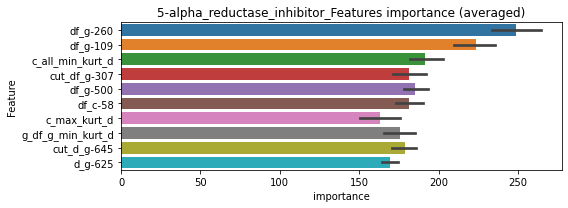

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104359	valid_1's binary_logloss: 0.0148672
[600]	training's binary_logloss: 0.00274473	valid_1's binary_logloss: 0.0052123
[900]	training's binary_logloss: 0.00146041	valid_1's binary_logloss: 0.00326438
[1200]	training's binary_logloss: 0.000997989	valid_1's binary_logloss: 0.00249999
[1500]	training's binary_logloss: 0.000768247	valid_1's binary_logloss: 0.00208229
[1800]	training's binary_logloss: 0.000634737	valid_1's binary_logloss: 0.00183494
[2100]	training's binary_logloss: 0.000547435	valid_1's binary_logloss: 0.00166442
[2400]	training's binary_logloss: 0.000484907	valid_1's binary_logloss: 0.00154624
[2700]	training's binary_logloss: 0.000440545	valid_1's binary_logloss: 0.00145836
[3000]	training's binary_logloss: 0.000409037	valid_1's binary_logloss: 0.00139681
[3300]	training's binary_logloss: 0.000387025	valid_1's binary_logloss: 0.0013526
[3600]	training's binary_logloss: 0.

len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105074	valid_1's binary_logloss: 0.0154525
[600]	training's binary_logloss: 0.00278664	valid_1's binary_logloss: 0.00579529
[900]	training's binary_logloss: 0.00148933	valid_1's binary_logloss: 0.00379727
[1200]	training's binary_logloss: 0.00101649	valid_1's binary_logloss: 0.00295613
[1500]	training's binary_logloss: 0.000782031	valid_1's binary_logloss: 0.00251055
[1800]	training's binary_logloss: 0.000645789	valid_1's binary_logloss: 0.00223434
[2100]	training's binary_logloss: 0.000557578	valid_1's binary_logloss: 0.00204305
[2400]	training's binary_logloss: 0.000494442	valid_1's binary_logloss: 0.00190187
[2700]	training's binary_logloss: 0.000449275	valid_1's binary_logloss: 0.00179989
[3000]	training's binary_logloss: 0.000417397	valid_1's binary_logloss: 0.00173485
[3300]	training's binary_logloss: 0.000393876	valid_1's binary_logloss: 0.00168819
Early stopping, best iteration is:


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106381	valid_1's binary_logloss: 0.0145361
[600]	training's binary_logloss: 0.00280292	valid_1's binary_logloss: 0.00485669
[900]	training's binary_logloss: 0.00149816	valid_1's binary_logloss: 0.00302319
[1200]	training's binary_logloss: 0.00102239	valid_1's binary_logloss: 0.00226562
[1500]	training's binary_logloss: 0.000785743	valid_1's binary_logloss: 0.00184356
[1800]	training's binary_logloss: 0.000646986	valid_1's binary_logloss: 0.00160109
[2100]	training's binary_logloss: 0.000556071	valid_1's binary_logloss: 0.00143762
[2400]	training's binary_logloss: 0.000493701	valid_1's binary_logloss: 0.00131517
[2700]	training's binary_logloss: 0.000448879	valid_1's binary_logloss: 0.00122286
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.000421793	valid_1's binary_logloss: 0.00116627


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104156	valid_1's binary_logloss: 0.0166887
[600]	training's binary_logloss: 0.00273532	valid_1's binary_logloss: 0.00726433
[900]	training's binary_logloss: 0.00146446	valid_1's binary_logloss: 0.00528218
[1200]	training's binary_logloss: 0.00100366	valid_1's binary_logloss: 0.00446597
[1500]	training's binary_logloss: 0.000775715	valid_1's binary_logloss: 0.00399557
[1800]	training's binary_logloss: 0.000639726	valid_1's binary_logloss: 0.00373297
[2100]	training's binary_logloss: 0.000551534	valid_1's binary_logloss: 0.00354125
[2400]	training's binary_logloss: 0.000489776	valid_1's binary_logloss: 0.00342394
[2700]	training's binary_logloss: 0.000445749	valid_1's binary_logloss: 0.00333128
[3000]	training's binary_logloss: 0.000413184	valid_1's binary_logloss: 0.00326221
Early stopping, best iteration is:
[3048]	training's binary_logloss: 0.00040861	valid_1's binary_logloss: 0.00325331


5-alpha_reductase_inhibitor logloss: 0.001851722151006764


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463633	valid_1's binary_logloss: 0.00829522
[600]	training's binary_logloss: 0.000599294	valid_1's binary_logloss: 0.00174465
[900]	training's binary_logloss: 0.000359377	valid_1's binary_logloss: 0.00123781
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000356992	valid_1's binary_logloss: 0.00123399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453098	valid_1's binary_logloss: 0.00818893
[600]	training's binary_logloss: 0.000586753	valid_1's binary_logloss: 0.00172598
[900]	training's binary_logloss: 0.000361019	valid_1's binary_logloss: 0.00123274
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000355428	valid_1's binary_logloss: 0.00122511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045667	valid_1's binary_logloss: 0.00794954
[600]	trainin

1 / 3 AUC score:1.000
y_Threshold: 0.0019129, Threshold: 0.0052892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00370, conf_1:0.00688
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0052892
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0252892
threshold: 0.0252892, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00422366	valid_1's binary_logloss: 0.0069732
[600]	training's binary_logloss: 0.000559952	valid_1's binary_logloss: 0.00134924
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000346137	valid_1's binary_logloss: 0.000945955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413469	valid_1's binary_logloss: 0.0069468
[600]	training's binary_logloss: 0.000543684	valid_1's binary_logloss: 0.00158139
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00034873	valid_1's binary_logloss: 0.00122428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427117	valid_1's binary_logloss: 0.00711862
[600]	training's binary_logloss: 0.000563121	valid_1's binary_logloss: 0.0022042
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000381522	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0549444, Threshold: 0.0252892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00076, Num_p_label: 15.0, conf_0:0.02023, conf_1:0.03035
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0252892
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0452892
threshold: 0.0452892, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00422366	valid_1's binary_logloss: 0.0069732
[600]	training's binary_logloss: 0.000559952	valid_1's binary_logloss: 0.00134924
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000346137	valid_1's binary_logloss: 0.000945955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413469	valid_1's binary_logloss: 0.0069468
[600]	training's binary_logloss: 0.000543684	valid_1's binary_logloss: 0.00158139
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00034873	valid_1's binary_logloss: 0.00122428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427117	valid_1's binary_logloss: 0.00711862
[600]	training's binary_logloss: 0.000563121	valid_1's binary_logloss: 0.0022042
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000381522	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0549444, Threshold: 0.0452892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.04076, conf_1:0.04982
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0452892
threshold: 0.0452892, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


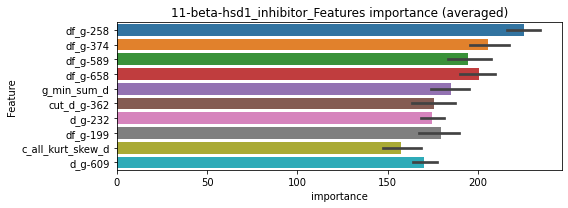

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111494	valid_1's binary_logloss: 0.0155215
[600]	training's binary_logloss: 0.00288283	valid_1's binary_logloss: 0.00501985
[900]	training's binary_logloss: 0.00152687	valid_1's binary_logloss: 0.00302689
[1200]	training's binary_logloss: 0.00104621	valid_1's binary_logloss: 0.00227633
[1500]	training's binary_logloss: 0.000803247	valid_1's binary_logloss: 0.001866
[1800]	training's binary_logloss: 0.000661072	valid_1's binary_logloss: 0.0016138
[2100]	training's binary_logloss: 0.00056872	valid_1's binary_logloss: 0.00144887
[2400]	training's binary_logloss: 0.000503498	valid_1's binary_logloss: 0.00131914
[2700]	training's binary_logloss: 0.000456339	valid_1's binary_logloss: 0.0012298
[3000]	training's binary_logloss: 0.000421757	valid_1's binary_logloss: 0.00116762
[3300]	training's binary_logloss: 0.000396104	valid_1's binary_logloss: 0.00111473
[3600]	training's binary_logloss: 0.0003

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111104	valid_1's binary_logloss: 0.0154761
[600]	training's binary_logloss: 0.00287519	valid_1's binary_logloss: 0.00513154
[900]	training's binary_logloss: 0.00152769	valid_1's binary_logloss: 0.00311475
[1200]	training's binary_logloss: 0.00103966	valid_1's binary_logloss: 0.002305
[1500]	training's binary_logloss: 0.000801372	valid_1's binary_logloss: 0.00189578
[1800]	training's binary_logloss: 0.00066062	valid_1's binary_logloss: 0.00164612
[2100]	training's binary_logloss: 0.000568964	valid_1's binary_logloss: 0.00146476
[2400]	training's binary_logloss: 0.000504562	valid_1's binary_logloss: 0.00134255
[2700]	training's binary_logloss: 0.000456739	valid_1's binary_logloss: 0.0012524
[3000]	training's binary_logloss: 0.000421886	valid_1's binary_logloss: 0.00117933
[3300]	training's binary_logloss: 0.000396634	valid_1's binary_logloss: 0.0011256
[3600]	training's binary_logloss: 0.0003

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113126	valid_1's binary_logloss: 0.0144601
[600]	training's binary_logloss: 0.00294266	valid_1's binary_logloss: 0.00513189
[900]	training's binary_logloss: 0.0015556	valid_1's binary_logloss: 0.00342047
[1200]	training's binary_logloss: 0.00106027	valid_1's binary_logloss: 0.00280197
[1500]	training's binary_logloss: 0.000814658	valid_1's binary_logloss: 0.00247684
[1800]	training's binary_logloss: 0.00066897	valid_1's binary_logloss: 0.00229971
[2100]	training's binary_logloss: 0.000576248	valid_1's binary_logloss: 0.00217537
[2400]	training's binary_logloss: 0.000510019	valid_1's binary_logloss: 0.00206534
[2700]	training's binary_logloss: 0.000462745	valid_1's binary_logloss: 0.00200829
Early stopping, best iteration is:
[2947]	training's binary_logloss: 0.000432537	valid_1's binary_logloss: 0.00196214


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011257	valid_1's binary_logloss: 0.0150541
[600]	training's binary_logloss: 0.00289696	valid_1's binary_logloss: 0.0044598
[900]	training's binary_logloss: 0.0015345	valid_1's binary_logloss: 0.00257178
[1200]	training's binary_logloss: 0.00104578	valid_1's binary_logloss: 0.00184508
[1500]	training's binary_logloss: 0.000805772	valid_1's binary_logloss: 0.00147774
[1800]	training's binary_logloss: 0.000663791	valid_1's binary_logloss: 0.00125764
[2100]	training's binary_logloss: 0.000571035	valid_1's binary_logloss: 0.00110885
[2400]	training's binary_logloss: 0.000506455	valid_1's binary_logloss: 0.00100379
[2700]	training's binary_logloss: 0.000459337	valid_1's binary_logloss: 0.000924477
[3000]	training's binary_logloss: 0.000424705	valid_1's binary_logloss: 0.000867996
[3300]	training's binary_logloss: 0.000399758	valid_1's binary_logloss: 0.000825909
[3600]	training's binary_logloss: 0

11-beta-hsd1_inhibitor logloss: 0.0012021436683809614


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577179	valid_1's binary_logloss: 0.0157275
[600]	training's binary_logloss: 0.000764964	valid_1's binary_logloss: 0.00703929
[900]	training's binary_logloss: 0.000406285	valid_1's binary_logloss: 0.00610161
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000401365	valid_1's binary_logloss: 0.00607911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597054	valid_1's binary_logloss: 0.0137233
[600]	training's binary_logloss: 0.000796567	valid_1's binary_logloss: 0.00600276
[900]	training's binary_logloss: 0.000412282	valid_1's binary_logloss: 0.00539036
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000423943	valid_1's binary_logloss: 0.00537195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615234	valid_1's binary_logloss: 0.00940573
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0022713, Threshold: 0.0063354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00443, conf_1:0.00824
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0063354
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.0263354
threshold: 0.0263354, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538581	valid_1's binary_logloss: 0.0149772
[600]	training's binary_logloss: 0.000731235	valid_1's binary_logloss: 0.0069233
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000413772	valid_1's binary_logloss: 0.00608044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057559	valid_1's binary_logloss: 0.0111804
[600]	training's binary_logloss: 0.000766081	valid_1's binary_logloss: 0.00394497
[900]	training's binary_logloss: 0.000406773	valid_1's binary_logloss: 0.00337008
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000411649	valid_1's binary_logloss: 0.00335388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005748	valid_1's binary_logloss: 0.00946567
[600]	training's binary_logloss: 0.000777353	valid_1's binary_logloss: 0.00269049
[900]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0113186, Threshold: 0.0263354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0052737 Vs.target_rate: 0.00101, Num_p_label: 21.0, conf_0:0.02107, conf_1:0.03160
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_1: 0.0263354
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_2: 0.0463354
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.0663354
threshold: 0.0663354, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538581	valid_1's binary_logloss: 0.0149772
[600]	training's binary_logloss: 0.000731235	valid_1's binary_logloss: 0.0069233
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000413772	valid_1's binary_logloss: 0.00608044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057559	valid_1's binary_logloss: 0.0111804
[600]	training's binary_logloss: 0.000766081	valid_1's binary_logloss: 0.00394497
[900]	training's binary_logloss: 0.000406773	valid_1's binary_logloss: 0.00337008
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000411649	valid_1's binary_logloss: 0.00335388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005748	valid_1's binary_logloss: 0.00946567
[600]	training's binary_logloss: 0.000777353	valid_1's binary_logloss: 0.00269049
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0113186, Threshold: 0.0663354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00101, Num_p_label: 8.0, conf_0:0.05970, conf_1:0.07297
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0663354
threshold: 0.0663354, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


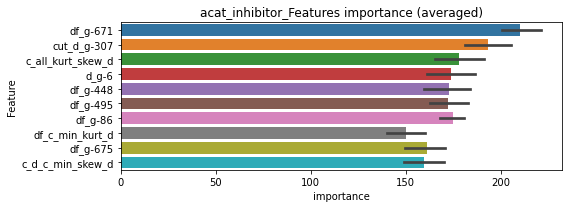

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141317	valid_1's binary_logloss: 0.0242221
[600]	training's binary_logloss: 0.00374548	valid_1's binary_logloss: 0.0111149
[900]	training's binary_logloss: 0.00196073	valid_1's binary_logloss: 0.00848102
[1200]	training's binary_logloss: 0.00132445	valid_1's binary_logloss: 0.00739296
[1500]	training's binary_logloss: 0.00101053	valid_1's binary_logloss: 0.00678358
[1800]	training's binary_logloss: 0.000824279	valid_1's binary_logloss: 0.00639199
[2100]	training's binary_logloss: 0.000705225	valid_1's binary_logloss: 0.00610164
[2400]	training's binary_logloss: 0.000621661	valid_1's binary_logloss: 0.00589712
[2700]	training's binary_logloss: 0.000560108	valid_1's binary_logloss: 0.00572518
Early stopping, best iteration is:
[2694]	training's binary_logloss: 0.000561041	valid_1's binary_logloss: 0.00572404


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144802	valid_1's binary_logloss: 0.0207657
[600]	training's binary_logloss: 0.00386122	valid_1's binary_logloss: 0.0082412
[900]	training's binary_logloss: 0.00200549	valid_1's binary_logloss: 0.00581034
[1200]	training's binary_logloss: 0.00135171	valid_1's binary_logloss: 0.00485416
[1500]	training's binary_logloss: 0.0010288	valid_1's binary_logloss: 0.00439459
[1800]	training's binary_logloss: 0.00083919	valid_1's binary_logloss: 0.00407046
[2100]	training's binary_logloss: 0.000716989	valid_1's binary_logloss: 0.00386657
[2400]	training's binary_logloss: 0.000633316	valid_1's binary_logloss: 0.00372076
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.00059939	valid_1's binary_logloss: 0.00365698


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145479	valid_1's binary_logloss: 0.0197154
[600]	training's binary_logloss: 0.00389015	valid_1's binary_logloss: 0.00703648
[900]	training's binary_logloss: 0.00203692	valid_1's binary_logloss: 0.00448397
[1200]	training's binary_logloss: 0.0013693	valid_1's binary_logloss: 0.00346643
[1500]	training's binary_logloss: 0.00103963	valid_1's binary_logloss: 0.002971
[1800]	training's binary_logloss: 0.000848284	valid_1's binary_logloss: 0.00263912
[2100]	training's binary_logloss: 0.000726271	valid_1's binary_logloss: 0.00243394
[2400]	training's binary_logloss: 0.000639489	valid_1's binary_logloss: 0.00227984
[2700]	training's binary_logloss: 0.000575604	valid_1's binary_logloss: 0.00216421
[3000]	training's binary_logloss: 0.000527322	valid_1's binary_logloss: 0.00208613
Early stopping, best iteration is:
[3076]	training's binary_logloss: 0.000516658	valid_1's binary_logloss: 0.00206462


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139523	valid_1's binary_logloss: 0.0259584
[600]	training's binary_logloss: 0.00372019	valid_1's binary_logloss: 0.0131541
[900]	training's binary_logloss: 0.00194741	valid_1's binary_logloss: 0.0103138
[1200]	training's binary_logloss: 0.00131672	valid_1's binary_logloss: 0.00918644
[1500]	training's binary_logloss: 0.00100445	valid_1's binary_logloss: 0.00863149
[1800]	training's binary_logloss: 0.000820611	valid_1's binary_logloss: 0.00820232
[2100]	training's binary_logloss: 0.000700731	valid_1's binary_logloss: 0.00792559
Early stopping, best iteration is:
[2271]	training's binary_logloss: 0.000651497	valid_1's binary_logloss: 0.00782608


acat_inhibitor logloss: 0.004817860223696527


neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261, target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0504388	valid_1's binary_logloss: 0.192643
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.0151321	valid_1's binary_logloss: 0.180476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0506485	valid_1's binary_logloss: 0.16162
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.0134652	valid_1's binary_logloss: 0.140333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0516407	valid_1's binary_logloss: 0.172241
[600]	training's binary_logloss: 0.0115603	valid_1's binary_logloss: 0.152779
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.010349	valid_1's binary_logloss: 0.152302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0511416	valid_1's binary_logloss: 0.167207
[600]	training's binary_loglo

1 / 3 AUC score:0.959
y_Threshold: 0.0464248, Threshold: 0.2886548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 269 → Positive_corect_labels: 583/3644
p_label_rate: 0.0100452 Vs.target_rate: 0.00798, Num_p_label: 40.0, conf_0:0.20206, conf_1:0.37525
threshold: 0.2886548, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 583.0/3644, y_label_rate: 0.1599890
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0323862	valid_1's binary_logloss: 0.142194
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00746258	valid_1's binary_logloss: 0.125127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330693	valid_1's binary_logloss: 0.130029
[600]	training's binary_logloss: 0.00612206	valid_1's binary_logloss: 0.104873
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.0042069	valid_1's binary_logloss: 0.103062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0340884	valid_1's binary_logloss: 0.115297
[600]	training's binary_logloss: 0.00645369	valid_1's binary_logloss: 0.0902492
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00309551	valid_1's binary_logloss: 0.0874212
Training until validation scores don't improve for 30 rounds
[300]	training's bina

2 / 3 AUC score:0.992
y_Threshold: 0.0556694, Threshold: 0.2886548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 552.0/3582
p_label_rate: 0.0190859 Vs.target_rate: 0.00798, Num_p_label: 76.0, conf_0:0.23092, conf_1:0.34639
Num_p_label: 76.0, Expected: 31.8, Adj_threshold_1: 0.2886548
Num_p_label: 71.0, Expected: 31.8, Adj_threshold_2: 0.3086548
Num_p_label: 67.0, Expected: 31.8, Adj_threshold_3: 0.3286548
Num_p_label: 64.0, Expected: 31.8, Adj_threshold_4: 0.3486548
Num_p_label: 58.0, Expected: 31.8, Adj_threshold_5: 0.3686548
Num_p_label: 52.0, Expected: 31.8, Adj_threshold_6: 0.3886548
Num_p_label: 47.0, Expected: 31.8, Adj_threshold_7: 0.4086548
threshold: 0.4086548, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 552.0/3582, y_label_rate: 0.1541039
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0280661	valid_1's binary_logloss: 0.113967
[600]	training's binary_logloss: 0.00497813	valid_1's binary_logloss: 0.0927218
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00471769	valid_1's binary_logloss: 0.0925532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0288886	valid_1's binary_logloss: 0.0940162
[600]	training's binary_logloss: 0.00518223	valid_1's binary_logloss: 0.0696628
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00289138	valid_1's binary_logloss: 0.0664769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285304	valid_1's binary_logloss: 0.108256
[600]	training's binary_logloss: 0.00503857	valid_1's binary_logloss: 0.0869998
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00295313	valid_1's binary_logloss: 0.08489

3 / 3 AUC score:0.996
y_Threshold: 0.0472722, Threshold: 0.4086548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 533.0/3544
p_label_rate: 0.0090407 Vs.target_rate: 0.00798, Num_p_label: 36.0, conf_0:0.36779, conf_1:0.44952
threshold: 0.4086548, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 533.0/3544, y_label_rate: 0.1503950


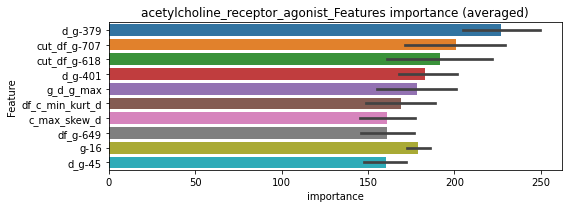

len(train_index) : 2658
len(valid_index) : 886
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0455448	valid_1's binary_logloss: 0.127183
[600]	training's binary_logloss: 0.0151298	valid_1's binary_logloss: 0.095719
[900]	training's binary_logloss: 0.00775392	valid_1's binary_logloss: 0.0863784
[1200]	training's binary_logloss: 0.00492251	valid_1's binary_logloss: 0.0830246
Early stopping, best iteration is:
[1232]	training's binary_logloss: 0.0047337	valid_1's binary_logloss: 0.0826277


len(train_index) : 2658
len(valid_index) : 886
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0471095	valid_1's binary_logloss: 0.107842
[600]	training's binary_logloss: 0.0157248	valid_1's binary_logloss: 0.07834
[900]	training's binary_logloss: 0.0079407	valid_1's binary_logloss: 0.0697932
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00798421	valid_1's binary_logloss: 0.0697717


len(train_index) : 2658
len(valid_index) : 886
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0474595	valid_1's binary_logloss: 0.0989783
[600]	training's binary_logloss: 0.0159672	valid_1's binary_logloss: 0.0683541
[900]	training's binary_logloss: 0.00817515	valid_1's binary_logloss: 0.058495
[1200]	training's binary_logloss: 0.00518126	valid_1's binary_logloss: 0.0549552
[1500]	training's binary_logloss: 0.00373569	valid_1's binary_logloss: 0.0533348
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.00367167	valid_1's binary_logloss: 0.0531739


len(train_index) : 2658
len(valid_index) : 886
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.046515	valid_1's binary_logloss: 0.115418
[600]	training's binary_logloss: 0.0155729	valid_1's binary_logloss: 0.0869584
[900]	training's binary_logloss: 0.00790884	valid_1's binary_logloss: 0.078953
[1200]	training's binary_logloss: 0.00501793	valid_1's binary_logloss: 0.0755865
Early stopping, best iteration is:
[1247]	training's binary_logloss: 0.004738	valid_1's binary_logloss: 0.0751


acetylcholine_receptor_agonist logloss: 0.07016830948913426


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241, target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0824633	valid_1's binary_logloss: 0.277128
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0486555	valid_1's binary_logloss: 0.269131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0819061	valid_1's binary_logloss: 0.294035
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.0487288	valid_1's binary_logloss: 0.29052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0856341	valid_1's binary_logloss: 0.267522
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.0324464	valid_1's binary_logloss: 0.250342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0828121	valid_1's binary_logloss: 0.265733


1 / 3 AUC score:0.865


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0410966	valid_1's binary_logloss: 0.257152


y_Threshold: 0.0934630, Threshold: 0.1915163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 474 → Positive_corect_labels: 476/3415
p_label_rate: 0.0100452 Vs.target_rate: 0.01264, Num_p_label: 40.0, conf_0:0.13406, conf_1:0.24897
threshold: 0.1915163, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 476.0/3415, y_label_rate: 0.1393851
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0370266	valid_1's binary_logloss: 0.160903
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00925379	valid_1's binary_logloss: 0.143621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0381015	valid_1's binary_logloss: 0.151822
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00902593	valid_1's binary_logloss: 0.135828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375602	valid_1's binary_logloss: 0.145826
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0095223	valid_1's binary_logloss: 0.123839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.038515	valid_1's binary_logloss: 0.150733
[600]	training's binary_logloss: 0.00781315	valid_1's binary_logloss: 0.125797
Early stopping, best iter

2 / 3 AUC score:0.981
y_Threshold: 0.0664583, Threshold: 0.1915163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 426.0/3315
p_label_rate: 0.0075339 Vs.target_rate: 0.01264, Num_p_label: 30.0, conf_0:0.15321, conf_1:0.22982
Num_p_label: 30.0, Expected: 50.3, Adj_threshold_1: 0.1915163
Num_p_label: 35.0, Expected: 50.3, Adj_threshold_2: 0.1715163
threshold: 0.1715163, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 426.0/3315, y_label_rate: 0.1285068
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0268222	valid_1's binary_logloss: 0.146308
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00725979	valid_1's binary_logloss: 0.134179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292929	valid_1's binary_logloss: 0.108447
[600]	training's binary_logloss: 0.00563314	valid_1's binary_logloss: 0.0828719
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00602642	valid_1's binary_logloss: 0.0826806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287595	valid_1's binary_logloss: 0.106299
[600]	training's binary_logloss: 0.00556858	valid_1's binary_logloss: 0.0863474
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00482058	valid_1's binary_logloss: 0.0855902
Training until validation scores don't improve for 30 rounds
[300]	training's b

3 / 3 AUC score:0.995
y_Threshold: 0.0554236, Threshold: 0.1715163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 406.0/3275
p_label_rate: 0.0080362 Vs.target_rate: 0.01264, Num_p_label: 32.0, conf_0:0.15436, conf_1:0.18867
Num_p_label: 32.0, Expected: 50.3, Adj_threshold_1: 0.1715163
Num_p_label: 36.0, Expected: 50.3, Adj_threshold_2: 0.1515163
threshold: 0.1515163, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 406.0/3275, y_label_rate: 0.1239695


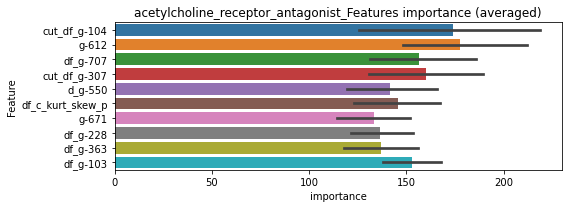

len(train_index) : 2456
len(valid_index) : 819
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472496	valid_1's binary_logloss: 0.126728
[600]	training's binary_logloss: 0.0164739	valid_1's binary_logloss: 0.0986884
[900]	training's binary_logloss: 0.00845447	valid_1's binary_logloss: 0.0911896
Early stopping, best iteration is:
[1157]	training's binary_logloss: 0.0057288	valid_1's binary_logloss: 0.0879831


len(train_index) : 2456
len(valid_index) : 819
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491499	valid_1's binary_logloss: 0.11525
[600]	training's binary_logloss: 0.017169	valid_1's binary_logloss: 0.0846408
[900]	training's binary_logloss: 0.00888681	valid_1's binary_logloss: 0.0746911
[1200]	training's binary_logloss: 0.00570687	valid_1's binary_logloss: 0.0709058
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.0054305	valid_1's binary_logloss: 0.0703001


len(train_index) : 2456
len(valid_index) : 819
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0492942	valid_1's binary_logloss: 0.127496
[600]	training's binary_logloss: 0.0169863	valid_1's binary_logloss: 0.0989962
[900]	training's binary_logloss: 0.00871009	valid_1's binary_logloss: 0.0901641
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.00662112	valid_1's binary_logloss: 0.0880996


len(train_index) : 2457
len(valid_index) : 818
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.049591	valid_1's binary_logloss: 0.120994
[600]	training's binary_logloss: 0.0170582	valid_1's binary_logloss: 0.0905051
[900]	training's binary_logloss: 0.00879907	valid_1's binary_logloss: 0.0827634
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.00713645	valid_1's binary_logloss: 0.0809582


acetylcholine_receptor_antagonist logloss: 0.08183549764518606


neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194689	valid_1's binary_logloss: 0.0768522
[600]	training's binary_logloss: 0.00297196	valid_1's binary_logloss: 0.0524479
[900]	training's binary_logloss: 0.00116862	valid_1's binary_logloss: 0.0488628
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00120431	valid_1's binary_logloss: 0.0487661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218174	valid_1's binary_logloss: 0.059643
[600]	training's binary_logloss: 0.00332919	valid_1's binary_logloss: 0.0333133
[900]	training's binary_logloss: 0.00124456	valid_1's binary_logloss: 0.02941
Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000859457	valid_1's binary_logloss: 0.0283928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227958	valid_1's binary_logloss: 0.0476158
[600]	training's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0106528, Threshold: 0.0418088, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.02927, conf_1:0.05435
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0418088
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.0618088
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_3: 0.0818088
threshold: 0.0818088, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196364	valid_1's binary_logloss: 0.0556453
[600]	training's binary_logloss: 0.00298549	valid_1's binary_logloss: 0.0297378
[900]	training's binary_logloss: 0.00115323	valid_1's binary_logloss: 0.0250162
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000890293	valid_1's binary_logloss: 0.0242932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198553	valid_1's binary_logloss: 0.0460329
[600]	training's binary_logloss: 0.00301685	valid_1's binary_logloss: 0.0233325
[900]	training's binary_logloss: 0.00117161	valid_1's binary_logloss: 0.0180045
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.00108474	valid_1's binary_logloss: 0.0177373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200033	valid_1's binary_logloss: 0.0536265
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0352007, Threshold: 0.0818088, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.06545, conf_1:0.09817
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0818088
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_2: 0.1018088
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.1218088
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_4: 0.1418088
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_5: 0.1618088
threshold: 0.1618088, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180296	valid_1's binary_logloss: 0.0592924
[600]	training's binary_logloss: 0.00274746	valid_1's binary_logloss: 0.0366574
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00156764	valid_1's binary_logloss: 0.034536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017923	valid_1's binary_logloss: 0.0558813
[600]	training's binary_logloss: 0.00269583	valid_1's binary_logloss: 0.0349659
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.00119569	valid_1's binary_logloss: 0.0326199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185662	valid_1's binary_logloss: 0.0452052
[600]	training's binary_logloss: 0.00292226	valid_1's binary_logloss: 0.0190314
[900]	training's binary_logloss: 0.00114866	valid_1's binary_logloss: 0.0151856
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0372002, Threshold: 0.1618088, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0055249 Vs.target_rate: 0.00307, Num_p_label: 22.0, conf_0:0.14563, conf_1:0.17799
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_1: 0.1618088
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.1818088
threshold: 0.1818088, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3777, y_label_rate: 0.1699762


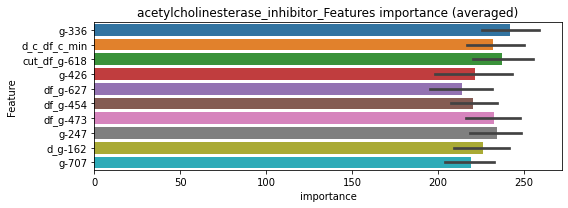

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034362	valid_1's binary_logloss: 0.0743718
[600]	training's binary_logloss: 0.0102214	valid_1's binary_logloss: 0.0457306
[900]	training's binary_logloss: 0.00516115	valid_1's binary_logloss: 0.0382134
[1200]	training's binary_logloss: 0.00332558	valid_1's binary_logloss: 0.0350606
[1500]	training's binary_logloss: 0.00244117	valid_1's binary_logloss: 0.0333289
[1800]	training's binary_logloss: 0.00192411	valid_1's binary_logloss: 0.0323857
Early stopping, best iteration is:
[1817]	training's binary_logloss: 0.0019018	valid_1's binary_logloss: 0.0323583


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343373	valid_1's binary_logloss: 0.0700212
[600]	training's binary_logloss: 0.0102654	valid_1's binary_logloss: 0.0423195
[900]	training's binary_logloss: 0.00512457	valid_1's binary_logloss: 0.0355876
[1200]	training's binary_logloss: 0.00330382	valid_1's binary_logloss: 0.0330796
Early stopping, best iteration is:
[1230]	training's binary_logloss: 0.00318678	valid_1's binary_logloss: 0.0328267


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0355063	valid_1's binary_logloss: 0.0654129
[600]	training's binary_logloss: 0.0106794	valid_1's binary_logloss: 0.0354526
[900]	training's binary_logloss: 0.00535464	valid_1's binary_logloss: 0.0273038
[1200]	training's binary_logloss: 0.0034314	valid_1's binary_logloss: 0.0237672
[1500]	training's binary_logloss: 0.00251278	valid_1's binary_logloss: 0.0222715
[1800]	training's binary_logloss: 0.00197975	valid_1's binary_logloss: 0.0211136
[2100]	training's binary_logloss: 0.00163905	valid_1's binary_logloss: 0.0203143
[2400]	training's binary_logloss: 0.00140768	valid_1's binary_logloss: 0.0197531
Early stopping, best iteration is:
[2466]	training's binary_logloss: 0.00136621	valid_1's binary_logloss: 0.0196456


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0357288	valid_1's binary_logloss: 0.068176
[600]	training's binary_logloss: 0.0107277	valid_1's binary_logloss: 0.0342706
[900]	training's binary_logloss: 0.00536733	valid_1's binary_logloss: 0.0252543
[1200]	training's binary_logloss: 0.00344783	valid_1's binary_logloss: 0.0217327
[1500]	training's binary_logloss: 0.0025155	valid_1's binary_logloss: 0.0199156
[1800]	training's binary_logloss: 0.00198024	valid_1's binary_logloss: 0.0187384
[2100]	training's binary_logloss: 0.00163691	valid_1's binary_logloss: 0.017903
Early stopping, best iteration is:
[2207]	training's binary_logloss: 0.00154501	valid_1's binary_logloss: 0.0177421


acetylcholinesterase_inhibitor logloss: 0.025644944164636866


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132863	valid_1's binary_logloss: 0.0393103
[600]	training's binary_logloss: 0.0018657	valid_1's binary_logloss: 0.0196714
[900]	training's binary_logloss: 0.000794317	valid_1's binary_logloss: 0.0171514
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000727744	valid_1's binary_logloss: 0.0169778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137902	valid_1's binary_logloss: 0.0270943
[600]	training's binary_logloss: 0.00195086	valid_1's binary_logloss: 0.00900252
[900]	training's binary_logloss: 0.00081757	valid_1's binary_logloss: 0.00664181
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000695275	valid_1's binary_logloss: 0.00643206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135582	valid_1's binary_logloss: 0.0338402
[600]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0056853, Threshold: 0.0206652, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.01447, conf_1:0.02686
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0206652
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_2: 0.0406652
Num_p_label: 11.0, Expected: 9.0, Adj_threshold_3: 0.0606652
threshold: 0.0606652, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121985	valid_1's binary_logloss: 0.0386231
[600]	training's binary_logloss: 0.00174533	valid_1's binary_logloss: 0.0196438
[900]	training's binary_logloss: 0.000753558	valid_1's binary_logloss: 0.0169166
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000704344	valid_1's binary_logloss: 0.0166725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014029	valid_1's binary_logloss: 0.0260782
[600]	training's binary_logloss: 0.00193954	valid_1's binary_logloss: 0.00824527
[900]	training's binary_logloss: 0.000811678	valid_1's binary_logloss: 0.00574499
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000690288	valid_1's binary_logloss: 0.00553763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127864	valid_1's binary_logloss: 0.030637
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0366902, Threshold: 0.0606652, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0052737 Vs.target_rate: 0.00227, Num_p_label: 21.0, conf_0:0.04853, conf_1:0.07280
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_1: 0.0606652
threshold: 0.0606652, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122073	valid_1's binary_logloss: 0.0362074
[600]	training's binary_logloss: 0.00170095	valid_1's binary_logloss: 0.0192598
[900]	training's binary_logloss: 0.000738701	valid_1's binary_logloss: 0.0167305
Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.000566966	valid_1's binary_logloss: 0.0161535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135312	valid_1's binary_logloss: 0.0230949
[600]	training's binary_logloss: 0.00189975	valid_1's binary_logloss: 0.00586605
[900]	training's binary_logloss: 0.000802915	valid_1's binary_logloss: 0.00368053
[1200]	training's binary_logloss: 0.000578814	valid_1's binary_logloss: 0.00325435
Early stopping, best iteration is:
[1220]	training's binary_logloss: 0.000575385	valid_1's binary_logloss: 0.00324818
Training until validation scores don't improve for 30 rounds
[300]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0394562, Threshold: 0.0606652, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0052737 Vs.target_rate: 0.00227, Num_p_label: 21.0, conf_0:0.05460, conf_1:0.06673
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_1: 0.0606652
threshold: 0.0606652, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3797, y_label_rate: 0.1719779


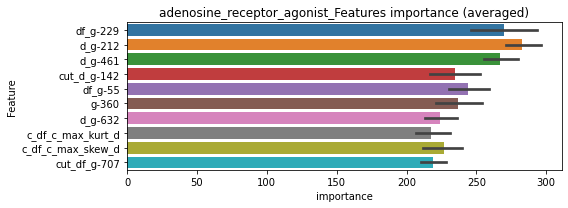

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265352	valid_1's binary_logloss: 0.0498562
[600]	training's binary_logloss: 0.0076273	valid_1's binary_logloss: 0.0272548
[900]	training's binary_logloss: 0.00387287	valid_1's binary_logloss: 0.0216058
[1200]	training's binary_logloss: 0.00252065	valid_1's binary_logloss: 0.0196119
[1500]	training's binary_logloss: 0.00186724	valid_1's binary_logloss: 0.0184019
[1800]	training's binary_logloss: 0.00149278	valid_1's binary_logloss: 0.0175584
Early stopping, best iteration is:
[1798]	training's binary_logloss: 0.00149458	valid_1's binary_logloss: 0.0175532


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278248	valid_1's binary_logloss: 0.0474371
[600]	training's binary_logloss: 0.00783146	valid_1's binary_logloss: 0.0205337
[900]	training's binary_logloss: 0.00393644	valid_1's binary_logloss: 0.0142202
[1200]	training's binary_logloss: 0.0025625	valid_1's binary_logloss: 0.0116414
[1500]	training's binary_logloss: 0.00189622	valid_1's binary_logloss: 0.0101751
[1800]	training's binary_logloss: 0.00150905	valid_1's binary_logloss: 0.00924935
[2100]	training's binary_logloss: 0.00126388	valid_1's binary_logloss: 0.00864153
[2400]	training's binary_logloss: 0.00109232	valid_1's binary_logloss: 0.00813706
[2700]	training's binary_logloss: 0.000969069	valid_1's binary_logloss: 0.00778857
Early stopping, best iteration is:
[2700]	training's binary_logloss: 0.000969069	valid_1's binary_logloss: 0.00778857


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265584	valid_1's binary_logloss: 0.0474141
[600]	training's binary_logloss: 0.00761863	valid_1's binary_logloss: 0.0224595
[900]	training's binary_logloss: 0.00385945	valid_1's binary_logloss: 0.0163682
[1200]	training's binary_logloss: 0.00252193	valid_1's binary_logloss: 0.013746
[1500]	training's binary_logloss: 0.00186761	valid_1's binary_logloss: 0.0123159
[1800]	training's binary_logloss: 0.00149285	valid_1's binary_logloss: 0.0114286
[2100]	training's binary_logloss: 0.00125249	valid_1's binary_logloss: 0.0108555
[2400]	training's binary_logloss: 0.00108507	valid_1's binary_logloss: 0.0104529
[2700]	training's binary_logloss: 0.000963239	valid_1's binary_logloss: 0.0101085
Early stopping, best iteration is:
[2934]	training's binary_logloss: 0.000889834	valid_1's binary_logloss: 0.00989178


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027217	valid_1's binary_logloss: 0.0499309
[600]	training's binary_logloss: 0.00778923	valid_1's binary_logloss: 0.0221077
[900]	training's binary_logloss: 0.00392604	valid_1's binary_logloss: 0.0149679
[1200]	training's binary_logloss: 0.00255166	valid_1's binary_logloss: 0.0121829
[1500]	training's binary_logloss: 0.00188728	valid_1's binary_logloss: 0.0108791
[1800]	training's binary_logloss: 0.00150417	valid_1's binary_logloss: 0.00994951
[2100]	training's binary_logloss: 0.00125979	valid_1's binary_logloss: 0.0093613
[2400]	training's binary_logloss: 0.00109064	valid_1's binary_logloss: 0.00886892
[2700]	training's binary_logloss: 0.00096635	valid_1's binary_logloss: 0.00848664
[3000]	training's binary_logloss: 0.000875759	valid_1's binary_logloss: 0.00827543
[3300]	training's binary_logloss: 0.00080349	valid_1's binary_logloss: 0.00801528
Early stopping, best iteration is:
[3315]	train

adenosine_receptor_agonist logloss: 0.010811803449694766


neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0310952	valid_1's binary_logloss: 0.0889644
[600]	training's binary_logloss: 0.00501451	valid_1's binary_logloss: 0.0574678
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00218292	valid_1's binary_logloss: 0.0523726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0313627	valid_1's binary_logloss: 0.0773493
[600]	training's binary_logloss: 0.00527085	valid_1's binary_logloss: 0.0412744
[900]	training's binary_logloss: 0.00180599	valid_1's binary_logloss: 0.0346477
[1200]	training's binary_logloss: 0.00105736	valid_1's binary_logloss: 0.0331778
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.00107818	valid_1's binary_logloss: 0.0329827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0297944	valid_1's binary_logloss: 0.0898381
[600]	training's binary_logl

1 / 3 AUC score:0.994
y_Threshold: 0.0149726, Threshold: 0.0469728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 640/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.03288, conf_1:0.06106
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0469728
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_2: 0.0669728
threshold: 0.0669728, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251981	valid_1's binary_logloss: 0.0767593
[600]	training's binary_logloss: 0.00393089	valid_1's binary_logloss: 0.0438942
[900]	training's binary_logloss: 0.00144904	valid_1's binary_logloss: 0.0375838
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00153081	valid_1's binary_logloss: 0.0374034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024308	valid_1's binary_logloss: 0.0688513
[600]	training's binary_logloss: 0.00380011	valid_1's binary_logloss: 0.0388438
[900]	training's binary_logloss: 0.00143807	valid_1's binary_logloss: 0.0329531
Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.00100487	valid_1's binary_logloss: 0.0317322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0270002	valid_1's binary_logloss: 0.0682872
[600]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0353885, Threshold: 0.0669728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 635.0/3759
p_label_rate: 0.0110497 Vs.target_rate: 0.00403, Num_p_label: 44.0, conf_0:0.05358, conf_1:0.08037
Num_p_label: 44.0, Expected: 16.1, Adj_threshold_1: 0.0669728
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_2: 0.0869728
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_3: 0.1069728
threshold: 0.1069728, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252305	valid_1's binary_logloss: 0.0755099
[600]	training's binary_logloss: 0.00377745	valid_1's binary_logloss: 0.0441882
[900]	training's binary_logloss: 0.00141848	valid_1's binary_logloss: 0.038619
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.00130222	valid_1's binary_logloss: 0.0381417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251265	valid_1's binary_logloss: 0.0845803
[600]	training's binary_logloss: 0.00378064	valid_1's binary_logloss: 0.0560226
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00186458	valid_1's binary_logloss: 0.0526622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242419	valid_1's binary_logloss: 0.0632645
[600]	training's binary_logloss: 0.00377248	valid_1's binary_logloss: 0.0307514
[900]	training's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0331258, Threshold: 0.1069728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0087896 Vs.target_rate: 0.00403, Num_p_label: 35.0, conf_0:0.09628, conf_1:0.11767
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_1: 0.1069728
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_2: 0.1269728
threshold: 0.1269728, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 629.0/3747, y_label_rate: 0.1678676


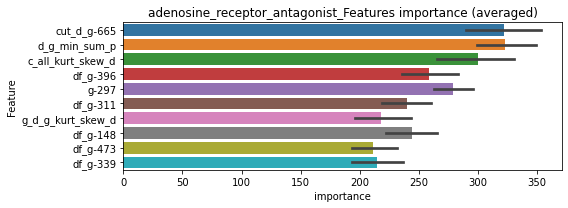

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432829	valid_1's binary_logloss: 0.0888709
[600]	training's binary_logloss: 0.0133003	valid_1's binary_logloss: 0.050584
[900]	training's binary_logloss: 0.00660511	valid_1's binary_logloss: 0.0389388
[1200]	training's binary_logloss: 0.00418247	valid_1's binary_logloss: 0.034126
[1500]	training's binary_logloss: 0.00302582	valid_1's binary_logloss: 0.0319838
[1800]	training's binary_logloss: 0.00236959	valid_1's binary_logloss: 0.030592
[2100]	training's binary_logloss: 0.00195208	valid_1's binary_logloss: 0.0296537
Early stopping, best iteration is:
[2239]	training's binary_logloss: 0.00180721	valid_1's binary_logloss: 0.029196


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0425459	valid_1's binary_logloss: 0.0984258
[600]	training's binary_logloss: 0.0129125	valid_1's binary_logloss: 0.0650312
[900]	training's binary_logloss: 0.00639655	valid_1's binary_logloss: 0.0570447
[1200]	training's binary_logloss: 0.00405592	valid_1's binary_logloss: 0.0540341
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.00372759	valid_1's binary_logloss: 0.0534897


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0428536	valid_1's binary_logloss: 0.0795482
[600]	training's binary_logloss: 0.0131869	valid_1's binary_logloss: 0.0444956
[900]	training's binary_logloss: 0.00659694	valid_1's binary_logloss: 0.0347288
[1200]	training's binary_logloss: 0.0041898	valid_1's binary_logloss: 0.0308503
[1500]	training's binary_logloss: 0.00302699	valid_1's binary_logloss: 0.0289791
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.00267709	valid_1's binary_logloss: 0.0282399


len(train_index) : 2811
len(valid_index) : 936
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0430282	valid_1's binary_logloss: 0.0776284
[600]	training's binary_logloss: 0.0131433	valid_1's binary_logloss: 0.0401285
[900]	training's binary_logloss: 0.00659228	valid_1's binary_logloss: 0.029729
[1200]	training's binary_logloss: 0.00420634	valid_1's binary_logloss: 0.0255553
[1500]	training's binary_logloss: 0.00304	valid_1's binary_logloss: 0.0230329
[1800]	training's binary_logloss: 0.00237758	valid_1's binary_logloss: 0.0214632
[2100]	training's binary_logloss: 0.00195841	valid_1's binary_logloss: 0.0203527
[2400]	training's binary_logloss: 0.00167098	valid_1's binary_logloss: 0.0194536
Early stopping, best iteration is:
[2465]	training's binary_logloss: 0.00161939	valid_1's binary_logloss: 0.0192862


adenosine_receptor_antagonist logloss: 0.032556502958259265


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478121	valid_1's binary_logloss: 0.0067631
[600]	training's binary_logloss: 0.000621501	valid_1's binary_logloss: 0.00116143
[900]	training's binary_logloss: 0.000368446	valid_1's binary_logloss: 0.000754164
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000365193	valid_1's binary_logloss: 0.000748386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473646	valid_1's binary_logloss: 0.00962344
[600]	training's binary_logloss: 0.000608556	valid_1's binary_logloss: 0.00245825
[900]	training's binary_logloss: 0.000368564	valid_1's binary_logloss: 0.00183791
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000365604	valid_1's binary_logloss: 0.0018273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466256	valid_1's binary_logloss: 0.00809165
[600]	traini

1 / 3 AUC score:1.000
y_Threshold: 0.0019339, Threshold: 0.0107034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00749, conf_1:0.01391
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0107034
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0307034
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0507034
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.0707034
threshold: 0.0707034, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421779	valid_1's binary_logloss: 0.00592005
[600]	training's binary_logloss: 0.000565534	valid_1's binary_logloss: 0.00100289
[900]	training's binary_logloss: 0.000346679	valid_1's binary_logloss: 0.000654763
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000341501	valid_1's binary_logloss: 0.000646857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421179	valid_1's binary_logloss: 0.00777868
[600]	training's binary_logloss: 0.000560787	valid_1's binary_logloss: 0.00166024
[900]	training's binary_logloss: 0.000351034	valid_1's binary_logloss: 0.00121808
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000348303	valid_1's binary_logloss: 0.00121378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439796	valid_1's binary_logloss: 0.00622183
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.1598742, Threshold: 0.0707034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0105475 Vs.target_rate: 0.00076, Num_p_label: 42.0, conf_0:0.05656, conf_1:0.08484
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_1: 0.0707034
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_2: 0.0907034
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_3: 0.1107034
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.1307034
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_5: 0.1507034
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.1707034
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_7: 0.1907034
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_8: 0.2107034
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_9: 0.2307034
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_10: 0.2507034
threshold: 0.2707034, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421779	valid_1's binary_logloss: 0.00592005
[600]	training's binary_logloss: 0.000565534	valid_1's binary_logloss: 0.00100289
[900]	training's binary_logloss: 0.000346679	valid_1's binary_logloss: 0.000654763
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000341501	valid_1's binary_logloss: 0.000646857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421179	valid_1's binary_logloss: 0.00777868
[600]	training's binary_logloss: 0.000560787	valid_1's binary_logloss: 0.00166024
[900]	training's binary_logloss: 0.000351034	valid_1's binary_logloss: 0.00121808
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000348303	valid_1's binary_logloss: 0.00121378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439796	valid_1's binary_logloss: 0.00622183
[600]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.1598742, Threshold: 0.2707034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00076, Num_p_label: 11.0, conf_0:0.24363, conf_1:0.29777
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.2707034
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.2907034
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.3107034
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.3307034
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.3507034
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.3707034
threshold: 0.3707034, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


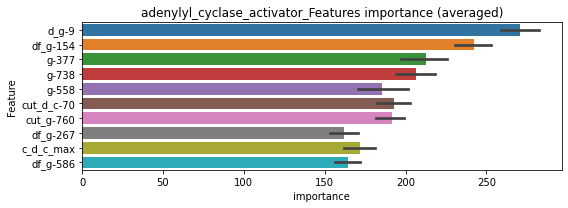

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115913	valid_1's binary_logloss: 0.0140723
[600]	training's binary_logloss: 0.00302677	valid_1's binary_logloss: 0.00411575
[900]	training's binary_logloss: 0.00159169	valid_1's binary_logloss: 0.00231209
[1200]	training's binary_logloss: 0.00107986	valid_1's binary_logloss: 0.00163504
[1500]	training's binary_logloss: 0.000830083	valid_1's binary_logloss: 0.00129784
[1800]	training's binary_logloss: 0.000683943	valid_1's binary_logloss: 0.00109286
[2100]	training's binary_logloss: 0.000588147	valid_1's binary_logloss: 0.000956427
[2400]	training's binary_logloss: 0.000522217	valid_1's binary_logloss: 0.000861178
[2700]	training's binary_logloss: 0.000473749	valid_1's binary_logloss: 0.00079095
[3000]	training's binary_logloss: 0.000437481	valid_1's binary_logloss: 0.0007373
[3300]	training's binary_logloss: 0.000410235	valid_1's binary_logloss: 0.000697161
[3600]	training's binary_logloss:

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01141	valid_1's binary_logloss: 0.0165439
[600]	training's binary_logloss: 0.00295863	valid_1's binary_logloss: 0.00548537
[900]	training's binary_logloss: 0.00156059	valid_1's binary_logloss: 0.00332127
[1200]	training's binary_logloss: 0.00106646	valid_1's binary_logloss: 0.00247719
[1500]	training's binary_logloss: 0.00082127	valid_1's binary_logloss: 0.00204304
[1800]	training's binary_logloss: 0.000676481	valid_1's binary_logloss: 0.0017729
[2100]	training's binary_logloss: 0.000582532	valid_1's binary_logloss: 0.00159814
[2400]	training's binary_logloss: 0.000516946	valid_1's binary_logloss: 0.00146423
[2700]	training's binary_logloss: 0.00046874	valid_1's binary_logloss: 0.00136905
[3000]	training's binary_logloss: 0.000433431	valid_1's binary_logloss: 0.00129758
[3300]	training's binary_logloss: 0.000407324	valid_1's binary_logloss: 0.00124552
[3600]	training's binary_logloss: 0.0003

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01158	valid_1's binary_logloss: 0.0148294
[600]	training's binary_logloss: 0.00301241	valid_1's binary_logloss: 0.00461916
[900]	training's binary_logloss: 0.00158768	valid_1's binary_logloss: 0.00280019
[1200]	training's binary_logloss: 0.00108253	valid_1's binary_logloss: 0.00211959
[1500]	training's binary_logloss: 0.000833194	valid_1's binary_logloss: 0.00178337
[1800]	training's binary_logloss: 0.000683669	valid_1's binary_logloss: 0.00155954
[2100]	training's binary_logloss: 0.000588221	valid_1's binary_logloss: 0.00142686
[2400]	training's binary_logloss: 0.000522436	valid_1's binary_logloss: 0.00134162
[2700]	training's binary_logloss: 0.00047383	valid_1's binary_logloss: 0.00127024
Early stopping, best iteration is:
[2933]	training's binary_logloss: 0.000445051	valid_1's binary_logloss: 0.00122399


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117189	valid_1's binary_logloss: 0.0163266
[600]	training's binary_logloss: 0.00302386	valid_1's binary_logloss: 0.0051864
[900]	training's binary_logloss: 0.00158455	valid_1's binary_logloss: 0.00308852
[1200]	training's binary_logloss: 0.00108022	valid_1's binary_logloss: 0.00229976
[1500]	training's binary_logloss: 0.000830248	valid_1's binary_logloss: 0.00189127
[1800]	training's binary_logloss: 0.000683238	valid_1's binary_logloss: 0.00164571
[2100]	training's binary_logloss: 0.000587824	valid_1's binary_logloss: 0.00147417
[2400]	training's binary_logloss: 0.000520909	valid_1's binary_logloss: 0.00135271
[2700]	training's binary_logloss: 0.000472585	valid_1's binary_logloss: 0.00126342
[3000]	training's binary_logloss: 0.000437009	valid_1's binary_logloss: 0.00119595
[3300]	training's binary_logloss: 0.000409124	valid_1's binary_logloss: 0.00114237
[3600]	training's binary_logloss: 0.

adenylyl_cyclase_activator logloss: 0.0010139461676323108


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254, target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0742268	valid_1's binary_logloss: 0.252438
[600]	training's binary_logloss: 0.0198146	valid_1's binary_logloss: 0.234461
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.0222617	valid_1's binary_logloss: 0.233907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.074701	valid_1's binary_logloss: 0.262421
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.0374141	valid_1's binary_logloss: 0.252518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.073631	valid_1's binary_logloss: 0.234643
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.031687	valid_1's binary_logloss: 0.221942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0775335	valid_1's binary_logloss: 0.245163
Early stopping, best iteration

1 / 3 AUC score:0.903
y_Threshold: 0.0839597, Threshold: 0.5158374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 413 → Positive_corect_labels: 509/3491
p_label_rate: 0.0100452 Vs.target_rate: 0.01134, Num_p_label: 40.0, conf_0:0.36109, conf_1:0.67059
threshold: 0.5158374, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 509.0/3491, y_label_rate: 0.1458035
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0388774	valid_1's binary_logloss: 0.146847
[600]	training's binary_logloss: 0.00811827	valid_1's binary_logloss: 0.123749
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00502478	valid_1's binary_logloss: 0.119655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0403658	valid_1's binary_logloss: 0.146703
[600]	training's binary_logloss: 0.00844968	valid_1's binary_logloss: 0.124259
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00929716	valid_1's binary_logloss: 0.123903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0391899	valid_1's binary_logloss: 0.146246
[600]	training's binary_logloss: 0.00822978	valid_1's binary_logloss: 0.118673
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00579937	valid_1's binary_logloss: 0.116655
Trai

2 / 3 AUC score:0.984
y_Threshold: 0.0774062, Threshold: 0.5158374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 457.0/3387
p_label_rate: 0.0346560 Vs.target_rate: 0.01134, Num_p_label: 138.0, conf_0:0.41267, conf_1:0.61900
Num_p_label: 138.0, Expected: 45.1, Adj_threshold_1: 0.5158374
Num_p_label: 135.0, Expected: 45.1, Adj_threshold_2: 0.5358374
Num_p_label: 125.0, Expected: 45.1, Adj_threshold_3: 0.5558374
Num_p_label: 120.0, Expected: 45.1, Adj_threshold_4: 0.5758374
Num_p_label: 114.0, Expected: 45.1, Adj_threshold_5: 0.5958374
Num_p_label: 108.0, Expected: 45.1, Adj_threshold_6: 0.6158374
Num_p_label: 97.0, Expected: 45.1, Adj_threshold_7: 0.6358374
Num_p_label: 93.0, Expected: 45.1, Adj_threshold_8: 0.6558374
Num_p_label: 87.0, Expected: 45.1, Adj_threshold_9: 0.6758374
Num_p_label: 80.0, Expected: 45.1, Adj_threshold_10: 0.6958374
threshold: 0.7158374, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 457.0/3387, y_label_rate: 0

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028089	valid_1's binary_logloss: 0.125377
[600]	training's binary_logloss: 0.00529869	valid_1's binary_logloss: 0.106452
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00306596	valid_1's binary_logloss: 0.103346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287973	valid_1's binary_logloss: 0.122991
[600]	training's binary_logloss: 0.00523027	valid_1's binary_logloss: 0.100315
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00534536	valid_1's binary_logloss: 0.100173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285297	valid_1's binary_logloss: 0.102526
[600]	training's binary_logloss: 0.00541174	valid_1's binary_logloss: 0.0751942
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00228339	valid_1's binary_logloss: 0.0690713
Tra

3 / 3 AUC score:0.992
y_Threshold: 0.0727968, Threshold: 0.7158374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 424.0/3321
p_label_rate: 0.0452034 Vs.target_rate: 0.01134, Num_p_label: 180.0, conf_0:0.50000, conf_1:0.78742
Num_p_label: 180.0, Expected: 45.1, Adj_threshold_1: 0.7158374
Num_p_label: 177.0, Expected: 45.1, Adj_threshold_2: 0.7358374
Num_p_label: 176.0, Expected: 45.1, Adj_threshold_3: 0.7558374
Num_p_label: 175.0, Expected: 45.1, Adj_threshold_4: 0.7758374
Num_p_label: 170.0, Expected: 45.1, Adj_threshold_5: 0.7958374
threshold: 0.7958374, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 424.0/3321, y_label_rate: 0.1276724


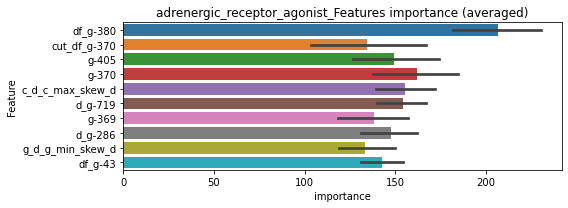

len(train_index) : 2490
len(valid_index) : 831
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0433487	valid_1's binary_logloss: 0.123595
[600]	training's binary_logloss: 0.0144967	valid_1's binary_logloss: 0.0969622
[900]	training's binary_logloss: 0.00743113	valid_1's binary_logloss: 0.0893786
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00741494	valid_1's binary_logloss: 0.0893607


len(train_index) : 2491
len(valid_index) : 830
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0448385	valid_1's binary_logloss: 0.107141
[600]	training's binary_logloss: 0.0150474	valid_1's binary_logloss: 0.0720921
[900]	training's binary_logloss: 0.00780739	valid_1's binary_logloss: 0.0614141
[1200]	training's binary_logloss: 0.00497458	valid_1's binary_logloss: 0.0564583
[1500]	training's binary_logloss: 0.00362082	valid_1's binary_logloss: 0.05377
Early stopping, best iteration is:
[1519]	training's binary_logloss: 0.00355739	valid_1's binary_logloss: 0.0535379


len(train_index) : 2491
len(valid_index) : 830
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0446024	valid_1's binary_logloss: 0.115626
[600]	training's binary_logloss: 0.0148925	valid_1's binary_logloss: 0.0803057
[900]	training's binary_logloss: 0.00766098	valid_1's binary_logloss: 0.0698194
[1200]	training's binary_logloss: 0.00489717	valid_1's binary_logloss: 0.0660584
[1500]	training's binary_logloss: 0.00354821	valid_1's binary_logloss: 0.0632123
Early stopping, best iteration is:
[1605]	training's binary_logloss: 0.00323849	valid_1's binary_logloss: 0.0626534


len(train_index) : 2491
len(valid_index) : 830
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0438586	valid_1's binary_logloss: 0.123999
[600]	training's binary_logloss: 0.0147069	valid_1's binary_logloss: 0.0969617
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.0107634	valid_1's binary_logloss: 0.0927197


adrenergic_receptor_agonist logloss: 0.07457237553899031


neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240, target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0932927	valid_1's binary_logloss: 0.325405
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.0810992	valid_1's binary_logloss: 0.324052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0924916	valid_1's binary_logloss: 0.306244
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.0461765	valid_1's binary_logloss: 0.296521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0903458	valid_1's binary_logloss: 0.28972
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.0629053	valid_1's binary_logloss: 0.280926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0945719	valid_1's binary_logloss: 0.293053


1 / 3 AUC score:0.840


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0627753	valid_1's binary_logloss: 0.286956


y_Threshold: 0.1189160, Threshold: 0.7581869, pos_neg_ratio: 0.8000000
Remove_noisy_data: 546 → Positive_corect_labels: 440/3342
p_label_rate: 0.0100452 Vs.target_rate: 0.01512, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.7581869
Num_p_label: 46.0, Expected: 60.2, Adj_threshold_2: 0.7381869
threshold: 0.7381869, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 440.0/3342, y_label_rate: 0.1316577
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0357858	valid_1's binary_logloss: 0.17121
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.0165999	valid_1's binary_logloss: 0.161559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363598	valid_1's binary_logloss: 0.16653
[600]	training's binary_logloss: 0.00726659	valid_1's binary_logloss: 0.144404
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00457329	valid_1's binary_logloss: 0.142239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0401816	valid_1's binary_logloss: 0.125454
[600]	training's binary_logloss: 0.0083987	valid_1's binary_logloss: 0.101864
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00431709	valid_1's binary_logloss: 0.0991433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

2 / 3 AUC score:0.980
y_Threshold: 0.0732066, Threshold: 0.7381869, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 382.0/3226
p_label_rate: 0.0359116 Vs.target_rate: 0.01512, Num_p_label: 143.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 143.0, Expected: 60.2, Adj_threshold_1: 0.7381869
Num_p_label: 138.0, Expected: 60.2, Adj_threshold_2: 0.7581869
Num_p_label: 133.0, Expected: 60.2, Adj_threshold_3: 0.7781869
Num_p_label: 127.0, Expected: 60.2, Adj_threshold_4: 0.7981869
threshold: 0.7981869, positive_p_label: 127.0/3982, p_label_rate: 0.0318935
positive_y_label: 382.0/3226, y_label_rate: 0.1184129
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260745	valid_1's binary_logloss: 0.120919
[600]	training's binary_logloss: 0.00504507	valid_1's binary_logloss: 0.102375
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00364423	valid_1's binary_logloss: 0.101384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255309	valid_1's binary_logloss: 0.108544
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0102266	valid_1's binary_logloss: 0.0986484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252689	valid_1's binary_logloss: 0.126801
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0149035	valid_1's binary_logloss: 0.120655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258579	valid_1's binary_logloss: 0.10799
[600]	training's binary_l

3 / 3 AUC score:0.990
y_Threshold: 0.0667123, Threshold: 0.7981869, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 353.0/3168
p_label_rate: 0.0449523 Vs.target_rate: 0.01512, Num_p_label: 179.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 179.0, Expected: 60.2, Adj_threshold_1: 0.7981869
threshold: 0.7981869, positive_p_label: 179.0/3982, p_label_rate: 0.0449523
positive_y_label: 353.0/3168, y_label_rate: 0.1114268


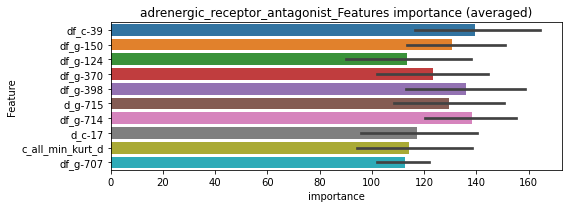

len(train_index) : 2376
len(valid_index) : 792
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0413067	valid_1's binary_logloss: 0.113713
[600]	training's binary_logloss: 0.014191	valid_1's binary_logloss: 0.0911558
[900]	training's binary_logloss: 0.00745426	valid_1's binary_logloss: 0.0856554
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00786064	valid_1's binary_logloss: 0.085522


len(train_index) : 2376
len(valid_index) : 792
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.039457	valid_1's binary_logloss: 0.120552
[600]	training's binary_logloss: 0.0135571	valid_1's binary_logloss: 0.100835
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00872482	valid_1's binary_logloss: 0.0978904


len(train_index) : 2376
len(valid_index) : 792
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040598	valid_1's binary_logloss: 0.120727
[600]	training's binary_logloss: 0.0142453	valid_1's binary_logloss: 0.102129
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00898154	valid_1's binary_logloss: 0.0988904


len(train_index) : 2376
len(valid_index) : 792
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407953	valid_1's binary_logloss: 0.112828
[600]	training's binary_logloss: 0.0141611	valid_1's binary_logloss: 0.0934213
[900]	training's binary_logloss: 0.00741494	valid_1's binary_logloss: 0.0877655
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.0068077	valid_1's binary_logloss: 0.0871449


adrenergic_receptor_antagonist logloss: 0.09236192890736532


neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284, target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179322	valid_1's binary_logloss: 0.0740098
[600]	training's binary_logloss: 0.0026406	valid_1's binary_logloss: 0.0488441
[900]	training's binary_logloss: 0.00106138	valid_1's binary_logloss: 0.0442898
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.00103523	valid_1's binary_logloss: 0.0442125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184415	valid_1's binary_logloss: 0.0532681
[600]	training's binary_logloss: 0.00268737	valid_1's binary_logloss: 0.0287398
[900]	training's binary_logloss: 0.00106941	valid_1's binary_logloss: 0.0248384
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000918374	valid_1's binary_logloss: 0.0241744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191293	valid_1's binary_logloss: 0.0367419
[600]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0085156, Threshold: 0.0445495, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00277, Num_p_label: 40.0, conf_0:0.03118, conf_1:0.05791
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0445495
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_2: 0.0645495
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_3: 0.0845495
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.1045495
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_5: 0.1245495
threshold: 0.1245495, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017094	valid_1's binary_logloss: 0.0525974
[600]	training's binary_logloss: 0.00248216	valid_1's binary_logloss: 0.0275966
[900]	training's binary_logloss: 0.00102184	valid_1's binary_logloss: 0.0231804
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.00100748	valid_1's binary_logloss: 0.023091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015681	valid_1's binary_logloss: 0.0496205
[600]	training's binary_logloss: 0.00232845	valid_1's binary_logloss: 0.0287803
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00139756	valid_1's binary_logloss: 0.0267461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172248	valid_1's binary_logloss: 0.0392914
[600]	training's binary_logloss: 0.00251628	valid_1's binary_logloss: 0.0168169
[900]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0391000, Threshold: 0.1245495, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3788
p_label_rate: 0.0080362 Vs.target_rate: 0.00277, Num_p_label: 32.0, conf_0:0.09964, conf_1:0.14946
Num_p_label: 32.0, Expected: 11.0, Adj_threshold_1: 0.1245495
Num_p_label: 30.0, Expected: 11.0, Adj_threshold_2: 0.1445495
Num_p_label: 28.0, Expected: 11.0, Adj_threshold_3: 0.1645495
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_4: 0.1845495
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_5: 0.2045495
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_6: 0.2245495
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_7: 0.2445495
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_8: 0.2645495
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_9: 0.2845495
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_10: 0.3045495
threshold: 0.3245495, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3788, y_label_rate: 0.1705385

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160184	valid_1's binary_logloss: 0.050234
[600]	training's binary_logloss: 0.0022986	valid_1's binary_logloss: 0.0273797
[900]	training's binary_logloss: 0.000971447	valid_1's binary_logloss: 0.0240915
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000802853	valid_1's binary_logloss: 0.0235258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162159	valid_1's binary_logloss: 0.0441912
[600]	training's binary_logloss: 0.00238239	valid_1's binary_logloss: 0.020386
[900]	training's binary_logloss: 0.000986314	valid_1's binary_logloss: 0.0162871
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.00072826	valid_1's binary_logloss: 0.0153078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162224	valid_1's binary_logloss: 0.0452803
[600]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0312931, Threshold: 0.3245495, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0037670 Vs.target_rate: 0.00277, Num_p_label: 15.0, conf_0:0.29209, conf_1:0.35700
threshold: 0.3245495, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3784, y_label_rate: 0.1701903


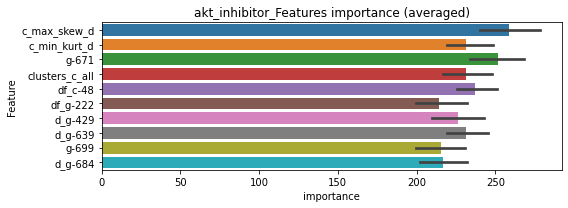

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319418	valid_1's binary_logloss: 0.0743039
[600]	training's binary_logloss: 0.00951264	valid_1's binary_logloss: 0.0440694
[900]	training's binary_logloss: 0.00481367	valid_1's binary_logloss: 0.0359285
[1200]	training's binary_logloss: 0.00311798	valid_1's binary_logloss: 0.0325359
[1500]	training's binary_logloss: 0.0022903	valid_1's binary_logloss: 0.0308187
Early stopping, best iteration is:
[1532]	training's binary_logloss: 0.00222664	valid_1's binary_logloss: 0.0306081


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327896	valid_1's binary_logloss: 0.05915
[600]	training's binary_logloss: 0.0097466	valid_1's binary_logloss: 0.029186
[900]	training's binary_logloss: 0.00496812	valid_1's binary_logloss: 0.021548
[1200]	training's binary_logloss: 0.00320705	valid_1's binary_logloss: 0.0181312
[1500]	training's binary_logloss: 0.0023581	valid_1's binary_logloss: 0.0164147
[1800]	training's binary_logloss: 0.00186634	valid_1's binary_logloss: 0.0153565
[2100]	training's binary_logloss: 0.00155455	valid_1's binary_logloss: 0.014535
Early stopping, best iteration is:
[2150]	training's binary_logloss: 0.00151327	valid_1's binary_logloss: 0.0143901


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331703	valid_1's binary_logloss: 0.0613876
[600]	training's binary_logloss: 0.00985183	valid_1's binary_logloss: 0.0324231
[900]	training's binary_logloss: 0.00497409	valid_1's binary_logloss: 0.0255032
[1200]	training's binary_logloss: 0.00321066	valid_1's binary_logloss: 0.0225545
[1500]	training's binary_logloss: 0.00235247	valid_1's binary_logloss: 0.0209337
[1800]	training's binary_logloss: 0.00186201	valid_1's binary_logloss: 0.0199044
[2100]	training's binary_logloss: 0.00154733	valid_1's binary_logloss: 0.0191793
Early stopping, best iteration is:
[2367]	training's binary_logloss: 0.00135451	valid_1's binary_logloss: 0.0187943


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0326089	valid_1's binary_logloss: 0.0596096
[600]	training's binary_logloss: 0.00967523	valid_1's binary_logloss: 0.0311829
[900]	training's binary_logloss: 0.0049343	valid_1's binary_logloss: 0.0233196
[1200]	training's binary_logloss: 0.00319932	valid_1's binary_logloss: 0.0204426
[1500]	training's binary_logloss: 0.00234952	valid_1's binary_logloss: 0.0187883
[1800]	training's binary_logloss: 0.00186162	valid_1's binary_logloss: 0.0178268
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.00186471	valid_1's binary_logloss: 0.01781


akt_inhibitor logloss: 0.020400643448619395


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471646	valid_1's binary_logloss: 0.00761201
[600]	training's binary_logloss: 0.00062001	valid_1's binary_logloss: 0.00147498
[900]	training's binary_logloss: 0.000360364	valid_1's binary_logloss: 0.00100345
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000349225	valid_1's binary_logloss: 0.000982979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477796	valid_1's binary_logloss: 0.010414
[600]	training's binary_logloss: 0.00061858	valid_1's binary_logloss: 0.00265318
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00036952	valid_1's binary_logloss: 0.00198669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488183	valid_1's binary_logloss: 0.00649652
[600]	training's binary_logloss: 0.000628109	valid_1's binary_logloss: 0.00114538
[900]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0021018, Threshold: 0.0083215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00583, conf_1:0.01082
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0083215
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0283215
threshold: 0.0283215, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435792	valid_1's binary_logloss: 0.00636003
[600]	training's binary_logloss: 0.000577075	valid_1's binary_logloss: 0.00106714
[900]	training's binary_logloss: 0.000339668	valid_1's binary_logloss: 0.000707917
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000335255	valid_1's binary_logloss: 0.000703419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441242	valid_1's binary_logloss: 0.00997894
[600]	training's binary_logloss: 0.000583024	valid_1's binary_logloss: 0.00267997
[900]	training's binary_logloss: 0.00034091	valid_1's binary_logloss: 0.00202288
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000334248	valid_1's binary_logloss: 0.00200921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442796	valid_1's binary_logloss: 0.0065195
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0961951, Threshold: 0.0283215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00080, Num_p_label: 24.0, conf_0:0.02266, conf_1:0.03399
Num_p_label: 24.0, Expected: 3.2, Adj_threshold_1: 0.0283215
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0483215
threshold: 0.0483215, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435792	valid_1's binary_logloss: 0.00636003
[600]	training's binary_logloss: 0.000577075	valid_1's binary_logloss: 0.00106714
[900]	training's binary_logloss: 0.000339668	valid_1's binary_logloss: 0.000707917
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000335255	valid_1's binary_logloss: 0.000703419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441242	valid_1's binary_logloss: 0.00997894
[600]	training's binary_logloss: 0.000583024	valid_1's binary_logloss: 0.00267997
[900]	training's binary_logloss: 0.00034091	valid_1's binary_logloss: 0.00202288
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000334248	valid_1's binary_logloss: 0.00200921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442796	valid_1's binary_logloss: 0.0065195
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0961951, Threshold: 0.0483215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.04349, conf_1:0.05315
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0483215
threshold: 0.0483215, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


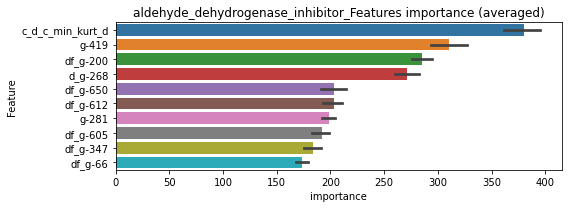

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118194	valid_1's binary_logloss: 0.0153747
[600]	training's binary_logloss: 0.00305999	valid_1's binary_logloss: 0.00463505
[900]	training's binary_logloss: 0.00161427	valid_1's binary_logloss: 0.00267963
[1200]	training's binary_logloss: 0.00109498	valid_1's binary_logloss: 0.00194148
[1500]	training's binary_logloss: 0.000840691	valid_1's binary_logloss: 0.00157021
[1800]	training's binary_logloss: 0.00069033	valid_1's binary_logloss: 0.00134251
[2100]	training's binary_logloss: 0.000593159	valid_1's binary_logloss: 0.00118991
[2400]	training's binary_logloss: 0.000525863	valid_1's binary_logloss: 0.00109068
[2700]	training's binary_logloss: 0.000475717	valid_1's binary_logloss: 0.00100914
[3000]	training's binary_logloss: 0.000437562	valid_1's binary_logloss: 0.000944912
[3300]	training's binary_logloss: 0.000409783	valid_1's binary_logloss: 0.000901544
[3600]	training's binary_logloss: 

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117098	valid_1's binary_logloss: 0.0196308
[600]	training's binary_logloss: 0.00304539	valid_1's binary_logloss: 0.00734814
[900]	training's binary_logloss: 0.00160298	valid_1's binary_logloss: 0.00484289
[1200]	training's binary_logloss: 0.00109263	valid_1's binary_logloss: 0.00383559
[1500]	training's binary_logloss: 0.000840043	valid_1's binary_logloss: 0.00329644
[1800]	training's binary_logloss: 0.000691023	valid_1's binary_logloss: 0.00294296
[2100]	training's binary_logloss: 0.000594492	valid_1's binary_logloss: 0.00269021
[2400]	training's binary_logloss: 0.000526132	valid_1's binary_logloss: 0.00251618
[2700]	training's binary_logloss: 0.000475895	valid_1's binary_logloss: 0.00237546
[3000]	training's binary_logloss: 0.000438	valid_1's binary_logloss: 0.00228625
[3300]	training's binary_logloss: 0.000410523	valid_1's binary_logloss: 0.00220501
[3600]	training's binary_logloss: 0.00

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117659	valid_1's binary_logloss: 0.0158106
[600]	training's binary_logloss: 0.00303441	valid_1's binary_logloss: 0.00468548
[900]	training's binary_logloss: 0.00160797	valid_1's binary_logloss: 0.00266565
[1200]	training's binary_logloss: 0.00109218	valid_1's binary_logloss: 0.00188893
[1500]	training's binary_logloss: 0.000838771	valid_1's binary_logloss: 0.00149261
[1800]	training's binary_logloss: 0.000688621	valid_1's binary_logloss: 0.00125373
[2100]	training's binary_logloss: 0.000592553	valid_1's binary_logloss: 0.00110034
[2400]	training's binary_logloss: 0.00052389	valid_1's binary_logloss: 0.000986216
[2700]	training's binary_logloss: 0.000474353	valid_1's binary_logloss: 0.000904562
[3000]	training's binary_logloss: 0.000436659	valid_1's binary_logloss: 0.000841762
[3300]	training's binary_logloss: 0.000409442	valid_1's binary_logloss: 0.000796352
[3600]	training's binary_logloss

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117904	valid_1's binary_logloss: 0.0155468
[600]	training's binary_logloss: 0.00305114	valid_1's binary_logloss: 0.00483583
[900]	training's binary_logloss: 0.00161236	valid_1's binary_logloss: 0.00286517
[1200]	training's binary_logloss: 0.00109395	valid_1's binary_logloss: 0.00211167
[1500]	training's binary_logloss: 0.000839942	valid_1's binary_logloss: 0.00172606
[1800]	training's binary_logloss: 0.000690998	valid_1's binary_logloss: 0.00149024
[2100]	training's binary_logloss: 0.000593348	valid_1's binary_logloss: 0.00133222
[2400]	training's binary_logloss: 0.000525148	valid_1's binary_logloss: 0.00122006
[2700]	training's binary_logloss: 0.000474443	valid_1's binary_logloss: 0.00113625
[3000]	training's binary_logloss: 0.000437363	valid_1's binary_logloss: 0.0010751
[3300]	training's binary_logloss: 0.000410248	valid_1's binary_logloss: 0.00103079
[3600]	training's binary_logloss: 0.

aldehyde_dehydrogenase_inhibitor logloss: 0.0011197030428674174


neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121236	valid_1's binary_logloss: 0.0333486
[600]	training's binary_logloss: 0.00153531	valid_1's binary_logloss: 0.0142897
[900]	training's binary_logloss: 0.000668747	valid_1's binary_logloss: 0.0110415
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000571668	valid_1's binary_logloss: 0.0107424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011287	valid_1's binary_logloss: 0.0332976
[600]	training's binary_logloss: 0.00146041	valid_1's binary_logloss: 0.0162548
[900]	training's binary_logloss: 0.000651684	valid_1's binary_logloss: 0.013821
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.000557722	valid_1's binary_logloss: 0.0135691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123405	valid_1's binary_logloss: 0.0215799
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0042834, Threshold: 0.0175725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.01230, conf_1:0.02284
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0175725
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_2: 0.0375725
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_3: 0.0575725
threshold: 0.0575725, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106741	valid_1's binary_logloss: 0.0331588
[600]	training's binary_logloss: 0.00141212	valid_1's binary_logloss: 0.0150404
[900]	training's binary_logloss: 0.000630762	valid_1's binary_logloss: 0.0123967
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000607883	valid_1's binary_logloss: 0.0123641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104199	valid_1's binary_logloss: 0.0285138
[600]	training's binary_logloss: 0.00137076	valid_1's binary_logloss: 0.013298
[900]	training's binary_logloss: 0.00061802	valid_1's binary_logloss: 0.0114702
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00058858	valid_1's binary_logloss: 0.0112903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115403	valid_1's binary_logloss: 0.0202942
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0353928, Threshold: 0.0575725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00176, Num_p_label: 29.0, conf_0:0.04606, conf_1:0.06909
Num_p_label: 29.0, Expected: 7.0, Adj_threshold_1: 0.0575725
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_2: 0.0775725
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_3: 0.0975725
threshold: 0.0975725, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010374	valid_1's binary_logloss: 0.0286531
[600]	training's binary_logloss: 0.00140474	valid_1's binary_logloss: 0.0135763
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000734808	valid_1's binary_logloss: 0.01163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101573	valid_1's binary_logloss: 0.0275875
[600]	training's binary_logloss: 0.00136547	valid_1's binary_logloss: 0.0132722
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000774632	valid_1's binary_logloss: 0.0120501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110209	valid_1's binary_logloss: 0.0187488
[600]	training's binary_logloss: 0.00142899	valid_1's binary_logloss: 0.00571366
[900]	training's binary_logloss: 0.000640571	valid_1's binary_logloss: 0.00429215
[1200]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0274858, Threshold: 0.0975725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00176, Num_p_label: 16.0, conf_0:0.08782, conf_1:0.10733
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_1: 0.0975725
threshold: 0.0975725, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


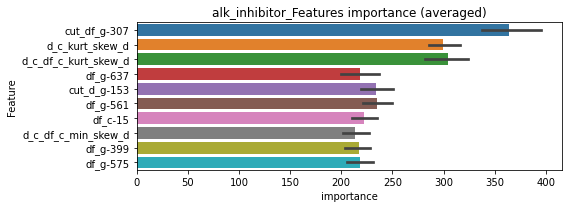

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223261	valid_1's binary_logloss: 0.0447699
[600]	training's binary_logloss: 0.0061606	valid_1's binary_logloss: 0.0232083
[900]	training's binary_logloss: 0.00315163	valid_1's binary_logloss: 0.0178827
[1200]	training's binary_logloss: 0.00207728	valid_1's binary_logloss: 0.0157823
[1500]	training's binary_logloss: 0.00155296	valid_1's binary_logloss: 0.0144382
[1800]	training's binary_logloss: 0.00124877	valid_1's binary_logloss: 0.013658
Early stopping, best iteration is:
[2001]	training's binary_logloss: 0.00110768	valid_1's binary_logloss: 0.0132147


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228798	valid_1's binary_logloss: 0.0357204
[600]	training's binary_logloss: 0.00634944	valid_1's binary_logloss: 0.0136682
[900]	training's binary_logloss: 0.00323603	valid_1's binary_logloss: 0.00870184
[1200]	training's binary_logloss: 0.00211767	valid_1's binary_logloss: 0.00664431
[1500]	training's binary_logloss: 0.0015797	valid_1's binary_logloss: 0.00553258
[1800]	training's binary_logloss: 0.00126927	valid_1's binary_logloss: 0.00484308
[2100]	training's binary_logloss: 0.00106964	valid_1's binary_logloss: 0.00438998
[2400]	training's binary_logloss: 0.000933215	valid_1's binary_logloss: 0.00405823
[2700]	training's binary_logloss: 0.000832429	valid_1's binary_logloss: 0.00378943
[3000]	training's binary_logloss: 0.000756822	valid_1's binary_logloss: 0.00360286
[3300]	training's binary_logloss: 0.000698243	valid_1's binary_logloss: 0.00344648
[3600]	training's binary_logloss: 0.0006

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226557	valid_1's binary_logloss: 0.0366992
[600]	training's binary_logloss: 0.00628269	valid_1's binary_logloss: 0.0153376
[900]	training's binary_logloss: 0.00320124	valid_1's binary_logloss: 0.0104966
[1200]	training's binary_logloss: 0.00211142	valid_1's binary_logloss: 0.00862582
[1500]	training's binary_logloss: 0.00156882	valid_1's binary_logloss: 0.00752797
[1800]	training's binary_logloss: 0.00126146	valid_1's binary_logloss: 0.00686738
[2100]	training's binary_logloss: 0.00106498	valid_1's binary_logloss: 0.00644058
[2400]	training's binary_logloss: 0.000926249	valid_1's binary_logloss: 0.00609554
[2700]	training's binary_logloss: 0.000826489	valid_1's binary_logloss: 0.00586368
[3000]	training's binary_logloss: 0.000751596	valid_1's binary_logloss: 0.00569562
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.000738316	valid_1's binary_logloss: 0.00565102


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0224107	valid_1's binary_logloss: 0.0396607
[600]	training's binary_logloss: 0.00620078	valid_1's binary_logloss: 0.0185251
[900]	training's binary_logloss: 0.00315439	valid_1's binary_logloss: 0.0134082
[1200]	training's binary_logloss: 0.00206909	valid_1's binary_logloss: 0.0113476
[1500]	training's binary_logloss: 0.00154228	valid_1's binary_logloss: 0.0101463
[1800]	training's binary_logloss: 0.00124248	valid_1's binary_logloss: 0.00940209
Early stopping, best iteration is:
[1893]	training's binary_logloss: 0.00117373	valid_1's binary_logloss: 0.00928549


alk_inhibitor logloss: 0.007836101659431109


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002757	valid_1's binary_logloss: 0.0047198
[600]	training's binary_logloss: 0.00039835	valid_1's binary_logloss: 0.00129711
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000288634	valid_1's binary_logloss: 0.00108675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027091	valid_1's binary_logloss: 0.00650739
[600]	training's binary_logloss: 0.000389698	valid_1's binary_logloss: 0.0026898
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000294911	valid_1's binary_logloss: 0.00254592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279813	valid_1's binary_logloss: 0.00324383
[600]	training's binary_logloss: 0.000401926	valid_1's binary_logloss: 0.00057588
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000284916	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0012863, Threshold: 0.0066523, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000285577	valid_1's binary_logloss: 0.00203891


Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00466, conf_1:0.00865
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0066523
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0266523
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.0466523
threshold: 0.0466523, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247103	valid_1's binary_logloss: 0.00316509
[600]	training's binary_logloss: 0.000359293	valid_1's binary_logloss: 0.000614674
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000269917	valid_1's binary_logloss: 0.000484518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241338	valid_1's binary_logloss: 0.00640973
[600]	training's binary_logloss: 0.000357693	valid_1's binary_logloss: 0.00319525
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000283028	valid_1's binary_logloss: 0.00307606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247519	valid_1's binary_logloss: 0.0029948
[600]	training's binary_logloss: 0.000359652	valid_1's binary_logloss: 0.000497917
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000269028	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0453733, Threshold: 0.0466523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00050, Num_p_label: 13.0, conf_0:0.03732, conf_1:0.05598
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0466523


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000266558	valid_1's binary_logloss: 0.00192409


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0666523
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.0866523
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.1066523
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_5: 0.1266523
threshold: 0.1266523, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247103	valid_1's binary_logloss: 0.00316509
[600]	training's binary_logloss: 0.000359293	valid_1's binary_logloss: 0.000614674
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000269917	valid_1's binary_logloss: 0.000484518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241338	valid_1's binary_logloss: 0.00640973
[600]	training's binary_logloss: 0.000357693	valid_1's binary_logloss: 0.00319525
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000283028	valid_1's binary_logloss: 0.00307606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247519	valid_1's binary_logloss: 0.0029948
[600]	training's binary_logloss: 0.000359652	valid_1's binary_logloss: 0.000497917
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000269028	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0453733, Threshold: 0.1266523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.11399, conf_1:0.13932
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.1266523


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000266558	valid_1's binary_logloss: 0.00192409


threshold: 0.1266523, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


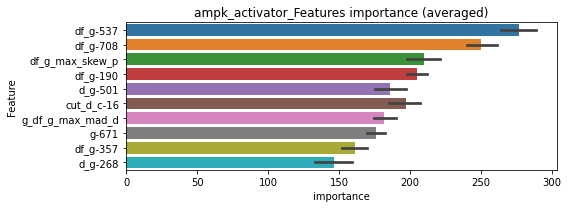

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728735	valid_1's binary_logloss: 0.00886823
[600]	training's binary_logloss: 0.00197482	valid_1's binary_logloss: 0.00276372
[900]	training's binary_logloss: 0.00109229	valid_1's binary_logloss: 0.00163114
[1200]	training's binary_logloss: 0.000763739	valid_1's binary_logloss: 0.00119641
[1500]	training's binary_logloss: 0.00059916	valid_1's binary_logloss: 0.000967188
[1800]	training's binary_logloss: 0.000500238	valid_1's binary_logloss: 0.000827884
[2100]	training's binary_logloss: 0.000435514	valid_1's binary_logloss: 0.000734304
[2400]	training's binary_logloss: 0.000389757	valid_1's binary_logloss: 0.000666824
[2700]	training's binary_logloss: 0.000356163	valid_1's binary_logloss: 0.000617701
[3000]	training's binary_logloss: 0.000331665	valid_1's binary_logloss: 0.000581243
[3300]	training's binary_logloss: 0.00031249	valid_1's binary_logloss: 0.000552209
[3600]	training's binary_lo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727476	valid_1's binary_logloss: 0.0112271
[600]	training's binary_logloss: 0.0019878	valid_1's binary_logloss: 0.00478385
[900]	training's binary_logloss: 0.0010999	valid_1's binary_logloss: 0.00358869
[1200]	training's binary_logloss: 0.000768474	valid_1's binary_logloss: 0.00313068
[1500]	training's binary_logloss: 0.000602983	valid_1's binary_logloss: 0.00288874
[1800]	training's binary_logloss: 0.000504496	valid_1's binary_logloss: 0.00272859
[2100]	training's binary_logloss: 0.000439713	valid_1's binary_logloss: 0.00262905
[2400]	training's binary_logloss: 0.000392842	valid_1's binary_logloss: 0.00254266
[2700]	training's binary_logloss: 0.000359558	valid_1's binary_logloss: 0.00248249
Early stopping, best iteration is:
[2933]	training's binary_logloss: 0.000339366	valid_1's binary_logloss: 0.00245633


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733828	valid_1's binary_logloss: 0.0081891
[600]	training's binary_logloss: 0.00199223	valid_1's binary_logloss: 0.0023736
[900]	training's binary_logloss: 0.00109855	valid_1's binary_logloss: 0.00135541
[1200]	training's binary_logloss: 0.00076985	valid_1's binary_logloss: 0.000971279
[1500]	training's binary_logloss: 0.000600959	valid_1's binary_logloss: 0.00077175
[1800]	training's binary_logloss: 0.000501687	valid_1's binary_logloss: 0.000652058
[2100]	training's binary_logloss: 0.000436799	valid_1's binary_logloss: 0.000573508
[2400]	training's binary_logloss: 0.000390549	valid_1's binary_logloss: 0.0005171
[2700]	training's binary_logloss: 0.000356682	valid_1's binary_logloss: 0.000475864
[3000]	training's binary_logloss: 0.000332431	valid_1's binary_logloss: 0.000445646
[3300]	training's binary_logloss: 0.000312963	valid_1's binary_logloss: 0.000421594
[3600]	training's binary_loglo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729455	valid_1's binary_logloss: 0.010543
[600]	training's binary_logloss: 0.00197155	valid_1's binary_logloss: 0.00412189
[900]	training's binary_logloss: 0.0010882	valid_1's binary_logloss: 0.00283066
[1200]	training's binary_logloss: 0.000762469	valid_1's binary_logloss: 0.00234584
[1500]	training's binary_logloss: 0.000597676	valid_1's binary_logloss: 0.00207013
[1800]	training's binary_logloss: 0.000499052	valid_1's binary_logloss: 0.00188081
[2100]	training's binary_logloss: 0.000435114	valid_1's binary_logloss: 0.00176416
[2400]	training's binary_logloss: 0.000388288	valid_1's binary_logloss: 0.00168598
[2700]	training's binary_logloss: 0.000354849	valid_1's binary_logloss: 0.00161865
[3000]	training's binary_logloss: 0.000330435	valid_1's binary_logloss: 0.00157323
[3300]	training's binary_logloss: 0.000311622	valid_1's binary_logloss: 0.0015385
Early stopping, best iteration is:
[

ampk_activator logloss: 0.001215432205101748


neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331662	valid_1's binary_logloss: 0.00550439
[600]	training's binary_logloss: 0.000424931	valid_1's binary_logloss: 0.00104658
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000303871	valid_1's binary_logloss: 0.000801422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320749	valid_1's binary_logloss: 0.00671183
[600]	training's binary_logloss: 0.000417856	valid_1's binary_logloss: 0.00159953
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000302809	valid_1's binary_logloss: 0.00129299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333912	valid_1's binary_logloss: 0.00383968
[600]	training's binary_logloss: 0.000434125	valid_1's binary_logloss: 0.000594952
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000307176	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0012432, Threshold: 0.0173737, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000308414	valid_1's binary_logloss: 0.000995612


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01216, conf_1:0.02259
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0173737
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0373737
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_3: 0.0573737
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.0773737
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.0973737
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1173737
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.1373737
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.1573737
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.1773737
threshold: 0.1773737, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284126	valid_1's binary_logloss: 0.00433836
[600]	training's binary_logloss: 0.000378789	valid_1's binary_logloss: 0.000812454
[900]	training's binary_logloss: 0.000276992	valid_1's binary_logloss: 0.000639992
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000276992	valid_1's binary_logloss: 0.000639992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00278867	valid_1's binary_logloss: 0.00465958
[600]	training's binary_logloss: 0.000379633	valid_1's binary_logloss: 0.000999593
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000280477	valid_1's binary_logloss: 0.000812492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282819	valid_1's binary_logloss: 0.00339427
[600]	training's binary_logloss: 0.000388471	valid_1's binary_logloss: 0.000527381
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.1442604, Threshold: 0.1773737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050, Num_p_label: 12.0, conf_0:0.14190, conf_1:0.21285


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000287186	valid_1's binary_logloss: 0.000497751


Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.1773737
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.1973737
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.2173737
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.2373737
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.2573737
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.2773737
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.2973737
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_8: 0.3173737
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.3373737
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.3573737
threshold: 0.3773737, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284126	valid_1's binary_logloss: 0.00433836
[600]	training's binary_logloss: 0.000378789	valid_1's binary_logloss: 0.000812454
[900]	training's binary_logloss: 0.000276992	valid_1's binary_logloss: 0.000639992
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000276992	valid_1's binary_logloss: 0.000639992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00278867	valid_1's binary_logloss: 0.00465958
[600]	training's binary_logloss: 0.000379633	valid_1's binary_logloss: 0.000999593
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000280477	valid_1's binary_logloss: 0.000812492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282819	valid_1's binary_logloss: 0.00339427
[600]	training's binary_logloss: 0.000388471	valid_1's binary_logloss: 0.000527381
Early 

3 / 3 AUC score:1.000
y_Threshold: 0.1442604, Threshold: 0.3773737, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000287186	valid_1's binary_logloss: 0.000497751


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050, Num_p_label: 8.0, conf_0:0.33964, conf_1:0.41511
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.3773737
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.3973737
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4173737
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4373737
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.4573737
threshold: 0.4573737, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


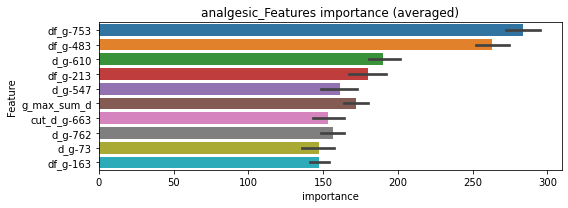

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800271	valid_1's binary_logloss: 0.0102473
[600]	training's binary_logloss: 0.00207897	valid_1's binary_logloss: 0.00303608
[900]	training's binary_logloss: 0.0011272	valid_1's binary_logloss: 0.00175865
[1200]	training's binary_logloss: 0.000783745	valid_1's binary_logloss: 0.00127167
[1500]	training's binary_logloss: 0.00061089	valid_1's binary_logloss: 0.00101861
[1800]	training's binary_logloss: 0.000507676	valid_1's binary_logloss: 0.00086539
[2100]	training's binary_logloss: 0.000441106	valid_1's binary_logloss: 0.000765053
[2400]	training's binary_logloss: 0.000393987	valid_1's binary_logloss: 0.000692205
[2700]	training's binary_logloss: 0.000359588	valid_1's binary_logloss: 0.00063902
[3000]	training's binary_logloss: 0.00033498	valid_1's binary_logloss: 0.000601945
[3300]	training's binary_logloss: 0.000316567	valid_1's binary_logloss: 0.000573175
[3600]	training's binary_logloss

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800474	valid_1's binary_logloss: 0.0103002
[600]	training's binary_logloss: 0.00208204	valid_1's binary_logloss: 0.00312352
[900]	training's binary_logloss: 0.00112329	valid_1's binary_logloss: 0.00183248
[1200]	training's binary_logloss: 0.000780898	valid_1's binary_logloss: 0.00134401
[1500]	training's binary_logloss: 0.000609701	valid_1's binary_logloss: 0.00109525
[1800]	training's binary_logloss: 0.00050725	valid_1's binary_logloss: 0.000940632
[2100]	training's binary_logloss: 0.000439917	valid_1's binary_logloss: 0.00083902
[2400]	training's binary_logloss: 0.000393174	valid_1's binary_logloss: 0.000766138
[2700]	training's binary_logloss: 0.000358742	valid_1's binary_logloss: 0.000711042
[3000]	training's binary_logloss: 0.000334066	valid_1's binary_logloss: 0.000673401
[3300]	training's binary_logloss: 0.000316536	valid_1's binary_logloss: 0.000645869
[3600]	training's binary_logl

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00805249	valid_1's binary_logloss: 0.0094248
[600]	training's binary_logloss: 0.00208733	valid_1's binary_logloss: 0.00262997
[900]	training's binary_logloss: 0.00113398	valid_1's binary_logloss: 0.00148222
[1200]	training's binary_logloss: 0.000789968	valid_1's binary_logloss: 0.00105315
[1500]	training's binary_logloss: 0.000615777	valid_1's binary_logloss: 0.000831953
[1800]	training's binary_logloss: 0.000514288	valid_1's binary_logloss: 0.000702511
[2100]	training's binary_logloss: 0.000445101	valid_1's binary_logloss: 0.000612064
[2400]	training's binary_logloss: 0.000398243	valid_1's binary_logloss: 0.000551116
[2700]	training's binary_logloss: 0.000363878	valid_1's binary_logloss: 0.000505532
[3000]	training's binary_logloss: 0.000338676	valid_1's binary_logloss: 0.000472594
[3300]	training's binary_logloss: 0.000320219	valid_1's binary_logloss: 0.000448102
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00807787	valid_1's binary_logloss: 0.0091694
[600]	training's binary_logloss: 0.00210847	valid_1's binary_logloss: 0.00259559
[900]	training's binary_logloss: 0.00114311	valid_1's binary_logloss: 0.00146465
[1200]	training's binary_logloss: 0.000793808	valid_1's binary_logloss: 0.00104312
[1500]	training's binary_logloss: 0.000619745	valid_1's binary_logloss: 0.000830549
[1800]	training's binary_logloss: 0.000517459	valid_1's binary_logloss: 0.000703867
[2100]	training's binary_logloss: 0.000448616	valid_1's binary_logloss: 0.000616324
[2400]	training's binary_logloss: 0.000400642	valid_1's binary_logloss: 0.000555903
[2700]	training's binary_logloss: 0.000365493	valid_1's binary_logloss: 0.000511353
[3000]	training's binary_logloss: 0.000339818	valid_1's binary_logloss: 0.000478109
[3300]	training's binary_logloss: 0.000321379	valid_1's binary_logloss: 0.000454255
[3600]	training's binary_l

analgesic logloss: 0.0004884089298551687


neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132413	valid_1's binary_logloss: 0.0438697
[600]	training's binary_logloss: 0.00181883	valid_1's binary_logloss: 0.0210394
[900]	training's binary_logloss: 0.000779146	valid_1's binary_logloss: 0.016983
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.00061436	valid_1's binary_logloss: 0.0162362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142053	valid_1's binary_logloss: 0.0366168
[600]	training's binary_logloss: 0.00189193	valid_1's binary_logloss: 0.0162346
[900]	training's binary_logloss: 0.000792075	valid_1's binary_logloss: 0.0134302
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.00061689	valid_1's binary_logloss: 0.0128331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149094	valid_1's binary_logloss: 0.0217054
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0047626, Threshold: 0.0102801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.00720, conf_1:0.01336
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0102801
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_2: 0.0302801
threshold: 0.0302801, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128668	valid_1's binary_logloss: 0.0376257
[600]	training's binary_logloss: 0.00174909	valid_1's binary_logloss: 0.0186348
[900]	training's binary_logloss: 0.000754245	valid_1's binary_logloss: 0.0153791
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000631345	valid_1's binary_logloss: 0.0150284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131415	valid_1's binary_logloss: 0.0279322
[600]	training's binary_logloss: 0.00180137	valid_1's binary_logloss: 0.00977075
[900]	training's binary_logloss: 0.000772985	valid_1's binary_logloss: 0.00684281
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.00059864	valid_1's binary_logloss: 0.00622608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127771	valid_1's binary_logloss: 0.0307293
[600]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0203259, Threshold: 0.0302801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00202, Num_p_label: 13.0, conf_0:0.02422, conf_1:0.03634
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_1: 0.0302801
threshold: 0.0302801, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122901	valid_1's binary_logloss: 0.0409995
[600]	training's binary_logloss: 0.00165132	valid_1's binary_logloss: 0.0229773
[900]	training's binary_logloss: 0.000725093	valid_1's binary_logloss: 0.0207618
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000655344	valid_1's binary_logloss: 0.02039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129804	valid_1's binary_logloss: 0.0292823
[600]	training's binary_logloss: 0.00175897	valid_1's binary_logloss: 0.0103156
[900]	training's binary_logloss: 0.000756121	valid_1's binary_logloss: 0.00708006
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000569975	valid_1's binary_logloss: 0.00631441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131898	valid_1's binary_logloss: 0.0279235
[600]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0171109, Threshold: 0.0302801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0047715 Vs.target_rate: 0.00202, Num_p_label: 19.0, conf_0:0.02725, conf_1:0.03331
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_1: 0.0302801
threshold: 0.0302801, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


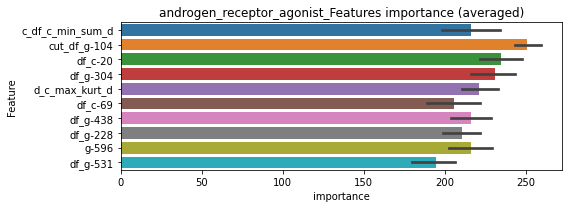

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0261659	valid_1's binary_logloss: 0.0454324
[600]	training's binary_logloss: 0.00738574	valid_1's binary_logloss: 0.0196976
[900]	training's binary_logloss: 0.00373987	valid_1's binary_logloss: 0.0134686
[1200]	training's binary_logloss: 0.0024477	valid_1's binary_logloss: 0.0109325
[1500]	training's binary_logloss: 0.00181832	valid_1's binary_logloss: 0.00945348
[1800]	training's binary_logloss: 0.00145749	valid_1's binary_logloss: 0.00857404
[2100]	training's binary_logloss: 0.00122266	valid_1's binary_logloss: 0.00790662
Early stopping, best iteration is:
[2366]	training's binary_logloss: 0.00107729	valid_1's binary_logloss: 0.00744988


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257509	valid_1's binary_logloss: 0.046996
[600]	training's binary_logloss: 0.00716107	valid_1's binary_logloss: 0.0236544
[900]	training's binary_logloss: 0.00362762	valid_1's binary_logloss: 0.0179312
[1200]	training's binary_logloss: 0.0023799	valid_1's binary_logloss: 0.0156662
[1500]	training's binary_logloss: 0.00177397	valid_1's binary_logloss: 0.0142978
[1800]	training's binary_logloss: 0.00142285	valid_1's binary_logloss: 0.0134037
[2100]	training's binary_logloss: 0.00119692	valid_1's binary_logloss: 0.012804
Early stopping, best iteration is:
[2208]	training's binary_logloss: 0.00113297	valid_1's binary_logloss: 0.0126085


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0268082	valid_1's binary_logloss: 0.0410775
[600]	training's binary_logloss: 0.00751593	valid_1's binary_logloss: 0.0170195
[900]	training's binary_logloss: 0.00380918	valid_1's binary_logloss: 0.011555
[1200]	training's binary_logloss: 0.00248347	valid_1's binary_logloss: 0.00920568
[1500]	training's binary_logloss: 0.00184331	valid_1's binary_logloss: 0.00811115
[1800]	training's binary_logloss: 0.00146916	valid_1's binary_logloss: 0.00729687
[2100]	training's binary_logloss: 0.00123369	valid_1's binary_logloss: 0.00674622
[2400]	training's binary_logloss: 0.00106834	valid_1's binary_logloss: 0.0063886
[2700]	training's binary_logloss: 0.000950115	valid_1's binary_logloss: 0.00604166
[3000]	training's binary_logloss: 0.000860355	valid_1's binary_logloss: 0.00583999
[3300]	training's binary_logloss: 0.000790247	valid_1's binary_logloss: 0.00565593
Early stopping, best iteration is:
[3447]	t

len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253285	valid_1's binary_logloss: 0.0545965
[600]	training's binary_logloss: 0.00712791	valid_1's binary_logloss: 0.0333853
[900]	training's binary_logloss: 0.00364179	valid_1's binary_logloss: 0.0279864
[1200]	training's binary_logloss: 0.00240046	valid_1's binary_logloss: 0.0257835
[1500]	training's binary_logloss: 0.0017903	valid_1's binary_logloss: 0.0245523
Early stopping, best iteration is:
[1599]	training's binary_logloss: 0.00165413	valid_1's binary_logloss: 0.0242461


androgen_receptor_agonist logloss: 0.01246848034873137


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249072	valid_1's binary_logloss: 0.084134
[600]	training's binary_logloss: 0.00403176	valid_1's binary_logloss: 0.059502
[900]	training's binary_logloss: 0.00149316	valid_1's binary_logloss: 0.0558874
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.00122816	valid_1's binary_logloss: 0.0554808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264433	valid_1's binary_logloss: 0.081882
[600]	training's binary_logloss: 0.00420863	valid_1's binary_logloss: 0.0472892
[900]	training's binary_logloss: 0.00152912	valid_1's binary_logloss: 0.0403074
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.00124564	valid_1's binary_logloss: 0.0393123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262603	valid_1's binary_logloss: 0.0663515
[600]	training's binary_logloss:

1 / 3 AUC score:0.999
y_Threshold: 0.0122005, Threshold: 0.0357365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.02502, conf_1:0.04646
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0357365
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.0557365
threshold: 0.0557365, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231596	valid_1's binary_logloss: 0.0786544
[600]	training's binary_logloss: 0.00355438	valid_1's binary_logloss: 0.0557717
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00214599	valid_1's binary_logloss: 0.0542481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226255	valid_1's binary_logloss: 0.0836651
[600]	training's binary_logloss: 0.00360619	valid_1's binary_logloss: 0.054465
[900]	training's binary_logloss: 0.00137321	valid_1's binary_logloss: 0.0488448
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000936242	valid_1's binary_logloss: 0.0474615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235198	valid_1's binary_logloss: 0.0710563
[600]	training's binary_logloss: 0.00371556	valid_1's binary_logloss: 0.0422972
[900]	training's binary_loglo

2 / 3 AUC score:0.999
y_Threshold: 0.0336338, Threshold: 0.0557365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0155701 Vs.target_rate: 0.00374, Num_p_label: 62.0, conf_0:0.04459, conf_1:0.06688
Num_p_label: 62.0, Expected: 14.9, Adj_threshold_1: 0.0557365
Num_p_label: 39.0, Expected: 14.9, Adj_threshold_2: 0.0757365
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_3: 0.0957365
Num_p_label: 20.0, Expected: 14.9, Adj_threshold_4: 0.1157365
threshold: 0.1157365, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216877	valid_1's binary_logloss: 0.0690984
[600]	training's binary_logloss: 0.00335171	valid_1's binary_logloss: 0.0437809
[900]	training's binary_logloss: 0.00130883	valid_1's binary_logloss: 0.039425
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.00120347	valid_1's binary_logloss: 0.0388992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226642	valid_1's binary_logloss: 0.077283
[600]	training's binary_logloss: 0.00344525	valid_1's binary_logloss: 0.0492934
[900]	training's binary_logloss: 0.00131577	valid_1's binary_logloss: 0.0438173
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00133044	valid_1's binary_logloss: 0.0437579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217063	valid_1's binary_logloss: 0.0623815
[600]	training's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0346609, Threshold: 0.1157365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0052737 Vs.target_rate: 0.00374, Num_p_label: 21.0, conf_0:0.10416, conf_1:0.12731
threshold: 0.1157365, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 633.0/3754, y_label_rate: 0.1686201


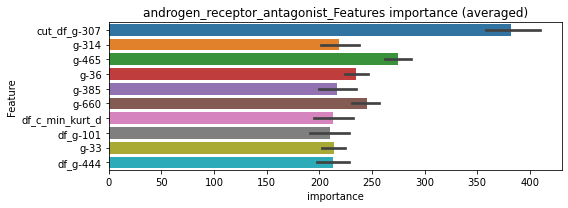

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0399197	valid_1's binary_logloss: 0.0917595
[600]	training's binary_logloss: 0.0122981	valid_1's binary_logloss: 0.0599019
[900]	training's binary_logloss: 0.00617724	valid_1's binary_logloss: 0.0500472
[1200]	training's binary_logloss: 0.00395376	valid_1's binary_logloss: 0.0458116
[1500]	training's binary_logloss: 0.00287675	valid_1's binary_logloss: 0.0435966
Early stopping, best iteration is:
[1650]	training's binary_logloss: 0.0025281	valid_1's binary_logloss: 0.0429328


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0401783	valid_1's binary_logloss: 0.0842911
[600]	training's binary_logloss: 0.0124062	valid_1's binary_logloss: 0.0514743
[900]	training's binary_logloss: 0.00620396	valid_1's binary_logloss: 0.0422359
[1200]	training's binary_logloss: 0.00395304	valid_1's binary_logloss: 0.0386326
[1500]	training's binary_logloss: 0.00286838	valid_1's binary_logloss: 0.036707
Early stopping, best iteration is:
[1532]	training's binary_logloss: 0.00278793	valid_1's binary_logloss: 0.0364949


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.041628	valid_1's binary_logloss: 0.079694
[600]	training's binary_logloss: 0.012829	valid_1's binary_logloss: 0.0457708
[900]	training's binary_logloss: 0.00641595	valid_1's binary_logloss: 0.0366411
[1200]	training's binary_logloss: 0.00406994	valid_1's binary_logloss: 0.0325304
[1500]	training's binary_logloss: 0.00295365	valid_1's binary_logloss: 0.0303446
[1800]	training's binary_logloss: 0.002313	valid_1's binary_logloss: 0.0288526
[2100]	training's binary_logloss: 0.00191175	valid_1's binary_logloss: 0.0280117
Early stopping, best iteration is:
[2160]	training's binary_logloss: 0.00184537	valid_1's binary_logloss: 0.0278308


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412212	valid_1's binary_logloss: 0.0750262
[600]	training's binary_logloss: 0.0127018	valid_1's binary_logloss: 0.0415861
[900]	training's binary_logloss: 0.0063712	valid_1's binary_logloss: 0.0324033
[1200]	training's binary_logloss: 0.00405692	valid_1's binary_logloss: 0.0284955
Early stopping, best iteration is:
[1414]	training's binary_logloss: 0.00318855	valid_1's binary_logloss: 0.0267835


androgen_receptor_antagonist logloss: 0.03351378217158499


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196996	valid_1's binary_logloss: 0.066058
[600]	training's binary_logloss: 0.00311812	valid_1's binary_logloss: 0.0441952
[900]	training's binary_logloss: 0.00122581	valid_1's binary_logloss: 0.0407471
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.00126128	valid_1's binary_logloss: 0.0406487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183737	valid_1's binary_logloss: 0.0662822
[600]	training's binary_logloss: 0.00292418	valid_1's binary_logloss: 0.0448604
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00131923	valid_1's binary_logloss: 0.0410821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198761	valid_1's binary_logloss: 0.0517833
[600]	training's binary_logloss: 0.00325895	valid_1's binary_logloss: 0.0304279
[900]	training's binary_logloss

1 / 3 AUC score:0.997
y_Threshold: 0.0090889, Threshold: 0.0199846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.01399, conf_1:0.02598
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0199846
Num_p_label: 11.0, Expected: 13.4, Adj_threshold_2: 0.0399846
threshold: 0.0399846, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172016	valid_1's binary_logloss: 0.0642101
[600]	training's binary_logloss: 0.00270907	valid_1's binary_logloss: 0.0439936
[900]	training's binary_logloss: 0.00111425	valid_1's binary_logloss: 0.0408001
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.00107244	valid_1's binary_logloss: 0.0404743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178128	valid_1's binary_logloss: 0.0545146
[600]	training's binary_logloss: 0.00281417	valid_1's binary_logloss: 0.0283001
[900]	training's binary_logloss: 0.00114242	valid_1's binary_logloss: 0.0228159
[1200]	training's binary_logloss: 0.000762818	valid_1's binary_logloss: 0.0213188
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.0007228	valid_1's binary_logloss: 0.0211042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0264562, Threshold: 0.0399846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 644.0/3775
p_label_rate: 0.0055249 Vs.target_rate: 0.00336, Num_p_label: 22.0, conf_0:0.03199, conf_1:0.04798
Num_p_label: 22.0, Expected: 13.4, Adj_threshold_1: 0.0399846
Num_p_label: 10.0, Expected: 13.4, Adj_threshold_2: 0.0599846
threshold: 0.0599846, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163729	valid_1's binary_logloss: 0.0551554
[600]	training's binary_logloss: 0.0025712	valid_1's binary_logloss: 0.0329942
[900]	training's binary_logloss: 0.00107655	valid_1's binary_logloss: 0.0280162
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000833498	valid_1's binary_logloss: 0.0271477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165282	valid_1's binary_logloss: 0.0621626
[600]	training's binary_logloss: 0.00262247	valid_1's binary_logloss: 0.0419448
[900]	training's binary_logloss: 0.0010726	valid_1's binary_logloss: 0.0386426
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000894107	valid_1's binary_logloss: 0.0381997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179104	valid_1's binary_logloss: 0.0412507
[600]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0272044, Threshold: 0.0599846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3767
p_label_rate: 0.0027624 Vs.target_rate: 0.00336, Num_p_label: 11.0, conf_0:0.05399, conf_1:0.06598
threshold: 0.0599846, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 640.0/3767, y_label_rate: 0.1698965


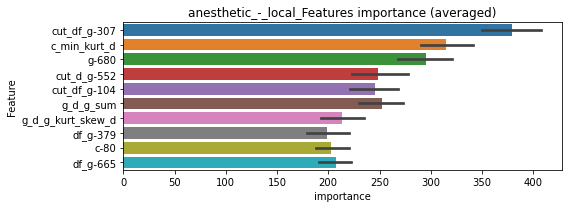

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0328797	valid_1's binary_logloss: 0.0768991
[600]	training's binary_logloss: 0.0102827	valid_1's binary_logloss: 0.0492082
[900]	training's binary_logloss: 0.00525593	valid_1's binary_logloss: 0.0406568
[1200]	training's binary_logloss: 0.00339626	valid_1's binary_logloss: 0.0373956
[1500]	training's binary_logloss: 0.00248829	valid_1's binary_logloss: 0.0354833
[1800]	training's binary_logloss: 0.00196271	valid_1's binary_logloss: 0.0340613
[2100]	training's binary_logloss: 0.00162977	valid_1's binary_logloss: 0.0330304
Early stopping, best iteration is:
[2135]	training's binary_logloss: 0.00159797	valid_1's binary_logloss: 0.0328964


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332606	valid_1's binary_logloss: 0.0718227
[600]	training's binary_logloss: 0.0101236	valid_1's binary_logloss: 0.042862
[900]	training's binary_logloss: 0.00519615	valid_1's binary_logloss: 0.0352197
[1200]	training's binary_logloss: 0.00336804	valid_1's binary_logloss: 0.0317141
[1500]	training's binary_logloss: 0.00247721	valid_1's binary_logloss: 0.0297837
[1800]	training's binary_logloss: 0.00196273	valid_1's binary_logloss: 0.0283418
Early stopping, best iteration is:
[1892]	training's binary_logloss: 0.00184583	valid_1's binary_logloss: 0.0280925


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0338124	valid_1's binary_logloss: 0.0613508
[600]	training's binary_logloss: 0.0105558	valid_1's binary_logloss: 0.0327706
[900]	training's binary_logloss: 0.00541504	valid_1's binary_logloss: 0.0250695
[1200]	training's binary_logloss: 0.00350076	valid_1's binary_logloss: 0.021709
[1500]	training's binary_logloss: 0.00256041	valid_1's binary_logloss: 0.0197225
[1800]	training's binary_logloss: 0.00202268	valid_1's binary_logloss: 0.0186154
[2100]	training's binary_logloss: 0.0016795	valid_1's binary_logloss: 0.0176561
Early stopping, best iteration is:
[2228]	training's binary_logloss: 0.00156867	valid_1's binary_logloss: 0.0173832


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333386	valid_1's binary_logloss: 0.0673693
[600]	training's binary_logloss: 0.0103774	valid_1's binary_logloss: 0.041774
[900]	training's binary_logloss: 0.00531875	valid_1's binary_logloss: 0.0350923
[1200]	training's binary_logloss: 0.00342979	valid_1's binary_logloss: 0.0324669
[1500]	training's binary_logloss: 0.00251491	valid_1's binary_logloss: 0.0309388
Early stopping, best iteration is:
[1635]	training's binary_logloss: 0.00224301	valid_1's binary_logloss: 0.030382


anesthetic_-_local logloss: 0.02718767190166929


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00784043	valid_1's binary_logloss: 0.0257622
[600]	training's binary_logloss: 0.0010816	valid_1's binary_logloss: 0.015637
[900]	training's binary_logloss: 0.000531263	valid_1's binary_logloss: 0.0143157
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000526614	valid_1's binary_logloss: 0.0143076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00844544	valid_1's binary_logloss: 0.0239783
[600]	training's binary_logloss: 0.00113507	valid_1's binary_logloss: 0.0117879
[900]	training's binary_logloss: 0.000548803	valid_1's binary_logloss: 0.0100266
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000500147	valid_1's binary_logloss: 0.0098028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00846471	valid_1's binary_logloss: 0.01809
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0042617, Threshold: 0.0141193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00988, conf_1:0.01836
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0141193
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0341193
threshold: 0.0341193, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722565	valid_1's binary_logloss: 0.0243699
[600]	training's binary_logloss: 0.00101991	valid_1's binary_logloss: 0.0144091
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000742514	valid_1's binary_logloss: 0.0139223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00761653	valid_1's binary_logloss: 0.0224734
[600]	training's binary_logloss: 0.00105361	valid_1's binary_logloss: 0.0118807
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000538912	valid_1's binary_logloss: 0.0100642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792527	valid_1's binary_logloss: 0.0174941
[600]	training's binary_logloss: 0.00109174	valid_1's binary_logloss: 0.00892615
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00116662	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0258710, Threshold: 0.0341193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0153189 Vs.target_rate: 0.00151, Num_p_label: 61.0, conf_0:0.02730, conf_1:0.04094
Num_p_label: 61.0, Expected: 6.0, Adj_threshold_1: 0.0341193
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.0541193
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.0741193
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_4: 0.0941193
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.1141193
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.1341193
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_7: 0.1541193
threshold: 0.1541193, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711365	valid_1's binary_logloss: 0.0249209
[600]	training's binary_logloss: 0.00100477	valid_1's binary_logloss: 0.0151759
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000563558	valid_1's binary_logloss: 0.0136423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779318	valid_1's binary_logloss: 0.0144759
[600]	training's binary_logloss: 0.00106813	valid_1's binary_logloss: 0.00402434
[900]	training's binary_logloss: 0.000521928	valid_1's binary_logloss: 0.00297664
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000489402	valid_1's binary_logloss: 0.00291203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00758177	valid_1's binary_logloss: 0.0153119
[600]	training's binary_logloss: 0.00105176	valid_1's binary_logloss: 0.00475445
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0336804, Threshold: 0.1541193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00151, Num_p_label: 12.0, conf_0:0.13871, conf_1:0.16953
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.1541193
threshold: 0.1541193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


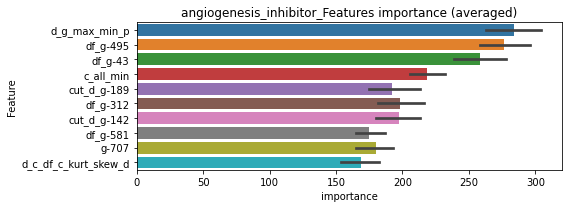

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176563	valid_1's binary_logloss: 0.0364467
[600]	training's binary_logloss: 0.0049348	valid_1's binary_logloss: 0.0203259
[900]	training's binary_logloss: 0.00257882	valid_1's binary_logloss: 0.0165093
[1200]	training's binary_logloss: 0.00172513	valid_1's binary_logloss: 0.0146698
[1500]	training's binary_logloss: 0.0013036	valid_1's binary_logloss: 0.0136755
Early stopping, best iteration is:
[1528]	training's binary_logloss: 0.00127523	valid_1's binary_logloss: 0.0135623


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186899	valid_1's binary_logloss: 0.0276874
[600]	training's binary_logloss: 0.00517966	valid_1's binary_logloss: 0.0108234
[900]	training's binary_logloss: 0.00268149	valid_1's binary_logloss: 0.0071415
[1200]	training's binary_logloss: 0.00179231	valid_1's binary_logloss: 0.00571053
[1500]	training's binary_logloss: 0.00135036	valid_1's binary_logloss: 0.00488451
[1800]	training's binary_logloss: 0.0010919	valid_1's binary_logloss: 0.00443841
[2100]	training's binary_logloss: 0.000926223	valid_1's binary_logloss: 0.00411795
[2400]	training's binary_logloss: 0.000810887	valid_1's binary_logloss: 0.0038756
[2700]	training's binary_logloss: 0.000725486	valid_1's binary_logloss: 0.00367062
[3000]	training's binary_logloss: 0.000662111	valid_1's binary_logloss: 0.00355175
[3300]	training's binary_logloss: 0.000612316	valid_1's binary_logloss: 0.0034358
[3600]	training's binary_logloss: 0.000574

len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186111	valid_1's binary_logloss: 0.0296947
[600]	training's binary_logloss: 0.00513458	valid_1's binary_logloss: 0.0118576
[900]	training's binary_logloss: 0.00266543	valid_1's binary_logloss: 0.00800153
[1200]	training's binary_logloss: 0.00177646	valid_1's binary_logloss: 0.00646049
[1500]	training's binary_logloss: 0.00133913	valid_1's binary_logloss: 0.0056925
[1800]	training's binary_logloss: 0.00108255	valid_1's binary_logloss: 0.00516566
[2100]	training's binary_logloss: 0.000916287	valid_1's binary_logloss: 0.00483102
[2400]	training's binary_logloss: 0.000802818	valid_1's binary_logloss: 0.00461104
[2700]	training's binary_logloss: 0.000719341	valid_1's binary_logloss: 0.00441761
[3000]	training's binary_logloss: 0.000656194	valid_1's binary_logloss: 0.00429502
[3300]	training's binary_logloss: 0.000607503	valid_1's binary_logloss: 0.00415236
[3600]	training's binary_logloss: 0.000

len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186035	valid_1's binary_logloss: 0.0281309
[600]	training's binary_logloss: 0.00515452	valid_1's binary_logloss: 0.0115907
[900]	training's binary_logloss: 0.00266943	valid_1's binary_logloss: 0.00804116
[1200]	training's binary_logloss: 0.00177972	valid_1's binary_logloss: 0.00660475
[1500]	training's binary_logloss: 0.0013393	valid_1's binary_logloss: 0.00580139
[1800]	training's binary_logloss: 0.00108272	valid_1's binary_logloss: 0.00536284
[2100]	training's binary_logloss: 0.000919256	valid_1's binary_logloss: 0.00508463
[2400]	training's binary_logloss: 0.00080367	valid_1's binary_logloss: 0.00486213
[2700]	training's binary_logloss: 0.000720217	valid_1's binary_logloss: 0.0047146
Early stopping, best iteration is:
[2828]	training's binary_logloss: 0.000691389	valid_1's binary_logloss: 0.00465193


angiogenesis_inhibitor logloss: 0.006367878603998289


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876796	valid_1's binary_logloss: 0.0218031
[600]	training's binary_logloss: 0.00123293	valid_1's binary_logloss: 0.00883019
[900]	training's binary_logloss: 0.000585819	valid_1's binary_logloss: 0.00699584
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000509532	valid_1's binary_logloss: 0.00682311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894207	valid_1's binary_logloss: 0.0242769
[600]	training's binary_logloss: 0.00123288	valid_1's binary_logloss: 0.00816831
[900]	training's binary_logloss: 0.000577282	valid_1's binary_logloss: 0.00573147
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000520067	valid_1's binary_logloss: 0.00548876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00922142	valid_1's binary_logloss: 0.0175542
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0036881, Threshold: 0.0140866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.00986, conf_1:0.01831
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0140866
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.0340866
threshold: 0.0340866, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081245	valid_1's binary_logloss: 0.0189312
[600]	training's binary_logloss: 0.00117388	valid_1's binary_logloss: 0.00693043
[900]	training's binary_logloss: 0.00055992	valid_1's binary_logloss: 0.00537811
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000485098	valid_1's binary_logloss: 0.00516909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00820444	valid_1's binary_logloss: 0.0237437
[600]	training's binary_logloss: 0.00117863	valid_1's binary_logloss: 0.00780799
[900]	training's binary_logloss: 0.000556181	valid_1's binary_logloss: 0.00540518
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000468769	valid_1's binary_logloss: 0.0050366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00875686	valid_1's binary_logloss: 0.0140518
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0238203, Threshold: 0.0340866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02727, conf_1:0.04090
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0340866
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_2: 0.0540866
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_3: 0.0740866
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_4: 0.0940866
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_5: 0.1140866
threshold: 0.1140866, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081245	valid_1's binary_logloss: 0.0189312
[600]	training's binary_logloss: 0.00117388	valid_1's binary_logloss: 0.00693043
[900]	training's binary_logloss: 0.00055992	valid_1's binary_logloss: 0.00537811
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000485098	valid_1's binary_logloss: 0.00516909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00820444	valid_1's binary_logloss: 0.0237437
[600]	training's binary_logloss: 0.00117863	valid_1's binary_logloss: 0.00780799
[900]	training's binary_logloss: 0.000556181	valid_1's binary_logloss: 0.00540518
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000468769	valid_1's binary_logloss: 0.0050366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00875686	valid_1's binary_logloss: 0.0140518
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0238203, Threshold: 0.1140866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00155, Num_p_label: 11.0, conf_0:0.10268, conf_1:0.12550
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.1140866
threshold: 0.1140866, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


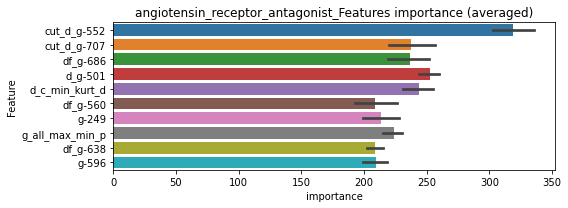

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198425	valid_1's binary_logloss: 0.0336855
[600]	training's binary_logloss: 0.00559824	valid_1's binary_logloss: 0.0147499
[900]	training's binary_logloss: 0.00290102	valid_1's binary_logloss: 0.0104754
[1200]	training's binary_logloss: 0.00192196	valid_1's binary_logloss: 0.00869136
[1500]	training's binary_logloss: 0.00144216	valid_1's binary_logloss: 0.0076508
[1800]	training's binary_logloss: 0.00116212	valid_1's binary_logloss: 0.00702829
[2100]	training's binary_logloss: 0.000981166	valid_1's binary_logloss: 0.00657509
[2400]	training's binary_logloss: 0.000856352	valid_1's binary_logloss: 0.0062782
[2700]	training's binary_logloss: 0.000763964	valid_1's binary_logloss: 0.00605153
[3000]	training's binary_logloss: 0.000695879	valid_1's binary_logloss: 0.00587307
Early stopping, best iteration is:
[3215]	training's binary_logloss: 0.000655893	valid_1's binary_logloss: 0.00572458


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197907	valid_1's binary_logloss: 0.0366868
[600]	training's binary_logloss: 0.00563315	valid_1's binary_logloss: 0.0156173
[900]	training's binary_logloss: 0.00290232	valid_1's binary_logloss: 0.0104331
[1200]	training's binary_logloss: 0.00191179	valid_1's binary_logloss: 0.00822371
[1500]	training's binary_logloss: 0.00143145	valid_1's binary_logloss: 0.0070301
[1800]	training's binary_logloss: 0.00115045	valid_1's binary_logloss: 0.00628116
[2100]	training's binary_logloss: 0.000971655	valid_1's binary_logloss: 0.00579528
[2400]	training's binary_logloss: 0.000846737	valid_1's binary_logloss: 0.0053946
[2700]	training's binary_logloss: 0.000756482	valid_1's binary_logloss: 0.00510888
[3000]	training's binary_logloss: 0.000687869	valid_1's binary_logloss: 0.00488543
[3300]	training's binary_logloss: 0.000634222	valid_1's binary_logloss: 0.00469442
[3600]	training's binary_logloss: 0.00059

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207571	valid_1's binary_logloss: 0.0284629
[600]	training's binary_logloss: 0.00581988	valid_1's binary_logloss: 0.0102418
[900]	training's binary_logloss: 0.00297441	valid_1's binary_logloss: 0.00620397
[1200]	training's binary_logloss: 0.00196475	valid_1's binary_logloss: 0.00461523
[1500]	training's binary_logloss: 0.00147334	valid_1's binary_logloss: 0.00379238
[1800]	training's binary_logloss: 0.00118555	valid_1's binary_logloss: 0.00329065
[2100]	training's binary_logloss: 0.00100103	valid_1's binary_logloss: 0.00296577
[2400]	training's binary_logloss: 0.000874687	valid_1's binary_logloss: 0.00271944
[2700]	training's binary_logloss: 0.000780146	valid_1's binary_logloss: 0.00253053
[3000]	training's binary_logloss: 0.000710239	valid_1's binary_logloss: 0.00238591
[3300]	training's binary_logloss: 0.000655005	valid_1's binary_logloss: 0.00226963
[3600]	training's binary_logloss: 0.000

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195128	valid_1's binary_logloss: 0.0339188
[600]	training's binary_logloss: 0.00547243	valid_1's binary_logloss: 0.0162869
[900]	training's binary_logloss: 0.00283372	valid_1's binary_logloss: 0.0124749
[1200]	training's binary_logloss: 0.00188418	valid_1's binary_logloss: 0.0109658
[1500]	training's binary_logloss: 0.00141175	valid_1's binary_logloss: 0.0101608
[1800]	training's binary_logloss: 0.00113972	valid_1's binary_logloss: 0.00965169
[2100]	training's binary_logloss: 0.000962308	valid_1's binary_logloss: 0.00939377
[2400]	training's binary_logloss: 0.000839278	valid_1's binary_logloss: 0.00919489
[2700]	training's binary_logloss: 0.000749341	valid_1's binary_logloss: 0.00898174
Early stopping, best iteration is:
[2908]	training's binary_logloss: 0.000700905	valid_1's binary_logloss: 0.00886391


angiotensin_receptor_antagonist logloss: 0.005252900583878997


neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212329	valid_1's binary_logloss: 0.0630199
[600]	training's binary_logloss: 0.00317358	valid_1's binary_logloss: 0.0363292
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00156658	valid_1's binary_logloss: 0.0330168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211569	valid_1's binary_logloss: 0.0585326
[600]	training's binary_logloss: 0.00331671	valid_1's binary_logloss: 0.0264451
[900]	training's binary_logloss: 0.00130038	valid_1's binary_logloss: 0.0206413
[1200]	training's binary_logloss: 0.000831605	valid_1's binary_logloss: 0.0189925
Early stopping, best iteration is:
[1185]	training's binary_logloss: 0.000844239	valid_1's binary_logloss: 0.0189513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218611	valid_1's binary_logloss: 0.0666598
[600]	training's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0106818, Threshold: 0.0868277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.06078, conf_1:0.11288
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0868277
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.1068277
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.1268277
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.1468277
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_5: 0.1668277
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_6: 0.1868277
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_7: 0.2068277
threshold: 0.2068277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019032	valid_1's binary_logloss: 0.0669484
[600]	training's binary_logloss: 0.00283473	valid_1's binary_logloss: 0.0429854
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00188	valid_1's binary_logloss: 0.041082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194113	valid_1's binary_logloss: 0.0638906
[600]	training's binary_logloss: 0.00291923	valid_1's binary_logloss: 0.0377881
[900]	training's binary_logloss: 0.0011712	valid_1's binary_logloss: 0.0338984
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000981963	valid_1's binary_logloss: 0.0334654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200008	valid_1's binary_logloss: 0.0503795
[600]	training's binary_logloss: 0.00300111	valid_1's binary_logloss: 0.0228716
[900]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0386474, Threshold: 0.2068277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0110497 Vs.target_rate: 0.00307, Num_p_label: 44.0, conf_0:0.16546, conf_1:0.24819
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_1: 0.2068277
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_2: 0.2268277
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_3: 0.2468277
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_4: 0.2668277
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_5: 0.2868277
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_6: 0.3068277
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_7: 0.3268277
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_8: 0.3468277
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_9: 0.3668277
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_10: 0.3868277
threshold: 0.4068277, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 645.0/3781, y_label_rate: 0.1705898

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178619	valid_1's binary_logloss: 0.0669292
[600]	training's binary_logloss: 0.00267648	valid_1's binary_logloss: 0.0445588
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00141109	valid_1's binary_logloss: 0.0412936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185643	valid_1's binary_logloss: 0.0709071
[600]	training's binary_logloss: 0.00275436	valid_1's binary_logloss: 0.0514134
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00155463	valid_1's binary_logloss: 0.0492385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190413	valid_1's binary_logloss: 0.0571716
[600]	training's binary_logloss: 0.00287551	valid_1's binary_logloss: 0.0332696
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00186945	valid_1's binary_logloss: 0.031

3 / 3 AUC score:0.999
y_Threshold: 0.0323187, Threshold: 0.4068277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0045203 Vs.target_rate: 0.00307, Num_p_label: 18.0, conf_0:0.36614, conf_1:0.44751
threshold: 0.4068277, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 635.0/3761, y_label_rate: 0.1688381


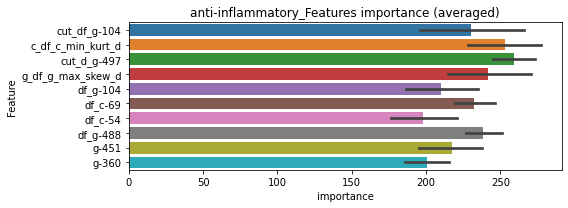

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0359754	valid_1's binary_logloss: 0.0692578
[600]	training's binary_logloss: 0.0108453	valid_1's binary_logloss: 0.0368194
[900]	training's binary_logloss: 0.00544113	valid_1's binary_logloss: 0.0280131
[1200]	training's binary_logloss: 0.00348405	valid_1's binary_logloss: 0.0244905
[1500]	training's binary_logloss: 0.00254279	valid_1's binary_logloss: 0.0225152
[1800]	training's binary_logloss: 0.00200091	valid_1's binary_logloss: 0.0214119
Early stopping, best iteration is:
[1897]	training's binary_logloss: 0.00187637	valid_1's binary_logloss: 0.0211517


len(train_index) : 2821
len(valid_index) : 940
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362055	valid_1's binary_logloss: 0.0629155
[600]	training's binary_logloss: 0.0109335	valid_1's binary_logloss: 0.0310287
[900]	training's binary_logloss: 0.0054761	valid_1's binary_logloss: 0.0225533
[1200]	training's binary_logloss: 0.00351	valid_1's binary_logloss: 0.0189537
[1500]	training's binary_logloss: 0.00255603	valid_1's binary_logloss: 0.0170412
[1800]	training's binary_logloss: 0.00201557	valid_1's binary_logloss: 0.0158699
Early stopping, best iteration is:
[1785]	training's binary_logloss: 0.00203653	valid_1's binary_logloss: 0.0158604


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0351769	valid_1's binary_logloss: 0.0768466
[600]	training's binary_logloss: 0.0106124	valid_1's binary_logloss: 0.0447207
[900]	training's binary_logloss: 0.00531548	valid_1's binary_logloss: 0.0359049
[1200]	training's binary_logloss: 0.00340933	valid_1's binary_logloss: 0.0323276
[1500]	training's binary_logloss: 0.00248778	valid_1's binary_logloss: 0.0300673
[1800]	training's binary_logloss: 0.00196389	valid_1's binary_logloss: 0.0288849
Early stopping, best iteration is:
[1798]	training's binary_logloss: 0.001966	valid_1's binary_logloss: 0.0288669


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0359766	valid_1's binary_logloss: 0.0677616
[600]	training's binary_logloss: 0.0107209	valid_1's binary_logloss: 0.0361368
[900]	training's binary_logloss: 0.00537859	valid_1's binary_logloss: 0.0276279
[1200]	training's binary_logloss: 0.0034354	valid_1's binary_logloss: 0.0240507
[1500]	training's binary_logloss: 0.00251321	valid_1's binary_logloss: 0.022107
Early stopping, best iteration is:
[1631]	training's binary_logloss: 0.00224914	valid_1's binary_logloss: 0.0213474


anti-inflammatory logloss: 0.021806429837277954


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674599	valid_1's binary_logloss: 0.0147515
[600]	training's binary_logloss: 0.000832682	valid_1's binary_logloss: 0.00417848
[900]	training's binary_logloss: 0.000448174	valid_1's binary_logloss: 0.00314895
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000446627	valid_1's binary_logloss: 0.00314285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725205	valid_1's binary_logloss: 0.0145444
[600]	training's binary_logloss: 0.000879136	valid_1's binary_logloss: 0.00489079
[900]	training's binary_logloss: 0.000457508	valid_1's binary_logloss: 0.00394731
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000443322	valid_1's binary_logloss: 0.00392888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693735	valid_1's binary_logloss: 0.0123142
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0025550, Threshold: 0.0074556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00522, conf_1:0.00969
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0074556
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0274556
threshold: 0.0274556, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640167	valid_1's binary_logloss: 0.0126291
[600]	training's binary_logloss: 0.000807013	valid_1's binary_logloss: 0.00347138
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000453081	valid_1's binary_logloss: 0.00263306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640678	valid_1's binary_logloss: 0.01372
[600]	training's binary_logloss: 0.000817851	valid_1's binary_logloss: 0.00520138
[900]	training's binary_logloss: 0.000440787	valid_1's binary_logloss: 0.00444975
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000418147	valid_1's binary_logloss: 0.00441394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651272	valid_1's binary_logloss: 0.0114856
[600]	training's binary_logloss: 0.000823431	valid_1's binary_logloss: 0.00363385
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0215669, Threshold: 0.0274556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00101, Num_p_label: 12.0, conf_0:0.02196, conf_1:0.03295
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0274556
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.0474556
threshold: 0.0474556, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640167	valid_1's binary_logloss: 0.0126291
[600]	training's binary_logloss: 0.000807013	valid_1's binary_logloss: 0.00347138
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000453081	valid_1's binary_logloss: 0.00263306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640678	valid_1's binary_logloss: 0.01372
[600]	training's binary_logloss: 0.000817851	valid_1's binary_logloss: 0.00520138
[900]	training's binary_logloss: 0.000440787	valid_1's binary_logloss: 0.00444975
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000418147	valid_1's binary_logloss: 0.00441394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651272	valid_1's binary_logloss: 0.0114856
[600]	training's binary_logloss: 0.000823431	valid_1's binary_logloss: 0.00363385
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0215669, Threshold: 0.0474556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.04271, conf_1:0.05220
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0474556
threshold: 0.0474556, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


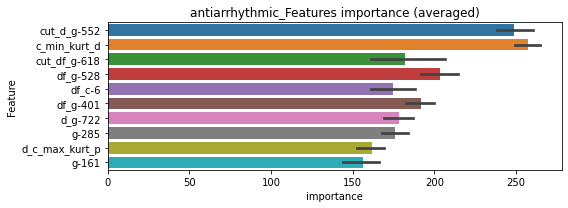

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152302	valid_1's binary_logloss: 0.0245601
[600]	training's binary_logloss: 0.00400043	valid_1's binary_logloss: 0.00977819
[900]	training's binary_logloss: 0.00210056	valid_1's binary_logloss: 0.00661589
[1200]	training's binary_logloss: 0.00141535	valid_1's binary_logloss: 0.00517154
[1500]	training's binary_logloss: 0.00108157	valid_1's binary_logloss: 0.00444643
[1800]	training's binary_logloss: 0.000882154	valid_1's binary_logloss: 0.00392856
[2100]	training's binary_logloss: 0.000755801	valid_1's binary_logloss: 0.00361495
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.000727668	valid_1's binary_logloss: 0.00353417


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153067	valid_1's binary_logloss: 0.0228303
[600]	training's binary_logloss: 0.00403245	valid_1's binary_logloss: 0.00901008
[900]	training's binary_logloss: 0.00211585	valid_1's binary_logloss: 0.00629722
[1200]	training's binary_logloss: 0.00142836	valid_1's binary_logloss: 0.00520243
[1500]	training's binary_logloss: 0.00109056	valid_1's binary_logloss: 0.00461608
[1800]	training's binary_logloss: 0.000890165	valid_1's binary_logloss: 0.00425365
[2100]	training's binary_logloss: 0.000762426	valid_1's binary_logloss: 0.00399821
[2400]	training's binary_logloss: 0.000672631	valid_1's binary_logloss: 0.00381258
[2700]	training's binary_logloss: 0.000607313	valid_1's binary_logloss: 0.00366854
[3000]	training's binary_logloss: 0.000557984	valid_1's binary_logloss: 0.00356807
[3300]	training's binary_logloss: 0.000519712	valid_1's binary_logloss: 0.00348507
[3600]	training's binary_logloss: 0.

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154613	valid_1's binary_logloss: 0.0207458
[600]	training's binary_logloss: 0.00408585	valid_1's binary_logloss: 0.00750831
[900]	training's binary_logloss: 0.00213611	valid_1's binary_logloss: 0.00489808
[1200]	training's binary_logloss: 0.0014345	valid_1's binary_logloss: 0.00387011
[1500]	training's binary_logloss: 0.00109507	valid_1's binary_logloss: 0.00333837
[1800]	training's binary_logloss: 0.000894002	valid_1's binary_logloss: 0.00301515
[2100]	training's binary_logloss: 0.000763427	valid_1's binary_logloss: 0.00274413
[2400]	training's binary_logloss: 0.000675078	valid_1's binary_logloss: 0.0025686
[2700]	training's binary_logloss: 0.00060841	valid_1's binary_logloss: 0.00242947
[3000]	training's binary_logloss: 0.000558235	valid_1's binary_logloss: 0.00232668
[3300]	training's binary_logloss: 0.000521461	valid_1's binary_logloss: 0.00225069
[3600]	training's binary_logloss: 0.000

len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151681	valid_1's binary_logloss: 0.0246897
[600]	training's binary_logloss: 0.00399678	valid_1's binary_logloss: 0.009769
[900]	training's binary_logloss: 0.0020972	valid_1's binary_logloss: 0.00668442
[1200]	training's binary_logloss: 0.00142023	valid_1's binary_logloss: 0.00544266
[1500]	training's binary_logloss: 0.001081	valid_1's binary_logloss: 0.00476548
[1800]	training's binary_logloss: 0.00088351	valid_1's binary_logloss: 0.00428725
[2100]	training's binary_logloss: 0.000755394	valid_1's binary_logloss: 0.00398519
[2400]	training's binary_logloss: 0.000667343	valid_1's binary_logloss: 0.00376148
[2700]	training's binary_logloss: 0.000603192	valid_1's binary_logloss: 0.0035963
[3000]	training's binary_logloss: 0.000554783	valid_1's binary_logloss: 0.00348783
[3300]	training's binary_logloss: 0.000516391	valid_1's binary_logloss: 0.00337772
[3600]	training's binary_logloss: 0.0004873

antiarrhythmic logloss: 0.0030570980312281384


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281, target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119334	valid_1's binary_logloss: 0.034809
[600]	training's binary_logloss: 0.00160087	valid_1's binary_logloss: 0.0162481
[900]	training's binary_logloss: 0.00070004	valid_1's binary_logloss: 0.0131397
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000592103	valid_1's binary_logloss: 0.0127287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120746	valid_1's binary_logloss: 0.0287621
[600]	training's binary_logloss: 0.00158547	valid_1's binary_logloss: 0.0123575
[900]	training's binary_logloss: 0.000699493	valid_1's binary_logloss: 0.0103254
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000579408	valid_1's binary_logloss: 0.0100139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128424	valid_1's binary_logloss: 0.0207919
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0053388, Threshold: 0.0436905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181, Num_p_label: 40.0, conf_0:0.03058, conf_1:0.05680
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0436905
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_2: 0.0636905
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_3: 0.0836905
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_4: 0.1036905
threshold: 0.1036905, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109457	valid_1's binary_logloss: 0.0322947
[600]	training's binary_logloss: 0.00147444	valid_1's binary_logloss: 0.0143694
[900]	training's binary_logloss: 0.000665986	valid_1's binary_logloss: 0.0116583
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.00056882	valid_1's binary_logloss: 0.0111869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112053	valid_1's binary_logloss: 0.0244891
[600]	training's binary_logloss: 0.00148293	valid_1's binary_logloss: 0.00961145
[900]	training's binary_logloss: 0.000666753	valid_1's binary_logloss: 0.008035
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000563744	valid_1's binary_logloss: 0.00776271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115307	valid_1's binary_logloss: 0.0199996
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0415230, Threshold: 0.1036905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0118031 Vs.target_rate: 0.00181, Num_p_label: 47.0, conf_0:0.08295, conf_1:0.12443
Num_p_label: 47.0, Expected: 7.2, Adj_threshold_1: 0.1036905
Num_p_label: 41.0, Expected: 7.2, Adj_threshold_2: 0.1236905
Num_p_label: 32.0, Expected: 7.2, Adj_threshold_3: 0.1436905
Num_p_label: 27.0, Expected: 7.2, Adj_threshold_4: 0.1636905
Num_p_label: 25.0, Expected: 7.2, Adj_threshold_5: 0.1836905
Num_p_label: 23.0, Expected: 7.2, Adj_threshold_6: 0.2036905
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_7: 0.2236905
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_8: 0.2436905
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_9: 0.2636905
threshold: 0.2636905, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109573	valid_1's binary_logloss: 0.0247325
[600]	training's binary_logloss: 0.00147615	valid_1's binary_logloss: 0.0097819
[900]	training's binary_logloss: 0.000664182	valid_1's binary_logloss: 0.00818862
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000566378	valid_1's binary_logloss: 0.00796871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113855	valid_1's binary_logloss: 0.0229094
[600]	training's binary_logloss: 0.00151456	valid_1's binary_logloss: 0.00703353
[900]	training's binary_logloss: 0.000672681	valid_1's binary_logloss: 0.00492485
Early stopping, best iteration is:
[1075]	training's binary_logloss: 0.000560748	valid_1's binary_logloss: 0.00465601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010988	valid_1's binary_logloss: 0.0242776
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0276734, Threshold: 0.2636905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00181, Num_p_label: 21.0, conf_0:0.23732, conf_1:0.29006
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_1: 0.2636905
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.2836905
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_3: 0.3036905
threshold: 0.3036905, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


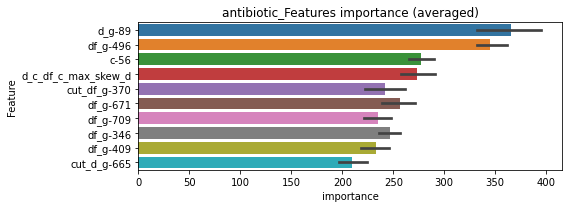

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235306	valid_1's binary_logloss: 0.0412995
[600]	training's binary_logloss: 0.00661559	valid_1's binary_logloss: 0.0186913
[900]	training's binary_logloss: 0.00338989	valid_1's binary_logloss: 0.0134924
[1200]	training's binary_logloss: 0.00223431	valid_1's binary_logloss: 0.0114321
[1500]	training's binary_logloss: 0.00166027	valid_1's binary_logloss: 0.0103826
[1800]	training's binary_logloss: 0.00133063	valid_1's binary_logloss: 0.00971525
Early stopping, best iteration is:
[1785]	training's binary_logloss: 0.0013427	valid_1's binary_logloss: 0.00970453


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024102	valid_1's binary_logloss: 0.0370102
[600]	training's binary_logloss: 0.00671967	valid_1's binary_logloss: 0.0143231
[900]	training's binary_logloss: 0.00342848	valid_1's binary_logloss: 0.00919378
[1200]	training's binary_logloss: 0.00224935	valid_1's binary_logloss: 0.00709262
[1500]	training's binary_logloss: 0.00167969	valid_1's binary_logloss: 0.00607109
[1800]	training's binary_logloss: 0.00134699	valid_1's binary_logloss: 0.00541062
[2100]	training's binary_logloss: 0.00113383	valid_1's binary_logloss: 0.00493542
[2400]	training's binary_logloss: 0.000985239	valid_1's binary_logloss: 0.00459982
[2700]	training's binary_logloss: 0.000876686	valid_1's binary_logloss: 0.0043559
[3000]	training's binary_logloss: 0.000795769	valid_1's binary_logloss: 0.00415113
[3300]	training's binary_logloss: 0.000732279	valid_1's binary_logloss: 0.00401728
[3600]	training's binary_logloss: 0.00068

len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236673	valid_1's binary_logloss: 0.0389073
[600]	training's binary_logloss: 0.0065675	valid_1's binary_logloss: 0.0174543
[900]	training's binary_logloss: 0.0033483	valid_1's binary_logloss: 0.0124699
[1200]	training's binary_logloss: 0.00219334	valid_1's binary_logloss: 0.0107766
[1500]	training's binary_logloss: 0.0016393	valid_1's binary_logloss: 0.00985964
[1800]	training's binary_logloss: 0.00131714	valid_1's binary_logloss: 0.0091483
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.00131996	valid_1's binary_logloss: 0.00914166


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233812	valid_1's binary_logloss: 0.0415996
[600]	training's binary_logloss: 0.00656816	valid_1's binary_logloss: 0.0195973
[900]	training's binary_logloss: 0.00336301	valid_1's binary_logloss: 0.0142126
[1200]	training's binary_logloss: 0.00221007	valid_1's binary_logloss: 0.0118916
[1500]	training's binary_logloss: 0.00164714	valid_1's binary_logloss: 0.0105564
[1800]	training's binary_logloss: 0.00132417	valid_1's binary_logloss: 0.0097166
Early stopping, best iteration is:
[1792]	training's binary_logloss: 0.00133077	valid_1's binary_logloss: 0.00970947


antibiotic logloss: 0.008075532823288541


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399223	valid_1's binary_logloss: 0.00776079
[600]	training's binary_logloss: 0.000560305	valid_1's binary_logloss: 0.00198419
[900]	training's binary_logloss: 0.000321753	valid_1's binary_logloss: 0.00138134
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000318772	valid_1's binary_logloss: 0.00137162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397947	valid_1's binary_logloss: 0.010105
[600]	training's binary_logloss: 0.000547601	valid_1's binary_logloss: 0.00360696
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000335972	valid_1's binary_logloss: 0.00307173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391784	valid_1's binary_logloss: 0.00859266
[600]	training's binary_logloss: 0.000544605	valid_1's binary_logloss: 0.0047067
Early stopping,

1 / 3 AUC score:1.000
y_Threshold: 0.0018716, Threshold: 0.0057244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00401, conf_1:0.00744
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0057244
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0257244
threshold: 0.0257244, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383372	valid_1's binary_logloss: 0.00548803
[600]	training's binary_logloss: 0.000538946	valid_1's binary_logloss: 0.00107391
[900]	training's binary_logloss: 0.000316393	valid_1's binary_logloss: 0.000723369
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000312768	valid_1's binary_logloss: 0.000719981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382338	valid_1's binary_logloss: 0.00942681
[600]	training's binary_logloss: 0.000524778	valid_1's binary_logloss: 0.00337495
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000322817	valid_1's binary_logloss: 0.00282997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372453	valid_1's binary_logloss: 0.0085869
[600]	training's binary_logloss: 0.000527814	valid_1's binary_logloss: 0.00518585
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.0092004, Threshold: 0.0257244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00076, Num_p_label: 18.0, conf_0:0.02058, conf_1:0.03087
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0257244
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0457244
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0657244
threshold: 0.0657244, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383372	valid_1's binary_logloss: 0.00548803
[600]	training's binary_logloss: 0.000538946	valid_1's binary_logloss: 0.00107391
[900]	training's binary_logloss: 0.000316393	valid_1's binary_logloss: 0.000723369
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000312768	valid_1's binary_logloss: 0.000719981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382338	valid_1's binary_logloss: 0.00942681
[600]	training's binary_logloss: 0.000524778	valid_1's binary_logloss: 0.00337495
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000322817	valid_1's binary_logloss: 0.00282997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372453	valid_1's binary_logloss: 0.0085869
[600]	training's binary_logloss: 0.000527814	valid_1's binary_logloss: 0.00518585
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.0092004, Threshold: 0.0657244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076, Num_p_label: 4.0, conf_0:0.05915, conf_1:0.07230
threshold: 0.0657244, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


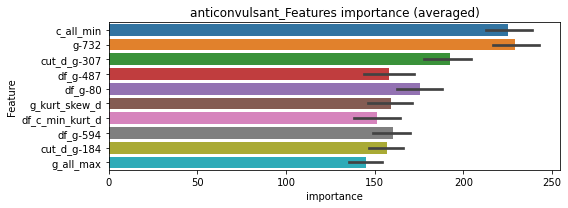

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107352	valid_1's binary_logloss: 0.0131472
[600]	training's binary_logloss: 0.00286964	valid_1's binary_logloss: 0.00406659
[900]	training's binary_logloss: 0.00153046	valid_1's binary_logloss: 0.00233874
[1200]	training's binary_logloss: 0.00104548	valid_1's binary_logloss: 0.00169969
[1500]	training's binary_logloss: 0.00080147	valid_1's binary_logloss: 0.00136407
[1800]	training's binary_logloss: 0.000657328	valid_1's binary_logloss: 0.00116079
[2100]	training's binary_logloss: 0.000566899	valid_1's binary_logloss: 0.00102788
[2400]	training's binary_logloss: 0.000502152	valid_1's binary_logloss: 0.000928429
[2700]	training's binary_logloss: 0.000455775	valid_1's binary_logloss: 0.000856135
[3000]	training's binary_logloss: 0.000420103	valid_1's binary_logloss: 0.000802332
[3300]	training's binary_logloss: 0.000392641	valid_1's binary_logloss: 0.000760114
[3600]	training's binary_logloss

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105252	valid_1's binary_logloss: 0.0174846
[600]	training's binary_logloss: 0.00280716	valid_1's binary_logloss: 0.00716942
[900]	training's binary_logloss: 0.0014994	valid_1's binary_logloss: 0.00502535
[1200]	training's binary_logloss: 0.00102482	valid_1's binary_logloss: 0.0041746
[1500]	training's binary_logloss: 0.000787524	valid_1's binary_logloss: 0.00372476
[1800]	training's binary_logloss: 0.000649602	valid_1's binary_logloss: 0.00343523
[2100]	training's binary_logloss: 0.000559633	valid_1's binary_logloss: 0.00321783
[2400]	training's binary_logloss: 0.000496365	valid_1's binary_logloss: 0.00307115
[2700]	training's binary_logloss: 0.000449566	valid_1's binary_logloss: 0.00295204
[3000]	training's binary_logloss: 0.00041386	valid_1's binary_logloss: 0.00285046
[3300]	training's binary_logloss: 0.000387392	valid_1's binary_logloss: 0.00279012
[3600]	training's binary_logloss: 0.00

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105549	valid_1's binary_logloss: 0.015102
[600]	training's binary_logloss: 0.00282029	valid_1's binary_logloss: 0.00696633
[900]	training's binary_logloss: 0.00150186	valid_1's binary_logloss: 0.00559582
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.00123671	valid_1's binary_logloss: 0.00526935


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106343	valid_1's binary_logloss: 0.0170287
[600]	training's binary_logloss: 0.00285488	valid_1's binary_logloss: 0.00656944
[900]	training's binary_logloss: 0.00151507	valid_1's binary_logloss: 0.00431372
[1200]	training's binary_logloss: 0.00103513	valid_1's binary_logloss: 0.00341327
Early stopping, best iteration is:
[1354]	training's binary_logloss: 0.000891275	valid_1's binary_logloss: 0.00310398


anticonvulsant logloss: 0.002936960142811964


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00566306	valid_1's binary_logloss: 0.011083
[600]	training's binary_logloss: 0.000774764	valid_1's binary_logloss: 0.0029113
[900]	training's binary_logloss: 0.000411039	valid_1's binary_logloss: 0.00197749
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000401207	valid_1's binary_logloss: 0.00195256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521058	valid_1's binary_logloss: 0.0125297
[600]	training's binary_logloss: 0.00074328	valid_1's binary_logloss: 0.00519215
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000411378	valid_1's binary_logloss: 0.0044639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540567	valid_1's binary_logloss: 0.00828992
[600]	training's binary_logloss: 0.000760099	valid_1's binary_logloss: 0.00169245
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0022044, Threshold: 0.0076442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.00535, conf_1:0.00994
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0076442
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_2: 0.0276442
threshold: 0.0276442, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512567	valid_1's binary_logloss: 0.0103469
[600]	training's binary_logloss: 0.000729461	valid_1's binary_logloss: 0.00267038
[900]	training's binary_logloss: 0.000395692	valid_1's binary_logloss: 0.00186398
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000390279	valid_1's binary_logloss: 0.00184699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496523	valid_1's binary_logloss: 0.011791
[600]	training's binary_logloss: 0.000713969	valid_1's binary_logloss: 0.00505013
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000466584	valid_1's binary_logloss: 0.00453553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525699	valid_1's binary_logloss: 0.00761451
[600]	training's binary_logloss: 0.000725244	valid_1's binary_logloss: 0.00148875
[900]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.0181643, Threshold: 0.0276442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00109, Num_p_label: 12.0, conf_0:0.02212, conf_1:0.03317
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0276442
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_2: 0.0476442
threshold: 0.0476442, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512567	valid_1's binary_logloss: 0.0103469
[600]	training's binary_logloss: 0.000729461	valid_1's binary_logloss: 0.00267038
[900]	training's binary_logloss: 0.000395692	valid_1's binary_logloss: 0.00186398
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000390279	valid_1's binary_logloss: 0.00184699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496523	valid_1's binary_logloss: 0.011791
[600]	training's binary_logloss: 0.000713969	valid_1's binary_logloss: 0.00505013
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000466584	valid_1's binary_logloss: 0.00453553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525699	valid_1's binary_logloss: 0.00761451
[600]	training's binary_logloss: 0.000725244	valid_1's binary_logloss: 0.00148875
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0181643, Threshold: 0.0476442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00109, Num_p_label: 5.0, conf_0:0.04288, conf_1:0.05241
threshold: 0.0476442, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


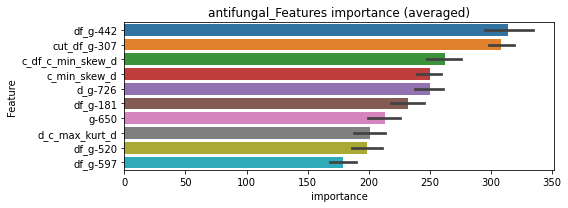

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136424	valid_1's binary_logloss: 0.0206768
[600]	training's binary_logloss: 0.00369125	valid_1's binary_logloss: 0.00725859
[900]	training's binary_logloss: 0.00194207	valid_1's binary_logloss: 0.00450971
[1200]	training's binary_logloss: 0.00130697	valid_1's binary_logloss: 0.00337742
[1500]	training's binary_logloss: 0.000993832	valid_1's binary_logloss: 0.00278819
[1800]	training's binary_logloss: 0.000811423	valid_1's binary_logloss: 0.00242902
[2100]	training's binary_logloss: 0.000692816	valid_1's binary_logloss: 0.00218971
[2400]	training's binary_logloss: 0.000610765	valid_1's binary_logloss: 0.00199546
[2700]	training's binary_logloss: 0.000550992	valid_1's binary_logloss: 0.00185749
[3000]	training's binary_logloss: 0.000505668	valid_1's binary_logloss: 0.00176339
[3300]	training's binary_logloss: 0.000471451	valid_1's binary_logloss: 0.00168936
[3600]	training's binary_logloss: 0

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136737	valid_1's binary_logloss: 0.021974
[600]	training's binary_logloss: 0.00364966	valid_1's binary_logloss: 0.00885971
[900]	training's binary_logloss: 0.00191847	valid_1's binary_logloss: 0.00633578
[1200]	training's binary_logloss: 0.00129611	valid_1's binary_logloss: 0.00527171
[1500]	training's binary_logloss: 0.000984767	valid_1's binary_logloss: 0.00475718
[1800]	training's binary_logloss: 0.000802393	valid_1's binary_logloss: 0.00440879
[2100]	training's binary_logloss: 0.000686453	valid_1's binary_logloss: 0.00421064
[2400]	training's binary_logloss: 0.000604542	valid_1's binary_logloss: 0.0040466
Early stopping, best iteration is:
[2474]	training's binary_logloss: 0.000588216	valid_1's binary_logloss: 0.0040124


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139246	valid_1's binary_logloss: 0.0171935
[600]	training's binary_logloss: 0.00372152	valid_1's binary_logloss: 0.00531334
[900]	training's binary_logloss: 0.00195222	valid_1's binary_logloss: 0.00304693
[1200]	training's binary_logloss: 0.00131454	valid_1's binary_logloss: 0.00218145
[1500]	training's binary_logloss: 0.00100096	valid_1's binary_logloss: 0.00174435
[1800]	training's binary_logloss: 0.000816367	valid_1's binary_logloss: 0.00148187
[2100]	training's binary_logloss: 0.000695901	valid_1's binary_logloss: 0.00130158
[2400]	training's binary_logloss: 0.000612255	valid_1's binary_logloss: 0.00117829
[2700]	training's binary_logloss: 0.000552089	valid_1's binary_logloss: 0.00108638
[3000]	training's binary_logloss: 0.000506915	valid_1's binary_logloss: 0.00102166
[3300]	training's binary_logloss: 0.000471861	valid_1's binary_logloss: 0.000968557
[3600]	training's binary_logloss: 0

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139051	valid_1's binary_logloss: 0.0220416
[600]	training's binary_logloss: 0.00372821	valid_1's binary_logloss: 0.00915475
[900]	training's binary_logloss: 0.00194807	valid_1's binary_logloss: 0.00661656
[1200]	training's binary_logloss: 0.0013061	valid_1's binary_logloss: 0.0055798
[1500]	training's binary_logloss: 0.000996146	valid_1's binary_logloss: 0.00506014
[1800]	training's binary_logloss: 0.000812189	valid_1's binary_logloss: 0.00470165
[2100]	training's binary_logloss: 0.000694658	valid_1's binary_logloss: 0.00447007
[2400]	training's binary_logloss: 0.000611205	valid_1's binary_logloss: 0.00431441
[2700]	training's binary_logloss: 0.000551085	valid_1's binary_logloss: 0.00419147
[3000]	training's binary_logloss: 0.000505798	valid_1's binary_logloss: 0.00409166
[3300]	training's binary_logloss: 0.000471933	valid_1's binary_logloss: 0.00400995
Early stopping, best iteration is:
[3

antifungal logloss: 0.002608551645137246


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00482399	valid_1's binary_logloss: 0.00802319
[600]	training's binary_logloss: 0.000638191	valid_1's binary_logloss: 0.00188609
[900]	training's binary_logloss: 0.000377406	valid_1's binary_logloss: 0.00135218
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000373679	valid_1's binary_logloss: 0.00134414
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046579	valid_1's binary_logloss: 0.0111685
[600]	training's binary_logloss: 0.000611683	valid_1's binary_logloss: 0.00374796
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000385175	valid_1's binary_logloss: 0.0029883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467202	valid_1's binary_logloss: 0.00836617
[600]	training's binary_logloss: 0.000628684	valid_1's binary_logloss: 0.00198861
Early stopping,

1 / 3 AUC score:1.000
y_Threshold: 0.0023949, Threshold: 0.0718884, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.05032, conf_1:0.09345
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0718884
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.0918884
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.1118884
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1318884
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_5: 0.1518884
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.1718884
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.1918884
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_8: 0.2118884
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.2318884
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_10: 0.2518884
threshold: 0.2718884, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423108	valid_1's binary_logloss: 0.00755273
[600]	training's binary_logloss: 0.000573919	valid_1's binary_logloss: 0.00167175
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000360213	valid_1's binary_logloss: 0.00123162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407319	valid_1's binary_logloss: 0.0106573
[600]	training's binary_logloss: 0.000560101	valid_1's binary_logloss: 0.00389193
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.00036206	valid_1's binary_logloss: 0.00325227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426939	valid_1's binary_logloss: 0.00629937
[600]	training's binary_logloss: 0.000585325	valid_1's binary_logloss: 0.00116626
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000358254	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0568528, Threshold: 0.2718884, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00076, Num_p_label: 43.0, conf_0:0.21751, conf_1:0.32627
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.2718884
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.2918884
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.3118884
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_4: 0.3318884
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_5: 0.3518884
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_6: 0.3718884
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_7: 0.3918884
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_8: 0.4118884
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_9: 0.4318884
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_10: 0.4518884
threshold: 0.4718884, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423108	valid_1's binary_logloss: 0.00755273
[600]	training's binary_logloss: 0.000573919	valid_1's binary_logloss: 0.00167175
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000360213	valid_1's binary_logloss: 0.00123162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407319	valid_1's binary_logloss: 0.0106573
[600]	training's binary_logloss: 0.000560101	valid_1's binary_logloss: 0.00389193
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.00036206	valid_1's binary_logloss: 0.00325227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426939	valid_1's binary_logloss: 0.00629937
[600]	training's binary_logloss: 0.000585325	valid_1's binary_logloss: 0.00116626
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000358254	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0568528, Threshold: 0.4718884, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0082873 Vs.target_rate: 0.00076, Num_p_label: 33.0, conf_0:0.42470, conf_1:0.51908
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_1: 0.4718884
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.4918884
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_3: 0.5118884
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_4: 0.5318884
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_5: 0.5518884
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.5718884
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_7: 0.5918884
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_8: 0.6118884
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_9: 0.6318884
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_10: 0.6518884
threshold: 0.6718884, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


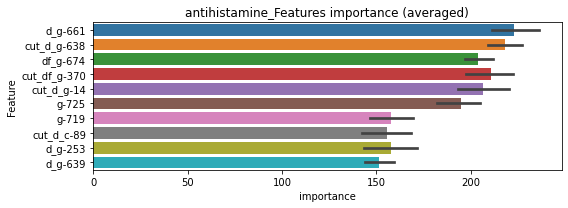

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114562	valid_1's binary_logloss: 0.0157342
[600]	training's binary_logloss: 0.00298424	valid_1's binary_logloss: 0.00511207
[900]	training's binary_logloss: 0.00158792	valid_1's binary_logloss: 0.00311035
[1200]	training's binary_logloss: 0.00108507	valid_1's binary_logloss: 0.00232145
[1500]	training's binary_logloss: 0.000834672	valid_1's binary_logloss: 0.00189534
[1800]	training's binary_logloss: 0.000686241	valid_1's binary_logloss: 0.00163211
[2100]	training's binary_logloss: 0.000589171	valid_1's binary_logloss: 0.0014673
[2400]	training's binary_logloss: 0.000523058	valid_1's binary_logloss: 0.00134262
[2700]	training's binary_logloss: 0.000474545	valid_1's binary_logloss: 0.00124628
[3000]	training's binary_logloss: 0.000437743	valid_1's binary_logloss: 0.00117658
[3300]	training's binary_logloss: 0.000410365	valid_1's binary_logloss: 0.00112086
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112157	valid_1's binary_logloss: 0.0177692
[600]	training's binary_logloss: 0.00295905	valid_1's binary_logloss: 0.00701056
[900]	training's binary_logloss: 0.00157677	valid_1's binary_logloss: 0.00477698
[1200]	training's binary_logloss: 0.00107412	valid_1's binary_logloss: 0.0037989
[1500]	training's binary_logloss: 0.000827546	valid_1's binary_logloss: 0.00330764
[1800]	training's binary_logloss: 0.000681523	valid_1's binary_logloss: 0.00298243
[2100]	training's binary_logloss: 0.000586496	valid_1's binary_logloss: 0.00274455
[2400]	training's binary_logloss: 0.000520821	valid_1's binary_logloss: 0.00258229
[2700]	training's binary_logloss: 0.000471822	valid_1's binary_logloss: 0.00246194
[3000]	training's binary_logloss: 0.000436011	valid_1's binary_logloss: 0.00237844
[3300]	training's binary_logloss: 0.000410688	valid_1's binary_logloss: 0.00231431
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115046	valid_1's binary_logloss: 0.0145553
[600]	training's binary_logloss: 0.00302116	valid_1's binary_logloss: 0.00437521
[900]	training's binary_logloss: 0.00159808	valid_1's binary_logloss: 0.00250656
[1200]	training's binary_logloss: 0.00109134	valid_1's binary_logloss: 0.00181539
[1500]	training's binary_logloss: 0.000839283	valid_1's binary_logloss: 0.00145494
[1800]	training's binary_logloss: 0.000689272	valid_1's binary_logloss: 0.00123226
[2100]	training's binary_logloss: 0.000593052	valid_1's binary_logloss: 0.00108735
[2400]	training's binary_logloss: 0.000525843	valid_1's binary_logloss: 0.000985007
[2700]	training's binary_logloss: 0.00047654	valid_1's binary_logloss: 0.000907223
[3000]	training's binary_logloss: 0.000440952	valid_1's binary_logloss: 0.000849821
[3300]	training's binary_logloss: 0.000413596	valid_1's binary_logloss: 0.000805496
[3600]	training's binary_logloss

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011359	valid_1's binary_logloss: 0.0176363
[600]	training's binary_logloss: 0.00298403	valid_1's binary_logloss: 0.00693854
[900]	training's binary_logloss: 0.00158546	valid_1's binary_logloss: 0.0047182
[1200]	training's binary_logloss: 0.0010791	valid_1's binary_logloss: 0.00378265
[1500]	training's binary_logloss: 0.000829206	valid_1's binary_logloss: 0.00334566
[1800]	training's binary_logloss: 0.000683255	valid_1's binary_logloss: 0.00305873
[2100]	training's binary_logloss: 0.000586811	valid_1's binary_logloss: 0.00284692
[2400]	training's binary_logloss: 0.000520359	valid_1's binary_logloss: 0.00269072
[2700]	training's binary_logloss: 0.000471792	valid_1's binary_logloss: 0.00258045
[3000]	training's binary_logloss: 0.000436267	valid_1's binary_logloss: 0.00250713
[3300]	training's binary_logloss: 0.000410595	valid_1's binary_logloss: 0.00244592
Early stopping, best iteration is:
[32

antihistamine logloss: 0.0016290435487590746


neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529524	valid_1's binary_logloss: 0.00811153
[600]	training's binary_logloss: 0.000647476	valid_1's binary_logloss: 0.00192393
[900]	training's binary_logloss: 0.00039154	valid_1's binary_logloss: 0.00141267
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00039155	valid_1's binary_logloss: 0.00141264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516414	valid_1's binary_logloss: 0.0144495
[600]	training's binary_logloss: 0.000641281	valid_1's binary_logloss: 0.00482134
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000395722	valid_1's binary_logloss: 0.00402774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052102	valid_1's binary_logloss: 0.0079087
[600]	training's binary_logloss: 0.000648594	valid_1's binary_logloss: 0.00153782
[900]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0024212, Threshold: 0.0100873, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00706, conf_1:0.01311
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0100873
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0300873
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0500873
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.0700873
threshold: 0.0700873, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455815	valid_1's binary_logloss: 0.00662355
[600]	training's binary_logloss: 0.000586977	valid_1's binary_logloss: 0.00133196
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000375211	valid_1's binary_logloss: 0.000990633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440567	valid_1's binary_logloss: 0.0123761
[600]	training's binary_logloss: 0.00057416	valid_1's binary_logloss: 0.00473061
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000375337	valid_1's binary_logloss: 0.00410429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467977	valid_1's binary_logloss: 0.00661182
[600]	training's binary_logloss: 0.00059808	valid_1's binary_logloss: 0.00111965
[900]	training's binary_logloss: 0.000375292	valid_1's binary_logloss: 0.000753179
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.1349255, Threshold: 0.0700873, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0070316 Vs.target_rate: 0.00076, Num_p_label: 28.0, conf_0:0.05607, conf_1:0.08410
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_1: 0.0700873
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.0900873
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.1100873
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.1300873
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.1500873
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_6: 0.1700873
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_7: 0.1900873
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_8: 0.2100873
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_9: 0.2300873
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_10: 0.2500873
threshold: 0.2700873, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455815	valid_1's binary_logloss: 0.00662355
[600]	training's binary_logloss: 0.000586977	valid_1's binary_logloss: 0.00133196
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000375211	valid_1's binary_logloss: 0.000990633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440567	valid_1's binary_logloss: 0.0123761
[600]	training's binary_logloss: 0.00057416	valid_1's binary_logloss: 0.00473061
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000375337	valid_1's binary_logloss: 0.00410429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467977	valid_1's binary_logloss: 0.00661182
[600]	training's binary_logloss: 0.00059808	valid_1's binary_logloss: 0.00111965
[900]	training's binary_logloss: 0.000375292	valid_1's binary_logloss: 0.000753179
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.1349255, Threshold: 0.2700873, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00076, Num_p_label: 13.0, conf_0:0.24308, conf_1:0.29710
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.2700873
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.2900873
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.3100873
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.3300873
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.3500873
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3700873
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3900873
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.4100873
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.4300873
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.4500873
threshold: 0.4500873, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


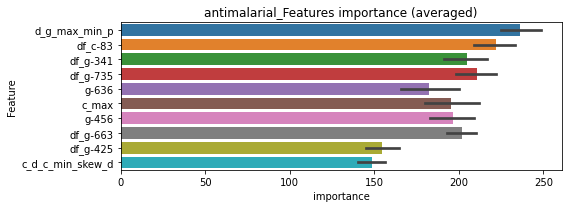

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116147	valid_1's binary_logloss: 0.0151458
[600]	training's binary_logloss: 0.00302683	valid_1's binary_logloss: 0.00478886
[900]	training's binary_logloss: 0.00159717	valid_1's binary_logloss: 0.00283661
[1200]	training's binary_logloss: 0.00108978	valid_1's binary_logloss: 0.00207969
[1500]	training's binary_logloss: 0.000841019	valid_1's binary_logloss: 0.00169207
[1800]	training's binary_logloss: 0.000690778	valid_1's binary_logloss: 0.00144731
[2100]	training's binary_logloss: 0.000594333	valid_1's binary_logloss: 0.001291
[2400]	training's binary_logloss: 0.00052674	valid_1's binary_logloss: 0.0011723
[2700]	training's binary_logloss: 0.000476967	valid_1's binary_logloss: 0.001081
[3000]	training's binary_logloss: 0.000440719	valid_1's binary_logloss: 0.00101938
[3300]	training's binary_logloss: 0.000415577	valid_1's binary_logloss: 0.000975272
[3600]	training's binary_logloss: 0.0003

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114096	valid_1's binary_logloss: 0.0212809
[600]	training's binary_logloss: 0.00298411	valid_1's binary_logloss: 0.00903699
[900]	training's binary_logloss: 0.00157559	valid_1's binary_logloss: 0.00632213
[1200]	training's binary_logloss: 0.00107304	valid_1's binary_logloss: 0.00517675
[1500]	training's binary_logloss: 0.000825326	valid_1's binary_logloss: 0.00459965
[1800]	training's binary_logloss: 0.000680283	valid_1's binary_logloss: 0.00417963
[2100]	training's binary_logloss: 0.000585747	valid_1's binary_logloss: 0.00389653
[2400]	training's binary_logloss: 0.000518873	valid_1's binary_logloss: 0.0037026
[2700]	training's binary_logloss: 0.00047116	valid_1's binary_logloss: 0.00355545
[3000]	training's binary_logloss: 0.000435324	valid_1's binary_logloss: 0.00343672
[3300]	training's binary_logloss: 0.00040895	valid_1's binary_logloss: 0.00335268
[3600]	training's binary_logloss: 0.00

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119648	valid_1's binary_logloss: 0.0148481
[600]	training's binary_logloss: 0.00305526	valid_1's binary_logloss: 0.00431273
[900]	training's binary_logloss: 0.00161047	valid_1's binary_logloss: 0.00244245
[1200]	training's binary_logloss: 0.00109855	valid_1's binary_logloss: 0.00173684
[1500]	training's binary_logloss: 0.000844526	valid_1's binary_logloss: 0.00138392
[1800]	training's binary_logloss: 0.000693841	valid_1's binary_logloss: 0.00116688
[2100]	training's binary_logloss: 0.000596947	valid_1's binary_logloss: 0.00102521
[2400]	training's binary_logloss: 0.000529998	valid_1's binary_logloss: 0.0009259
[2700]	training's binary_logloss: 0.000480324	valid_1's binary_logloss: 0.00085343
[3000]	training's binary_logloss: 0.000444127	valid_1's binary_logloss: 0.000798565
[3300]	training's binary_logloss: 0.000418812	valid_1's binary_logloss: 0.000760826
[3600]	training's binary_logloss: 

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116082	valid_1's binary_logloss: 0.0168043
[600]	training's binary_logloss: 0.0030213	valid_1's binary_logloss: 0.00622391
[900]	training's binary_logloss: 0.00160561	valid_1's binary_logloss: 0.00425891
[1200]	training's binary_logloss: 0.00109391	valid_1's binary_logloss: 0.00341269
[1500]	training's binary_logloss: 0.000843195	valid_1's binary_logloss: 0.00296569
[1800]	training's binary_logloss: 0.00069364	valid_1's binary_logloss: 0.00270305
[2100]	training's binary_logloss: 0.000597743	valid_1's binary_logloss: 0.00253949
[2400]	training's binary_logloss: 0.000528703	valid_1's binary_logloss: 0.00239763
[2700]	training's binary_logloss: 0.000480209	valid_1's binary_logloss: 0.00229928
[3000]	training's binary_logloss: 0.000443784	valid_1's binary_logloss: 0.00222755
[3300]	training's binary_logloss: 0.000417445	valid_1's binary_logloss: 0.00217863
[3600]	training's binary_logloss: 0.0

antimalarial logloss: 0.001752816920502912


neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204026	valid_1's binary_logloss: 0.0728048
[600]	training's binary_logloss: 0.00301213	valid_1's binary_logloss: 0.0439293
[900]	training's binary_logloss: 0.00115002	valid_1's binary_logloss: 0.0396612
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.00118775	valid_1's binary_logloss: 0.0395908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212275	valid_1's binary_logloss: 0.0631342
[600]	training's binary_logloss: 0.00310206	valid_1's binary_logloss: 0.0368387
[900]	training's binary_logloss: 0.00117038	valid_1's binary_logloss: 0.033191
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.00100511	valid_1's binary_logloss: 0.0327169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226794	valid_1's binary_logloss: 0.0483093
[600]	training's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0092340, Threshold: 0.0360303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.02522, conf_1:0.04684
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0360303
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_2: 0.0560303
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_3: 0.0760303
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_4: 0.0960303
threshold: 0.0960303, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195871	valid_1's binary_logloss: 0.0775204
[600]	training's binary_logloss: 0.00284815	valid_1's binary_logloss: 0.0621262
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00166568	valid_1's binary_logloss: 0.0612392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196205	valid_1's binary_logloss: 0.05809
[600]	training's binary_logloss: 0.0029068	valid_1's binary_logloss: 0.0312936
[900]	training's binary_logloss: 0.00111892	valid_1's binary_logloss: 0.0267633
Early stopping, best iteration is:
[1155]	training's binary_logloss: 0.000763203	valid_1's binary_logloss: 0.0254852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205032	valid_1's binary_logloss: 0.0495544
[600]	training's binary_logloss: 0.00303495	valid_1's binary_logloss: 0.0243287
[900]	training's binary_logloss

2 / 3 AUC score:0.999
y_Threshold: 0.0268552, Threshold: 0.0960303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0070316 Vs.target_rate: 0.00307, Num_p_label: 28.0, conf_0:0.07682, conf_1:0.11524
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.0960303
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_2: 0.1160303
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_3: 0.1360303
threshold: 0.1360303, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 642.0/3777, y_label_rate: 0.1699762
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177125	valid_1's binary_logloss: 0.0613299
[600]	training's binary_logloss: 0.00263562	valid_1's binary_logloss: 0.0396872
[900]	training's binary_logloss: 0.00104326	valid_1's binary_logloss: 0.0359544
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000871715	valid_1's binary_logloss: 0.0355126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179175	valid_1's binary_logloss: 0.0548981
[600]	training's binary_logloss: 0.00261578	valid_1's binary_logloss: 0.0312844
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00113047	valid_1's binary_logloss: 0.0270862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192884	valid_1's binary_logloss: 0.042246
[600]	training's binary_logloss: 0.00279291	valid_1's binary_logloss: 0.0199233
[900]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0342505, Threshold: 0.1360303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3771
p_label_rate: 0.0050226 Vs.target_rate: 0.00307, Num_p_label: 20.0, conf_0:0.12243, conf_1:0.14963
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_1: 0.1360303
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.1560303
threshold: 0.1560303, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 639.0/3771, y_label_rate: 0.1694511


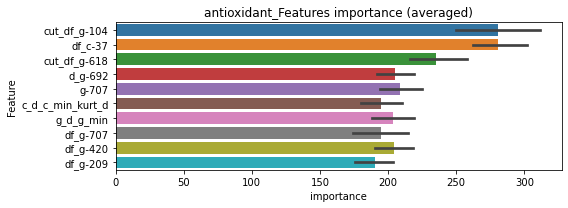

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0340503	valid_1's binary_logloss: 0.0747268
[600]	training's binary_logloss: 0.0102277	valid_1's binary_logloss: 0.0462673
[900]	training's binary_logloss: 0.00510846	valid_1's binary_logloss: 0.0387651
[1200]	training's binary_logloss: 0.00326981	valid_1's binary_logloss: 0.035856
Early stopping, best iteration is:
[1450]	training's binary_logloss: 0.00249796	valid_1's binary_logloss: 0.0341292


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0339925	valid_1's binary_logloss: 0.0651975
[600]	training's binary_logloss: 0.010153	valid_1's binary_logloss: 0.0372741
[900]	training's binary_logloss: 0.00508979	valid_1's binary_logloss: 0.0301775
[1200]	training's binary_logloss: 0.00327402	valid_1's binary_logloss: 0.0268797
[1500]	training's binary_logloss: 0.00239954	valid_1's binary_logloss: 0.0253115
Early stopping, best iteration is:
[1638]	training's binary_logloss: 0.00213582	valid_1's binary_logloss: 0.024771


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0359871	valid_1's binary_logloss: 0.0618037
[600]	training's binary_logloss: 0.0107394	valid_1's binary_logloss: 0.0332455
[900]	training's binary_logloss: 0.0053753	valid_1's binary_logloss: 0.0260689
[1200]	training's binary_logloss: 0.00344371	valid_1's binary_logloss: 0.0233218
[1500]	training's binary_logloss: 0.00249919	valid_1's binary_logloss: 0.0219014
[1800]	training's binary_logloss: 0.00196083	valid_1's binary_logloss: 0.0209648
[2100]	training's binary_logloss: 0.00162606	valid_1's binary_logloss: 0.020462
Early stopping, best iteration is:
[2071]	training's binary_logloss: 0.00165172	valid_1's binary_logloss: 0.0204326


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0342608	valid_1's binary_logloss: 0.0662028
[600]	training's binary_logloss: 0.0101423	valid_1's binary_logloss: 0.0401751
[900]	training's binary_logloss: 0.0051191	valid_1's binary_logloss: 0.033558
[1200]	training's binary_logloss: 0.00327421	valid_1's binary_logloss: 0.0312346
[1500]	training's binary_logloss: 0.00239088	valid_1's binary_logloss: 0.0297355
[1800]	training's binary_logloss: 0.00188382	valid_1's binary_logloss: 0.0289286
Early stopping, best iteration is:
[1787]	training's binary_logloss: 0.00190094	valid_1's binary_logloss: 0.0289043


antioxidant logloss: 0.02705877616455964


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011226	valid_1's binary_logloss: 0.0209229
[600]	training's binary_logloss: 0.00136088	valid_1's binary_logloss: 0.00527993
[900]	training's binary_logloss: 0.000603393	valid_1's binary_logloss: 0.00353436
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.000505051	valid_1's binary_logloss: 0.00329801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010749	valid_1's binary_logloss: 0.0230306
[600]	training's binary_logloss: 0.00131911	valid_1's binary_logloss: 0.0069883
[900]	training's binary_logloss: 0.000596515	valid_1's binary_logloss: 0.00509531
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000524207	valid_1's binary_logloss: 0.00488691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114767	valid_1's binary_logloss: 0.018679
[600]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0038560, Threshold: 0.0168072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01177, conf_1:0.02185
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0168072
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0368072
threshold: 0.0368072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969649	valid_1's binary_logloss: 0.0209315
[600]	training's binary_logloss: 0.00124585	valid_1's binary_logloss: 0.0056446
[900]	training's binary_logloss: 0.000571624	valid_1's binary_logloss: 0.00380366
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000496445	valid_1's binary_logloss: 0.00358854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00984706	valid_1's binary_logloss: 0.0179744
[600]	training's binary_logloss: 0.00127705	valid_1's binary_logloss: 0.00490529
[900]	training's binary_logloss: 0.000585591	valid_1's binary_logloss: 0.00331998
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000517973	valid_1's binary_logloss: 0.00319472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106053	valid_1's binary_logloss: 0.0177794
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0400580, Threshold: 0.0368072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0070316 Vs.target_rate: 0.00151, Num_p_label: 28.0, conf_0:0.02945, conf_1:0.04417
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0368072
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0568072
threshold: 0.0568072, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969649	valid_1's binary_logloss: 0.0209315
[600]	training's binary_logloss: 0.00124585	valid_1's binary_logloss: 0.0056446
[900]	training's binary_logloss: 0.000571624	valid_1's binary_logloss: 0.00380366
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000496445	valid_1's binary_logloss: 0.00358854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00984706	valid_1's binary_logloss: 0.0179744
[600]	training's binary_logloss: 0.00127705	valid_1's binary_logloss: 0.00490529
[900]	training's binary_logloss: 0.000585591	valid_1's binary_logloss: 0.00331998
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000517973	valid_1's binary_logloss: 0.00319472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106053	valid_1's binary_logloss: 0.0177794
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0400580, Threshold: 0.0568072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0037670 Vs.target_rate: 0.00151, Num_p_label: 15.0, conf_0:0.05113, conf_1:0.06249
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.0568072
threshold: 0.0568072, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


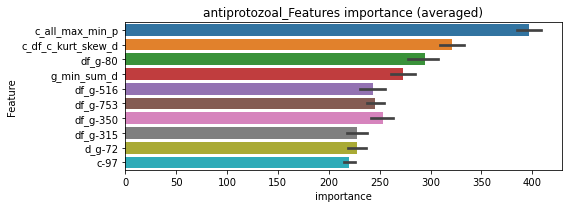

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021141	valid_1's binary_logloss: 0.0362946
[600]	training's binary_logloss: 0.00569171	valid_1's binary_logloss: 0.0150437
[900]	training's binary_logloss: 0.00289639	valid_1's binary_logloss: 0.0100438
[1200]	training's binary_logloss: 0.00190733	valid_1's binary_logloss: 0.00803867
[1500]	training's binary_logloss: 0.00142819	valid_1's binary_logloss: 0.00691555
[1800]	training's binary_logloss: 0.00115109	valid_1's binary_logloss: 0.00622666
[2100]	training's binary_logloss: 0.000970919	valid_1's binary_logloss: 0.00572094
[2400]	training's binary_logloss: 0.000847548	valid_1's binary_logloss: 0.00536647
[2700]	training's binary_logloss: 0.000758048	valid_1's binary_logloss: 0.00509948
[3000]	training's binary_logloss: 0.000690553	valid_1's binary_logloss: 0.00490393
Early stopping, best iteration is:
[3207]	training's binary_logloss: 0.000651875	valid_1's binary_logloss: 0.0047701


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214622	valid_1's binary_logloss: 0.0338402
[600]	training's binary_logloss: 0.00580256	valid_1's binary_logloss: 0.0130819
[900]	training's binary_logloss: 0.00295422	valid_1's binary_logloss: 0.00844413
[1200]	training's binary_logloss: 0.00194379	valid_1's binary_logloss: 0.00673655
[1500]	training's binary_logloss: 0.00145664	valid_1's binary_logloss: 0.00574923
[1800]	training's binary_logloss: 0.00117234	valid_1's binary_logloss: 0.00518176
[2100]	training's binary_logloss: 0.000988063	valid_1's binary_logloss: 0.00476796
[2400]	training's binary_logloss: 0.000861893	valid_1's binary_logloss: 0.00447329
[2700]	training's binary_logloss: 0.00076986	valid_1's binary_logloss: 0.00423293
[3000]	training's binary_logloss: 0.000700811	valid_1's binary_logloss: 0.00407468
[3300]	training's binary_logloss: 0.00064639	valid_1's binary_logloss: 0.00394039
[3600]	training's binary_logloss: 0.0006

len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219371	valid_1's binary_logloss: 0.0307554
[600]	training's binary_logloss: 0.00591839	valid_1's binary_logloss: 0.00987723
[900]	training's binary_logloss: 0.00301016	valid_1's binary_logloss: 0.00550404
[1200]	training's binary_logloss: 0.00198219	valid_1's binary_logloss: 0.00386478
[1500]	training's binary_logloss: 0.00148277	valid_1's binary_logloss: 0.00302416
[1800]	training's binary_logloss: 0.00119183	valid_1's binary_logloss: 0.00251477
[2100]	training's binary_logloss: 0.00100493	valid_1's binary_logloss: 0.00218842
[2400]	training's binary_logloss: 0.000875743	valid_1's binary_logloss: 0.00195559
[2700]	training's binary_logloss: 0.000782223	valid_1's binary_logloss: 0.00178215
[3000]	training's binary_logloss: 0.000711816	valid_1's binary_logloss: 0.00164564
[3300]	training's binary_logloss: 0.000656577	valid_1's binary_logloss: 0.00154134
[3600]	training's binary_logloss: 0.00

len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211845	valid_1's binary_logloss: 0.0364027
[600]	training's binary_logloss: 0.00573655	valid_1's binary_logloss: 0.0160153
[900]	training's binary_logloss: 0.00292249	valid_1's binary_logloss: 0.011533
[1200]	training's binary_logloss: 0.00193077	valid_1's binary_logloss: 0.00973612
[1500]	training's binary_logloss: 0.0014386	valid_1's binary_logloss: 0.00881413
[1800]	training's binary_logloss: 0.00115575	valid_1's binary_logloss: 0.00818479
[2100]	training's binary_logloss: 0.000975676	valid_1's binary_logloss: 0.00777516
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.00093966	valid_1's binary_logloss: 0.00770205


antiprotozoal logloss: 0.00436921181137292


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516406	valid_1's binary_logloss: 0.0100257
[600]	training's binary_logloss: 0.000681719	valid_1's binary_logloss: 0.00280854
[900]	training's binary_logloss: 0.000374194	valid_1's binary_logloss: 0.00203965
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000368954	valid_1's binary_logloss: 0.00203313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528691	valid_1's binary_logloss: 0.00802215
[600]	training's binary_logloss: 0.0006994	valid_1's binary_logloss: 0.0015675
[900]	training's binary_logloss: 0.000381404	valid_1's binary_logloss: 0.00100355
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000378353	valid_1's binary_logloss: 0.000996291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00553105	valid_1's binary_logloss: 0.0089305
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0022365, Threshold: 0.0090445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.00633, conf_1:0.01176
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0090445
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_2: 0.0290445
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_3: 0.0490445
threshold: 0.0490445, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476813	valid_1's binary_logloss: 0.00935083
[600]	training's binary_logloss: 0.000639611	valid_1's binary_logloss: 0.00254464
[900]	training's binary_logloss: 0.000361756	valid_1's binary_logloss: 0.00182396
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000358956	valid_1's binary_logloss: 0.00182135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503889	valid_1's binary_logloss: 0.00775467
[600]	training's binary_logloss: 0.000661226	valid_1's binary_logloss: 0.00137633
[900]	training's binary_logloss: 0.000368279	valid_1's binary_logloss: 0.000861981
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000360217	valid_1's binary_logloss: 0.000851703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00499973	valid_1's binary_logloss: 0.00842524
[600]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0771961, Threshold: 0.0490445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00097, Num_p_label: 15.0, conf_0:0.03924, conf_1:0.05885
Num_p_label: 15.0, Expected: 3.8, Adj_threshold_1: 0.0490445
Num_p_label: 12.0, Expected: 3.8, Adj_threshold_2: 0.0690445
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_3: 0.0890445
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_4: 0.1090445
threshold: 0.1090445, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476813	valid_1's binary_logloss: 0.00935083
[600]	training's binary_logloss: 0.000639611	valid_1's binary_logloss: 0.00254464
[900]	training's binary_logloss: 0.000361756	valid_1's binary_logloss: 0.00182396
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000358956	valid_1's binary_logloss: 0.00182135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503889	valid_1's binary_logloss: 0.00775467
[600]	training's binary_logloss: 0.000661226	valid_1's binary_logloss: 0.00137633
[900]	training's binary_logloss: 0.000368279	valid_1's binary_logloss: 0.000861981
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000360217	valid_1's binary_logloss: 0.000851703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00499973	valid_1's binary_logloss: 0.00842524
[600]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0771961, Threshold: 0.1090445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00097, Num_p_label: 8.0, conf_0:0.09814, conf_1:0.11995
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_1: 0.1090445
threshold: 0.1090445, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


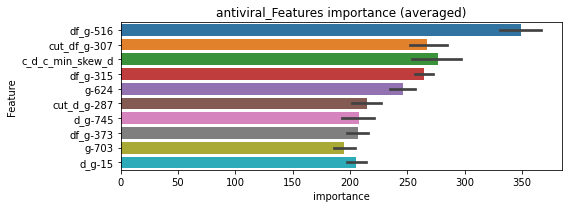

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127804	valid_1's binary_logloss: 0.0198235
[600]	training's binary_logloss: 0.00333796	valid_1's binary_logloss: 0.0070821
[900]	training's binary_logloss: 0.00175114	valid_1's binary_logloss: 0.00446739
[1200]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.00336852
[1500]	training's binary_logloss: 0.000901111	valid_1's binary_logloss: 0.002829
[1800]	training's binary_logloss: 0.000737411	valid_1's binary_logloss: 0.00247198
[2100]	training's binary_logloss: 0.000631658	valid_1's binary_logloss: 0.00223282
[2400]	training's binary_logloss: 0.000557105	valid_1's binary_logloss: 0.00205083
[2700]	training's binary_logloss: 0.000502804	valid_1's binary_logloss: 0.00192264
[3000]	training's binary_logloss: 0.000461493	valid_1's binary_logloss: 0.00182411
[3300]	training's binary_logloss: 0.000430365	valid_1's binary_logloss: 0.001747
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129995	valid_1's binary_logloss: 0.0174172
[600]	training's binary_logloss: 0.00336957	valid_1's binary_logloss: 0.00533407
[900]	training's binary_logloss: 0.00176865	valid_1's binary_logloss: 0.00308576
[1200]	training's binary_logloss: 0.0011968	valid_1's binary_logloss: 0.0022339
[1500]	training's binary_logloss: 0.000915578	valid_1's binary_logloss: 0.0018074
[1800]	training's binary_logloss: 0.000748943	valid_1's binary_logloss: 0.00154781
[2100]	training's binary_logloss: 0.00064197	valid_1's binary_logloss: 0.00136915
[2400]	training's binary_logloss: 0.000566196	valid_1's binary_logloss: 0.00123931
[2700]	training's binary_logloss: 0.000510589	valid_1's binary_logloss: 0.00114532
[3000]	training's binary_logloss: 0.000469683	valid_1's binary_logloss: 0.00107809
[3300]	training's binary_logloss: 0.000437873	valid_1's binary_logloss: 0.00101785
[3600]	training's binary_logloss: 0.000

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130957	valid_1's binary_logloss: 0.0170866
[600]	training's binary_logloss: 0.00342456	valid_1's binary_logloss: 0.00533551
[900]	training's binary_logloss: 0.00179182	valid_1's binary_logloss: 0.00311474
[1200]	training's binary_logloss: 0.00120309	valid_1's binary_logloss: 0.00223359
[1500]	training's binary_logloss: 0.000916812	valid_1's binary_logloss: 0.00178777
[1800]	training's binary_logloss: 0.000749312	valid_1's binary_logloss: 0.00152277
[2100]	training's binary_logloss: 0.000642456	valid_1's binary_logloss: 0.001348
[2400]	training's binary_logloss: 0.00056642	valid_1's binary_logloss: 0.00121529
[2700]	training's binary_logloss: 0.000511924	valid_1's binary_logloss: 0.00112545
[3000]	training's binary_logloss: 0.000470443	valid_1's binary_logloss: 0.00105135
[3300]	training's binary_logloss: 0.000438735	valid_1's binary_logloss: 0.000991322
[3600]	training's binary_logloss: 0.0

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129526	valid_1's binary_logloss: 0.0188435
[600]	training's binary_logloss: 0.00335609	valid_1's binary_logloss: 0.00592683
[900]	training's binary_logloss: 0.00175305	valid_1's binary_logloss: 0.00350235
[1200]	training's binary_logloss: 0.00118791	valid_1's binary_logloss: 0.00258759
[1500]	training's binary_logloss: 0.000907918	valid_1's binary_logloss: 0.00210955
[1800]	training's binary_logloss: 0.000741671	valid_1's binary_logloss: 0.00180907
[2100]	training's binary_logloss: 0.000635638	valid_1's binary_logloss: 0.00161915
[2400]	training's binary_logloss: 0.000560211	valid_1's binary_logloss: 0.00148089
[2700]	training's binary_logloss: 0.00050639	valid_1's binary_logloss: 0.00138138
[3000]	training's binary_logloss: 0.000465897	valid_1's binary_logloss: 0.00130034
[3300]	training's binary_logloss: 0.00043357	valid_1's binary_logloss: 0.00123448
[3600]	training's binary_logloss: 0.0

antiviral logloss: 0.0011178276968281638


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283, target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120741	valid_1's binary_logloss: 0.0429855
[600]	training's binary_logloss: 0.00166963	valid_1's binary_logloss: 0.0293269
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000832564	valid_1's binary_logloss: 0.027374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012441	valid_1's binary_logloss: 0.0388399
[600]	training's binary_logloss: 0.00177595	valid_1's binary_logloss: 0.0244565
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00128126	valid_1's binary_logloss: 0.0230989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141753	valid_1's binary_logloss: 0.0206365
[600]	training's binary_logloss: 0.00196451	valid_1's binary_logloss: 0.00512041
[900]	training's binary_logloss: 0.000819243	valid_1's binary_logloss: 0.00304579
[1200]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0060572, Threshold: 0.0453503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00206, Num_p_label: 40.0, conf_0:0.03175, conf_1:0.05896
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0453503
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_2: 0.0653503
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_3: 0.0853503
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_4: 0.1053503
threshold: 0.1053503, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117484	valid_1's binary_logloss: 0.0297941
[600]	training's binary_logloss: 0.00165066	valid_1's binary_logloss: 0.0145686
[900]	training's binary_logloss: 0.000724514	valid_1's binary_logloss: 0.0126051
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000673101	valid_1's binary_logloss: 0.0125058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113773	valid_1's binary_logloss: 0.0356781
[600]	training's binary_logloss: 0.0015853	valid_1's binary_logloss: 0.0227683
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000947069	valid_1's binary_logloss: 0.0215908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121513	valid_1's binary_logloss: 0.0297448
[600]	training's binary_logloss: 0.00169867	valid_1's binary_logloss: 0.0126925
[900]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0296199, Threshold: 0.1053503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0120542 Vs.target_rate: 0.00206, Num_p_label: 48.0, conf_0:0.08428, conf_1:0.12642
Num_p_label: 48.0, Expected: 8.2, Adj_threshold_1: 0.1053503
Num_p_label: 42.0, Expected: 8.2, Adj_threshold_2: 0.1253503
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_3: 0.1453503
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_4: 0.1653503
Num_p_label: 35.0, Expected: 8.2, Adj_threshold_5: 0.1853503
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_6: 0.2053503
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_7: 0.2253503
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_8: 0.2453503
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_9: 0.2653503
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_10: 0.2853503
threshold: 0.3053503, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112469	valid_1's binary_logloss: 0.0296241
[600]	training's binary_logloss: 0.00158446	valid_1's binary_logloss: 0.0145738
[900]	training's binary_logloss: 0.00070583	valid_1's binary_logloss: 0.0125921
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000633149	valid_1's binary_logloss: 0.0123359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104489	valid_1's binary_logloss: 0.0375384
[600]	training's binary_logloss: 0.00149405	valid_1's binary_logloss: 0.0232717
[900]	training's binary_logloss: 0.000688884	valid_1's binary_logloss: 0.0210157
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000701919	valid_1's binary_logloss: 0.0209787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116981	valid_1's binary_logloss: 0.0289889
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0220032, Threshold: 0.3053503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0060271 Vs.target_rate: 0.00206, Num_p_label: 24.0, conf_0:0.27482, conf_1:0.33589
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_1: 0.3053503
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.3253503
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_3: 0.3453503
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_4: 0.3653503
threshold: 0.3653503, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3797, y_label_rate: 0.1714511


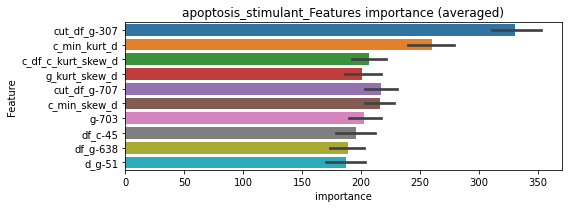

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237499	valid_1's binary_logloss: 0.0454763
[600]	training's binary_logloss: 0.00688717	valid_1's binary_logloss: 0.0244617
[900]	training's binary_logloss: 0.00355536	valid_1's binary_logloss: 0.0195838
[1200]	training's binary_logloss: 0.0023311	valid_1's binary_logloss: 0.0176614
[1500]	training's binary_logloss: 0.00173365	valid_1's binary_logloss: 0.0165047
[1800]	training's binary_logloss: 0.00138876	valid_1's binary_logloss: 0.0157163
[2100]	training's binary_logloss: 0.00116715	valid_1's binary_logloss: 0.015198
Early stopping, best iteration is:
[2129]	training's binary_logloss: 0.00114932	valid_1's binary_logloss: 0.0150956


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232326	valid_1's binary_logloss: 0.0479007
[600]	training's binary_logloss: 0.00676206	valid_1's binary_logloss: 0.0266841
[900]	training's binary_logloss: 0.0034844	valid_1's binary_logloss: 0.0212471
[1200]	training's binary_logloss: 0.00229696	valid_1's binary_logloss: 0.018783
[1500]	training's binary_logloss: 0.00171525	valid_1's binary_logloss: 0.0174393
[1800]	training's binary_logloss: 0.00137487	valid_1's binary_logloss: 0.016654
[2100]	training's binary_logloss: 0.001156	valid_1's binary_logloss: 0.0160994
[2400]	training's binary_logloss: 0.00100453	valid_1's binary_logloss: 0.0155959
[2700]	training's binary_logloss: 0.000894493	valid_1's binary_logloss: 0.0151969
Early stopping, best iteration is:
[2682]	training's binary_logloss: 0.000900313	valid_1's binary_logloss: 0.0151833


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024386	valid_1's binary_logloss: 0.0403537
[600]	training's binary_logloss: 0.00706271	valid_1's binary_logloss: 0.0197336
[900]	training's binary_logloss: 0.00361765	valid_1's binary_logloss: 0.0146549
[1200]	training's binary_logloss: 0.00237578	valid_1's binary_logloss: 0.0125939
[1500]	training's binary_logloss: 0.00176697	valid_1's binary_logloss: 0.0115167
[1800]	training's binary_logloss: 0.00141669	valid_1's binary_logloss: 0.010779
[2100]	training's binary_logloss: 0.00118855	valid_1's binary_logloss: 0.0103299
[2400]	training's binary_logloss: 0.00103177	valid_1's binary_logloss: 0.00997798
[2700]	training's binary_logloss: 0.000918328	valid_1's binary_logloss: 0.00972293
Early stopping, best iteration is:
[2937]	training's binary_logloss: 0.000849111	valid_1's binary_logloss: 0.00957533


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238323	valid_1's binary_logloss: 0.0427392
[600]	training's binary_logloss: 0.00700125	valid_1's binary_logloss: 0.0229904
[900]	training's binary_logloss: 0.00360134	valid_1's binary_logloss: 0.0185552
[1200]	training's binary_logloss: 0.00236384	valid_1's binary_logloss: 0.0168665
[1500]	training's binary_logloss: 0.00175203	valid_1's binary_logloss: 0.0156869
Early stopping, best iteration is:
[1619]	training's binary_logloss: 0.00159137	valid_1's binary_logloss: 0.0153749


apoptosis_stimulant logloss: 0.013807614976653192


neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283, target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124844	valid_1's binary_logloss: 0.038591
[600]	training's binary_logloss: 0.00168645	valid_1's binary_logloss: 0.021912
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000941335	valid_1's binary_logloss: 0.019976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133328	valid_1's binary_logloss: 0.0329244
[600]	training's binary_logloss: 0.00173477	valid_1's binary_logloss: 0.0139523
[900]	training's binary_logloss: 0.000753268	valid_1's binary_logloss: 0.0116178
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000629563	valid_1's binary_logloss: 0.0111908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149219	valid_1's binary_logloss: 0.0245973
[600]	training's binary_logloss: 0.0019657	valid_1's binary_logloss: 0.00620592
[900]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0060329, Threshold: 0.0195384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197, Num_p_label: 40.0, conf_0:0.01368, conf_1:0.02540
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0195384
Num_p_label: 18.0, Expected: 7.9, Adj_threshold_2: 0.0395384
threshold: 0.0395384, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120584	valid_1's binary_logloss: 0.0388679
[600]	training's binary_logloss: 0.00161136	valid_1's binary_logloss: 0.0221455
[900]	training's binary_logloss: 0.000711171	valid_1's binary_logloss: 0.020793
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000726862	valid_1's binary_logloss: 0.0206759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123718	valid_1's binary_logloss: 0.0293799
[600]	training's binary_logloss: 0.00163902	valid_1's binary_logloss: 0.0117226
[900]	training's binary_logloss: 0.000729433	valid_1's binary_logloss: 0.00947947
Early stopping, best iteration is:
[1141]	training's binary_logloss: 0.00057157	valid_1's binary_logloss: 0.00897045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130092	valid_1's binary_logloss: 0.0220309
[600]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0195874, Threshold: 0.0395384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0080362 Vs.target_rate: 0.00197, Num_p_label: 32.0, conf_0:0.03163, conf_1:0.04745
Num_p_label: 32.0, Expected: 7.9, Adj_threshold_1: 0.0395384
Num_p_label: 19.0, Expected: 7.9, Adj_threshold_2: 0.0595384
threshold: 0.0595384, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117815	valid_1's binary_logloss: 0.0363072
[600]	training's binary_logloss: 0.00157869	valid_1's binary_logloss: 0.0187254
[900]	training's binary_logloss: 0.000701032	valid_1's binary_logloss: 0.0157504
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000590098	valid_1's binary_logloss: 0.0153646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122683	valid_1's binary_logloss: 0.0312328
[600]	training's binary_logloss: 0.00168206	valid_1's binary_logloss: 0.0120178
[900]	training's binary_logloss: 0.000730332	valid_1's binary_logloss: 0.00914138
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000613373	valid_1's binary_logloss: 0.00870166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012489	valid_1's binary_logloss: 0.030641
[600]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0283011, Threshold: 0.0595384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0042692 Vs.target_rate: 0.00197, Num_p_label: 17.0, conf_0:0.05358, conf_1:0.06549
Num_p_label: 17.0, Expected: 7.9, Adj_threshold_1: 0.0595384
threshold: 0.0595384, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


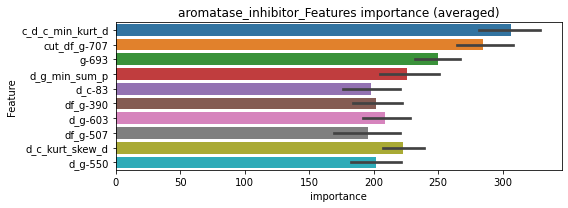

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249217	valid_1's binary_logloss: 0.0440752
[600]	training's binary_logloss: 0.007049	valid_1's binary_logloss: 0.0214074
[900]	training's binary_logloss: 0.00359874	valid_1's binary_logloss: 0.0157165
[1200]	training's binary_logloss: 0.00235812	valid_1's binary_logloss: 0.0133175
[1500]	training's binary_logloss: 0.00175547	valid_1's binary_logloss: 0.0119958
Early stopping, best iteration is:
[1639]	training's binary_logloss: 0.00157326	valid_1's binary_logloss: 0.0114851


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250317	valid_1's binary_logloss: 0.0505896
[600]	training's binary_logloss: 0.00705196	valid_1's binary_logloss: 0.0245446
[900]	training's binary_logloss: 0.00358404	valid_1's binary_logloss: 0.0178668
[1200]	training's binary_logloss: 0.00235231	valid_1's binary_logloss: 0.014999
[1500]	training's binary_logloss: 0.00174823	valid_1's binary_logloss: 0.0134602
[1800]	training's binary_logloss: 0.00139975	valid_1's binary_logloss: 0.012567
[2100]	training's binary_logloss: 0.00117649	valid_1's binary_logloss: 0.011804
Early stopping, best iteration is:
[2171]	training's binary_logloss: 0.00113469	valid_1's binary_logloss: 0.0117043


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0261224	valid_1's binary_logloss: 0.0454576
[600]	training's binary_logloss: 0.00714845	valid_1's binary_logloss: 0.0215523
[900]	training's binary_logloss: 0.00360448	valid_1's binary_logloss: 0.0160323
[1200]	training's binary_logloss: 0.002353	valid_1's binary_logloss: 0.013827
[1500]	training's binary_logloss: 0.00174957	valid_1's binary_logloss: 0.0125407
[1800]	training's binary_logloss: 0.00140313	valid_1's binary_logloss: 0.0117485
[2100]	training's binary_logloss: 0.00117831	valid_1's binary_logloss: 0.0112048
Early stopping, best iteration is:
[2159]	training's binary_logloss: 0.00114264	valid_1's binary_logloss: 0.0110566


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254519	valid_1's binary_logloss: 0.0493267
[600]	training's binary_logloss: 0.00709414	valid_1's binary_logloss: 0.0271063
[900]	training's binary_logloss: 0.00361066	valid_1's binary_logloss: 0.0227585
[1200]	training's binary_logloss: 0.0023541	valid_1's binary_logloss: 0.0209539
Early stopping, best iteration is:
[1245]	training's binary_logloss: 0.00223519	valid_1's binary_logloss: 0.0206491


aromatase_inhibitor logloss: 0.013723206486558054


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154089	valid_1's binary_logloss: 0.00310028
[600]	training's binary_logloss: 0.000233751	valid_1's binary_logloss: 0.000871724
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000196097	valid_1's binary_logloss: 0.000785436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151055	valid_1's binary_logloss: 0.00355455
[600]	training's binary_logloss: 0.000234605	valid_1's binary_logloss: 0.00145499
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000206235	valid_1's binary_logloss: 0.00138701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156616	valid_1's binary_logloss: 0.00155676
[600]	training's binary_logloss: 0.00023387	valid_1's binary_logloss: 0.000241752
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000195207	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0006213, Threshold: 0.0023656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00166, conf_1:0.00308
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0023656
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.0223656
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0423656
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_4: 0.0623656
threshold: 0.0623656, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150467	valid_1's binary_logloss: 0.00273171
[600]	training's binary_logloss: 0.000223002	valid_1's binary_logloss: 0.000885988
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000185538	valid_1's binary_logloss: 0.000793853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146102	valid_1's binary_logloss: 0.00366608
[600]	training's binary_logloss: 0.000222358	valid_1's binary_logloss: 0.00183675
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.00018918	valid_1's binary_logloss: 0.00175596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152396	valid_1's binary_logloss: 0.00149546
[600]	training's binary_logloss: 0.000222968	valid_1's binary_logloss: 0.00022879
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000186658	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0441423, Threshold: 0.0623656, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.00018941	valid_1's binary_logloss: 0.00121671


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00025, Num_p_label: 13.0, conf_0:0.04989, conf_1:0.07484
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.0623656
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.0823656
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_3: 0.1023656
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_4: 0.1223656
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.1423656
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.1623656
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.1823656
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.2023656
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.2223656
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.2423656
threshold: 0.2623656, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150467	valid_1's binary_logloss: 0.00273171
[600]	training's binary_logloss: 0.000223002	valid_1's binary_logloss: 0.000885988
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000185538	valid_1's binary_logloss: 0.000793853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146102	valid_1's binary_logloss: 0.00366608
[600]	training's binary_logloss: 0.000222358	valid_1's binary_logloss: 0.00183675
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.00018918	valid_1's binary_logloss: 0.00175596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152396	valid_1's binary_logloss: 0.00149546
[600]	training's binary_logloss: 0.000222968	valid_1's binary_logloss: 0.00022879
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000186658	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0441423, Threshold: 0.2623656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00025, Num_p_label: 3.0, conf_0:0.23613, conf_1:0.28860
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.2623656
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.2823656
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.3023656
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.3223656
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_5: 0.3423656
threshold: 0.3423656, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.00018941	valid_1's binary_logloss: 0.00121671


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


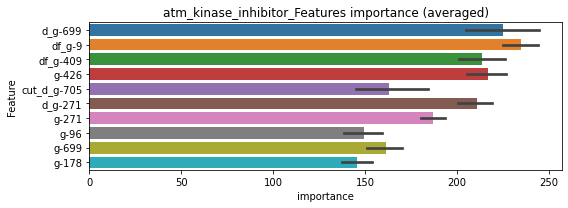

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004687	valid_1's binary_logloss: 0.00608189
[600]	training's binary_logloss: 0.00125418	valid_1's binary_logloss: 0.00200461
[900]	training's binary_logloss: 0.000707303	valid_1's binary_logloss: 0.00127849
[1200]	training's binary_logloss: 0.000503981	valid_1's binary_logloss: 0.00097706
[1500]	training's binary_logloss: 0.000401331	valid_1's binary_logloss: 0.000820131
[1800]	training's binary_logloss: 0.000338187	valid_1's binary_logloss: 0.000719511
[2100]	training's binary_logloss: 0.000297119	valid_1's binary_logloss: 0.000655389
[2400]	training's binary_logloss: 0.000267549	valid_1's binary_logloss: 0.000606016
[2700]	training's binary_logloss: 0.000246296	valid_1's binary_logloss: 0.000567846
[3000]	training's binary_logloss: 0.000230245	valid_1's binary_logloss: 0.000540031
[3300]	training's binary_logloss: 0.000218533	valid_1's binary_logloss: 0.000520077
[3600]	training's binary_l

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464788	valid_1's binary_logloss: 0.00604038
[600]	training's binary_logloss: 0.00125508	valid_1's binary_logloss: 0.00211703
[900]	training's binary_logloss: 0.000708964	valid_1's binary_logloss: 0.00136577
[1200]	training's binary_logloss: 0.000505663	valid_1's binary_logloss: 0.00106485
[1500]	training's binary_logloss: 0.000402434	valid_1's binary_logloss: 0.000908367
[1800]	training's binary_logloss: 0.000340116	valid_1's binary_logloss: 0.000811849
[2100]	training's binary_logloss: 0.000298631	valid_1's binary_logloss: 0.000744048
[2400]	training's binary_logloss: 0.000269292	valid_1's binary_logloss: 0.000695812
[2700]	training's binary_logloss: 0.000248031	valid_1's binary_logloss: 0.000658686
[3000]	training's binary_logloss: 0.000232083	valid_1's binary_logloss: 0.000631914
[3300]	training's binary_logloss: 0.000220239	valid_1's binary_logloss: 0.000611294
[3600]	training's binary

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047425	valid_1's binary_logloss: 0.00480999
[600]	training's binary_logloss: 0.00126435	valid_1's binary_logloss: 0.00131931
[900]	training's binary_logloss: 0.000711146	valid_1's binary_logloss: 0.000755244
[1200]	training's binary_logloss: 0.000507055	valid_1's binary_logloss: 0.000545521
[1500]	training's binary_logloss: 0.00040316	valid_1's binary_logloss: 0.000437722
[1800]	training's binary_logloss: 0.000340581	valid_1's binary_logloss: 0.000371915
[2100]	training's binary_logloss: 0.000298461	valid_1's binary_logloss: 0.000327161
[2400]	training's binary_logloss: 0.000269352	valid_1's binary_logloss: 0.00029627
[2700]	training's binary_logloss: 0.000247905	valid_1's binary_logloss: 0.000273663
[3000]	training's binary_logloss: 0.000232062	valid_1's binary_logloss: 0.000256701
[3300]	training's binary_logloss: 0.000220267	valid_1's binary_logloss: 0.000243943
[3600]	training's binary_

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467223	valid_1's binary_logloss: 0.00653175
[600]	training's binary_logloss: 0.00126027	valid_1's binary_logloss: 0.00225715
[900]	training's binary_logloss: 0.000712758	valid_1's binary_logloss: 0.00145406
[1200]	training's binary_logloss: 0.000506418	valid_1's binary_logloss: 0.00113878
[1500]	training's binary_logloss: 0.000403353	valid_1's binary_logloss: 0.000969926
[1800]	training's binary_logloss: 0.000341059	valid_1's binary_logloss: 0.000858247
[2100]	training's binary_logloss: 0.000299491	valid_1's binary_logloss: 0.000785999
[2400]	training's binary_logloss: 0.000270141	valid_1's binary_logloss: 0.000733526
[2700]	training's binary_logloss: 0.000248337	valid_1's binary_logloss: 0.000691207
[3000]	training's binary_logloss: 0.000232236	valid_1's binary_logloss: 0.000660786
[3300]	training's binary_logloss: 0.00022023	valid_1's binary_logloss: 0.00063729
[3600]	training's binary_l

atm_kinase_inhibitor logloss: 0.00045620507329929534


neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001859	valid_1's binary_logloss: 0.00243682
[600]	training's binary_logloss: 0.000270546	valid_1's binary_logloss: 0.000462065
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000222904	valid_1's binary_logloss: 0.000388769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185325	valid_1's binary_logloss: 0.00740742
[600]	training's binary_logloss: 0.000270551	valid_1's binary_logloss: 0.00461643
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000225702	valid_1's binary_logloss: 0.00448947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187143	valid_1's binary_logloss: 0.00214572
[600]	training's binary_logloss: 0.000268992	valid_1's binary_logloss: 0.000375325
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000223932	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0007319, Threshold: 0.0035433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00248, conf_1:0.00461
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0035433
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_2: 0.0235433
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.0435433
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_4: 0.0635433
threshold: 0.0635433, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176893	valid_1's binary_logloss: 0.00337832
[600]	training's binary_logloss: 0.000255068	valid_1's binary_logloss: 0.000788213
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000211617	valid_1's binary_logloss: 0.000700056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172245	valid_1's binary_logloss: 0.00668317
[600]	training's binary_logloss: 0.000251723	valid_1's binary_logloss: 0.00379525
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000224169	valid_1's binary_logloss: 0.00369435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176039	valid_1's binary_logloss: 0.00190311
[600]	training's binary_logloss: 0.000254948	valid_1's binary_logloss: 0.000285333
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000213957	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.0445135, Threshold: 0.0635433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00029, Num_p_label: 9.0, conf_0:0.05083, conf_1:0.07625
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_1: 0.0635433
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_2: 0.0835433
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_3: 0.1035433
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.1235433
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1435433
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_6: 0.1635433
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.1835433
threshold: 0.1835433, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176893	valid_1's binary_logloss: 0.00337832
[600]	training's binary_logloss: 0.000255068	valid_1's binary_logloss: 0.000788213
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000211617	valid_1's binary_logloss: 0.000700056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172245	valid_1's binary_logloss: 0.00668317
[600]	training's binary_logloss: 0.000251723	valid_1's binary_logloss: 0.00379525
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000224169	valid_1's binary_logloss: 0.00369435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176039	valid_1's binary_logloss: 0.00190311
[600]	training's binary_logloss: 0.000254948	valid_1's binary_logloss: 0.000285333
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000213957	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.0445135, Threshold: 0.1835433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.16519, conf_1:0.20190
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.1835433
threshold: 0.1835433, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


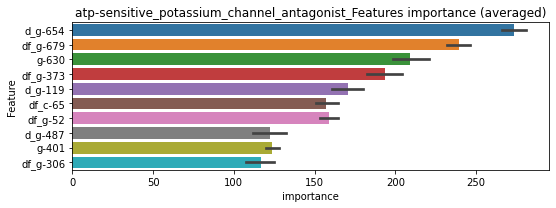

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541081	valid_1's binary_logloss: 0.00665388
[600]	training's binary_logloss: 0.00142998	valid_1's binary_logloss: 0.00197525
[900]	training's binary_logloss: 0.000797626	valid_1's binary_logloss: 0.00116803
[1200]	training's binary_logloss: 0.000564839	valid_1's binary_logloss: 0.000858169
[1500]	training's binary_logloss: 0.000447909	valid_1's binary_logloss: 0.000699957
[1800]	training's binary_logloss: 0.000378319	valid_1's binary_logloss: 0.000605415
[2100]	training's binary_logloss: 0.000331546	valid_1's binary_logloss: 0.000541709
[2400]	training's binary_logloss: 0.000298426	valid_1's binary_logloss: 0.000494981
[2700]	training's binary_logloss: 0.000274348	valid_1's binary_logloss: 0.000461977
[3000]	training's binary_logloss: 0.000256662	valid_1's binary_logloss: 0.000437689
[3300]	training's binary_logloss: 0.000243927	valid_1's binary_logloss: 0.000419762
[3600]	training's binar

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00532543	valid_1's binary_logloss: 0.00922906
[600]	training's binary_logloss: 0.00140977	valid_1's binary_logloss: 0.00416984
[900]	training's binary_logloss: 0.000791011	valid_1's binary_logloss: 0.00314738
[1200]	training's binary_logloss: 0.000561235	valid_1's binary_logloss: 0.0026756
[1500]	training's binary_logloss: 0.000444474	valid_1's binary_logloss: 0.00239443
[1800]	training's binary_logloss: 0.000376133	valid_1's binary_logloss: 0.00223893
[2100]	training's binary_logloss: 0.000329017	valid_1's binary_logloss: 0.0021176
[2400]	training's binary_logloss: 0.000296386	valid_1's binary_logloss: 0.0020239
[2700]	training's binary_logloss: 0.000272403	valid_1's binary_logloss: 0.00195363
[3000]	training's binary_logloss: 0.000255141	valid_1's binary_logloss: 0.00188996
[3300]	training's binary_logloss: 0.000242218	valid_1's binary_logloss: 0.00185174
[3600]	training's binary_logloss: 

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00537384	valid_1's binary_logloss: 0.00573685
[600]	training's binary_logloss: 0.00142609	valid_1's binary_logloss: 0.0015576
[900]	training's binary_logloss: 0.000796157	valid_1's binary_logloss: 0.000881254
[1200]	training's binary_logloss: 0.000562257	valid_1's binary_logloss: 0.000630309
[1500]	training's binary_logloss: 0.000446289	valid_1's binary_logloss: 0.00050468
[1800]	training's binary_logloss: 0.000376857	valid_1's binary_logloss: 0.000429125
[2100]	training's binary_logloss: 0.000330312	valid_1's binary_logloss: 0.000378091
[2400]	training's binary_logloss: 0.000297971	valid_1's binary_logloss: 0.00034255
[2700]	training's binary_logloss: 0.000274285	valid_1's binary_logloss: 0.0003166
[3000]	training's binary_logloss: 0.000257066	valid_1's binary_logloss: 0.000297385
[3300]	training's binary_logloss: 0.000244161	valid_1's binary_logloss: 0.000283041
[3600]	training's binary_lo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536627	valid_1's binary_logloss: 0.00578361
[600]	training's binary_logloss: 0.00141783	valid_1's binary_logloss: 0.00156007
[900]	training's binary_logloss: 0.000792001	valid_1's binary_logloss: 0.000883164
[1200]	training's binary_logloss: 0.000562714	valid_1's binary_logloss: 0.000632908
[1500]	training's binary_logloss: 0.000446646	valid_1's binary_logloss: 0.000505593
[1800]	training's binary_logloss: 0.000376993	valid_1's binary_logloss: 0.000429198
[2100]	training's binary_logloss: 0.000330232	valid_1's binary_logloss: 0.00037743
[2400]	training's binary_logloss: 0.000297417	valid_1's binary_logloss: 0.000340674
[2700]	training's binary_logloss: 0.000273548	valid_1's binary_logloss: 0.000313934
[3000]	training's binary_logloss: 0.00025606	valid_1's binary_logloss: 0.000294342
[3300]	training's binary_logloss: 0.000243033	valid_1's binary_logloss: 0.000279822
[3600]	training's binary

atp-sensitive_potassium_channel_antagonist logloss: 0.00067028578052713


neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00337341	valid_1's binary_logloss: 0.00754998
[600]	training's binary_logloss: 0.000469991	valid_1's binary_logloss: 0.00226558
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000331299	valid_1's binary_logloss: 0.00187639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336152	valid_1's binary_logloss: 0.00569269
[600]	training's binary_logloss: 0.00046304	valid_1's binary_logloss: 0.00211499
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000337805	valid_1's binary_logloss: 0.00184168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348162	valid_1's binary_logloss: 0.00470531
[600]	training's binary_logloss: 0.000476041	valid_1's binary_logloss: 0.000834785
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000325567	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0017185, Threshold: 0.0176114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01233, conf_1:0.02289
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0176114
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.0376114
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.0576114
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.0776114
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.0976114
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1176114
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.1376114
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.1576114
threshold: 0.1576114, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306531	valid_1's binary_logloss: 0.00632885
[600]	training's binary_logloss: 0.00042864	valid_1's binary_logloss: 0.00202226
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000310915	valid_1's binary_logloss: 0.00170961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298294	valid_1's binary_logloss: 0.00453708
[600]	training's binary_logloss: 0.000426771	valid_1's binary_logloss: 0.000913768
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000310549	valid_1's binary_logloss: 0.000689668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306821	valid_1's binary_logloss: 0.00380292
[600]	training's binary_logloss: 0.000438341	valid_1's binary_logloss: 0.000622053
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000322904	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1185043, Threshold: 0.1576114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000316568	valid_1's binary_logloss: 0.00110235


p_label_rate: 0.0085384 Vs.target_rate: 0.00050, Num_p_label: 34.0, conf_0:0.12609, conf_1:0.18913
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_1: 0.1576114
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_2: 0.1776114
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_3: 0.1976114
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_4: 0.2176114
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_5: 0.2376114
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_6: 0.2576114
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_7: 0.2776114
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_8: 0.2976114
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_9: 0.3176114
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_10: 0.3376114
threshold: 0.3576114, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306531	valid_1's binary_logloss: 0.00632885
[600]	training's binary_logloss: 0.00042864	valid_1's binary_logloss: 0.00202226
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000310915	valid_1's binary_logloss: 0.00170961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298294	valid_1's binary_logloss: 0.00453708
[600]	training's binary_logloss: 0.000426771	valid_1's binary_logloss: 0.000913768
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000310549	valid_1's binary_logloss: 0.000689668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306821	valid_1's binary_logloss: 0.00380292
[600]	training's binary_logloss: 0.000438341	valid_1's binary_logloss: 0.000622053
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000322904	valid_1's bi

3 / 3 AUC score:1.000


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000316568	valid_1's binary_logloss: 0.00110235


y_Threshold: 0.1185043, Threshold: 0.3576114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00050, Num_p_label: 16.0, conf_0:0.32185, conf_1:0.39337
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_1: 0.3576114
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.3776114
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.3976114
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.4176114
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_5: 0.4376114
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4576114
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_7: 0.4776114
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_8: 0.4976114
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.5176114
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5376114
threshold: 0.5576114, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


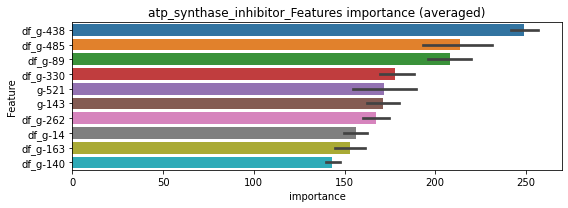

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877951	valid_1's binary_logloss: 0.0114362
[600]	training's binary_logloss: 0.00233876	valid_1's binary_logloss: 0.00353504
[900]	training's binary_logloss: 0.00126478	valid_1's binary_logloss: 0.00209214
[1200]	training's binary_logloss: 0.000872012	valid_1's binary_logloss: 0.00152387
[1500]	training's binary_logloss: 0.000679619	valid_1's binary_logloss: 0.00124018
[1800]	training's binary_logloss: 0.000563537	valid_1's binary_logloss: 0.00106064
[2100]	training's binary_logloss: 0.000489269	valid_1's binary_logloss: 0.000948229
[2400]	training's binary_logloss: 0.00043616	valid_1's binary_logloss: 0.000865454
[2700]	training's binary_logloss: 0.000397146	valid_1's binary_logloss: 0.000804032
[3000]	training's binary_logloss: 0.000369266	valid_1's binary_logloss: 0.000762873
[3300]	training's binary_logloss: 0.000348138	valid_1's binary_logloss: 0.000728203
[3600]	training's binary_logl

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867185	valid_1's binary_logloss: 0.0113418
[600]	training's binary_logloss: 0.00229037	valid_1's binary_logloss: 0.00362132
[900]	training's binary_logloss: 0.00124602	valid_1's binary_logloss: 0.00214725
[1200]	training's binary_logloss: 0.000868843	valid_1's binary_logloss: 0.00156919
[1500]	training's binary_logloss: 0.000673221	valid_1's binary_logloss: 0.00126999
[1800]	training's binary_logloss: 0.000558792	valid_1's binary_logloss: 0.00108848
[2100]	training's binary_logloss: 0.000485463	valid_1's binary_logloss: 0.000966114
[2400]	training's binary_logloss: 0.000432903	valid_1's binary_logloss: 0.000878253
[2700]	training's binary_logloss: 0.000395494	valid_1's binary_logloss: 0.0008152
[3000]	training's binary_logloss: 0.000368623	valid_1's binary_logloss: 0.000764078
[3300]	training's binary_logloss: 0.000347475	valid_1's binary_logloss: 0.000727236
[3600]	training's binary_loglo

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882613	valid_1's binary_logloss: 0.010352
[600]	training's binary_logloss: 0.00233797	valid_1's binary_logloss: 0.00298503
[900]	training's binary_logloss: 0.001265	valid_1's binary_logloss: 0.00168531
[1200]	training's binary_logloss: 0.000874991	valid_1's binary_logloss: 0.00119334
[1500]	training's binary_logloss: 0.000683743	valid_1's binary_logloss: 0.000951171
[1800]	training's binary_logloss: 0.000569111	valid_1's binary_logloss: 0.000802247
[2100]	training's binary_logloss: 0.000494066	valid_1's binary_logloss: 0.000704191
[2400]	training's binary_logloss: 0.000440384	valid_1's binary_logloss: 0.00063301
[2700]	training's binary_logloss: 0.000402533	valid_1's binary_logloss: 0.000582512
[3000]	training's binary_logloss: 0.000374491	valid_1's binary_logloss: 0.00054482
[3300]	training's binary_logloss: 0.000351975	valid_1's binary_logloss: 0.000514461
[3600]	training's binary_loglos

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872283	valid_1's binary_logloss: 0.0120881
[600]	training's binary_logloss: 0.00230884	valid_1's binary_logloss: 0.00391114
[900]	training's binary_logloss: 0.00125601	valid_1's binary_logloss: 0.0023933
[1200]	training's binary_logloss: 0.000869062	valid_1's binary_logloss: 0.00177322
[1500]	training's binary_logloss: 0.000677445	valid_1's binary_logloss: 0.00145434
[1800]	training's binary_logloss: 0.000564131	valid_1's binary_logloss: 0.0012513
[2100]	training's binary_logloss: 0.000489046	valid_1's binary_logloss: 0.00112333
[2400]	training's binary_logloss: 0.000436503	valid_1's binary_logloss: 0.00102642
[2700]	training's binary_logloss: 0.000398515	valid_1's binary_logloss: 0.000957319
[3000]	training's binary_logloss: 0.000370667	valid_1's binary_logloss: 0.000905359
[3300]	training's binary_logloss: 0.000348766	valid_1's binary_logloss: 0.000862293
[3600]	training's binary_logloss

atp_synthase_inhibitor logloss: 0.0006594522688806917


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273, target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254909	valid_1's binary_logloss: 0.100169
[600]	training's binary_logloss: 0.00431611	valid_1's binary_logloss: 0.0754939
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.00248363	valid_1's binary_logloss: 0.0733354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258414	valid_1's binary_logloss: 0.0828187
[600]	training's binary_logloss: 0.00436082	valid_1's binary_logloss: 0.054106
[900]	training's binary_logloss: 0.0016206	valid_1's binary_logloss: 0.0489247
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.00133529	valid_1's binary_logloss: 0.0484623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254147	valid_1's binary_logloss: 0.0674051
[600]	training's binary_logloss: 0.00446465	valid_1's binary_logloss: 0.0438876
[900]	training's binary_logloss: 

1 / 3 AUC score:0.997
y_Threshold: 0.0120252, Threshold: 0.0270856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00407, Num_p_label: 40.0, conf_0:0.01896, conf_1:0.03521
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0270856
Num_p_label: 15.0, Expected: 16.2, Adj_threshold_2: 0.0470856
threshold: 0.0470856, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246381	valid_1's binary_logloss: 0.0755117
[600]	training's binary_logloss: 0.00402444	valid_1's binary_logloss: 0.0518504
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00199116	valid_1's binary_logloss: 0.0485377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243109	valid_1's binary_logloss: 0.0824122
[600]	training's binary_logloss: 0.00391007	valid_1's binary_logloss: 0.0565653
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00248043	valid_1's binary_logloss: 0.0542043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024625	valid_1's binary_logloss: 0.0720934
[600]	training's binary_logloss: 0.00417272	valid_1's binary_logloss: 0.0413924
[900]	training's binary_logloss: 0.00156345	valid_1's binary_logloss: 0.0350062
Early stopping, best iteration 

2 / 3 AUC score:1.000
y_Threshold: 0.0351058, Threshold: 0.0470856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0097941 Vs.target_rate: 0.00407, Num_p_label: 39.0, conf_0:0.03767, conf_1:0.05650
Num_p_label: 39.0, Expected: 16.2, Adj_threshold_1: 0.0470856
Num_p_label: 16.0, Expected: 16.2, Adj_threshold_2: 0.0670856
threshold: 0.0670856, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020987	valid_1's binary_logloss: 0.0814694
[600]	training's binary_logloss: 0.00347571	valid_1's binary_logloss: 0.0583181
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00179005	valid_1's binary_logloss: 0.0554568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218232	valid_1's binary_logloss: 0.0747641
[600]	training's binary_logloss: 0.00357283	valid_1's binary_logloss: 0.0502599
[900]	training's binary_logloss: 0.00139622	valid_1's binary_logloss: 0.0462631
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.0012764	valid_1's binary_logloss: 0.045636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239683	valid_1's binary_logloss: 0.0642599
[600]	training's binary_logloss: 0.003898	valid_1's binary_logloss: 0.0327714
[900]	training's binary_logloss: 0.

3 / 3 AUC score:0.999
y_Threshold: 0.0293947, Threshold: 0.0670856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 630.0/3747
p_label_rate: 0.0042692 Vs.target_rate: 0.00407, Num_p_label: 17.0, conf_0:0.06038, conf_1:0.07379
threshold: 0.0670856, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 630.0/3747, y_label_rate: 0.1681345


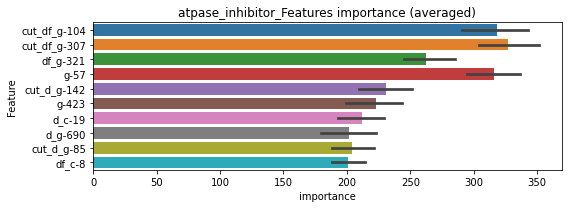

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0391964	valid_1's binary_logloss: 0.0963751
[600]	training's binary_logloss: 0.0125342	valid_1's binary_logloss: 0.0666118
[900]	training's binary_logloss: 0.00635559	valid_1's binary_logloss: 0.0586179
[1200]	training's binary_logloss: 0.00409502	valid_1's binary_logloss: 0.0551661
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.00353112	valid_1's binary_logloss: 0.0539215


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0410951	valid_1's binary_logloss: 0.0739359
[600]	training's binary_logloss: 0.0132234	valid_1's binary_logloss: 0.0426654
[900]	training's binary_logloss: 0.00671831	valid_1's binary_logloss: 0.0337615
[1200]	training's binary_logloss: 0.0043073	valid_1's binary_logloss: 0.0298955
[1500]	training's binary_logloss: 0.00311832	valid_1's binary_logloss: 0.0275288
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.0027588	valid_1's binary_logloss: 0.0268505


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407719	valid_1's binary_logloss: 0.077809
[600]	training's binary_logloss: 0.0130714	valid_1's binary_logloss: 0.0440819
[900]	training's binary_logloss: 0.00665817	valid_1's binary_logloss: 0.0343014
[1200]	training's binary_logloss: 0.00427864	valid_1's binary_logloss: 0.0300537
[1500]	training's binary_logloss: 0.0031154	valid_1's binary_logloss: 0.0278034
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.00275705	valid_1's binary_logloss: 0.0270351


len(train_index) : 2811
len(valid_index) : 936
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040961	valid_1's binary_logloss: 0.0899566
[600]	training's binary_logloss: 0.0130514	valid_1's binary_logloss: 0.0574938
[900]	training's binary_logloss: 0.00660824	valid_1's binary_logloss: 0.0484621
[1200]	training's binary_logloss: 0.00421713	valid_1's binary_logloss: 0.045037
[1500]	training's binary_logloss: 0.00307306	valid_1's binary_logloss: 0.0426333
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.00302359	valid_1's binary_logloss: 0.042522


atpase_inhibitor logloss: 0.03758095836319663


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597183	valid_1's binary_logloss: 0.00975845
[600]	training's binary_logloss: 0.000754648	valid_1's binary_logloss: 0.00169993
[900]	training's binary_logloss: 0.000410514	valid_1's binary_logloss: 0.00103828
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000401668	valid_1's binary_logloss: 0.00102427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593133	valid_1's binary_logloss: 0.0108987
[600]	training's binary_logloss: 0.000748	valid_1's binary_logloss: 0.00239432
[900]	training's binary_logloss: 0.000402981	valid_1's binary_logloss: 0.00158512
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000389417	valid_1's binary_logloss: 0.00155111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623249	valid_1's binary_logloss: 0.00921658
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0023389, Threshold: 0.0082930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00581, conf_1:0.01078
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0082930
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_2: 0.0282930
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_3: 0.0482930
threshold: 0.0482930, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546476	valid_1's binary_logloss: 0.00843715
[600]	training's binary_logloss: 0.00070583	valid_1's binary_logloss: 0.00147306
[900]	training's binary_logloss: 0.000391534	valid_1's binary_logloss: 0.000896231
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00038429	valid_1's binary_logloss: 0.000884507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534235	valid_1's binary_logloss: 0.0100193
[600]	training's binary_logloss: 0.000690233	valid_1's binary_logloss: 0.00220978
[900]	training's binary_logloss: 0.000388079	valid_1's binary_logloss: 0.0015448
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000383736	valid_1's binary_logloss: 0.00154035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559546	valid_1's binary_logloss: 0.00734287
[600]	training

2 / 3 AUC score:1.000
y_Threshold: 0.0981499, Threshold: 0.0482930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00080, Num_p_label: 17.0, conf_0:0.03863, conf_1:0.05795
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_1: 0.0482930
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.0682930
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.0882930
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.1082930
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.1282930
threshold: 0.1282930, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546476	valid_1's binary_logloss: 0.00843715
[600]	training's binary_logloss: 0.00070583	valid_1's binary_logloss: 0.00147306
[900]	training's binary_logloss: 0.000391534	valid_1's binary_logloss: 0.000896231
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00038429	valid_1's binary_logloss: 0.000884507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534235	valid_1's binary_logloss: 0.0100193
[600]	training's binary_logloss: 0.000690233	valid_1's binary_logloss: 0.00220978
[900]	training's binary_logloss: 0.000388079	valid_1's binary_logloss: 0.0015448
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000383736	valid_1's binary_logloss: 0.00154035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559546	valid_1's binary_logloss: 0.00734287
[600]	training

3 / 3 AUC score:1.000
y_Threshold: 0.0981499, Threshold: 0.1282930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.11546, conf_1:0.14112
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.1282930
threshold: 0.1282930, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


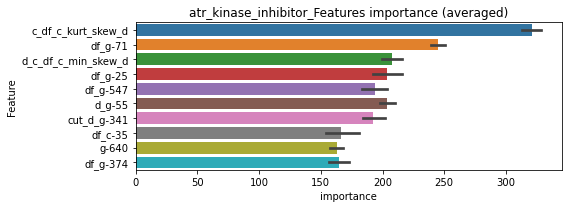

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137229	valid_1's binary_logloss: 0.0188361
[600]	training's binary_logloss: 0.00357551	valid_1's binary_logloss: 0.00574941
[900]	training's binary_logloss: 0.00186738	valid_1's binary_logloss: 0.00325368
[1200]	training's binary_logloss: 0.00126499	valid_1's binary_logloss: 0.00233504
[1500]	training's binary_logloss: 0.000967202	valid_1's binary_logloss: 0.00185643
[1800]	training's binary_logloss: 0.000791855	valid_1's binary_logloss: 0.00156624
[2100]	training's binary_logloss: 0.000678308	valid_1's binary_logloss: 0.00137714
[2400]	training's binary_logloss: 0.000599352	valid_1's binary_logloss: 0.00124175
[2700]	training's binary_logloss: 0.000541146	valid_1's binary_logloss: 0.0011413
[3000]	training's binary_logloss: 0.000498643	valid_1's binary_logloss: 0.00106766
[3300]	training's binary_logloss: 0.000465101	valid_1's binary_logloss: 0.0010052
[3600]	training's binary_logloss: 0.0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137811	valid_1's binary_logloss: 0.0205876
[600]	training's binary_logloss: 0.00359222	valid_1's binary_logloss: 0.00686383
[900]	training's binary_logloss: 0.00188933	valid_1's binary_logloss: 0.0041449
[1200]	training's binary_logloss: 0.00127372	valid_1's binary_logloss: 0.00308447
[1500]	training's binary_logloss: 0.000971138	valid_1's binary_logloss: 0.00251972
[1800]	training's binary_logloss: 0.000796281	valid_1's binary_logloss: 0.00218329
[2100]	training's binary_logloss: 0.000680353	valid_1's binary_logloss: 0.00195045
[2400]	training's binary_logloss: 0.000601422	valid_1's binary_logloss: 0.00178237
[2700]	training's binary_logloss: 0.000542522	valid_1's binary_logloss: 0.0016555
[3000]	training's binary_logloss: 0.000499378	valid_1's binary_logloss: 0.00156274
[3300]	training's binary_logloss: 0.000465384	valid_1's binary_logloss: 0.00148326
[3600]	training's binary_logloss: 0.0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141069	valid_1's binary_logloss: 0.0172991
[600]	training's binary_logloss: 0.00363014	valid_1's binary_logloss: 0.00506033
[900]	training's binary_logloss: 0.00190012	valid_1's binary_logloss: 0.00286428
[1200]	training's binary_logloss: 0.00128441	valid_1's binary_logloss: 0.00202337
[1500]	training's binary_logloss: 0.000980428	valid_1's binary_logloss: 0.00160346
[1800]	training's binary_logloss: 0.000803535	valid_1's binary_logloss: 0.00135065
[2100]	training's binary_logloss: 0.000686846	valid_1's binary_logloss: 0.00117836
[2400]	training's binary_logloss: 0.000606296	valid_1's binary_logloss: 0.00105974
[2700]	training's binary_logloss: 0.00054619	valid_1's binary_logloss: 0.000968405
[3000]	training's binary_logloss: 0.000502605	valid_1's binary_logloss: 0.000904664
[3300]	training's binary_logloss: 0.00046922	valid_1's binary_logloss: 0.000852045
[3600]	training's binary_logloss: 

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137271	valid_1's binary_logloss: 0.0199838
[600]	training's binary_logloss: 0.00356169	valid_1's binary_logloss: 0.00670014
[900]	training's binary_logloss: 0.00188153	valid_1's binary_logloss: 0.00413713
[1200]	training's binary_logloss: 0.00127409	valid_1's binary_logloss: 0.00314478
[1500]	training's binary_logloss: 0.000975628	valid_1's binary_logloss: 0.00261406
[1800]	training's binary_logloss: 0.000800825	valid_1's binary_logloss: 0.00227671
[2100]	training's binary_logloss: 0.000686655	valid_1's binary_logloss: 0.0020549
[2400]	training's binary_logloss: 0.000606904	valid_1's binary_logloss: 0.00191268
[2700]	training's binary_logloss: 0.000548272	valid_1's binary_logloss: 0.00180763
[3000]	training's binary_logloss: 0.000504952	valid_1's binary_logloss: 0.00172644
[3300]	training's binary_logloss: 0.000470206	valid_1's binary_logloss: 0.00165282
[3600]	training's binary_logloss: 0.

atr_kinase_inhibitor logloss: 0.0011040754518950224


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325789	valid_1's binary_logloss: 0.0999367
[600]	training's binary_logloss: 0.00522615	valid_1's binary_logloss: 0.0676455
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00222984	valid_1's binary_logloss: 0.0628665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0308052	valid_1's binary_logloss: 0.0804557
[600]	training's binary_logloss: 0.00502735	valid_1's binary_logloss: 0.0410253
[900]	training's binary_logloss: 0.00175208	valid_1's binary_logloss: 0.0317853
[1200]	training's binary_logloss: 0.00104878	valid_1's binary_logloss: 0.029111
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.000908392	valid_1's binary_logloss: 0.0283291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321628	valid_1's binary_logloss: 0.0807302
[600]	training's binary_logl

1 / 3 AUC score:0.995
y_Threshold: 0.0183688, Threshold: 0.0887780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 644/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.06214, conf_1:0.11541
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0887780
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_2: 0.1087780
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_3: 0.1287780
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_4: 0.1487780
threshold: 0.1487780, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 644.0/3774, y_label_rate: 0.1706412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278501	valid_1's binary_logloss: 0.083141
[600]	training's binary_logloss: 0.00421837	valid_1's binary_logloss: 0.0518257
[900]	training's binary_logloss: 0.00155316	valid_1's binary_logloss: 0.0474417
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00154929	valid_1's binary_logloss: 0.0474262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0283482	valid_1's binary_logloss: 0.083213
[600]	training's binary_logloss: 0.00457108	valid_1's binary_logloss: 0.0514973
[900]	training's binary_logloss: 0.00162475	valid_1's binary_logloss: 0.0454774
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00162475	valid_1's binary_logloss: 0.0454774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0267251	valid_1's binary_logloss: 0.0728632
[600]	training's binary_logloss:

2 / 3 AUC score:0.998
y_Threshold: 0.0454278, Threshold: 0.1487780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 637.0/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.11902, conf_1:0.17853
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.1487780
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_2: 0.1687780
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_3: 0.1887780
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_4: 0.2087780
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_5: 0.2287780
threshold: 0.2287780, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256951	valid_1's binary_logloss: 0.0987232
[600]	training's binary_logloss: 0.0039508	valid_1's binary_logloss: 0.0684913
[900]	training's binary_logloss: 0.00145341	valid_1's binary_logloss: 0.0628161
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.00135599	valid_1's binary_logloss: 0.0623091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263574	valid_1's binary_logloss: 0.0596354
[600]	training's binary_logloss: 0.00421648	valid_1's binary_logloss: 0.0299075
[900]	training's binary_logloss: 0.00155473	valid_1's binary_logloss: 0.024496
Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.0010084	valid_1's binary_logloss: 0.0232766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02766	valid_1's binary_logloss: 0.0706951
[600]	training's binary_logloss: 0

3 / 3 AUC score:0.999
y_Threshold: 0.0336408, Threshold: 0.2287780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 629.0/3744
p_label_rate: 0.0057760 Vs.target_rate: 0.00403, Num_p_label: 23.0, conf_0:0.20590, conf_1:0.25166
threshold: 0.2287780, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 629.0/3744, y_label_rate: 0.1680021


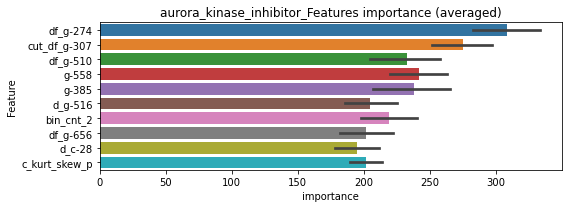

len(train_index) : 2808
len(valid_index) : 936
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0450354	valid_1's binary_logloss: 0.0959143
[600]	training's binary_logloss: 0.0138214	valid_1's binary_logloss: 0.0606428
[900]	training's binary_logloss: 0.00681669	valid_1's binary_logloss: 0.0490928
[1200]	training's binary_logloss: 0.00431573	valid_1's binary_logloss: 0.0444195
[1500]	training's binary_logloss: 0.00312199	valid_1's binary_logloss: 0.04199
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.00272379	valid_1's binary_logloss: 0.040836


len(train_index) : 2808
len(valid_index) : 936
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440078	valid_1's binary_logloss: 0.0928235
[600]	training's binary_logloss: 0.0138498	valid_1's binary_logloss: 0.0561229
[900]	training's binary_logloss: 0.00692757	valid_1's binary_logloss: 0.0454296
[1200]	training's binary_logloss: 0.00440579	valid_1's binary_logloss: 0.0413248
Early stopping, best iteration is:
[1331]	training's binary_logloss: 0.00377758	valid_1's binary_logloss: 0.0404232


len(train_index) : 2808
len(valid_index) : 936
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045044	valid_1's binary_logloss: 0.0831287
[600]	training's binary_logloss: 0.0138401	valid_1's binary_logloss: 0.0471653
[900]	training's binary_logloss: 0.00693648	valid_1's binary_logloss: 0.0369005
[1200]	training's binary_logloss: 0.00440909	valid_1's binary_logloss: 0.0328793
Early stopping, best iteration is:
[1233]	training's binary_logloss: 0.00422255	valid_1's binary_logloss: 0.032457


len(train_index) : 2808
len(valid_index) : 936
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454793	valid_1's binary_logloss: 0.0869237
[600]	training's binary_logloss: 0.014142	valid_1's binary_logloss: 0.0548741
[900]	training's binary_logloss: 0.00700774	valid_1's binary_logloss: 0.0456506
[1200]	training's binary_logloss: 0.00442611	valid_1's binary_logloss: 0.0418741
[1500]	training's binary_logloss: 0.00320247	valid_1's binary_logloss: 0.0402564
Early stopping, best iteration is:
[1637]	training's binary_logloss: 0.00284703	valid_1's binary_logloss: 0.0398978


aurora_kinase_inhibitor logloss: 0.038403497692169504


neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155961	valid_1's binary_logloss: 0.00200291
[600]	training's binary_logloss: 0.00023645	valid_1's binary_logloss: 0.0004889
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000209953	valid_1's binary_logloss: 0.000447901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152989	valid_1's binary_logloss: 0.00203607
[600]	training's binary_logloss: 0.00023283	valid_1's binary_logloss: 0.000406667
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000204133	valid_1's binary_logloss: 0.000363798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153895	valid_1's binary_logloss: 0.0018926
[600]	training's binary_logloss: 0.000236078	valid_1's binary_logloss: 0.000380658
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000206551	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0007737, Threshold: 0.0054511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00382, conf_1:0.00709
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0054511
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0254511
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0454511
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_4: 0.0654511
threshold: 0.0654511, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146493	valid_1's binary_logloss: 0.00233397
[600]	training's binary_logloss: 0.000211586	valid_1's binary_logloss: 0.000669124
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00018482	valid_1's binary_logloss: 0.000631084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144448	valid_1's binary_logloss: 0.00182767
[600]	training's binary_logloss: 0.000207935	valid_1's binary_logloss: 0.000329919
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000179309	valid_1's binary_logloss: 0.000288498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147451	valid_1's binary_logloss: 0.00164639
[600]	training's binary_logloss: 0.000212187	valid_1's binary_logloss: 0.000255004
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000183046	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1461766, Threshold: 0.0654511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0082873 Vs.target_rate: 0.00025, Num_p_label: 33.0, conf_0:0.05236, conf_1:0.07854
Num_p_label: 33.0, Expected: 1.0, Adj_threshold_1: 0.0654511
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_2: 0.0854511
Num_p_label: 21.0, Expected: 1.0, Adj_threshold_3: 0.1054511
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_4: 0.1254511
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_5: 0.1454511
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_6: 0.1654511
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_7: 0.1854511
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_8: 0.2054511
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_9: 0.2254511
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_10: 0.2454511


Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000182247	valid_1's binary_logloss: 0.000215476


threshold: 0.2654511, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146493	valid_1's binary_logloss: 0.00233397
[600]	training's binary_logloss: 0.000211586	valid_1's binary_logloss: 0.000669124
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00018482	valid_1's binary_logloss: 0.000631084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144448	valid_1's binary_logloss: 0.00182767
[600]	training's binary_logloss: 0.000207935	valid_1's binary_logloss: 0.000329919
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000179309	valid_1's binary_logloss: 0.000288498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147451	valid_1's binary_logloss: 0.00164639
[600]	training's binary_logloss: 0.000212187	valid_1's binary_logloss: 0.000255004
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000183046	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1461766, Threshold: 0.2654511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.23891, conf_1:0.29200
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.2654511
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.2854511
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.3054511
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.3254511
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3454511
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.3654511
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.3854511
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4054511
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.4254511
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.4454511


Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000182247	valid_1's binary_logloss: 0.000215476


threshold: 0.4654511, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


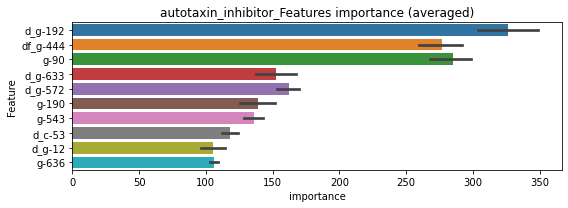

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451005	valid_1's binary_logloss: 0.00528256
[600]	training's binary_logloss: 0.00117147	valid_1's binary_logloss: 0.0016339
[900]	training's binary_logloss: 0.00066643	valid_1's binary_logloss: 0.00102381
[1200]	training's binary_logloss: 0.000477775	valid_1's binary_logloss: 0.000790809
[1500]	training's binary_logloss: 0.000382358	valid_1's binary_logloss: 0.000662326
[1800]	training's binary_logloss: 0.000324888	valid_1's binary_logloss: 0.000584772
[2100]	training's binary_logloss: 0.000286006	valid_1's binary_logloss: 0.000525006
[2400]	training's binary_logloss: 0.000258957	valid_1's binary_logloss: 0.000483959
[2700]	training's binary_logloss: 0.000239169	valid_1's binary_logloss: 0.000455306
[3000]	training's binary_logloss: 0.000225162	valid_1's binary_logloss: 0.000432214
[3300]	training's binary_logloss: 0.000214983	valid_1's binary_logloss: 0.000415293
[3600]	training's binary_

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441121	valid_1's binary_logloss: 0.00525514
[600]	training's binary_logloss: 0.00114774	valid_1's binary_logloss: 0.00154172
[900]	training's binary_logloss: 0.000653641	valid_1's binary_logloss: 0.000923705
[1200]	training's binary_logloss: 0.000469305	valid_1's binary_logloss: 0.000685081
[1500]	training's binary_logloss: 0.000374817	valid_1's binary_logloss: 0.00056024
[1800]	training's binary_logloss: 0.000318551	valid_1's binary_logloss: 0.000484725
[2100]	training's binary_logloss: 0.000280905	valid_1's binary_logloss: 0.000433329
[2400]	training's binary_logloss: 0.000254712	valid_1's binary_logloss: 0.000397248
[2700]	training's binary_logloss: 0.000235668	valid_1's binary_logloss: 0.00037084
[3000]	training's binary_logloss: 0.000221866	valid_1's binary_logloss: 0.000351367
[3300]	training's binary_logloss: 0.000211822	valid_1's binary_logloss: 0.000337318
[3600]	training's binary

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447153	valid_1's binary_logloss: 0.00493992
[600]	training's binary_logloss: 0.00116851	valid_1's binary_logloss: 0.00133927
[900]	training's binary_logloss: 0.000666541	valid_1's binary_logloss: 0.000777546
[1200]	training's binary_logloss: 0.000479553	valid_1's binary_logloss: 0.000567307
[1500]	training's binary_logloss: 0.000383192	valid_1's binary_logloss: 0.000457146
[1800]	training's binary_logloss: 0.000325147	valid_1's binary_logloss: 0.000390266
[2100]	training's binary_logloss: 0.000286101	valid_1's binary_logloss: 0.000344728
[2400]	training's binary_logloss: 0.000258909	valid_1's binary_logloss: 0.000313143
[2700]	training's binary_logloss: 0.000239035	valid_1's binary_logloss: 0.000290073
[3000]	training's binary_logloss: 0.000225007	valid_1's binary_logloss: 0.000273494
[3300]	training's binary_logloss: 0.000214927	valid_1's binary_logloss: 0.000261766
[3600]	training's bina

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447442	valid_1's binary_logloss: 0.00473749
[600]	training's binary_logloss: 0.00116447	valid_1's binary_logloss: 0.0012842
[900]	training's binary_logloss: 0.000663711	valid_1's binary_logloss: 0.000747635
[1200]	training's binary_logloss: 0.000475826	valid_1's binary_logloss: 0.000545594
[1500]	training's binary_logloss: 0.000380358	valid_1's binary_logloss: 0.000441023
[1800]	training's binary_logloss: 0.000323222	valid_1's binary_logloss: 0.000378521
[2100]	training's binary_logloss: 0.000284534	valid_1's binary_logloss: 0.000335645
[2400]	training's binary_logloss: 0.000257547	valid_1's binary_logloss: 0.000305693
[2700]	training's binary_logloss: 0.000237651	valid_1's binary_logloss: 0.000283338
[3000]	training's binary_logloss: 0.000223365	valid_1's binary_logloss: 0.000267346
[3300]	training's binary_logloss: 0.000213507	valid_1's binary_logloss: 0.000256317
[3600]	training's binar

autotaxin_inhibitor logloss: 0.0002901972922090739


neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017301	valid_1's binary_logloss: 0.059872
[600]	training's binary_logloss: 0.00256794	valid_1's binary_logloss: 0.0407299
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00222262	valid_1's binary_logloss: 0.0398552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190697	valid_1's binary_logloss: 0.0449586
[600]	training's binary_logloss: 0.00275989	valid_1's binary_logloss: 0.0190352
[900]	training's binary_logloss: 0.00106952	valid_1's binary_logloss: 0.0144882
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000731233	valid_1's binary_logloss: 0.0132023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191092	valid_1's binary_logloss: 0.0480705
[600]	training's binary_logloss: 0.0027601	valid_1's binary_logloss: 0.0227445
[900]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0098217, Threshold: 0.0203698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.01426, conf_1:0.02648
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0203698
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_2: 0.0403698
threshold: 0.0403698, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016553	valid_1's binary_logloss: 0.0561763
[600]	training's binary_logloss: 0.00237674	valid_1's binary_logloss: 0.0357016
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.0014909	valid_1's binary_logloss: 0.0340729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175799	valid_1's binary_logloss: 0.0467463
[600]	training's binary_logloss: 0.00252259	valid_1's binary_logloss: 0.0226937
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.0012234	valid_1's binary_logloss: 0.0193931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177268	valid_1's binary_logloss: 0.0460881
[600]	training's binary_logloss: 0.00255573	valid_1's binary_logloss: 0.0216451
[900]	training's binary_logloss: 0.00101751	valid_1's binary_logloss: 0.0172515
Early stopping, best iteration is

2 / 3 AUC score:0.999
y_Threshold: 0.0339556, Threshold: 0.0403698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0118031 Vs.target_rate: 0.00252, Num_p_label: 47.0, conf_0:0.03230, conf_1:0.04844
Num_p_label: 47.0, Expected: 10.0, Adj_threshold_1: 0.0403698
Num_p_label: 26.0, Expected: 10.0, Adj_threshold_2: 0.0603698
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.0803698
threshold: 0.0803698, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153271	valid_1's binary_logloss: 0.0439425
[600]	training's binary_logloss: 0.00218906	valid_1's binary_logloss: 0.0237228
[900]	training's binary_logloss: 0.000923177	valid_1's binary_logloss: 0.020023
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000719136	valid_1's binary_logloss: 0.0192256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155027	valid_1's binary_logloss: 0.0413232
[600]	training's binary_logloss: 0.00226165	valid_1's binary_logloss: 0.0188887
[900]	training's binary_logloss: 0.000940056	valid_1's binary_logloss: 0.0144389
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000718178	valid_1's binary_logloss: 0.0138084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016135	valid_1's binary_logloss: 0.044797
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0370890, Threshold: 0.0803698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 644.0/3778
p_label_rate: 0.0042692 Vs.target_rate: 0.00252, Num_p_label: 17.0, conf_0:0.07233, conf_1:0.08841
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_1: 0.0803698
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_2: 0.1003698
threshold: 0.1003698, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 644.0/3778, y_label_rate: 0.1704606


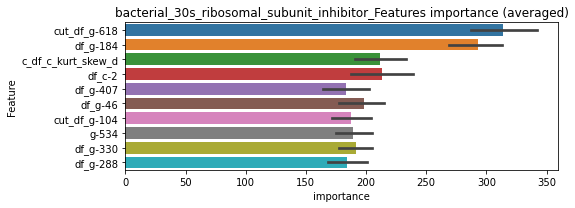

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0306078	valid_1's binary_logloss: 0.0626091
[600]	training's binary_logloss: 0.00902745	valid_1's binary_logloss: 0.0356626
[900]	training's binary_logloss: 0.0045754	valid_1's binary_logloss: 0.0283167
[1200]	training's binary_logloss: 0.00297706	valid_1's binary_logloss: 0.0255765
[1500]	training's binary_logloss: 0.0021884	valid_1's binary_logloss: 0.0237817
[1800]	training's binary_logloss: 0.00173901	valid_1's binary_logloss: 0.0227162
Early stopping, best iteration is:
[2026]	training's binary_logloss: 0.00151052	valid_1's binary_logloss: 0.0222885


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0306474	valid_1's binary_logloss: 0.0560982
[600]	training's binary_logloss: 0.00918634	valid_1's binary_logloss: 0.0282777
[900]	training's binary_logloss: 0.00464876	valid_1's binary_logloss: 0.0208264
[1200]	training's binary_logloss: 0.00301635	valid_1's binary_logloss: 0.0178928
[1500]	training's binary_logloss: 0.00221997	valid_1's binary_logloss: 0.0160274
[1800]	training's binary_logloss: 0.00175827	valid_1's binary_logloss: 0.0147729
[2100]	training's binary_logloss: 0.00146934	valid_1's binary_logloss: 0.0141827
[2400]	training's binary_logloss: 0.0012683	valid_1's binary_logloss: 0.0136588
[2700]	training's binary_logloss: 0.00111995	valid_1's binary_logloss: 0.0131542
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.00106021	valid_1's binary_logloss: 0.0129946


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0309056	valid_1's binary_logloss: 0.0516818
[600]	training's binary_logloss: 0.00920376	valid_1's binary_logloss: 0.0258466
[900]	training's binary_logloss: 0.00469727	valid_1's binary_logloss: 0.0195392
[1200]	training's binary_logloss: 0.0030443	valid_1's binary_logloss: 0.0166804
[1500]	training's binary_logloss: 0.00223673	valid_1's binary_logloss: 0.0152652
[1800]	training's binary_logloss: 0.00177322	valid_1's binary_logloss: 0.0143541
Early stopping, best iteration is:
[1896]	training's binary_logloss: 0.00166613	valid_1's binary_logloss: 0.0141427


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0306247	valid_1's binary_logloss: 0.0563222
[600]	training's binary_logloss: 0.00911305	valid_1's binary_logloss: 0.0295666
[900]	training's binary_logloss: 0.00462061	valid_1's binary_logloss: 0.0228947
[1200]	training's binary_logloss: 0.00297841	valid_1's binary_logloss: 0.0201591
[1500]	training's binary_logloss: 0.00218795	valid_1's binary_logloss: 0.0187394
[1800]	training's binary_logloss: 0.00173101	valid_1's binary_logloss: 0.0180514
[2100]	training's binary_logloss: 0.00144292	valid_1's binary_logloss: 0.0174869
Early stopping, best iteration is:
[2169]	training's binary_logloss: 0.0013897	valid_1's binary_logloss: 0.0173228


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.016687656308179748


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023613	valid_1's binary_logloss: 0.0746295
[600]	training's binary_logloss: 0.00364653	valid_1's binary_logloss: 0.045253
[900]	training's binary_logloss: 0.00134785	valid_1's binary_logloss: 0.0386587
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.00102728	valid_1's binary_logloss: 0.0377823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249887	valid_1's binary_logloss: 0.0652035
[600]	training's binary_logloss: 0.00383664	valid_1's binary_logloss: 0.0380898
[900]	training's binary_logloss: 0.0014013	valid_1's binary_logloss: 0.032984
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00131521	valid_1's binary_logloss: 0.0327789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254213	valid_1's binary_logloss: 0.0668153
[600]	training's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0120648, Threshold: 0.0358630, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.02510, conf_1:0.04662
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0358630
Num_p_label: 19.0, Expected: 13.4, Adj_threshold_2: 0.0558630
threshold: 0.0558630, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209852	valid_1's binary_logloss: 0.0568796
[600]	training's binary_logloss: 0.00321101	valid_1's binary_logloss: 0.0282221
[900]	training's binary_logloss: 0.00124642	valid_1's binary_logloss: 0.0228423
[1200]	training's binary_logloss: 0.000799336	valid_1's binary_logloss: 0.02148
Early stopping, best iteration is:
[1284]	training's binary_logloss: 0.000740598	valid_1's binary_logloss: 0.0212238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206958	valid_1's binary_logloss: 0.0642681
[600]	training's binary_logloss: 0.00320825	valid_1's binary_logloss: 0.0364257
[900]	training's binary_logloss: 0.00124421	valid_1's binary_logloss: 0.0307583
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.00124722	valid_1's binary_logloss: 0.03074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0490289, Threshold: 0.0558630, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0120542 Vs.target_rate: 0.00336, Num_p_label: 48.0, conf_0:0.04469, conf_1:0.06704
Num_p_label: 48.0, Expected: 13.4, Adj_threshold_1: 0.0558630
Num_p_label: 31.0, Expected: 13.4, Adj_threshold_2: 0.0758630
Num_p_label: 21.0, Expected: 13.4, Adj_threshold_3: 0.0958630
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_4: 0.1158630
threshold: 0.1158630, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207029	valid_1's binary_logloss: 0.0618273
[600]	training's binary_logloss: 0.00304103	valid_1's binary_logloss: 0.033006
[900]	training's binary_logloss: 0.00119118	valid_1's binary_logloss: 0.0276454
[1200]	training's binary_logloss: 0.000769709	valid_1's binary_logloss: 0.0262536
Early stopping, best iteration is:
[1185]	training's binary_logloss: 0.000780463	valid_1's binary_logloss: 0.0261525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208295	valid_1's binary_logloss: 0.0597543
[600]	training's binary_logloss: 0.00305038	valid_1's binary_logloss: 0.0317954
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00132113	valid_1's binary_logloss: 0.0274172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202468	valid_1's binary_logloss: 0.0411684
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0389412, Threshold: 0.1158630, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 643.0/3776
p_label_rate: 0.0042692 Vs.target_rate: 0.00336, Num_p_label: 17.0, conf_0:0.10428, conf_1:0.12745
threshold: 0.1158630, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3776, y_label_rate: 0.1702860


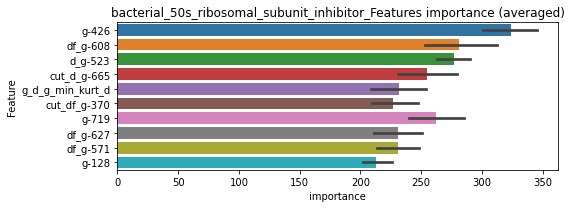

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0380539	valid_1's binary_logloss: 0.0806528
[600]	training's binary_logloss: 0.01153	valid_1's binary_logloss: 0.0481166
[900]	training's binary_logloss: 0.00583183	valid_1's binary_logloss: 0.0387396
[1200]	training's binary_logloss: 0.00374653	valid_1's binary_logloss: 0.0352738
[1500]	training's binary_logloss: 0.00271942	valid_1's binary_logloss: 0.0333401
[1800]	training's binary_logloss: 0.002137	valid_1's binary_logloss: 0.031611
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.0021414	valid_1's binary_logloss: 0.0315909


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375065	valid_1's binary_logloss: 0.0753311
[600]	training's binary_logloss: 0.0112392	valid_1's binary_logloss: 0.0392623
[900]	training's binary_logloss: 0.00572786	valid_1's binary_logloss: 0.0286981
[1200]	training's binary_logloss: 0.00368507	valid_1's binary_logloss: 0.0242529
[1500]	training's binary_logloss: 0.00269234	valid_1's binary_logloss: 0.0216099
[1800]	training's binary_logloss: 0.00212596	valid_1's binary_logloss: 0.0200809
[2100]	training's binary_logloss: 0.00176223	valid_1's binary_logloss: 0.0189403
Early stopping, best iteration is:
[2246]	training's binary_logloss: 0.00162925	valid_1's binary_logloss: 0.0184728


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0373088	valid_1's binary_logloss: 0.0758535
[600]	training's binary_logloss: 0.0113099	valid_1's binary_logloss: 0.0459473
[900]	training's binary_logloss: 0.00571389	valid_1's binary_logloss: 0.0380246
[1200]	training's binary_logloss: 0.00368143	valid_1's binary_logloss: 0.0352782
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.00347217	valid_1's binary_logloss: 0.0349921


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0373948	valid_1's binary_logloss: 0.0753705
[600]	training's binary_logloss: 0.0113053	valid_1's binary_logloss: 0.0413031
[900]	training's binary_logloss: 0.00572779	valid_1's binary_logloss: 0.0322013
[1200]	training's binary_logloss: 0.00369114	valid_1's binary_logloss: 0.028869
[1500]	training's binary_logloss: 0.00268909	valid_1's binary_logloss: 0.0268961
[1800]	training's binary_logloss: 0.00212117	valid_1's binary_logloss: 0.0256242
[2100]	training's binary_logloss: 0.00175416	valid_1's binary_logloss: 0.024774
Early stopping, best iteration is:
[2168]	training's binary_logloss: 0.00168873	valid_1's binary_logloss: 0.0245171


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.027393211517695776


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996538	valid_1's binary_logloss: 0.0244446
[600]	training's binary_logloss: 0.00134038	valid_1's binary_logloss: 0.0100508
[900]	training's binary_logloss: 0.000625522	valid_1's binary_logloss: 0.00782507
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000600032	valid_1's binary_logloss: 0.00778131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988103	valid_1's binary_logloss: 0.028963
[600]	training's binary_logloss: 0.00133419	valid_1's binary_logloss: 0.0132004
[900]	training's binary_logloss: 0.000613063	valid_1's binary_logloss: 0.010369
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000539914	valid_1's binary_logloss: 0.0101228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00991668	valid_1's binary_logloss: 0.0186254
[600]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0037796, Threshold: 0.0330957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02317, conf_1:0.04302
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0330957
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_2: 0.0530957
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.0730957
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_4: 0.0930957
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_5: 0.1130957
threshold: 0.1130957, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00913377	valid_1's binary_logloss: 0.0206887
[600]	training's binary_logloss: 0.00124853	valid_1's binary_logloss: 0.00721758
[900]	training's binary_logloss: 0.000590535	valid_1's binary_logloss: 0.00565757
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000556738	valid_1's binary_logloss: 0.00562092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00908619	valid_1's binary_logloss: 0.0275406
[600]	training's binary_logloss: 0.00125556	valid_1's binary_logloss: 0.0130854
[900]	training's binary_logloss: 0.000583932	valid_1's binary_logloss: 0.0104676
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000538502	valid_1's binary_logloss: 0.0102768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00903039	valid_1's binary_logloss: 0.0181327
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0796208, Threshold: 0.1130957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0113009 Vs.target_rate: 0.00151, Num_p_label: 45.0, conf_0:0.09048, conf_1:0.13571
Num_p_label: 45.0, Expected: 6.0, Adj_threshold_1: 0.1130957
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_2: 0.1330957
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_3: 0.1530957
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_4: 0.1730957
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_5: 0.1930957
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_6: 0.2130957
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_7: 0.2330957
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_8: 0.2530957
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_9: 0.2730957
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_10: 0.2930957
threshold: 0.3130957, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086422	valid_1's binary_logloss: 0.0282968
[600]	training's binary_logloss: 0.00120604	valid_1's binary_logloss: 0.0143809
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000608436	valid_1's binary_logloss: 0.0124785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00905324	valid_1's binary_logloss: 0.0201672
[600]	training's binary_logloss: 0.00123566	valid_1's binary_logloss: 0.00724178
[900]	training's binary_logloss: 0.000585597	valid_1's binary_logloss: 0.00572698
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000523942	valid_1's binary_logloss: 0.00552562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00901479	valid_1's binary_logloss: 0.0154941
[600]	training's binary_logloss: 0.00124199	valid_1's binary_logloss: 0.0042555
[900]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0887815, Threshold: 0.3130957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0075339 Vs.target_rate: 0.00151, Num_p_label: 30.0, conf_0:0.28179, conf_1:0.34441
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_1: 0.3130957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.3330957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_3: 0.3530957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_4: 0.3730957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_5: 0.3930957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_6: 0.4130957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_7: 0.4330957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_8: 0.4530957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_9: 0.4730957
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_10: 0.4930957
threshold: 0.5130957, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


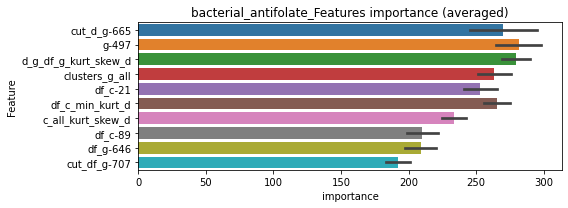

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202898	valid_1's binary_logloss: 0.0348624
[600]	training's binary_logloss: 0.00568836	valid_1's binary_logloss: 0.0163532
[900]	training's binary_logloss: 0.00295624	valid_1's binary_logloss: 0.0118357
[1200]	training's binary_logloss: 0.00197332	valid_1's binary_logloss: 0.0102025
[1500]	training's binary_logloss: 0.00148296	valid_1's binary_logloss: 0.00930879
[1800]	training's binary_logloss: 0.00119684	valid_1's binary_logloss: 0.00868695
[2100]	training's binary_logloss: 0.00101302	valid_1's binary_logloss: 0.00821279
[2400]	training's binary_logloss: 0.000885257	valid_1's binary_logloss: 0.00789107
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.000833836	valid_1's binary_logloss: 0.00773781


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208711	valid_1's binary_logloss: 0.0326711
[600]	training's binary_logloss: 0.00584542	valid_1's binary_logloss: 0.0123446
[900]	training's binary_logloss: 0.00302109	valid_1's binary_logloss: 0.00800694
[1200]	training's binary_logloss: 0.00200266	valid_1's binary_logloss: 0.00624066
[1500]	training's binary_logloss: 0.00150148	valid_1's binary_logloss: 0.00518686
[1800]	training's binary_logloss: 0.0012107	valid_1's binary_logloss: 0.00460784
[2100]	training's binary_logloss: 0.00102347	valid_1's binary_logloss: 0.00422061
[2400]	training's binary_logloss: 0.000893037	valid_1's binary_logloss: 0.00392644
[2700]	training's binary_logloss: 0.000797556	valid_1's binary_logloss: 0.00372019
[3000]	training's binary_logloss: 0.00072547	valid_1's binary_logloss: 0.00356505
Early stopping, best iteration is:
[3220]	training's binary_logloss: 0.000682947	valid_1's binary_logloss: 0.00345779


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020941	valid_1's binary_logloss: 0.0329705
[600]	training's binary_logloss: 0.00581029	valid_1's binary_logloss: 0.0128682
[900]	training's binary_logloss: 0.00298231	valid_1's binary_logloss: 0.00829724
[1200]	training's binary_logloss: 0.00198201	valid_1's binary_logloss: 0.00655801
[1500]	training's binary_logloss: 0.00148817	valid_1's binary_logloss: 0.00557136
[1800]	training's binary_logloss: 0.00120055	valid_1's binary_logloss: 0.00491251
[2100]	training's binary_logloss: 0.00101596	valid_1's binary_logloss: 0.00448909
[2400]	training's binary_logloss: 0.000886054	valid_1's binary_logloss: 0.00417356
[2700]	training's binary_logloss: 0.000790988	valid_1's binary_logloss: 0.00393115
[3000]	training's binary_logloss: 0.000719862	valid_1's binary_logloss: 0.00377842
Early stopping, best iteration is:
[3059]	training's binary_logloss: 0.000708008	valid_1's binary_logloss: 0.00374843


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209075	valid_1's binary_logloss: 0.0372471
[600]	training's binary_logloss: 0.00584958	valid_1's binary_logloss: 0.0165179
[900]	training's binary_logloss: 0.00301033	valid_1's binary_logloss: 0.0115139
[1200]	training's binary_logloss: 0.00199668	valid_1's binary_logloss: 0.00938135
[1500]	training's binary_logloss: 0.00149804	valid_1's binary_logloss: 0.00823958
[1800]	training's binary_logloss: 0.0012071	valid_1's binary_logloss: 0.00747214
[2100]	training's binary_logloss: 0.00101875	valid_1's binary_logloss: 0.00693223
[2400]	training's binary_logloss: 0.000890062	valid_1's binary_logloss: 0.00654037
Early stopping, best iteration is:
[2546]	training's binary_logloss: 0.00084002	valid_1's binary_logloss: 0.00634808


bacterial_antifolate logloss: 0.0053227581124015745


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268, target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0522784	valid_1's binary_logloss: 0.201052
[600]	training's binary_logloss: 0.0120297	valid_1's binary_logloss: 0.183138
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.0125767	valid_1's binary_logloss: 0.182699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0532587	valid_1's binary_logloss: 0.180495
[600]	training's binary_logloss: 0.0118415	valid_1's binary_logloss: 0.154094
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.0105893	valid_1's binary_logloss: 0.153539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0568366	valid_1's binary_logloss: 0.17683
[600]	training's binary_logloss: 0.0133766	valid_1's binary_logloss: 0.145459
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.0110628	valid_1's binary_logloss: 0.143845
Training un

1 / 3 AUC score:0.963
y_Threshold: 0.0471466, Threshold: 0.2210403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 276 → Positive_corect_labels: 581/3645
p_label_rate: 0.0100452 Vs.target_rate: 0.00806, Num_p_label: 40.0, conf_0:0.15473, conf_1:0.28735
threshold: 0.2210403, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 581.0/3645, y_label_rate: 0.1593964
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372587	valid_1's binary_logloss: 0.129351
[600]	training's binary_logloss: 0.00715117	valid_1's binary_logloss: 0.101577
[900]	training's binary_logloss: 0.00248837	valid_1's binary_logloss: 0.0942157
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00254387	valid_1's binary_logloss: 0.0941013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0367682	valid_1's binary_logloss: 0.122053
[600]	training's binary_logloss: 0.00708102	valid_1's binary_logloss: 0.0886296
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00280254	valid_1's binary_logloss: 0.0818464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0360361	valid_1's binary_logloss: 0.105676
[600]	training's binary_logloss: 0.00685575	valid_1's binary_logloss: 0.0772601
Early stopping, best iteration is:

2 / 3 AUC score:0.996
y_Threshold: 0.0539556, Threshold: 0.2210403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 549.0/3581
p_label_rate: 0.0213461 Vs.target_rate: 0.00806, Num_p_label: 85.0, conf_0:0.17683, conf_1:0.26525
Num_p_label: 85.0, Expected: 32.1, Adj_threshold_1: 0.2210403
Num_p_label: 80.0, Expected: 32.1, Adj_threshold_2: 0.2410403
Num_p_label: 75.0, Expected: 32.1, Adj_threshold_3: 0.2610403
Num_p_label: 68.0, Expected: 32.1, Adj_threshold_4: 0.2810403
Num_p_label: 63.0, Expected: 32.1, Adj_threshold_5: 0.3010403
Num_p_label: 60.0, Expected: 32.1, Adj_threshold_6: 0.3210403
Num_p_label: 58.0, Expected: 32.1, Adj_threshold_7: 0.3410403
Num_p_label: 57.0, Expected: 32.1, Adj_threshold_8: 0.3610403
Num_p_label: 55.0, Expected: 32.1, Adj_threshold_9: 0.3810403
Num_p_label: 53.0, Expected: 32.1, Adj_threshold_10: 0.4010403
threshold: 0.4210403, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 549.0/3581, y_label_rate: 0.1533091

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0291852	valid_1's binary_logloss: 0.112304
[600]	training's binary_logloss: 0.0053168	valid_1's binary_logloss: 0.0869629
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.002444	valid_1's binary_logloss: 0.0821359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.029206	valid_1's binary_logloss: 0.11404
[600]	training's binary_logloss: 0.00539321	valid_1's binary_logloss: 0.0893588
[900]	training's binary_logloss: 0.00201269	valid_1's binary_logloss: 0.0845502
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.00166283	valid_1's binary_logloss: 0.0838715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319539	valid_1's binary_logloss: 0.0832359
[600]	training's binary_logloss: 0.00587468	valid_1's binary_logloss: 0.0538148
[900]	training's binary_logloss: 0.00

3 / 3 AUC score:0.998
y_Threshold: 0.0548633, Threshold: 0.4210403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 532.0/3547
p_label_rate: 0.0180814 Vs.target_rate: 0.00806, Num_p_label: 72.0, conf_0:0.37894, conf_1:0.46314
Num_p_label: 72.0, Expected: 32.1, Adj_threshold_1: 0.4210403
Num_p_label: 70.0, Expected: 32.1, Adj_threshold_2: 0.4410403
Num_p_label: 69.0, Expected: 32.1, Adj_threshold_3: 0.4610403
Num_p_label: 66.0, Expected: 32.1, Adj_threshold_4: 0.4810403
Num_p_label: 63.0, Expected: 32.1, Adj_threshold_5: 0.5010403
Num_p_label: 62.0, Expected: 32.1, Adj_threshold_6: 0.5210403
Num_p_label: 60.0, Expected: 32.1, Adj_threshold_7: 0.5410403
Num_p_label: 59.0, Expected: 32.1, Adj_threshold_8: 0.5610403
Num_p_label: 55.0, Expected: 32.1, Adj_threshold_9: 0.5810403
Num_p_label: 51.0, Expected: 32.1, Adj_threshold_10: 0.6010403
threshold: 0.6210403, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 532.0/3547, y_label_rate: 0.1499859

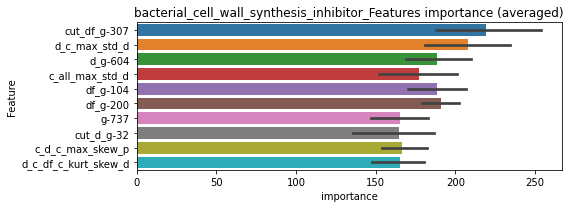

len(train_index) : 2660
len(valid_index) : 887
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0473337	valid_1's binary_logloss: 0.122901
[600]	training's binary_logloss: 0.0162023	valid_1's binary_logloss: 0.0947676
[900]	training's binary_logloss: 0.00822706	valid_1's binary_logloss: 0.0878762
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.00636349	valid_1's binary_logloss: 0.0862275


len(train_index) : 2660
len(valid_index) : 887
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0473855	valid_1's binary_logloss: 0.125888
[600]	training's binary_logloss: 0.0160151	valid_1's binary_logloss: 0.0984393
[900]	training's binary_logloss: 0.00821551	valid_1's binary_logloss: 0.09124
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00746979	valid_1's binary_logloss: 0.0905821


len(train_index) : 2660
len(valid_index) : 887
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.050565	valid_1's binary_logloss: 0.110527
[600]	training's binary_logloss: 0.017181	valid_1's binary_logloss: 0.0774695
[900]	training's binary_logloss: 0.0087948	valid_1's binary_logloss: 0.0680244
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.00602825	valid_1's binary_logloss: 0.0650345


len(train_index) : 2661
len(valid_index) : 886
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.049522	valid_1's binary_logloss: 0.119925
[600]	training's binary_logloss: 0.0166398	valid_1's binary_logloss: 0.086545
[900]	training's binary_logloss: 0.00851457	valid_1's binary_logloss: 0.0773177
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.0059342	valid_1's binary_logloss: 0.0744346


bacterial_cell_wall_synthesis_inhibitor logloss: 0.07907095619251467


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0283406	valid_1's binary_logloss: 0.075784
[600]	training's binary_logloss: 0.00467038	valid_1's binary_logloss: 0.0414702
[900]	training's binary_logloss: 0.00162007	valid_1's binary_logloss: 0.0322921
[1200]	training's binary_logloss: 0.00097509	valid_1's binary_logloss: 0.0297602
Early stopping, best iteration is:
[1398]	training's binary_logloss: 0.000818599	valid_1's binary_logloss: 0.0288222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027568	valid_1's binary_logloss: 0.0785634
[600]	training's binary_logloss: 0.00457484	valid_1's binary_logloss: 0.0483199
[900]	training's binary_logloss: 0.0015921	valid_1's binary_logloss: 0.0415959
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.00106348	valid_1's binary_logloss: 0.0402314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0125686, Threshold: 0.0345575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.02419, conf_1:0.04492
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0345575
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.0545575
threshold: 0.0545575, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228772	valid_1's binary_logloss: 0.0764691
[600]	training's binary_logloss: 0.00363563	valid_1's binary_logloss: 0.0492299
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00165297	valid_1's binary_logloss: 0.0445222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236573	valid_1's binary_logloss: 0.0675563
[600]	training's binary_logloss: 0.00373622	valid_1's binary_logloss: 0.0388113
[900]	training's binary_logloss: 0.00140368	valid_1's binary_logloss: 0.0332828
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.0011494	valid_1's binary_logloss: 0.0327361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023456	valid_1's binary_logloss: 0.0726638
[600]	training's binary_logloss: 0.00360088	valid_1's binary_logloss: 0.0466787
Early stopping, best iteration 

2 / 3 AUC score:0.999
y_Threshold: 0.0408175, Threshold: 0.0545575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 636.0/3764
p_label_rate: 0.0118031 Vs.target_rate: 0.00374, Num_p_label: 47.0, conf_0:0.04365, conf_1:0.06547
Num_p_label: 47.0, Expected: 14.9, Adj_threshold_1: 0.0545575
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_2: 0.0745575
Num_p_label: 14.0, Expected: 14.9, Adj_threshold_3: 0.0945575
threshold: 0.0945575, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 636.0/3764, y_label_rate: 0.1689692
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219227	valid_1's binary_logloss: 0.0565692
[600]	training's binary_logloss: 0.00344306	valid_1's binary_logloss: 0.0273245
[900]	training's binary_logloss: 0.00131241	valid_1's binary_logloss: 0.0215377
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000888465	valid_1's binary_logloss: 0.0197402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208536	valid_1's binary_logloss: 0.059198
[600]	training's binary_logloss: 0.0032662	valid_1's binary_logloss: 0.0367026
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00158914	valid_1's binary_logloss: 0.0339728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211583	valid_1's binary_logloss: 0.0750777
[600]	training's binary_logloss: 0.0032946	valid_1's binary_logloss: 0.0543364
Early stopping, best iteration 

3 / 3 AUC score:1.000
y_Threshold: 0.0319549, Threshold: 0.0945575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 629.0/3750
p_label_rate: 0.0050226 Vs.target_rate: 0.00374, Num_p_label: 20.0, conf_0:0.08510, conf_1:0.10401
threshold: 0.0945575, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 629.0/3750, y_label_rate: 0.1677333


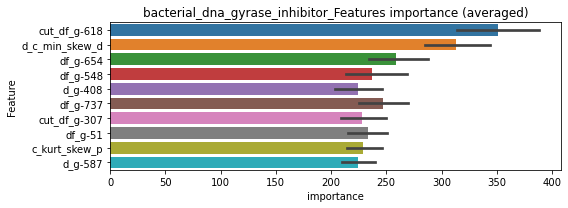

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0368958	valid_1's binary_logloss: 0.0964115
[600]	training's binary_logloss: 0.0115502	valid_1's binary_logloss: 0.0703961
[900]	training's binary_logloss: 0.00586324	valid_1's binary_logloss: 0.0641974
Early stopping, best iteration is:
[1133]	training's binary_logloss: 0.00411308	valid_1's binary_logloss: 0.0613441


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0382286	valid_1's binary_logloss: 0.0796202
[600]	training's binary_logloss: 0.0119286	valid_1's binary_logloss: 0.0518885
[900]	training's binary_logloss: 0.00604405	valid_1's binary_logloss: 0.044392
[1200]	training's binary_logloss: 0.003886	valid_1's binary_logloss: 0.0418035
[1500]	training's binary_logloss: 0.00283421	valid_1's binary_logloss: 0.0404961
Early stopping, best iteration is:
[1657]	training's binary_logloss: 0.00248348	valid_1's binary_logloss: 0.0400838


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0396222	valid_1's binary_logloss: 0.0714589
[600]	training's binary_logloss: 0.012406	valid_1's binary_logloss: 0.0395383
[900]	training's binary_logloss: 0.00624864	valid_1's binary_logloss: 0.0301346
[1200]	training's binary_logloss: 0.00399889	valid_1's binary_logloss: 0.0259653
[1500]	training's binary_logloss: 0.0029077	valid_1's binary_logloss: 0.0239324
[1800]	training's binary_logloss: 0.00228211	valid_1's binary_logloss: 0.0225525
[2100]	training's binary_logloss: 0.00188961	valid_1's binary_logloss: 0.0216274
[2400]	training's binary_logloss: 0.0016173	valid_1's binary_logloss: 0.020911
[2700]	training's binary_logloss: 0.00141878	valid_1's binary_logloss: 0.0203451
Early stopping, best iteration is:
[2965]	training's binary_logloss: 0.00128473	valid_1's binary_logloss: 0.0199489


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0376241	valid_1's binary_logloss: 0.076146
[600]	training's binary_logloss: 0.0118088	valid_1's binary_logloss: 0.0448577
[900]	training's binary_logloss: 0.00601452	valid_1's binary_logloss: 0.0349882
[1200]	training's binary_logloss: 0.00387558	valid_1's binary_logloss: 0.0306184
[1500]	training's binary_logloss: 0.00282694	valid_1's binary_logloss: 0.0283244
[1800]	training's binary_logloss: 0.00222424	valid_1's binary_logloss: 0.026673
Early stopping, best iteration is:
[1893]	training's binary_logloss: 0.00208921	valid_1's binary_logloss: 0.0263328


bacterial_dna_gyrase_inhibitor logloss: 0.03693472485603419


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0295728	valid_1's binary_logloss: 0.128667
[600]	training's binary_logloss: 0.00518031	valid_1's binary_logloss: 0.105732
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00356855	valid_1's binary_logloss: 0.104946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321157	valid_1's binary_logloss: 0.0967272
[600]	training's binary_logloss: 0.00575318	valid_1's binary_logloss: 0.0683198
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00259056	valid_1's binary_logloss: 0.0644049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325278	valid_1's binary_logloss: 0.0840908
[600]	training's binary_logloss: 0.0060315	valid_1's binary_logloss: 0.0553605
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.002492	valid_1's binary_logloss: 0.0513896
T

1 / 3 AUC score:0.992
y_Threshold: 0.0174371, Threshold: 0.0486385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3756
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.03405, conf_1:0.06323
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0486385
Num_p_label: 19.0, Expected: 19.2, Adj_threshold_2: 0.0686385
threshold: 0.0686385, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 634.0/3756, y_label_rate: 0.1687966
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257669	valid_1's binary_logloss: 0.0982407
[600]	training's binary_logloss: 0.0042574	valid_1's binary_logloss: 0.0732041
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00272098	valid_1's binary_logloss: 0.0698815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.026806	valid_1's binary_logloss: 0.0824932
[600]	training's binary_logloss: 0.00449834	valid_1's binary_logloss: 0.0570835
[900]	training's binary_logloss: 0.0016498	valid_1's binary_logloss: 0.0497758
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.00171947	valid_1's binary_logloss: 0.0497105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271696	valid_1's binary_logloss: 0.0720114
[600]	training's binary_logloss: 0.00455591	valid_1's binary_logloss: 0.0403391
[900]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0363409, Threshold: 0.0686385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 624.0/3736
p_label_rate: 0.0092918 Vs.target_rate: 0.00483, Num_p_label: 37.0, conf_0:0.05491, conf_1:0.08237
Num_p_label: 37.0, Expected: 19.2, Adj_threshold_1: 0.0686385
Num_p_label: 27.0, Expected: 19.2, Adj_threshold_2: 0.0886385
threshold: 0.0886385, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 624.0/3736, y_label_rate: 0.1670236
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243393	valid_1's binary_logloss: 0.0807736
[600]	training's binary_logloss: 0.00406809	valid_1's binary_logloss: 0.0560675
[900]	training's binary_logloss: 0.00153529	valid_1's binary_logloss: 0.0511958
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.00147605	valid_1's binary_logloss: 0.0511406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243267	valid_1's binary_logloss: 0.0793242
[600]	training's binary_logloss: 0.00402299	valid_1's binary_logloss: 0.0544764
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00234608	valid_1's binary_logloss: 0.0518229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245397	valid_1's binary_logloss: 0.0687927
[600]	training's binary_logloss: 0.00399684	valid_1's binary_logloss: 0.0405853
[900]	training's binary_loglos

3 / 3 AUC score:0.999
y_Threshold: 0.0303542, Threshold: 0.0886385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 615.0/3718
p_label_rate: 0.0057760 Vs.target_rate: 0.00483, Num_p_label: 23.0, conf_0:0.07977, conf_1:0.09750
threshold: 0.0886385, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 615.0/3718, y_label_rate: 0.1654115


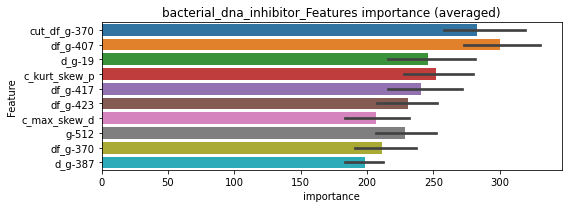

len(train_index) : 2788
len(valid_index) : 930
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423208	valid_1's binary_logloss: 0.095768
[600]	training's binary_logloss: 0.0136383	valid_1's binary_logloss: 0.0587909
[900]	training's binary_logloss: 0.00688449	valid_1's binary_logloss: 0.0477002
[1200]	training's binary_logloss: 0.00439113	valid_1's binary_logloss: 0.0425384
[1500]	training's binary_logloss: 0.00317893	valid_1's binary_logloss: 0.0395317
[1800]	training's binary_logloss: 0.00248358	valid_1's binary_logloss: 0.0377951
[2100]	training's binary_logloss: 0.00204047	valid_1's binary_logloss: 0.0364588
[2400]	training's binary_logloss: 0.00174159	valid_1's binary_logloss: 0.0355679
[2700]	training's binary_logloss: 0.00152394	valid_1's binary_logloss: 0.0347981
Early stopping, best iteration is:
[2705]	training's binary_logloss: 0.00152083	valid_1's binary_logloss: 0.034766


len(train_index) : 2788
len(valid_index) : 930
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412805	valid_1's binary_logloss: 0.0956037
[600]	training's binary_logloss: 0.0134031	valid_1's binary_logloss: 0.065029
[900]	training's binary_logloss: 0.00673847	valid_1's binary_logloss: 0.0560782
[1200]	training's binary_logloss: 0.00429701	valid_1's binary_logloss: 0.0523703
Early stopping, best iteration is:
[1397]	training's binary_logloss: 0.0034518	valid_1's binary_logloss: 0.0507812


len(train_index) : 2789
len(valid_index) : 929
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0425011	valid_1's binary_logloss: 0.0793459
[600]	training's binary_logloss: 0.0138087	valid_1's binary_logloss: 0.0487733
[900]	training's binary_logloss: 0.00698556	valid_1's binary_logloss: 0.0401645
[1200]	training's binary_logloss: 0.00443683	valid_1's binary_logloss: 0.0365709
[1500]	training's binary_logloss: 0.00321628	valid_1's binary_logloss: 0.0347116
Early stopping, best iteration is:
[1611]	training's binary_logloss: 0.00291197	valid_1's binary_logloss: 0.0342382


len(train_index) : 2789
len(valid_index) : 929
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0422996	valid_1's binary_logloss: 0.0886701
[600]	training's binary_logloss: 0.0138266	valid_1's binary_logloss: 0.0552416
[900]	training's binary_logloss: 0.00702624	valid_1's binary_logloss: 0.0456243
[1200]	training's binary_logloss: 0.00446891	valid_1's binary_logloss: 0.0415985
[1500]	training's binary_logloss: 0.00322763	valid_1's binary_logloss: 0.0394783
Early stopping, best iteration is:
[1656]	training's binary_logloss: 0.00281941	valid_1's binary_logloss: 0.0387544


bacterial_dna_inhibitor logloss: 0.03963663049080294


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481977	valid_1's binary_logloss: 0.00909086
[600]	training's binary_logloss: 0.000593374	valid_1's binary_logloss: 0.00189721
[900]	training's binary_logloss: 0.000343867	valid_1's binary_logloss: 0.00133653
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000340672	valid_1's binary_logloss: 0.00132932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461274	valid_1's binary_logloss: 0.010306
[600]	training's binary_logloss: 0.000587067	valid_1's binary_logloss: 0.00297811
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000368639	valid_1's binary_logloss: 0.00245235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00495436	valid_1's binary_logloss: 0.00737566
[600]	training's binary_logloss: 0.000610759	valid_1's binary_logloss: 0.00168811
Early stopping

1 / 3 AUC score:1.000
y_Threshold: 0.0021846, Threshold: 0.0059818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00419, conf_1:0.00778
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0059818
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0259818
threshold: 0.0259818, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451579	valid_1's binary_logloss: 0.0083844
[600]	training's binary_logloss: 0.000567727	valid_1's binary_logloss: 0.00187754
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000354517	valid_1's binary_logloss: 0.00138294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429861	valid_1's binary_logloss: 0.0100789
[600]	training's binary_logloss: 0.000546669	valid_1's binary_logloss: 0.0029316
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00033412	valid_1's binary_logloss: 0.0024088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450723	valid_1's binary_logloss: 0.0062931
[600]	training's binary_logloss: 0.000568332	valid_1's binary_logloss: 0.00150973
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.00034136	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0683905, Threshold: 0.0259818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00080, Num_p_label: 18.0, conf_0:0.02079, conf_1:0.03118
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_1: 0.0259818
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0459818
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_3: 0.0659818
threshold: 0.0659818, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451579	valid_1's binary_logloss: 0.0083844
[600]	training's binary_logloss: 0.000567727	valid_1's binary_logloss: 0.00187754
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000354517	valid_1's binary_logloss: 0.00138294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429861	valid_1's binary_logloss: 0.0100789
[600]	training's binary_logloss: 0.000546669	valid_1's binary_logloss: 0.0029316
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00033412	valid_1's binary_logloss: 0.0024088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450723	valid_1's binary_logloss: 0.0062931
[600]	training's binary_logloss: 0.000568332	valid_1's binary_logloss: 0.00150973
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.00034136	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0683905, Threshold: 0.0659818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00080, Num_p_label: 2.0, conf_0:0.05938, conf_1:0.07258
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_1: 0.0659818
threshold: 0.0659818, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


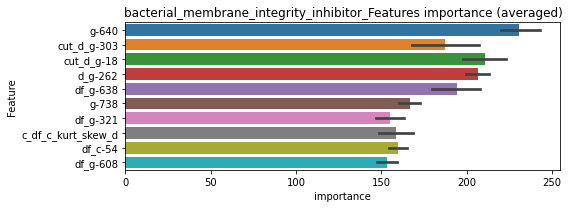

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115764	valid_1's binary_logloss: 0.0164807
[600]	training's binary_logloss: 0.00293219	valid_1's binary_logloss: 0.00508589
[900]	training's binary_logloss: 0.00152598	valid_1's binary_logloss: 0.00299102
[1200]	training's binary_logloss: 0.00103885	valid_1's binary_logloss: 0.00222598
[1500]	training's binary_logloss: 0.000795729	valid_1's binary_logloss: 0.00180737
[1800]	training's binary_logloss: 0.000654327	valid_1's binary_logloss: 0.00156006
[2100]	training's binary_logloss: 0.000562633	valid_1's binary_logloss: 0.00139818
[2400]	training's binary_logloss: 0.000498236	valid_1's binary_logloss: 0.00127994
[2700]	training's binary_logloss: 0.000450279	valid_1's binary_logloss: 0.0011891
[3000]	training's binary_logloss: 0.000415548	valid_1's binary_logloss: 0.00112137
[3300]	training's binary_logloss: 0.000389844	valid_1's binary_logloss: 0.00106964
[3600]	training's binary_logloss: 0.

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114112	valid_1's binary_logloss: 0.0183566
[600]	training's binary_logloss: 0.00288384	valid_1's binary_logloss: 0.00627426
[900]	training's binary_logloss: 0.00150125	valid_1's binary_logloss: 0.00395841
[1200]	training's binary_logloss: 0.00102128	valid_1's binary_logloss: 0.00304511
[1500]	training's binary_logloss: 0.000782855	valid_1's binary_logloss: 0.00253832
[1800]	training's binary_logloss: 0.000643031	valid_1's binary_logloss: 0.00224255
[2100]	training's binary_logloss: 0.000552896	valid_1's binary_logloss: 0.00204281
[2400]	training's binary_logloss: 0.000490707	valid_1's binary_logloss: 0.00190457
[2700]	training's binary_logloss: 0.000444429	valid_1's binary_logloss: 0.00179441
[3000]	training's binary_logloss: 0.000410454	valid_1's binary_logloss: 0.00171723
[3300]	training's binary_logloss: 0.000384793	valid_1's binary_logloss: 0.00165381
[3600]	training's binary_logloss: 0

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116984	valid_1's binary_logloss: 0.0138474
[600]	training's binary_logloss: 0.00292847	valid_1's binary_logloss: 0.00407458
[900]	training's binary_logloss: 0.00152965	valid_1's binary_logloss: 0.00234227
[1200]	training's binary_logloss: 0.00103767	valid_1's binary_logloss: 0.00167757
[1500]	training's binary_logloss: 0.000793875	valid_1's binary_logloss: 0.00135226
[1800]	training's binary_logloss: 0.000652684	valid_1's binary_logloss: 0.00115109
[2100]	training's binary_logloss: 0.000560466	valid_1's binary_logloss: 0.00101858
[2400]	training's binary_logloss: 0.000496411	valid_1's binary_logloss: 0.000926064
[2700]	training's binary_logloss: 0.000449129	valid_1's binary_logloss: 0.000855245
[3000]	training's binary_logloss: 0.000414626	valid_1's binary_logloss: 0.000803265
[3300]	training's binary_logloss: 0.000389383	valid_1's binary_logloss: 0.000764788
[3600]	training's binary_loglos

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113535	valid_1's binary_logloss: 0.0176206
[600]	training's binary_logloss: 0.00286146	valid_1's binary_logloss: 0.00671642
[900]	training's binary_logloss: 0.0014978	valid_1's binary_logloss: 0.00450743
[1200]	training's binary_logloss: 0.00101939	valid_1's binary_logloss: 0.00362414
[1500]	training's binary_logloss: 0.000781774	valid_1's binary_logloss: 0.0031657
[1800]	training's binary_logloss: 0.000642517	valid_1's binary_logloss: 0.0028852
[2100]	training's binary_logloss: 0.000551803	valid_1's binary_logloss: 0.00269604
[2400]	training's binary_logloss: 0.000488154	valid_1's binary_logloss: 0.00254765
[2700]	training's binary_logloss: 0.000442978	valid_1's binary_logloss: 0.00245167
[3000]	training's binary_logloss: 0.000409375	valid_1's binary_logloss: 0.00235852
[3300]	training's binary_logloss: 0.000383945	valid_1's binary_logloss: 0.0022933
[3600]	training's binary_logloss: 0.000

bacterial_membrane_integrity_inhibitor logloss: 0.0013616473586004017


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00873569	valid_1's binary_logloss: 0.0287278
[600]	training's binary_logloss: 0.00109056	valid_1's binary_logloss: 0.0143175
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000590597	valid_1's binary_logloss: 0.0127081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00944327	valid_1's binary_logloss: 0.0150367
[600]	training's binary_logloss: 0.00115877	valid_1's binary_logloss: 0.00299937
[900]	training's binary_logloss: 0.000535687	valid_1's binary_logloss: 0.0017618
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000488983	valid_1's binary_logloss: 0.00165891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00926383	valid_1's binary_logloss: 0.0144447
[600]	training's binary_logloss: 0.00114077	valid_1's binary_logloss: 0.00290682
[900]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0041452, Threshold: 0.0253959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.01778, conf_1:0.03301
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0253959
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0453959
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_3: 0.0653959
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_4: 0.0853959
threshold: 0.0853959, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00802949	valid_1's binary_logloss: 0.0291294
[600]	training's binary_logloss: 0.00100182	valid_1's binary_logloss: 0.0154811
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000529692	valid_1's binary_logloss: 0.0140946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00853251	valid_1's binary_logloss: 0.0133769
[600]	training's binary_logloss: 0.00107347	valid_1's binary_logloss: 0.00238489
[900]	training's binary_logloss: 0.000504377	valid_1's binary_logloss: 0.00132387
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000457128	valid_1's binary_logloss: 0.00122155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00821981	valid_1's binary_logloss: 0.0118345
[600]	training's binary_logloss: 0.00105909	valid_1's binary_logloss: 0.00205072
[900]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0214299, Threshold: 0.0853959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0082873 Vs.target_rate: 0.00130, Num_p_label: 33.0, conf_0:0.06832, conf_1:0.10248
Num_p_label: 33.0, Expected: 5.2, Adj_threshold_1: 0.0853959
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_2: 0.1053959
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_3: 0.1253959
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.1453959
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.1653959
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_6: 0.1853959
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_7: 0.2053959
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_8: 0.2253959
threshold: 0.2253959, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00823846	valid_1's binary_logloss: 0.0147789
[600]	training's binary_logloss: 0.00102119	valid_1's binary_logloss: 0.0028896
[900]	training's binary_logloss: 0.000488428	valid_1's binary_logloss: 0.00167478
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000446127	valid_1's binary_logloss: 0.0015798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00846008	valid_1's binary_logloss: 0.0179712
[600]	training's binary_logloss: 0.00104966	valid_1's binary_logloss: 0.00378646
[900]	training's binary_logloss: 0.00049804	valid_1's binary_logloss: 0.00234378
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000462375	valid_1's binary_logloss: 0.00222611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00805535	valid_1's binary_logloss: 0.015063
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0344927, Threshold: 0.2253959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00130, Num_p_label: 13.0, conf_0:0.20286, conf_1:0.24794
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_1: 0.2253959
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_2: 0.2453959
threshold: 0.2453959, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


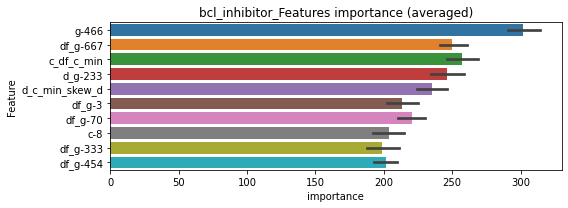

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183588	valid_1's binary_logloss: 0.0290552
[600]	training's binary_logloss: 0.00485813	valid_1's binary_logloss: 0.0100085
[900]	training's binary_logloss: 0.00248377	valid_1's binary_logloss: 0.00595652
[1200]	training's binary_logloss: 0.00164836	valid_1's binary_logloss: 0.00435929
[1500]	training's binary_logloss: 0.00123812	valid_1's binary_logloss: 0.00354018
[1800]	training's binary_logloss: 0.00100103	valid_1's binary_logloss: 0.00301446
[2100]	training's binary_logloss: 0.000848591	valid_1's binary_logloss: 0.00267692
[2400]	training's binary_logloss: 0.000741116	valid_1's binary_logloss: 0.00242365
[2700]	training's binary_logloss: 0.000663322	valid_1's binary_logloss: 0.00223508
[3000]	training's binary_logloss: 0.00060568	valid_1's binary_logloss: 0.00209956
[3300]	training's binary_logloss: 0.000561703	valid_1's binary_logloss: 0.00198299
[3600]	training's binary_logloss: 0.000

len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188346	valid_1's binary_logloss: 0.0302613
[600]	training's binary_logloss: 0.00497841	valid_1's binary_logloss: 0.0105889
[900]	training's binary_logloss: 0.00252747	valid_1's binary_logloss: 0.0064056
[1200]	training's binary_logloss: 0.00167288	valid_1's binary_logloss: 0.00478517
[1500]	training's binary_logloss: 0.00125656	valid_1's binary_logloss: 0.00392148
[1800]	training's binary_logloss: 0.00101665	valid_1's binary_logloss: 0.0034416
[2100]	training's binary_logloss: 0.00086103	valid_1's binary_logloss: 0.00309775
[2400]	training's binary_logloss: 0.000752508	valid_1's binary_logloss: 0.00283758
[2700]	training's binary_logloss: 0.000672834	valid_1's binary_logloss: 0.00266006
[3000]	training's binary_logloss: 0.000614308	valid_1's binary_logloss: 0.0025235
[3300]	training's binary_logloss: 0.000568083	valid_1's binary_logloss: 0.00240982
[3600]	training's binary_logloss: 0.000534

len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184454	valid_1's binary_logloss: 0.0270015
[600]	training's binary_logloss: 0.00487537	valid_1's binary_logloss: 0.0104732
[900]	training's binary_logloss: 0.00250332	valid_1's binary_logloss: 0.00717629
[1200]	training's binary_logloss: 0.00166266	valid_1's binary_logloss: 0.00585111
[1500]	training's binary_logloss: 0.00124735	valid_1's binary_logloss: 0.00510747
[1800]	training's binary_logloss: 0.00100777	valid_1's binary_logloss: 0.00465602
[2100]	training's binary_logloss: 0.000854401	valid_1's binary_logloss: 0.0043541
[2400]	training's binary_logloss: 0.000746462	valid_1's binary_logloss: 0.00412502
[2700]	training's binary_logloss: 0.000668072	valid_1's binary_logloss: 0.00396334
Early stopping, best iteration is:
[2947]	training's binary_logloss: 0.000618039	valid_1's binary_logloss: 0.00384387


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186538	valid_1's binary_logloss: 0.0302457
[600]	training's binary_logloss: 0.00492294	valid_1's binary_logloss: 0.0138668
[900]	training's binary_logloss: 0.0025056	valid_1's binary_logloss: 0.0106477
[1200]	training's binary_logloss: 0.00165989	valid_1's binary_logloss: 0.00927929
[1500]	training's binary_logloss: 0.00124604	valid_1's binary_logloss: 0.00854575
[1800]	training's binary_logloss: 0.00100865	valid_1's binary_logloss: 0.0081928
[2100]	training's binary_logloss: 0.000854512	valid_1's binary_logloss: 0.00791129
[2400]	training's binary_logloss: 0.000747677	valid_1's binary_logloss: 0.00767434
Early stopping, best iteration is:
[2409]	training's binary_logloss: 0.000745065	valid_1's binary_logloss: 0.00766996


bcl_inhibitor logloss: 0.003867110212898586


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285, target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0094666	valid_1's binary_logloss: 0.020953
[600]	training's binary_logloss: 0.00131926	valid_1's binary_logloss: 0.00688035
[900]	training's binary_logloss: 0.00061401	valid_1's binary_logloss: 0.00490047
Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.000524357	valid_1's binary_logloss: 0.00464153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091587	valid_1's binary_logloss: 0.0331503
[600]	training's binary_logloss: 0.00125882	valid_1's binary_logloss: 0.0194028
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00106694	valid_1's binary_logloss: 0.0189056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.009944	valid_1's binary_logloss: 0.0172236
[600]	training's binary_logloss: 0.00135294	valid_1's binary_logloss: 0.00455924
[900]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0045232, Threshold: 0.0428240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160, Num_p_label: 40.0, conf_0:0.02998, conf_1:0.05567
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0428240
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_2: 0.0628240
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_3: 0.0828240
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_4: 0.1028240
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_5: 0.1228240
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_6: 0.1428240
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_7: 0.1628240
threshold: 0.1628240, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00857151	valid_1's binary_logloss: 0.0178979
[600]	training's binary_logloss: 0.00120549	valid_1's binary_logloss: 0.00545572
[900]	training's binary_logloss: 0.000578361	valid_1's binary_logloss: 0.0039181
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000572948	valid_1's binary_logloss: 0.0039039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833256	valid_1's binary_logloss: 0.030508
[600]	training's binary_logloss: 0.00116252	valid_1's binary_logloss: 0.0206525
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000965211	valid_1's binary_logloss: 0.0201668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00886292	valid_1's binary_logloss: 0.0160519
[600]	training's binary_logloss: 0.00122383	valid_1's binary_logloss: 0.00436614
[900]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0632730, Threshold: 0.1628240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0135610 Vs.target_rate: 0.00160, Num_p_label: 54.0, conf_0:0.13026, conf_1:0.19539
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.1628240
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_2: 0.1828240
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_3: 0.2028240
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_4: 0.2228240
Num_p_label: 43.0, Expected: 6.4, Adj_threshold_5: 0.2428240
Num_p_label: 37.0, Expected: 6.4, Adj_threshold_6: 0.2628240
Num_p_label: 35.0, Expected: 6.4, Adj_threshold_7: 0.2828240
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_8: 0.3028240
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_9: 0.3228240
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_10: 0.3428240
threshold: 0.3628240, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00828268	valid_1's binary_logloss: 0.0198844
[600]	training's binary_logloss: 0.00116507	valid_1's binary_logloss: 0.00662238
[900]	training's binary_logloss: 0.000556439	valid_1's binary_logloss: 0.00455373
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000522323	valid_1's binary_logloss: 0.00446097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00823723	valid_1's binary_logloss: 0.0307883
[600]	training's binary_logloss: 0.00114113	valid_1's binary_logloss: 0.0206038
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000718335	valid_1's binary_logloss: 0.0191496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00827852	valid_1's binary_logloss: 0.0195422
[600]	training's binary_logloss: 0.0011459	valid_1's binary_logloss: 0.00861233
[900]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0309507, Threshold: 0.3628240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0102963 Vs.target_rate: 0.00160, Num_p_label: 41.0, conf_0:0.32654, conf_1:0.39911
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_1: 0.3628240
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_2: 0.3828240
Num_p_label: 38.0, Expected: 6.4, Adj_threshold_3: 0.4028240
Num_p_label: 38.0, Expected: 6.4, Adj_threshold_4: 0.4228240
Num_p_label: 37.0, Expected: 6.4, Adj_threshold_5: 0.4428240
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_6: 0.4628240
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_7: 0.4828240
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_8: 0.5028240
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_9: 0.5228240
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_10: 0.5428240
threshold: 0.5628240, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


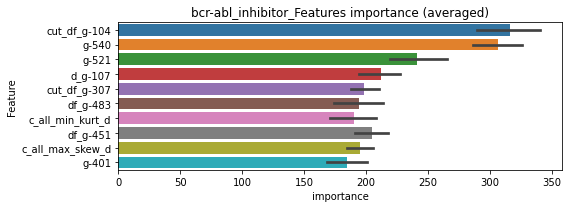

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196178	valid_1's binary_logloss: 0.0348896
[600]	training's binary_logloss: 0.0054759	valid_1's binary_logloss: 0.0159492
[900]	training's binary_logloss: 0.00285443	valid_1's binary_logloss: 0.0114556
[1200]	training's binary_logloss: 0.00189351	valid_1's binary_logloss: 0.00956681
[1500]	training's binary_logloss: 0.00142694	valid_1's binary_logloss: 0.00856701
[1800]	training's binary_logloss: 0.00115039	valid_1's binary_logloss: 0.00783458
[2100]	training's binary_logloss: 0.00097187	valid_1's binary_logloss: 0.00733677
[2400]	training's binary_logloss: 0.000849161	valid_1's binary_logloss: 0.00700877
[2700]	training's binary_logloss: 0.000760254	valid_1's binary_logloss: 0.00677138
Early stopping, best iteration is:
[2703]	training's binary_logloss: 0.000759354	valid_1's binary_logloss: 0.00676795


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194291	valid_1's binary_logloss: 0.0352224
[600]	training's binary_logloss: 0.00546371	valid_1's binary_logloss: 0.0171659
[900]	training's binary_logloss: 0.00283099	valid_1's binary_logloss: 0.0129157
[1200]	training's binary_logloss: 0.00187378	valid_1's binary_logloss: 0.011092
[1500]	training's binary_logloss: 0.00141384	valid_1's binary_logloss: 0.0100415
[1800]	training's binary_logloss: 0.00113998	valid_1's binary_logloss: 0.00935442
[2100]	training's binary_logloss: 0.00096605	valid_1's binary_logloss: 0.00895598
[2400]	training's binary_logloss: 0.000842994	valid_1's binary_logloss: 0.00858002
Early stopping, best iteration is:
[2546]	training's binary_logloss: 0.000796712	valid_1's binary_logloss: 0.00843596


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196229	valid_1's binary_logloss: 0.0373464
[600]	training's binary_logloss: 0.00551781	valid_1's binary_logloss: 0.020168
[900]	training's binary_logloss: 0.00284119	valid_1's binary_logloss: 0.0163137
[1200]	training's binary_logloss: 0.00189114	valid_1's binary_logloss: 0.0145494
Early stopping, best iteration is:
[1337]	training's binary_logloss: 0.00163992	valid_1's binary_logloss: 0.0140995


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199863	valid_1's binary_logloss: 0.0372306
[600]	training's binary_logloss: 0.00552298	valid_1's binary_logloss: 0.0201612
[900]	training's binary_logloss: 0.00284344	valid_1's binary_logloss: 0.0166918
[1200]	training's binary_logloss: 0.00188785	valid_1's binary_logloss: 0.0152561
[1500]	training's binary_logloss: 0.00141678	valid_1's binary_logloss: 0.0146565
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.00127226	valid_1's binary_logloss: 0.0143578


bcr-abl_inhibitor logloss: 0.010913557188267236


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198963	valid_1's binary_logloss: 0.0678682
[600]	training's binary_logloss: 0.00275789	valid_1's binary_logloss: 0.0390218
[900]	training's binary_logloss: 0.00107278	valid_1's binary_logloss: 0.0342086
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000906246	valid_1's binary_logloss: 0.0335287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201048	valid_1's binary_logloss: 0.0513401
[600]	training's binary_logloss: 0.00288052	valid_1's binary_logloss: 0.0229647
[900]	training's binary_logloss: 0.00110178	valid_1's binary_logloss: 0.0178292
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000826154	valid_1's binary_logloss: 0.016862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215203	valid_1's binary_logloss: 0.0504529
[600]	training's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0084004, Threshold: 0.0214420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.01501, conf_1:0.02787
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0214420
Num_p_label: 14.0, Expected: 11.2, Adj_threshold_2: 0.0414420
threshold: 0.0414420, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183057	valid_1's binary_logloss: 0.0612666
[600]	training's binary_logloss: 0.0026096	valid_1's binary_logloss: 0.0386593
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00125406	valid_1's binary_logloss: 0.0365873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189533	valid_1's binary_logloss: 0.055553
[600]	training's binary_logloss: 0.00265925	valid_1's binary_logloss: 0.0277761
[900]	training's binary_logloss: 0.00104055	valid_1's binary_logloss: 0.0234511
Early stopping, best iteration is:
[1104]	training's binary_logloss: 0.000756812	valid_1's binary_logloss: 0.0224512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018992	valid_1's binary_logloss: 0.0392579
[600]	training's binary_logloss: 0.00274556	valid_1's binary_logloss: 0.0149226
[900]	training's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0342090, Threshold: 0.0414420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0077850 Vs.target_rate: 0.00281, Num_p_label: 31.0, conf_0:0.03315, conf_1:0.04973
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_1: 0.0414420
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_2: 0.0614420
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_3: 0.0814420
threshold: 0.0814420, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184905	valid_1's binary_logloss: 0.0594889
[600]	training's binary_logloss: 0.00262172	valid_1's binary_logloss: 0.0329622
[900]	training's binary_logloss: 0.00101791	valid_1's binary_logloss: 0.0289243
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000932674	valid_1's binary_logloss: 0.028699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179646	valid_1's binary_logloss: 0.0432722
[600]	training's binary_logloss: 0.0026355	valid_1's binary_logloss: 0.0178372
[900]	training's binary_logloss: 0.00103116	valid_1's binary_logloss: 0.013793
Early stopping, best iteration is:
[1162]	training's binary_logloss: 0.000702086	valid_1's binary_logloss: 0.0127713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185586	valid_1's binary_logloss: 0.0451762
[600]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0289519, Threshold: 0.0814420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0032647 Vs.target_rate: 0.00281, Num_p_label: 13.0, conf_0:0.07330, conf_1:0.08959
threshold: 0.0814420, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


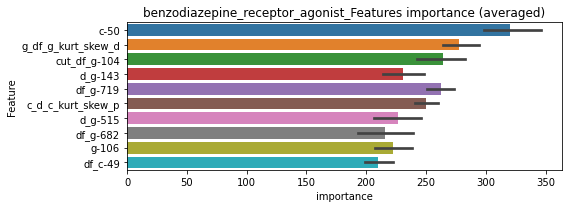

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0344986	valid_1's binary_logloss: 0.0631487
[600]	training's binary_logloss: 0.0100818	valid_1's binary_logloss: 0.0322604
[900]	training's binary_logloss: 0.00504081	valid_1's binary_logloss: 0.0242868
[1200]	training's binary_logloss: 0.00322546	valid_1's binary_logloss: 0.0210168
[1500]	training's binary_logloss: 0.00235238	valid_1's binary_logloss: 0.019214
[1800]	training's binary_logloss: 0.00185638	valid_1's binary_logloss: 0.0181145
Early stopping, best iteration is:
[1893]	training's binary_logloss: 0.00174681	valid_1's binary_logloss: 0.0178528


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035055	valid_1's binary_logloss: 0.0734133
[600]	training's binary_logloss: 0.0100888	valid_1's binary_logloss: 0.0435687
[900]	training's binary_logloss: 0.00499242	valid_1's binary_logloss: 0.0367685
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.00365233	valid_1's binary_logloss: 0.0346951


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0351107	valid_1's binary_logloss: 0.0625465
[600]	training's binary_logloss: 0.0102657	valid_1's binary_logloss: 0.0309987
[900]	training's binary_logloss: 0.00510194	valid_1's binary_logloss: 0.0228847
[1200]	training's binary_logloss: 0.00325309	valid_1's binary_logloss: 0.0196089
[1500]	training's binary_logloss: 0.0023699	valid_1's binary_logloss: 0.0179652
[1800]	training's binary_logloss: 0.00186936	valid_1's binary_logloss: 0.0170146
[2100]	training's binary_logloss: 0.00155474	valid_1's binary_logloss: 0.0164052
Early stopping, best iteration is:
[2276]	training's binary_logloss: 0.00141696	valid_1's binary_logloss: 0.016076


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0348592	valid_1's binary_logloss: 0.0675711
[600]	training's binary_logloss: 0.0101324	valid_1's binary_logloss: 0.0365856
[900]	training's binary_logloss: 0.00505617	valid_1's binary_logloss: 0.028123
[1200]	training's binary_logloss: 0.00322879	valid_1's binary_logloss: 0.0242901
[1500]	training's binary_logloss: 0.0023557	valid_1's binary_logloss: 0.0224315
[1800]	training's binary_logloss: 0.00185746	valid_1's binary_logloss: 0.0211858
Early stopping, best iteration is:
[1895]	training's binary_logloss: 0.00174344	valid_1's binary_logloss: 0.0207559


benzodiazepine_receptor_agonist logloss: 0.022344908961639445


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755501	valid_1's binary_logloss: 0.0119361
[600]	training's binary_logloss: 0.000914523	valid_1's binary_logloss: 0.00234083
[900]	training's binary_logloss: 0.0004615	valid_1's binary_logloss: 0.00148574
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000456497	valid_1's binary_logloss: 0.00148127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715676	valid_1's binary_logloss: 0.0166123
[600]	training's binary_logloss: 0.000883783	valid_1's binary_logloss: 0.00590149
[900]	training's binary_logloss: 0.000448668	valid_1's binary_logloss: 0.00484111
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000448668	valid_1's binary_logloss: 0.00484111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751295	valid_1's binary_logloss: 0.0116519
[600]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0022727, Threshold: 0.0079023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00553, conf_1:0.01027
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0079023
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0279023
threshold: 0.0279023, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00669668	valid_1's binary_logloss: 0.0108113
[600]	training's binary_logloss: 0.000870411	valid_1's binary_logloss: 0.00217455
[900]	training's binary_logloss: 0.000448772	valid_1's binary_logloss: 0.00135787
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000440855	valid_1's binary_logloss: 0.00134721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663711	valid_1's binary_logloss: 0.0152706
[600]	training's binary_logloss: 0.000859019	valid_1's binary_logloss: 0.00588492
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000460738	valid_1's binary_logloss: 0.00497335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690512	valid_1's binary_logloss: 0.0105743
[600]	training's binary_logloss: 0.000876862	valid_1's binary_logloss: 0.00208599
[900]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.0166020, Threshold: 0.0279023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00101, Num_p_label: 18.0, conf_0:0.02232, conf_1:0.03348
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.0279023
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.0479023
threshold: 0.0479023, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00669668	valid_1's binary_logloss: 0.0108113
[600]	training's binary_logloss: 0.000870411	valid_1's binary_logloss: 0.00217455
[900]	training's binary_logloss: 0.000448772	valid_1's binary_logloss: 0.00135787
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000440855	valid_1's binary_logloss: 0.00134721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663711	valid_1's binary_logloss: 0.0152706
[600]	training's binary_logloss: 0.000859019	valid_1's binary_logloss: 0.00588492
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000460738	valid_1's binary_logloss: 0.00497335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690512	valid_1's binary_logloss: 0.0105743
[600]	training's binary_logloss: 0.000876862	valid_1's binary_logloss: 0.00208599
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0166020, Threshold: 0.0479023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101, Num_p_label: 9.0, conf_0:0.04311, conf_1:0.05269
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0479023
threshold: 0.0479023, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


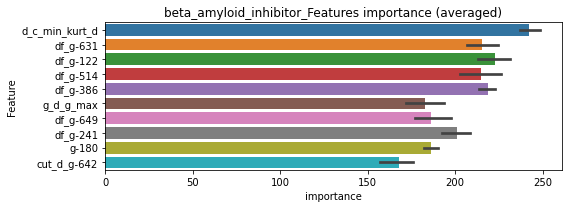

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163013	valid_1's binary_logloss: 0.0231029
[600]	training's binary_logloss: 0.00430056	valid_1's binary_logloss: 0.00746168
[900]	training's binary_logloss: 0.00221531	valid_1's binary_logloss: 0.00437591
[1200]	training's binary_logloss: 0.00147443	valid_1's binary_logloss: 0.0032035
[1500]	training's binary_logloss: 0.00111304	valid_1's binary_logloss: 0.00258554
[1800]	training's binary_logloss: 0.000903864	valid_1's binary_logloss: 0.00221416
[2100]	training's binary_logloss: 0.000769799	valid_1's binary_logloss: 0.00197576
[2400]	training's binary_logloss: 0.000676881	valid_1's binary_logloss: 0.00180127
[2700]	training's binary_logloss: 0.000608685	valid_1's binary_logloss: 0.00167453
[3000]	training's binary_logloss: 0.000557727	valid_1's binary_logloss: 0.00157447
[3300]	training's binary_logloss: 0.00051897	valid_1's binary_logloss: 0.00149993
[3600]	training's binary_logloss: 0.00

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162873	valid_1's binary_logloss: 0.0275555
[600]	training's binary_logloss: 0.00426724	valid_1's binary_logloss: 0.0110615
[900]	training's binary_logloss: 0.0021963	valid_1's binary_logloss: 0.00759301
[1200]	training's binary_logloss: 0.00146431	valid_1's binary_logloss: 0.00625921
[1500]	training's binary_logloss: 0.00110683	valid_1's binary_logloss: 0.00555149
[1800]	training's binary_logloss: 0.000900926	valid_1's binary_logloss: 0.00508138
[2100]	training's binary_logloss: 0.000766558	valid_1's binary_logloss: 0.00477093
[2400]	training's binary_logloss: 0.00067421	valid_1's binary_logloss: 0.00456349
[2700]	training's binary_logloss: 0.000605855	valid_1's binary_logloss: 0.00438748
Early stopping, best iteration is:
[2696]	training's binary_logloss: 0.000606664	valid_1's binary_logloss: 0.00438347


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168138	valid_1's binary_logloss: 0.0214108
[600]	training's binary_logloss: 0.00436088	valid_1's binary_logloss: 0.00663733
[900]	training's binary_logloss: 0.0022356	valid_1's binary_logloss: 0.00383396
[1200]	training's binary_logloss: 0.00148903	valid_1's binary_logloss: 0.0027418
[1500]	training's binary_logloss: 0.00112578	valid_1's binary_logloss: 0.00217123
[1800]	training's binary_logloss: 0.000914723	valid_1's binary_logloss: 0.00183525
[2100]	training's binary_logloss: 0.000779025	valid_1's binary_logloss: 0.00162031
[2400]	training's binary_logloss: 0.00068488	valid_1's binary_logloss: 0.00146278
[2700]	training's binary_logloss: 0.000615915	valid_1's binary_logloss: 0.00135031
[3000]	training's binary_logloss: 0.00056375	valid_1's binary_logloss: 0.00126142
[3300]	training's binary_logloss: 0.000524176	valid_1's binary_logloss: 0.00118989
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162284	valid_1's binary_logloss: 0.0256038
[600]	training's binary_logloss: 0.0042463	valid_1's binary_logloss: 0.00994505
[900]	training's binary_logloss: 0.0021839	valid_1's binary_logloss: 0.00666208
[1200]	training's binary_logloss: 0.00146275	valid_1's binary_logloss: 0.00547927
[1500]	training's binary_logloss: 0.00111004	valid_1's binary_logloss: 0.00481702
[1800]	training's binary_logloss: 0.000902841	valid_1's binary_logloss: 0.0044192
[2100]	training's binary_logloss: 0.000769979	valid_1's binary_logloss: 0.00416999
[2400]	training's binary_logloss: 0.000675554	valid_1's binary_logloss: 0.00395668
[2700]	training's binary_logloss: 0.000608769	valid_1's binary_logloss: 0.00381056
[3000]	training's binary_logloss: 0.000557306	valid_1's binary_logloss: 0.00370035
[3300]	training's binary_logloss: 0.000519248	valid_1's binary_logloss: 0.00362529
Early stopping, best iteration is:
[355

beta_amyloid_inhibitor logloss: 0.0026056703808736586


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281, target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186103	valid_1's binary_logloss: 0.0768795
[600]	training's binary_logloss: 0.00276756	valid_1's binary_logloss: 0.0489164
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00118245	valid_1's binary_logloss: 0.0435165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201392	valid_1's binary_logloss: 0.0577414
[600]	training's binary_logloss: 0.00293404	valid_1's binary_logloss: 0.0295734
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00134493	valid_1's binary_logloss: 0.025352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223021	valid_1's binary_logloss: 0.0424587
[600]	training's binary_logloss: 0.00328437	valid_1's binary_logloss: 0.0142431
[900]	training's binary_logloss: 0.00122853	valid_1's binary_logloss: 0.00867156
[1200]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0086931, Threshold: 0.0236664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286, Num_p_label: 40.0, conf_0:0.01657, conf_1:0.03077
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0236664
Num_p_label: 13.0, Expected: 11.4, Adj_threshold_2: 0.0436664
threshold: 0.0436664, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184529	valid_1's binary_logloss: 0.0708558
[600]	training's binary_logloss: 0.00269799	valid_1's binary_logloss: 0.043161
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00167486	valid_1's binary_logloss: 0.040166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190375	valid_1's binary_logloss: 0.0546368
[600]	training's binary_logloss: 0.00276764	valid_1's binary_logloss: 0.0276285
[900]	training's binary_logloss: 0.00109582	valid_1's binary_logloss: 0.0233771
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000912512	valid_1's binary_logloss: 0.0228232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214993	valid_1's binary_logloss: 0.0408881
[600]	training's binary_logloss: 0.00313233	valid_1's binary_logloss: 0.0136091
[900]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0514323, Threshold: 0.0436664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0090407 Vs.target_rate: 0.00286, Num_p_label: 36.0, conf_0:0.03493, conf_1:0.05240
Num_p_label: 36.0, Expected: 11.4, Adj_threshold_1: 0.0436664
Num_p_label: 28.0, Expected: 11.4, Adj_threshold_2: 0.0636664
Num_p_label: 15.0, Expected: 11.4, Adj_threshold_3: 0.0836664
threshold: 0.0836664, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183708	valid_1's binary_logloss: 0.0657079
[600]	training's binary_logloss: 0.00272786	valid_1's binary_logloss: 0.0476536
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00231186	valid_1's binary_logloss: 0.047041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186693	valid_1's binary_logloss: 0.0586213
[600]	training's binary_logloss: 0.00273626	valid_1's binary_logloss: 0.0335541
[900]	training's binary_logloss: 0.00107879	valid_1's binary_logloss: 0.0292122
Early stopping, best iteration is:
[1102]	training's binary_logloss: 0.000789142	valid_1's binary_logloss: 0.028292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200385	valid_1's binary_logloss: 0.049096
[600]	training's binary_logloss: 0.00283869	valid_1's binary_logloss: 0.0223717
[900]	training's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0308750, Threshold: 0.0836664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0040181 Vs.target_rate: 0.00286, Num_p_label: 16.0, conf_0:0.07530, conf_1:0.09203
threshold: 0.0836664, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


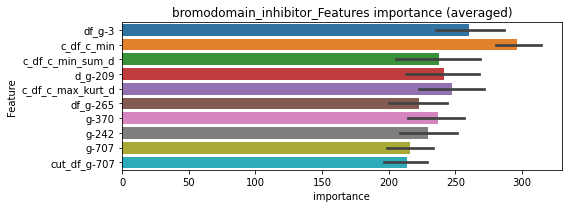

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343999	valid_1's binary_logloss: 0.0764277
[600]	training's binary_logloss: 0.0101645	valid_1's binary_logloss: 0.0457351
[900]	training's binary_logloss: 0.00511761	valid_1's binary_logloss: 0.0374362
[1200]	training's binary_logloss: 0.00328746	valid_1's binary_logloss: 0.0343563
[1500]	training's binary_logloss: 0.00239881	valid_1's binary_logloss: 0.0329075
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.00236014	valid_1's binary_logloss: 0.0327831


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036169	valid_1's binary_logloss: 0.0643397
[600]	training's binary_logloss: 0.0108454	valid_1's binary_logloss: 0.0307592
[900]	training's binary_logloss: 0.00541697	valid_1's binary_logloss: 0.0215814
[1200]	training's binary_logloss: 0.00346704	valid_1's binary_logloss: 0.0177033
[1500]	training's binary_logloss: 0.00252941	valid_1's binary_logloss: 0.0154676
[1800]	training's binary_logloss: 0.00199332	valid_1's binary_logloss: 0.0141554
[2100]	training's binary_logloss: 0.0016543	valid_1's binary_logloss: 0.0131923
Early stopping, best iteration is:
[2220]	training's binary_logloss: 0.00154926	valid_1's binary_logloss: 0.0128784


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0358094	valid_1's binary_logloss: 0.0667839
[600]	training's binary_logloss: 0.0106945	valid_1's binary_logloss: 0.0358107
[900]	training's binary_logloss: 0.00534489	valid_1's binary_logloss: 0.0280775
[1200]	training's binary_logloss: 0.00343359	valid_1's binary_logloss: 0.0248598
Early stopping, best iteration is:
[1234]	training's binary_logloss: 0.00329878	valid_1's binary_logloss: 0.0245307


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0357198	valid_1's binary_logloss: 0.0673838
[600]	training's binary_logloss: 0.01069	valid_1's binary_logloss: 0.0377883
[900]	training's binary_logloss: 0.00536059	valid_1's binary_logloss: 0.0308707
[1200]	training's binary_logloss: 0.00343167	valid_1's binary_logloss: 0.0281574
Early stopping, best iteration is:
[1445]	training's binary_logloss: 0.0026411	valid_1's binary_logloss: 0.0271957


bromodomain_inhibitor logloss: 0.02434920896392984


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00976488	valid_1's binary_logloss: 0.0184775
[600]	training's binary_logloss: 0.00116072	valid_1's binary_logloss: 0.00472456
[900]	training's binary_logloss: 0.000551342	valid_1's binary_logloss: 0.00333277
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000492913	valid_1's binary_logloss: 0.00316804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00926707	valid_1's binary_logloss: 0.0232326
[600]	training's binary_logloss: 0.00113101	valid_1's binary_logloss: 0.00804879
[900]	training's binary_logloss: 0.00053332	valid_1's binary_logloss: 0.00624854
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.000472456	valid_1's binary_logloss: 0.0060764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102281	valid_1's binary_logloss: 0.0166258
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0030270, Threshold: 0.0130858, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.00916, conf_1:0.01701
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0130858
Num_p_label: 13.0, Expected: 4.8, Adj_threshold_2: 0.0330858
Num_p_label: 6.0, Expected: 4.8, Adj_threshold_3: 0.0530858
threshold: 0.0530858, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00892916	valid_1's binary_logloss: 0.017488
[600]	training's binary_logloss: 0.00109577	valid_1's binary_logloss: 0.00442731
[900]	training's binary_logloss: 0.000527133	valid_1's binary_logloss: 0.00292735
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000476717	valid_1's binary_logloss: 0.00284567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869184	valid_1's binary_logloss: 0.0211701
[600]	training's binary_logloss: 0.00106577	valid_1's binary_logloss: 0.00696959
[900]	training's binary_logloss: 0.000513544	valid_1's binary_logloss: 0.00535513
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000471234	valid_1's binary_logloss: 0.00520265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902634	valid_1's binary_logloss: 0.0149958
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0542733, Threshold: 0.0530858, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00122, Num_p_label: 14.0, conf_0:0.04247, conf_1:0.06370
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_1: 0.0530858
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_2: 0.0730858
threshold: 0.0730858, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00892916	valid_1's binary_logloss: 0.017488
[600]	training's binary_logloss: 0.00109577	valid_1's binary_logloss: 0.00442731
[900]	training's binary_logloss: 0.000527133	valid_1's binary_logloss: 0.00292735
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000476717	valid_1's binary_logloss: 0.00284567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869184	valid_1's binary_logloss: 0.0211701
[600]	training's binary_logloss: 0.00106577	valid_1's binary_logloss: 0.00696959
[900]	training's binary_logloss: 0.000513544	valid_1's binary_logloss: 0.00535513
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000471234	valid_1's binary_logloss: 0.00520265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902634	valid_1's binary_logloss: 0.0149958
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0542733, Threshold: 0.0730858, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00122, Num_p_label: 9.0, conf_0:0.06578, conf_1:0.08039
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.0730858
threshold: 0.0730858, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


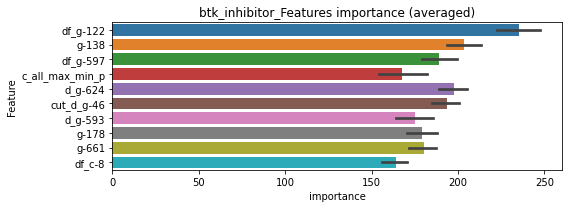

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191992	valid_1's binary_logloss: 0.0304728
[600]	training's binary_logloss: 0.00515324	valid_1's binary_logloss: 0.0116413
[900]	training's binary_logloss: 0.00265091	valid_1's binary_logloss: 0.00767503
[1200]	training's binary_logloss: 0.00176203	valid_1's binary_logloss: 0.00604106
[1500]	training's binary_logloss: 0.00132937	valid_1's binary_logloss: 0.00518844
[1800]	training's binary_logloss: 0.00107817	valid_1's binary_logloss: 0.004659
[2100]	training's binary_logloss: 0.000915362	valid_1's binary_logloss: 0.00428713
[2400]	training's binary_logloss: 0.000800076	valid_1's binary_logloss: 0.00400935
[2700]	training's binary_logloss: 0.000719051	valid_1's binary_logloss: 0.00381138
[3000]	training's binary_logloss: 0.000656484	valid_1's binary_logloss: 0.00365786
[3300]	training's binary_logloss: 0.000606208	valid_1's binary_logloss: 0.00349742
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190059	valid_1's binary_logloss: 0.0336189
[600]	training's binary_logloss: 0.00505577	valid_1's binary_logloss: 0.0137296
[900]	training's binary_logloss: 0.00260347	valid_1's binary_logloss: 0.00962163
[1200]	training's binary_logloss: 0.00173848	valid_1's binary_logloss: 0.00795965
[1500]	training's binary_logloss: 0.0013116	valid_1's binary_logloss: 0.00704828
[1800]	training's binary_logloss: 0.00106244	valid_1's binary_logloss: 0.00648973
[2100]	training's binary_logloss: 0.000901558	valid_1's binary_logloss: 0.00608128
[2400]	training's binary_logloss: 0.000791224	valid_1's binary_logloss: 0.00582785
[2700]	training's binary_logloss: 0.000709852	valid_1's binary_logloss: 0.00562291
Early stopping, best iteration is:
[2948]	training's binary_logloss: 0.000657259	valid_1's binary_logloss: 0.00548104


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019285	valid_1's binary_logloss: 0.0280207
[600]	training's binary_logloss: 0.00515154	valid_1's binary_logloss: 0.00940533
[900]	training's binary_logloss: 0.00265772	valid_1's binary_logloss: 0.00557022
[1200]	training's binary_logloss: 0.00176394	valid_1's binary_logloss: 0.00402427
[1500]	training's binary_logloss: 0.00133026	valid_1's binary_logloss: 0.00324808
[1800]	training's binary_logloss: 0.00107775	valid_1's binary_logloss: 0.00275241
[2100]	training's binary_logloss: 0.000913057	valid_1's binary_logloss: 0.00242588
[2400]	training's binary_logloss: 0.000799674	valid_1's binary_logloss: 0.00220514
[2700]	training's binary_logloss: 0.000716938	valid_1's binary_logloss: 0.0020399
[3000]	training's binary_logloss: 0.000654068	valid_1's binary_logloss: 0.00190878
[3300]	training's binary_logloss: 0.000604658	valid_1's binary_logloss: 0.00179155
[3600]	training's binary_logloss: 0.000

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019229	valid_1's binary_logloss: 0.0281526
[600]	training's binary_logloss: 0.00513526	valid_1's binary_logloss: 0.0100718
[900]	training's binary_logloss: 0.00263711	valid_1's binary_logloss: 0.00630105
[1200]	training's binary_logloss: 0.0017584	valid_1's binary_logloss: 0.00486274
[1500]	training's binary_logloss: 0.00132168	valid_1's binary_logloss: 0.00405522
[1800]	training's binary_logloss: 0.00107246	valid_1's binary_logloss: 0.00356011
[2100]	training's binary_logloss: 0.000910663	valid_1's binary_logloss: 0.00325407
[2400]	training's binary_logloss: 0.000797304	valid_1's binary_logloss: 0.00301428
[2700]	training's binary_logloss: 0.000713115	valid_1's binary_logloss: 0.00284555
[3000]	training's binary_logloss: 0.000650879	valid_1's binary_logloss: 0.00271492
[3300]	training's binary_logloss: 0.00060193	valid_1's binary_logloss: 0.00260581
[3600]	training's binary_logloss: 0.00056

btk_inhibitor logloss: 0.003182356531089233


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271713	valid_1's binary_logloss: 0.00471331
[600]	training's binary_logloss: 0.000369758	valid_1's binary_logloss: 0.00113659
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000284252	valid_1's binary_logloss: 0.000976834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266037	valid_1's binary_logloss: 0.00489399
[600]	training's binary_logloss: 0.000363962	valid_1's binary_logloss: 0.00142067
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.0002897	valid_1's binary_logloss: 0.00124388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273923	valid_1's binary_logloss: 0.00356928
[600]	training's binary_logloss: 0.000376083	valid_1's binary_logloss: 0.000594414
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000291845	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0012830, Threshold: 0.0212341, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01486, conf_1:0.02760
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0212341


Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000288439	valid_1's binary_logloss: 0.000730607


Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.0412341
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_3: 0.0612341
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.0812341
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.1012341
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.1212341
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.1412341
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.1612341
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.1812341
threshold: 0.1812341, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244891	valid_1's binary_logloss: 0.00471855
[600]	training's binary_logloss: 0.000335884	valid_1's binary_logloss: 0.0013304
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000258365	valid_1's binary_logloss: 0.00117917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241284	valid_1's binary_logloss: 0.00488102
[600]	training's binary_logloss: 0.000329599	valid_1's binary_logloss: 0.00137578
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000259734	valid_1's binary_logloss: 0.00124104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251234	valid_1's binary_logloss: 0.0028689
[600]	training's binary_logloss: 0.00033949	valid_1's binary_logloss: 0.000417021
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000260747	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.1155932, Threshold: 0.1812341, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0092918 Vs.target_rate: 0.00050, Num_p_label: 37.0, conf_0:0.14499, conf_1:0.21748
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_1: 0.1812341
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_2: 0.2012341
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_3: 0.2212341
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.2412341
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_5: 0.2612341
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_6: 0.2812341
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_7: 0.3012341
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_8: 0.3212341
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_9: 0.3412341
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_10: 0.3612341
threshold: 0.3812341, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244891	valid_1's binary_logloss: 0.00471855
[600]	training's binary_logloss: 0.000335884	valid_1's binary_logloss: 0.0013304
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000258365	valid_1's binary_logloss: 0.00117917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241284	valid_1's binary_logloss: 0.00488102
[600]	training's binary_logloss: 0.000329599	valid_1's binary_logloss: 0.00137578
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000259734	valid_1's binary_logloss: 0.00124104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251234	valid_1's binary_logloss: 0.0028689
[600]	training's binary_logloss: 0.00033949	valid_1's binary_logloss: 0.000417021
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000260747	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.1155932, Threshold: 0.3812341, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0045203 Vs.target_rate: 0.00050, Num_p_label: 18.0, conf_0:0.34311, conf_1:0.41936
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_1: 0.3812341
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.4012341
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.4212341
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_4: 0.4412341
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.4612341
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4812341
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.5012341
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.5212341
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.5412341
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_10: 0.5612341
threshold: 0.5812341, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


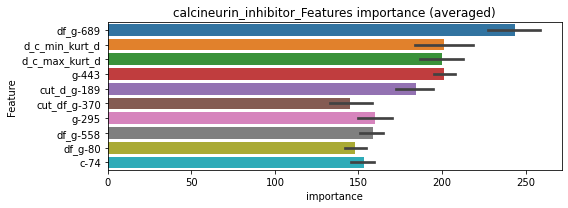

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720402	valid_1's binary_logloss: 0.00950632
[600]	training's binary_logloss: 0.00185332	valid_1's binary_logloss: 0.00307755
[900]	training's binary_logloss: 0.00101009	valid_1's binary_logloss: 0.00190203
[1200]	training's binary_logloss: 0.000702371	valid_1's binary_logloss: 0.00145024
[1500]	training's binary_logloss: 0.000547987	valid_1's binary_logloss: 0.0012087
[1800]	training's binary_logloss: 0.000457175	valid_1's binary_logloss: 0.00105577
[2100]	training's binary_logloss: 0.000397061	valid_1's binary_logloss: 0.000954563
[2400]	training's binary_logloss: 0.000356213	valid_1's binary_logloss: 0.000883768
[2700]	training's binary_logloss: 0.000327181	valid_1's binary_logloss: 0.000834503
[3000]	training's binary_logloss: 0.000306697	valid_1's binary_logloss: 0.000801676
[3300]	training's binary_logloss: 0.000292466	valid_1's binary_logloss: 0.000779558
[3600]	training's binary_log

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00718868	valid_1's binary_logloss: 0.00995827
[600]	training's binary_logloss: 0.00184355	valid_1's binary_logloss: 0.0033778
[900]	training's binary_logloss: 0.000996024	valid_1's binary_logloss: 0.00213044
[1200]	training's binary_logloss: 0.000695924	valid_1's binary_logloss: 0.00164229
[1500]	training's binary_logloss: 0.000544729	valid_1's binary_logloss: 0.00138454
[1800]	training's binary_logloss: 0.000454762	valid_1's binary_logloss: 0.00121578
[2100]	training's binary_logloss: 0.00039629	valid_1's binary_logloss: 0.00113013
[2400]	training's binary_logloss: 0.000356142	valid_1's binary_logloss: 0.00106482
[2700]	training's binary_logloss: 0.000326678	valid_1's binary_logloss: 0.000999419
[3000]	training's binary_logloss: 0.000305336	valid_1's binary_logloss: 0.00094986
[3300]	training's binary_logloss: 0.000290707	valid_1's binary_logloss: 0.000917595
[3600]	training's binary_loglos

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723878	valid_1's binary_logloss: 0.00807611
[600]	training's binary_logloss: 0.00186785	valid_1's binary_logloss: 0.00220012
[900]	training's binary_logloss: 0.00101295	valid_1's binary_logloss: 0.00122809
[1200]	training's binary_logloss: 0.000703396	valid_1's binary_logloss: 0.000867585
[1500]	training's binary_logloss: 0.000549299	valid_1's binary_logloss: 0.000688478
[1800]	training's binary_logloss: 0.000457511	valid_1's binary_logloss: 0.000578861
[2100]	training's binary_logloss: 0.000398758	valid_1's binary_logloss: 0.000508936
[2400]	training's binary_logloss: 0.000358091	valid_1's binary_logloss: 0.000459748
[2700]	training's binary_logloss: 0.000328135	valid_1's binary_logloss: 0.000422865
[3000]	training's binary_logloss: 0.000307268	valid_1's binary_logloss: 0.000397818
[3300]	training's binary_logloss: 0.000293217	valid_1's binary_logloss: 0.000380726
[3600]	training's binary

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00712581	valid_1's binary_logloss: 0.00905337
[600]	training's binary_logloss: 0.00183976	valid_1's binary_logloss: 0.00268624
[900]	training's binary_logloss: 0.000999388	valid_1's binary_logloss: 0.00157038
[1200]	training's binary_logloss: 0.000694767	valid_1's binary_logloss: 0.00114695
[1500]	training's binary_logloss: 0.000544278	valid_1's binary_logloss: 0.000931144
[1800]	training's binary_logloss: 0.000454629	valid_1's binary_logloss: 0.000797291
[2100]	training's binary_logloss: 0.000395647	valid_1's binary_logloss: 0.000708643
[2400]	training's binary_logloss: 0.00035491	valid_1's binary_logloss: 0.000646626
[2700]	training's binary_logloss: 0.000325658	valid_1's binary_logloss: 0.000602178
[3000]	training's binary_logloss: 0.000304835	valid_1's binary_logloss: 0.000570718
[3300]	training's binary_logloss: 0.000290938	valid_1's binary_logloss: 0.000549336
[3600]	training's binary_

calcineurin_inhibitor logloss: 0.0006283752919943822


neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246, target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0774573	valid_1's binary_logloss: 0.274189
[600]	training's binary_logloss: 0.0213613	valid_1's binary_logloss: 0.256176
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.022227	valid_1's binary_logloss: 0.255087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0777969	valid_1's binary_logloss: 0.277607
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0324452	valid_1's binary_logloss: 0.267485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0791007	valid_1's binary_logloss: 0.254692
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.0281791	valid_1's binary_logloss: 0.240728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0786961	valid_1's binary_logloss: 0.248825
[600]	training's binary_logl

1 / 3 AUC score:0.900
y_Threshold: 0.0783907, Threshold: 0.2530042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 428 → Positive_corect_labels: 500/3467
p_label_rate: 0.0100452 Vs.target_rate: 0.01180, Num_p_label: 40.0, conf_0:0.17710, conf_1:0.32891
threshold: 0.2530042, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 500.0/3467, y_label_rate: 0.1442169
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0402305	valid_1's binary_logloss: 0.168514
[600]	training's binary_logloss: 0.0083451	valid_1's binary_logloss: 0.143234
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.00661412	valid_1's binary_logloss: 0.141867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0428629	valid_1's binary_logloss: 0.171662
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.0111478	valid_1's binary_logloss: 0.149101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412666	valid_1's binary_logloss: 0.153685
[600]	training's binary_logloss: 0.00862943	valid_1's binary_logloss: 0.120108
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.00467765	valid_1's binary_logloss: 0.11598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

2 / 3 AUC score:0.983
y_Threshold: 0.0828687, Threshold: 0.2530042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 443.0/3353
p_label_rate: 0.0210949 Vs.target_rate: 0.01180, Num_p_label: 84.0, conf_0:0.20240, conf_1:0.30361
Num_p_label: 84.0, Expected: 47.0, Adj_threshold_1: 0.2530042
Num_p_label: 78.0, Expected: 47.0, Adj_threshold_2: 0.2730042
Num_p_label: 70.0, Expected: 47.0, Adj_threshold_3: 0.2930042
threshold: 0.2930042, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 443.0/3353, y_label_rate: 0.1321205
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311679	valid_1's binary_logloss: 0.143311
[600]	training's binary_logloss: 0.00600317	valid_1's binary_logloss: 0.119368
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.0066048	valid_1's binary_logloss: 0.118959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0308781	valid_1's binary_logloss: 0.134398
[600]	training's binary_logloss: 0.0058862	valid_1's binary_logloss: 0.110525
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00427365	valid_1's binary_logloss: 0.108157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0307317	valid_1's binary_logloss: 0.13752
[600]	training's binary_logloss: 0.00575688	valid_1's binary_logloss: 0.116611
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00453482	valid_1's binary_logloss: 0.115194
Trainin

3 / 3 AUC score:0.988
y_Threshold: 0.0714395, Threshold: 0.2930042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 404.0/3275
p_label_rate: 0.0215972 Vs.target_rate: 0.01180, Num_p_label: 86.0, conf_0:0.26370, conf_1:0.32230
Num_p_label: 86.0, Expected: 47.0, Adj_threshold_1: 0.2930042
Num_p_label: 79.0, Expected: 47.0, Adj_threshold_2: 0.3130042
Num_p_label: 74.0, Expected: 47.0, Adj_threshold_3: 0.3330042
Num_p_label: 66.0, Expected: 47.0, Adj_threshold_4: 0.3530042
threshold: 0.3530042, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 404.0/3275, y_label_rate: 0.1233588


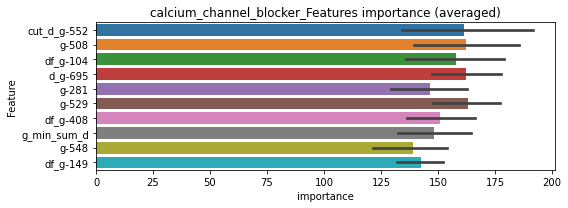

len(train_index) : 2456
len(valid_index) : 819
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0477919	valid_1's binary_logloss: 0.134588
[600]	training's binary_logloss: 0.0162698	valid_1's binary_logloss: 0.104779
[900]	training's binary_logloss: 0.00833242	valid_1's binary_logloss: 0.0962832
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.00569323	valid_1's binary_logloss: 0.0930732


len(train_index) : 2456
len(valid_index) : 819
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0480944	valid_1's binary_logloss: 0.126434
[600]	training's binary_logloss: 0.0164694	valid_1's binary_logloss: 0.0962212
[900]	training's binary_logloss: 0.00839428	valid_1's binary_logloss: 0.0874794
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.00611207	valid_1's binary_logloss: 0.085223


len(train_index) : 2456
len(valid_index) : 819
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491081	valid_1's binary_logloss: 0.114796
[600]	training's binary_logloss: 0.0167974	valid_1's binary_logloss: 0.0796322
[900]	training's binary_logloss: 0.00859308	valid_1's binary_logloss: 0.0696699
Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.00588459	valid_1's binary_logloss: 0.06592


len(train_index) : 2457
len(valid_index) : 818
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.047217	valid_1's binary_logloss: 0.129248
[600]	training's binary_logloss: 0.0160773	valid_1's binary_logloss: 0.0981007
[900]	training's binary_logloss: 0.00823426	valid_1's binary_logloss: 0.0899607
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00822151	valid_1's binary_logloss: 0.0899271


calcium_channel_blocker logloss: 0.083533872183618


neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111725	valid_1's binary_logloss: 0.0404918
[600]	training's binary_logloss: 0.00149661	valid_1's binary_logloss: 0.0220614
[900]	training's binary_logloss: 0.000662763	valid_1's binary_logloss: 0.0188754
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000559203	valid_1's binary_logloss: 0.0183104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012116	valid_1's binary_logloss: 0.0257789
[600]	training's binary_logloss: 0.0015894	valid_1's binary_logloss: 0.0100265
[900]	training's binary_logloss: 0.000693717	valid_1's binary_logloss: 0.00816519
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000693717	valid_1's binary_logloss: 0.00816519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125294	valid_1's binary_logloss: 0.0212406
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0049567, Threshold: 0.0276452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.01935, conf_1:0.03594
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0276452
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_2: 0.0476452
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_3: 0.0676452
threshold: 0.0676452, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104342	valid_1's binary_logloss: 0.036309
[600]	training's binary_logloss: 0.00141187	valid_1's binary_logloss: 0.0199031
[900]	training's binary_logloss: 0.000640128	valid_1's binary_logloss: 0.0173286
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000556433	valid_1's binary_logloss: 0.0170146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116675	valid_1's binary_logloss: 0.0246394
[600]	training's binary_logloss: 0.001549	valid_1's binary_logloss: 0.00928738
[900]	training's binary_logloss: 0.000671039	valid_1's binary_logloss: 0.00761183
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000566171	valid_1's binary_logloss: 0.00728618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011365	valid_1's binary_logloss: 0.0198332
[600]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0248081, Threshold: 0.0676452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0102963 Vs.target_rate: 0.00176, Num_p_label: 41.0, conf_0:0.05412, conf_1:0.08117
Num_p_label: 41.0, Expected: 7.0, Adj_threshold_1: 0.0676452
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_2: 0.0876452
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_3: 0.1076452
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_4: 0.1276452
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_5: 0.1476452
threshold: 0.1476452, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104342	valid_1's binary_logloss: 0.036309
[600]	training's binary_logloss: 0.00141187	valid_1's binary_logloss: 0.0199031
[900]	training's binary_logloss: 0.000640128	valid_1's binary_logloss: 0.0173286
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000556433	valid_1's binary_logloss: 0.0170146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116675	valid_1's binary_logloss: 0.0246394
[600]	training's binary_logloss: 0.001549	valid_1's binary_logloss: 0.00928738
[900]	training's binary_logloss: 0.000671039	valid_1's binary_logloss: 0.00761183
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000566171	valid_1's binary_logloss: 0.00728618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011365	valid_1's binary_logloss: 0.0198332
[600]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0248081, Threshold: 0.1476452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00176, Num_p_label: 15.0, conf_0:0.13288, conf_1:0.16241
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.1476452
threshold: 0.1476452, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


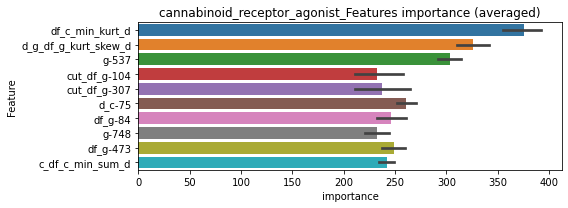

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231022	valid_1's binary_logloss: 0.05153
[600]	training's binary_logloss: 0.00647289	valid_1's binary_logloss: 0.0275277
[900]	training's binary_logloss: 0.00329592	valid_1's binary_logloss: 0.021425
[1200]	training's binary_logloss: 0.00215741	valid_1's binary_logloss: 0.0190992
[1500]	training's binary_logloss: 0.00160488	valid_1's binary_logloss: 0.0175978
[1800]	training's binary_logloss: 0.001284	valid_1's binary_logloss: 0.01671
[2100]	training's binary_logloss: 0.00108125	valid_1's binary_logloss: 0.0160452
[2400]	training's binary_logloss: 0.000940013	valid_1's binary_logloss: 0.0155419
Early stopping, best iteration is:
[2568]	training's binary_logloss: 0.000877857	valid_1's binary_logloss: 0.0152974


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243503	valid_1's binary_logloss: 0.0399875
[600]	training's binary_logloss: 0.00677018	valid_1's binary_logloss: 0.0181612
[900]	training's binary_logloss: 0.00341902	valid_1's binary_logloss: 0.0130312
[1200]	training's binary_logloss: 0.00223907	valid_1's binary_logloss: 0.0109798
[1500]	training's binary_logloss: 0.00166061	valid_1's binary_logloss: 0.00996102
[1800]	training's binary_logloss: 0.00133173	valid_1's binary_logloss: 0.00940393
Early stopping, best iteration is:
[1789]	training's binary_logloss: 0.00134082	valid_1's binary_logloss: 0.00939186


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250475	valid_1's binary_logloss: 0.0364441
[600]	training's binary_logloss: 0.00689392	valid_1's binary_logloss: 0.0134939
[900]	training's binary_logloss: 0.00347503	valid_1's binary_logloss: 0.00842231
[1200]	training's binary_logloss: 0.00227613	valid_1's binary_logloss: 0.00641591
[1500]	training's binary_logloss: 0.0016883	valid_1's binary_logloss: 0.00534735
[1800]	training's binary_logloss: 0.0013517	valid_1's binary_logloss: 0.004693
[2100]	training's binary_logloss: 0.00113604	valid_1's binary_logloss: 0.00426484
[2400]	training's binary_logloss: 0.000983806	valid_1's binary_logloss: 0.00394183
[2700]	training's binary_logloss: 0.00087557	valid_1's binary_logloss: 0.00370355
[3000]	training's binary_logloss: 0.000794586	valid_1's binary_logloss: 0.00354227
[3300]	training's binary_logloss: 0.000731546	valid_1's binary_logloss: 0.00340475
[3600]	training's binary_logloss: 0.00068321

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239983	valid_1's binary_logloss: 0.0454363
[600]	training's binary_logloss: 0.00662881	valid_1's binary_logloss: 0.0211164
[900]	training's binary_logloss: 0.00332158	valid_1's binary_logloss: 0.0147177
[1200]	training's binary_logloss: 0.00216794	valid_1's binary_logloss: 0.0122854
[1500]	training's binary_logloss: 0.00161154	valid_1's binary_logloss: 0.0108028
[1800]	training's binary_logloss: 0.00129141	valid_1's binary_logloss: 0.00975268
[2100]	training's binary_logloss: 0.00108504	valid_1's binary_logloss: 0.00917957
[2400]	training's binary_logloss: 0.00094147	valid_1's binary_logloss: 0.00864376
[2700]	training's binary_logloss: 0.000838439	valid_1's binary_logloss: 0.00825257
[3000]	training's binary_logloss: 0.000763622	valid_1's binary_logloss: 0.00808003
[3300]	training's binary_logloss: 0.000702594	valid_1's binary_logloss: 0.00778944
[3600]	training's binary_logloss: 0.0006560

cannabinoid_receptor_agonist logloss: 0.00884981945549559


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138799	valid_1's binary_logloss: 0.0489625
[600]	training's binary_logloss: 0.00194689	valid_1's binary_logloss: 0.0313821
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00117022	valid_1's binary_logloss: 0.029978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013695	valid_1's binary_logloss: 0.0479518
[600]	training's binary_logloss: 0.00198344	valid_1's binary_logloss: 0.027162
[900]	training's binary_logloss: 0.000855745	valid_1's binary_logloss: 0.0237416
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000747727	valid_1's binary_logloss: 0.0233507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151838	valid_1's binary_logloss: 0.0296332
[600]	training's binary_logloss: 0.00218255	valid_1's binary_logloss: 0.0122227
[900]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0058672, Threshold: 0.0198773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.01391, conf_1:0.02584
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0198773
Num_p_label: 13.0, Expected: 9.2, Adj_threshold_2: 0.0398773
threshold: 0.0398773, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127152	valid_1's binary_logloss: 0.0421983
[600]	training's binary_logloss: 0.00184301	valid_1's binary_logloss: 0.0269542
[900]	training's binary_logloss: 0.000803521	valid_1's binary_logloss: 0.0244636
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000845544	valid_1's binary_logloss: 0.0244075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133109	valid_1's binary_logloss: 0.0327253
[600]	training's binary_logloss: 0.00194672	valid_1's binary_logloss: 0.0148535
[900]	training's binary_logloss: 0.00083804	valid_1's binary_logloss: 0.0121944
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.00063167	valid_1's binary_logloss: 0.0115183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132256	valid_1's binary_logloss: 0.0334377
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0212569, Threshold: 0.0398773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0090407 Vs.target_rate: 0.00231, Num_p_label: 36.0, conf_0:0.03190, conf_1:0.04785
Num_p_label: 36.0, Expected: 9.2, Adj_threshold_1: 0.0398773
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_2: 0.0598773
threshold: 0.0598773, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132017	valid_1's binary_logloss: 0.0371943
[600]	training's binary_logloss: 0.0018938	valid_1's binary_logloss: 0.0196328
[900]	training's binary_logloss: 0.000817412	valid_1's binary_logloss: 0.0179531
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000722623	valid_1's binary_logloss: 0.0175254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133233	valid_1's binary_logloss: 0.0349704
[600]	training's binary_logloss: 0.00190464	valid_1's binary_logloss: 0.0156563
[900]	training's binary_logloss: 0.000821441	valid_1's binary_logloss: 0.0126407
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.000609873	valid_1's binary_logloss: 0.01199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128449	valid_1's binary_logloss: 0.0284967
[600]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0255096, Threshold: 0.0598773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0045203 Vs.target_rate: 0.00231, Num_p_label: 18.0, conf_0:0.05389, conf_1:0.06586
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_1: 0.0598773
threshold: 0.0598773, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


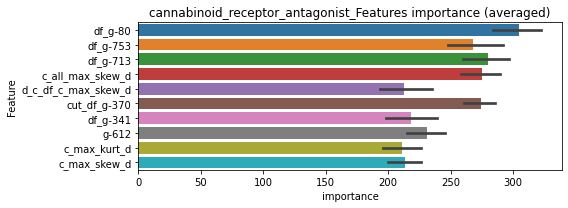

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275036	valid_1's binary_logloss: 0.0578828
[600]	training's binary_logloss: 0.00791842	valid_1's binary_logloss: 0.0335089
[900]	training's binary_logloss: 0.00402762	valid_1's binary_logloss: 0.0271503
[1200]	training's binary_logloss: 0.00263465	valid_1's binary_logloss: 0.0244322
[1500]	training's binary_logloss: 0.0019432	valid_1's binary_logloss: 0.0229486
[1800]	training's binary_logloss: 0.00154678	valid_1's binary_logloss: 0.0220068
Early stopping, best iteration is:
[1892]	training's binary_logloss: 0.00145689	valid_1's binary_logloss: 0.0217141


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275063	valid_1's binary_logloss: 0.0545008
[600]	training's binary_logloss: 0.00802454	valid_1's binary_logloss: 0.0270439
[900]	training's binary_logloss: 0.0040562	valid_1's binary_logloss: 0.0199239
[1200]	training's binary_logloss: 0.00263563	valid_1's binary_logloss: 0.0170512
[1500]	training's binary_logloss: 0.00194826	valid_1's binary_logloss: 0.0155659
[1800]	training's binary_logloss: 0.00154775	valid_1's binary_logloss: 0.0145763
[2100]	training's binary_logloss: 0.00129285	valid_1's binary_logloss: 0.0139191
Early stopping, best iteration is:
[2346]	training's binary_logloss: 0.0011448	valid_1's binary_logloss: 0.0135406


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282747	valid_1's binary_logloss: 0.0482292
[600]	training's binary_logloss: 0.00820694	valid_1's binary_logloss: 0.0229303
[900]	training's binary_logloss: 0.00417932	valid_1's binary_logloss: 0.0167817
[1200]	training's binary_logloss: 0.00271133	valid_1's binary_logloss: 0.0140245
[1500]	training's binary_logloss: 0.00200189	valid_1's binary_logloss: 0.0128451
[1800]	training's binary_logloss: 0.00159336	valid_1's binary_logloss: 0.0118664
Early stopping, best iteration is:
[1782]	training's binary_logloss: 0.00161217	valid_1's binary_logloss: 0.0118547


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028202	valid_1's binary_logloss: 0.0515469
[600]	training's binary_logloss: 0.00822129	valid_1's binary_logloss: 0.0261379
[900]	training's binary_logloss: 0.00414809	valid_1's binary_logloss: 0.0198231
[1200]	training's binary_logloss: 0.00268918	valid_1's binary_logloss: 0.0171837
[1500]	training's binary_logloss: 0.00198489	valid_1's binary_logloss: 0.01586
[1800]	training's binary_logloss: 0.00157786	valid_1's binary_logloss: 0.0150244
[2100]	training's binary_logloss: 0.00131582	valid_1's binary_logloss: 0.0144158
[2400]	training's binary_logloss: 0.00113535	valid_1's binary_logloss: 0.0139865
[2700]	training's binary_logloss: 0.00100424	valid_1's binary_logloss: 0.013701
Early stopping, best iteration is:
[2754]	training's binary_logloss: 0.000984558	valid_1's binary_logloss: 0.0136293


cannabinoid_receptor_antagonist logloss: 0.015185988863499643


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149455	valid_1's binary_logloss: 0.0354122
[600]	training's binary_logloss: 0.00172175	valid_1's binary_logloss: 0.00968971
[900]	training's binary_logloss: 0.000715474	valid_1's binary_logloss: 0.00625762
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000588495	valid_1's binary_logloss: 0.00575681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154705	valid_1's binary_logloss: 0.0286273
[600]	training's binary_logloss: 0.00171961	valid_1's binary_logloss: 0.00720445
[900]	training's binary_logloss: 0.000702404	valid_1's binary_logloss: 0.00481948
[1200]	training's binary_logloss: 0.000538412	valid_1's binary_logloss: 0.00439494
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.000540091	valid_1's binary_logloss: 0.00438837
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0048345, Threshold: 0.0766026, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.05362, conf_1:0.09958
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0766026
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.0966026
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_3: 0.1166026
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_4: 0.1366026
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_5: 0.1566026
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_6: 0.1766026
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_7: 0.1966026
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_8: 0.2166026
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_9: 0.2366026
threshold: 0.2366026, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130524	valid_1's binary_logloss: 0.0313356
[600]	training's binary_logloss: 0.00156624	valid_1's binary_logloss: 0.00943232
[900]	training's binary_logloss: 0.000657814	valid_1's binary_logloss: 0.00629806
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000556084	valid_1's binary_logloss: 0.00594553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132908	valid_1's binary_logloss: 0.0229558
[600]	training's binary_logloss: 0.00157706	valid_1's binary_logloss: 0.00624405
[900]	training's binary_logloss: 0.000668227	valid_1's binary_logloss: 0.00412149
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000553574	valid_1's binary_logloss: 0.00388696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129038	valid_1's binary_logloss: 0.0210717
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0360740, Threshold: 0.2366026, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0092918 Vs.target_rate: 0.00151, Num_p_label: 37.0, conf_0:0.18928, conf_1:0.28392
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_1: 0.2366026
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_2: 0.2566026
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_3: 0.2766026
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_4: 0.2966026
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_5: 0.3166026
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_6: 0.3366026
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.3566026
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_8: 0.3766026
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_9: 0.3966026
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_10: 0.4166026
threshold: 0.4366026, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130524	valid_1's binary_logloss: 0.0313356
[600]	training's binary_logloss: 0.00156624	valid_1's binary_logloss: 0.00943232
[900]	training's binary_logloss: 0.000657814	valid_1's binary_logloss: 0.00629806
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000556084	valid_1's binary_logloss: 0.00594553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132908	valid_1's binary_logloss: 0.0229558
[600]	training's binary_logloss: 0.00157706	valid_1's binary_logloss: 0.00624405
[900]	training's binary_logloss: 0.000668227	valid_1's binary_logloss: 0.00412149
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000553574	valid_1's binary_logloss: 0.00388696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129038	valid_1's binary_logloss: 0.0210717
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0360740, Threshold: 0.4366026, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0045203 Vs.target_rate: 0.00151, Num_p_label: 18.0, conf_0:0.39294, conf_1:0.48026
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.4366026
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.4566026
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.4766026
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.4966026
threshold: 0.4966026, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


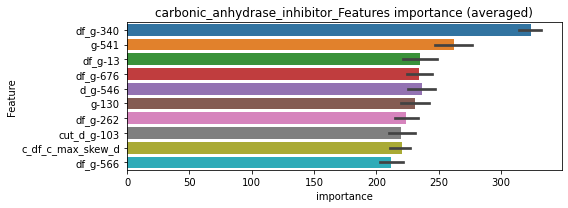

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252854	valid_1's binary_logloss: 0.0445502
[600]	training's binary_logloss: 0.00666972	valid_1's binary_logloss: 0.017214
[900]	training's binary_logloss: 0.00331644	valid_1's binary_logloss: 0.0108871
[1200]	training's binary_logloss: 0.00215634	valid_1's binary_logloss: 0.00827967
[1500]	training's binary_logloss: 0.00159817	valid_1's binary_logloss: 0.00699899
[1800]	training's binary_logloss: 0.00127896	valid_1's binary_logloss: 0.00613763
[2100]	training's binary_logloss: 0.00107335	valid_1's binary_logloss: 0.00557069
[2400]	training's binary_logloss: 0.000931718	valid_1's binary_logloss: 0.00515828
[2700]	training's binary_logloss: 0.000828895	valid_1's binary_logloss: 0.00483999
[3000]	training's binary_logloss: 0.000751799	valid_1's binary_logloss: 0.00461222
[3300]	training's binary_logloss: 0.000692914	valid_1's binary_logloss: 0.00441542
[3600]	training's binary_logloss: 0.00064

len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252501	valid_1's binary_logloss: 0.0362908
[600]	training's binary_logloss: 0.00672711	valid_1's binary_logloss: 0.0132306
[900]	training's binary_logloss: 0.00336713	valid_1's binary_logloss: 0.00829177
[1200]	training's binary_logloss: 0.00218309	valid_1's binary_logloss: 0.00637983
[1500]	training's binary_logloss: 0.00161355	valid_1's binary_logloss: 0.005369
[1800]	training's binary_logloss: 0.00129173	valid_1's binary_logloss: 0.00477771
[2100]	training's binary_logloss: 0.00108488	valid_1's binary_logloss: 0.00443132
[2400]	training's binary_logloss: 0.000942533	valid_1's binary_logloss: 0.00413765
[2700]	training's binary_logloss: 0.000839363	valid_1's binary_logloss: 0.00391582
[3000]	training's binary_logloss: 0.000762372	valid_1's binary_logloss: 0.00377745
[3300]	training's binary_logloss: 0.000701124	valid_1's binary_logloss: 0.00362565
Early stopping, best iteration is:
[3312]

len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253058	valid_1's binary_logloss: 0.0366017
[600]	training's binary_logloss: 0.00672352	valid_1's binary_logloss: 0.0130706
[900]	training's binary_logloss: 0.00333475	valid_1's binary_logloss: 0.00782271
[1200]	training's binary_logloss: 0.00216591	valid_1's binary_logloss: 0.00583478
[1500]	training's binary_logloss: 0.00160457	valid_1's binary_logloss: 0.00477877
[1800]	training's binary_logloss: 0.00128303	valid_1's binary_logloss: 0.00414175
[2100]	training's binary_logloss: 0.00107787	valid_1's binary_logloss: 0.00369767
[2400]	training's binary_logloss: 0.000935757	valid_1's binary_logloss: 0.00336204
[2700]	training's binary_logloss: 0.000832007	valid_1's binary_logloss: 0.00310805
[3000]	training's binary_logloss: 0.000756422	valid_1's binary_logloss: 0.00294788
[3300]	training's binary_logloss: 0.000697116	valid_1's binary_logloss: 0.00280427
[3600]	training's binary_logloss: 0.000

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248314	valid_1's binary_logloss: 0.0484854
[600]	training's binary_logloss: 0.00657215	valid_1's binary_logloss: 0.0225203
[900]	training's binary_logloss: 0.00328467	valid_1's binary_logloss: 0.0165418
[1200]	training's binary_logloss: 0.00213292	valid_1's binary_logloss: 0.0140611
[1500]	training's binary_logloss: 0.00157813	valid_1's binary_logloss: 0.01257
[1800]	training's binary_logloss: 0.0012645	valid_1's binary_logloss: 0.0116928
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.00118693	valid_1's binary_logloss: 0.0113427


carbonic_anhydrase_inhibitor logloss: 0.005425438764790411


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931412	valid_1's binary_logloss: 0.0263876
[600]	training's binary_logloss: 0.00123634	valid_1's binary_logloss: 0.0106016
[900]	training's binary_logloss: 0.000561067	valid_1's binary_logloss: 0.00823344
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.00049656	valid_1's binary_logloss: 0.00800029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101495	valid_1's binary_logloss: 0.0195829
[600]	training's binary_logloss: 0.00130544	valid_1's binary_logloss: 0.00460054
[900]	training's binary_logloss: 0.000588901	valid_1's binary_logloss: 0.00274545
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000500526	valid_1's binary_logloss: 0.002516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104005	valid_1's binary_logloss: 0.0152524
[600]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0041861, Threshold: 0.0105385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00738, conf_1:0.01370
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0105385
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0305385
threshold: 0.0305385, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00884457	valid_1's binary_logloss: 0.0244966
[600]	training's binary_logloss: 0.00117684	valid_1's binary_logloss: 0.00933964
[900]	training's binary_logloss: 0.000538069	valid_1's binary_logloss: 0.00730088
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000498229	valid_1's binary_logloss: 0.00719752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00915954	valid_1's binary_logloss: 0.018435
[600]	training's binary_logloss: 0.00118072	valid_1's binary_logloss: 0.00437225
[900]	training's binary_logloss: 0.000545804	valid_1's binary_logloss: 0.00268232
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.00047909	valid_1's binary_logloss: 0.00250794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902731	valid_1's binary_logloss: 0.0126716
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0571122, Threshold: 0.0305385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00151, Num_p_label: 21.0, conf_0:0.02443, conf_1:0.03665
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0305385
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0505385
threshold: 0.0505385, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00884457	valid_1's binary_logloss: 0.0244966
[600]	training's binary_logloss: 0.00117684	valid_1's binary_logloss: 0.00933964
[900]	training's binary_logloss: 0.000538069	valid_1's binary_logloss: 0.00730088
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000498229	valid_1's binary_logloss: 0.00719752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00915954	valid_1's binary_logloss: 0.018435
[600]	training's binary_logloss: 0.00118072	valid_1's binary_logloss: 0.00437225
[900]	training's binary_logloss: 0.000545804	valid_1's binary_logloss: 0.00268232
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.00047909	valid_1's binary_logloss: 0.00250794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902731	valid_1's binary_logloss: 0.0126716
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0571122, Threshold: 0.0505385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00151, Num_p_label: 10.0, conf_0:0.04548, conf_1:0.05559
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0505385
threshold: 0.0505385, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


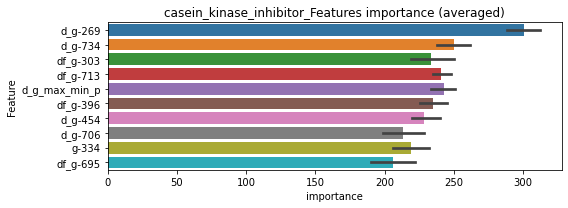

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201977	valid_1's binary_logloss: 0.0379955
[600]	training's binary_logloss: 0.00544317	valid_1's binary_logloss: 0.0172996
[900]	training's binary_logloss: 0.00277308	valid_1's binary_logloss: 0.0125064
[1200]	training's binary_logloss: 0.00182919	valid_1's binary_logloss: 0.0106259
[1500]	training's binary_logloss: 0.0013654	valid_1's binary_logloss: 0.00962128
[1800]	training's binary_logloss: 0.00110055	valid_1's binary_logloss: 0.00894821
[2100]	training's binary_logloss: 0.000930041	valid_1's binary_logloss: 0.00846184
[2400]	training's binary_logloss: 0.000809764	valid_1's binary_logloss: 0.00809805
[2700]	training's binary_logloss: 0.000722284	valid_1's binary_logloss: 0.00782939
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000667226	valid_1's binary_logloss: 0.00767258


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206253	valid_1's binary_logloss: 0.0310608
[600]	training's binary_logloss: 0.0055327	valid_1's binary_logloss: 0.0110609
[900]	training's binary_logloss: 0.00279719	valid_1's binary_logloss: 0.00669572
[1200]	training's binary_logloss: 0.00184543	valid_1's binary_logloss: 0.00502665
[1500]	training's binary_logloss: 0.00138082	valid_1's binary_logloss: 0.00411686
[1800]	training's binary_logloss: 0.00111155	valid_1's binary_logloss: 0.00357704
[2100]	training's binary_logloss: 0.000939729	valid_1's binary_logloss: 0.00318885
[2400]	training's binary_logloss: 0.000819232	valid_1's binary_logloss: 0.00291032
[2700]	training's binary_logloss: 0.000732392	valid_1's binary_logloss: 0.00271194
[3000]	training's binary_logloss: 0.000666906	valid_1's binary_logloss: 0.00254157
[3300]	training's binary_logloss: 0.000615775	valid_1's binary_logloss: 0.00240479
[3600]	training's binary_logloss: 0.000

len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206544	valid_1's binary_logloss: 0.0267337
[600]	training's binary_logloss: 0.00561229	valid_1's binary_logloss: 0.00838109
[900]	training's binary_logloss: 0.00285963	valid_1's binary_logloss: 0.00471135
[1200]	training's binary_logloss: 0.00188226	valid_1's binary_logloss: 0.00334144
[1500]	training's binary_logloss: 0.00140875	valid_1's binary_logloss: 0.00263143
[1800]	training's binary_logloss: 0.00113333	valid_1's binary_logloss: 0.00219562
[2100]	training's binary_logloss: 0.000957995	valid_1's binary_logloss: 0.00191419
[2400]	training's binary_logloss: 0.000835589	valid_1's binary_logloss: 0.00171676
[2700]	training's binary_logloss: 0.000746763	valid_1's binary_logloss: 0.00156977
[3000]	training's binary_logloss: 0.000678957	valid_1's binary_logloss: 0.00145033
[3300]	training's binary_logloss: 0.000626	valid_1's binary_logloss: 0.00136278
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197721	valid_1's binary_logloss: 0.0401443
[600]	training's binary_logloss: 0.00533938	valid_1's binary_logloss: 0.0202171
[900]	training's binary_logloss: 0.00272779	valid_1's binary_logloss: 0.0157638
[1200]	training's binary_logloss: 0.00180617	valid_1's binary_logloss: 0.0139307
[1500]	training's binary_logloss: 0.00135184	valid_1's binary_logloss: 0.0130321
Early stopping, best iteration is:
[1694]	training's binary_logloss: 0.00116799	valid_1's binary_logloss: 0.0125337


casein_kinase_inhibitor logloss: 0.005858417272930999


neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382475	valid_1's binary_logloss: 0.00626803
[600]	training's binary_logloss: 0.000551112	valid_1's binary_logloss: 0.00172315
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000351711	valid_1's binary_logloss: 0.00132865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390274	valid_1's binary_logloss: 0.00813109
[600]	training's binary_logloss: 0.000548997	valid_1's binary_logloss: 0.0022571
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000356683	valid_1's binary_logloss: 0.00179597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386111	valid_1's binary_logloss: 0.00612241
[600]	training's binary_logloss: 0.00054972	valid_1's binary_logloss: 0.00135938
[900]	training's binary_logloss: 0.000349495	valid_1's binary_logloss: 0.000980547
Early stoppin

1 / 3 AUC score:1.000
y_Threshold: 0.0015609, Threshold: 0.0133313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00933, conf_1:0.01733
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0133313
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.0333313
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0533313
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.0733313
threshold: 0.0733313, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035981	valid_1's binary_logloss: 0.0056189
[600]	training's binary_logloss: 0.000500643	valid_1's binary_logloss: 0.00138057
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000331017	valid_1's binary_logloss: 0.00111369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356737	valid_1's binary_logloss: 0.0072803
[600]	training's binary_logloss: 0.000503729	valid_1's binary_logloss: 0.00222984
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000336437	valid_1's binary_logloss: 0.00184095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360724	valid_1's binary_logloss: 0.0053782
[600]	training's binary_logloss: 0.000507804	valid_1's binary_logloss: 0.00112135
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000338839	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.1030499, Threshold: 0.0733313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0067805 Vs.target_rate: 0.00076, Num_p_label: 27.0, conf_0:0.05867, conf_1:0.08800
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_1: 0.0733313
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0933313
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.1133313
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.1333313
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.1533313
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_6: 0.1733313
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.1933313
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.2133313
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.2333313
threshold: 0.2333313, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035981	valid_1's binary_logloss: 0.0056189
[600]	training's binary_logloss: 0.000500643	valid_1's binary_logloss: 0.00138057
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000331017	valid_1's binary_logloss: 0.00111369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356737	valid_1's binary_logloss: 0.0072803
[600]	training's binary_logloss: 0.000503729	valid_1's binary_logloss: 0.00222984
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000336437	valid_1's binary_logloss: 0.00184095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360724	valid_1's binary_logloss: 0.0053782
[600]	training's binary_logloss: 0.000507804	valid_1's binary_logloss: 0.00112135
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000338839	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1030499, Threshold: 0.2333313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.21000, conf_1:0.25666
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.2333313
threshold: 0.2333313, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


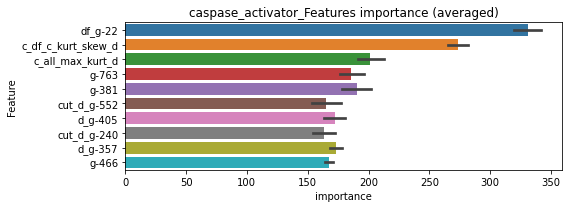

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102864	valid_1's binary_logloss: 0.0135946
[600]	training's binary_logloss: 0.00270337	valid_1's binary_logloss: 0.00442937
[900]	training's binary_logloss: 0.00144141	valid_1's binary_logloss: 0.00269866
[1200]	training's binary_logloss: 0.000988193	valid_1's binary_logloss: 0.00203303
[1500]	training's binary_logloss: 0.000759461	valid_1's binary_logloss: 0.00167414
[1800]	training's binary_logloss: 0.000626161	valid_1's binary_logloss: 0.00146154
[2100]	training's binary_logloss: 0.000540631	valid_1's binary_logloss: 0.00131284
[2400]	training's binary_logloss: 0.000479261	valid_1's binary_logloss: 0.00121018
[2700]	training's binary_logloss: 0.000435254	valid_1's binary_logloss: 0.00113044
[3000]	training's binary_logloss: 0.000402774	valid_1's binary_logloss: 0.0010736
[3300]	training's binary_logloss: 0.00037967	valid_1's binary_logloss: 0.00103686
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101427	valid_1's binary_logloss: 0.0148682
[600]	training's binary_logloss: 0.00270075	valid_1's binary_logloss: 0.00529406
[900]	training's binary_logloss: 0.00143475	valid_1's binary_logloss: 0.00339813
[1200]	training's binary_logloss: 0.000980401	valid_1's binary_logloss: 0.00263396
[1500]	training's binary_logloss: 0.000756696	valid_1's binary_logloss: 0.00222656
[1800]	training's binary_logloss: 0.000625116	valid_1's binary_logloss: 0.00197878
[2100]	training's binary_logloss: 0.000536902	valid_1's binary_logloss: 0.00180127
[2400]	training's binary_logloss: 0.000476313	valid_1's binary_logloss: 0.00166551
[2700]	training's binary_logloss: 0.000432795	valid_1's binary_logloss: 0.00156588
[3000]	training's binary_logloss: 0.000400737	valid_1's binary_logloss: 0.0014918
[3300]	training's binary_logloss: 0.00037839	valid_1's binary_logloss: 0.00144693
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103642	valid_1's binary_logloss: 0.012993
[600]	training's binary_logloss: 0.00272914	valid_1's binary_logloss: 0.0040012
[900]	training's binary_logloss: 0.00145461	valid_1's binary_logloss: 0.00236863
[1200]	training's binary_logloss: 0.000994662	valid_1's binary_logloss: 0.00173682
[1500]	training's binary_logloss: 0.000765851	valid_1's binary_logloss: 0.00140902
[1800]	training's binary_logloss: 0.000629027	valid_1's binary_logloss: 0.00121176
[2100]	training's binary_logloss: 0.000541752	valid_1's binary_logloss: 0.00108304
[2400]	training's binary_logloss: 0.00047978	valid_1's binary_logloss: 0.000988092
[2700]	training's binary_logloss: 0.000435479	valid_1's binary_logloss: 0.000918391
[3000]	training's binary_logloss: 0.000403391	valid_1's binary_logloss: 0.000868555
[3300]	training's binary_logloss: 0.00038046	valid_1's binary_logloss: 0.000831306
[3600]	training's binary_logloss: 

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102066	valid_1's binary_logloss: 0.0135568
[600]	training's binary_logloss: 0.0027037	valid_1's binary_logloss: 0.00433236
[900]	training's binary_logloss: 0.00144176	valid_1's binary_logloss: 0.00261644
[1200]	training's binary_logloss: 0.000985061	valid_1's binary_logloss: 0.00194285
[1500]	training's binary_logloss: 0.000757627	valid_1's binary_logloss: 0.00158571
[1800]	training's binary_logloss: 0.000624113	valid_1's binary_logloss: 0.00136716
[2100]	training's binary_logloss: 0.000536054	valid_1's binary_logloss: 0.00121677
[2400]	training's binary_logloss: 0.000475004	valid_1's binary_logloss: 0.00110508
[2700]	training's binary_logloss: 0.000431226	valid_1's binary_logloss: 0.0010301
[3000]	training's binary_logloss: 0.000400136	valid_1's binary_logloss: 0.000972471
[3300]	training's binary_logloss: 0.000377713	valid_1's binary_logloss: 0.000933336
[3600]	training's binary_logloss: 

caspase_activator logloss: 0.0010024959148225033


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00479051	valid_1's binary_logloss: 0.00741773
[600]	training's binary_logloss: 0.000603408	valid_1's binary_logloss: 0.00156041
[900]	training's binary_logloss: 0.00037995	valid_1's binary_logloss: 0.00120018
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.00037995	valid_1's binary_logloss: 0.00120018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0049271	valid_1's binary_logloss: 0.0113024
[600]	training's binary_logloss: 0.000616208	valid_1's binary_logloss: 0.00306175
[900]	training's binary_logloss: 0.000371183	valid_1's binary_logloss: 0.00233647
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000372409	valid_1's binary_logloss: 0.00233273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491732	valid_1's binary_logloss: 0.0069105
[600]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0018858, Threshold: 0.0081904, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00573, conf_1:0.01065
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0081904
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0281904
threshold: 0.0281904, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454079	valid_1's binary_logloss: 0.00650155
[600]	training's binary_logloss: 0.000574825	valid_1's binary_logloss: 0.00105374
[900]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.000725422
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.000725422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442633	valid_1's binary_logloss: 0.0098716
[600]	training's binary_logloss: 0.000562007	valid_1's binary_logloss: 0.00292266
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000358612	valid_1's binary_logloss: 0.00239912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442125	valid_1's binary_logloss: 0.00627764
[600]	training's binary_logloss: 0.000574516	valid_1's binary_logloss: 0.00108367
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.0900916, Threshold: 0.0281904, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0065294 Vs.target_rate: 0.00076, Num_p_label: 26.0, conf_0:0.02255, conf_1:0.03383
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.0281904
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0481904
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.0681904
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.0881904
threshold: 0.0881904, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454079	valid_1's binary_logloss: 0.00650155
[600]	training's binary_logloss: 0.000574825	valid_1's binary_logloss: 0.00105374
[900]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.000725422
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.000725422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442633	valid_1's binary_logloss: 0.0098716
[600]	training's binary_logloss: 0.000562007	valid_1's binary_logloss: 0.00292266
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000358612	valid_1's binary_logloss: 0.00239912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442125	valid_1's binary_logloss: 0.00627764
[600]	training's binary_logloss: 0.000574516	valid_1's binary_logloss: 0.00108367
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.0900916, Threshold: 0.0881904, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.07937, conf_1:0.09701
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0881904
threshold: 0.0881904, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


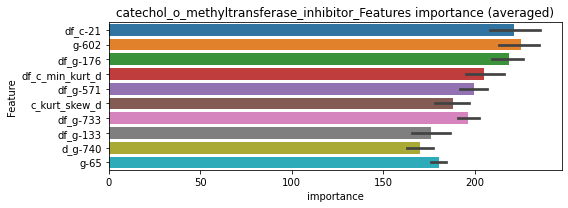

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116921	valid_1's binary_logloss: 0.0152118
[600]	training's binary_logloss: 0.0030177	valid_1's binary_logloss: 0.00462308
[900]	training's binary_logloss: 0.00158936	valid_1's binary_logloss: 0.00271153
[1200]	training's binary_logloss: 0.00108137	valid_1's binary_logloss: 0.00199052
[1500]	training's binary_logloss: 0.000833048	valid_1's binary_logloss: 0.00162505
[1800]	training's binary_logloss: 0.000685326	valid_1's binary_logloss: 0.0013937
[2100]	training's binary_logloss: 0.000590461	valid_1's binary_logloss: 0.00124409
[2400]	training's binary_logloss: 0.000522901	valid_1's binary_logloss: 0.00112948
[2700]	training's binary_logloss: 0.000474281	valid_1's binary_logloss: 0.00105133
[3000]	training's binary_logloss: 0.000437731	valid_1's binary_logloss: 0.000997167
[3300]	training's binary_logloss: 0.00041085	valid_1's binary_logloss: 0.000952172
[3600]	training's binary_logloss: 0.

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116101	valid_1's binary_logloss: 0.0180898
[600]	training's binary_logloss: 0.00296436	valid_1's binary_logloss: 0.00658238
[900]	training's binary_logloss: 0.00156494	valid_1's binary_logloss: 0.00442424
[1200]	training's binary_logloss: 0.00106425	valid_1's binary_logloss: 0.00350383
[1500]	training's binary_logloss: 0.000817299	valid_1's binary_logloss: 0.00304734
[1800]	training's binary_logloss: 0.000672076	valid_1's binary_logloss: 0.00274377
[2100]	training's binary_logloss: 0.000578749	valid_1's binary_logloss: 0.00255352
[2400]	training's binary_logloss: 0.000513108	valid_1's binary_logloss: 0.00241524
[2700]	training's binary_logloss: 0.000465163	valid_1's binary_logloss: 0.00230348
[3000]	training's binary_logloss: 0.000429393	valid_1's binary_logloss: 0.00221759
Early stopping, best iteration is:
[3060]	training's binary_logloss: 0.000423415	valid_1's binary_logloss: 0.00219836


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116843	valid_1's binary_logloss: 0.0148471
[600]	training's binary_logloss: 0.00302696	valid_1's binary_logloss: 0.00444612
[900]	training's binary_logloss: 0.00159391	valid_1's binary_logloss: 0.00257269
[1200]	training's binary_logloss: 0.00108502	valid_1's binary_logloss: 0.00186983
[1500]	training's binary_logloss: 0.000834024	valid_1's binary_logloss: 0.00150968
[1800]	training's binary_logloss: 0.00068591	valid_1's binary_logloss: 0.00129098
[2100]	training's binary_logloss: 0.000591464	valid_1's binary_logloss: 0.00114479
[2400]	training's binary_logloss: 0.000523249	valid_1's binary_logloss: 0.00104154
[2700]	training's binary_logloss: 0.000473521	valid_1's binary_logloss: 0.000959409
[3000]	training's binary_logloss: 0.000437252	valid_1's binary_logloss: 0.000898745
[3300]	training's binary_logloss: 0.000410181	valid_1's binary_logloss: 0.000853515
[3600]	training's binary_logloss:

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117434	valid_1's binary_logloss: 0.0170816
[600]	training's binary_logloss: 0.00303486	valid_1's binary_logloss: 0.0055712
[900]	training's binary_logloss: 0.00160219	valid_1's binary_logloss: 0.00345624
[1200]	training's binary_logloss: 0.0010863	valid_1's binary_logloss: 0.00259869
[1500]	training's binary_logloss: 0.000835643	valid_1's binary_logloss: 0.0021541
[1800]	training's binary_logloss: 0.000689659	valid_1's binary_logloss: 0.00189068
[2100]	training's binary_logloss: 0.000594182	valid_1's binary_logloss: 0.00173639
[2400]	training's binary_logloss: 0.000526625	valid_1's binary_logloss: 0.00160684
[2700]	training's binary_logloss: 0.000475834	valid_1's binary_logloss: 0.00150043
[3000]	training's binary_logloss: 0.00043835	valid_1's binary_logloss: 0.00142407
[3300]	training's binary_logloss: 0.000411084	valid_1's binary_logloss: 0.00136978
[3600]	training's binary_logloss: 0.000

catechol_o_methyltransferase_inhibitor logloss: 0.0013019893064209192


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276, target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264362	valid_1's binary_logloss: 0.105225
[600]	training's binary_logloss: 0.00468903	valid_1's binary_logloss: 0.0840558
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00268481	valid_1's binary_logloss: 0.0805986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285592	valid_1's binary_logloss: 0.0845117
[600]	training's binary_logloss: 0.00498078	valid_1's binary_logloss: 0.0544383
[900]	training's binary_logloss: 0.00179412	valid_1's binary_logloss: 0.0481099
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.0014456	valid_1's binary_logloss: 0.0472119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284878	valid_1's binary_logloss: 0.0748097
[600]	training's binary_logloss: 0.00509499	valid_1's binary_logloss: 0.0431213
[900]	training's binary_logloss

1 / 3 AUC score:0.997
y_Threshold: 0.0138552, Threshold: 0.0473799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00428, Num_p_label: 40.0, conf_0:0.03317, conf_1:0.06159
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0473799
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_2: 0.0673799
threshold: 0.0673799, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025588	valid_1's binary_logloss: 0.088803
[600]	training's binary_logloss: 0.00441761	valid_1's binary_logloss: 0.0622106
[900]	training's binary_logloss: 0.00162731	valid_1's binary_logloss: 0.0556072
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.00131602	valid_1's binary_logloss: 0.0550201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253332	valid_1's binary_logloss: 0.0808841
[600]	training's binary_logloss: 0.00438608	valid_1's binary_logloss: 0.0511236
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00194466	valid_1's binary_logloss: 0.046424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250125	valid_1's binary_logloss: 0.0817652
[600]	training's binary_logloss: 0.00430638	valid_1's binary_logloss: 0.0521553
Early stopping, best iteration i

2 / 3 AUC score:0.999
y_Threshold: 0.0353986, Threshold: 0.0673799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 635.0/3759
p_label_rate: 0.0133099 Vs.target_rate: 0.00428, Num_p_label: 53.0, conf_0:0.05390, conf_1:0.08086
Num_p_label: 53.0, Expected: 17.1, Adj_threshold_1: 0.0673799
Num_p_label: 34.0, Expected: 17.1, Adj_threshold_2: 0.0873799
Num_p_label: 24.0, Expected: 17.1, Adj_threshold_3: 0.1073799
threshold: 0.1073799, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233142	valid_1's binary_logloss: 0.0872454
[600]	training's binary_logloss: 0.00376165	valid_1's binary_logloss: 0.0643716
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00189685	valid_1's binary_logloss: 0.0617991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024399	valid_1's binary_logloss: 0.0690018
[600]	training's binary_logloss: 0.00411291	valid_1's binary_logloss: 0.0419941
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00269653	valid_1's binary_logloss: 0.0393492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235579	valid_1's binary_logloss: 0.0648519
[600]	training's binary_logloss: 0.00396862	valid_1's binary_logloss: 0.0380212
[900]	training's binary_logloss: 0.0015007	valid_1's binary_logloss: 0.0321132
Early stopping, best iteration i

3 / 3 AUC score:0.999
y_Threshold: 0.0445009, Threshold: 0.1073799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 624.0/3737
p_label_rate: 0.0060271 Vs.target_rate: 0.00428, Num_p_label: 24.0, conf_0:0.09664, conf_1:0.11812
threshold: 0.1073799, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 624.0/3737, y_label_rate: 0.1669789


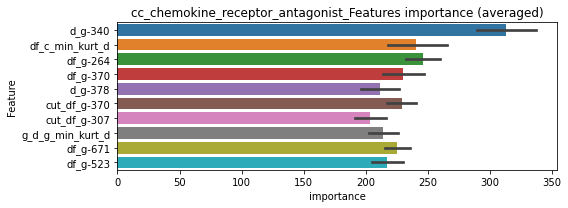

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407256	valid_1's binary_logloss: 0.0897117
[600]	training's binary_logloss: 0.013211	valid_1's binary_logloss: 0.0577317
[900]	training's binary_logloss: 0.00671815	valid_1's binary_logloss: 0.0486188
[1200]	training's binary_logloss: 0.00430442	valid_1's binary_logloss: 0.0450177
[1500]	training's binary_logloss: 0.00312854	valid_1's binary_logloss: 0.0432216
Early stopping, best iteration is:
[1599]	training's binary_logloss: 0.00286538	valid_1's binary_logloss: 0.0427781


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0396713	valid_1's binary_logloss: 0.0892262
[600]	training's binary_logloss: 0.0127912	valid_1's binary_logloss: 0.0577304
[900]	training's binary_logloss: 0.00652007	valid_1's binary_logloss: 0.0492845
[1200]	training's binary_logloss: 0.00418714	valid_1's binary_logloss: 0.0457548
[1500]	training's binary_logloss: 0.00304918	valid_1's binary_logloss: 0.0439121
Early stopping, best iteration is:
[1635]	training's binary_logloss: 0.00271044	valid_1's binary_logloss: 0.0430249


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423769	valid_1's binary_logloss: 0.0817199
[600]	training's binary_logloss: 0.0136694	valid_1's binary_logloss: 0.0503106
[900]	training's binary_logloss: 0.00688185	valid_1's binary_logloss: 0.0420547
[1200]	training's binary_logloss: 0.0043962	valid_1's binary_logloss: 0.0387782
[1500]	training's binary_logloss: 0.00318719	valid_1's binary_logloss: 0.0371098
Early stopping, best iteration is:
[1615]	training's binary_logloss: 0.00287634	valid_1's binary_logloss: 0.0365


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0411802	valid_1's binary_logloss: 0.0940267
[600]	training's binary_logloss: 0.013133	valid_1's binary_logloss: 0.0655029
[900]	training's binary_logloss: 0.00666343	valid_1's binary_logloss: 0.0578912
[1200]	training's binary_logloss: 0.00423022	valid_1's binary_logloss: 0.0552572
Early stopping, best iteration is:
[1259]	training's binary_logloss: 0.00393938	valid_1's binary_logloss: 0.0549852


cc_chemokine_receptor_antagonist logloss: 0.04432162791702411


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515954	valid_1's binary_logloss: 0.00863648
[600]	training's binary_logloss: 0.000648405	valid_1's binary_logloss: 0.00207957
[900]	training's binary_logloss: 0.000370316	valid_1's binary_logloss: 0.00145597
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00036571	valid_1's binary_logloss: 0.00145302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513003	valid_1's binary_logloss: 0.0113001
[600]	training's binary_logloss: 0.000642405	valid_1's binary_logloss: 0.00293073
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000379537	valid_1's binary_logloss: 0.00218686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523599	valid_1's binary_logloss: 0.00675094
[600]	training's binary_logloss: 0.000660798	valid_1's binary_logloss: 0.00114245
[900]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0018160, Threshold: 0.0044455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00311, conf_1:0.00578
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0044455
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0244455
threshold: 0.0244455, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486935	valid_1's binary_logloss: 0.00787686
[600]	training's binary_logloss: 0.000620256	valid_1's binary_logloss: 0.00177256
[900]	training's binary_logloss: 0.000360979	valid_1's binary_logloss: 0.00124143
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000363404	valid_1's binary_logloss: 0.00124011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477599	valid_1's binary_logloss: 0.0115765
[600]	training's binary_logloss: 0.000611076	valid_1's binary_logloss: 0.00342092
[900]	training's binary_logloss: 0.000358671	valid_1's binary_logloss: 0.00263995
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.0003576	valid_1's binary_logloss: 0.00263832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488427	valid_1's binary_logloss: 0.006225
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0697535, Threshold: 0.0244455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00076, Num_p_label: 3.0, conf_0:0.01956, conf_1:0.02933
threshold: 0.0244455, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486935	valid_1's binary_logloss: 0.00787686
[600]	training's binary_logloss: 0.000620256	valid_1's binary_logloss: 0.00177256
[900]	training's binary_logloss: 0.000360979	valid_1's binary_logloss: 0.00124143
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000363404	valid_1's binary_logloss: 0.00124011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477599	valid_1's binary_logloss: 0.0115765
[600]	training's binary_logloss: 0.000611076	valid_1's binary_logloss: 0.00342092
[900]	training's binary_logloss: 0.000358671	valid_1's binary_logloss: 0.00263995
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.0003576	valid_1's binary_logloss: 0.00263832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488427	valid_1's binary_logloss: 0.006225
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0697535, Threshold: 0.0244455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00076, Num_p_label: 3.0, conf_0:0.02200, conf_1:0.02689
threshold: 0.0244455, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


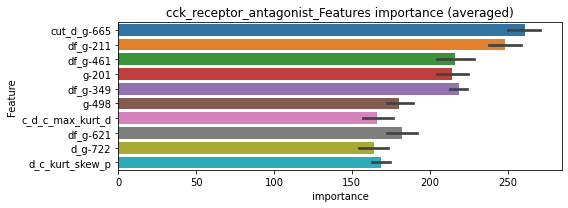

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124052	valid_1's binary_logloss: 0.01596
[600]	training's binary_logloss: 0.00320571	valid_1's binary_logloss: 0.00514245
[900]	training's binary_logloss: 0.00169544	valid_1's binary_logloss: 0.0031339
[1200]	training's binary_logloss: 0.00114888	valid_1's binary_logloss: 0.00233623
[1500]	training's binary_logloss: 0.000879862	valid_1's binary_logloss: 0.00191631
[1800]	training's binary_logloss: 0.000723733	valid_1's binary_logloss: 0.00165983
[2100]	training's binary_logloss: 0.000622197	valid_1's binary_logloss: 0.00150025
[2400]	training's binary_logloss: 0.000550547	valid_1's binary_logloss: 0.00136478
[2700]	training's binary_logloss: 0.000499547	valid_1's binary_logloss: 0.00127601
[3000]	training's binary_logloss: 0.000460245	valid_1's binary_logloss: 0.00120796
[3300]	training's binary_logloss: 0.000430697	valid_1's binary_logloss: 0.0011582
[3600]	training's binary_logloss: 0.000

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121972	valid_1's binary_logloss: 0.0210791
[600]	training's binary_logloss: 0.00316655	valid_1's binary_logloss: 0.0077006
[900]	training's binary_logloss: 0.0016625	valid_1's binary_logloss: 0.00498254
[1200]	training's binary_logloss: 0.00112936	valid_1's binary_logloss: 0.00385072
[1500]	training's binary_logloss: 0.000865315	valid_1's binary_logloss: 0.00327021
[1800]	training's binary_logloss: 0.000711989	valid_1's binary_logloss: 0.00290912
[2100]	training's binary_logloss: 0.000612755	valid_1's binary_logloss: 0.00267741
[2400]	training's binary_logloss: 0.000542862	valid_1's binary_logloss: 0.00248654
[2700]	training's binary_logloss: 0.000492094	valid_1's binary_logloss: 0.00235841
[3000]	training's binary_logloss: 0.000453405	valid_1's binary_logloss: 0.00226411
[3300]	training's binary_logloss: 0.000423852	valid_1's binary_logloss: 0.00218055
[3600]	training's binary_logloss: 0.0

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126318	valid_1's binary_logloss: 0.0152556
[600]	training's binary_logloss: 0.00324335	valid_1's binary_logloss: 0.00435765
[900]	training's binary_logloss: 0.00170039	valid_1's binary_logloss: 0.00244069
[1200]	training's binary_logloss: 0.00115015	valid_1's binary_logloss: 0.001727
[1500]	training's binary_logloss: 0.000880378	valid_1's binary_logloss: 0.00136947
[1800]	training's binary_logloss: 0.000724373	valid_1's binary_logloss: 0.00115469
[2100]	training's binary_logloss: 0.000622882	valid_1's binary_logloss: 0.0010101
[2400]	training's binary_logloss: 0.00055093	valid_1's binary_logloss: 0.000908709
[2700]	training's binary_logloss: 0.000498425	valid_1's binary_logloss: 0.000833164
[3000]	training's binary_logloss: 0.000459202	valid_1's binary_logloss: 0.000774833
[3300]	training's binary_logloss: 0.000430215	valid_1's binary_logloss: 0.000733801
[3600]	training's binary_logloss: 0

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123675	valid_1's binary_logloss: 0.0159087
[600]	training's binary_logloss: 0.00321119	valid_1's binary_logloss: 0.00498347
[900]	training's binary_logloss: 0.0016812	valid_1's binary_logloss: 0.00288011
[1200]	training's binary_logloss: 0.00113997	valid_1's binary_logloss: 0.00210036
[1500]	training's binary_logloss: 0.000874766	valid_1's binary_logloss: 0.00169662
[1800]	training's binary_logloss: 0.000719541	valid_1's binary_logloss: 0.0014528
[2100]	training's binary_logloss: 0.000618735	valid_1's binary_logloss: 0.00128537
[2400]	training's binary_logloss: 0.000547716	valid_1's binary_logloss: 0.00117011
[2700]	training's binary_logloss: 0.00049573	valid_1's binary_logloss: 0.00108496
[3000]	training's binary_logloss: 0.000456742	valid_1's binary_logloss: 0.00102132
[3300]	training's binary_logloss: 0.000427042	valid_1's binary_logloss: 0.0009701
[3600]	training's binary_logloss: 0.000

cck_receptor_antagonist logloss: 0.001155887101168303


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241, target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.109006	valid_1's binary_logloss: 0.325312
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.0473746	valid_1's binary_logloss: 0.308519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.107343	valid_1's binary_logloss: 0.335194
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.0464873	valid_1's binary_logloss: 0.321521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.106823	valid_1's binary_logloss: 0.343014
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.065039	valid_1's binary_logloss: 0.332483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.100999	valid_1's binary_logloss: 0.332923
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0492639	valid_1's binary_logloss: 0.3216

1 / 3 AUC score:0.826
y_Threshold: 0.1155908, Threshold: 0.4326020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 584 → Positive_corect_labels: 421/3305
p_label_rate: 0.0100452 Vs.target_rate: 0.01478, Num_p_label: 40.0, conf_0:0.30282, conf_1:0.56238
threshold: 0.4326020, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 421.0/3305, y_label_rate: 0.1273828
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0486317	valid_1's binary_logloss: 0.183468
[600]	training's binary_logloss: 0.0108112	valid_1's binary_logloss: 0.158587
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00676266	valid_1's binary_logloss: 0.157045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0492978	valid_1's binary_logloss: 0.205309
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.0125999	valid_1's binary_logloss: 0.186416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0531109	valid_1's binary_logloss: 0.171015
[600]	training's binary_logloss: 0.011373	valid_1's binary_logloss: 0.136594
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00533365	valid_1's binary_logloss: 0.131283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_lo

2 / 3 AUC score:0.968
y_Threshold: 0.0822188, Threshold: 0.4326020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 346.0/3155
p_label_rate: 0.0306379 Vs.target_rate: 0.01478, Num_p_label: 122.0, conf_0:0.34608, conf_1:0.51912
Num_p_label: 122.0, Expected: 58.9, Adj_threshold_1: 0.4326020
Num_p_label: 120.0, Expected: 58.9, Adj_threshold_2: 0.4526020
Num_p_label: 117.0, Expected: 58.9, Adj_threshold_3: 0.4726020
Num_p_label: 111.0, Expected: 58.9, Adj_threshold_4: 0.4926020
Num_p_label: 105.0, Expected: 58.9, Adj_threshold_5: 0.5126020
Num_p_label: 100.0, Expected: 58.9, Adj_threshold_6: 0.5326020
Num_p_label: 95.0, Expected: 58.9, Adj_threshold_7: 0.5526020
Num_p_label: 92.0, Expected: 58.9, Adj_threshold_8: 0.5726020
Num_p_label: 87.0, Expected: 58.9, Adj_threshold_9: 0.5926020
threshold: 0.5926020, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 346.0/3155, y_label_rate: 0.1096672
================= Pseudo labeling 3 / 3 ==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0322823	valid_1's binary_logloss: 0.153631
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.0111707	valid_1's binary_logloss: 0.136709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0335897	valid_1's binary_logloss: 0.12353
[600]	training's binary_logloss: 0.00646679	valid_1's binary_logloss: 0.0918244
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.0039535	valid_1's binary_logloss: 0.0877416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343555	valid_1's binary_logloss: 0.129094
[600]	training's binary_logloss: 0.00638632	valid_1's binary_logloss: 0.0915479
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.00356975	valid_1's binary_logloss: 0.0867194
Training until validation scores don't improve for 30 rounds
[300]	training's bina

3 / 3 AUC score:0.992
y_Threshold: 0.0881764, Threshold: 0.5926020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 314.0/3091
p_label_rate: 0.0296334 Vs.target_rate: 0.01478, Num_p_label: 118.0, conf_0:0.50000, conf_1:0.65186
Num_p_label: 118.0, Expected: 58.9, Adj_threshold_1: 0.5926020
Num_p_label: 118.0, Expected: 58.9, Adj_threshold_2: 0.6126020
Num_p_label: 115.0, Expected: 58.9, Adj_threshold_3: 0.6326020
Num_p_label: 112.0, Expected: 58.9, Adj_threshold_4: 0.6526020
Num_p_label: 107.0, Expected: 58.9, Adj_threshold_5: 0.6726020
Num_p_label: 103.0, Expected: 58.9, Adj_threshold_6: 0.6926020
Num_p_label: 102.0, Expected: 58.9, Adj_threshold_7: 0.7126020
Num_p_label: 99.0, Expected: 58.9, Adj_threshold_8: 0.7326020
Num_p_label: 96.0, Expected: 58.9, Adj_threshold_9: 0.7526020
Num_p_label: 93.0, Expected: 58.9, Adj_threshold_10: 0.7726020
threshold: 0.7926020, positive_p_label: 90.0/3982, p_label_rate: 0.0226017
positive_y_label: 314.0/3091, y_label_rate: 0

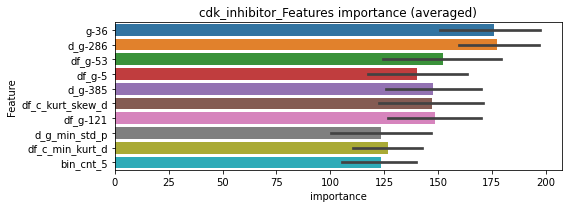

len(train_index) : 2318
len(valid_index) : 773
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.050855	valid_1's binary_logloss: 0.139198
[600]	training's binary_logloss: 0.0176102	valid_1's binary_logloss: 0.107906
[900]	training's binary_logloss: 0.00913259	valid_1's binary_logloss: 0.0994221
[1200]	training's binary_logloss: 0.00584992	valid_1's binary_logloss: 0.0959047
Early stopping, best iteration is:
[1232]	training's binary_logloss: 0.00562063	valid_1's binary_logloss: 0.0957496


len(train_index) : 2318
len(valid_index) : 773
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0481274	valid_1's binary_logloss: 0.148627
[600]	training's binary_logloss: 0.016762	valid_1's binary_logloss: 0.122009
[900]	training's binary_logloss: 0.00874005	valid_1's binary_logloss: 0.116662
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00920133	valid_1's binary_logloss: 0.116433


len(train_index) : 2318
len(valid_index) : 773
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0502288	valid_1's binary_logloss: 0.148953
[600]	training's binary_logloss: 0.0172276	valid_1's binary_logloss: 0.12471
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0137344	valid_1's binary_logloss: 0.1226


len(train_index) : 2319
len(valid_index) : 772
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0469455	valid_1's binary_logloss: 0.157296
[600]	training's binary_logloss: 0.0164155	valid_1's binary_logloss: 0.135749
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.0129099	valid_1's binary_logloss: 0.133796


cdk_inhibitor logloss: 0.11713931112341747


neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136363	valid_1's binary_logloss: 0.0527586
[600]	training's binary_logloss: 0.00193088	valid_1's binary_logloss: 0.0329274
[900]	training's binary_logloss: 0.00082938	valid_1's binary_logloss: 0.0299229
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00084511	valid_1's binary_logloss: 0.0298892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014717	valid_1's binary_logloss: 0.0382267
[600]	training's binary_logloss: 0.00203799	valid_1's binary_logloss: 0.0182187
[900]	training's binary_logloss: 0.000854944	valid_1's binary_logloss: 0.0143447
Early stopping, best iteration is:
[1160]	training's binary_logloss: 0.000631932	valid_1's binary_logloss: 0.0135706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015259	valid_1's binary_logloss: 0.0257378
[600]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0055899, Threshold: 0.0270446, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.01893, conf_1:0.03516
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0270446
Num_p_label: 31.0, Expected: 9.0, Adj_threshold_2: 0.0470446
Num_p_label: 27.0, Expected: 9.0, Adj_threshold_3: 0.0670446
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_4: 0.0870446
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_5: 0.1070446
threshold: 0.1070446, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123312	valid_1's binary_logloss: 0.0483437
[600]	training's binary_logloss: 0.00178862	valid_1's binary_logloss: 0.0295164
[900]	training's binary_logloss: 0.000791385	valid_1's binary_logloss: 0.0269803
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000694262	valid_1's binary_logloss: 0.026555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135527	valid_1's binary_logloss: 0.0346267
[600]	training's binary_logloss: 0.00192976	valid_1's binary_logloss: 0.0159322
[900]	training's binary_logloss: 0.000823123	valid_1's binary_logloss: 0.0125771
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000711793	valid_1's binary_logloss: 0.0122284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014541	valid_1's binary_logloss: 0.0253636
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0242641, Threshold: 0.1070446, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00227, Num_p_label: 32.0, conf_0:0.08564, conf_1:0.12845
Num_p_label: 32.0, Expected: 9.0, Adj_threshold_1: 0.1070446
Num_p_label: 29.0, Expected: 9.0, Adj_threshold_2: 0.1270446
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_3: 0.1470446
Num_p_label: 25.0, Expected: 9.0, Adj_threshold_4: 0.1670446
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_5: 0.1870446
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_6: 0.2070446
threshold: 0.2070446, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131195	valid_1's binary_logloss: 0.0410589
[600]	training's binary_logloss: 0.00187828	valid_1's binary_logloss: 0.0215516
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00087469	valid_1's binary_logloss: 0.0184944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139145	valid_1's binary_logloss: 0.0295705
[600]	training's binary_logloss: 0.00194446	valid_1's binary_logloss: 0.0112744
[900]	training's binary_logloss: 0.000837564	valid_1's binary_logloss: 0.00916183
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000628971	valid_1's binary_logloss: 0.00860306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133476	valid_1's binary_logloss: 0.0344992
[600]	training's binary_logloss: 0.00189856	valid_1's binary_logloss: 0.0132829
[900]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0286012, Threshold: 0.2070446, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0055249 Vs.target_rate: 0.00227, Num_p_label: 22.0, conf_0:0.18634, conf_1:0.22775
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_1: 0.2070446
threshold: 0.2070446, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


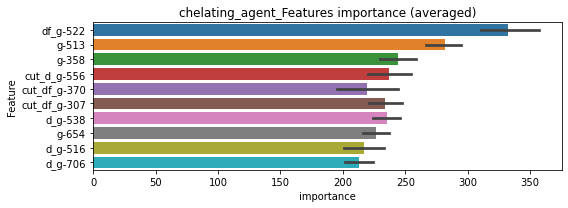

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0281891	valid_1's binary_logloss: 0.0494122
[600]	training's binary_logloss: 0.00811532	valid_1's binary_logloss: 0.0253991
[900]	training's binary_logloss: 0.00408311	valid_1's binary_logloss: 0.0193744
[1200]	training's binary_logloss: 0.00265416	valid_1's binary_logloss: 0.0168321
[1500]	training's binary_logloss: 0.00195502	valid_1's binary_logloss: 0.0155381
[1800]	training's binary_logloss: 0.00155808	valid_1's binary_logloss: 0.0148175
Early stopping, best iteration is:
[2061]	training's binary_logloss: 0.00132899	valid_1's binary_logloss: 0.0142635


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0276153	valid_1's binary_logloss: 0.0577045
[600]	training's binary_logloss: 0.00802229	valid_1's binary_logloss: 0.0309891
[900]	training's binary_logloss: 0.0040418	valid_1's binary_logloss: 0.0239558
[1200]	training's binary_logloss: 0.00262566	valid_1's binary_logloss: 0.0211997
[1500]	training's binary_logloss: 0.00194471	valid_1's binary_logloss: 0.019678
[1800]	training's binary_logloss: 0.0015462	valid_1's binary_logloss: 0.0188378
Early stopping, best iteration is:
[1896]	training's binary_logloss: 0.00145602	valid_1's binary_logloss: 0.0185333


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282812	valid_1's binary_logloss: 0.0438048
[600]	training's binary_logloss: 0.00814555	valid_1's binary_logloss: 0.0182823
[900]	training's binary_logloss: 0.00412466	valid_1's binary_logloss: 0.0119867
[1200]	training's binary_logloss: 0.00268683	valid_1's binary_logloss: 0.00946632
[1500]	training's binary_logloss: 0.00198358	valid_1's binary_logloss: 0.00798666
[1800]	training's binary_logloss: 0.00157254	valid_1's binary_logloss: 0.00701201
[2100]	training's binary_logloss: 0.00131484	valid_1's binary_logloss: 0.00645461
[2400]	training's binary_logloss: 0.00113729	valid_1's binary_logloss: 0.00601222
[2700]	training's binary_logloss: 0.00100896	valid_1's binary_logloss: 0.00569208
[3000]	training's binary_logloss: 0.000912555	valid_1's binary_logloss: 0.00543996
[3300]	training's binary_logloss: 0.000836999	valid_1's binary_logloss: 0.00519708
Early stopping, best iteration is:
[3339]	

len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282326	valid_1's binary_logloss: 0.053706
[600]	training's binary_logloss: 0.00815998	valid_1's binary_logloss: 0.0265288
[900]	training's binary_logloss: 0.00413253	valid_1's binary_logloss: 0.0202042
[1200]	training's binary_logloss: 0.00267838	valid_1's binary_logloss: 0.0176642
[1500]	training's binary_logloss: 0.00198167	valid_1's binary_logloss: 0.0161381
[1800]	training's binary_logloss: 0.0015789	valid_1's binary_logloss: 0.0152678
[2100]	training's binary_logloss: 0.00131632	valid_1's binary_logloss: 0.0145716
[2400]	training's binary_logloss: 0.00113704	valid_1's binary_logloss: 0.0141961
Early stopping, best iteration is:
[2656]	training's binary_logloss: 0.00102686	valid_1's binary_logloss: 0.0138207


chelating_agent logloss: 0.01295236842827804


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608408	valid_1's binary_logloss: 0.00999232
[600]	training's binary_logloss: 0.00079278	valid_1's binary_logloss: 0.00201658
[900]	training's binary_logloss: 0.000431829	valid_1's binary_logloss: 0.00130353
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000417402	valid_1's binary_logloss: 0.00127631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601537	valid_1's binary_logloss: 0.0104022
[600]	training's binary_logloss: 0.000803162	valid_1's binary_logloss: 0.0020954
[900]	training's binary_logloss: 0.000433301	valid_1's binary_logloss: 0.00131657
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000426143	valid_1's binary_logloss: 0.00130026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604828	valid_1's binary_logloss: 0.0118707
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0029934, Threshold: 0.0920599, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.06444, conf_1:0.11968
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0920599
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_2: 0.1120599
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_3: 0.1320599
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_4: 0.1520599
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_5: 0.1720599
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.1920599
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_7: 0.2120599
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.2320599
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_9: 0.2520599
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_10: 0.2720599
threshold: 0.2920599, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00548589	valid_1's binary_logloss: 0.00867173
[600]	training's binary_logloss: 0.000740025	valid_1's binary_logloss: 0.00169679
[900]	training's binary_logloss: 0.000409853	valid_1's binary_logloss: 0.00110093
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000404101	valid_1's binary_logloss: 0.00109351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551017	valid_1's binary_logloss: 0.00968492
[600]	training's binary_logloss: 0.000733926	valid_1's binary_logloss: 0.00195152
[900]	training's binary_logloss: 0.000403931	valid_1's binary_logloss: 0.0012434
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000401848	valid_1's binary_logloss: 0.00124131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547494	valid_1's binary_logloss: 0.00939853
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.1584155, Threshold: 0.2920599, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0118031 Vs.target_rate: 0.00101, Num_p_label: 47.0, conf_0:0.23365, conf_1:0.35047
Num_p_label: 47.0, Expected: 4.0, Adj_threshold_1: 0.2920599
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_2: 0.3120599
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_3: 0.3320599
Num_p_label: 42.0, Expected: 4.0, Adj_threshold_4: 0.3520599
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_5: 0.3720599
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_6: 0.3920599
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_7: 0.4120599
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_8: 0.4320599
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_9: 0.4520599
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_10: 0.4720599
threshold: 0.4920599, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00548589	valid_1's binary_logloss: 0.00867173
[600]	training's binary_logloss: 0.000740025	valid_1's binary_logloss: 0.00169679
[900]	training's binary_logloss: 0.000409853	valid_1's binary_logloss: 0.00110093
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000404101	valid_1's binary_logloss: 0.00109351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551017	valid_1's binary_logloss: 0.00968492
[600]	training's binary_logloss: 0.000733926	valid_1's binary_logloss: 0.00195152
[900]	training's binary_logloss: 0.000403931	valid_1's binary_logloss: 0.0012434
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000401848	valid_1's binary_logloss: 0.00124131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547494	valid_1's binary_logloss: 0.00939853
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.1584155, Threshold: 0.4920599, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0080362 Vs.target_rate: 0.00101, Num_p_label: 32.0, conf_0:0.44285, conf_1:0.54127
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_1: 0.4920599
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_2: 0.5120599
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_3: 0.5320599
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_4: 0.5520599
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_5: 0.5720599
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_6: 0.5920599
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.6120599
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_8: 0.6320599
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_9: 0.6520599
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_10: 0.6720599
threshold: 0.6920599, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


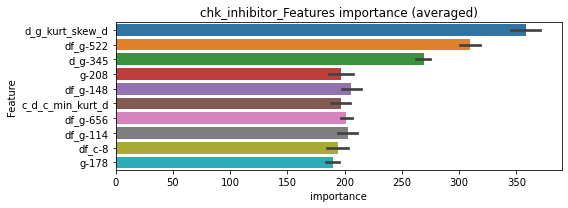

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141212	valid_1's binary_logloss: 0.0191183
[600]	training's binary_logloss: 0.00372333	valid_1's binary_logloss: 0.00600927
[900]	training's binary_logloss: 0.00194893	valid_1's binary_logloss: 0.00346793
[1200]	training's binary_logloss: 0.00130399	valid_1's binary_logloss: 0.00246947
[1500]	training's binary_logloss: 0.000992913	valid_1's binary_logloss: 0.00196978
[1800]	training's binary_logloss: 0.000808517	valid_1's binary_logloss: 0.00166162
[2100]	training's binary_logloss: 0.000689397	valid_1's binary_logloss: 0.00145467
[2400]	training's binary_logloss: 0.000609003	valid_1's binary_logloss: 0.00131528
[2700]	training's binary_logloss: 0.000549759	valid_1's binary_logloss: 0.00121076
[3000]	training's binary_logloss: 0.000505031	valid_1's binary_logloss: 0.00112983
[3300]	training's binary_logloss: 0.000472119	valid_1's binary_logloss: 0.00107051
[3600]	training's binary_logloss: 0

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141976	valid_1's binary_logloss: 0.0207667
[600]	training's binary_logloss: 0.00368921	valid_1's binary_logloss: 0.00665657
[900]	training's binary_logloss: 0.00191435	valid_1's binary_logloss: 0.0039023
[1200]	training's binary_logloss: 0.00128605	valid_1's binary_logloss: 0.00283618
[1500]	training's binary_logloss: 0.00097905	valid_1's binary_logloss: 0.00229146
[1800]	training's binary_logloss: 0.000798625	valid_1's binary_logloss: 0.00195935
[2100]	training's binary_logloss: 0.000682311	valid_1's binary_logloss: 0.0017329
[2400]	training's binary_logloss: 0.000601963	valid_1's binary_logloss: 0.00157396
[2700]	training's binary_logloss: 0.00054235	valid_1's binary_logloss: 0.00145454
[3000]	training's binary_logloss: 0.000499001	valid_1's binary_logloss: 0.00136585
[3300]	training's binary_logloss: 0.000467002	valid_1's binary_logloss: 0.00130134
[3600]	training's binary_logloss: 0.000

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141863	valid_1's binary_logloss: 0.0198449
[600]	training's binary_logloss: 0.00373666	valid_1's binary_logloss: 0.00623027
[900]	training's binary_logloss: 0.00193798	valid_1's binary_logloss: 0.00360873
[1200]	training's binary_logloss: 0.00129617	valid_1's binary_logloss: 0.00256228
[1500]	training's binary_logloss: 0.00098458	valid_1's binary_logloss: 0.00203324
[1800]	training's binary_logloss: 0.000803459	valid_1's binary_logloss: 0.00172313
[2100]	training's binary_logloss: 0.000686666	valid_1's binary_logloss: 0.00151933
[2400]	training's binary_logloss: 0.000605079	valid_1's binary_logloss: 0.00137333
[2700]	training's binary_logloss: 0.000546025	valid_1's binary_logloss: 0.00126506
[3000]	training's binary_logloss: 0.000503493	valid_1's binary_logloss: 0.0011856
[3300]	training's binary_logloss: 0.000472148	valid_1's binary_logloss: 0.00112852
[3600]	training's binary_logloss: 0.0

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014293	valid_1's binary_logloss: 0.02132
[600]	training's binary_logloss: 0.0037013	valid_1's binary_logloss: 0.00676077
[900]	training's binary_logloss: 0.00191491	valid_1's binary_logloss: 0.00395407
[1200]	training's binary_logloss: 0.00128343	valid_1's binary_logloss: 0.00286741
[1500]	training's binary_logloss: 0.000976441	valid_1's binary_logloss: 0.0022988
[1800]	training's binary_logloss: 0.000797762	valid_1's binary_logloss: 0.00195721
[2100]	training's binary_logloss: 0.000682331	valid_1's binary_logloss: 0.00173335
[2400]	training's binary_logloss: 0.000601582	valid_1's binary_logloss: 0.00156467
[2700]	training's binary_logloss: 0.000542516	valid_1's binary_logloss: 0.00144684
[3000]	training's binary_logloss: 0.000500246	valid_1's binary_logloss: 0.00136815
[3300]	training's binary_logloss: 0.000468029	valid_1's binary_logloss: 0.00129588
[3600]	training's binary_logloss: 0.0004

chk_inhibitor logloss: 0.001106102446989295


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103822	valid_1's binary_logloss: 0.0321874
[600]	training's binary_logloss: 0.00138891	valid_1's binary_logloss: 0.0167055
[900]	training's binary_logloss: 0.000634617	valid_1's binary_logloss: 0.0140532
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000577366	valid_1's binary_logloss: 0.0138338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107587	valid_1's binary_logloss: 0.0264444
[600]	training's binary_logloss: 0.00147102	valid_1's binary_logloss: 0.0124092
[900]	training's binary_logloss: 0.000661966	valid_1's binary_logloss: 0.0103571
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000608743	valid_1's binary_logloss: 0.0101855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114328	valid_1's binary_logloss: 0.0184202
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0046780, Threshold: 0.0500289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.03502, conf_1:0.06504
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0500289
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_2: 0.0700289
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_3: 0.0900289
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_4: 0.1100289
threshold: 0.1100289, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894644	valid_1's binary_logloss: 0.0284998
[600]	training's binary_logloss: 0.00124059	valid_1's binary_logloss: 0.0144145
[900]	training's binary_logloss: 0.000589259	valid_1's binary_logloss: 0.0120861
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000523715	valid_1's binary_logloss: 0.0118342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00964799	valid_1's binary_logloss: 0.0245575
[600]	training's binary_logloss: 0.00131949	valid_1's binary_logloss: 0.0116107
[900]	training's binary_logloss: 0.00061746	valid_1's binary_logloss: 0.00983143
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000569567	valid_1's binary_logloss: 0.00969291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010391	valid_1's binary_logloss: 0.0153684
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0538416, Threshold: 0.1100289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0143144 Vs.target_rate: 0.00176, Num_p_label: 57.0, conf_0:0.08802, conf_1:0.13203
Num_p_label: 57.0, Expected: 7.0, Adj_threshold_1: 0.1100289
Num_p_label: 49.0, Expected: 7.0, Adj_threshold_2: 0.1300289
Num_p_label: 46.0, Expected: 7.0, Adj_threshold_3: 0.1500289
Num_p_label: 43.0, Expected: 7.0, Adj_threshold_4: 0.1700289
Num_p_label: 41.0, Expected: 7.0, Adj_threshold_5: 0.1900289
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_6: 0.2100289
Num_p_label: 32.0, Expected: 7.0, Adj_threshold_7: 0.2300289
Num_p_label: 30.0, Expected: 7.0, Adj_threshold_8: 0.2500289
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_9: 0.2700289
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_10: 0.2900289
threshold: 0.3100289, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941502	valid_1's binary_logloss: 0.0209243
[600]	training's binary_logloss: 0.00130291	valid_1's binary_logloss: 0.00882587
[900]	training's binary_logloss: 0.000610194	valid_1's binary_logloss: 0.00695739
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000563649	valid_1's binary_logloss: 0.0068248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00951496	valid_1's binary_logloss: 0.0223734
[600]	training's binary_logloss: 0.00130119	valid_1's binary_logloss: 0.00822296
[900]	training's binary_logloss: 0.000614813	valid_1's binary_logloss: 0.00609352
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000564798	valid_1's binary_logloss: 0.00592865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00972504	valid_1's binary_logloss: 0.0225937
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0678471, Threshold: 0.3100289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0067805 Vs.target_rate: 0.00176, Num_p_label: 27.0, conf_0:0.27903, conf_1:0.34103
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_1: 0.3100289
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_2: 0.3300289
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_3: 0.3500289
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_4: 0.3700289
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_5: 0.3900289
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_6: 0.4100289
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_7: 0.4300289
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_8: 0.4500289
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_9: 0.4700289
threshold: 0.4700289, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


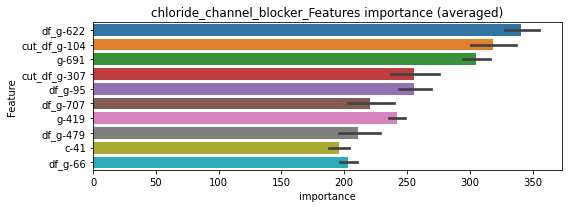

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217452	valid_1's binary_logloss: 0.0350041
[600]	training's binary_logloss: 0.00604177	valid_1's binary_logloss: 0.0159933
[900]	training's binary_logloss: 0.00310843	valid_1's binary_logloss: 0.0116887
[1200]	training's binary_logloss: 0.00204933	valid_1's binary_logloss: 0.00972708
[1500]	training's binary_logloss: 0.00153375	valid_1's binary_logloss: 0.0086344
[1800]	training's binary_logloss: 0.00123579	valid_1's binary_logloss: 0.0079503
[2100]	training's binary_logloss: 0.00104276	valid_1's binary_logloss: 0.00752164
[2400]	training's binary_logloss: 0.000910216	valid_1's binary_logloss: 0.00721389
[2700]	training's binary_logloss: 0.000812366	valid_1's binary_logloss: 0.00695586
[3000]	training's binary_logloss: 0.000738411	valid_1's binary_logloss: 0.00676289
[3300]	training's binary_logloss: 0.000683127	valid_1's binary_logloss: 0.00662787
[3600]	training's binary_logloss: 0.000640

len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216731	valid_1's binary_logloss: 0.0358216
[600]	training's binary_logloss: 0.00610914	valid_1's binary_logloss: 0.0163064
[900]	training's binary_logloss: 0.00312091	valid_1's binary_logloss: 0.0114913
[1200]	training's binary_logloss: 0.00206243	valid_1's binary_logloss: 0.009447
[1500]	training's binary_logloss: 0.00154081	valid_1's binary_logloss: 0.00834645
[1800]	training's binary_logloss: 0.00123691	valid_1's binary_logloss: 0.00762155
[2100]	training's binary_logloss: 0.00104024	valid_1's binary_logloss: 0.00712897
[2400]	training's binary_logloss: 0.000907669	valid_1's binary_logloss: 0.00680763
[2700]	training's binary_logloss: 0.000810187	valid_1's binary_logloss: 0.00653143
[3000]	training's binary_logloss: 0.000737049	valid_1's binary_logloss: 0.00629482
Early stopping, best iteration is:
[3060]	training's binary_logloss: 0.000724944	valid_1's binary_logloss: 0.0062635


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215586	valid_1's binary_logloss: 0.037414
[600]	training's binary_logloss: 0.00606692	valid_1's binary_logloss: 0.0174232
[900]	training's binary_logloss: 0.00312022	valid_1's binary_logloss: 0.0125607
[1200]	training's binary_logloss: 0.00205697	valid_1's binary_logloss: 0.0106799
[1500]	training's binary_logloss: 0.00153517	valid_1's binary_logloss: 0.00964664
[1800]	training's binary_logloss: 0.00123646	valid_1's binary_logloss: 0.00892737
[2100]	training's binary_logloss: 0.00104187	valid_1's binary_logloss: 0.0084349
[2400]	training's binary_logloss: 0.000907159	valid_1's binary_logloss: 0.00805545
[2700]	training's binary_logloss: 0.000809881	valid_1's binary_logloss: 0.00780813
[3000]	training's binary_logloss: 0.000738234	valid_1's binary_logloss: 0.00766039
Early stopping, best iteration is:
[3162]	training's binary_logloss: 0.000705509	valid_1's binary_logloss: 0.00753246


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216859	valid_1's binary_logloss: 0.0373424
[600]	training's binary_logloss: 0.00608748	valid_1's binary_logloss: 0.0180595
[900]	training's binary_logloss: 0.00310718	valid_1's binary_logloss: 0.0135295
[1200]	training's binary_logloss: 0.00204893	valid_1's binary_logloss: 0.0114575
[1500]	training's binary_logloss: 0.00153099	valid_1's binary_logloss: 0.0103867
[1800]	training's binary_logloss: 0.00122895	valid_1's binary_logloss: 0.00959019
[2100]	training's binary_logloss: 0.00103802	valid_1's binary_logloss: 0.00910282
[2400]	training's binary_logloss: 0.000903192	valid_1's binary_logloss: 0.00871612
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0008502	valid_1's binary_logloss: 0.00855379


chloride_channel_blocker logloss: 0.007210708075540666


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013257	valid_1's binary_logloss: 0.0354431
[600]	training's binary_logloss: 0.00182586	valid_1's binary_logloss: 0.016389
[900]	training's binary_logloss: 0.000773862	valid_1's binary_logloss: 0.0132806
Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.000584687	valid_1's binary_logloss: 0.0126502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129541	valid_1's binary_logloss: 0.0381076
[600]	training's binary_logloss: 0.00175434	valid_1's binary_logloss: 0.0215567
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.00105105	valid_1's binary_logloss: 0.0200688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144383	valid_1's binary_logloss: 0.0248666
[600]	training's binary_logloss: 0.00192695	valid_1's binary_logloss: 0.00644526
[900]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0047866, Threshold: 0.0124356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.00870, conf_1:0.01617
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0124356
Num_p_label: 12.0, Expected: 8.0, Adj_threshold_2: 0.0324356
threshold: 0.0324356, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125586	valid_1's binary_logloss: 0.0347446
[600]	training's binary_logloss: 0.00175553	valid_1's binary_logloss: 0.0165084
[900]	training's binary_logloss: 0.000749027	valid_1's binary_logloss: 0.0133455
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.00062149	valid_1's binary_logloss: 0.0128473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120023	valid_1's binary_logloss: 0.0365185
[600]	training's binary_logloss: 0.00165033	valid_1's binary_logloss: 0.0204288
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000774772	valid_1's binary_logloss: 0.0184827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131952	valid_1's binary_logloss: 0.0235338
[600]	training's binary_logloss: 0.00181941	valid_1's binary_logloss: 0.00616321
[900]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0211237, Threshold: 0.0324356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00202, Num_p_label: 25.0, conf_0:0.02595, conf_1:0.03892
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_1: 0.0324356
Num_p_label: 12.0, Expected: 8.0, Adj_threshold_2: 0.0524356
threshold: 0.0524356, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126467	valid_1's binary_logloss: 0.0363251
[600]	training's binary_logloss: 0.00170763	valid_1's binary_logloss: 0.0161167
[900]	training's binary_logloss: 0.000730151	valid_1's binary_logloss: 0.0128941
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.00059332	valid_1's binary_logloss: 0.0125042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123971	valid_1's binary_logloss: 0.0242328
[600]	training's binary_logloss: 0.00170705	valid_1's binary_logloss: 0.00772781
[900]	training's binary_logloss: 0.00074251	valid_1's binary_logloss: 0.00541215
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.000598242	valid_1's binary_logloss: 0.00503458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136292	valid_1's binary_logloss: 0.0205786
[600]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0283585, Threshold: 0.0524356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00202, Num_p_label: 12.0, conf_0:0.04719, conf_1:0.05768
threshold: 0.0524356, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


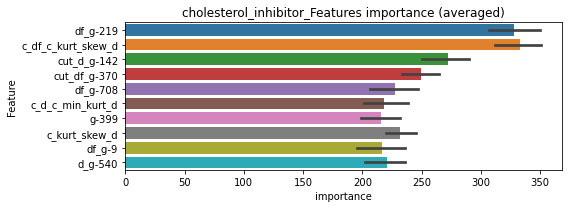

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262041	valid_1's binary_logloss: 0.0507815
[600]	training's binary_logloss: 0.00731109	valid_1's binary_logloss: 0.0252282
[900]	training's binary_logloss: 0.00367029	valid_1's binary_logloss: 0.0190154
[1200]	training's binary_logloss: 0.00238914	valid_1's binary_logloss: 0.0163939
[1500]	training's binary_logloss: 0.00177202	valid_1's binary_logloss: 0.0150393
[1800]	training's binary_logloss: 0.00141276	valid_1's binary_logloss: 0.0141853
[2100]	training's binary_logloss: 0.00118336	valid_1's binary_logloss: 0.0135843
Early stopping, best iteration is:
[2162]	training's binary_logloss: 0.00114505	valid_1's binary_logloss: 0.0134259


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262182	valid_1's binary_logloss: 0.0401882
[600]	training's binary_logloss: 0.00742918	valid_1's binary_logloss: 0.0175576
[900]	training's binary_logloss: 0.00377383	valid_1's binary_logloss: 0.0120782
[1200]	training's binary_logloss: 0.00246131	valid_1's binary_logloss: 0.00985055
[1500]	training's binary_logloss: 0.00182609	valid_1's binary_logloss: 0.00868778
[1800]	training's binary_logloss: 0.00145906	valid_1's binary_logloss: 0.00793903
[2100]	training's binary_logloss: 0.00122193	valid_1's binary_logloss: 0.00743634
[2400]	training's binary_logloss: 0.00105742	valid_1's binary_logloss: 0.00707201
[2700]	training's binary_logloss: 0.000937953	valid_1's binary_logloss: 0.00677224
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000862879	valid_1's binary_logloss: 0.00659834


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271005	valid_1's binary_logloss: 0.0357907
[600]	training's binary_logloss: 0.00764969	valid_1's binary_logloss: 0.012754
[900]	training's binary_logloss: 0.00385965	valid_1's binary_logloss: 0.00771219
[1200]	training's binary_logloss: 0.00250875	valid_1's binary_logloss: 0.00583688
[1500]	training's binary_logloss: 0.00185751	valid_1's binary_logloss: 0.0048152
[1800]	training's binary_logloss: 0.00147933	valid_1's binary_logloss: 0.00414614
[2100]	training's binary_logloss: 0.00123702	valid_1's binary_logloss: 0.00373832
[2400]	training's binary_logloss: 0.00107268	valid_1's binary_logloss: 0.00348633
[2700]	training's binary_logloss: 0.000950131	valid_1's binary_logloss: 0.00326477
[3000]	training's binary_logloss: 0.00085966	valid_1's binary_logloss: 0.00311602
[3300]	training's binary_logloss: 0.000789662	valid_1's binary_logloss: 0.00298434
[3600]	training's binary_logloss: 0.0007359

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254472	valid_1's binary_logloss: 0.0544692
[600]	training's binary_logloss: 0.00709245	valid_1's binary_logloss: 0.0298964
[900]	training's binary_logloss: 0.00362002	valid_1's binary_logloss: 0.0237859
[1200]	training's binary_logloss: 0.00236935	valid_1's binary_logloss: 0.0213999
[1500]	training's binary_logloss: 0.00176009	valid_1's binary_logloss: 0.0201462
[1800]	training's binary_logloss: 0.00140279	valid_1's binary_logloss: 0.0192946
Early stopping, best iteration is:
[1800]	training's binary_logloss: 0.00140279	valid_1's binary_logloss: 0.0192946


cholesterol_inhibitor logloss: 0.01050981861197002


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130042	valid_1's binary_logloss: 0.0502581
[600]	training's binary_logloss: 0.00186183	valid_1's binary_logloss: 0.0311153
[900]	training's binary_logloss: 0.000811377	valid_1's binary_logloss: 0.0269266
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000750687	valid_1's binary_logloss: 0.0267426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013099	valid_1's binary_logloss: 0.0383734
[600]	training's binary_logloss: 0.00194981	valid_1's binary_logloss: 0.0228143
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.00107156	valid_1's binary_logloss: 0.0206665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144418	valid_1's binary_logloss: 0.0229231
[600]	training's binary_logloss: 0.00207702	valid_1's binary_logloss: 0.006106
[900]	training's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0051384, Threshold: 0.0151966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.01064, conf_1:0.01976
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0151966
Num_p_label: 12.0, Expected: 9.0, Adj_threshold_2: 0.0351966
threshold: 0.0351966, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122846	valid_1's binary_logloss: 0.0505804
[600]	training's binary_logloss: 0.00176497	valid_1's binary_logloss: 0.0302528
[900]	training's binary_logloss: 0.000774771	valid_1's binary_logloss: 0.0270287
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00078169	valid_1's binary_logloss: 0.0270029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124789	valid_1's binary_logloss: 0.0363271
[600]	training's binary_logloss: 0.00183654	valid_1's binary_logloss: 0.0207677
[900]	training's binary_logloss: 0.000800115	valid_1's binary_logloss: 0.0183342
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.00070585	valid_1's binary_logloss: 0.0181386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135082	valid_1's binary_logloss: 0.021607
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0227957, Threshold: 0.0351966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0072828 Vs.target_rate: 0.00227, Num_p_label: 29.0, conf_0:0.02816, conf_1:0.04224
Num_p_label: 29.0, Expected: 9.0, Adj_threshold_1: 0.0351966
Num_p_label: 15.0, Expected: 9.0, Adj_threshold_2: 0.0551966
threshold: 0.0551966, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120308	valid_1's binary_logloss: 0.0423725
[600]	training's binary_logloss: 0.00177231	valid_1's binary_logloss: 0.0244007
[900]	training's binary_logloss: 0.000784483	valid_1's binary_logloss: 0.02107
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000733139	valid_1's binary_logloss: 0.0207612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131797	valid_1's binary_logloss: 0.0312768
[600]	training's binary_logloss: 0.00191933	valid_1's binary_logloss: 0.0149908
[900]	training's binary_logloss: 0.000828249	valid_1's binary_logloss: 0.0118192
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000633773	valid_1's binary_logloss: 0.011338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121626	valid_1's binary_logloss: 0.031756
[600]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0231144, Threshold: 0.0551966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0037670 Vs.target_rate: 0.00227, Num_p_label: 15.0, conf_0:0.04968, conf_1:0.06072
Num_p_label: 15.0, Expected: 9.0, Adj_threshold_1: 0.0551966
threshold: 0.0551966, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


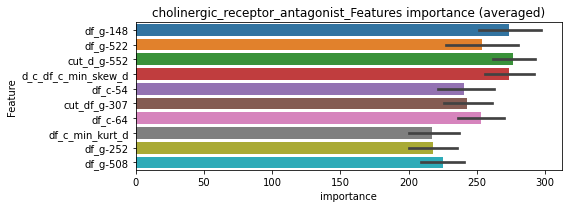

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263162	valid_1's binary_logloss: 0.0585955
[600]	training's binary_logloss: 0.00766832	valid_1's binary_logloss: 0.0337785
[900]	training's binary_logloss: 0.00395091	valid_1's binary_logloss: 0.0268353
[1200]	training's binary_logloss: 0.00259889	valid_1's binary_logloss: 0.0242405
[1500]	training's binary_logloss: 0.00192286	valid_1's binary_logloss: 0.0225401
[1800]	training's binary_logloss: 0.00153458	valid_1's binary_logloss: 0.0214113
[2100]	training's binary_logloss: 0.00128333	valid_1's binary_logloss: 0.0206288
[2400]	training's binary_logloss: 0.00110944	valid_1's binary_logloss: 0.0199022
Early stopping, best iteration is:
[2454]	training's binary_logloss: 0.00108282	valid_1's binary_logloss: 0.0197638


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273931	valid_1's binary_logloss: 0.0463668
[600]	training's binary_logloss: 0.00810527	valid_1's binary_logloss: 0.0228164
[900]	training's binary_logloss: 0.00413155	valid_1's binary_logloss: 0.0169375
[1200]	training's binary_logloss: 0.00270037	valid_1's binary_logloss: 0.0146937
[1500]	training's binary_logloss: 0.00199654	valid_1's binary_logloss: 0.0133776
[1800]	training's binary_logloss: 0.00158628	valid_1's binary_logloss: 0.0124586
[2100]	training's binary_logloss: 0.00132704	valid_1's binary_logloss: 0.0119216
[2400]	training's binary_logloss: 0.00114646	valid_1's binary_logloss: 0.0115029
Early stopping, best iteration is:
[2577]	training's binary_logloss: 0.00106385	valid_1's binary_logloss: 0.0112645


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0269089	valid_1's binary_logloss: 0.0481483
[600]	training's binary_logloss: 0.00789163	valid_1's binary_logloss: 0.0242134
[900]	training's binary_logloss: 0.00404285	valid_1's binary_logloss: 0.0181661
[1200]	training's binary_logloss: 0.00263592	valid_1's binary_logloss: 0.0157958
[1500]	training's binary_logloss: 0.0019542	valid_1's binary_logloss: 0.0145543
[1800]	training's binary_logloss: 0.0015572	valid_1's binary_logloss: 0.013788
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.00155802	valid_1's binary_logloss: 0.0137857


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271449	valid_1's binary_logloss: 0.0469901
[600]	training's binary_logloss: 0.00792602	valid_1's binary_logloss: 0.0223118
[900]	training's binary_logloss: 0.00407417	valid_1's binary_logloss: 0.0161895
[1200]	training's binary_logloss: 0.0026557	valid_1's binary_logloss: 0.0138907
[1500]	training's binary_logloss: 0.00195959	valid_1's binary_logloss: 0.0125478
[1800]	training's binary_logloss: 0.00156049	valid_1's binary_logloss: 0.0116331
[2100]	training's binary_logloss: 0.00130286	valid_1's binary_logloss: 0.0110734
[2400]	training's binary_logloss: 0.00112662	valid_1's binary_logloss: 0.0105948
Early stopping, best iteration is:
[2544]	training's binary_logloss: 0.00106013	valid_1's binary_logloss: 0.0104087


cholinergic_receptor_antagonist logloss: 0.013806564383234259


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065245	valid_1's binary_logloss: 0.0114177
[600]	training's binary_logloss: 0.000869475	valid_1's binary_logloss: 0.00243857
[900]	training's binary_logloss: 0.000449563	valid_1's binary_logloss: 0.00158617
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000423587	valid_1's binary_logloss: 0.00152613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660793	valid_1's binary_logloss: 0.0114505
[600]	training's binary_logloss: 0.000861035	valid_1's binary_logloss: 0.00257483
[900]	training's binary_logloss: 0.000443517	valid_1's binary_logloss: 0.00167147
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000416889	valid_1's binary_logloss: 0.00161979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638959	valid_1's binary_logloss: 0.0106178
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0028953, Threshold: 0.0195187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01366, conf_1:0.02537
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0195187
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_2: 0.0395187
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_3: 0.0595187
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_4: 0.0795187
threshold: 0.0795187, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600729	valid_1's binary_logloss: 0.0103429
[600]	training's binary_logloss: 0.000799757	valid_1's binary_logloss: 0.00225402
[900]	training's binary_logloss: 0.000418915	valid_1's binary_logloss: 0.00149458
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000395407	valid_1's binary_logloss: 0.00145552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599679	valid_1's binary_logloss: 0.00965675
[600]	training's binary_logloss: 0.000798785	valid_1's binary_logloss: 0.00195549
[900]	training's binary_logloss: 0.000417726	valid_1's binary_logloss: 0.0012409
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000389978	valid_1's binary_logloss: 0.00118877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598923	valid_1's binary_logloss: 0.0101094
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.0487828, Threshold: 0.0795187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0050226 Vs.target_rate: 0.00101, Num_p_label: 20.0, conf_0:0.06361, conf_1:0.09542
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_1: 0.0795187
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_2: 0.0995187
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_3: 0.1195187
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1395187
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1595187
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.1795187
threshold: 0.1795187, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600729	valid_1's binary_logloss: 0.0103429
[600]	training's binary_logloss: 0.000799757	valid_1's binary_logloss: 0.00225402
[900]	training's binary_logloss: 0.000418915	valid_1's binary_logloss: 0.00149458
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000395407	valid_1's binary_logloss: 0.00145552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599679	valid_1's binary_logloss: 0.00965675
[600]	training's binary_logloss: 0.000798785	valid_1's binary_logloss: 0.00195549
[900]	training's binary_logloss: 0.000417726	valid_1's binary_logloss: 0.0012409
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000389978	valid_1's binary_logloss: 0.00118877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598923	valid_1's binary_logloss: 0.0101094
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.0487828, Threshold: 0.1795187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.16157, conf_1:0.19747
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.1795187
threshold: 0.1795187, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


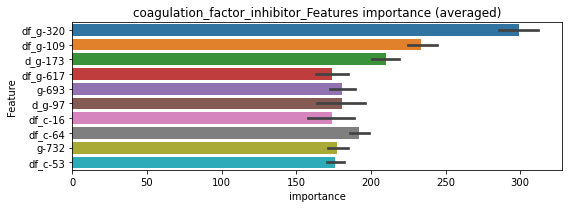

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148627	valid_1's binary_logloss: 0.0213436
[600]	training's binary_logloss: 0.00401252	valid_1's binary_logloss: 0.00727124
[900]	training's binary_logloss: 0.00211777	valid_1's binary_logloss: 0.00447268
[1200]	training's binary_logloss: 0.00142691	valid_1's binary_logloss: 0.00335338
[1500]	training's binary_logloss: 0.00108703	valid_1's binary_logloss: 0.00276447
[1800]	training's binary_logloss: 0.000889127	valid_1's binary_logloss: 0.00238546
[2100]	training's binary_logloss: 0.000759737	valid_1's binary_logloss: 0.00215809
[2400]	training's binary_logloss: 0.000669667	valid_1's binary_logloss: 0.00198187
[2700]	training's binary_logloss: 0.000603576	valid_1's binary_logloss: 0.00185232
[3000]	training's binary_logloss: 0.000555181	valid_1's binary_logloss: 0.00175348
[3300]	training's binary_logloss: 0.000516312	valid_1's binary_logloss: 0.00167649
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149156	valid_1's binary_logloss: 0.0205429
[600]	training's binary_logloss: 0.00399877	valid_1's binary_logloss: 0.00692848
[900]	training's binary_logloss: 0.00210455	valid_1's binary_logloss: 0.00414224
[1200]	training's binary_logloss: 0.00141939	valid_1's binary_logloss: 0.00306676
[1500]	training's binary_logloss: 0.00107999	valid_1's binary_logloss: 0.00249625
[1800]	training's binary_logloss: 0.000884006	valid_1's binary_logloss: 0.00215105
[2100]	training's binary_logloss: 0.000756595	valid_1's binary_logloss: 0.00191826
[2400]	training's binary_logloss: 0.000667484	valid_1's binary_logloss: 0.00175013
[2700]	training's binary_logloss: 0.000602715	valid_1's binary_logloss: 0.00162364
[3000]	training's binary_logloss: 0.000553246	valid_1's binary_logloss: 0.00152776
[3300]	training's binary_logloss: 0.000515122	valid_1's binary_logloss: 0.00145304
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149276	valid_1's binary_logloss: 0.021373
[600]	training's binary_logloss: 0.004027	valid_1's binary_logloss: 0.00711206
[900]	training's binary_logloss: 0.00211112	valid_1's binary_logloss: 0.00427846
[1200]	training's binary_logloss: 0.00142326	valid_1's binary_logloss: 0.00318115
[1500]	training's binary_logloss: 0.00107966	valid_1's binary_logloss: 0.00257408
[1800]	training's binary_logloss: 0.00088212	valid_1's binary_logloss: 0.00222654
[2100]	training's binary_logloss: 0.000754132	valid_1's binary_logloss: 0.00198256
[2400]	training's binary_logloss: 0.000664237	valid_1's binary_logloss: 0.00179822
[2700]	training's binary_logloss: 0.000598528	valid_1's binary_logloss: 0.00166479
[3000]	training's binary_logloss: 0.000549338	valid_1's binary_logloss: 0.00157273
[3300]	training's binary_logloss: 0.000510996	valid_1's binary_logloss: 0.00150076
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148981	valid_1's binary_logloss: 0.0238452
[600]	training's binary_logloss: 0.00399516	valid_1's binary_logloss: 0.00981324
[900]	training's binary_logloss: 0.00210509	valid_1's binary_logloss: 0.00720104
[1200]	training's binary_logloss: 0.00142441	valid_1's binary_logloss: 0.00603326
[1500]	training's binary_logloss: 0.00108482	valid_1's binary_logloss: 0.00544688
[1800]	training's binary_logloss: 0.000885739	valid_1's binary_logloss: 0.0050359
Early stopping, best iteration is:
[2025]	training's binary_logloss: 0.000782966	valid_1's binary_logloss: 0.00481867


coagulation_factor_inhibitor logloss: 0.002199123780483743


neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129587	valid_1's binary_logloss: 0.0283186
[600]	training's binary_logloss: 0.00157268	valid_1's binary_logloss: 0.00739926
[900]	training's binary_logloss: 0.000678861	valid_1's binary_logloss: 0.00468529
Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.000528398	valid_1's binary_logloss: 0.00420712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123786	valid_1's binary_logloss: 0.0298064
[600]	training's binary_logloss: 0.00151637	valid_1's binary_logloss: 0.0103774
[900]	training's binary_logloss: 0.00066709	valid_1's binary_logloss: 0.0076804
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000534225	valid_1's binary_logloss: 0.00714883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132996	valid_1's binary_logloss: 0.0232886
[600]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0047869, Threshold: 0.0178780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01251, conf_1:0.02324
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0178780
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0378780
threshold: 0.0378780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114102	valid_1's binary_logloss: 0.0252442
[600]	training's binary_logloss: 0.001413	valid_1's binary_logloss: 0.00644262
[900]	training's binary_logloss: 0.000630766	valid_1's binary_logloss: 0.0041187
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000500767	valid_1's binary_logloss: 0.00374267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110781	valid_1's binary_logloss: 0.0273969
[600]	training's binary_logloss: 0.00140039	valid_1's binary_logloss: 0.0107746
[900]	training's binary_logloss: 0.000628481	valid_1's binary_logloss: 0.00818534
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000509228	valid_1's binary_logloss: 0.00775552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114545	valid_1's binary_logloss: 0.0199148
[600]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0316066, Threshold: 0.0378780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0097941 Vs.target_rate: 0.00151, Num_p_label: 39.0, conf_0:0.03030, conf_1:0.04545
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.0378780
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.0578780
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_3: 0.0778780
threshold: 0.0778780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114102	valid_1's binary_logloss: 0.0252442
[600]	training's binary_logloss: 0.001413	valid_1's binary_logloss: 0.00644262
[900]	training's binary_logloss: 0.000630766	valid_1's binary_logloss: 0.0041187
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000500767	valid_1's binary_logloss: 0.00374267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110781	valid_1's binary_logloss: 0.0273969
[600]	training's binary_logloss: 0.00140039	valid_1's binary_logloss: 0.0107746
[900]	training's binary_logloss: 0.000628481	valid_1's binary_logloss: 0.00818534
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000509228	valid_1's binary_logloss: 0.00775552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114545	valid_1's binary_logloss: 0.0199148
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0316066, Threshold: 0.0778780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151, Num_p_label: 12.0, conf_0:0.07009, conf_1:0.08567
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0778780
threshold: 0.0778780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


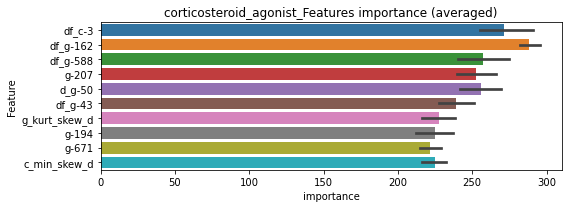

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235332	valid_1's binary_logloss: 0.0424049
[600]	training's binary_logloss: 0.00640282	valid_1's binary_logloss: 0.0161873
[900]	training's binary_logloss: 0.003223	valid_1's binary_logloss: 0.0101071
[1200]	training's binary_logloss: 0.00212545	valid_1's binary_logloss: 0.00785161
[1500]	training's binary_logloss: 0.00157946	valid_1's binary_logloss: 0.00646889
[1800]	training's binary_logloss: 0.00126798	valid_1's binary_logloss: 0.00574143
[2100]	training's binary_logloss: 0.00106991	valid_1's binary_logloss: 0.00524425
[2400]	training's binary_logloss: 0.000930921	valid_1's binary_logloss: 0.00484297
[2700]	training's binary_logloss: 0.000829544	valid_1's binary_logloss: 0.00454315
[3000]	training's binary_logloss: 0.000753644	valid_1's binary_logloss: 0.00433804
[3300]	training's binary_logloss: 0.000693878	valid_1's binary_logloss: 0.00414874
[3600]	training's binary_logloss: 0.000647

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234508	valid_1's binary_logloss: 0.0414812
[600]	training's binary_logloss: 0.00635744	valid_1's binary_logloss: 0.0177934
[900]	training's binary_logloss: 0.00322412	valid_1's binary_logloss: 0.0122233
[1200]	training's binary_logloss: 0.00211562	valid_1's binary_logloss: 0.00992619
[1500]	training's binary_logloss: 0.00157899	valid_1's binary_logloss: 0.00867784
[1800]	training's binary_logloss: 0.0012683	valid_1's binary_logloss: 0.00785412
[2100]	training's binary_logloss: 0.00107038	valid_1's binary_logloss: 0.00735823
[2400]	training's binary_logloss: 0.000932726	valid_1's binary_logloss: 0.00695411
[2700]	training's binary_logloss: 0.000832105	valid_1's binary_logloss: 0.00665489
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.000769487	valid_1's binary_logloss: 0.00643852


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238731	valid_1's binary_logloss: 0.0341218
[600]	training's binary_logloss: 0.0064994	valid_1's binary_logloss: 0.0123181
[900]	training's binary_logloss: 0.00330071	valid_1's binary_logloss: 0.00752173
[1200]	training's binary_logloss: 0.00216981	valid_1's binary_logloss: 0.00564698
[1500]	training's binary_logloss: 0.00161804	valid_1's binary_logloss: 0.004673
[1800]	training's binary_logloss: 0.00129605	valid_1's binary_logloss: 0.00405478
[2100]	training's binary_logloss: 0.00109192	valid_1's binary_logloss: 0.00364716
[2400]	training's binary_logloss: 0.000952633	valid_1's binary_logloss: 0.00336299
[2700]	training's binary_logloss: 0.000847743	valid_1's binary_logloss: 0.00314316
[3000]	training's binary_logloss: 0.000770511	valid_1's binary_logloss: 0.00299035
[3300]	training's binary_logloss: 0.000709584	valid_1's binary_logloss: 0.00286709
[3600]	training's binary_logloss: 0.000661

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234192	valid_1's binary_logloss: 0.0440256
[600]	training's binary_logloss: 0.00629998	valid_1's binary_logloss: 0.0196749
[900]	training's binary_logloss: 0.00321426	valid_1's binary_logloss: 0.0139283
[1200]	training's binary_logloss: 0.00210689	valid_1's binary_logloss: 0.0116305
[1500]	training's binary_logloss: 0.00157194	valid_1's binary_logloss: 0.0103257
[1800]	training's binary_logloss: 0.00126446	valid_1's binary_logloss: 0.0094653
[2100]	training's binary_logloss: 0.0010633	valid_1's binary_logloss: 0.00882568
[2400]	training's binary_logloss: 0.000926594	valid_1's binary_logloss: 0.00829204
[2700]	training's binary_logloss: 0.0008254	valid_1's binary_logloss: 0.00790918
Early stopping, best iteration is:
[2933]	training's binary_logloss: 0.000764427	valid_1's binary_logloss: 0.00768498


corticosteroid_agonist logloss: 0.005158420010284344


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235, target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.116006	valid_1's binary_logloss: 0.358298
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.0796254	valid_1's binary_logloss: 0.353506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.115139	valid_1's binary_logloss: 0.379524
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.124204	valid_1's binary_logloss: 0.378212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.111302	valid_1's binary_logloss: 0.379769
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.102658	valid_1's binary_logloss: 0.377792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.114294	valid_1's binary_logloss: 0.368641
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0896412	valid_1's binary_logloss: 0.36581

1 / 3 AUC score:0.762
y_Threshold: 0.1479358, Threshold: 0.5041340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 750 → Positive_corect_labels: 337/3132
p_label_rate: 0.0100452 Vs.target_rate: 0.01827, Num_p_label: 40.0, conf_0:0.35289, conf_1:0.65537
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.5041340
Num_p_label: 46.0, Expected: 72.7, Adj_threshold_2: 0.4841340
Num_p_label: 51.0, Expected: 72.7, Adj_threshold_3: 0.4641340
threshold: 0.4641340, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 337.0/3132, y_label_rate: 0.1075990
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034903	valid_1's binary_logloss: 0.212585
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.0193643	valid_1's binary_logloss: 0.208994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0339314	valid_1's binary_logloss: 0.180549
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.0105043	valid_1's binary_logloss: 0.169795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0357898	valid_1's binary_logloss: 0.156054
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00895924	valid_1's binary_logloss: 0.139526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0371623	valid_1's binary_logloss: 0.182302


2 / 3 AUC score:0.949
y_Threshold: 0.0767856, Threshold: 0.4641340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 264.0/2986
p_label_rate: 0.0271220 Vs.target_rate: 0.01827, Num_p_label: 108.0, conf_0:0.37131, conf_1:0.55696
threshold: 0.4641340, positive_p_label: 108.0/3982, p_label_rate: 0.0271220


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.0224414	valid_1's binary_logloss: 0.177927


positive_y_label: 264.0/2986, y_label_rate: 0.0884126
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219466	valid_1's binary_logloss: 0.121786
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.0122935	valid_1's binary_logloss: 0.113518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218185	valid_1's binary_logloss: 0.155466
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.0127012	valid_1's binary_logloss: 0.152016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021307	valid_1's binary_logloss: 0.126059
[600]	training's binary_logloss: 0.0040997	valid_1's binary_logloss: 0.111655
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00394195	valid_1's binary_logloss: 0.11131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212933	valid_1's binary_logloss: 0.134116


3 / 3 AUC score:0.979
y_Threshold: 0.0682189, Threshold: 0.4641340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 225.0/2908
p_label_rate: 0.0328980 Vs.target_rate: 0.01827, Num_p_label: 131.0, conf_0:0.41772, conf_1:0.51055
Num_p_label: 131.0, Expected: 72.7, Adj_threshold_1: 0.4641340
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_2: 0.4841340
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_3: 0.5041340
Num_p_label: 125.0, Expected: 72.7, Adj_threshold_4: 0.5241340
Num_p_label: 123.0, Expected: 72.7, Adj_threshold_5: 0.5441340
Num_p_label: 121.0, Expected: 72.7, Adj_threshold_6: 0.5641340
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_7: 0.5841340
Num_p_label: 114.0, Expected: 72.7, Adj_threshold_8: 0.6041340
Num_p_label: 110.0, Expected: 72.7, Adj_threshold_9: 0.6241340
Num_p_label: 109.0, Expected: 72.7, Adj_threshold_10: 0.6441340


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.0126516	valid_1's binary_logloss: 0.127766


threshold: 0.6441340, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 225.0/2908, y_label_rate: 0.0773728


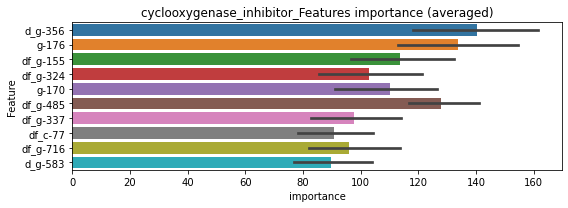

len(train_index) : 2181
len(valid_index) : 727
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034973	valid_1's binary_logloss: 0.114688
[600]	training's binary_logloss: 0.0121433	valid_1's binary_logloss: 0.0949349
[900]	training's binary_logloss: 0.00643049	valid_1's binary_logloss: 0.0905884
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00658119	valid_1's binary_logloss: 0.0903992


len(train_index) : 2181
len(valid_index) : 727
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0341674	valid_1's binary_logloss: 0.108225
[600]	training's binary_logloss: 0.0120001	valid_1's binary_logloss: 0.0873113
[900]	training's binary_logloss: 0.00634313	valid_1's binary_logloss: 0.0822382
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.00665026	valid_1's binary_logloss: 0.0817809


len(train_index) : 2181
len(valid_index) : 727
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0344942	valid_1's binary_logloss: 0.126941
[600]	training's binary_logloss: 0.0120466	valid_1's binary_logloss: 0.113249
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.0127172	valid_1's binary_logloss: 0.112992


len(train_index) : 2181
len(valid_index) : 727
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0345688	valid_1's binary_logloss: 0.118446
[600]	training's binary_logloss: 0.0122381	valid_1's binary_logloss: 0.104506
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0100419	valid_1's binary_logloss: 0.103625


cyclooxygenase_inhibitor logloss: 0.09719922385078121


neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273, target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0294982	valid_1's binary_logloss: 0.100173
[600]	training's binary_logloss: 0.00509441	valid_1's binary_logloss: 0.0763758
[900]	training's binary_logloss: 0.00178653	valid_1's binary_logloss: 0.0714339
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.0017902	valid_1's binary_logloss: 0.0714162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292506	valid_1's binary_logloss: 0.102919
[600]	training's binary_logloss: 0.00499257	valid_1's binary_logloss: 0.0799683
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.00255908	valid_1's binary_logloss: 0.0776837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0317634	valid_1's binary_logloss: 0.0756783
[600]	training's binary_logloss: 0.00544124	valid_1's binary_logloss: 0.0423908
[900]	training's binary_logloss: 

1 / 3 AUC score:0.996
y_Threshold: 0.0115599, Threshold: 0.0412738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00437, Num_p_label: 40.0, conf_0:0.02889, conf_1:0.05366
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0412738
Num_p_label: 24.0, Expected: 17.4, Adj_threshold_2: 0.0612738
threshold: 0.0612738, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 642.0/3771, y_label_rate: 0.1702466
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252073	valid_1's binary_logloss: 0.0914272
[600]	training's binary_logloss: 0.00419932	valid_1's binary_logloss: 0.0702684
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.00230872	valid_1's binary_logloss: 0.0680465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0267484	valid_1's binary_logloss: 0.0792597
[600]	training's binary_logloss: 0.00436428	valid_1's binary_logloss: 0.0546369
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00193397	valid_1's binary_logloss: 0.0509269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257746	valid_1's binary_logloss: 0.0755216
[600]	training's binary_logloss: 0.00437075	valid_1's binary_logloss: 0.0542251
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00270168	valid_1's binary_logloss: 0.052

2 / 3 AUC score:0.998
y_Threshold: 0.0326134, Threshold: 0.0612738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 628.0/3743
p_label_rate: 0.0168257 Vs.target_rate: 0.00437, Num_p_label: 67.0, conf_0:0.04902, conf_1:0.07353
Num_p_label: 67.0, Expected: 17.4, Adj_threshold_1: 0.0612738
Num_p_label: 53.0, Expected: 17.4, Adj_threshold_2: 0.0812738
Num_p_label: 43.0, Expected: 17.4, Adj_threshold_3: 0.1012738
Num_p_label: 39.0, Expected: 17.4, Adj_threshold_4: 0.1212738
Num_p_label: 33.0, Expected: 17.4, Adj_threshold_5: 0.1412738
Num_p_label: 30.0, Expected: 17.4, Adj_threshold_6: 0.1612738
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_7: 0.1812738
Num_p_label: 26.0, Expected: 17.4, Adj_threshold_8: 0.2012738
threshold: 0.2012738, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 628.0/3743, y_label_rate: 0.1677799
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229416	valid_1's binary_logloss: 0.0790731
[600]	training's binary_logloss: 0.00377306	valid_1's binary_logloss: 0.0608346
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00262835	valid_1's binary_logloss: 0.0586193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241934	valid_1's binary_logloss: 0.070203
[600]	training's binary_logloss: 0.0040004	valid_1's binary_logloss: 0.0421026
[900]	training's binary_logloss: 0.00148284	valid_1's binary_logloss: 0.0361346
Early stopping, best iteration is:
[1163]	training's binary_logloss: 0.000954479	valid_1's binary_logloss: 0.0343295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236967	valid_1's binary_logloss: 0.0638535
[600]	training's binary_logloss: 0.003975	valid_1's binary_logloss: 0.0363487
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0436626, Threshold: 0.2012738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 620.0/3727
p_label_rate: 0.0077850 Vs.target_rate: 0.00437, Num_p_label: 31.0, conf_0:0.18115, conf_1:0.22140
Num_p_label: 31.0, Expected: 17.4, Adj_threshold_1: 0.2012738
Num_p_label: 30.0, Expected: 17.4, Adj_threshold_2: 0.2212738
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_3: 0.2412738
Num_p_label: 26.0, Expected: 17.4, Adj_threshold_4: 0.2612738
threshold: 0.2612738, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 620.0/3727, y_label_rate: 0.1663536


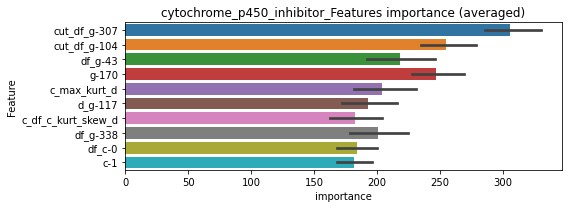

len(train_index) : 2795
len(valid_index) : 932
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0400474	valid_1's binary_logloss: 0.0839531
[600]	training's binary_logloss: 0.0127444	valid_1's binary_logloss: 0.0561065
[900]	training's binary_logloss: 0.00653914	valid_1's binary_logloss: 0.0487472
[1200]	training's binary_logloss: 0.00419818	valid_1's binary_logloss: 0.0459185
[1500]	training's binary_logloss: 0.0030471	valid_1's binary_logloss: 0.0445013
Early stopping, best iteration is:
[1604]	training's binary_logloss: 0.00278428	valid_1's binary_logloss: 0.0440784


len(train_index) : 2795
len(valid_index) : 932
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0410525	valid_1's binary_logloss: 0.082652
[600]	training's binary_logloss: 0.0133667	valid_1's binary_logloss: 0.0524038
[900]	training's binary_logloss: 0.00681275	valid_1's binary_logloss: 0.0439722
[1200]	training's binary_logloss: 0.00436112	valid_1's binary_logloss: 0.0401711
[1500]	training's binary_logloss: 0.00316487	valid_1's binary_logloss: 0.0387368
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.00279754	valid_1's binary_logloss: 0.0381779


len(train_index) : 2795
len(valid_index) : 932
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0401262	valid_1's binary_logloss: 0.0931172
[600]	training's binary_logloss: 0.0127205	valid_1's binary_logloss: 0.0629001
[900]	training's binary_logloss: 0.00653741	valid_1's binary_logloss: 0.055545
[1200]	training's binary_logloss: 0.0042094	valid_1's binary_logloss: 0.0524288
[1500]	training's binary_logloss: 0.00306619	valid_1's binary_logloss: 0.0512074
Early stopping, best iteration is:
[1524]	training's binary_logloss: 0.00300059	valid_1's binary_logloss: 0.0511536


len(train_index) : 2796
len(valid_index) : 931
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0411914	valid_1's binary_logloss: 0.0822243
[600]	training's binary_logloss: 0.0131895	valid_1's binary_logloss: 0.0519792
[900]	training's binary_logloss: 0.00669315	valid_1's binary_logloss: 0.0433868
[1200]	training's binary_logloss: 0.00429116	valid_1's binary_logloss: 0.0402119
[1500]	training's binary_logloss: 0.00311258	valid_1's binary_logloss: 0.0383876
[1800]	training's binary_logloss: 0.00244136	valid_1's binary_logloss: 0.0372803
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.00244312	valid_1's binary_logloss: 0.0372728


cytochrome_p450_inhibitor logloss: 0.042672126449065116


neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100571	valid_1's binary_logloss: 0.0219722
[600]	training's binary_logloss: 0.00127256	valid_1's binary_logloss: 0.00657287
[900]	training's binary_logloss: 0.000588835	valid_1's binary_logloss: 0.00485323
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000513999	valid_1's binary_logloss: 0.00466237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100609	valid_1's binary_logloss: 0.0166608
[600]	training's binary_logloss: 0.00128566	valid_1's binary_logloss: 0.00349964
[900]	training's binary_logloss: 0.000595721	valid_1's binary_logloss: 0.00203831
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000517102	valid_1's binary_logloss: 0.00185312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101292	valid_1's binary_logloss: 0.0167289
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0040556, Threshold: 0.0128329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00898, conf_1:0.01668
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0128329
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0328329
threshold: 0.0328329, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00911878	valid_1's binary_logloss: 0.0198281
[600]	training's binary_logloss: 0.00116936	valid_1's binary_logloss: 0.00592355
[900]	training's binary_logloss: 0.000554205	valid_1's binary_logloss: 0.00438639
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000496117	valid_1's binary_logloss: 0.00422529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.009407	valid_1's binary_logloss: 0.0155616
[600]	training's binary_logloss: 0.00123127	valid_1's binary_logloss: 0.00305882
[900]	training's binary_logloss: 0.000569057	valid_1's binary_logloss: 0.00170597
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000506966	valid_1's binary_logloss: 0.00156584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00948781	valid_1's binary_logloss: 0.0151559
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0835710, Threshold: 0.0328329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0085384 Vs.target_rate: 0.00151, Num_p_label: 34.0, conf_0:0.02627, conf_1:0.03940
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.0328329
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.0528329
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.0728329
threshold: 0.0728329, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00911878	valid_1's binary_logloss: 0.0198281
[600]	training's binary_logloss: 0.00116936	valid_1's binary_logloss: 0.00592355
[900]	training's binary_logloss: 0.000554205	valid_1's binary_logloss: 0.00438639
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000496117	valid_1's binary_logloss: 0.00422529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.009407	valid_1's binary_logloss: 0.0155616
[600]	training's binary_logloss: 0.00123127	valid_1's binary_logloss: 0.00305882
[900]	training's binary_logloss: 0.000569057	valid_1's binary_logloss: 0.00170597
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000506966	valid_1's binary_logloss: 0.00156584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00948781	valid_1's binary_logloss: 0.0151559
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0835710, Threshold: 0.0728329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00151, Num_p_label: 10.0, conf_0:0.06555, conf_1:0.08012
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0728329
threshold: 0.0728329, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


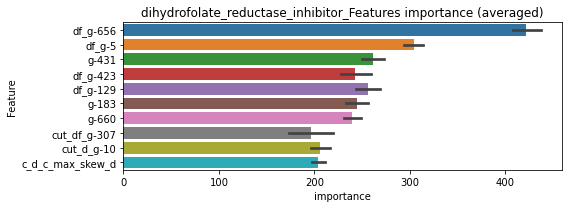

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208368	valid_1's binary_logloss: 0.0342865
[600]	training's binary_logloss: 0.00555986	valid_1's binary_logloss: 0.0136675
[900]	training's binary_logloss: 0.00282622	valid_1's binary_logloss: 0.00936851
[1200]	training's binary_logloss: 0.00186762	valid_1's binary_logloss: 0.00763454
[1500]	training's binary_logloss: 0.0013988	valid_1's binary_logloss: 0.00679422
[1800]	training's binary_logloss: 0.00112909	valid_1's binary_logloss: 0.00621897
[2100]	training's binary_logloss: 0.000957099	valid_1's binary_logloss: 0.00584663
[2400]	training's binary_logloss: 0.000835763	valid_1's binary_logloss: 0.00558056
[2700]	training's binary_logloss: 0.000747836	valid_1's binary_logloss: 0.0053831
[3000]	training's binary_logloss: 0.000681604	valid_1's binary_logloss: 0.0052545
Early stopping, best iteration is:
[3060]	training's binary_logloss: 0.000670056	valid_1's binary_logloss: 0.00522143


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209405	valid_1's binary_logloss: 0.0303677
[600]	training's binary_logloss: 0.00564286	valid_1's binary_logloss: 0.0101154
[900]	training's binary_logloss: 0.00288284	valid_1's binary_logloss: 0.00584362
[1200]	training's binary_logloss: 0.00190722	valid_1's binary_logloss: 0.00418709
[1500]	training's binary_logloss: 0.00142898	valid_1's binary_logloss: 0.00334199
[1800]	training's binary_logloss: 0.00115249	valid_1's binary_logloss: 0.00281859
[2100]	training's binary_logloss: 0.000975694	valid_1's binary_logloss: 0.00246667
[2400]	training's binary_logloss: 0.000853427	valid_1's binary_logloss: 0.00222372
[2700]	training's binary_logloss: 0.000764713	valid_1's binary_logloss: 0.00204543
[3000]	training's binary_logloss: 0.000695474	valid_1's binary_logloss: 0.00190293
[3300]	training's binary_logloss: 0.000641327	valid_1's binary_logloss: 0.00178641
[3600]	training's binary_logloss: 0.00

len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209734	valid_1's binary_logloss: 0.0282807
[600]	training's binary_logloss: 0.00572132	valid_1's binary_logloss: 0.00892119
[900]	training's binary_logloss: 0.00292108	valid_1's binary_logloss: 0.00496263
[1200]	training's binary_logloss: 0.00193054	valid_1's binary_logloss: 0.00344112
[1500]	training's binary_logloss: 0.00144747	valid_1's binary_logloss: 0.00268914
[1800]	training's binary_logloss: 0.00116889	valid_1's binary_logloss: 0.00223616
[2100]	training's binary_logloss: 0.000987281	valid_1's binary_logloss: 0.00193231
[2400]	training's binary_logloss: 0.000862891	valid_1's binary_logloss: 0.00172485
[2700]	training's binary_logloss: 0.000771867	valid_1's binary_logloss: 0.00156858
[3000]	training's binary_logloss: 0.000702883	valid_1's binary_logloss: 0.00144797
[3300]	training's binary_logloss: 0.000648924	valid_1's binary_logloss: 0.00135373
[3600]	training's binary_logloss: 0.0

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203866	valid_1's binary_logloss: 0.0374132
[600]	training's binary_logloss: 0.00551516	valid_1's binary_logloss: 0.0155616
[900]	training's binary_logloss: 0.00282575	valid_1's binary_logloss: 0.0107078
[1200]	training's binary_logloss: 0.00187261	valid_1's binary_logloss: 0.00891601
[1500]	training's binary_logloss: 0.00140498	valid_1's binary_logloss: 0.0078531
[1800]	training's binary_logloss: 0.0011319	valid_1's binary_logloss: 0.00713042
Early stopping, best iteration is:
[1795]	training's binary_logloss: 0.00113514	valid_1's binary_logloss: 0.00713013


dihydrofolate_reductase_inhibitor logloss: 0.0037421633642989887


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711852	valid_1's binary_logloss: 0.0130844
[600]	training's binary_logloss: 0.000879105	valid_1's binary_logloss: 0.00296191
[900]	training's binary_logloss: 0.000443285	valid_1's binary_logloss: 0.00198794
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000427031	valid_1's binary_logloss: 0.00195298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00654458	valid_1's binary_logloss: 0.0193725
[600]	training's binary_logloss: 0.000840543	valid_1's binary_logloss: 0.00756973
[900]	training's binary_logloss: 0.000427331	valid_1's binary_logloss: 0.0061228
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000425863	valid_1's binary_logloss: 0.00611201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698828	valid_1's binary_logloss: 0.0104509
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0028066, Threshold: 0.0098765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00691, conf_1:0.01284
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0098765
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0298765
threshold: 0.0298765, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644424	valid_1's binary_logloss: 0.010643
[600]	training's binary_logloss: 0.000821746	valid_1's binary_logloss: 0.00200788
[900]	training's binary_logloss: 0.000422271	valid_1's binary_logloss: 0.00122826
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00041297	valid_1's binary_logloss: 0.0012052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595167	valid_1's binary_logloss: 0.0157742
[600]	training's binary_logloss: 0.000772873	valid_1's binary_logloss: 0.00542276
[900]	training's binary_logloss: 0.000408233	valid_1's binary_logloss: 0.00447723
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000412257	valid_1's binary_logloss: 0.00447054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620637	valid_1's binary_logloss: 0.00913694
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.1158416, Threshold: 0.0298765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00105, Num_p_label: 30.0, conf_0:0.02390, conf_1:0.03585
Num_p_label: 30.0, Expected: 4.2, Adj_threshold_1: 0.0298765
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_2: 0.0498765
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.0698765
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_4: 0.0898765
threshold: 0.0898765, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644424	valid_1's binary_logloss: 0.010643
[600]	training's binary_logloss: 0.000821746	valid_1's binary_logloss: 0.00200788
[900]	training's binary_logloss: 0.000422271	valid_1's binary_logloss: 0.00122826
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00041297	valid_1's binary_logloss: 0.0012052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595167	valid_1's binary_logloss: 0.0157742
[600]	training's binary_logloss: 0.000772873	valid_1's binary_logloss: 0.00542276
[900]	training's binary_logloss: 0.000408233	valid_1's binary_logloss: 0.00447723
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000412257	valid_1's binary_logloss: 0.00447054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620637	valid_1's binary_logloss: 0.00913694
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.1158416, Threshold: 0.0898765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.08089, conf_1:0.09886
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0898765
threshold: 0.0898765, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


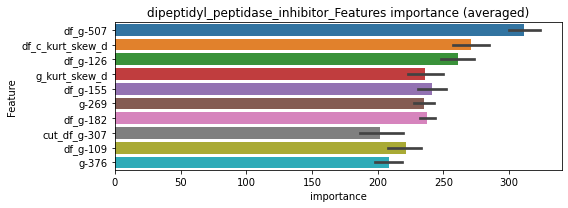

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015312	valid_1's binary_logloss: 0.0218322
[600]	training's binary_logloss: 0.0040258	valid_1's binary_logloss: 0.00713807
[900]	training's binary_logloss: 0.00209407	valid_1's binary_logloss: 0.00422026
[1200]	training's binary_logloss: 0.00140394	valid_1's binary_logloss: 0.00306146
[1500]	training's binary_logloss: 0.00106808	valid_1's binary_logloss: 0.00248414
[1800]	training's binary_logloss: 0.000871853	valid_1's binary_logloss: 0.00212316
[2100]	training's binary_logloss: 0.000744832	valid_1's binary_logloss: 0.00190138
[2400]	training's binary_logloss: 0.000656296	valid_1's binary_logloss: 0.00173143
[2700]	training's binary_logloss: 0.000590923	valid_1's binary_logloss: 0.00160272
[3000]	training's binary_logloss: 0.000541081	valid_1's binary_logloss: 0.00150344
[3300]	training's binary_logloss: 0.000502785	valid_1's binary_logloss: 0.00142549
[3600]	training's binary_logloss: 0.00

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147034	valid_1's binary_logloss: 0.0282763
[600]	training's binary_logloss: 0.00387123	valid_1's binary_logloss: 0.0121591
[900]	training's binary_logloss: 0.00201594	valid_1's binary_logloss: 0.00863955
[1200]	training's binary_logloss: 0.00136002	valid_1's binary_logloss: 0.00705885
[1500]	training's binary_logloss: 0.00103682	valid_1's binary_logloss: 0.00628126
[1800]	training's binary_logloss: 0.000848222	valid_1's binary_logloss: 0.0057671
[2100]	training's binary_logloss: 0.000724081	valid_1's binary_logloss: 0.00540668
[2400]	training's binary_logloss: 0.000638872	valid_1's binary_logloss: 0.00513971
[2700]	training's binary_logloss: 0.000573957	valid_1's binary_logloss: 0.00490931
[3000]	training's binary_logloss: 0.0005265	valid_1's binary_logloss: 0.00476182
Early stopping, best iteration is:
[3221]	training's binary_logloss: 0.000498391	valid_1's binary_logloss: 0.00466721


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152517	valid_1's binary_logloss: 0.0198448
[600]	training's binary_logloss: 0.00402977	valid_1's binary_logloss: 0.00627672
[900]	training's binary_logloss: 0.00209307	valid_1's binary_logloss: 0.00360617
[1200]	training's binary_logloss: 0.00141045	valid_1's binary_logloss: 0.00260533
[1500]	training's binary_logloss: 0.00107334	valid_1's binary_logloss: 0.00209275
[1800]	training's binary_logloss: 0.000876372	valid_1's binary_logloss: 0.00178167
[2100]	training's binary_logloss: 0.000748949	valid_1's binary_logloss: 0.00155931
[2400]	training's binary_logloss: 0.000658157	valid_1's binary_logloss: 0.00140155
[2700]	training's binary_logloss: 0.000592013	valid_1's binary_logloss: 0.00128209
[3000]	training's binary_logloss: 0.000541515	valid_1's binary_logloss: 0.00119528
[3300]	training's binary_logloss: 0.000504002	valid_1's binary_logloss: 0.00112402
[3600]	training's binary_logloss: 0.

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153959	valid_1's binary_logloss: 0.0203284
[600]	training's binary_logloss: 0.00401434	valid_1's binary_logloss: 0.00670302
[900]	training's binary_logloss: 0.00208188	valid_1's binary_logloss: 0.00405051
[1200]	training's binary_logloss: 0.00139709	valid_1's binary_logloss: 0.00301929
[1500]	training's binary_logloss: 0.00106236	valid_1's binary_logloss: 0.00247577
[1800]	training's binary_logloss: 0.000866784	valid_1's binary_logloss: 0.0021652
[2100]	training's binary_logloss: 0.000739941	valid_1's binary_logloss: 0.00195028
[2400]	training's binary_logloss: 0.000651062	valid_1's binary_logloss: 0.00178077
[2700]	training's binary_logloss: 0.000586546	valid_1's binary_logloss: 0.00166562
[3000]	training's binary_logloss: 0.000537317	valid_1's binary_logloss: 0.00158013
[3300]	training's binary_logloss: 0.000500191	valid_1's binary_logloss: 0.00151573
[3600]	training's binary_logloss: 0.0

dipeptidyl_peptidase_inhibitor logloss: 0.0020789231302242254


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162354	valid_1's binary_logloss: 0.00399278
[600]	training's binary_logloss: 0.000254802	valid_1's binary_logloss: 0.00151299
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000211051	valid_1's binary_logloss: 0.00139193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158181	valid_1's binary_logloss: 0.00697993
[600]	training's binary_logloss: 0.000256007	valid_1's binary_logloss: 0.00490623
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00021535	valid_1's binary_logloss: 0.00481265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162817	valid_1's binary_logloss: 0.00174683
[600]	training's binary_logloss: 0.000259299	valid_1's binary_logloss: 0.000292563
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000214516	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0006028, Threshold: 0.0022087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00155, conf_1:0.00287
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0022087
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0222087
threshold: 0.0222087, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156646	valid_1's binary_logloss: 0.00569433
[600]	training's binary_logloss: 0.000243433	valid_1's binary_logloss: 0.00348077
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000206937	valid_1's binary_logloss: 0.00338133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151001	valid_1's binary_logloss: 0.00692829
[600]	training's binary_logloss: 0.000242433	valid_1's binary_logloss: 0.00506452
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000206705	valid_1's binary_logloss: 0.00496372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158678	valid_1's binary_logloss: 0.00155992
[600]	training's binary_logloss: 0.00024557	valid_1's binary_logloss: 0.000248431
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000204654	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0055820, Threshold: 0.0222087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00025, Num_p_label: 6.0, conf_0:0.01777, conf_1:0.02665
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0222087
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0422087
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0622087
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.0822087
threshold: 0.0822087, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156646	valid_1's binary_logloss: 0.00569433
[600]	training's binary_logloss: 0.000243433	valid_1's binary_logloss: 0.00348077
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000206937	valid_1's binary_logloss: 0.00338133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151001	valid_1's binary_logloss: 0.00692829
[600]	training's binary_logloss: 0.000242433	valid_1's binary_logloss: 0.00506452
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000206705	valid_1's binary_logloss: 0.00496372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158678	valid_1's binary_logloss: 0.00155992
[600]	training's binary_logloss: 0.00024557	valid_1's binary_logloss: 0.000248431
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000204654	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0055820, Threshold: 0.0822087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.07399, conf_1:0.09043
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0822087
threshold: 0.0822087, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000206487	valid_1's binary_logloss: 0.00117042


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


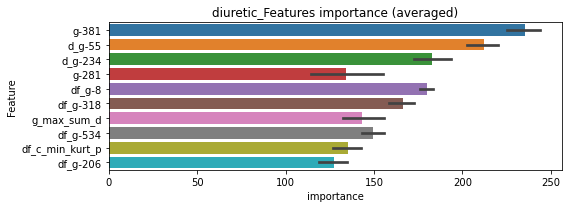

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0051144	valid_1's binary_logloss: 0.00812868
[600]	training's binary_logloss: 0.00139789	valid_1's binary_logloss: 0.00366698
[900]	training's binary_logloss: 0.000784836	valid_1's binary_logloss: 0.00272071
[1200]	training's binary_logloss: 0.000559083	valid_1's binary_logloss: 0.00234549
[1500]	training's binary_logloss: 0.000443333	valid_1's binary_logloss: 0.00213085
[1800]	training's binary_logloss: 0.000374217	valid_1's binary_logloss: 0.00199587
[2100]	training's binary_logloss: 0.000327959	valid_1's binary_logloss: 0.00189967
[2400]	training's binary_logloss: 0.00029523	valid_1's binary_logloss: 0.00183035
[2700]	training's binary_logloss: 0.000270939	valid_1's binary_logloss: 0.00178332
[3000]	training's binary_logloss: 0.000253283	valid_1's binary_logloss: 0.00175209
[3300]	training's binary_logloss: 0.000239489	valid_1's binary_logloss: 0.00173252
Early stopping, best iteration is

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510403	valid_1's binary_logloss: 0.00955032
[600]	training's binary_logloss: 0.00137242	valid_1's binary_logloss: 0.00510727
[900]	training's binary_logloss: 0.000770974	valid_1's binary_logloss: 0.00422204
[1200]	training's binary_logloss: 0.000549301	valid_1's binary_logloss: 0.00383354
[1500]	training's binary_logloss: 0.000436631	valid_1's binary_logloss: 0.00361301
[1800]	training's binary_logloss: 0.000370064	valid_1's binary_logloss: 0.00347178
[2100]	training's binary_logloss: 0.000325934	valid_1's binary_logloss: 0.00338471
[2400]	training's binary_logloss: 0.000294604	valid_1's binary_logloss: 0.00332549
[2700]	training's binary_logloss: 0.000269997	valid_1's binary_logloss: 0.00326486
[3000]	training's binary_logloss: 0.000251649	valid_1's binary_logloss: 0.00321622
[3300]	training's binary_logloss: 0.000238005	valid_1's binary_logloss: 0.00317994
[3600]	training's binary_loglos

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515	valid_1's binary_logloss: 0.00523965
[600]	training's binary_logloss: 0.00139305	valid_1's binary_logloss: 0.00144417
[900]	training's binary_logloss: 0.000782286	valid_1's binary_logloss: 0.00082354
[1200]	training's binary_logloss: 0.000555705	valid_1's binary_logloss: 0.000592673
[1500]	training's binary_logloss: 0.000440095	valid_1's binary_logloss: 0.000473612
[1800]	training's binary_logloss: 0.000371172	valid_1's binary_logloss: 0.000402419
[2100]	training's binary_logloss: 0.000325906	valid_1's binary_logloss: 0.000355365
[2400]	training's binary_logloss: 0.000294127	valid_1's binary_logloss: 0.000322316
[2700]	training's binary_logloss: 0.000269361	valid_1's binary_logloss: 0.000296475
[3000]	training's binary_logloss: 0.000251783	valid_1's binary_logloss: 0.000277979
[3300]	training's binary_logloss: 0.000238089	valid_1's binary_logloss: 0.000263528
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0050757	valid_1's binary_logloss: 0.00614813
[600]	training's binary_logloss: 0.00137471	valid_1's binary_logloss: 0.00191399
[900]	training's binary_logloss: 0.000773292	valid_1's binary_logloss: 0.00114941
[1200]	training's binary_logloss: 0.000550541	valid_1's binary_logloss: 0.00085369
[1500]	training's binary_logloss: 0.000437838	valid_1's binary_logloss: 0.000698185
[1800]	training's binary_logloss: 0.000370471	valid_1's binary_logloss: 0.000604645
[2100]	training's binary_logloss: 0.000325991	valid_1's binary_logloss: 0.000540879
[2400]	training's binary_logloss: 0.000294213	valid_1's binary_logloss: 0.000496267
[2700]	training's binary_logloss: 0.000270393	valid_1's binary_logloss: 0.000460435
[3000]	training's binary_logloss: 0.0002527	valid_1's binary_logloss: 0.000434066
[3300]	training's binary_logloss: 0.000238871	valid_1's binary_logloss: 0.000413052
[3600]	training's binary_lo

diuretic logloss: 0.0013638423586821548


neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115253	valid_1's binary_logloss: 0.0367605
[600]	training's binary_logloss: 0.00163477	valid_1's binary_logloss: 0.0204419
[900]	training's binary_logloss: 0.000725618	valid_1's binary_logloss: 0.0185
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000686858	valid_1's binary_logloss: 0.0184037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116282	valid_1's binary_logloss: 0.0331863
[600]	training's binary_logloss: 0.00169993	valid_1's binary_logloss: 0.0154726
[900]	training's binary_logloss: 0.000747685	valid_1's binary_logloss: 0.0124161
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000690142	valid_1's binary_logloss: 0.0121841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129457	valid_1's binary_logloss: 0.0188441
[600]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0045531, Threshold: 0.1017379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.07122, conf_1:0.13226
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1017379
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.1217379
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.1417379
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_4: 0.1617379
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_5: 0.1817379
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_6: 0.2017379
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_7: 0.2217379
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_8: 0.2417379
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_9: 0.2617379
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_10: 0.2817379
threshold: 0.3017379, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104581	valid_1's binary_logloss: 0.0378321
[600]	training's binary_logloss: 0.00147607	valid_1's binary_logloss: 0.0206342
[900]	training's binary_logloss: 0.000672457	valid_1's binary_logloss: 0.0177453
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000596824	valid_1's binary_logloss: 0.0173488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109229	valid_1's binary_logloss: 0.0250031
[600]	training's binary_logloss: 0.00156133	valid_1's binary_logloss: 0.0110856
[900]	training's binary_logloss: 0.000701208	valid_1's binary_logloss: 0.00914499
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00068102	valid_1's binary_logloss: 0.00906614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110754	valid_1's binary_logloss: 0.0279199
[600]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0459259, Threshold: 0.3017379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0148167 Vs.target_rate: 0.00202, Num_p_label: 59.0, conf_0:0.24139, conf_1:0.36209
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_1: 0.3017379
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_2: 0.3217379
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_3: 0.3417379
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_4: 0.3617379
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_5: 0.3817379
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_6: 0.4017379
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_7: 0.4217379
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4417379
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_9: 0.4617379
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4817379
threshold: 0.5017379, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105577	valid_1's binary_logloss: 0.0319398
[600]	training's binary_logloss: 0.00147825	valid_1's binary_logloss: 0.0144655
[900]	training's binary_logloss: 0.000669974	valid_1's binary_logloss: 0.0118388
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000591016	valid_1's binary_logloss: 0.0115578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107724	valid_1's binary_logloss: 0.0253584
[600]	training's binary_logloss: 0.00154537	valid_1's binary_logloss: 0.0103224
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00081172	valid_1's binary_logloss: 0.00843352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108388	valid_1's binary_logloss: 0.0234828
[600]	training's binary_logloss: 0.00154345	valid_1's binary_logloss: 0.00734241
[900]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0474401, Threshold: 0.5017379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0118031 Vs.target_rate: 0.00202, Num_p_label: 47.0, conf_0:0.45156, conf_1:0.55191
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_1: 0.5017379
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_2: 0.5217379
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_3: 0.5417379
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_4: 0.5617379
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_5: 0.5817379
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_6: 0.6017379
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_7: 0.6217379
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_8: 0.6417379
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.6617379
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_10: 0.6817379
threshold: 0.7017379, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


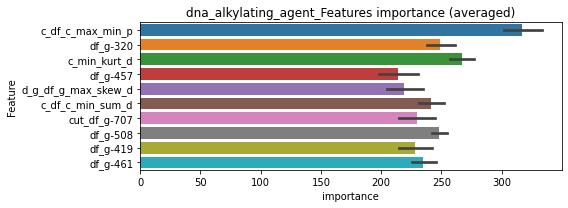

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239098	valid_1's binary_logloss: 0.0457515
[600]	training's binary_logloss: 0.00670824	valid_1's binary_logloss: 0.0220271
[900]	training's binary_logloss: 0.00343177	valid_1's binary_logloss: 0.0164643
[1200]	training's binary_logloss: 0.00224626	valid_1's binary_logloss: 0.0140819
[1500]	training's binary_logloss: 0.00166509	valid_1's binary_logloss: 0.0127855
[1800]	training's binary_logloss: 0.0013288	valid_1's binary_logloss: 0.011936
[2100]	training's binary_logloss: 0.00111682	valid_1's binary_logloss: 0.0113849
[2400]	training's binary_logloss: 0.000969231	valid_1's binary_logloss: 0.0109474
[2700]	training's binary_logloss: 0.000861487	valid_1's binary_logloss: 0.0106714
Early stopping, best iteration is:
[2906]	training's binary_logloss: 0.000804145	valid_1's binary_logloss: 0.0104311


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240607	valid_1's binary_logloss: 0.0447712
[600]	training's binary_logloss: 0.00682357	valid_1's binary_logloss: 0.0229609
[900]	training's binary_logloss: 0.00346809	valid_1's binary_logloss: 0.0174756
[1200]	training's binary_logloss: 0.00226327	valid_1's binary_logloss: 0.0150084
[1500]	training's binary_logloss: 0.00168221	valid_1's binary_logloss: 0.0136781
[1800]	training's binary_logloss: 0.00134445	valid_1's binary_logloss: 0.0128674
Early stopping, best iteration is:
[1989]	training's binary_logloss: 0.00119859	valid_1's binary_logloss: 0.0123917


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241467	valid_1's binary_logloss: 0.0424563
[600]	training's binary_logloss: 0.00681775	valid_1's binary_logloss: 0.0208481
[900]	training's binary_logloss: 0.00345246	valid_1's binary_logloss: 0.0153628
[1200]	training's binary_logloss: 0.00226173	valid_1's binary_logloss: 0.0130537
[1500]	training's binary_logloss: 0.00168194	valid_1's binary_logloss: 0.0119375
[1800]	training's binary_logloss: 0.00134346	valid_1's binary_logloss: 0.0111737
[2100]	training's binary_logloss: 0.00112761	valid_1's binary_logloss: 0.010741
Early stopping, best iteration is:
[2309]	training's binary_logloss: 0.0010175	valid_1's binary_logloss: 0.0104122


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246796	valid_1's binary_logloss: 0.0361892
[600]	training's binary_logloss: 0.00699233	valid_1's binary_logloss: 0.0130143
[900]	training's binary_logloss: 0.00356001	valid_1's binary_logloss: 0.00789838
[1200]	training's binary_logloss: 0.00232214	valid_1's binary_logloss: 0.00588264
[1500]	training's binary_logloss: 0.00172163	valid_1's binary_logloss: 0.00476222
[1800]	training's binary_logloss: 0.00137769	valid_1's binary_logloss: 0.00409898
[2100]	training's binary_logloss: 0.00115491	valid_1's binary_logloss: 0.00363708
[2400]	training's binary_logloss: 0.00100141	valid_1's binary_logloss: 0.00331341
[2700]	training's binary_logloss: 0.000891093	valid_1's binary_logloss: 0.00308277
[3000]	training's binary_logloss: 0.000808111	valid_1's binary_logloss: 0.00289613
[3300]	training's binary_logloss: 0.000744202	valid_1's binary_logloss: 0.00274582
[3600]	training's binary_logloss: 0.0006

dna_alkylating_agent logloss: 0.008920770207291547


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248, target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0965347	valid_1's binary_logloss: 0.359032
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0883858	valid_1's binary_logloss: 0.357603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0993483	valid_1's binary_logloss: 0.33598
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0750638	valid_1's binary_logloss: 0.331925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.101018	valid_1's binary_logloss: 0.3268
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.0511574	valid_1's binary_logloss: 0.319489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.106265	valid_1's binary_logloss: 0.32299


1 / 3 AUC score:0.820
y_Threshold: 0.1316750, Threshold: 0.4785361, pos_neg_ratio: 0.8000000
Remove_noisy_data: 607 → Positive_corect_labels: 411/3290
p_label_rate: 0.0100452 Vs.target_rate: 0.01688, Num_p_label: 40.0, conf_0:0.33498, conf_1:0.62210
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4785361
Num_p_label: 45.0, Expected: 67.2, Adj_threshold_2: 0.4585361


Early stopping, best iteration is:
[388]	training's binary_logloss: 0.0763996	valid_1's binary_logloss: 0.317558


threshold: 0.4585361, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 411.0/3290, y_label_rate: 0.1249240
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0346598	valid_1's binary_logloss: 0.216518
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.0162517	valid_1's binary_logloss: 0.209697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0388892	valid_1's binary_logloss: 0.182314
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.0271383	valid_1's binary_logloss: 0.175864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03748	valid_1's binary_logloss: 0.165751
[600]	training's binary_logloss: 0.00781275	valid_1's binary_logloss: 0.148712
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00546745	valid_1's binary_logloss: 0.147281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0394275	valid_1's binary_logloss: 0.190961
Early stopping, best iterat

2 / 3 AUC score:0.961
y_Threshold: 0.0823111, Threshold: 0.4585361, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 331.0/3130
p_label_rate: 0.0256153 Vs.target_rate: 0.01688, Num_p_label: 102.0, conf_0:0.36683, conf_1:0.55024
Num_p_label: 102.0, Expected: 67.2, Adj_threshold_1: 0.4585361
Num_p_label: 100.0, Expected: 67.2, Adj_threshold_2: 0.4785361
threshold: 0.4785361, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 331.0/3130, y_label_rate: 0.1057508
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234004	valid_1's binary_logloss: 0.142491
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00918707	valid_1's binary_logloss: 0.134616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227269	valid_1's binary_logloss: 0.146122
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00513488	valid_1's binary_logloss: 0.12872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228541	valid_1's binary_logloss: 0.145865
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00788998	valid_1's binary_logloss: 0.137388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226782	valid_1's binary_logloss: 0.154129
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00672951	valid_1's binary_logloss

3 / 3 AUC score:0.980
y_Threshold: 0.0635292, Threshold: 0.4785361, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 278.0/3024
p_label_rate: 0.0306379 Vs.target_rate: 0.01688, Num_p_label: 122.0, conf_0:0.43068, conf_1:0.52639
Num_p_label: 122.0, Expected: 67.2, Adj_threshold_1: 0.4785361
Num_p_label: 117.0, Expected: 67.2, Adj_threshold_2: 0.4985361
Num_p_label: 115.0, Expected: 67.2, Adj_threshold_3: 0.5185361
Num_p_label: 111.0, Expected: 67.2, Adj_threshold_4: 0.5385361
Num_p_label: 110.0, Expected: 67.2, Adj_threshold_5: 0.5585361
Num_p_label: 110.0, Expected: 67.2, Adj_threshold_6: 0.5785361
Num_p_label: 107.0, Expected: 67.2, Adj_threshold_7: 0.5985361
Num_p_label: 105.0, Expected: 67.2, Adj_threshold_8: 0.6185361
Num_p_label: 103.0, Expected: 67.2, Adj_threshold_9: 0.6385361
Num_p_label: 102.0, Expected: 67.2, Adj_threshold_10: 0.6585361
threshold: 0.6785361, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 278.0/3024, y_label_ra

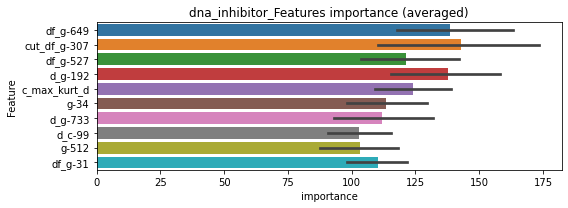

len(train_index) : 2268
len(valid_index) : 756
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372904	valid_1's binary_logloss: 0.120318
[600]	training's binary_logloss: 0.0131683	valid_1's binary_logloss: 0.0967838
[900]	training's binary_logloss: 0.00697554	valid_1's binary_logloss: 0.0895136
[1200]	training's binary_logloss: 0.00454246	valid_1's binary_logloss: 0.0867877
Early stopping, best iteration is:
[1440]	training's binary_logloss: 0.00351337	valid_1's binary_logloss: 0.0847602


len(train_index) : 2268
len(valid_index) : 756
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362706	valid_1's binary_logloss: 0.126685
[600]	training's binary_logloss: 0.0128487	valid_1's binary_logloss: 0.103569
[900]	training's binary_logloss: 0.00684979	valid_1's binary_logloss: 0.0967086
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.00642523	valid_1's binary_logloss: 0.0964756


len(train_index) : 2268
len(valid_index) : 756
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0344355	valid_1's binary_logloss: 0.137767
[600]	training's binary_logloss: 0.0119778	valid_1's binary_logloss: 0.131224
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.0125808	valid_1's binary_logloss: 0.13092


len(train_index) : 2268
len(valid_index) : 756
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0347317	valid_1's binary_logloss: 0.130808
[600]	training's binary_logloss: 0.0123503	valid_1's binary_logloss: 0.111634
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.00843581	valid_1's binary_logloss: 0.108471


dna_inhibitor logloss: 0.10515674171521305


neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272, target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0320555	valid_1's binary_logloss: 0.146433
[600]	training's binary_logloss: 0.00537237	valid_1's binary_logloss: 0.124478
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.0031712	valid_1's binary_logloss: 0.122993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035274	valid_1's binary_logloss: 0.095423
[600]	training's binary_logloss: 0.00624827	valid_1's binary_logloss: 0.0621315
[900]	training's binary_logloss: 0.00214145	valid_1's binary_logloss: 0.0556448
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00214145	valid_1's binary_logloss: 0.0556448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343016	valid_1's binary_logloss: 0.0971799
[600]	training's binary_logloss: 0.00589284	valid_1's binary_logloss: 0.0587255
[900]	training's binary_logloss: 0.0

1 / 3 AUC score:0.994
y_Threshold: 0.0199781, Threshold: 0.0872885, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 638/3762
p_label_rate: 0.0100452 Vs.target_rate: 0.00508, Num_p_label: 40.0, conf_0:0.06110, conf_1:0.11348
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0872885
Num_p_label: 31.0, Expected: 20.2, Adj_threshold_2: 0.1072885
Num_p_label: 24.0, Expected: 20.2, Adj_threshold_3: 0.1272885
threshold: 0.1272885, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272578	valid_1's binary_logloss: 0.105717
[600]	training's binary_logloss: 0.0045145	valid_1's binary_logloss: 0.0733812
[900]	training's binary_logloss: 0.00169235	valid_1's binary_logloss: 0.0674148
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.00113102	valid_1's binary_logloss: 0.0655893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301286	valid_1's binary_logloss: 0.0993365
[600]	training's binary_logloss: 0.00500729	valid_1's binary_logloss: 0.0658881
[900]	training's binary_logloss: 0.00182167	valid_1's binary_logloss: 0.060066
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.00148494	valid_1's binary_logloss: 0.0590687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301856	valid_1's binary_logloss: 0.0875408
[600]	training's binary_logloss:

2 / 3 AUC score:0.997
y_Threshold: 0.0412415, Threshold: 0.1272885, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0118031 Vs.target_rate: 0.00508, Num_p_label: 47.0, conf_0:0.10183, conf_1:0.15275
Num_p_label: 47.0, Expected: 20.2, Adj_threshold_1: 0.1272885
Num_p_label: 42.0, Expected: 20.2, Adj_threshold_2: 0.1472885
Num_p_label: 35.0, Expected: 20.2, Adj_threshold_3: 0.1672885
Num_p_label: 35.0, Expected: 20.2, Adj_threshold_4: 0.1872885
Num_p_label: 32.0, Expected: 20.2, Adj_threshold_5: 0.2072885
Num_p_label: 29.0, Expected: 20.2, Adj_threshold_6: 0.2272885
threshold: 0.2272885, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 620.0/3726, y_label_rate: 0.1663983
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275348	valid_1's binary_logloss: 0.0845031
[600]	training's binary_logloss: 0.00438061	valid_1's binary_logloss: 0.0494996
[900]	training's binary_logloss: 0.0016445	valid_1's binary_logloss: 0.0427917
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.00130035	valid_1's binary_logloss: 0.0418284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260936	valid_1's binary_logloss: 0.0971146
[600]	training's binary_logloss: 0.00434538	valid_1's binary_logloss: 0.0741134
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00198113	valid_1's binary_logloss: 0.071752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274383	valid_1's binary_logloss: 0.0842224
[600]	training's binary_logloss: 0.0043458	valid_1's binary_logloss: 0.0546191
[900]	training's binary_logloss:

3 / 3 AUC score:0.998
y_Threshold: 0.0443457, Threshold: 0.2272885, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 605.0/3696
p_label_rate: 0.0075339 Vs.target_rate: 0.00508, Num_p_label: 30.0, conf_0:0.20456, conf_1:0.25002
threshold: 0.2272885, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 605.0/3696, y_label_rate: 0.1636905


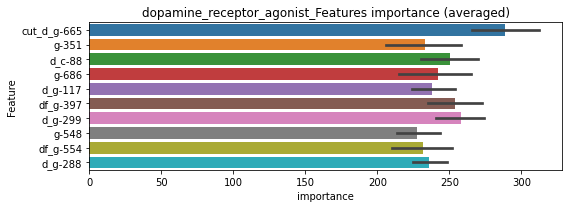

len(train_index) : 2772
len(valid_index) : 924
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441193	valid_1's binary_logloss: 0.121366
[600]	training's binary_logloss: 0.013937	valid_1's binary_logloss: 0.0850443
[900]	training's binary_logloss: 0.00701243	valid_1's binary_logloss: 0.0759877
[1200]	training's binary_logloss: 0.00444953	valid_1's binary_logloss: 0.0723687
Early stopping, best iteration is:
[1332]	training's binary_logloss: 0.00380566	valid_1's binary_logloss: 0.0712336


len(train_index) : 2772
len(valid_index) : 924
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441939	valid_1's binary_logloss: 0.111204
[600]	training's binary_logloss: 0.0137546	valid_1's binary_logloss: 0.0755398
[900]	training's binary_logloss: 0.00688041	valid_1's binary_logloss: 0.0661104
[1200]	training's binary_logloss: 0.00436515	valid_1's binary_logloss: 0.0624392
Early stopping, best iteration is:
[1282]	training's binary_logloss: 0.00395044	valid_1's binary_logloss: 0.0613364


len(train_index) : 2772
len(valid_index) : 924
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0462306	valid_1's binary_logloss: 0.0924162
[600]	training's binary_logloss: 0.0145439	valid_1's binary_logloss: 0.0548469
[900]	training's binary_logloss: 0.00732129	valid_1's binary_logloss: 0.044791
[1200]	training's binary_logloss: 0.00465312	valid_1's binary_logloss: 0.0403488
[1500]	training's binary_logloss: 0.00336687	valid_1's binary_logloss: 0.0379102
[1800]	training's binary_logloss: 0.00262292	valid_1's binary_logloss: 0.0363856
Early stopping, best iteration is:
[1856]	training's binary_logloss: 0.00252008	valid_1's binary_logloss: 0.0362473


len(train_index) : 2772
len(valid_index) : 924
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0450941	valid_1's binary_logloss: 0.0891755
[600]	training's binary_logloss: 0.0143314	valid_1's binary_logloss: 0.0540461
[900]	training's binary_logloss: 0.00723946	valid_1's binary_logloss: 0.0433596
[1200]	training's binary_logloss: 0.00460016	valid_1's binary_logloss: 0.0386862
Early stopping, best iteration is:
[1434]	training's binary_logloss: 0.00354401	valid_1's binary_logloss: 0.0365496


dopamine_receptor_agonist logloss: 0.05134175510381799


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231, target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.109245	valid_1's binary_logloss: 0.377491
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.0910036	valid_1's binary_logloss: 0.374943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.115848	valid_1's binary_logloss: 0.36758
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.0812769	valid_1's binary_logloss: 0.365595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.11763	valid_1's binary_logloss: 0.349949
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.0739581	valid_1's binary_logloss: 0.344947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.10373	valid_1's binary_logloss: 0.383521
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.0781267	valid_1's binary_logloss: 0.379815

1 / 3 AUC score:0.754
y_Threshold: 0.1301086, Threshold: 0.5343813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 712 → Positive_corect_labels: 355/3165
p_label_rate: 0.0100452 Vs.target_rate: 0.01780, Num_p_label: 40.0, conf_0:0.37407, conf_1:0.69470
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5343813
Num_p_label: 43.0, Expected: 70.9, Adj_threshold_2: 0.5143813
Num_p_label: 49.0, Expected: 70.9, Adj_threshold_3: 0.4943813
threshold: 0.4943813, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 355.0/3165, y_label_rate: 0.1121643
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0403092	valid_1's binary_logloss: 0.172663
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.0150211	valid_1's binary_logloss: 0.158716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0389804	valid_1's binary_logloss: 0.178656
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.0124672	valid_1's binary_logloss: 0.168628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0388371	valid_1's binary_logloss: 0.188064
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0199171	valid_1's binary_logloss: 0.179725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0400472	valid_1's binary_logloss: 0.203094


2 / 3 AUC score:0.951
y_Threshold: 0.0785352, Threshold: 0.4943813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 274.0/3003


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.0139457	valid_1's binary_logloss: 0.196271


p_label_rate: 0.0399297 Vs.target_rate: 0.01780, Num_p_label: 159.0, conf_0:0.39551, conf_1:0.59326
Num_p_label: 159.0, Expected: 70.9, Adj_threshold_1: 0.4943813
Num_p_label: 155.0, Expected: 70.9, Adj_threshold_2: 0.5143813
Num_p_label: 151.0, Expected: 70.9, Adj_threshold_3: 0.5343813
Num_p_label: 144.0, Expected: 70.9, Adj_threshold_4: 0.5543813
Num_p_label: 142.0, Expected: 70.9, Adj_threshold_5: 0.5743813
Num_p_label: 139.0, Expected: 70.9, Adj_threshold_6: 0.5943813
Num_p_label: 135.0, Expected: 70.9, Adj_threshold_7: 0.6143813
Num_p_label: 131.0, Expected: 70.9, Adj_threshold_8: 0.6343813
Num_p_label: 130.0, Expected: 70.9, Adj_threshold_9: 0.6543813
Num_p_label: 122.0, Expected: 70.9, Adj_threshold_10: 0.6743813
threshold: 0.6943813, positive_p_label: 115.0/3982, p_label_rate: 0.0288800
positive_y_label: 274.0/3003, y_label_rate: 0.0912421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221603	valid_1's binary_logloss: 0.122328
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00770559	valid_1's binary_logloss: 0.110883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228231	valid_1's binary_logloss: 0.107892
[600]	training's binary_logloss: 0.00416859	valid_1's binary_logloss: 0.0858119
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00250003	valid_1's binary_logloss: 0.0829012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208726	valid_1's binary_logloss: 0.128153
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00868907	valid_1's binary_logloss: 0.121543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225767	valid_1's binary_logloss: 0.10566
[600]	training's binar

3 / 3 AUC score:0.990
y_Threshold: 0.0537687, Threshold: 0.6943813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 245.0/2945
p_label_rate: 0.0441989 Vs.target_rate: 0.01780, Num_p_label: 176.0, conf_0:0.50000, conf_1:0.76382
Num_p_label: 176.0, Expected: 70.9, Adj_threshold_1: 0.6943813
Num_p_label: 176.0, Expected: 70.9, Adj_threshold_2: 0.7143813
Num_p_label: 175.0, Expected: 70.9, Adj_threshold_3: 0.7343813
Num_p_label: 173.0, Expected: 70.9, Adj_threshold_4: 0.7543813
Num_p_label: 170.0, Expected: 70.9, Adj_threshold_5: 0.7743813
Num_p_label: 169.0, Expected: 70.9, Adj_threshold_6: 0.7943813
threshold: 0.7943813, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 245.0/2945, y_label_rate: 0.0831919


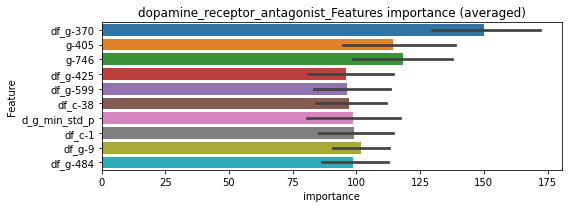

len(train_index) : 2208
len(valid_index) : 737
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.033604	valid_1's binary_logloss: 0.140321


len(train_index) : 2209
len(valid_index) : 736
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.0190013	valid_1's binary_logloss: 0.134206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0352529	valid_1's binary_logloss: 0.112751
[600]	training's binary_logloss: 0.0121672	valid_1's binary_logloss: 0.0923395
[900]	training's binary_logloss: 0.00643044	valid_1's binary_logloss: 0.0876638
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.00674682	valid_1's binary_logloss: 0.0872819


len(train_index) : 2209
len(valid_index) : 736
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0353121	valid_1's binary_logloss: 0.119099
[600]	training's binary_logloss: 0.0120835	valid_1's binary_logloss: 0.100663
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00832548	valid_1's binary_logloss: 0.097262


len(train_index) : 2209
len(valid_index) : 736
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0328431	valid_1's binary_logloss: 0.148132


dopamine_receptor_antagonist logloss: 0.11359985326900919


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.0147705	valid_1's binary_logloss: 0.135621
neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242, target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0979697	valid_1's binary_logloss: 0.305937
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.0418164	valid_1's binary_logloss: 0.292051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.100382	valid_1's binary_logloss: 0.299073
[600]	training's binary_logloss: 0.0295414	valid_1's binary_logloss: 0.275506
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.0257719	valid_1's binary_logloss: 0.274305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0978171	valid_1's binary_logloss: 0.306892
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.042244	valid_1's binary_logloss: 0.292843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0985814	valid_1's binary_logloss: 0.323068
Early stopping, best iteratio

1 / 3 AUC score:0.861
y_Threshold: 0.0937137, Threshold: 0.7606240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 504 → Positive_corect_labels: 461/3386
p_label_rate: 0.0100452 Vs.target_rate: 0.01411, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7606240, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 461.0/3386, y_label_rate: 0.1361488
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0514262	valid_1's binary_logloss: 0.186401
[600]	training's binary_logloss: 0.0107707	valid_1's binary_logloss: 0.157173
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00758024	valid_1's binary_logloss: 0.154103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0494848	valid_1's binary_logloss: 0.181466
[600]	training's binary_logloss: 0.0102903	valid_1's binary_logloss: 0.148982
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00547701	valid_1's binary_logloss: 0.143521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0476131	valid_1's binary_logloss: 0.181863
[600]	training's binary_logloss: 0.00961206	valid_1's binary_logloss: 0.16316
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00983161	valid_1's binary_logloss: 0.162684
Trainin

2 / 3 AUC score:0.969
y_Threshold: 0.0868045, Threshold: 0.7606240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 387.0/3238
p_label_rate: 0.0306379 Vs.target_rate: 0.01411, Num_p_label: 122.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 122.0, Expected: 56.2, Adj_threshold_1: 0.7606240
Num_p_label: 120.0, Expected: 56.2, Adj_threshold_2: 0.7806240
threshold: 0.7806240, positive_p_label: 120.0/3982, p_label_rate: 0.0301356
positive_y_label: 387.0/3238, y_label_rate: 0.1195182
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0338166	valid_1's binary_logloss: 0.151955
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00722529	valid_1's binary_logloss: 0.135941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362307	valid_1's binary_logloss: 0.166139
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00936763	valid_1's binary_logloss: 0.144409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0346229	valid_1's binary_logloss: 0.138698
[600]	training's binary_logloss: 0.0063602	valid_1's binary_logloss: 0.108222
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00379117	valid_1's binary_logloss: 0.104987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343117	valid_1's binary_logloss: 0.171566
Early stopping, best ite

3 / 3 AUC score:0.974
y_Threshold: 0.0675958, Threshold: 0.7806240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 341.0/3146
p_label_rate: 0.0371673 Vs.target_rate: 0.01411, Num_p_label: 148.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 148.0, Expected: 56.2, Adj_threshold_1: 0.7806240
threshold: 0.7806240, positive_p_label: 148.0/3982, p_label_rate: 0.0371673
positive_y_label: 341.0/3146, y_label_rate: 0.1083916


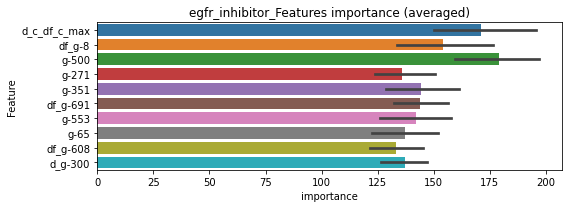

len(train_index) : 2359
len(valid_index) : 787
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0484473	valid_1's binary_logloss: 0.121657
[600]	training's binary_logloss: 0.0163893	valid_1's binary_logloss: 0.0887008
[900]	training's binary_logloss: 0.00850234	valid_1's binary_logloss: 0.0783281
[1200]	training's binary_logloss: 0.00547835	valid_1's binary_logloss: 0.0744429
[1500]	training's binary_logloss: 0.00398917	valid_1's binary_logloss: 0.0723961
Early stopping, best iteration is:
[1492]	training's binary_logloss: 0.00401751	valid_1's binary_logloss: 0.0723614


len(train_index) : 2359
len(valid_index) : 787
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0493698	valid_1's binary_logloss: 0.160162


len(train_index) : 2360
len(valid_index) : 786
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.0221065	valid_1's binary_logloss: 0.143733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0482547	valid_1's binary_logloss: 0.146081
[600]	training's binary_logloss: 0.0163248	valid_1's binary_logloss: 0.122552
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.0105383	valid_1's binary_logloss: 0.11947


len(train_index) : 2360
len(valid_index) : 786
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0482336	valid_1's binary_logloss: 0.146809
[600]	training's binary_logloss: 0.0163521	valid_1's binary_logloss: 0.116838
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.0110203	valid_1's binary_logloss: 0.112378


egfr_inhibitor logloss: 0.11198315688525642


neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249521	valid_1's binary_logloss: 0.00588344
[600]	training's binary_logloss: 0.000355981	valid_1's binary_logloss: 0.0024137
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000276379	valid_1's binary_logloss: 0.00225319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254278	valid_1's binary_logloss: 0.00499064
[600]	training's binary_logloss: 0.000362883	valid_1's binary_logloss: 0.00144566
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000282133	valid_1's binary_logloss: 0.00126729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265065	valid_1's binary_logloss: 0.00293744
[600]	training's binary_logloss: 0.000376389	valid_1's binary_logloss: 0.000451881
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.00027801	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0011291, Threshold: 0.0033402, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000277114	valid_1's binary_logloss: 0.000593297


p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00234, conf_1:0.00434
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0033402
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0233402
threshold: 0.0233402, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023939	valid_1's binary_logloss: 0.00527714
[600]	training's binary_logloss: 0.000339947	valid_1's binary_logloss: 0.00242021
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000272338	valid_1's binary_logloss: 0.00231211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244912	valid_1's binary_logloss: 0.00569535
[600]	training's binary_logloss: 0.000344676	valid_1's binary_logloss: 0.00225619
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000275402	valid_1's binary_logloss: 0.00214754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025803	valid_1's binary_logloss: 0.00286211
[600]	training's binary_logloss: 0.000363728	valid_1's binary_logloss: 0.00042192
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000266374	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0596685, Threshold: 0.0233402, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00050, Num_p_label: 6.0, conf_0:0.01867, conf_1:0.02801
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0233402


Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000271141	valid_1's binary_logloss: 0.000507574


Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0433402
threshold: 0.0433402, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023939	valid_1's binary_logloss: 0.00527714
[600]	training's binary_logloss: 0.000339947	valid_1's binary_logloss: 0.00242021
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000272338	valid_1's binary_logloss: 0.00231211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244912	valid_1's binary_logloss: 0.00569535
[600]	training's binary_logloss: 0.000344676	valid_1's binary_logloss: 0.00225619
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000275402	valid_1's binary_logloss: 0.00214754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025803	valid_1's binary_logloss: 0.00286211
[600]	training's binary_logloss: 0.000363728	valid_1's binary_logloss: 0.00042192
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000266374	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0596685, Threshold: 0.0433402, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00050, Num_p_label: 1.0, conf_0:0.03901, conf_1:0.04767
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0433402


Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000271141	valid_1's binary_logloss: 0.000507574


threshold: 0.0433402, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


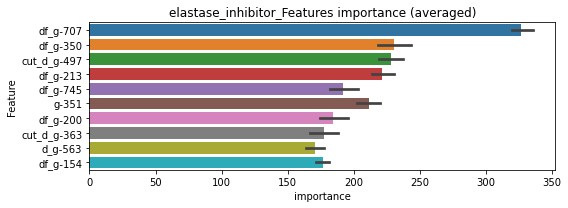

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727409	valid_1's binary_logloss: 0.011804
[600]	training's binary_logloss: 0.00189738	valid_1's binary_logloss: 0.00513134
[900]	training's binary_logloss: 0.00103619	valid_1's binary_logloss: 0.00372748
[1200]	training's binary_logloss: 0.000718097	valid_1's binary_logloss: 0.00311856
[1500]	training's binary_logloss: 0.000559989	valid_1's binary_logloss: 0.00278803
[1800]	training's binary_logloss: 0.00046633	valid_1's binary_logloss: 0.0025836
[2100]	training's binary_logloss: 0.000405612	valid_1's binary_logloss: 0.00242032
[2400]	training's binary_logloss: 0.000363826	valid_1's binary_logloss: 0.0023105
[2700]	training's binary_logloss: 0.000332947	valid_1's binary_logloss: 0.00222679
[3000]	training's binary_logloss: 0.000311557	valid_1's binary_logloss: 0.00218086
[3300]	training's binary_logloss: 0.000296846	valid_1's binary_logloss: 0.00214864
[3600]	training's binary_logloss: 0.0

len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737307	valid_1's binary_logloss: 0.0108776
[600]	training's binary_logloss: 0.00192377	valid_1's binary_logloss: 0.00418586
[900]	training's binary_logloss: 0.00104945	valid_1's binary_logloss: 0.00295016
[1200]	training's binary_logloss: 0.000728596	valid_1's binary_logloss: 0.00243178
[1500]	training's binary_logloss: 0.000569467	valid_1's binary_logloss: 0.00213876
[1800]	training's binary_logloss: 0.00047315	valid_1's binary_logloss: 0.00195655
[2100]	training's binary_logloss: 0.000409712	valid_1's binary_logloss: 0.00182313
[2400]	training's binary_logloss: 0.000366309	valid_1's binary_logloss: 0.00173131
[2700]	training's binary_logloss: 0.00033519	valid_1's binary_logloss: 0.00165479
[3000]	training's binary_logloss: 0.000312801	valid_1's binary_logloss: 0.00160782
[3300]	training's binary_logloss: 0.00029742	valid_1's binary_logloss: 0.00157241
[3600]	training's binary_logloss: 0.

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757135	valid_1's binary_logloss: 0.00808595
[600]	training's binary_logloss: 0.00197035	valid_1's binary_logloss: 0.00216115
[900]	training's binary_logloss: 0.00106547	valid_1's binary_logloss: 0.00118956
[1200]	training's binary_logloss: 0.000739384	valid_1's binary_logloss: 0.000837796
[1500]	training's binary_logloss: 0.000575384	valid_1's binary_logloss: 0.000659575
[1800]	training's binary_logloss: 0.000477957	valid_1's binary_logloss: 0.000552236
[2100]	training's binary_logloss: 0.000414765	valid_1's binary_logloss: 0.000481754
[2400]	training's binary_logloss: 0.000370848	valid_1's binary_logloss: 0.000432933
[2700]	training's binary_logloss: 0.000339283	valid_1's binary_logloss: 0.000397987
[3000]	training's binary_logloss: 0.000316452	valid_1's binary_logloss: 0.000372211
[3300]	training's binary_logloss: 0.000301613	valid_1's binary_logloss: 0.000355835
[3600]	training's binary

len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744793	valid_1's binary_logloss: 0.00869674
[600]	training's binary_logloss: 0.00195518	valid_1's binary_logloss: 0.00250381
[900]	training's binary_logloss: 0.00106537	valid_1's binary_logloss: 0.00143728
[1200]	training's binary_logloss: 0.000739379	valid_1's binary_logloss: 0.00103621
[1500]	training's binary_logloss: 0.00057618	valid_1's binary_logloss: 0.000827886
[1800]	training's binary_logloss: 0.000479179	valid_1's binary_logloss: 0.000705239
[2100]	training's binary_logloss: 0.000415808	valid_1's binary_logloss: 0.00062221
[2400]	training's binary_logloss: 0.000370884	valid_1's binary_logloss: 0.00056218
[2700]	training's binary_logloss: 0.000339406	valid_1's binary_logloss: 0.000520804
[3000]	training's binary_logloss: 0.000317172	valid_1's binary_logloss: 0.000491271
[3300]	training's binary_logloss: 0.000301315	valid_1's binary_logloss: 0.000470665
[3600]	training's binary_log

elastase_inhibitor logloss: 0.0011068252138625408


neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287, target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598519	valid_1's binary_logloss: 0.0100518
[600]	training's binary_logloss: 0.000736306	valid_1's binary_logloss: 0.00244464
[900]	training's binary_logloss: 0.000405386	valid_1's binary_logloss: 0.00189073
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000402334	valid_1's binary_logloss: 0.00188099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595332	valid_1's binary_logloss: 0.0121361
[600]	training's binary_logloss: 0.000728016	valid_1's binary_logloss: 0.00311218
[900]	training's binary_logloss: 0.000401868	valid_1's binary_logloss: 0.0022523
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000381641	valid_1's binary_logloss: 0.00221087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615301	valid_1's binary_logloss: 0.00903424
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0026488, Threshold: 0.0077449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084, Num_p_label: 40.0, conf_0:0.00542, conf_1:0.01007
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0077449
Num_p_label: 5.0, Expected: 3.3, Adj_threshold_2: 0.0277449
threshold: 0.0277449, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550311	valid_1's binary_logloss: 0.00845469
[600]	training's binary_logloss: 0.000707417	valid_1's binary_logloss: 0.00213705
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000431086	valid_1's binary_logloss: 0.00175666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005586	valid_1's binary_logloss: 0.0114806
[600]	training's binary_logloss: 0.000700102	valid_1's binary_logloss: 0.0027984
[900]	training's binary_logloss: 0.000388786	valid_1's binary_logloss: 0.00199148
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000379631	valid_1's binary_logloss: 0.00197015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558026	valid_1's binary_logloss: 0.00813791
[600]	training's binary_logloss: 0.000697243	valid_1's binary_logloss: 0.00134892
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0834306, Threshold: 0.0277449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00084, Num_p_label: 20.0, conf_0:0.02220, conf_1:0.03329
Num_p_label: 20.0, Expected: 3.3, Adj_threshold_1: 0.0277449
Num_p_label: 6.0, Expected: 3.3, Adj_threshold_2: 0.0477449
threshold: 0.0477449, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550311	valid_1's binary_logloss: 0.00845469
[600]	training's binary_logloss: 0.000707417	valid_1's binary_logloss: 0.00213705
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000431086	valid_1's binary_logloss: 0.00175666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005586	valid_1's binary_logloss: 0.0114806
[600]	training's binary_logloss: 0.000700102	valid_1's binary_logloss: 0.0027984
[900]	training's binary_logloss: 0.000388786	valid_1's binary_logloss: 0.00199148
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000379631	valid_1's binary_logloss: 0.00197015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558026	valid_1's binary_logloss: 0.00813791
[600]	training's binary_logloss: 0.000697243	valid_1's binary_logloss: 0.00134892
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0834306, Threshold: 0.0477449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00084, Num_p_label: 6.0, conf_0:0.04297, conf_1:0.05252
Num_p_label: 6.0, Expected: 3.3, Adj_threshold_1: 0.0477449
threshold: 0.0477449, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


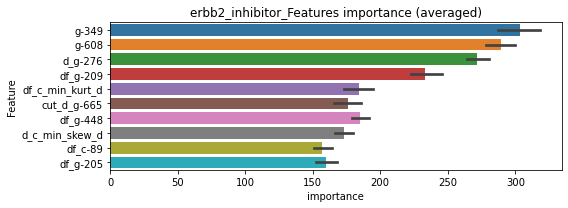

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135629	valid_1's binary_logloss: 0.018319
[600]	training's binary_logloss: 0.00355896	valid_1's binary_logloss: 0.00653585
[900]	training's binary_logloss: 0.0018817	valid_1's binary_logloss: 0.00431101
[1200]	training's binary_logloss: 0.00127403	valid_1's binary_logloss: 0.00342654
[1500]	training's binary_logloss: 0.000976513	valid_1's binary_logloss: 0.00302826
[1800]	training's binary_logloss: 0.000799739	valid_1's binary_logloss: 0.00273054
[2100]	training's binary_logloss: 0.000684837	valid_1's binary_logloss: 0.00255812
[2400]	training's binary_logloss: 0.000603794	valid_1's binary_logloss: 0.00241236
[2700]	training's binary_logloss: 0.00054472	valid_1's binary_logloss: 0.00230253
[3000]	training's binary_logloss: 0.000501637	valid_1's binary_logloss: 0.00222244
[3300]	training's binary_logloss: 0.000468901	valid_1's binary_logloss: 0.0021578
[3600]	training's binary_logloss: 0.000

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135576	valid_1's binary_logloss: 0.0205808
[600]	training's binary_logloss: 0.00353323	valid_1's binary_logloss: 0.00703181
[900]	training's binary_logloss: 0.00187169	valid_1's binary_logloss: 0.00436029
[1200]	training's binary_logloss: 0.00126741	valid_1's binary_logloss: 0.00332321
[1500]	training's binary_logloss: 0.000968293	valid_1's binary_logloss: 0.00277761
[1800]	training's binary_logloss: 0.000795433	valid_1's binary_logloss: 0.00244467
[2100]	training's binary_logloss: 0.000681218	valid_1's binary_logloss: 0.00222387
[2400]	training's binary_logloss: 0.000602365	valid_1's binary_logloss: 0.00206335
[2700]	training's binary_logloss: 0.000543951	valid_1's binary_logloss: 0.00193913
[3000]	training's binary_logloss: 0.00050003	valid_1's binary_logloss: 0.00184683
[3300]	training's binary_logloss: 0.000467064	valid_1's binary_logloss: 0.00177818
[3600]	training's binary_logloss: 0.

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136929	valid_1's binary_logloss: 0.0179125
[600]	training's binary_logloss: 0.00357835	valid_1's binary_logloss: 0.00547756
[900]	training's binary_logloss: 0.00187869	valid_1's binary_logloss: 0.00320235
[1200]	training's binary_logloss: 0.00127197	valid_1's binary_logloss: 0.00233109
[1500]	training's binary_logloss: 0.000973655	valid_1's binary_logloss: 0.00188256
[1800]	training's binary_logloss: 0.000796244	valid_1's binary_logloss: 0.00160219
[2100]	training's binary_logloss: 0.000684158	valid_1's binary_logloss: 0.00142649
[2400]	training's binary_logloss: 0.000603574	valid_1's binary_logloss: 0.00129223
[2700]	training's binary_logloss: 0.000545228	valid_1's binary_logloss: 0.00119676
[3000]	training's binary_logloss: 0.000501916	valid_1's binary_logloss: 0.00112182
[3300]	training's binary_logloss: 0.000467564	valid_1's binary_logloss: 0.00105986
[3600]	training's binary_logloss: 0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137137	valid_1's binary_logloss: 0.0200092
[600]	training's binary_logloss: 0.00360068	valid_1's binary_logloss: 0.00602957
[900]	training's binary_logloss: 0.00189612	valid_1's binary_logloss: 0.00342147
[1200]	training's binary_logloss: 0.00127944	valid_1's binary_logloss: 0.00242625
[1500]	training's binary_logloss: 0.00098089	valid_1's binary_logloss: 0.00193691
[1800]	training's binary_logloss: 0.000803737	valid_1's binary_logloss: 0.00163166
[2100]	training's binary_logloss: 0.000685353	valid_1's binary_logloss: 0.00142455
[2400]	training's binary_logloss: 0.000604826	valid_1's binary_logloss: 0.00128248
[2700]	training's binary_logloss: 0.000547812	valid_1's binary_logloss: 0.00118123
[3000]	training's binary_logloss: 0.00050455	valid_1's binary_logloss: 0.00110595
[3300]	training's binary_logloss: 0.000469206	valid_1's binary_logloss: 0.00103873
[3600]	training's binary_logloss: 0.0

erbb2_inhibitor logloss: 0.0013884752260930394


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270, target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432264	valid_1's binary_logloss: 0.163477
[600]	training's binary_logloss: 0.00923643	valid_1's binary_logloss: 0.141777
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00512702	valid_1's binary_logloss: 0.137777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0448461	valid_1's binary_logloss: 0.155604
[600]	training's binary_logloss: 0.00909008	valid_1's binary_logloss: 0.13954
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00882398	valid_1's binary_logloss: 0.139291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0449074	valid_1's binary_logloss: 0.113495
[600]	training's binary_logloss: 0.00947492	valid_1's binary_logloss: 0.0866935
[900]	training's binary_logloss: 0.00309544	valid_1's binary_logloss: 0.0817472
Early stopping, best iteration is:
[92

1 / 3 AUC score:0.971
y_Threshold: 0.0305142, Threshold: 0.3074389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 231 → Positive_corect_labels: 604/3693
p_label_rate: 0.0100452 Vs.target_rate: 0.00663, Num_p_label: 40.0, conf_0:0.21521, conf_1:0.39967
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.3074389
Num_p_label: 39.0, Expected: 26.4, Adj_threshold_2: 0.3274389
threshold: 0.3274389, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 604.0/3693, y_label_rate: 0.1635527
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0298387	valid_1's binary_logloss: 0.109242
[600]	training's binary_logloss: 0.00559614	valid_1's binary_logloss: 0.0901623
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00316888	valid_1's binary_logloss: 0.0869707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303831	valid_1's binary_logloss: 0.10203
[600]	training's binary_logloss: 0.00562781	valid_1's binary_logloss: 0.0759228
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00270263	valid_1's binary_logloss: 0.0712302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0314685	valid_1's binary_logloss: 0.0881721
[600]	training's binary_logloss: 0.0057287	valid_1's binary_logloss: 0.0619539
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00266225	valid_1's binary_logloss: 0.0582547

2 / 3 AUC score:0.997
y_Threshold: 0.0462894, Threshold: 0.3274389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 584.0/3653
p_label_rate: 0.0200904 Vs.target_rate: 0.00663, Num_p_label: 80.0, conf_0:0.26195, conf_1:0.39293
Num_p_label: 80.0, Expected: 26.4, Adj_threshold_1: 0.3274389
Num_p_label: 77.0, Expected: 26.4, Adj_threshold_2: 0.3474389
Num_p_label: 75.0, Expected: 26.4, Adj_threshold_3: 0.3674389
Num_p_label: 69.0, Expected: 26.4, Adj_threshold_4: 0.3874389
Num_p_label: 63.0, Expected: 26.4, Adj_threshold_5: 0.4074389
Num_p_label: 60.0, Expected: 26.4, Adj_threshold_6: 0.4274389
Num_p_label: 57.0, Expected: 26.4, Adj_threshold_7: 0.4474389
Num_p_label: 54.0, Expected: 26.4, Adj_threshold_8: 0.4674389
Num_p_label: 50.0, Expected: 26.4, Adj_threshold_9: 0.4874389
Num_p_label: 50.0, Expected: 26.4, Adj_threshold_10: 0.5074389
threshold: 0.5274389, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 584.0/3653, y_label_rate: 0.1598686

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265481	valid_1's binary_logloss: 0.0913728
[600]	training's binary_logloss: 0.00457463	valid_1's binary_logloss: 0.0674671
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.00287367	valid_1's binary_logloss: 0.0652042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0266512	valid_1's binary_logloss: 0.0807407
[600]	training's binary_logloss: 0.00468912	valid_1's binary_logloss: 0.0563019
[900]	training's binary_logloss: 0.0017441	valid_1's binary_logloss: 0.0510368
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.00143795	valid_1's binary_logloss: 0.0503852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272716	valid_1's binary_logloss: 0.0875548
[600]	training's binary_logloss: 0.00481993	valid_1's binary_logloss: 0.0591885
[900]	training's binary_logloss

3 / 3 AUC score:0.998
y_Threshold: 0.0392932, Threshold: 0.5274389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 571.0/3627
p_label_rate: 0.0145655 Vs.target_rate: 0.00663, Num_p_label: 58.0, conf_0:0.47470, conf_1:0.58018
Num_p_label: 58.0, Expected: 26.4, Adj_threshold_1: 0.5274389
Num_p_label: 57.0, Expected: 26.4, Adj_threshold_2: 0.5474389
Num_p_label: 56.0, Expected: 26.4, Adj_threshold_3: 0.5674389
Num_p_label: 55.0, Expected: 26.4, Adj_threshold_4: 0.5874389
Num_p_label: 51.0, Expected: 26.4, Adj_threshold_5: 0.6074389
Num_p_label: 51.0, Expected: 26.4, Adj_threshold_6: 0.6274389
Num_p_label: 50.0, Expected: 26.4, Adj_threshold_7: 0.6474389
Num_p_label: 49.0, Expected: 26.4, Adj_threshold_8: 0.6674389
Num_p_label: 46.0, Expected: 26.4, Adj_threshold_9: 0.6874389
Num_p_label: 43.0, Expected: 26.4, Adj_threshold_10: 0.7074389
threshold: 0.7274389, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 571.0/3627, y_label_rate: 0.1574304

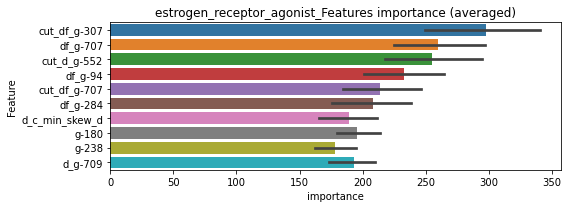

len(train_index) : 2720
len(valid_index) : 907
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440244	valid_1's binary_logloss: 0.103894
[600]	training's binary_logloss: 0.0145386	valid_1's binary_logloss: 0.0794906
[900]	training's binary_logloss: 0.0073825	valid_1's binary_logloss: 0.0733627
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00694117	valid_1's binary_logloss: 0.0730236


len(train_index) : 2720
len(valid_index) : 907
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0447783	valid_1's binary_logloss: 0.0913695
[600]	training's binary_logloss: 0.0148277	valid_1's binary_logloss: 0.0632766
[900]	training's binary_logloss: 0.0076162	valid_1's binary_logloss: 0.0550569
[1200]	training's binary_logloss: 0.00487441	valid_1's binary_logloss: 0.0512581
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.00465357	valid_1's binary_logloss: 0.0508705


len(train_index) : 2720
len(valid_index) : 907
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440855	valid_1's binary_logloss: 0.0953702
[600]	training's binary_logloss: 0.0147998	valid_1's binary_logloss: 0.0651816
[900]	training's binary_logloss: 0.00756685	valid_1's binary_logloss: 0.0561108
[1200]	training's binary_logloss: 0.00484178	valid_1's binary_logloss: 0.0523233
[1500]	training's binary_logloss: 0.0035086	valid_1's binary_logloss: 0.0504412
Early stopping, best iteration is:
[1544]	training's binary_logloss: 0.00337273	valid_1's binary_logloss: 0.050094


len(train_index) : 2721
len(valid_index) : 906
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441923	valid_1's binary_logloss: 0.0916497
[600]	training's binary_logloss: 0.0147971	valid_1's binary_logloss: 0.0647597
[900]	training's binary_logloss: 0.00759154	valid_1's binary_logloss: 0.0561782
[1200]	training's binary_logloss: 0.00483902	valid_1's binary_logloss: 0.052241
Early stopping, best iteration is:
[1428]	training's binary_logloss: 0.00377179	valid_1's binary_logloss: 0.0506092


estrogen_receptor_agonist logloss: 0.056150833755707175


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133985	valid_1's binary_logloss: 0.0338103
[600]	training's binary_logloss: 0.00182487	valid_1's binary_logloss: 0.0163918
[900]	training's binary_logloss: 0.000781003	valid_1's binary_logloss: 0.0136564
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000798437	valid_1's binary_logloss: 0.0135942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132704	valid_1's binary_logloss: 0.0350149
[600]	training's binary_logloss: 0.00182411	valid_1's binary_logloss: 0.015432
[900]	training's binary_logloss: 0.000779618	valid_1's binary_logloss: 0.0122212
[1200]	training's binary_logloss: 0.000592937	valid_1's binary_logloss: 0.0116508
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000594442	valid_1's binary_logloss: 0.0116355
Training until validation scores don't improve for 30 rounds
[300]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0065675, Threshold: 0.1775043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.12425, conf_1:0.23076
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1775043
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.1975043
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_3: 0.2175043
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_4: 0.2375043
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_5: 0.2575043
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_6: 0.2775043
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_7: 0.2975043
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_8: 0.3175043
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_9: 0.3375043
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_10: 0.3575043
threshold: 0.3775043, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121033	valid_1's binary_logloss: 0.0350058
[600]	training's binary_logloss: 0.00167114	valid_1's binary_logloss: 0.0182464
[900]	training's binary_logloss: 0.000735542	valid_1's binary_logloss: 0.0169312
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000734284	valid_1's binary_logloss: 0.0169271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125033	valid_1's binary_logloss: 0.0282058
[600]	training's binary_logloss: 0.00177416	valid_1's binary_logloss: 0.00963114
[900]	training's binary_logloss: 0.00076121	valid_1's binary_logloss: 0.00640853
Early stopping, best iteration is:
[1124]	training's binary_logloss: 0.000606206	valid_1's binary_logloss: 0.0058393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012864	valid_1's binary_logloss: 0.02129
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0310978, Threshold: 0.3775043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0090407 Vs.target_rate: 0.00202, Num_p_label: 36.0, conf_0:0.30200, conf_1:0.45301
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.3775043
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.3975043
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.4175043
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_4: 0.4375043
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_5: 0.4575043
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_6: 0.4775043
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_7: 0.4975043
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_8: 0.5175043
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_9: 0.5375043
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_10: 0.5575043
threshold: 0.5775043, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119652	valid_1's binary_logloss: 0.0361434
[600]	training's binary_logloss: 0.00167385	valid_1's binary_logloss: 0.0203175
[900]	training's binary_logloss: 0.000724902	valid_1's binary_logloss: 0.0176379
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000714253	valid_1's binary_logloss: 0.0175555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120912	valid_1's binary_logloss: 0.0292829
[600]	training's binary_logloss: 0.00168314	valid_1's binary_logloss: 0.00911888
[900]	training's binary_logloss: 0.000735432	valid_1's binary_logloss: 0.00577059
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000585051	valid_1's binary_logloss: 0.0051877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122011	valid_1's binary_logloss: 0.0259871
[600]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0275797, Threshold: 0.5775043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0062783 Vs.target_rate: 0.00202, Num_p_label: 25.0, conf_0:0.50000, conf_1:0.63525
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_1: 0.5775043
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_2: 0.5975043
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.6175043
threshold: 0.6175043, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3797, y_label_rate: 0.1714511


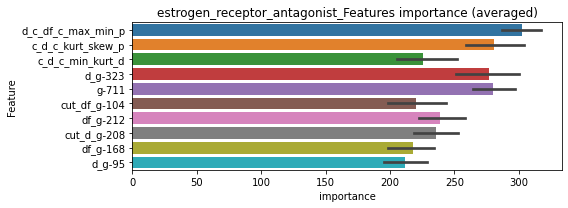

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257235	valid_1's binary_logloss: 0.0550448
[600]	training's binary_logloss: 0.00711195	valid_1's binary_logloss: 0.0324288
[900]	training's binary_logloss: 0.00360113	valid_1's binary_logloss: 0.027383
[1200]	training's binary_logloss: 0.00234888	valid_1's binary_logloss: 0.0254887
Early stopping, best iteration is:
[1416]	training's binary_logloss: 0.00188412	valid_1's binary_logloss: 0.0244334


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255181	valid_1's binary_logloss: 0.0465007
[600]	training's binary_logloss: 0.00723349	valid_1's binary_logloss: 0.0213399
[900]	training's binary_logloss: 0.00364177	valid_1's binary_logloss: 0.0149374
[1200]	training's binary_logloss: 0.00236575	valid_1's binary_logloss: 0.0123352
[1500]	training's binary_logloss: 0.00175285	valid_1's binary_logloss: 0.0109026
[1800]	training's binary_logloss: 0.00139969	valid_1's binary_logloss: 0.00980899
[2100]	training's binary_logloss: 0.00117264	valid_1's binary_logloss: 0.00919452
[2400]	training's binary_logloss: 0.00101686	valid_1's binary_logloss: 0.00877548
Early stopping, best iteration is:
[2546]	training's binary_logloss: 0.000956267	valid_1's binary_logloss: 0.00858484


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0259866	valid_1's binary_logloss: 0.0421361
[600]	training's binary_logloss: 0.00738363	valid_1's binary_logloss: 0.0188825
[900]	training's binary_logloss: 0.00371492	valid_1's binary_logloss: 0.0133257
[1200]	training's binary_logloss: 0.00241574	valid_1's binary_logloss: 0.0109916
[1500]	training's binary_logloss: 0.00178846	valid_1's binary_logloss: 0.0097919
[1800]	training's binary_logloss: 0.00142725	valid_1's binary_logloss: 0.00902356
[2100]	training's binary_logloss: 0.00119263	valid_1's binary_logloss: 0.0084277
[2400]	training's binary_logloss: 0.00103296	valid_1's binary_logloss: 0.0080401
[2700]	training's binary_logloss: 0.000917032	valid_1's binary_logloss: 0.00772142
[3000]	training's binary_logloss: 0.000830572	valid_1's binary_logloss: 0.0074427
Early stopping, best iteration is:
[2973]	training's binary_logloss: 0.00083756	valid_1's binary_logloss: 0.00744152


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258937	valid_1's binary_logloss: 0.0469731
[600]	training's binary_logloss: 0.00733553	valid_1's binary_logloss: 0.0219001
[900]	training's binary_logloss: 0.00369269	valid_1's binary_logloss: 0.0156877
[1200]	training's binary_logloss: 0.00239327	valid_1's binary_logloss: 0.0131672
[1500]	training's binary_logloss: 0.00177337	valid_1's binary_logloss: 0.0119359
[1800]	training's binary_logloss: 0.0014125	valid_1's binary_logloss: 0.011027
[2100]	training's binary_logloss: 0.0011837	valid_1's binary_logloss: 0.0105064
Early stopping, best iteration is:
[2180]	training's binary_logloss: 0.0011342	valid_1's binary_logloss: 0.0103649


estrogen_receptor_antagonist logloss: 0.012709253170115849


neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00942006	valid_1's binary_logloss: 0.0227525
[600]	training's binary_logloss: 0.00122465	valid_1's binary_logloss: 0.00774944
[900]	training's binary_logloss: 0.00057524	valid_1's binary_logloss: 0.00546427
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000481875	valid_1's binary_logloss: 0.005198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0095734	valid_1's binary_logloss: 0.0189501
[600]	training's binary_logloss: 0.00123283	valid_1's binary_logloss: 0.00537942
[900]	training's binary_logloss: 0.000588289	valid_1's binary_logloss: 0.00383445
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000525709	valid_1's binary_logloss: 0.00365543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970037	valid_1's binary_logloss: 0.0191074
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0041178, Threshold: 0.0156905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01098, conf_1:0.02040
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0156905
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0356905
threshold: 0.0356905, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871276	valid_1's binary_logloss: 0.0196104
[600]	training's binary_logloss: 0.00116865	valid_1's binary_logloss: 0.00609394
[900]	training's binary_logloss: 0.000555158	valid_1's binary_logloss: 0.00449201
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000481549	valid_1's binary_logloss: 0.00429745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00866142	valid_1's binary_logloss: 0.0203312
[600]	training's binary_logloss: 0.00115301	valid_1's binary_logloss: 0.00671617
[900]	training's binary_logloss: 0.000550099	valid_1's binary_logloss: 0.00488519
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000505938	valid_1's binary_logloss: 0.00474776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852218	valid_1's binary_logloss: 0.016702
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0847347, Threshold: 0.0356905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0087896 Vs.target_rate: 0.00151, Num_p_label: 35.0, conf_0:0.02855, conf_1:0.04283
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_1: 0.0356905
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0556905
threshold: 0.0556905, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871276	valid_1's binary_logloss: 0.0196104
[600]	training's binary_logloss: 0.00116865	valid_1's binary_logloss: 0.00609394
[900]	training's binary_logloss: 0.000555158	valid_1's binary_logloss: 0.00449201
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000481549	valid_1's binary_logloss: 0.00429745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00866142	valid_1's binary_logloss: 0.0203312
[600]	training's binary_logloss: 0.00115301	valid_1's binary_logloss: 0.00671617
[900]	training's binary_logloss: 0.000550099	valid_1's binary_logloss: 0.00488519
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000505938	valid_1's binary_logloss: 0.00474776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852218	valid_1's binary_logloss: 0.016702
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0847347, Threshold: 0.0556905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151, Num_p_label: 15.0, conf_0:0.05012, conf_1:0.06126
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.0556905
threshold: 0.0556905, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


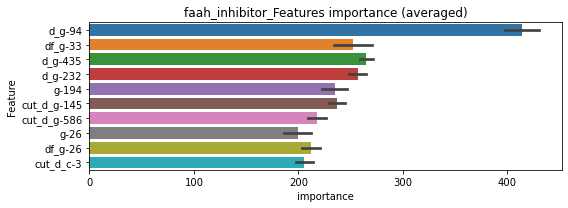

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205543	valid_1's binary_logloss: 0.0337781
[600]	training's binary_logloss: 0.00555689	valid_1's binary_logloss: 0.0134357
[900]	training's binary_logloss: 0.00285217	valid_1's binary_logloss: 0.00894855
[1200]	training's binary_logloss: 0.00188831	valid_1's binary_logloss: 0.00712134
[1500]	training's binary_logloss: 0.00141805	valid_1's binary_logloss: 0.00619741
[1800]	training's binary_logloss: 0.00114635	valid_1's binary_logloss: 0.00556943
[2100]	training's binary_logloss: 0.000970927	valid_1's binary_logloss: 0.00515029
[2400]	training's binary_logloss: 0.000849603	valid_1's binary_logloss: 0.00483761
[2700]	training's binary_logloss: 0.000760159	valid_1's binary_logloss: 0.00459817
[3000]	training's binary_logloss: 0.000692437	valid_1's binary_logloss: 0.00440666
[3300]	training's binary_logloss: 0.000639762	valid_1's binary_logloss: 0.00425332
Early stopping, best iteration is:
[33

len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204532	valid_1's binary_logloss: 0.0330356
[600]	training's binary_logloss: 0.0055858	valid_1's binary_logloss: 0.0129901
[900]	training's binary_logloss: 0.00286679	valid_1's binary_logloss: 0.00856981
[1200]	training's binary_logloss: 0.00189847	valid_1's binary_logloss: 0.00689583
[1500]	training's binary_logloss: 0.00142507	valid_1's binary_logloss: 0.00592995
[1800]	training's binary_logloss: 0.001149	valid_1's binary_logloss: 0.00529759
[2100]	training's binary_logloss: 0.000969843	valid_1's binary_logloss: 0.00485957
[2400]	training's binary_logloss: 0.000849002	valid_1's binary_logloss: 0.00457592
[2700]	training's binary_logloss: 0.000758048	valid_1's binary_logloss: 0.00434409
[3000]	training's binary_logloss: 0.000690479	valid_1's binary_logloss: 0.00416912
Early stopping, best iteration is:
[3234]	training's binary_logloss: 0.000647863	valid_1's binary_logloss: 0.00405034


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207597	valid_1's binary_logloss: 0.0315366
[600]	training's binary_logloss: 0.00565756	valid_1's binary_logloss: 0.0116667
[900]	training's binary_logloss: 0.00290039	valid_1's binary_logloss: 0.00754721
[1200]	training's binary_logloss: 0.00191857	valid_1's binary_logloss: 0.00585028
[1500]	training's binary_logloss: 0.00144037	valid_1's binary_logloss: 0.00499518
[1800]	training's binary_logloss: 0.00116426	valid_1's binary_logloss: 0.004456
[2100]	training's binary_logloss: 0.000983271	valid_1's binary_logloss: 0.00414323
[2400]	training's binary_logloss: 0.000859826	valid_1's binary_logloss: 0.00386413
[2700]	training's binary_logloss: 0.000767645	valid_1's binary_logloss: 0.00368263
[3000]	training's binary_logloss: 0.000698266	valid_1's binary_logloss: 0.00352142
[3300]	training's binary_logloss: 0.000645597	valid_1's binary_logloss: 0.00339186
Early stopping, best iteration is:
[3558

len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203701	valid_1's binary_logloss: 0.0363305
[600]	training's binary_logloss: 0.0055524	valid_1's binary_logloss: 0.0152214
[900]	training's binary_logloss: 0.00284528	valid_1's binary_logloss: 0.0103486
[1200]	training's binary_logloss: 0.00188737	valid_1's binary_logloss: 0.00833936
[1500]	training's binary_logloss: 0.00141989	valid_1's binary_logloss: 0.00723253
[1800]	training's binary_logloss: 0.00114428	valid_1's binary_logloss: 0.00651763
[2100]	training's binary_logloss: 0.000967206	valid_1's binary_logloss: 0.00602121
[2400]	training's binary_logloss: 0.000846372	valid_1's binary_logloss: 0.00569753
[2700]	training's binary_logloss: 0.00075599	valid_1's binary_logloss: 0.00541921
[3000]	training's binary_logloss: 0.000687945	valid_1's binary_logloss: 0.00520899
[3300]	training's binary_logloss: 0.000635218	valid_1's binary_logloss: 0.00502742
Early stopping, best iteration is:
[3445]

faah_inhibitor logloss: 0.004140903071641053


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464324	valid_1's binary_logloss: 0.00948931
[600]	training's binary_logloss: 0.000588518	valid_1's binary_logloss: 0.00296257
[900]	training's binary_logloss: 0.000360227	valid_1's binary_logloss: 0.00242239
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.00035892	valid_1's binary_logloss: 0.00241973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00468343	valid_1's binary_logloss: 0.00941978
[600]	training's binary_logloss: 0.000592117	valid_1's binary_logloss: 0.00231642
[900]	training's binary_logloss: 0.000364002	valid_1's binary_logloss: 0.00160387
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000359954	valid_1's binary_logloss: 0.00158462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047938	valid_1's binary_logloss: 0.00743415
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0019807, Threshold: 0.0071754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00502, conf_1:0.00933
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0071754
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0271754
threshold: 0.0271754, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424176	valid_1's binary_logloss: 0.00970347
[600]	training's binary_logloss: 0.000557831	valid_1's binary_logloss: 0.00317567
[900]	training's binary_logloss: 0.000346985	valid_1's binary_logloss: 0.0026691
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000342647	valid_1's binary_logloss: 0.00266102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433371	valid_1's binary_logloss: 0.0076006
[600]	training's binary_logloss: 0.000564631	valid_1's binary_logloss: 0.00185248
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000359608	valid_1's binary_logloss: 0.00141051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427375	valid_1's binary_logloss: 0.00565829
[600]	training's binary_logloss: 0.000563248	valid_1's binary_logloss: 0.000982632
[900]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.0109991, Threshold: 0.0271754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076, Num_p_label: 29.0, conf_0:0.02174, conf_1:0.03261
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.0271754
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0471754
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0671754
threshold: 0.0671754, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424176	valid_1's binary_logloss: 0.00970347
[600]	training's binary_logloss: 0.000557831	valid_1's binary_logloss: 0.00317567
[900]	training's binary_logloss: 0.000346985	valid_1's binary_logloss: 0.0026691
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000342647	valid_1's binary_logloss: 0.00266102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433371	valid_1's binary_logloss: 0.0076006
[600]	training's binary_logloss: 0.000564631	valid_1's binary_logloss: 0.00185248
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000359608	valid_1's binary_logloss: 0.00141051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427375	valid_1's binary_logloss: 0.00565829
[600]	training's binary_logloss: 0.000563248	valid_1's binary_logloss: 0.000982632
[900]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.0109991, Threshold: 0.0671754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.06046, conf_1:0.07389
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0671754
threshold: 0.0671754, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


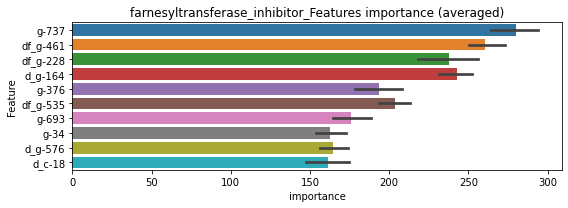

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112533	valid_1's binary_logloss: 0.0177948
[600]	training's binary_logloss: 0.00294406	valid_1's binary_logloss: 0.00622066
[900]	training's binary_logloss: 0.00156279	valid_1's binary_logloss: 0.00395019
[1200]	training's binary_logloss: 0.00106838	valid_1's binary_logloss: 0.00313259
[1500]	training's binary_logloss: 0.00082372	valid_1's binary_logloss: 0.00269214
[1800]	training's binary_logloss: 0.000679651	valid_1's binary_logloss: 0.00243671
[2100]	training's binary_logloss: 0.000583013	valid_1's binary_logloss: 0.00225385
[2400]	training's binary_logloss: 0.00051769	valid_1's binary_logloss: 0.00211932
[2700]	training's binary_logloss: 0.000468758	valid_1's binary_logloss: 0.00202061
[3000]	training's binary_logloss: 0.000433744	valid_1's binary_logloss: 0.00195151
[3300]	training's binary_logloss: 0.000406255	valid_1's binary_logloss: 0.00189323
Early stopping, best iteration is:
[3

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115452	valid_1's binary_logloss: 0.0158175
[600]	training's binary_logloss: 0.00298939	valid_1's binary_logloss: 0.0055276
[900]	training's binary_logloss: 0.00157495	valid_1's binary_logloss: 0.00359976
[1200]	training's binary_logloss: 0.0010739	valid_1's binary_logloss: 0.0027953
[1500]	training's binary_logloss: 0.000828755	valid_1's binary_logloss: 0.00238592
[1800]	training's binary_logloss: 0.000684579	valid_1's binary_logloss: 0.00212453
[2100]	training's binary_logloss: 0.000587883	valid_1's binary_logloss: 0.00196438
[2400]	training's binary_logloss: 0.000521117	valid_1's binary_logloss: 0.00184195
[2700]	training's binary_logloss: 0.000471347	valid_1's binary_logloss: 0.00174889
[3000]	training's binary_logloss: 0.000435524	valid_1's binary_logloss: 0.00168322
[3300]	training's binary_logloss: 0.000408663	valid_1's binary_logloss: 0.00162452
Early stopping, best iteration is:
[33

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114569	valid_1's binary_logloss: 0.013768
[600]	training's binary_logloss: 0.00297047	valid_1's binary_logloss: 0.00396192
[900]	training's binary_logloss: 0.00157968	valid_1's binary_logloss: 0.00223572
[1200]	training's binary_logloss: 0.00107626	valid_1's binary_logloss: 0.00157701
[1500]	training's binary_logloss: 0.000828986	valid_1's binary_logloss: 0.00125351
[1800]	training's binary_logloss: 0.00068308	valid_1's binary_logloss: 0.001057
[2100]	training's binary_logloss: 0.000586341	valid_1's binary_logloss: 0.00092218
[2400]	training's binary_logloss: 0.000520456	valid_1's binary_logloss: 0.000829951
[2700]	training's binary_logloss: 0.000472	valid_1's binary_logloss: 0.000761651
[3000]	training's binary_logloss: 0.000435977	valid_1's binary_logloss: 0.000710142
[3300]	training's binary_logloss: 0.000408246	valid_1's binary_logloss: 0.000670727
[3600]	training's binary_logloss: 0.00

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112327	valid_1's binary_logloss: 0.0192366
[600]	training's binary_logloss: 0.00289045	valid_1's binary_logloss: 0.00913431
[900]	training's binary_logloss: 0.00153198	valid_1's binary_logloss: 0.0073598
[1200]	training's binary_logloss: 0.00104974	valid_1's binary_logloss: 0.00679084
[1500]	training's binary_logloss: 0.000809501	valid_1's binary_logloss: 0.00643783
[1800]	training's binary_logloss: 0.000669163	valid_1's binary_logloss: 0.00623121
[2100]	training's binary_logloss: 0.000577161	valid_1's binary_logloss: 0.00607681
Early stopping, best iteration is:
[2317]	training's binary_logloss: 0.000528199	valid_1's binary_logloss: 0.00597306


farnesyltransferase_inhibitor logloss: 0.002514346117710331


neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601213	valid_1's binary_logloss: 0.0165212
[600]	training's binary_logloss: 0.000789358	valid_1's binary_logloss: 0.00912645
[900]	training's binary_logloss: 0.0004233	valid_1's binary_logloss: 0.00838873
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000421856	valid_1's binary_logloss: 0.00838238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584641	valid_1's binary_logloss: 0.0135075
[600]	training's binary_logloss: 0.000813253	valid_1's binary_logloss: 0.00555579
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000437092	valid_1's binary_logloss: 0.0045287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603171	valid_1's binary_logloss: 0.010416
[600]	training's binary_logloss: 0.000803297	valid_1's binary_logloss: 0.00217811
[900]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0025199, Threshold: 0.0120297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00842, conf_1:0.01564
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0120297
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0320297
threshold: 0.0320297, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0051911	valid_1's binary_logloss: 0.0177327
[600]	training's binary_logloss: 0.000727914	valid_1's binary_logloss: 0.009648
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000415842	valid_1's binary_logloss: 0.0084762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536872	valid_1's binary_logloss: 0.00808529
[600]	training's binary_logloss: 0.000753976	valid_1's binary_logloss: 0.00177538
[900]	training's binary_logloss: 0.000407177	valid_1's binary_logloss: 0.00118184
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000400613	valid_1's binary_logloss: 0.00116509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562863	valid_1's binary_logloss: 0.00998891
[600]	training's binary_logloss: 0.000754838	valid_1's binary_logloss: 0.00339067
Early stopping, b

2 / 3 AUC score:1.000
y_Threshold: 0.0176981, Threshold: 0.0320297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00105, Num_p_label: 29.0, conf_0:0.02562, conf_1:0.03844
Num_p_label: 29.0, Expected: 4.2, Adj_threshold_1: 0.0320297
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_2: 0.0520297
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_3: 0.0720297
threshold: 0.0720297, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0051911	valid_1's binary_logloss: 0.0177327
[600]	training's binary_logloss: 0.000727914	valid_1's binary_logloss: 0.009648
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000415842	valid_1's binary_logloss: 0.0084762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536872	valid_1's binary_logloss: 0.00808529
[600]	training's binary_logloss: 0.000753976	valid_1's binary_logloss: 0.00177538
[900]	training's binary_logloss: 0.000407177	valid_1's binary_logloss: 0.00118184
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000400613	valid_1's binary_logloss: 0.00116509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562863	valid_1's binary_logloss: 0.00998891
[600]	training's binary_logloss: 0.000754838	valid_1's binary_logloss: 0.00339067
Early stopping, b

3 / 3 AUC score:1.000
y_Threshold: 0.0176981, Threshold: 0.0720297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.06483, conf_1:0.07923
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0720297
threshold: 0.0720297, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


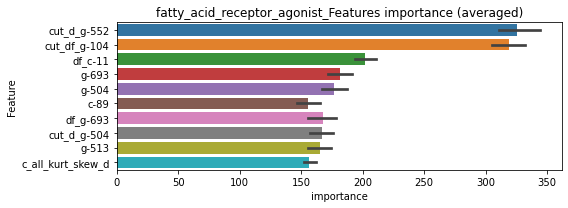

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136885	valid_1's binary_logloss: 0.0262571
[600]	training's binary_logloss: 0.00369915	valid_1's binary_logloss: 0.0133403
[900]	training's binary_logloss: 0.00194463	valid_1's binary_logloss: 0.0103854
[1200]	training's binary_logloss: 0.00131599	valid_1's binary_logloss: 0.0090956
[1500]	training's binary_logloss: 0.00100517	valid_1's binary_logloss: 0.00836323
[1800]	training's binary_logloss: 0.00082112	valid_1's binary_logloss: 0.00789646
[2100]	training's binary_logloss: 0.000701241	valid_1's binary_logloss: 0.00746886
[2400]	training's binary_logloss: 0.000619543	valid_1's binary_logloss: 0.00723578
Early stopping, best iteration is:
[2541]	training's binary_logloss: 0.000587425	valid_1's binary_logloss: 0.00711567


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142156	valid_1's binary_logloss: 0.0183859
[600]	training's binary_logloss: 0.00380794	valid_1's binary_logloss: 0.00594298
[900]	training's binary_logloss: 0.0019923	valid_1's binary_logloss: 0.00345813
[1200]	training's binary_logloss: 0.00134675	valid_1's binary_logloss: 0.00253982
[1500]	training's binary_logloss: 0.00102374	valid_1's binary_logloss: 0.00204432
[1800]	training's binary_logloss: 0.000836365	valid_1's binary_logloss: 0.00174284
[2100]	training's binary_logloss: 0.00071444	valid_1's binary_logloss: 0.00153976
[2400]	training's binary_logloss: 0.000630251	valid_1's binary_logloss: 0.00139659
[2700]	training's binary_logloss: 0.000568648	valid_1's binary_logloss: 0.00128991
[3000]	training's binary_logloss: 0.000522028	valid_1's binary_logloss: 0.00120939
[3300]	training's binary_logloss: 0.000487153	valid_1's binary_logloss: 0.00114436
[3600]	training's binary_logloss: 0.00

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142158	valid_1's binary_logloss: 0.0200484
[600]	training's binary_logloss: 0.00381178	valid_1's binary_logloss: 0.00768251
[900]	training's binary_logloss: 0.00199549	valid_1's binary_logloss: 0.00517917
[1200]	training's binary_logloss: 0.00134516	valid_1's binary_logloss: 0.00417384
[1500]	training's binary_logloss: 0.00102315	valid_1's binary_logloss: 0.00363722
[1800]	training's binary_logloss: 0.000834358	valid_1's binary_logloss: 0.00331523
[2100]	training's binary_logloss: 0.000712013	valid_1's binary_logloss: 0.00306953
[2400]	training's binary_logloss: 0.000627123	valid_1's binary_logloss: 0.00287997
[2700]	training's binary_logloss: 0.000564792	valid_1's binary_logloss: 0.00273315
[3000]	training's binary_logloss: 0.000518146	valid_1's binary_logloss: 0.00262151
[3300]	training's binary_logloss: 0.000483192	valid_1's binary_logloss: 0.00253866
Early stopping, best iteration is:
[

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137313	valid_1's binary_logloss: 0.0249138
[600]	training's binary_logloss: 0.00371532	valid_1's binary_logloss: 0.0104969
[900]	training's binary_logloss: 0.0019513	valid_1's binary_logloss: 0.00726657
[1200]	training's binary_logloss: 0.00132261	valid_1's binary_logloss: 0.00596589
[1500]	training's binary_logloss: 0.00100933	valid_1's binary_logloss: 0.00524871
[1800]	training's binary_logloss: 0.000823125	valid_1's binary_logloss: 0.00479379
[2100]	training's binary_logloss: 0.000703452	valid_1's binary_logloss: 0.00447646
[2400]	training's binary_logloss: 0.000619989	valid_1's binary_logloss: 0.00427441
[2700]	training's binary_logloss: 0.000558996	valid_1's binary_logloss: 0.00412089
Early stopping, best iteration is:
[2862]	training's binary_logloss: 0.00053182	valid_1's binary_logloss: 0.0040405


fatty_acid_receptor_agonist logloss: 0.003682672027150348


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284, target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152102	valid_1's binary_logloss: 0.0390282
[600]	training's binary_logloss: 0.00199056	valid_1's binary_logloss: 0.0159991
[900]	training's binary_logloss: 0.000825613	valid_1's binary_logloss: 0.0125032
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000682334	valid_1's binary_logloss: 0.0121738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016306	valid_1's binary_logloss: 0.0348582
[600]	training's binary_logloss: 0.00203174	valid_1's binary_logloss: 0.0116794
[900]	training's binary_logloss: 0.000848775	valid_1's binary_logloss: 0.00762009
[1200]	training's binary_logloss: 0.000619783	valid_1's binary_logloss: 0.00670661
Early stopping, best iteration is:
[1176]	training's binary_logloss: 0.000619783	valid_1's binary_logloss: 0.00670661
Training until validation scores don't improve for 30 rounds
[300]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0067766, Threshold: 0.0223083, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210, Num_p_label: 40.0, conf_0:0.01562, conf_1:0.02900
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0223083
Num_p_label: 23.0, Expected: 8.4, Adj_threshold_2: 0.0423083
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_3: 0.0623083
threshold: 0.0623083, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149296	valid_1's binary_logloss: 0.0338381
[600]	training's binary_logloss: 0.00193038	valid_1's binary_logloss: 0.0141534
[900]	training's binary_logloss: 0.00080956	valid_1's binary_logloss: 0.0111624
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000632091	valid_1's binary_logloss: 0.0105641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146513	valid_1's binary_logloss: 0.0308229
[600]	training's binary_logloss: 0.00193802	valid_1's binary_logloss: 0.0108573
[900]	training's binary_logloss: 0.000815274	valid_1's binary_logloss: 0.00764262
[1200]	training's binary_logloss: 0.000596509	valid_1's binary_logloss: 0.00692506
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.000603916	valid_1's binary_logloss: 0.00690477
Training until validation scores don't improve for 30 rounds
[300]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0245997, Threshold: 0.0623083, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0062783 Vs.target_rate: 0.00210, Num_p_label: 25.0, conf_0:0.04985, conf_1:0.07477
Num_p_label: 25.0, Expected: 8.4, Adj_threshold_1: 0.0623083
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_2: 0.0823083
threshold: 0.0823083, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142123	valid_1's binary_logloss: 0.0321185
[600]	training's binary_logloss: 0.00186941	valid_1's binary_logloss: 0.0113886
[900]	training's binary_logloss: 0.000788474	valid_1's binary_logloss: 0.00794671
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000622366	valid_1's binary_logloss: 0.00739157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142797	valid_1's binary_logloss: 0.0341396
[600]	training's binary_logloss: 0.00187335	valid_1's binary_logloss: 0.0138224
[900]	training's binary_logloss: 0.000790614	valid_1's binary_logloss: 0.010327
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000619424	valid_1's binary_logloss: 0.00982618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142285	valid_1's binary_logloss: 0.0378635
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0387430, Threshold: 0.0823083, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0055249 Vs.target_rate: 0.00210, Num_p_label: 22.0, conf_0:0.07408, conf_1:0.09054
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_1: 0.0823083
Num_p_label: 17.0, Expected: 8.4, Adj_threshold_2: 0.1023083
threshold: 0.1023083, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


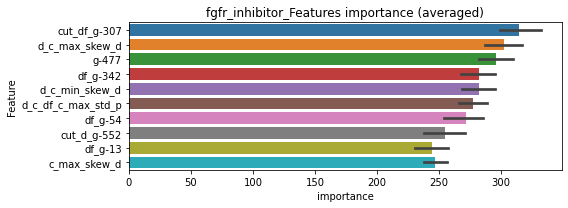

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282432	valid_1's binary_logloss: 0.0498707
[600]	training's binary_logloss: 0.00794049	valid_1's binary_logloss: 0.0230603
[900]	training's binary_logloss: 0.00400085	valid_1's binary_logloss: 0.016217
[1200]	training's binary_logloss: 0.00259441	valid_1's binary_logloss: 0.0135853
[1500]	training's binary_logloss: 0.00191384	valid_1's binary_logloss: 0.0121172
[1800]	training's binary_logloss: 0.00152445	valid_1's binary_logloss: 0.0110825
[2100]	training's binary_logloss: 0.00127728	valid_1's binary_logloss: 0.0103823
Early stopping, best iteration is:
[2166]	training's binary_logloss: 0.00123195	valid_1's binary_logloss: 0.0102114


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284398	valid_1's binary_logloss: 0.0513683
[600]	training's binary_logloss: 0.00796524	valid_1's binary_logloss: 0.0244538
[900]	training's binary_logloss: 0.00398564	valid_1's binary_logloss: 0.0172497
[1200]	training's binary_logloss: 0.00258897	valid_1's binary_logloss: 0.0144061
[1500]	training's binary_logloss: 0.00191607	valid_1's binary_logloss: 0.0130128
[1800]	training's binary_logloss: 0.00153058	valid_1's binary_logloss: 0.011899
[2100]	training's binary_logloss: 0.00128284	valid_1's binary_logloss: 0.0113256
[2400]	training's binary_logloss: 0.0011123	valid_1's binary_logloss: 0.0108966
[2700]	training's binary_logloss: 0.000986175	valid_1's binary_logloss: 0.0105403
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.000936217	valid_1's binary_logloss: 0.0103509


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285624	valid_1's binary_logloss: 0.0519446
[600]	training's binary_logloss: 0.0079354	valid_1's binary_logloss: 0.023992
[900]	training's binary_logloss: 0.00400153	valid_1's binary_logloss: 0.0174249
[1200]	training's binary_logloss: 0.00260852	valid_1's binary_logloss: 0.0145023
[1500]	training's binary_logloss: 0.00192189	valid_1's binary_logloss: 0.0128434
[1800]	training's binary_logloss: 0.00153367	valid_1's binary_logloss: 0.0117177
[2100]	training's binary_logloss: 0.00128534	valid_1's binary_logloss: 0.0111066
[2400]	training's binary_logloss: 0.00111247	valid_1's binary_logloss: 0.0105923
Early stopping, best iteration is:
[2547]	training's binary_logloss: 0.00104496	valid_1's binary_logloss: 0.0103511


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0289745	valid_1's binary_logloss: 0.0521268
[600]	training's binary_logloss: 0.00815887	valid_1's binary_logloss: 0.0237836
[900]	training's binary_logloss: 0.00407746	valid_1's binary_logloss: 0.0165407
[1200]	training's binary_logloss: 0.00265078	valid_1's binary_logloss: 0.0135119
[1500]	training's binary_logloss: 0.00195596	valid_1's binary_logloss: 0.0119354
[1800]	training's binary_logloss: 0.00155851	valid_1's binary_logloss: 0.0107894
[2100]	training's binary_logloss: 0.00130492	valid_1's binary_logloss: 0.00997922
[2400]	training's binary_logloss: 0.0011284	valid_1's binary_logloss: 0.00937072
[2700]	training's binary_logloss: 0.00100218	valid_1's binary_logloss: 0.00893118
[3000]	training's binary_logloss: 0.000907603	valid_1's binary_logloss: 0.00864031
[3300]	training's binary_logloss: 0.000831634	valid_1's binary_logloss: 0.00830322
Early stopping, best iteration is:
[3556]	trai

fgfr_inhibitor logloss: 0.009757354590428053


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258, target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0832442	valid_1's binary_logloss: 0.27191
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.038435	valid_1's binary_logloss: 0.254553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0795085	valid_1's binary_logloss: 0.26561
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.0303481	valid_1's binary_logloss: 0.248744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0856019	valid_1's binary_logloss: 0.271342
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.0359591	valid_1's binary_logloss: 0.254411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0904126	valid_1's binary_logloss: 0.24449
[600]	training's binary_logloss: 0.0251192	valid_1's binary_logloss: 0.209179
Early stopping, best iteration 

1 / 3 AUC score:0.895
y_Threshold: 0.0859731, Threshold: 0.7475037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 429 → Positive_corect_labels: 502/3480
p_label_rate: 0.0100452 Vs.target_rate: 0.01172, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7475037, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 502.0/3480, y_label_rate: 0.1442529
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0431475	valid_1's binary_logloss: 0.186008
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.0106864	valid_1's binary_logloss: 0.165343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454166	valid_1's binary_logloss: 0.174329
[600]	training's binary_logloss: 0.00890825	valid_1's binary_logloss: 0.154622
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.0101975	valid_1's binary_logloss: 0.1541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0481098	valid_1's binary_logloss: 0.14105
[600]	training's binary_logloss: 0.00988899	valid_1's binary_logloss: 0.0997946
[900]	training's binary_logloss: 0.00328231	valid_1's binary_logloss: 0.0907339
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.00269661	valid_1's binary_logloss: 0.0903589
Traini

2 / 3 AUC score:0.984
y_Threshold: 0.0679277, Threshold: 0.7475037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 451.0/3378
p_label_rate: 0.0180814 Vs.target_rate: 0.01172, Num_p_label: 72.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 72.0, Expected: 46.7, Adj_threshold_1: 0.7475037
Num_p_label: 67.0, Expected: 46.7, Adj_threshold_2: 0.7675037
threshold: 0.7675037, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 451.0/3378, y_label_rate: 0.1335110
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0364867	valid_1's binary_logloss: 0.146084
[600]	training's binary_logloss: 0.00671976	valid_1's binary_logloss: 0.117526
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00483499	valid_1's binary_logloss: 0.114658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0357632	valid_1's binary_logloss: 0.126573
[600]	training's binary_logloss: 0.00684205	valid_1's binary_logloss: 0.0979243
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00428142	valid_1's binary_logloss: 0.0945733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0364697	valid_1's binary_logloss: 0.118369
[600]	training's binary_logloss: 0.00686248	valid_1's binary_logloss: 0.0838031
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00265302	valid_1's binary_logloss: 0.0761515


3 / 3 AUC score:0.992
y_Threshold: 0.0588176, Threshold: 0.7675037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 419.0/3314
p_label_rate: 0.0223506 Vs.target_rate: 0.01172, Num_p_label: 89.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 89.0, Expected: 46.7, Adj_threshold_1: 0.7675037
Num_p_label: 87.0, Expected: 46.7, Adj_threshold_2: 0.7875037
threshold: 0.7875037, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 419.0/3314, y_label_rate: 0.1264333


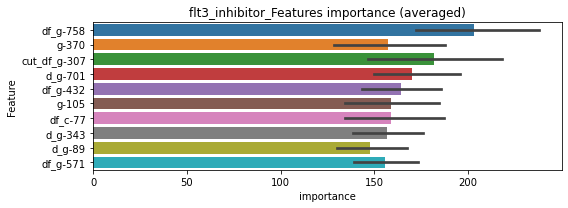

len(train_index) : 2485
len(valid_index) : 829
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0503769	valid_1's binary_logloss: 0.143503
[600]	training's binary_logloss: 0.0172327	valid_1's binary_logloss: 0.11045
[900]	training's binary_logloss: 0.00879143	valid_1's binary_logloss: 0.10073
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.00693998	valid_1's binary_logloss: 0.0988908


len(train_index) : 2485
len(valid_index) : 829
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0533497	valid_1's binary_logloss: 0.129662
[600]	training's binary_logloss: 0.0184293	valid_1's binary_logloss: 0.0931959
[900]	training's binary_logloss: 0.00943228	valid_1's binary_logloss: 0.0818047
[1200]	training's binary_logloss: 0.0059927	valid_1's binary_logloss: 0.0782165
Early stopping, best iteration is:
[1294]	training's binary_logloss: 0.00535126	valid_1's binary_logloss: 0.0773541


len(train_index) : 2486
len(valid_index) : 828
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0527117	valid_1's binary_logloss: 0.126339
[600]	training's binary_logloss: 0.0179852	valid_1's binary_logloss: 0.0903851
[900]	training's binary_logloss: 0.0092272	valid_1's binary_logloss: 0.0799584
[1200]	training's binary_logloss: 0.00586076	valid_1's binary_logloss: 0.0767107
Early stopping, best iteration is:
[1240]	training's binary_logloss: 0.00557353	valid_1's binary_logloss: 0.0761708


len(train_index) : 2486
len(valid_index) : 828
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0514789	valid_1's binary_logloss: 0.145129
[600]	training's binary_logloss: 0.0177575	valid_1's binary_logloss: 0.109373
[900]	training's binary_logloss: 0.00906864	valid_1's binary_logloss: 0.099755
[1200]	training's binary_logloss: 0.0058048	valid_1's binary_logloss: 0.0964799
Early stopping, best iteration is:
[1224]	training's binary_logloss: 0.00563274	valid_1's binary_logloss: 0.0960332


flt3_inhibitor logloss: 0.08711284981087562


neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453606	valid_1's binary_logloss: 0.00801262
[600]	training's binary_logloss: 0.000614235	valid_1's binary_logloss: 0.00169957
[900]	training's binary_logloss: 0.000364462	valid_1's binary_logloss: 0.00121763
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000359675	valid_1's binary_logloss: 0.00120821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443464	valid_1's binary_logloss: 0.00849384
[600]	training's binary_logloss: 0.000603657	valid_1's binary_logloss: 0.00210325
[900]	training's binary_logloss: 0.000355528	valid_1's binary_logloss: 0.00150834
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000351917	valid_1's binary_logloss: 0.00149697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462151	valid_1's binary_logloss: 0.00635746
[600]	traini

1 / 3 AUC score:1.000
y_Threshold: 0.0017598, Threshold: 0.0089079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00624, conf_1:0.01158
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089079
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0289079
threshold: 0.0289079, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408603	valid_1's binary_logloss: 0.00803948
[600]	training's binary_logloss: 0.000554957	valid_1's binary_logloss: 0.00197722
[900]	training's binary_logloss: 0.000335909	valid_1's binary_logloss: 0.00148199
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000332411	valid_1's binary_logloss: 0.0014718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414276	valid_1's binary_logloss: 0.00696312
[600]	training's binary_logloss: 0.000566211	valid_1's binary_logloss: 0.00145653
[900]	training's binary_logloss: 0.000338665	valid_1's binary_logloss: 0.00104012
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000337385	valid_1's binary_logloss: 0.00103899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423563	valid_1's binary_logloss: 0.00597572
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.1172912, Threshold: 0.0289079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.02313, conf_1:0.03469
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.0289079
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0489079
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.0689079
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.0889079
threshold: 0.0889079, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408603	valid_1's binary_logloss: 0.00803948
[600]	training's binary_logloss: 0.000554957	valid_1's binary_logloss: 0.00197722
[900]	training's binary_logloss: 0.000335909	valid_1's binary_logloss: 0.00148199
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000332411	valid_1's binary_logloss: 0.0014718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414276	valid_1's binary_logloss: 0.00696312
[600]	training's binary_logloss: 0.000566211	valid_1's binary_logloss: 0.00145653
[900]	training's binary_logloss: 0.000338665	valid_1's binary_logloss: 0.00104012
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000337385	valid_1's binary_logloss: 0.00103899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423563	valid_1's binary_logloss: 0.00597572
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.1172912, Threshold: 0.0889079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.08002, conf_1:0.09780
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0889079
threshold: 0.0889079, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


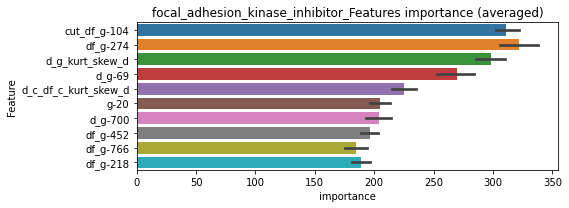

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109863	valid_1's binary_logloss: 0.0168923
[600]	training's binary_logloss: 0.00293553	valid_1's binary_logloss: 0.00605355
[900]	training's binary_logloss: 0.00157315	valid_1's binary_logloss: 0.00381971
[1200]	training's binary_logloss: 0.00107842	valid_1's binary_logloss: 0.00290415
[1500]	training's binary_logloss: 0.000832081	valid_1's binary_logloss: 0.00243605
[1800]	training's binary_logloss: 0.000688437	valid_1's binary_logloss: 0.00215361
[2100]	training's binary_logloss: 0.000593995	valid_1's binary_logloss: 0.00195931
[2400]	training's binary_logloss: 0.000528058	valid_1's binary_logloss: 0.00181194
[2700]	training's binary_logloss: 0.000479049	valid_1's binary_logloss: 0.0016887
[3000]	training's binary_logloss: 0.000442557	valid_1's binary_logloss: 0.00161353
[3300]	training's binary_logloss: 0.000413801	valid_1's binary_logloss: 0.00153606
[3600]	training's binary_logloss: 0.

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111637	valid_1's binary_logloss: 0.0150843
[600]	training's binary_logloss: 0.00298546	valid_1's binary_logloss: 0.00504731
[900]	training's binary_logloss: 0.00159653	valid_1's binary_logloss: 0.00309264
[1200]	training's binary_logloss: 0.00109011	valid_1's binary_logloss: 0.00230592
[1500]	training's binary_logloss: 0.000840928	valid_1's binary_logloss: 0.00189622
[1800]	training's binary_logloss: 0.000695	valid_1's binary_logloss: 0.00166372
[2100]	training's binary_logloss: 0.00059951	valid_1's binary_logloss: 0.00150078
[2400]	training's binary_logloss: 0.000531066	valid_1's binary_logloss: 0.00137739
[2700]	training's binary_logloss: 0.000482421	valid_1's binary_logloss: 0.00129059
[3000]	training's binary_logloss: 0.000443837	valid_1's binary_logloss: 0.00121466
[3300]	training's binary_logloss: 0.000415481	valid_1's binary_logloss: 0.00116315
[3600]	training's binary_logloss: 0.000

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113152	valid_1's binary_logloss: 0.014373
[600]	training's binary_logloss: 0.00302605	valid_1's binary_logloss: 0.00423827
[900]	training's binary_logloss: 0.0016184	valid_1's binary_logloss: 0.00241745
[1200]	training's binary_logloss: 0.00110642	valid_1's binary_logloss: 0.00172674
[1500]	training's binary_logloss: 0.000854872	valid_1's binary_logloss: 0.00137041
[1800]	training's binary_logloss: 0.000706538	valid_1's binary_logloss: 0.00116289
[2100]	training's binary_logloss: 0.000610761	valid_1's binary_logloss: 0.00102248
[2400]	training's binary_logloss: 0.000541575	valid_1's binary_logloss: 0.000921307
[2700]	training's binary_logloss: 0.00049073	valid_1's binary_logloss: 0.000849248
[3000]	training's binary_logloss: 0.000452789	valid_1's binary_logloss: 0.000793345
[3300]	training's binary_logloss: 0.000423708	valid_1's binary_logloss: 0.000750168
[3600]	training's binary_logloss: 

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112652	valid_1's binary_logloss: 0.0139
[600]	training's binary_logloss: 0.00301095	valid_1's binary_logloss: 0.00430274
[900]	training's binary_logloss: 0.00160386	valid_1's binary_logloss: 0.00249206
[1200]	training's binary_logloss: 0.00109802	valid_1's binary_logloss: 0.00180729
[1500]	training's binary_logloss: 0.000848927	valid_1's binary_logloss: 0.00145694
[1800]	training's binary_logloss: 0.000698911	valid_1's binary_logloss: 0.00124445
[2100]	training's binary_logloss: 0.000603449	valid_1's binary_logloss: 0.00110908
[2400]	training's binary_logloss: 0.000535237	valid_1's binary_logloss: 0.00100305
[2700]	training's binary_logloss: 0.000484493	valid_1's binary_logloss: 0.000926495
[3000]	training's binary_logloss: 0.000446896	valid_1's binary_logloss: 0.000869622
[3300]	training's binary_logloss: 0.00041821	valid_1's binary_logloss: 0.000824007
[3600]	training's binary_logloss: 0.

focal_adhesion_kinase_inhibitor logloss: 0.0009339389770202805


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485901	valid_1's binary_logloss: 0.00895296
[600]	training's binary_logloss: 0.000642219	valid_1's binary_logloss: 0.00197373
[900]	training's binary_logloss: 0.000370736	valid_1's binary_logloss: 0.00134984
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.00036558	valid_1's binary_logloss: 0.00134316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00499752	valid_1's binary_logloss: 0.00818149
[600]	training's binary_logloss: 0.000642399	valid_1's binary_logloss: 0.00156113
[900]	training's binary_logloss: 0.000367707	valid_1's binary_logloss: 0.000980051
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000362627	valid_1's binary_logloss: 0.000969682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509787	valid_1's binary_logloss: 0.00715955
[600]	train

1 / 3 AUC score:1.000
y_Threshold: 0.0022195, Threshold: 0.0089034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00623, conf_1:0.01157
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089034
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0289034
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0489034
threshold: 0.0489034, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452413	valid_1's binary_logloss: 0.00859041
[600]	training's binary_logloss: 0.000612386	valid_1's binary_logloss: 0.00194368
[900]	training's binary_logloss: 0.000358376	valid_1's binary_logloss: 0.00136781
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000355515	valid_1's binary_logloss: 0.00136194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004524	valid_1's binary_logloss: 0.00734726
[600]	training's binary_logloss: 0.000607379	valid_1's binary_logloss: 0.00145171
[900]	training's binary_logloss: 0.000358996	valid_1's binary_logloss: 0.000950435
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000355331	valid_1's binary_logloss: 0.000948431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461048	valid_1's binary_logloss: 0.00592662
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0679106, Threshold: 0.0489034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00076, Num_p_label: 17.0, conf_0:0.03912, conf_1:0.05868
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0489034
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0689034
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.0889034
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1089034
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.1289034
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.1489034
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_7: 0.1689034
threshold: 0.1689034, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452413	valid_1's binary_logloss: 0.00859041
[600]	training's binary_logloss: 0.000612386	valid_1's binary_logloss: 0.00194368
[900]	training's binary_logloss: 0.000358376	valid_1's binary_logloss: 0.00136781
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000355515	valid_1's binary_logloss: 0.00136194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004524	valid_1's binary_logloss: 0.00734726
[600]	training's binary_logloss: 0.000607379	valid_1's binary_logloss: 0.00145171
[900]	training's binary_logloss: 0.000358996	valid_1's binary_logloss: 0.000950435
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000355331	valid_1's binary_logloss: 0.000948431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461048	valid_1's binary_logloss: 0.00592662
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0679106, Threshold: 0.1689034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076, Num_p_label: 5.0, conf_0:0.15201, conf_1:0.18579
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1689034
threshold: 0.1689034, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


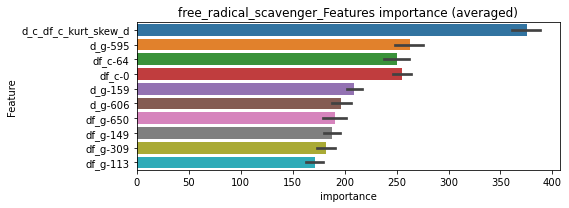

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119705	valid_1's binary_logloss: 0.0167914
[600]	training's binary_logloss: 0.0031799	valid_1's binary_logloss: 0.00556117
[900]	training's binary_logloss: 0.0016841	valid_1's binary_logloss: 0.00331727
[1200]	training's binary_logloss: 0.00114718	valid_1's binary_logloss: 0.00245431
[1500]	training's binary_logloss: 0.000883187	valid_1's binary_logloss: 0.00199945
[1800]	training's binary_logloss: 0.00072718	valid_1's binary_logloss: 0.00172495
[2100]	training's binary_logloss: 0.000624613	valid_1's binary_logloss: 0.00153992
[2400]	training's binary_logloss: 0.000553721	valid_1's binary_logloss: 0.00140419
[2700]	training's binary_logloss: 0.000500704	valid_1's binary_logloss: 0.00130318
[3000]	training's binary_logloss: 0.000461899	valid_1's binary_logloss: 0.00122946
[3300]	training's binary_logloss: 0.000431613	valid_1's binary_logloss: 0.00116869
[3600]	training's binary_logloss: 0.00

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119549	valid_1's binary_logloss: 0.0163856
[600]	training's binary_logloss: 0.00314943	valid_1's binary_logloss: 0.00520122
[900]	training's binary_logloss: 0.00167657	valid_1's binary_logloss: 0.0030071
[1200]	training's binary_logloss: 0.00114381	valid_1's binary_logloss: 0.00216978
[1500]	training's binary_logloss: 0.000879775	valid_1's binary_logloss: 0.0017367
[1800]	training's binary_logloss: 0.000726606	valid_1's binary_logloss: 0.00148569
[2100]	training's binary_logloss: 0.0006244	valid_1's binary_logloss: 0.00131029
[2400]	training's binary_logloss: 0.000552315	valid_1's binary_logloss: 0.00118249
[2700]	training's binary_logloss: 0.000498494	valid_1's binary_logloss: 0.00108529
[3000]	training's binary_logloss: 0.000459697	valid_1's binary_logloss: 0.00101834
[3300]	training's binary_logloss: 0.000430004	valid_1's binary_logloss: 0.000963742
[3600]	training's binary_logloss: 0.00

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122005	valid_1's binary_logloss: 0.0144254
[600]	training's binary_logloss: 0.00322108	valid_1's binary_logloss: 0.00419656
[900]	training's binary_logloss: 0.00169883	valid_1's binary_logloss: 0.00235093
[1200]	training's binary_logloss: 0.00115331	valid_1's binary_logloss: 0.00167399
[1500]	training's binary_logloss: 0.000887772	valid_1's binary_logloss: 0.0013308
[1800]	training's binary_logloss: 0.00072783	valid_1's binary_logloss: 0.00111989
[2100]	training's binary_logloss: 0.000626441	valid_1's binary_logloss: 0.000982426
[2400]	training's binary_logloss: 0.000554557	valid_1's binary_logloss: 0.000883644
[2700]	training's binary_logloss: 0.000500015	valid_1's binary_logloss: 0.000807702
[3000]	training's binary_logloss: 0.00046076	valid_1's binary_logloss: 0.0007538
[3300]	training's binary_logloss: 0.0004307	valid_1's binary_logloss: 0.000711405
[3600]	training's binary_logloss: 0.0

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119704	valid_1's binary_logloss: 0.017066
[600]	training's binary_logloss: 0.00318196	valid_1's binary_logloss: 0.00605646
[900]	training's binary_logloss: 0.00169201	valid_1's binary_logloss: 0.00391316
[1200]	training's binary_logloss: 0.00115285	valid_1's binary_logloss: 0.00302644
[1500]	training's binary_logloss: 0.000886025	valid_1's binary_logloss: 0.00256174
[1800]	training's binary_logloss: 0.000729376	valid_1's binary_logloss: 0.00224983
[2100]	training's binary_logloss: 0.000626612	valid_1's binary_logloss: 0.00205545
[2400]	training's binary_logloss: 0.000555518	valid_1's binary_logloss: 0.00191843
[2700]	training's binary_logloss: 0.000502559	valid_1's binary_logloss: 0.00180471
[3000]	training's binary_logloss: 0.000462758	valid_1's binary_logloss: 0.0017219
[3300]	training's binary_logloss: 0.000432568	valid_1's binary_logloss: 0.00165889
[3600]	training's binary_logloss: 0.0

free_radical_scavenger logloss: 0.0010135809781976898


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675269	valid_1's binary_logloss: 0.0108769
[600]	training's binary_logloss: 0.000817563	valid_1's binary_logloss: 0.0021787
[900]	training's binary_logloss: 0.000435266	valid_1's binary_logloss: 0.00144366
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000420907	valid_1's binary_logloss: 0.00141356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639385	valid_1's binary_logloss: 0.0201791
[600]	training's binary_logloss: 0.00076692	valid_1's binary_logloss: 0.00900341
[900]	training's binary_logloss: 0.000417704	valid_1's binary_logloss: 0.00799516
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000423742	valid_1's binary_logloss: 0.00796929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690852	valid_1's binary_logloss: 0.00980179
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0027369, Threshold: 0.0091989, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.00644, conf_1:0.01196
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0091989
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_2: 0.0291989
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_3: 0.0491989
threshold: 0.0491989, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625172	valid_1's binary_logloss: 0.0111516
[600]	training's binary_logloss: 0.000784918	valid_1's binary_logloss: 0.00209435
[900]	training's binary_logloss: 0.000420675	valid_1's binary_logloss: 0.00133082
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000411212	valid_1's binary_logloss: 0.00131546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588123	valid_1's binary_logloss: 0.0183625
[600]	training's binary_logloss: 0.000739495	valid_1's binary_logloss: 0.00824668
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000428623	valid_1's binary_logloss: 0.00706651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061956	valid_1's binary_logloss: 0.0087142
[600]	training's binary_logloss: 0.00079453	valid_1's binary_logloss: 0.00151575
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0325541, Threshold: 0.0491989, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0047715 Vs.target_rate: 0.00097, Num_p_label: 19.0, conf_0:0.03936, conf_1:0.05904
Num_p_label: 19.0, Expected: 3.8, Adj_threshold_1: 0.0491989
Num_p_label: 14.0, Expected: 3.8, Adj_threshold_2: 0.0691989
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_3: 0.0891989
threshold: 0.0891989, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625172	valid_1's binary_logloss: 0.0111516
[600]	training's binary_logloss: 0.000784918	valid_1's binary_logloss: 0.00209435
[900]	training's binary_logloss: 0.000420675	valid_1's binary_logloss: 0.00133082
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000411212	valid_1's binary_logloss: 0.00131546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588123	valid_1's binary_logloss: 0.0183625
[600]	training's binary_logloss: 0.000739495	valid_1's binary_logloss: 0.00824668
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000428623	valid_1's binary_logloss: 0.00706651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061956	valid_1's binary_logloss: 0.0087142
[600]	training's binary_logloss: 0.00079453	valid_1's binary_logloss: 0.00151575
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0325541, Threshold: 0.0891989, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00097, Num_p_label: 9.0, conf_0:0.08028, conf_1:0.09812
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0891989
threshold: 0.0891989, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


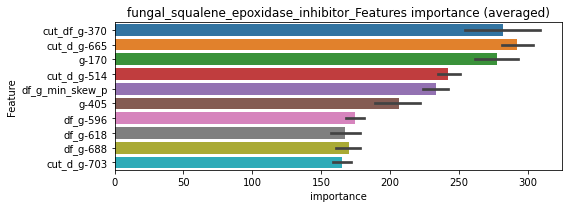

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148228	valid_1's binary_logloss: 0.0217978
[600]	training's binary_logloss: 0.00383397	valid_1's binary_logloss: 0.00690012
[900]	training's binary_logloss: 0.00199938	valid_1's binary_logloss: 0.00408678
[1200]	training's binary_logloss: 0.00134693	valid_1's binary_logloss: 0.00299111
[1500]	training's binary_logloss: 0.00102688	valid_1's binary_logloss: 0.00240742
[1800]	training's binary_logloss: 0.000839189	valid_1's binary_logloss: 0.00206453
[2100]	training's binary_logloss: 0.000717776	valid_1's binary_logloss: 0.00184516
[2400]	training's binary_logloss: 0.000632543	valid_1's binary_logloss: 0.00168594
[2700]	training's binary_logloss: 0.00057144	valid_1's binary_logloss: 0.00157198
[3000]	training's binary_logloss: 0.000525483	valid_1's binary_logloss: 0.00148302
[3300]	training's binary_logloss: 0.00049096	valid_1's binary_logloss: 0.00141631
[3600]	training's binary_logloss: 0.00

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144164	valid_1's binary_logloss: 0.0291714
[600]	training's binary_logloss: 0.00369926	valid_1's binary_logloss: 0.0136262
[900]	training's binary_logloss: 0.00194258	valid_1's binary_logloss: 0.0102896
[1200]	training's binary_logloss: 0.00131082	valid_1's binary_logloss: 0.00871405
[1500]	training's binary_logloss: 0.00100432	valid_1's binary_logloss: 0.00798445
[1800]	training's binary_logloss: 0.000821918	valid_1's binary_logloss: 0.00742516
[2100]	training's binary_logloss: 0.000704911	valid_1's binary_logloss: 0.00708141
[2400]	training's binary_logloss: 0.000623758	valid_1's binary_logloss: 0.0068218
[2700]	training's binary_logloss: 0.000563933	valid_1's binary_logloss: 0.00657074
[3000]	training's binary_logloss: 0.000520076	valid_1's binary_logloss: 0.0064034
[3300]	training's binary_logloss: 0.000486236	valid_1's binary_logloss: 0.00625799
Early stopping, best iteration is:
[3470

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147723	valid_1's binary_logloss: 0.0193355
[600]	training's binary_logloss: 0.0038702	valid_1's binary_logloss: 0.0059138
[900]	training's binary_logloss: 0.00202017	valid_1's binary_logloss: 0.00336696
[1200]	training's binary_logloss: 0.00135659	valid_1's binary_logloss: 0.00239656
[1500]	training's binary_logloss: 0.00103591	valid_1's binary_logloss: 0.00191546
[1800]	training's binary_logloss: 0.000847566	valid_1's binary_logloss: 0.00162128
[2100]	training's binary_logloss: 0.000724799	valid_1's binary_logloss: 0.001424
[2400]	training's binary_logloss: 0.000639385	valid_1's binary_logloss: 0.00128482
[2700]	training's binary_logloss: 0.000577141	valid_1's binary_logloss: 0.00118458
[3000]	training's binary_logloss: 0.000530549	valid_1's binary_logloss: 0.00110679
[3300]	training's binary_logloss: 0.000494329	valid_1's binary_logloss: 0.0010464
[3600]	training's binary_logloss: 0.00046

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149169	valid_1's binary_logloss: 0.022156
[600]	training's binary_logloss: 0.00388826	valid_1's binary_logloss: 0.00772964
[900]	training's binary_logloss: 0.00201174	valid_1's binary_logloss: 0.00470059
[1200]	training's binary_logloss: 0.00135634	valid_1's binary_logloss: 0.00367465
[1500]	training's binary_logloss: 0.00102974	valid_1's binary_logloss: 0.00296203
[1800]	training's binary_logloss: 0.000841722	valid_1's binary_logloss: 0.00263698
[2100]	training's binary_logloss: 0.000718062	valid_1's binary_logloss: 0.00235485
[2400]	training's binary_logloss: 0.000633293	valid_1's binary_logloss: 0.00216433
[2700]	training's binary_logloss: 0.000571514	valid_1's binary_logloss: 0.00203349
[3000]	training's binary_logloss: 0.000524278	valid_1's binary_logloss: 0.00189027
[3300]	training's binary_logloss: 0.000489901	valid_1's binary_logloss: 0.00183729
[3600]	training's binary_logloss: 0.0

fungal_squalene_epoxidase_inhibitor logloss: 0.002538332545760512


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303132	valid_1's binary_logloss: 0.119736
[600]	training's binary_logloss: 0.00501041	valid_1's binary_logloss: 0.0934666
[900]	training's binary_logloss: 0.00175482	valid_1's binary_logloss: 0.0887366
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00168303	valid_1's binary_logloss: 0.0885108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319885	valid_1's binary_logloss: 0.0868722
[600]	training's binary_logloss: 0.00555633	valid_1's binary_logloss: 0.0554825
[900]	training's binary_logloss: 0.00189823	valid_1's binary_logloss: 0.049945
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.00138695	valid_1's binary_logloss: 0.0489965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.033486	valid_1's binary_logloss: 0.0791212
[600]	training's binary_logloss:

1 / 3 AUC score:0.996
y_Threshold: 0.0161499, Threshold: 0.1012079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 639/3764
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.07085, conf_1:0.13157
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1012079
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.1212079
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_3: 0.1412079
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_4: 0.1612079
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_5: 0.1812079
threshold: 0.1812079, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 639.0/3764, y_label_rate: 0.1697662
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025825	valid_1's binary_logloss: 0.10297
[600]	training's binary_logloss: 0.00411674	valid_1's binary_logloss: 0.0801912
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.00228059	valid_1's binary_logloss: 0.0774724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274585	valid_1's binary_logloss: 0.0883129
[600]	training's binary_logloss: 0.00441087	valid_1's binary_logloss: 0.060901
[900]	training's binary_logloss: 0.00158984	valid_1's binary_logloss: 0.0569014
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.00159772	valid_1's binary_logloss: 0.0568617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0297837	valid_1's binary_logloss: 0.072995
[600]	training's binary_logloss: 0.00493093	valid_1's binary_logloss: 0.0406506
[900]	training's binary_logloss: 0.

2 / 3 AUC score:0.997
y_Threshold: 0.0393038, Threshold: 0.1812079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 621.0/3728
p_label_rate: 0.0163235 Vs.target_rate: 0.00445, Num_p_label: 65.0, conf_0:0.14497, conf_1:0.21745
Num_p_label: 65.0, Expected: 17.7, Adj_threshold_1: 0.1812079
Num_p_label: 65.0, Expected: 17.7, Adj_threshold_2: 0.2012079
Num_p_label: 59.0, Expected: 17.7, Adj_threshold_3: 0.2212079
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_4: 0.2412079
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_5: 0.2612079
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_6: 0.2812079
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_7: 0.3012079
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_8: 0.3212079
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_9: 0.3412079
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_10: 0.3612079
threshold: 0.3812079, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 621.0/3728, y_label_rate: 0.1665773

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236605	valid_1's binary_logloss: 0.0886394
[600]	training's binary_logloss: 0.00363891	valid_1's binary_logloss: 0.0620447
[900]	training's binary_logloss: 0.00137276	valid_1's binary_logloss: 0.0557779
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.00140364	valid_1's binary_logloss: 0.0557104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242206	valid_1's binary_logloss: 0.0706187
[600]	training's binary_logloss: 0.00376904	valid_1's binary_logloss: 0.0417295
[900]	training's binary_logloss: 0.00140275	valid_1's binary_logloss: 0.0369643
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00132985	valid_1's binary_logloss: 0.0367303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0247283	valid_1's binary_logloss: 0.0738267
[600]	training's binary_loglos

3 / 3 AUC score:0.999
y_Threshold: 0.0398853, Threshold: 0.3812079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0113009 Vs.target_rate: 0.00445, Num_p_label: 45.0, conf_0:0.34309, conf_1:0.41933
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_1: 0.3812079
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_2: 0.4012079
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_3: 0.4212079
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_4: 0.4412079
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_5: 0.4612079
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_6: 0.4812079
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_7: 0.5012079
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_8: 0.5212079
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_9: 0.5412079
threshold: 0.5412079, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 613.0/3712, y_label_rate: 0.1651401


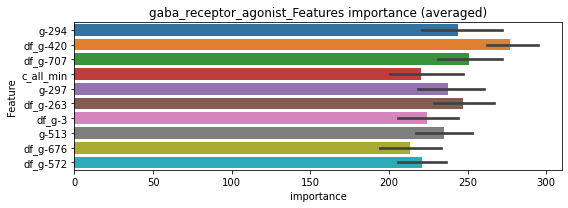

len(train_index) : 2784
len(valid_index) : 928
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0430291	valid_1's binary_logloss: 0.0830599
[600]	training's binary_logloss: 0.0131751	valid_1's binary_logloss: 0.0459263
[900]	training's binary_logloss: 0.0065485	valid_1's binary_logloss: 0.0352473
[1200]	training's binary_logloss: 0.00416675	valid_1's binary_logloss: 0.0309389
[1500]	training's binary_logloss: 0.00301044	valid_1's binary_logloss: 0.0284766
[1800]	training's binary_logloss: 0.00236352	valid_1's binary_logloss: 0.0270047
[2100]	training's binary_logloss: 0.00194355	valid_1's binary_logloss: 0.025996
[2400]	training's binary_logloss: 0.00165878	valid_1's binary_logloss: 0.0251701
[2700]	training's binary_logloss: 0.00145211	valid_1's binary_logloss: 0.0247454
Early stopping, best iteration is:
[2685]	training's binary_logloss: 0.0014607	valid_1's binary_logloss: 0.0247003


len(train_index) : 2784
len(valid_index) : 928
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0414274	valid_1's binary_logloss: 0.0867573
[600]	training's binary_logloss: 0.0126852	valid_1's binary_logloss: 0.0506288
[900]	training's binary_logloss: 0.00640137	valid_1's binary_logloss: 0.0413212
[1200]	training's binary_logloss: 0.00408973	valid_1's binary_logloss: 0.0369429
[1500]	training's binary_logloss: 0.00295546	valid_1's binary_logloss: 0.0349455
Early stopping, best iteration is:
[1492]	training's binary_logloss: 0.00297783	valid_1's binary_logloss: 0.0348576


len(train_index) : 2784
len(valid_index) : 928
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.04218	valid_1's binary_logloss: 0.0829276
[600]	training's binary_logloss: 0.0130344	valid_1's binary_logloss: 0.0471867
[900]	training's binary_logloss: 0.00653786	valid_1's binary_logloss: 0.037264
[1200]	training's binary_logloss: 0.00414527	valid_1's binary_logloss: 0.0332185
[1500]	training's binary_logloss: 0.00299211	valid_1's binary_logloss: 0.0306405
[1800]	training's binary_logloss: 0.00234806	valid_1's binary_logloss: 0.0292602
[2100]	training's binary_logloss: 0.00193509	valid_1's binary_logloss: 0.0282227
Early stopping, best iteration is:
[2174]	training's binary_logloss: 0.00185404	valid_1's binary_logloss: 0.0278141


len(train_index) : 2784
len(valid_index) : 928
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426805	valid_1's binary_logloss: 0.0820659
[600]	training's binary_logloss: 0.013018	valid_1's binary_logloss: 0.048723
[900]	training's binary_logloss: 0.00651778	valid_1's binary_logloss: 0.0399489
[1200]	training's binary_logloss: 0.00412394	valid_1's binary_logloss: 0.0366513
[1500]	training's binary_logloss: 0.00297005	valid_1's binary_logloss: 0.0349287
Early stopping, best iteration is:
[1533]	training's binary_logloss: 0.00288184	valid_1's binary_logloss: 0.034729


gaba_receptor_agonist logloss: 0.03052523249565991


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266, target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472869	valid_1's binary_logloss: 0.155652
[600]	training's binary_logloss: 0.0101496	valid_1's binary_logloss: 0.128342
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00578562	valid_1's binary_logloss: 0.124291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0453396	valid_1's binary_logloss: 0.148807
[600]	training's binary_logloss: 0.00949911	valid_1's binary_logloss: 0.117332
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00402774	valid_1's binary_logloss: 0.112573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0478246	valid_1's binary_logloss: 0.153693
[600]	training's binary_logloss: 0.0102421	valid_1's binary_logloss: 0.124246
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00631746	valid_1's binary_logloss: 0.119819
Traini

1 / 3 AUC score:0.980
y_Threshold: 0.0336672, Threshold: 0.1157558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 221 → Positive_corect_labels: 608/3698
p_label_rate: 0.0100452 Vs.target_rate: 0.00693, Num_p_label: 40.0, conf_0:0.08103, conf_1:0.15048
threshold: 0.1157558, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 608.0/3698, y_label_rate: 0.1644132
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0360886	valid_1's binary_logloss: 0.119229
[600]	training's binary_logloss: 0.00669712	valid_1's binary_logloss: 0.0817177
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00297593	valid_1's binary_logloss: 0.0743839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0353286	valid_1's binary_logloss: 0.126823
[600]	training's binary_logloss: 0.00659073	valid_1's binary_logloss: 0.092696
[900]	training's binary_logloss: 0.0022943	valid_1's binary_logloss: 0.0864531
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.0020499	valid_1's binary_logloss: 0.0859307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0382813	valid_1's binary_logloss: 0.107184
[600]	training's binary_logloss: 0.00717879	valid_1's binary_logloss: 0.07066
[900]	training's binary_logloss: 0.002

2 / 3 AUC score:0.998
y_Threshold: 0.0604492, Threshold: 0.1157558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 591.0/3664
p_label_rate: 0.0143144 Vs.target_rate: 0.00693, Num_p_label: 57.0, conf_0:0.09260, conf_1:0.13891
Num_p_label: 57.0, Expected: 27.6, Adj_threshold_1: 0.1157558
Num_p_label: 48.0, Expected: 27.6, Adj_threshold_2: 0.1357558
Num_p_label: 41.0, Expected: 27.6, Adj_threshold_3: 0.1557558
threshold: 0.1557558, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 591.0/3664, y_label_rate: 0.1612991
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0347423	valid_1's binary_logloss: 0.111932
[600]	training's binary_logloss: 0.0061916	valid_1's binary_logloss: 0.078426
[900]	training's binary_logloss: 0.00215533	valid_1's binary_logloss: 0.0706476
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.0019732	valid_1's binary_logloss: 0.0703334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0329394	valid_1's binary_logloss: 0.12304
[600]	training's binary_logloss: 0.00599561	valid_1's binary_logloss: 0.0935242
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00330592	valid_1's binary_logloss: 0.0907686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0338898	valid_1's binary_logloss: 0.104008
[600]	training's binary_logloss: 0.00606617	valid_1's binary_logloss: 0.0714978
Early stopping, best iteration is:
[8

3 / 3 AUC score:0.995
y_Threshold: 0.0451730, Threshold: 0.1557558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 571.0/3624
p_label_rate: 0.0110497 Vs.target_rate: 0.00693, Num_p_label: 44.0, conf_0:0.14018, conf_1:0.17133
Num_p_label: 44.0, Expected: 27.6, Adj_threshold_1: 0.1557558
Num_p_label: 40.0, Expected: 27.6, Adj_threshold_2: 0.1757558
threshold: 0.1757558, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 571.0/3624, y_label_rate: 0.1575607


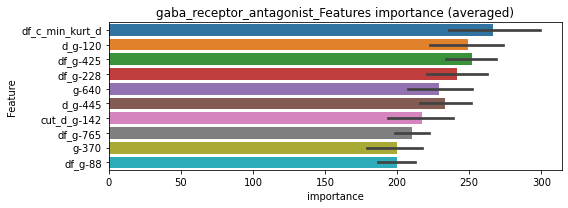

len(train_index) : 2718
len(valid_index) : 906
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0520774	valid_1's binary_logloss: 0.124112
[600]	training's binary_logloss: 0.0172548	valid_1's binary_logloss: 0.0856458
[900]	training's binary_logloss: 0.00865789	valid_1's binary_logloss: 0.0745764
[1200]	training's binary_logloss: 0.00545431	valid_1's binary_logloss: 0.0697924
Early stopping, best iteration is:
[1426]	training's binary_logloss: 0.00420102	valid_1's binary_logloss: 0.0676228


len(train_index) : 2718
len(valid_index) : 906
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0522273	valid_1's binary_logloss: 0.125244
[600]	training's binary_logloss: 0.0171084	valid_1's binary_logloss: 0.0864319
[900]	training's binary_logloss: 0.0086234	valid_1's binary_logloss: 0.0744775
Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.00582828	valid_1's binary_logloss: 0.0696778


len(train_index) : 2718
len(valid_index) : 906
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0541912	valid_1's binary_logloss: 0.124287
[600]	training's binary_logloss: 0.0178081	valid_1's binary_logloss: 0.0846666
[900]	training's binary_logloss: 0.0089784	valid_1's binary_logloss: 0.0729278
[1200]	training's binary_logloss: 0.00563761	valid_1's binary_logloss: 0.068607
[1500]	training's binary_logloss: 0.00403039	valid_1's binary_logloss: 0.0660837
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.0039579	valid_1's binary_logloss: 0.0658016


len(train_index) : 2718
len(valid_index) : 906
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0533071	valid_1's binary_logloss: 0.123399
[600]	training's binary_logloss: 0.0176049	valid_1's binary_logloss: 0.0868449
[900]	training's binary_logloss: 0.0088445	valid_1's binary_logloss: 0.0776533
Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.00598194	valid_1's binary_logloss: 0.0744844


gaba_receptor_antagonist logloss: 0.06939665826948216


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150463	valid_1's binary_logloss: 0.054296
[600]	training's binary_logloss: 0.00210008	valid_1's binary_logloss: 0.0349625
[900]	training's binary_logloss: 0.000857976	valid_1's binary_logloss: 0.0320442
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000821865	valid_1's binary_logloss: 0.0319618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159111	valid_1's binary_logloss: 0.0426839
[600]	training's binary_logloss: 0.00225898	valid_1's binary_logloss: 0.0206063
[900]	training's binary_logloss: 0.000901712	valid_1's binary_logloss: 0.0175512
[1200]	training's binary_logloss: 0.000636692	valid_1's binary_logloss: 0.016897
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.000648705	valid_1's binary_logloss: 0.016813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0059144, Threshold: 0.0182478, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.01277, conf_1:0.02372
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0182478
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_2: 0.0382478
threshold: 0.0382478, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148146	valid_1's binary_logloss: 0.0503224
[600]	training's binary_logloss: 0.00201817	valid_1's binary_logloss: 0.0306804
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000942267	valid_1's binary_logloss: 0.0286511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156838	valid_1's binary_logloss: 0.0414227
[600]	training's binary_logloss: 0.00219033	valid_1's binary_logloss: 0.0189314
[900]	training's binary_logloss: 0.000881049	valid_1's binary_logloss: 0.015074
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000783168	valid_1's binary_logloss: 0.0148765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162296	valid_1's binary_logloss: 0.0277641
[600]	training's binary_logloss: 0.00220388	valid_1's binary_logloss: 0.00741905
[900]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0265049, Threshold: 0.0382478, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0102963 Vs.target_rate: 0.00235, Num_p_label: 41.0, conf_0:0.03060, conf_1:0.04590
Num_p_label: 41.0, Expected: 9.4, Adj_threshold_1: 0.0382478
Num_p_label: 30.0, Expected: 9.4, Adj_threshold_2: 0.0582478
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_3: 0.0782478
threshold: 0.0782478, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140292	valid_1's binary_logloss: 0.0491804
[600]	training's binary_logloss: 0.00202377	valid_1's binary_logloss: 0.031287
[900]	training's binary_logloss: 0.000838222	valid_1's binary_logloss: 0.0278765
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000736739	valid_1's binary_logloss: 0.0274552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146656	valid_1's binary_logloss: 0.0373318
[600]	training's binary_logloss: 0.00203796	valid_1's binary_logloss: 0.0165091
[900]	training's binary_logloss: 0.000848153	valid_1's binary_logloss: 0.0122865
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000695325	valid_1's binary_logloss: 0.0116851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151762	valid_1's binary_logloss: 0.0383188
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0206279, Threshold: 0.0782478, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0042692 Vs.target_rate: 0.00235, Num_p_label: 17.0, conf_0:0.07042, conf_1:0.08607
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_1: 0.0782478
threshold: 0.0782478, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


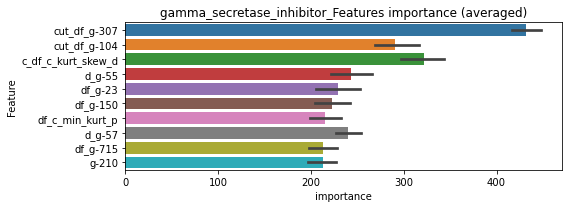

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286944	valid_1's binary_logloss: 0.050577
[600]	training's binary_logloss: 0.00830346	valid_1's binary_logloss: 0.0253558
[900]	training's binary_logloss: 0.00420172	valid_1's binary_logloss: 0.0187177
[1200]	training's binary_logloss: 0.00271452	valid_1's binary_logloss: 0.016036
[1500]	training's binary_logloss: 0.00199698	valid_1's binary_logloss: 0.0146083
[1800]	training's binary_logloss: 0.00158775	valid_1's binary_logloss: 0.0136761
[2100]	training's binary_logloss: 0.00132386	valid_1's binary_logloss: 0.0129558
[2400]	training's binary_logloss: 0.00114358	valid_1's binary_logloss: 0.0124892
[2700]	training's binary_logloss: 0.00101331	valid_1's binary_logloss: 0.0120511
Early stopping, best iteration is:
[2756]	training's binary_logloss: 0.000992954	valid_1's binary_logloss: 0.0119775


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286798	valid_1's binary_logloss: 0.0578785
[600]	training's binary_logloss: 0.00833178	valid_1's binary_logloss: 0.0322079
[900]	training's binary_logloss: 0.00422558	valid_1's binary_logloss: 0.0258273
[1200]	training's binary_logloss: 0.0027333	valid_1's binary_logloss: 0.0228193
Early stopping, best iteration is:
[1411]	training's binary_logloss: 0.0021775	valid_1's binary_logloss: 0.0215215


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290139	valid_1's binary_logloss: 0.0558977
[600]	training's binary_logloss: 0.00839311	valid_1's binary_logloss: 0.0314538
[900]	training's binary_logloss: 0.00424536	valid_1's binary_logloss: 0.0252112
[1200]	training's binary_logloss: 0.00274506	valid_1's binary_logloss: 0.0227149
[1500]	training's binary_logloss: 0.00202653	valid_1's binary_logloss: 0.0213438
[1800]	training's binary_logloss: 0.00160896	valid_1's binary_logloss: 0.0205283
Early stopping, best iteration is:
[1935]	training's binary_logloss: 0.00147725	valid_1's binary_logloss: 0.0203014


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0281354	valid_1's binary_logloss: 0.0558675
[600]	training's binary_logloss: 0.00817727	valid_1's binary_logloss: 0.0336742
[900]	training's binary_logloss: 0.00415557	valid_1's binary_logloss: 0.0275927
[1200]	training's binary_logloss: 0.00270156	valid_1's binary_logloss: 0.0252053
Early stopping, best iteration is:
[1238]	training's binary_logloss: 0.00258338	valid_1's binary_logloss: 0.024824


gamma_secretase_inhibitor logloss: 0.019656120305518405


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248, target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0889009	valid_1's binary_logloss: 0.257239
[600]	training's binary_logloss: 0.0259473	valid_1's binary_logloss: 0.225703
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.02578	valid_1's binary_logloss: 0.22563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.080094	valid_1's binary_logloss: 0.259624
[600]	training's binary_logloss: 0.0223334	valid_1's binary_logloss: 0.238896
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.0238838	valid_1's binary_logloss: 0.238486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.086121	valid_1's binary_logloss: 0.228972
[600]	training's binary_logloss: 0.0243083	valid_1's binary_logloss: 0.188312
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.0140082	valid_1's binary_logloss: 0.1833
Training until va

1 / 3 AUC score:0.918
y_Threshold: 0.0881087, Threshold: 0.3079764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 381 → Positive_corect_labels: 524/3516
p_label_rate: 0.0100452 Vs.target_rate: 0.01117, Num_p_label: 40.0, conf_0:0.21558, conf_1:0.40037
threshold: 0.3079764, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 524.0/3516, y_label_rate: 0.1490330
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0513743	valid_1's binary_logloss: 0.153738
[600]	training's binary_logloss: 0.010981	valid_1's binary_logloss: 0.107
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00411415	valid_1's binary_logloss: 0.0956345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489489	valid_1's binary_logloss: 0.170998
[600]	training's binary_logloss: 0.0106761	valid_1's binary_logloss: 0.130928
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00466682	valid_1's binary_logloss: 0.123232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489548	valid_1's binary_logloss: 0.165027
[600]	training's binary_logloss: 0.0106815	valid_1's binary_logloss: 0.124692
[900]	training's binary_logloss: 0.00351385	valid_1's binary_logloss: 0.117283
Early stopping, best iteration is:
[928]	trai

2 / 3 AUC score:0.989
y_Threshold: 0.0703336, Threshold: 0.3079764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 482.0/3432
p_label_rate: 0.0218483 Vs.target_rate: 0.01117, Num_p_label: 87.0, conf_0:0.24638, conf_1:0.36957
Num_p_label: 87.0, Expected: 44.5, Adj_threshold_1: 0.3079764
Num_p_label: 76.0, Expected: 44.5, Adj_threshold_2: 0.3279764
Num_p_label: 75.0, Expected: 44.5, Adj_threshold_3: 0.3479764
Num_p_label: 72.0, Expected: 44.5, Adj_threshold_4: 0.3679764
Num_p_label: 67.0, Expected: 44.5, Adj_threshold_5: 0.3879764
Num_p_label: 59.0, Expected: 44.5, Adj_threshold_6: 0.4079764
threshold: 0.4079764, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 482.0/3432, y_label_rate: 0.1404429
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0405062	valid_1's binary_logloss: 0.149134
[600]	training's binary_logloss: 0.00800617	valid_1's binary_logloss: 0.110929
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00452812	valid_1's binary_logloss: 0.105621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0435117	valid_1's binary_logloss: 0.127101
[600]	training's binary_logloss: 0.00878904	valid_1's binary_logloss: 0.0850334
[900]	training's binary_logloss: 0.00295794	valid_1's binary_logloss: 0.0738763
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.00233363	valid_1's binary_logloss: 0.0730242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0429352	valid_1's binary_logloss: 0.129943
[600]	training's binary_logloss: 0.00873953	valid_1's binary_logloss: 0.0846149
[900]	training's binary_logloss: 0

3 / 3 AUC score:0.991
y_Threshold: 0.0655593, Threshold: 0.4079764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 455.0/3378
p_label_rate: 0.0165746 Vs.target_rate: 0.01117, Num_p_label: 66.0, conf_0:0.36718, conf_1:0.44877
threshold: 0.4079764, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 455.0/3378, y_label_rate: 0.1346951


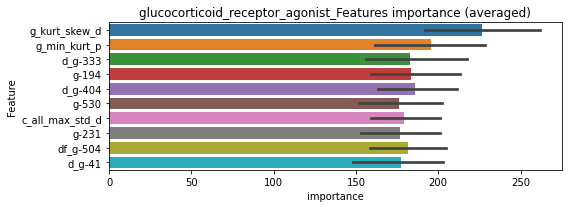

len(train_index) : 2533
len(valid_index) : 845
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0593819	valid_1's binary_logloss: 0.16099
[600]	training's binary_logloss: 0.0205929	valid_1's binary_logloss: 0.122128
[900]	training's binary_logloss: 0.0105675	valid_1's binary_logloss: 0.109486
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.00758088	valid_1's binary_logloss: 0.105494


len(train_index) : 2533
len(valid_index) : 845
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0597734	valid_1's binary_logloss: 0.156386
[600]	training's binary_logloss: 0.0211187	valid_1's binary_logloss: 0.110038
[900]	training's binary_logloss: 0.0108778	valid_1's binary_logloss: 0.0940639
[1200]	training's binary_logloss: 0.0069089	valid_1's binary_logloss: 0.087811
[1500]	training's binary_logloss: 0.00496157	valid_1's binary_logloss: 0.0834298
[1800]	training's binary_logloss: 0.00385422	valid_1's binary_logloss: 0.0812792
Early stopping, best iteration is:
[1792]	training's binary_logloss: 0.00387801	valid_1's binary_logloss: 0.0812108


len(train_index) : 2534
len(valid_index) : 844
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0587873	valid_1's binary_logloss: 0.163707
[600]	training's binary_logloss: 0.0207738	valid_1's binary_logloss: 0.124434
[900]	training's binary_logloss: 0.0106989	valid_1's binary_logloss: 0.111977
[1200]	training's binary_logloss: 0.00677501	valid_1's binary_logloss: 0.10587
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.00644927	valid_1's binary_logloss: 0.105075


len(train_index) : 2534
len(valid_index) : 844
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0624671	valid_1's binary_logloss: 0.138117
[600]	training's binary_logloss: 0.0219679	valid_1's binary_logloss: 0.0887572
[900]	training's binary_logloss: 0.0112992	valid_1's binary_logloss: 0.0709105
[1200]	training's binary_logloss: 0.00717093	valid_1's binary_logloss: 0.0630871
[1500]	training's binary_logloss: 0.00514533	valid_1's binary_logloss: 0.0582067
[1800]	training's binary_logloss: 0.00398095	valid_1's binary_logloss: 0.0554713
[2100]	training's binary_logloss: 0.00323526	valid_1's binary_logloss: 0.0534419
Early stopping, best iteration is:
[2165]	training's binary_logloss: 0.00311124	valid_1's binary_logloss: 0.0528391


glucocorticoid_receptor_agonist logloss: 0.08615895102259906


neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285, target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354411	valid_1's binary_logloss: 0.00596011
[600]	training's binary_logloss: 0.000455747	valid_1's binary_logloss: 0.00115396
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000324397	valid_1's binary_logloss: 0.000898044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036603	valid_1's binary_logloss: 0.00587821
[600]	training's binary_logloss: 0.00045808	valid_1's binary_logloss: 0.00111319
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000319165	valid_1's binary_logloss: 0.000852225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351457	valid_1's binary_logloss: 0.00533081
[600]	training's binary_logloss: 0.000453571	valid_1's binary_logloss: 0.00096752
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000320606	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0013749, Threshold: 0.0054409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055, Num_p_label: 40.0, conf_0:0.00381, conf_1:0.00707
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0054409
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_2: 0.0254409
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_3: 0.0454409
threshold: 0.0454409, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327048	valid_1's binary_logloss: 0.00570968
[600]	training's binary_logloss: 0.000432186	valid_1's binary_logloss: 0.00129037
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00031149	valid_1's binary_logloss: 0.00101239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329179	valid_1's binary_logloss: 0.00470434
[600]	training's binary_logloss: 0.000426798	valid_1's binary_logloss: 0.000745529
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000305979	valid_1's binary_logloss: 0.000563141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320776	valid_1's binary_logloss: 0.0042171
[600]	training's binary_logloss: 0.000428097	valid_1's binary_logloss: 0.000618037
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000312088	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1333797, Threshold: 0.0454409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00055, Num_p_label: 8.0, conf_0:0.03635, conf_1:0.05453
Num_p_label: 8.0, Expected: 2.2, Adj_threshold_1: 0.0454409
Num_p_label: 7.0, Expected: 2.2, Adj_threshold_2: 0.0654409
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_3: 0.0854409
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_4: 0.1054409
threshold: 0.1054409, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327048	valid_1's binary_logloss: 0.00570968
[600]	training's binary_logloss: 0.000432186	valid_1's binary_logloss: 0.00129037
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00031149	valid_1's binary_logloss: 0.00101239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329179	valid_1's binary_logloss: 0.00470434
[600]	training's binary_logloss: 0.000426798	valid_1's binary_logloss: 0.000745529
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000305979	valid_1's binary_logloss: 0.000563141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320776	valid_1's binary_logloss: 0.0042171
[600]	training's binary_logloss: 0.000428097	valid_1's binary_logloss: 0.000618037
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000312088	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1333797, Threshold: 0.1054409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00055, Num_p_label: 4.0, conf_0:0.09490, conf_1:0.11598


Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000307994	valid_1's binary_logloss: 0.00094628


Num_p_label: 4.0, Expected: 2.2, Adj_threshold_1: 0.1054409
threshold: 0.1054409, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


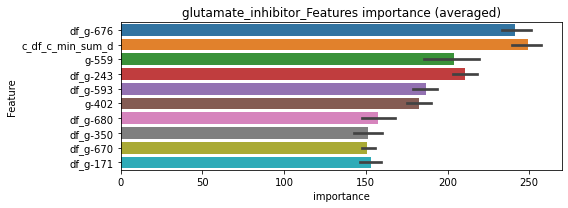

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00906852	valid_1's binary_logloss: 0.0119826
[600]	training's binary_logloss: 0.00232026	valid_1's binary_logloss: 0.00364739
[900]	training's binary_logloss: 0.00124008	valid_1's binary_logloss: 0.00215427
[1200]	training's binary_logloss: 0.000849333	valid_1's binary_logloss: 0.00158301
[1500]	training's binary_logloss: 0.000656575	valid_1's binary_logloss: 0.00127346
[1800]	training's binary_logloss: 0.00054296	valid_1's binary_logloss: 0.00110038
[2100]	training's binary_logloss: 0.000469684	valid_1's binary_logloss: 0.000978529
[2400]	training's binary_logloss: 0.000417911	valid_1's binary_logloss: 0.000891129
[2700]	training's binary_logloss: 0.000382334	valid_1's binary_logloss: 0.000834659
[3000]	training's binary_logloss: 0.000355347	valid_1's binary_logloss: 0.000787412
[3300]	training's binary_logloss: 0.000336963	valid_1's binary_logloss: 0.000758936
[3600]	training's binary_logl

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00915017	valid_1's binary_logloss: 0.0111471
[600]	training's binary_logloss: 0.0023257	valid_1's binary_logloss: 0.0031061
[900]	training's binary_logloss: 0.00123522	valid_1's binary_logloss: 0.00172642
[1200]	training's binary_logloss: 0.000847634	valid_1's binary_logloss: 0.00121596
[1500]	training's binary_logloss: 0.000655358	valid_1's binary_logloss: 0.000960209
[1800]	training's binary_logloss: 0.000543185	valid_1's binary_logloss: 0.000808997
[2100]	training's binary_logloss: 0.000469413	valid_1's binary_logloss: 0.000705837
[2400]	training's binary_logloss: 0.000417827	valid_1's binary_logloss: 0.000633747
[2700]	training's binary_logloss: 0.000380903	valid_1's binary_logloss: 0.000582235
[3000]	training's binary_logloss: 0.000354385	valid_1's binary_logloss: 0.000545298
[3300]	training's binary_logloss: 0.000335604	valid_1's binary_logloss: 0.000518778
[3600]	training's binary_log

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00911089	valid_1's binary_logloss: 0.0106793
[600]	training's binary_logloss: 0.00232116	valid_1's binary_logloss: 0.00290529
[900]	training's binary_logloss: 0.00123288	valid_1's binary_logloss: 0.00159094
[1200]	training's binary_logloss: 0.000846697	valid_1's binary_logloss: 0.00111159
[1500]	training's binary_logloss: 0.000654225	valid_1's binary_logloss: 0.00087085
[1800]	training's binary_logloss: 0.000541439	valid_1's binary_logloss: 0.000729243
[2100]	training's binary_logloss: 0.000469202	valid_1's binary_logloss: 0.000636996
[2400]	training's binary_logloss: 0.000417616	valid_1's binary_logloss: 0.000571071
[2700]	training's binary_logloss: 0.00038143	valid_1's binary_logloss: 0.000524149
[3000]	training's binary_logloss: 0.000355049	valid_1's binary_logloss: 0.000489711
[3300]	training's binary_logloss: 0.000336268	valid_1's binary_logloss: 0.000465253
[3600]	training's binary_log

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902664	valid_1's binary_logloss: 0.0118531
[600]	training's binary_logloss: 0.00230732	valid_1's binary_logloss: 0.00380832
[900]	training's binary_logloss: 0.00122524	valid_1's binary_logloss: 0.00229764
[1200]	training's binary_logloss: 0.00084247	valid_1's binary_logloss: 0.00172398
[1500]	training's binary_logloss: 0.000651596	valid_1's binary_logloss: 0.00142245
[1800]	training's binary_logloss: 0.000539935	valid_1's binary_logloss: 0.00124054
[2100]	training's binary_logloss: 0.000467082	valid_1's binary_logloss: 0.00111322
[2400]	training's binary_logloss: 0.00041605	valid_1's binary_logloss: 0.0010253
[2700]	training's binary_logloss: 0.000379001	valid_1's binary_logloss: 0.000954428
[3000]	training's binary_logloss: 0.000352894	valid_1's binary_logloss: 0.000908367
[3300]	training's binary_logloss: 0.000335106	valid_1's binary_logloss: 0.000877134
[3600]	training's binary_logloss:

glutamate_inhibitor logloss: 0.0006257504548684507


neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220443	valid_1's binary_logloss: 0.0708213
[600]	training's binary_logloss: 0.00319189	valid_1's binary_logloss: 0.042736
[900]	training's binary_logloss: 0.00119039	valid_1's binary_logloss: 0.0379588
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000899677	valid_1's binary_logloss: 0.0372097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213301	valid_1's binary_logloss: 0.0629186
[600]	training's binary_logloss: 0.00310673	valid_1's binary_logloss: 0.0382939
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00196411	valid_1's binary_logloss: 0.035899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222491	valid_1's binary_logloss: 0.0436266
[600]	training's binary_logloss: 0.00345188	valid_1's binary_logloss: 0.0189719
[900]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0109798, Threshold: 0.2324778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.16273, conf_1:0.30222
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.2324778
Num_p_label: 39.0, Expected: 12.4, Adj_threshold_2: 0.2524778
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_3: 0.2724778
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_4: 0.2924778
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_5: 0.3124778
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_6: 0.3324778
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.3524778
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_8: 0.3724778
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_9: 0.3924778
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_10: 0.4124778
threshold: 0.4324778, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197492	valid_1's binary_logloss: 0.0554478
[600]	training's binary_logloss: 0.0028769	valid_1's binary_logloss: 0.0301423
[900]	training's binary_logloss: 0.00109849	valid_1's binary_logloss: 0.02557
Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.000744454	valid_1's binary_logloss: 0.024086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195443	valid_1's binary_logloss: 0.060289
[600]	training's binary_logloss: 0.00280819	valid_1's binary_logloss: 0.0361355
[900]	training's binary_logloss: 0.00109508	valid_1's binary_logloss: 0.0323088
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.00112954	valid_1's binary_logloss: 0.0322068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189769	valid_1's binary_logloss: 0.055266
[600]	training's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0396374, Threshold: 0.4324778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 642.0/3779
p_label_rate: 0.0183325 Vs.target_rate: 0.00311, Num_p_label: 73.0, conf_0:0.34598, conf_1:0.51897
Num_p_label: 73.0, Expected: 12.4, Adj_threshold_1: 0.4324778
Num_p_label: 69.0, Expected: 12.4, Adj_threshold_2: 0.4524778
Num_p_label: 62.0, Expected: 12.4, Adj_threshold_3: 0.4724778
Num_p_label: 58.0, Expected: 12.4, Adj_threshold_4: 0.4924778
Num_p_label: 56.0, Expected: 12.4, Adj_threshold_5: 0.5124778
Num_p_label: 52.0, Expected: 12.4, Adj_threshold_6: 0.5324778
Num_p_label: 48.0, Expected: 12.4, Adj_threshold_7: 0.5524778
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_8: 0.5724778
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_9: 0.5924778
Num_p_label: 43.0, Expected: 12.4, Adj_threshold_10: 0.6124778
threshold: 0.6324778, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 642.0/3779, y_label_rate: 0.1698862

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018249	valid_1's binary_logloss: 0.0549079
[600]	training's binary_logloss: 0.00255849	valid_1's binary_logloss: 0.0289769
[900]	training's binary_logloss: 0.00100715	valid_1's binary_logloss: 0.0252787
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000829139	valid_1's binary_logloss: 0.0247763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180023	valid_1's binary_logloss: 0.0497008
[600]	training's binary_logloss: 0.00256772	valid_1's binary_logloss: 0.0245472
[900]	training's binary_logloss: 0.0010242	valid_1's binary_logloss: 0.0206327
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.00078433	valid_1's binary_logloss: 0.0198038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196067	valid_1's binary_logloss: 0.038886
[600]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0476312, Threshold: 0.6324778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 636.0/3767
p_label_rate: 0.0123054 Vs.target_rate: 0.00311, Num_p_label: 49.0, conf_0:0.50000, conf_1:0.69573
Num_p_label: 49.0, Expected: 12.4, Adj_threshold_1: 0.6324778
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_2: 0.6524778
Num_p_label: 42.0, Expected: 12.4, Adj_threshold_3: 0.6724778
Num_p_label: 38.0, Expected: 12.4, Adj_threshold_4: 0.6924778
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_5: 0.7124778
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_6: 0.7324778
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_7: 0.7524778
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_8: 0.7724778
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_9: 0.7924778
threshold: 0.7924778, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 636.0/3767, y_label_rate: 0.1688346


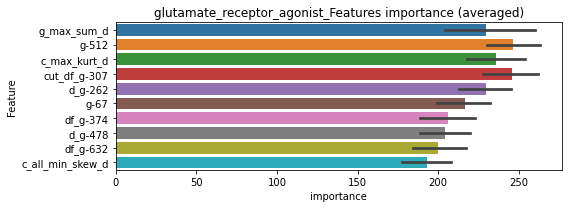

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0337521	valid_1's binary_logloss: 0.0630612
[600]	training's binary_logloss: 0.0098238	valid_1's binary_logloss: 0.0320801
[900]	training's binary_logloss: 0.00490842	valid_1's binary_logloss: 0.0245433
[1200]	training's binary_logloss: 0.00314916	valid_1's binary_logloss: 0.0214446
[1500]	training's binary_logloss: 0.00230491	valid_1's binary_logloss: 0.0198515
[1800]	training's binary_logloss: 0.00182234	valid_1's binary_logloss: 0.0187332
[2100]	training's binary_logloss: 0.00151604	valid_1's binary_logloss: 0.0180313
Early stopping, best iteration is:
[2260]	training's binary_logloss: 0.00139381	valid_1's binary_logloss: 0.0176151


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0335516	valid_1's binary_logloss: 0.0628271
[600]	training's binary_logloss: 0.00984368	valid_1's binary_logloss: 0.0338238
[900]	training's binary_logloss: 0.004896	valid_1's binary_logloss: 0.0264355
[1200]	training's binary_logloss: 0.00312693	valid_1's binary_logloss: 0.0237136
[1500]	training's binary_logloss: 0.00229133	valid_1's binary_logloss: 0.0221421
[1800]	training's binary_logloss: 0.00180713	valid_1's binary_logloss: 0.0212263
Early stopping, best iteration is:
[2029]	training's binary_logloss: 0.00156468	valid_1's binary_logloss: 0.0206623


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.033676	valid_1's binary_logloss: 0.0699542
[600]	training's binary_logloss: 0.00970801	valid_1's binary_logloss: 0.039275
[900]	training's binary_logloss: 0.0048469	valid_1's binary_logloss: 0.0311124
[1200]	training's binary_logloss: 0.00312051	valid_1's binary_logloss: 0.027713
[1500]	training's binary_logloss: 0.00227765	valid_1's binary_logloss: 0.025921
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.00199814	valid_1's binary_logloss: 0.0252102


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333401	valid_1's binary_logloss: 0.0710485
[600]	training's binary_logloss: 0.00972694	valid_1's binary_logloss: 0.0446857
[900]	training's binary_logloss: 0.0048629	valid_1's binary_logloss: 0.0387744
[1200]	training's binary_logloss: 0.003126	valid_1's binary_logloss: 0.0367955
Early stopping, best iteration is:
[1231]	training's binary_logloss: 0.00300753	valid_1's binary_logloss: 0.0365239


glutamate_receptor_agonist logloss: 0.02499980675893129


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235, target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.105801	valid_1's binary_logloss: 0.337811
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.0646153	valid_1's binary_logloss: 0.332034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.105232	valid_1's binary_logloss: 0.338293
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.0484174	valid_1's binary_logloss: 0.32346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.103735	valid_1's binary_logloss: 0.340538
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.0597714	valid_1's binary_logloss: 0.33334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.104173	valid_1's binary_logloss: 0.314918
[600]	training's binary_logloss: 0.0327246	valid_1's binary_logloss: 0.293035
Early stopping, best iteration is

1 / 3 AUC score:0.826
y_Threshold: 0.1121928, Threshold: 0.3393996, pos_neg_ratio: 0.8000000
Remove_noisy_data: 588 → Positive_corect_labels: 418/3294
p_label_rate: 0.0100452 Vs.target_rate: 0.01541, Num_p_label: 40.0, conf_0:0.23758, conf_1:0.44122
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.3393996
Num_p_label: 49.0, Expected: 61.4, Adj_threshold_2: 0.3193996
threshold: 0.3193996, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 418.0/3294, y_label_rate: 0.1268974
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0473874	valid_1's binary_logloss: 0.198553
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.0118909	valid_1's binary_logloss: 0.181178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0445868	valid_1's binary_logloss: 0.216268
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.0178857	valid_1's binary_logloss: 0.201783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0474756	valid_1's binary_logloss: 0.172061
[600]	training's binary_logloss: 0.0100028	valid_1's binary_logloss: 0.143794
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00534002	valid_1's binary_logloss: 0.140939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0469254	valid_1's binary_logloss: 0.191591


2 / 3 AUC score:0.959
y_Threshold: 0.0734210, Threshold: 0.3193996, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.0178867	valid_1's binary_logloss: 0.175458


Remove_noisy_data: 140 → Positive_corect_labels: 348.0/3154
p_label_rate: 0.0163235 Vs.target_rate: 0.01541, Num_p_label: 65.0, conf_0:0.25552, conf_1:0.38328
threshold: 0.3193996, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 348.0/3154, y_label_rate: 0.1103361
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03537	valid_1's binary_logloss: 0.129332
[600]	training's binary_logloss: 0.00687918	valid_1's binary_logloss: 0.0948318
[900]	training's binary_logloss: 0.00242038	valid_1's binary_logloss: 0.0872661
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.0017614	valid_1's binary_logloss: 0.0851375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330269	valid_1's binary_logloss: 0.153524
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00857599	valid_1's binary_logloss: 0.134964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0340327	valid_1's binary_logloss: 0.150423
[600]	training's binary_logloss: 0.00653758	valid_1's binary_logloss: 0.125765
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00494951	valid_1's binary_logloss: 0.122723
Tra

3 / 3 AUC score:0.991
y_Threshold: 0.0559491, Threshold: 0.3193996, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 315.0/3088
p_label_rate: 0.0228528 Vs.target_rate: 0.01541, Num_p_label: 91.0, conf_0:0.28746, conf_1:0.35134
threshold: 0.3193996, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 315.0/3088, y_label_rate: 0.1020078


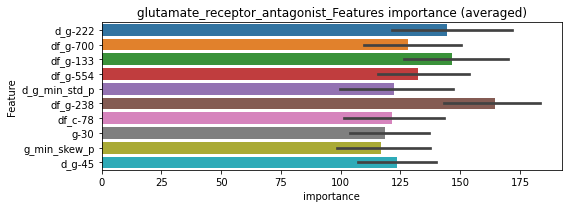

len(train_index) : 2316
len(valid_index) : 772
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489155	valid_1's binary_logloss: 0.165458
[600]	training's binary_logloss: 0.0169432	valid_1's binary_logloss: 0.145074
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.0137439	valid_1's binary_logloss: 0.143901


len(train_index) : 2316
len(valid_index) : 772
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0496542	valid_1's binary_logloss: 0.145507
[600]	training's binary_logloss: 0.0171846	valid_1's binary_logloss: 0.117849
[900]	training's binary_logloss: 0.00886596	valid_1's binary_logloss: 0.109509
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.00857069	valid_1's binary_logloss: 0.109079


len(train_index) : 2316
len(valid_index) : 772
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0510772	valid_1's binary_logloss: 0.141157
[600]	training's binary_logloss: 0.0177097	valid_1's binary_logloss: 0.109585
[900]	training's binary_logloss: 0.00903845	valid_1's binary_logloss: 0.100101
Early stopping, best iteration is:
[1145]	training's binary_logloss: 0.00617013	valid_1's binary_logloss: 0.0974177


len(train_index) : 2316
len(valid_index) : 772
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0490623	valid_1's binary_logloss: 0.147185
[600]	training's binary_logloss: 0.0168825	valid_1's binary_logloss: 0.119595
[900]	training's binary_logloss: 0.00869633	valid_1's binary_logloss: 0.113785
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00864795	valid_1's binary_logloss: 0.113677


glutamate_receptor_antagonist logloss: 0.11601855337164986


neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00594583	valid_1's binary_logloss: 0.0140303
[600]	training's binary_logloss: 0.000669627	valid_1's binary_logloss: 0.00488357
[900]	training's binary_logloss: 0.000383173	valid_1's binary_logloss: 0.00390161
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000372912	valid_1's binary_logloss: 0.0038358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058138	valid_1's binary_logloss: 0.010363
[600]	training's binary_logloss: 0.000683131	valid_1's binary_logloss: 0.00322392
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000397914	valid_1's binary_logloss: 0.00262598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575273	valid_1's binary_logloss: 0.00986525
[600]	training's binary_logloss: 0.000678681	valid_1's binary_logloss: 0.00297413
Early stopping, b

1 / 3 AUC score:1.000
y_Threshold: 0.0021023, Threshold: 0.0078823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00552, conf_1:0.01025
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0078823
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0278823
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0478823
threshold: 0.0478823, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519352	valid_1's binary_logloss: 0.0124521
[600]	training's binary_logloss: 0.00063272	valid_1's binary_logloss: 0.0047886
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000376044	valid_1's binary_logloss: 0.00402792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512873	valid_1's binary_logloss: 0.00917196
[600]	training's binary_logloss: 0.000626808	valid_1's binary_logloss: 0.00244129
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000370836	valid_1's binary_logloss: 0.00192344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521065	valid_1's binary_logloss: 0.00812171
[600]	training's binary_logloss: 0.000636805	valid_1's binary_logloss: 0.00224415
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000374552	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0420982, Threshold: 0.0478823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00076, Num_p_label: 15.0, conf_0:0.03831, conf_1:0.05746
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0478823
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0678823
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0878823
threshold: 0.0878823, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519352	valid_1's binary_logloss: 0.0124521
[600]	training's binary_logloss: 0.00063272	valid_1's binary_logloss: 0.0047886
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000376044	valid_1's binary_logloss: 0.00402792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512873	valid_1's binary_logloss: 0.00917196
[600]	training's binary_logloss: 0.000626808	valid_1's binary_logloss: 0.00244129
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000370836	valid_1's binary_logloss: 0.00192344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521065	valid_1's binary_logloss: 0.00812171
[600]	training's binary_logloss: 0.000636805	valid_1's binary_logloss: 0.00224415
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000374552	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0420982, Threshold: 0.0878823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.07909, conf_1:0.09667
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0878823
threshold: 0.0878823, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


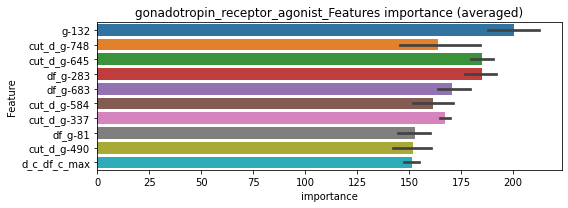

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126564	valid_1's binary_logloss: 0.0188975
[600]	training's binary_logloss: 0.0032051	valid_1's binary_logloss: 0.00723457
[900]	training's binary_logloss: 0.00167964	valid_1's binary_logloss: 0.00502965
[1200]	training's binary_logloss: 0.00113871	valid_1's binary_logloss: 0.00409453
[1500]	training's binary_logloss: 0.000874002	valid_1's binary_logloss: 0.00361535
[1800]	training's binary_logloss: 0.000717505	valid_1's binary_logloss: 0.00328552
[2100]	training's binary_logloss: 0.000615454	valid_1's binary_logloss: 0.00307398
[2400]	training's binary_logloss: 0.000545088	valid_1's binary_logloss: 0.00291775
[2700]	training's binary_logloss: 0.000493434	valid_1's binary_logloss: 0.00279744
[3000]	training's binary_logloss: 0.000454622	valid_1's binary_logloss: 0.00270809
[3300]	training's binary_logloss: 0.000426009	valid_1's binary_logloss: 0.00263719
[3600]	training's binary_logloss: 0.

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126631	valid_1's binary_logloss: 0.0187368
[600]	training's binary_logloss: 0.00321695	valid_1's binary_logloss: 0.00665203
[900]	training's binary_logloss: 0.00168131	valid_1's binary_logloss: 0.00439084
[1200]	training's binary_logloss: 0.00114186	valid_1's binary_logloss: 0.00345974
[1500]	training's binary_logloss: 0.00087309	valid_1's binary_logloss: 0.0029886
[1800]	training's binary_logloss: 0.00071707	valid_1's binary_logloss: 0.00269219
[2100]	training's binary_logloss: 0.000615237	valid_1's binary_logloss: 0.00249209
[2400]	training's binary_logloss: 0.00054324	valid_1's binary_logloss: 0.00235493
[2700]	training's binary_logloss: 0.000491011	valid_1's binary_logloss: 0.00225429
[3000]	training's binary_logloss: 0.000453384	valid_1's binary_logloss: 0.0021742
[3300]	training's binary_logloss: 0.00042517	valid_1's binary_logloss: 0.00210541
[3600]	training's binary_logloss: 0.00040

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126688	valid_1's binary_logloss: 0.0168373
[600]	training's binary_logloss: 0.00323631	valid_1's binary_logloss: 0.00544337
[900]	training's binary_logloss: 0.00168827	valid_1's binary_logloss: 0.00338343
[1200]	training's binary_logloss: 0.00114272	valid_1's binary_logloss: 0.00257278
[1500]	training's binary_logloss: 0.000876132	valid_1's binary_logloss: 0.0021735
[1800]	training's binary_logloss: 0.00072002	valid_1's binary_logloss: 0.00193155
[2100]	training's binary_logloss: 0.000618591	valid_1's binary_logloss: 0.00178263
[2400]	training's binary_logloss: 0.000547353	valid_1's binary_logloss: 0.00165897
[2700]	training's binary_logloss: 0.000495544	valid_1's binary_logloss: 0.00157389
[3000]	training's binary_logloss: 0.000457165	valid_1's binary_logloss: 0.00150585
[3300]	training's binary_logloss: 0.000427469	valid_1's binary_logloss: 0.0014569
[3600]	training's binary_logloss: 0.00

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128587	valid_1's binary_logloss: 0.0168603
[600]	training's binary_logloss: 0.00326749	valid_1's binary_logloss: 0.00554504
[900]	training's binary_logloss: 0.00170893	valid_1's binary_logloss: 0.00345052
[1200]	training's binary_logloss: 0.00115555	valid_1's binary_logloss: 0.00268746
[1500]	training's binary_logloss: 0.000885371	valid_1's binary_logloss: 0.00228469
[1800]	training's binary_logloss: 0.000727252	valid_1's binary_logloss: 0.00203408
[2100]	training's binary_logloss: 0.000624257	valid_1's binary_logloss: 0.0018702
[2400]	training's binary_logloss: 0.000551003	valid_1's binary_logloss: 0.00174933
[2700]	training's binary_logloss: 0.000498078	valid_1's binary_logloss: 0.00165248
[3000]	training's binary_logloss: 0.000459424	valid_1's binary_logloss: 0.00158337
[3300]	training's binary_logloss: 0.000429569	valid_1's binary_logloss: 0.0015129
[3600]	training's binary_logloss: 0.0

gonadotropin_receptor_agonist logloss: 0.00186291301743604


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187259	valid_1's binary_logloss: 0.0551599
[600]	training's binary_logloss: 0.00263483	valid_1's binary_logloss: 0.0272808
[900]	training's binary_logloss: 0.00105429	valid_1's binary_logloss: 0.0223673
Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.000727692	valid_1's binary_logloss: 0.0209383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181916	valid_1's binary_logloss: 0.0465678
[600]	training's binary_logloss: 0.00264024	valid_1's binary_logloss: 0.020476
[900]	training's binary_logloss: 0.00105573	valid_1's binary_logloss: 0.0160797
Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000746657	valid_1's binary_logloss: 0.014888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201497	valid_1's binary_logloss: 0.0342202
[600]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0076232, Threshold: 0.0404147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.02829, conf_1:0.05254
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0404147
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_2: 0.0604147
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_3: 0.0804147
threshold: 0.0804147, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167099	valid_1's binary_logloss: 0.0513764
[600]	training's binary_logloss: 0.00240466	valid_1's binary_logloss: 0.0269358
[900]	training's binary_logloss: 0.000994474	valid_1's binary_logloss: 0.0232418
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000767855	valid_1's binary_logloss: 0.0222689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166872	valid_1's binary_logloss: 0.0435939
[600]	training's binary_logloss: 0.00244538	valid_1's binary_logloss: 0.0183181
[900]	training's binary_logloss: 0.000998751	valid_1's binary_logloss: 0.0142608
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.00070087	valid_1's binary_logloss: 0.0129996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017766	valid_1's binary_logloss: 0.0310809
[600]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0367008, Threshold: 0.0804147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0115520 Vs.target_rate: 0.00252, Num_p_label: 46.0, conf_0:0.06433, conf_1:0.09650
Num_p_label: 46.0, Expected: 10.0, Adj_threshold_1: 0.0804147
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_2: 0.1004147
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_3: 0.1204147
Num_p_label: 18.0, Expected: 10.0, Adj_threshold_4: 0.1404147
Num_p_label: 15.0, Expected: 10.0, Adj_threshold_5: 0.1604147
threshold: 0.1604147, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170237	valid_1's binary_logloss: 0.0426835
[600]	training's binary_logloss: 0.00248476	valid_1's binary_logloss: 0.0195543
[900]	training's binary_logloss: 0.00100193	valid_1's binary_logloss: 0.0156316
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.00070778	valid_1's binary_logloss: 0.0146612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166225	valid_1's binary_logloss: 0.0461158
[600]	training's binary_logloss: 0.00239953	valid_1's binary_logloss: 0.0214615
[900]	training's binary_logloss: 0.000991426	valid_1's binary_logloss: 0.0166988
[1200]	training's binary_logloss: 0.000675366	valid_1's binary_logloss: 0.0155
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.00068369	valid_1's binary_logloss: 0.0154709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0466791, Threshold: 0.1604147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0055249 Vs.target_rate: 0.00252, Num_p_label: 22.0, conf_0:0.14437, conf_1:0.17646
Num_p_label: 22.0, Expected: 10.0, Adj_threshold_1: 0.1604147
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_2: 0.1804147
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_3: 0.2004147
threshold: 0.2004147, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


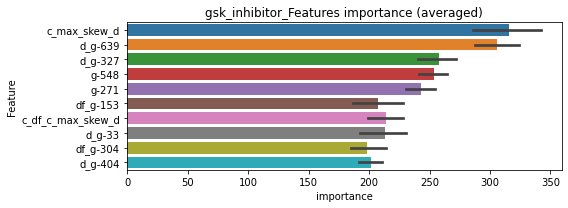

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327508	valid_1's binary_logloss: 0.056592
[600]	training's binary_logloss: 0.0097348	valid_1's binary_logloss: 0.0257359
[900]	training's binary_logloss: 0.00494769	valid_1's binary_logloss: 0.0175886
[1200]	training's binary_logloss: 0.00320367	valid_1's binary_logloss: 0.0140349
[1500]	training's binary_logloss: 0.00235001	valid_1's binary_logloss: 0.0122127
[1800]	training's binary_logloss: 0.00186373	valid_1's binary_logloss: 0.0110547
[2100]	training's binary_logloss: 0.00155077	valid_1's binary_logloss: 0.0102352
[2400]	training's binary_logloss: 0.00133382	valid_1's binary_logloss: 0.00965032
[2700]	training's binary_logloss: 0.00117809	valid_1's binary_logloss: 0.00918082
[3000]	training's binary_logloss: 0.0010604	valid_1's binary_logloss: 0.00878611
[3300]	training's binary_logloss: 0.000968378	valid_1's binary_logloss: 0.00847709
Early stopping, best iteration is:
[3318]	training

len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0318487	valid_1's binary_logloss: 0.0623354
[600]	training's binary_logloss: 0.00945175	valid_1's binary_logloss: 0.0333943
[900]	training's binary_logloss: 0.00479544	valid_1's binary_logloss: 0.0254497
[1200]	training's binary_logloss: 0.00311894	valid_1's binary_logloss: 0.0219831
[1500]	training's binary_logloss: 0.00229779	valid_1's binary_logloss: 0.020121
[1800]	training's binary_logloss: 0.00181935	valid_1's binary_logloss: 0.0189522
[2100]	training's binary_logloss: 0.0015119	valid_1's binary_logloss: 0.0180003
[2400]	training's binary_logloss: 0.00130593	valid_1's binary_logloss: 0.017499
[2700]	training's binary_logloss: 0.00115432	valid_1's binary_logloss: 0.0170123
Early stopping, best iteration is:
[2907]	training's binary_logloss: 0.00107249	valid_1's binary_logloss: 0.0167519


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0323015	valid_1's binary_logloss: 0.0564436
[600]	training's binary_logloss: 0.00955257	valid_1's binary_logloss: 0.0268433
[900]	training's binary_logloss: 0.00486422	valid_1's binary_logloss: 0.018891
[1200]	training's binary_logloss: 0.00315371	valid_1's binary_logloss: 0.0153207
[1500]	training's binary_logloss: 0.00232332	valid_1's binary_logloss: 0.0135578
[1800]	training's binary_logloss: 0.00183887	valid_1's binary_logloss: 0.0123473
[2100]	training's binary_logloss: 0.00153075	valid_1's binary_logloss: 0.0115233
[2400]	training's binary_logloss: 0.0013217	valid_1's binary_logloss: 0.010977
[2700]	training's binary_logloss: 0.00116883	valid_1's binary_logloss: 0.0105163
[3000]	training's binary_logloss: 0.00105239	valid_1's binary_logloss: 0.010176
Early stopping, best iteration is:
[3209]	training's binary_logloss: 0.000985159	valid_1's binary_logloss: 0.00991288


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0317079	valid_1's binary_logloss: 0.0620621
[600]	training's binary_logloss: 0.00947084	valid_1's binary_logloss: 0.0317767
[900]	training's binary_logloss: 0.0048338	valid_1's binary_logloss: 0.0232204
[1200]	training's binary_logloss: 0.00315292	valid_1's binary_logloss: 0.0198563
[1500]	training's binary_logloss: 0.00232079	valid_1's binary_logloss: 0.0179834
[1800]	training's binary_logloss: 0.00183763	valid_1's binary_logloss: 0.0168573
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.00167444	valid_1's binary_logloss: 0.0162754


gsk_inhibitor logloss: 0.012851407914243251


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193447	valid_1's binary_logloss: 0.0690362
[600]	training's binary_logloss: 0.00285117	valid_1's binary_logloss: 0.0466355
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00122151	valid_1's binary_logloss: 0.0440829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195801	valid_1's binary_logloss: 0.0553778
[600]	training's binary_logloss: 0.00290412	valid_1's binary_logloss: 0.0251645
[900]	training's binary_logloss: 0.00115587	valid_1's binary_logloss: 0.0196793
[1200]	training's binary_logloss: 0.000765276	valid_1's binary_logloss: 0.0184692
Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.000772519	valid_1's binary_logloss: 0.0183564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196449	valid_1's binary_logloss: 0.0546536
[600]	training's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0084801, Threshold: 0.0343416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.02404, conf_1:0.04464
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0343416
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.0543416
threshold: 0.0543416, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180453	valid_1's binary_logloss: 0.0456398
[600]	training's binary_logloss: 0.00269352	valid_1's binary_logloss: 0.0199005
[900]	training's binary_logloss: 0.00109332	valid_1's binary_logloss: 0.0147134
Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.000754889	valid_1's binary_logloss: 0.0137557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173546	valid_1's binary_logloss: 0.0586142
[600]	training's binary_logloss: 0.00262493	valid_1's binary_logloss: 0.0321858
[900]	training's binary_logloss: 0.00106948	valid_1's binary_logloss: 0.0274263
[1200]	training's binary_logloss: 0.000716843	valid_1's binary_logloss: 0.0264072
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.000719554	valid_1's binary_logloss: 0.0263655
Training until validation scores don't improve for 30 rounds
[300]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0302001, Threshold: 0.0543416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0148167 Vs.target_rate: 0.00302, Num_p_label: 59.0, conf_0:0.04347, conf_1:0.06521
Num_p_label: 59.0, Expected: 12.0, Adj_threshold_1: 0.0543416
Num_p_label: 48.0, Expected: 12.0, Adj_threshold_2: 0.0743416
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_3: 0.0943416
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_4: 0.1143416
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_5: 0.1343416
Num_p_label: 13.0, Expected: 12.0, Adj_threshold_6: 0.1543416
threshold: 0.1543416, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174989	valid_1's binary_logloss: 0.0488585
[600]	training's binary_logloss: 0.00262215	valid_1's binary_logloss: 0.0230193
[900]	training's binary_logloss: 0.00107191	valid_1's binary_logloss: 0.0179013
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000816793	valid_1's binary_logloss: 0.0171306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177687	valid_1's binary_logloss: 0.0510819
[600]	training's binary_logloss: 0.00264872	valid_1's binary_logloss: 0.022801
[900]	training's binary_logloss: 0.00107766	valid_1's binary_logloss: 0.0174175
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000823936	valid_1's binary_logloss: 0.0164677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174213	valid_1's binary_logloss: 0.0601246
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0311068, Threshold: 0.1543416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0045203 Vs.target_rate: 0.00302, Num_p_label: 18.0, conf_0:0.13891, conf_1:0.16978
threshold: 0.1543416, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3779, y_label_rate: 0.1709447


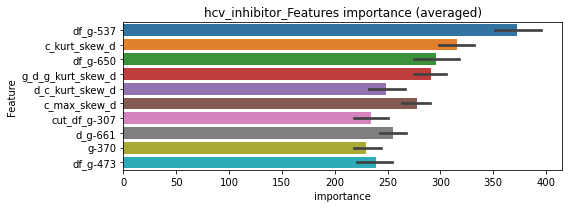

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0344092	valid_1's binary_logloss: 0.0724224
[600]	training's binary_logloss: 0.0102543	valid_1's binary_logloss: 0.0429248
[900]	training's binary_logloss: 0.00517713	valid_1's binary_logloss: 0.0353931
[1200]	training's binary_logloss: 0.00332712	valid_1's binary_logloss: 0.0325892
[1500]	training's binary_logloss: 0.00244073	valid_1's binary_logloss: 0.0308354
Early stopping, best iteration is:
[1615]	training's binary_logloss: 0.00221429	valid_1's binary_logloss: 0.0302492


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350123	valid_1's binary_logloss: 0.0725758
[600]	training's binary_logloss: 0.0103913	valid_1's binary_logloss: 0.0415922
[900]	training's binary_logloss: 0.00521125	valid_1's binary_logloss: 0.0332825
[1200]	training's binary_logloss: 0.00335462	valid_1's binary_logloss: 0.0299193
[1500]	training's binary_logloss: 0.00244721	valid_1's binary_logloss: 0.0278746
Early stopping, best iteration is:
[1639]	training's binary_logloss: 0.00217547	valid_1's binary_logloss: 0.0272151


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034861	valid_1's binary_logloss: 0.0724487
[600]	training's binary_logloss: 0.0102868	valid_1's binary_logloss: 0.0403539
[900]	training's binary_logloss: 0.00516332	valid_1's binary_logloss: 0.0315336
[1200]	training's binary_logloss: 0.00332544	valid_1's binary_logloss: 0.0283179
[1500]	training's binary_logloss: 0.00243004	valid_1's binary_logloss: 0.0265337
[1800]	training's binary_logloss: 0.00191607	valid_1's binary_logloss: 0.0252863
[2100]	training's binary_logloss: 0.00158955	valid_1's binary_logloss: 0.0244658
Early stopping, best iteration is:
[2155]	training's binary_logloss: 0.00154188	valid_1's binary_logloss: 0.0243363


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0356701	valid_1's binary_logloss: 0.0617232
[600]	training's binary_logloss: 0.0106671	valid_1's binary_logloss: 0.0330965
[900]	training's binary_logloss: 0.00533384	valid_1's binary_logloss: 0.025662
[1200]	training's binary_logloss: 0.00343872	valid_1's binary_logloss: 0.0226299
[1500]	training's binary_logloss: 0.00250984	valid_1's binary_logloss: 0.0211101
[1800]	training's binary_logloss: 0.00197741	valid_1's binary_logloss: 0.0202532
Early stopping, best iteration is:
[1786]	training's binary_logloss: 0.00199524	valid_1's binary_logloss: 0.0202345


hcv_inhibitor logloss: 0.025510161946076377


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0315915	valid_1's binary_logloss: 0.118756
[600]	training's binary_logloss: 0.00519647	valid_1's binary_logloss: 0.0857195
[900]	training's binary_logloss: 0.00184366	valid_1's binary_logloss: 0.0780243
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.00165463	valid_1's binary_logloss: 0.0773446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0296109	valid_1's binary_logloss: 0.0995014
[600]	training's binary_logloss: 0.00496088	valid_1's binary_logloss: 0.0676007
[900]	training's binary_logloss: 0.00179364	valid_1's binary_logloss: 0.0623648
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00179364	valid_1's binary_logloss: 0.0623648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331209	valid_1's binary_logloss: 0.0968896
[600]	training's binary_logloss

1 / 3 AUC score:0.992
y_Threshold: 0.0186018, Threshold: 0.1042258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 640/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.07296, conf_1:0.13549
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1042258
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_2: 0.1242258
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_3: 0.1442258
threshold: 0.1442258, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254423	valid_1's binary_logloss: 0.0809908
[600]	training's binary_logloss: 0.00418802	valid_1's binary_logloss: 0.0490288
[900]	training's binary_logloss: 0.00158137	valid_1's binary_logloss: 0.0420562
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.00103011	valid_1's binary_logloss: 0.0401741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264904	valid_1's binary_logloss: 0.0864525
[600]	training's binary_logloss: 0.00426844	valid_1's binary_logloss: 0.0531281
[900]	training's binary_logloss: 0.00159656	valid_1's binary_logloss: 0.0457109
[1200]	training's binary_logloss: 0.000995386	valid_1's binary_logloss: 0.042836
Early stopping, best iteration is:
[1212]	training's binary_logloss: 0.000984299	valid_1's binary_logloss: 0.0427934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

2 / 3 AUC score:0.999
y_Threshold: 0.0412504, Threshold: 0.1442258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0135610 Vs.target_rate: 0.00445, Num_p_label: 54.0, conf_0:0.11538, conf_1:0.17307
Num_p_label: 54.0, Expected: 17.7, Adj_threshold_1: 0.1442258
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_2: 0.1642258
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_3: 0.1842258
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_4: 0.2042258
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_5: 0.2242258
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_6: 0.2442258
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_7: 0.2642258
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_8: 0.2842258
threshold: 0.2842258, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256348	valid_1's binary_logloss: 0.0750982
[600]	training's binary_logloss: 0.00419723	valid_1's binary_logloss: 0.0454154
[900]	training's binary_logloss: 0.0015635	valid_1's binary_logloss: 0.039179
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.0011017	valid_1's binary_logloss: 0.0374868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251845	valid_1's binary_logloss: 0.0852593
[600]	training's binary_logloss: 0.0039831	valid_1's binary_logloss: 0.054039
[900]	training's binary_logloss: 0.00152211	valid_1's binary_logloss: 0.0482056
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.000988516	valid_1's binary_logloss: 0.0460538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238925	valid_1's binary_logloss: 0.07241
[600]	training's binary_logloss: 0

3 / 3 AUC score:0.999
y_Threshold: 0.0416980, Threshold: 0.2842258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 622.0/3733
p_label_rate: 0.0055249 Vs.target_rate: 0.00445, Num_p_label: 22.0, conf_0:0.25580, conf_1:0.31265
threshold: 0.2842258, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 622.0/3733, y_label_rate: 0.1666220


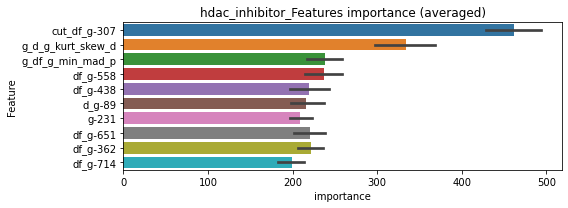

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437832	valid_1's binary_logloss: 0.0939775
[600]	training's binary_logloss: 0.0140581	valid_1's binary_logloss: 0.0567861
[900]	training's binary_logloss: 0.00712433	valid_1's binary_logloss: 0.0462533
[1200]	training's binary_logloss: 0.00457133	valid_1's binary_logloss: 0.0418923
[1500]	training's binary_logloss: 0.00331762	valid_1's binary_logloss: 0.0393122
[1800]	training's binary_logloss: 0.00260417	valid_1's binary_logloss: 0.0378345
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.00260826	valid_1's binary_logloss: 0.0377968


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0444921	valid_1's binary_logloss: 0.0868676
[600]	training's binary_logloss: 0.0143068	valid_1's binary_logloss: 0.0513013
[900]	training's binary_logloss: 0.00723963	valid_1's binary_logloss: 0.0410268
[1200]	training's binary_logloss: 0.0046186	valid_1's binary_logloss: 0.0366181
[1500]	training's binary_logloss: 0.0033538	valid_1's binary_logloss: 0.0347608
[1800]	training's binary_logloss: 0.0026287	valid_1's binary_logloss: 0.0334646
[2100]	training's binary_logloss: 0.00217209	valid_1's binary_logloss: 0.032719
Early stopping, best iteration is:
[2073]	training's binary_logloss: 0.00220481	valid_1's binary_logloss: 0.0326887


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.044679	valid_1's binary_logloss: 0.083743
[600]	training's binary_logloss: 0.0143571	valid_1's binary_logloss: 0.0443763
[900]	training's binary_logloss: 0.00726203	valid_1's binary_logloss: 0.0323016
[1200]	training's binary_logloss: 0.00464519	valid_1's binary_logloss: 0.0275361
[1500]	training's binary_logloss: 0.00337549	valid_1's binary_logloss: 0.024813
[1800]	training's binary_logloss: 0.00264974	valid_1's binary_logloss: 0.0231036
[2100]	training's binary_logloss: 0.00218477	valid_1's binary_logloss: 0.0219113
Early stopping, best iteration is:
[2166]	training's binary_logloss: 0.00210267	valid_1's binary_logloss: 0.0215531


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0427748	valid_1's binary_logloss: 0.10024
[600]	training's binary_logloss: 0.0137099	valid_1's binary_logloss: 0.0633258
[900]	training's binary_logloss: 0.00696408	valid_1's binary_logloss: 0.0521501
[1200]	training's binary_logloss: 0.00447769	valid_1's binary_logloss: 0.047029
[1500]	training's binary_logloss: 0.00326205	valid_1's binary_logloss: 0.0439126
[1800]	training's binary_logloss: 0.00256935	valid_1's binary_logloss: 0.0419747
Early stopping, best iteration is:
[1798]	training's binary_logloss: 0.00257245	valid_1's binary_logloss: 0.0419598


hdac_inhibitor logloss: 0.033500741345393006


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283, target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151195	valid_1's binary_logloss: 0.0572963
[600]	training's binary_logloss: 0.0021633	valid_1's binary_logloss: 0.0349728
[900]	training's binary_logloss: 0.000876483	valid_1's binary_logloss: 0.0308081
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000843125	valid_1's binary_logloss: 0.0307066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158099	valid_1's binary_logloss: 0.051141
[600]	training's binary_logloss: 0.00220533	valid_1's binary_logloss: 0.0307025
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00145865	valid_1's binary_logloss: 0.0288878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017761	valid_1's binary_logloss: 0.0296559
[600]	training's binary_logloss: 0.00245603	valid_1's binary_logloss: 0.0112816
Early stopping, best iteration 

1 / 3 AUC score:1.000
y_Threshold: 0.0073145, Threshold: 0.0190957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00248, Num_p_label: 40.0, conf_0:0.01337, conf_1:0.02482
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0190957
Num_p_label: 10.0, Expected: 9.9, Adj_threshold_2: 0.0390957
threshold: 0.0390957, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143722	valid_1's binary_logloss: 0.0474764
[600]	training's binary_logloss: 0.00200441	valid_1's binary_logloss: 0.0264767
[900]	training's binary_logloss: 0.000840803	valid_1's binary_logloss: 0.0231622
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000717976	valid_1's binary_logloss: 0.0227204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015246	valid_1's binary_logloss: 0.0411736
[600]	training's binary_logloss: 0.00212463	valid_1's binary_logloss: 0.0226572
[900]	training's binary_logloss: 0.000870689	valid_1's binary_logloss: 0.0199723
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.00077191	valid_1's binary_logloss: 0.0195644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151992	valid_1's binary_logloss: 0.0373298
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0351058, Threshold: 0.0390957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0070316 Vs.target_rate: 0.00248, Num_p_label: 28.0, conf_0:0.03128, conf_1:0.04691
Num_p_label: 28.0, Expected: 9.9, Adj_threshold_1: 0.0390957
Num_p_label: 19.0, Expected: 9.9, Adj_threshold_2: 0.0590957
threshold: 0.0590957, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144566	valid_1's binary_logloss: 0.0422842
[600]	training's binary_logloss: 0.00201261	valid_1's binary_logloss: 0.025766
[900]	training's binary_logloss: 0.000828598	valid_1's binary_logloss: 0.0224876
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000716113	valid_1's binary_logloss: 0.0220691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141791	valid_1's binary_logloss: 0.0462559
[600]	training's binary_logloss: 0.00199949	valid_1's binary_logloss: 0.028496
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000969093	valid_1's binary_logloss: 0.0259376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146714	valid_1's binary_logloss: 0.0403208
[600]	training's binary_logloss: 0.00209755	valid_1's binary_logloss: 0.0195876
[900]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0294259, Threshold: 0.0590957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0037670 Vs.target_rate: 0.00248, Num_p_label: 15.0, conf_0:0.05319, conf_1:0.06501
Num_p_label: 15.0, Expected: 9.9, Adj_threshold_1: 0.0590957
threshold: 0.0590957, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


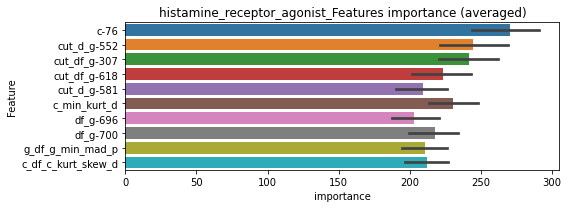

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275252	valid_1's binary_logloss: 0.0555475
[600]	training's binary_logloss: 0.00803571	valid_1's binary_logloss: 0.0330519
[900]	training's binary_logloss: 0.00408458	valid_1's binary_logloss: 0.027134
[1200]	training's binary_logloss: 0.00264721	valid_1's binary_logloss: 0.0245498
[1500]	training's binary_logloss: 0.00195435	valid_1's binary_logloss: 0.0231702
Early stopping, best iteration is:
[1608]	training's binary_logloss: 0.00178571	valid_1's binary_logloss: 0.0227131


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278321	valid_1's binary_logloss: 0.0524886
[600]	training's binary_logloss: 0.00806978	valid_1's binary_logloss: 0.027972
[900]	training's binary_logloss: 0.00408804	valid_1's binary_logloss: 0.0217458
[1200]	training's binary_logloss: 0.00265681	valid_1's binary_logloss: 0.0191213
[1500]	training's binary_logloss: 0.00196452	valid_1's binary_logloss: 0.0179825
[1800]	training's binary_logloss: 0.00156037	valid_1's binary_logloss: 0.0171161
[2100]	training's binary_logloss: 0.00130302	valid_1's binary_logloss: 0.0165116
[2400]	training's binary_logloss: 0.00112581	valid_1's binary_logloss: 0.0160181
Early stopping, best iteration is:
[2559]	training's binary_logloss: 0.00105106	valid_1's binary_logloss: 0.0157978


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0279309	valid_1's binary_logloss: 0.0505187
[600]	training's binary_logloss: 0.0082211	valid_1's binary_logloss: 0.0276764
[900]	training's binary_logloss: 0.00415954	valid_1's binary_logloss: 0.021797
[1200]	training's binary_logloss: 0.00269318	valid_1's binary_logloss: 0.0197489
Early stopping, best iteration is:
[1413]	training's binary_logloss: 0.00214913	valid_1's binary_logloss: 0.0186548


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275508	valid_1's binary_logloss: 0.051623
[600]	training's binary_logloss: 0.00814103	valid_1's binary_logloss: 0.0294706
[900]	training's binary_logloss: 0.00413351	valid_1's binary_logloss: 0.023302
[1200]	training's binary_logloss: 0.00268114	valid_1's binary_logloss: 0.0208646
[1500]	training's binary_logloss: 0.00197645	valid_1's binary_logloss: 0.0194415
[1800]	training's binary_logloss: 0.00156837	valid_1's binary_logloss: 0.0185093
Early stopping, best iteration is:
[1785]	training's binary_logloss: 0.00158347	valid_1's binary_logloss: 0.0184884


histamine_receptor_agonist logloss: 0.018914524564588427


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255, target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0649915	valid_1's binary_logloss: 0.225473
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.0349065	valid_1's binary_logloss: 0.2127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0605604	valid_1's binary_logloss: 0.229296
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0268689	valid_1's binary_logloss: 0.218672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0607641	valid_1's binary_logloss: 0.189319
[600]	training's binary_logloss: 0.0150266	valid_1's binary_logloss: 0.168156
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0166796	valid_1's binary_logloss: 0.167018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0668917	valid_1's binary_logloss: 0.186339
[600]	training's binary_loglo

1 / 3 AUC score:0.942
y_Threshold: 0.0721256, Threshold: 0.3474058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 325 → Positive_corect_labels: 554/3581
p_label_rate: 0.0100452 Vs.target_rate: 0.01012, Num_p_label: 40.0, conf_0:0.24318, conf_1:0.45163
threshold: 0.3474058, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 554.0/3581, y_label_rate: 0.1547054
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0379292	valid_1's binary_logloss: 0.139359
[600]	training's binary_logloss: 0.00756247	valid_1's binary_logloss: 0.114673
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.00340643	valid_1's binary_logloss: 0.111392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0383589	valid_1's binary_logloss: 0.117972
[600]	training's binary_logloss: 0.00804442	valid_1's binary_logloss: 0.0903288
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00419404	valid_1's binary_logloss: 0.0865069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0376557	valid_1's binary_logloss: 0.162033
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0159662	valid_1's binary_logloss: 0.153714
Training until validation scores don't improve for 30 rounds
[300]	training's bina

2 / 3 AUC score:0.985
y_Threshold: 0.0601119, Threshold: 0.3474058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 508.0/3489
p_label_rate: 0.0223506 Vs.target_rate: 0.01012, Num_p_label: 89.0, conf_0:0.27792, conf_1:0.41689
Num_p_label: 89.0, Expected: 40.3, Adj_threshold_1: 0.3474058
Num_p_label: 83.0, Expected: 40.3, Adj_threshold_2: 0.3674058
Num_p_label: 79.0, Expected: 40.3, Adj_threshold_3: 0.3874058
Num_p_label: 77.0, Expected: 40.3, Adj_threshold_4: 0.4074058
Num_p_label: 75.0, Expected: 40.3, Adj_threshold_5: 0.4274058
Num_p_label: 72.0, Expected: 40.3, Adj_threshold_6: 0.4474058
Num_p_label: 67.0, Expected: 40.3, Adj_threshold_7: 0.4674058
Num_p_label: 60.0, Expected: 40.3, Adj_threshold_8: 0.4874058
threshold: 0.4874058, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 508.0/3489, y_label_rate: 0.1456005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0296803	valid_1's binary_logloss: 0.132832
[600]	training's binary_logloss: 0.00562035	valid_1's binary_logloss: 0.114404
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00477455	valid_1's binary_logloss: 0.113647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.030542	valid_1's binary_logloss: 0.102861
[600]	training's binary_logloss: 0.00588411	valid_1's binary_logloss: 0.0851136
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00501105	valid_1's binary_logloss: 0.0848104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0302065	valid_1's binary_logloss: 0.109407
[600]	training's binary_logloss: 0.00551777	valid_1's binary_logloss: 0.0899341
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00357253	valid_1's binary_logloss: 0.0870711
T

3 / 3 AUC score:0.993
y_Threshold: 0.0517172, Threshold: 0.4874058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 475.0/3423
p_label_rate: 0.0205927 Vs.target_rate: 0.01012, Num_p_label: 82.0, conf_0:0.43867, conf_1:0.53615
Num_p_label: 82.0, Expected: 40.3, Adj_threshold_1: 0.4874058
Num_p_label: 81.0, Expected: 40.3, Adj_threshold_2: 0.5074058
Num_p_label: 77.0, Expected: 40.3, Adj_threshold_3: 0.5274058
Num_p_label: 73.0, Expected: 40.3, Adj_threshold_4: 0.5474058
Num_p_label: 67.0, Expected: 40.3, Adj_threshold_5: 0.5674058
Num_p_label: 65.0, Expected: 40.3, Adj_threshold_6: 0.5874058
Num_p_label: 62.0, Expected: 40.3, Adj_threshold_7: 0.6074058
Num_p_label: 60.0, Expected: 40.3, Adj_threshold_8: 0.6274058
threshold: 0.6274058, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 475.0/3423, y_label_rate: 0.1387672


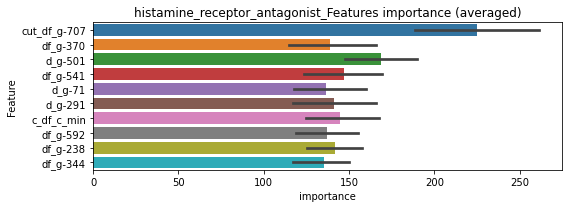

len(train_index) : 2567
len(valid_index) : 856
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432362	valid_1's binary_logloss: 0.114736
[600]	training's binary_logloss: 0.0149658	valid_1's binary_logloss: 0.0937318
[900]	training's binary_logloss: 0.00776643	valid_1's binary_logloss: 0.0887916
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00749078	valid_1's binary_logloss: 0.0886025


len(train_index) : 2567
len(valid_index) : 856
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0460128	valid_1's binary_logloss: 0.0972901
[600]	training's binary_logloss: 0.015888	valid_1's binary_logloss: 0.0684117
[900]	training's binary_logloss: 0.00827268	valid_1's binary_logloss: 0.0607391
[1200]	training's binary_logloss: 0.00528845	valid_1's binary_logloss: 0.0577441
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.00449457	valid_1's binary_logloss: 0.0566582


len(train_index) : 2567
len(valid_index) : 856
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0446426	valid_1's binary_logloss: 0.114117
[600]	training's binary_logloss: 0.0154006	valid_1's binary_logloss: 0.0902676
[900]	training's binary_logloss: 0.00796354	valid_1's binary_logloss: 0.0838223
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.00752531	valid_1's binary_logloss: 0.0834874


len(train_index) : 2568
len(valid_index) : 855
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0439502	valid_1's binary_logloss: 0.116645
[600]	training's binary_logloss: 0.0153107	valid_1's binary_logloss: 0.0899939
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.0100228	valid_1's binary_logloss: 0.0856155


histamine_receptor_antagonist logloss: 0.07858883004769388


neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767457	valid_1's binary_logloss: 0.0147829
[600]	training's binary_logloss: 0.000956016	valid_1's binary_logloss: 0.00336392
[900]	training's binary_logloss: 0.000478472	valid_1's binary_logloss: 0.00211268
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000465378	valid_1's binary_logloss: 0.00208569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775698	valid_1's binary_logloss: 0.0171708
[600]	training's binary_logloss: 0.000988293	valid_1's binary_logloss: 0.0054758
[900]	training's binary_logloss: 0.000485677	valid_1's binary_logloss: 0.00427137
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.00046235	valid_1's binary_logloss: 0.00417684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079557	valid_1's binary_logloss: 0.0146812
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0026280, Threshold: 0.0400079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.02801, conf_1:0.05201
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0400079
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_2: 0.0600079
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_3: 0.0800079
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_4: 0.1000079
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_5: 0.1200079
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_6: 0.1400079
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_7: 0.1600079
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_8: 0.1800079
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_9: 0.2000079
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_10: 0.2200079
threshold: 0.2400079, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693966	valid_1's binary_logloss: 0.0140158
[600]	training's binary_logloss: 0.000901431	valid_1's binary_logloss: 0.00309999
[900]	training's binary_logloss: 0.000456331	valid_1's binary_logloss: 0.00198424
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000439996	valid_1's binary_logloss: 0.00193846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716289	valid_1's binary_logloss: 0.0153129
[600]	training's binary_logloss: 0.000921983	valid_1's binary_logloss: 0.00444725
[900]	training's binary_logloss: 0.000466699	valid_1's binary_logloss: 0.0034946
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000448521	valid_1's binary_logloss: 0.00342367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721304	valid_1's binary_logloss: 0.0131128
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0668002, Threshold: 0.2400079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0095429 Vs.target_rate: 0.00101, Num_p_label: 38.0, conf_0:0.19201, conf_1:0.28801
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_1: 0.2400079
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_2: 0.2600079
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_3: 0.2800079
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_4: 0.3000079
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_5: 0.3200079
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_6: 0.3400079
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_7: 0.3600079
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_8: 0.3800079
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_9: 0.4000079
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_10: 0.4200079
threshold: 0.4400079, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693966	valid_1's binary_logloss: 0.0140158
[600]	training's binary_logloss: 0.000901431	valid_1's binary_logloss: 0.00309999
[900]	training's binary_logloss: 0.000456331	valid_1's binary_logloss: 0.00198424
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000439996	valid_1's binary_logloss: 0.00193846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716289	valid_1's binary_logloss: 0.0153129
[600]	training's binary_logloss: 0.000921983	valid_1's binary_logloss: 0.00444725
[900]	training's binary_logloss: 0.000466699	valid_1's binary_logloss: 0.0034946
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000448521	valid_1's binary_logloss: 0.00342367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721304	valid_1's binary_logloss: 0.0131128
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0668002, Threshold: 0.4400079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0067805 Vs.target_rate: 0.00101, Num_p_label: 27.0, conf_0:0.39601, conf_1:0.48401
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_1: 0.4400079
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_2: 0.4600079
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_3: 0.4800079
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_4: 0.5000079
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_5: 0.5200079
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_6: 0.5400079
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_7: 0.5600079
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_8: 0.5800079
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_9: 0.6000079
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_10: 0.6200079
threshold: 0.6400079, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


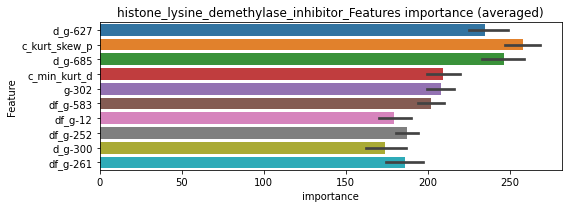

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167018	valid_1's binary_logloss: 0.0271084
[600]	training's binary_logloss: 0.00443178	valid_1's binary_logloss: 0.0094006
[900]	training's binary_logloss: 0.00229329	valid_1's binary_logloss: 0.00567205
[1200]	training's binary_logloss: 0.00153532	valid_1's binary_logloss: 0.00420996
[1500]	training's binary_logloss: 0.00116246	valid_1's binary_logloss: 0.00342016
[1800]	training's binary_logloss: 0.00094663	valid_1's binary_logloss: 0.00293993
[2100]	training's binary_logloss: 0.000805244	valid_1's binary_logloss: 0.00260766
[2400]	training's binary_logloss: 0.000708016	valid_1's binary_logloss: 0.00237738
[2700]	training's binary_logloss: 0.000637001	valid_1's binary_logloss: 0.00219442
[3000]	training's binary_logloss: 0.000583196	valid_1's binary_logloss: 0.0020603
[3300]	training's binary_logloss: 0.000541859	valid_1's binary_logloss: 0.00195286
[3600]	training's binary_logloss: 0.000

len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168686	valid_1's binary_logloss: 0.0254773
[600]	training's binary_logloss: 0.00446485	valid_1's binary_logloss: 0.00911526
[900]	training's binary_logloss: 0.00231389	valid_1's binary_logloss: 0.00588511
[1200]	training's binary_logloss: 0.0015501	valid_1's binary_logloss: 0.0045554
[1500]	training's binary_logloss: 0.00117	valid_1's binary_logloss: 0.00385433
[1800]	training's binary_logloss: 0.000951686	valid_1's binary_logloss: 0.00340643
[2100]	training's binary_logloss: 0.000810121	valid_1's binary_logloss: 0.00311503
[2400]	training's binary_logloss: 0.00071141	valid_1's binary_logloss: 0.002939
[2700]	training's binary_logloss: 0.00063978	valid_1's binary_logloss: 0.00278923
Early stopping, best iteration is:
[2934]	training's binary_logloss: 0.000595774	valid_1's binary_logloss: 0.00269472


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170362	valid_1's binary_logloss: 0.0247758
[600]	training's binary_logloss: 0.00448074	valid_1's binary_logloss: 0.00855763
[900]	training's binary_logloss: 0.0023052	valid_1's binary_logloss: 0.00522187
[1200]	training's binary_logloss: 0.00153786	valid_1's binary_logloss: 0.00394739
[1500]	training's binary_logloss: 0.00116113	valid_1's binary_logloss: 0.00329604
[1800]	training's binary_logloss: 0.000941731	valid_1's binary_logloss: 0.00286933
[2100]	training's binary_logloss: 0.000802945	valid_1's binary_logloss: 0.00256569
[2400]	training's binary_logloss: 0.000706861	valid_1's binary_logloss: 0.00236019
[2700]	training's binary_logloss: 0.000635086	valid_1's binary_logloss: 0.00219917
[3000]	training's binary_logloss: 0.000581097	valid_1's binary_logloss: 0.00207538
[3300]	training's binary_logloss: 0.000539842	valid_1's binary_logloss: 0.00197574
[3600]	training's binary_logloss: 0.0

len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166332	valid_1's binary_logloss: 0.0254325
[600]	training's binary_logloss: 0.00443958	valid_1's binary_logloss: 0.00938894
[900]	training's binary_logloss: 0.00228267	valid_1's binary_logloss: 0.00577111
[1200]	training's binary_logloss: 0.00152466	valid_1's binary_logloss: 0.00437262
[1500]	training's binary_logloss: 0.00115861	valid_1's binary_logloss: 0.00364897
[1800]	training's binary_logloss: 0.0009452	valid_1's binary_logloss: 0.00319582
[2100]	training's binary_logloss: 0.000805196	valid_1's binary_logloss: 0.00287536
[2400]	training's binary_logloss: 0.000707341	valid_1's binary_logloss: 0.00264757
[2700]	training's binary_logloss: 0.00063577	valid_1's binary_logloss: 0.00246878
[3000]	training's binary_logloss: 0.000581817	valid_1's binary_logloss: 0.00234799
[3300]	training's binary_logloss: 0.000540358	valid_1's binary_logloss: 0.00223501
[3600]	training's binary_logloss: 0.000

histone_lysine_demethylase_inhibitor logloss: 0.0020708892700890165


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832474	valid_1's binary_logloss: 0.0197358
[600]	training's binary_logloss: 0.00109094	valid_1's binary_logloss: 0.0077986
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000589499	valid_1's binary_logloss: 0.00641342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00856023	valid_1's binary_logloss: 0.0177735
[600]	training's binary_logloss: 0.00109448	valid_1's binary_logloss: 0.00621334
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000551626	valid_1's binary_logloss: 0.00514198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00858113	valid_1's binary_logloss: 0.0130765
[600]	training's binary_logloss: 0.00112182	valid_1's binary_logloss: 0.00246378
[900]	training's binary_logloss: 0.000531014	valid_1's binary_logloss: 0.00134966
Early stopping, bes

1 / 3 AUC score:1.000
y_Threshold: 0.0036409, Threshold: 0.0118475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.00829, conf_1:0.01540
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0118475
Num_p_label: 8.0, Expected: 5.4, Adj_threshold_2: 0.0318475
threshold: 0.0318475, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00769569	valid_1's binary_logloss: 0.0136751
[600]	training's binary_logloss: 0.00102913	valid_1's binary_logloss: 0.00309562
[900]	training's binary_logloss: 0.000496213	valid_1's binary_logloss: 0.00194767
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000449963	valid_1's binary_logloss: 0.00185077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767765	valid_1's binary_logloss: 0.0161444
[600]	training's binary_logloss: 0.00102677	valid_1's binary_logloss: 0.00605083
[900]	training's binary_logloss: 0.000497267	valid_1's binary_logloss: 0.00485072
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000467287	valid_1's binary_logloss: 0.00479371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752522	valid_1's binary_logloss: 0.0169803
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0218258, Threshold: 0.0318475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0067805 Vs.target_rate: 0.00134, Num_p_label: 27.0, conf_0:0.02548, conf_1:0.03822
Num_p_label: 27.0, Expected: 5.4, Adj_threshold_1: 0.0318475
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_2: 0.0518475
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_3: 0.0718475
threshold: 0.0718475, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00769569	valid_1's binary_logloss: 0.0136751
[600]	training's binary_logloss: 0.00102913	valid_1's binary_logloss: 0.00309562
[900]	training's binary_logloss: 0.000496213	valid_1's binary_logloss: 0.00194767
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000449963	valid_1's binary_logloss: 0.00185077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767765	valid_1's binary_logloss: 0.0161444
[600]	training's binary_logloss: 0.00102677	valid_1's binary_logloss: 0.00605083
[900]	training's binary_logloss: 0.000497267	valid_1's binary_logloss: 0.00485072
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000467287	valid_1's binary_logloss: 0.00479371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752522	valid_1's binary_logloss: 0.0169803
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0218258, Threshold: 0.0718475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00134, Num_p_label: 10.0, conf_0:0.06466, conf_1:0.07903
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_1: 0.0718475
threshold: 0.0718475, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


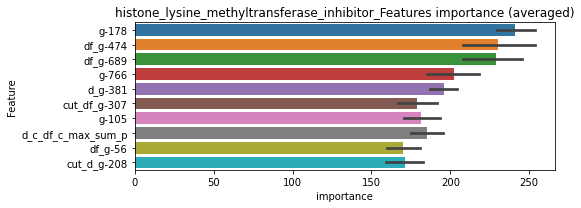

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184759	valid_1's binary_logloss: 0.0263136
[600]	training's binary_logloss: 0.00501882	valid_1's binary_logloss: 0.00915853
[900]	training's binary_logloss: 0.0025794	valid_1's binary_logloss: 0.0054632
[1200]	training's binary_logloss: 0.00171615	valid_1's binary_logloss: 0.0040402
[1500]	training's binary_logloss: 0.00128552	valid_1's binary_logloss: 0.0032537
[1800]	training's binary_logloss: 0.00104008	valid_1's binary_logloss: 0.00280044
[2100]	training's binary_logloss: 0.000881585	valid_1's binary_logloss: 0.00249423
[2400]	training's binary_logloss: 0.000772142	valid_1's binary_logloss: 0.00227363
[2700]	training's binary_logloss: 0.00069168	valid_1's binary_logloss: 0.00209446
[3000]	training's binary_logloss: 0.000630549	valid_1's binary_logloss: 0.00196242
[3300]	training's binary_logloss: 0.000583016	valid_1's binary_logloss: 0.00185597
[3600]	training's binary_logloss: 0.000547

len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184163	valid_1's binary_logloss: 0.0295397
[600]	training's binary_logloss: 0.00498612	valid_1's binary_logloss: 0.0126994
[900]	training's binary_logloss: 0.00256707	valid_1's binary_logloss: 0.00910252
[1200]	training's binary_logloss: 0.00170396	valid_1's binary_logloss: 0.007609
[1500]	training's binary_logloss: 0.00128623	valid_1's binary_logloss: 0.00684097
[1800]	training's binary_logloss: 0.00103817	valid_1's binary_logloss: 0.00627507
[2100]	training's binary_logloss: 0.000879875	valid_1's binary_logloss: 0.00594474
[2400]	training's binary_logloss: 0.000771795	valid_1's binary_logloss: 0.00570892
[2700]	training's binary_logloss: 0.000689509	valid_1's binary_logloss: 0.00552443
[3000]	training's binary_logloss: 0.000630591	valid_1's binary_logloss: 0.00540987
Early stopping, best iteration is:
[2975]	training's binary_logloss: 0.000634991	valid_1's binary_logloss: 0.00540842


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182091	valid_1's binary_logloss: 0.0294585
[600]	training's binary_logloss: 0.0049672	valid_1's binary_logloss: 0.0120906
[900]	training's binary_logloss: 0.00257081	valid_1's binary_logloss: 0.00814523
[1200]	training's binary_logloss: 0.00170584	valid_1's binary_logloss: 0.00654323
[1500]	training's binary_logloss: 0.00128176	valid_1's binary_logloss: 0.00575326
[1800]	training's binary_logloss: 0.00103425	valid_1's binary_logloss: 0.00518413
[2100]	training's binary_logloss: 0.000880152	valid_1's binary_logloss: 0.00484605
[2400]	training's binary_logloss: 0.000770776	valid_1's binary_logloss: 0.00459671
[2700]	training's binary_logloss: 0.000689869	valid_1's binary_logloss: 0.00439935
[3000]	training's binary_logloss: 0.000629113	valid_1's binary_logloss: 0.00422289
[3300]	training's binary_logloss: 0.000582409	valid_1's binary_logloss: 0.00409192
[3600]	training's binary_logloss: 0.000

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178624	valid_1's binary_logloss: 0.0341451
[600]	training's binary_logloss: 0.00490101	valid_1's binary_logloss: 0.0167169
[900]	training's binary_logloss: 0.00253469	valid_1's binary_logloss: 0.0126523
[1200]	training's binary_logloss: 0.00168653	valid_1's binary_logloss: 0.0111071
[1500]	training's binary_logloss: 0.00127034	valid_1's binary_logloss: 0.0102383
[1800]	training's binary_logloss: 0.00102534	valid_1's binary_logloss: 0.00961397
Early stopping, best iteration is:
[1800]	training's binary_logloss: 0.00102534	valid_1's binary_logloss: 0.00961397


histone_lysine_methyltransferase_inhibitor logloss: 0.005120440271760806


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191171	valid_1's binary_logloss: 0.0720967
[600]	training's binary_logloss: 0.0027508	valid_1's binary_logloss: 0.0505327
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00162166	valid_1's binary_logloss: 0.0478793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210099	valid_1's binary_logloss: 0.049149
[600]	training's binary_logloss: 0.00304997	valid_1's binary_logloss: 0.0200071
[900]	training's binary_logloss: 0.00117841	valid_1's binary_logloss: 0.0149175
[1200]	training's binary_logloss: 0.00077747	valid_1's binary_logloss: 0.0134656
Early stopping, best iteration is:
[1255]	training's binary_logloss: 0.000748249	valid_1's binary_logloss: 0.0133367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209574	valid_1's binary_logloss: 0.0433823
[600]	training's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0086505, Threshold: 0.1016830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.07118, conf_1:0.13219
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.1016830
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_2: 0.1216830
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_3: 0.1416830
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_4: 0.1616830
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_5: 0.1816830
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_6: 0.2016830
threshold: 0.2016830, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174386	valid_1's binary_logloss: 0.0616683
[600]	training's binary_logloss: 0.00255913	valid_1's binary_logloss: 0.0401674
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.00139046	valid_1's binary_logloss: 0.0372595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185087	valid_1's binary_logloss: 0.0409904
[600]	training's binary_logloss: 0.00272147	valid_1's binary_logloss: 0.0156126
[900]	training's binary_logloss: 0.00108297	valid_1's binary_logloss: 0.0115168
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000771895	valid_1's binary_logloss: 0.01063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018639	valid_1's binary_logloss: 0.0500565
[600]	training's binary_logloss: 0.00269653	valid_1's binary_logloss: 0.025162
[900]	training's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0469181, Threshold: 0.2016830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0140633 Vs.target_rate: 0.00302, Num_p_label: 56.0, conf_0:0.16135, conf_1:0.24202
Num_p_label: 56.0, Expected: 12.0, Adj_threshold_1: 0.2016830
Num_p_label: 53.0, Expected: 12.0, Adj_threshold_2: 0.2216830
Num_p_label: 48.0, Expected: 12.0, Adj_threshold_3: 0.2416830
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_4: 0.2616830
Num_p_label: 45.0, Expected: 12.0, Adj_threshold_5: 0.2816830
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_6: 0.3016830
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_7: 0.3216830
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_8: 0.3416830
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_9: 0.3616830
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_10: 0.3816830
threshold: 0.4016830, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186276	valid_1's binary_logloss: 0.0428335
[600]	training's binary_logloss: 0.00269677	valid_1's binary_logloss: 0.0186854
[900]	training's binary_logloss: 0.00108314	valid_1's binary_logloss: 0.0152067
[1200]	training's binary_logloss: 0.000721679	valid_1's binary_logloss: 0.0141876
Early stopping, best iteration is:
[1180]	training's binary_logloss: 0.000736762	valid_1's binary_logloss: 0.0141345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017273	valid_1's binary_logloss: 0.0543432
[600]	training's binary_logloss: 0.00254563	valid_1's binary_logloss: 0.0291412
[900]	training's binary_logloss: 0.00104166	valid_1's binary_logloss: 0.0233817
Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.000742032	valid_1's binary_logloss: 0.0220173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0503878, Threshold: 0.4016830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0097941 Vs.target_rate: 0.00302, Num_p_label: 39.0, conf_0:0.36151, conf_1:0.44185
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_1: 0.4016830
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_2: 0.4216830
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_3: 0.4416830
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_4: 0.4616830
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_5: 0.4816830
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_6: 0.5016830
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.5216830
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_8: 0.5416830
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_9: 0.5616830
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_10: 0.5816830
threshold: 0.6016830, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


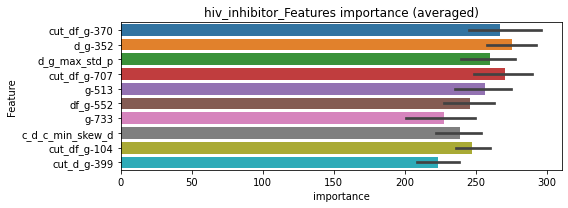

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0339259	valid_1's binary_logloss: 0.0701399
[600]	training's binary_logloss: 0.0102812	valid_1's binary_logloss: 0.0404689
[900]	training's binary_logloss: 0.00518921	valid_1's binary_logloss: 0.0322085
[1200]	training's binary_logloss: 0.00333409	valid_1's binary_logloss: 0.0292398
[1500]	training's binary_logloss: 0.00243844	valid_1's binary_logloss: 0.0275241
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.00213762	valid_1's binary_logloss: 0.0269102


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0347906	valid_1's binary_logloss: 0.0647123
[600]	training's binary_logloss: 0.0104086	valid_1's binary_logloss: 0.0353137
[900]	training's binary_logloss: 0.00522149	valid_1's binary_logloss: 0.0273464
[1200]	training's binary_logloss: 0.00335013	valid_1's binary_logloss: 0.0240656
[1500]	training's binary_logloss: 0.00245031	valid_1's binary_logloss: 0.0221964
[1800]	training's binary_logloss: 0.00193479	valid_1's binary_logloss: 0.0210212
[2100]	training's binary_logloss: 0.00160175	valid_1's binary_logloss: 0.0203211
Early stopping, best iteration is:
[2127]	training's binary_logloss: 0.00157858	valid_1's binary_logloss: 0.0202126


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0346848	valid_1's binary_logloss: 0.0711208
[600]	training's binary_logloss: 0.0105098	valid_1's binary_logloss: 0.0392687
[900]	training's binary_logloss: 0.00524347	valid_1's binary_logloss: 0.0295567
[1200]	training's binary_logloss: 0.00336095	valid_1's binary_logloss: 0.0255679
[1500]	training's binary_logloss: 0.00245026	valid_1's binary_logloss: 0.0234654
[1800]	training's binary_logloss: 0.00192659	valid_1's binary_logloss: 0.0219836
Early stopping, best iteration is:
[1899]	training's binary_logloss: 0.00180369	valid_1's binary_logloss: 0.0216223


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0348467	valid_1's binary_logloss: 0.0677914
[600]	training's binary_logloss: 0.0105355	valid_1's binary_logloss: 0.0379376
[900]	training's binary_logloss: 0.00528593	valid_1's binary_logloss: 0.0295215
[1200]	training's binary_logloss: 0.00339394	valid_1's binary_logloss: 0.0261308
[1500]	training's binary_logloss: 0.00247808	valid_1's binary_logloss: 0.0242604
Early stopping, best iteration is:
[1653]	training's binary_logloss: 0.00217545	valid_1's binary_logloss: 0.0235195


hiv_inhibitor logloss: 0.023066405611782394


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246, target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0923884	valid_1's binary_logloss: 0.262443
[600]	training's binary_logloss: 0.0259762	valid_1's binary_logloss: 0.224532
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.0173309	valid_1's binary_logloss: 0.220337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0886902	valid_1's binary_logloss: 0.286639
[600]	training's binary_logloss: 0.0246902	valid_1's binary_logloss: 0.267046
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.0234186	valid_1's binary_logloss: 0.266393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0929222	valid_1's binary_logloss: 0.272382
[600]	training's binary_logloss: 0.0252523	valid_1's binary_logloss: 0.239601
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.0211531	valid_1's binary_logloss: 0.23744
Training un

1 / 3 AUC score:0.903
y_Threshold: 0.0780163, Threshold: 0.4020972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 414 → Positive_corect_labels: 507/3481
p_label_rate: 0.0100452 Vs.target_rate: 0.01188, Num_p_label: 40.0, conf_0:0.28147, conf_1:0.52273
threshold: 0.4020972, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 507.0/3481, y_label_rate: 0.1456478
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.055086	valid_1's binary_logloss: 0.198896
[600]	training's binary_logloss: 0.0117017	valid_1's binary_logloss: 0.158555
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.00649929	valid_1's binary_logloss: 0.151881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0559115	valid_1's binary_logloss: 0.197537
[600]	training's binary_logloss: 0.0119776	valid_1's binary_logloss: 0.16705
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.0118262	valid_1's binary_logloss: 0.166499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0559659	valid_1's binary_logloss: 0.173856
[600]	training's binary_logloss: 0.0118156	valid_1's binary_logloss: 0.127116
[900]	training's binary_logloss: 0.00384936	valid_1's binary_logloss: 0.116766
Early stopping, best iteration is:
[924]	trai

2 / 3 AUC score:0.980
y_Threshold: 0.0724954, Threshold: 0.4020972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 445.0/3357
p_label_rate: 0.0133099 Vs.target_rate: 0.01188, Num_p_label: 53.0, conf_0:0.32168, conf_1:0.48252
threshold: 0.4020972, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 445.0/3357, y_label_rate: 0.1325588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.042719	valid_1's binary_logloss: 0.175531
[600]	training's binary_logloss: 0.00808724	valid_1's binary_logloss: 0.150003
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00581768	valid_1's binary_logloss: 0.148618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0467278	valid_1's binary_logloss: 0.152535
[600]	training's binary_logloss: 0.00893045	valid_1's binary_logloss: 0.119052
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00574286	valid_1's binary_logloss: 0.116891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.043825	valid_1's binary_logloss: 0.155309
[600]	training's binary_logloss: 0.00841176	valid_1's binary_logloss: 0.122151
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00530812	valid_1's binary_logloss: 0.11963
Trainin

3 / 3 AUC score:0.979
y_Threshold: 0.0636284, Threshold: 0.4020972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 399.0/3265
p_label_rate: 0.0133099 Vs.target_rate: 0.01188, Num_p_label: 53.0, conf_0:0.36189, conf_1:0.44231
threshold: 0.4020972, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 399.0/3265, y_label_rate: 0.1222052


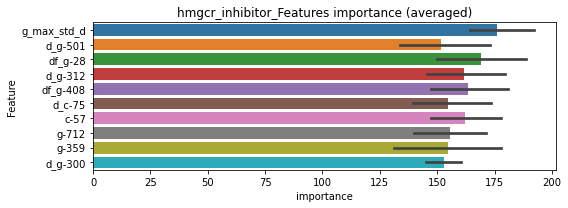

len(train_index) : 2448
len(valid_index) : 817
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0590249	valid_1's binary_logloss: 0.135791
[600]	training's binary_logloss: 0.0204243	valid_1's binary_logloss: 0.0937305
[900]	training's binary_logloss: 0.0104458	valid_1's binary_logloss: 0.0788862
[1200]	training's binary_logloss: 0.00663612	valid_1's binary_logloss: 0.0727419
[1500]	training's binary_logloss: 0.00476807	valid_1's binary_logloss: 0.0697492
Early stopping, best iteration is:
[1626]	training's binary_logloss: 0.00425805	valid_1's binary_logloss: 0.068504


len(train_index) : 2449
len(valid_index) : 816
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.058642	valid_1's binary_logloss: 0.138906
[600]	training's binary_logloss: 0.0202388	valid_1's binary_logloss: 0.099303
[900]	training's binary_logloss: 0.0102983	valid_1's binary_logloss: 0.0892505
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.00780712	valid_1's binary_logloss: 0.0862577


len(train_index) : 2449
len(valid_index) : 816
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0575613	valid_1's binary_logloss: 0.153724
[600]	training's binary_logloss: 0.0198145	valid_1's binary_logloss: 0.117658
[900]	training's binary_logloss: 0.0100857	valid_1's binary_logloss: 0.107291
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.00691149	valid_1's binary_logloss: 0.104389


len(train_index) : 2449
len(valid_index) : 816
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0591994	valid_1's binary_logloss: 0.144273
[600]	training's binary_logloss: 0.0200752	valid_1's binary_logloss: 0.106094
[900]	training's binary_logloss: 0.0101798	valid_1's binary_logloss: 0.0952985
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00976044	valid_1's binary_logloss: 0.0948708


hmgcr_inhibitor logloss: 0.08849921440213084


neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272, target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0289131	valid_1's binary_logloss: 0.090994
[600]	training's binary_logloss: 0.00472262	valid_1's binary_logloss: 0.0577694
[900]	training's binary_logloss: 0.00164427	valid_1's binary_logloss: 0.0525927
Early stopping, best iteration is:
[1119]	training's binary_logloss: 0.00110079	valid_1's binary_logloss: 0.0510164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284878	valid_1's binary_logloss: 0.0718439
[600]	training's binary_logloss: 0.00463084	valid_1's binary_logloss: 0.0351865
[900]	training's binary_logloss: 0.00166349	valid_1's binary_logloss: 0.0272347
[1200]	training's binary_logloss: 0.00101214	valid_1's binary_logloss: 0.0251699
Early stopping, best iteration is:
[1361]	training's binary_logloss: 0.000878793	valid_1's binary_logloss: 0.0246747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0140430, Threshold: 0.1681752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00391, Num_p_label: 40.0, conf_0:0.11772, conf_1:0.21863
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1681752
Num_p_label: 38.0, Expected: 15.6, Adj_threshold_2: 0.1881752
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_3: 0.2081752
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_4: 0.2281752
Num_p_label: 27.0, Expected: 15.6, Adj_threshold_5: 0.2481752
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_6: 0.2681752
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_7: 0.2881752
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_8: 0.3081752
threshold: 0.3081752, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254355	valid_1's binary_logloss: 0.0931466
[600]	training's binary_logloss: 0.00386482	valid_1's binary_logloss: 0.056143
[900]	training's binary_logloss: 0.0014448	valid_1's binary_logloss: 0.0492688
Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.000946025	valid_1's binary_logloss: 0.0473211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262132	valid_1's binary_logloss: 0.0743739
[600]	training's binary_logloss: 0.00401771	valid_1's binary_logloss: 0.0407662
[900]	training's binary_logloss: 0.00149678	valid_1's binary_logloss: 0.0350874
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.000972762	valid_1's binary_logloss: 0.0333156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257146	valid_1's binary_logloss: 0.0638028
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0603743, Threshold: 0.3081752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 640.0/3766
p_label_rate: 0.0251130 Vs.target_rate: 0.00391, Num_p_label: 100.0, conf_0:0.24654, conf_1:0.36981
Num_p_label: 100.0, Expected: 15.6, Adj_threshold_1: 0.3081752
Num_p_label: 94.0, Expected: 15.6, Adj_threshold_2: 0.3281752
Num_p_label: 89.0, Expected: 15.6, Adj_threshold_3: 0.3481752
Num_p_label: 85.0, Expected: 15.6, Adj_threshold_4: 0.3681752
Num_p_label: 81.0, Expected: 15.6, Adj_threshold_5: 0.3881752
Num_p_label: 81.0, Expected: 15.6, Adj_threshold_6: 0.4081752
Num_p_label: 76.0, Expected: 15.6, Adj_threshold_7: 0.4281752
Num_p_label: 72.0, Expected: 15.6, Adj_threshold_8: 0.4481752
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_9: 0.4681752
Num_p_label: 67.0, Expected: 15.6, Adj_threshold_10: 0.4881752
threshold: 0.5081752, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 640.0/3766, y_label_rate: 0.16994

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230767	valid_1's binary_logloss: 0.0722738
[600]	training's binary_logloss: 0.00354346	valid_1's binary_logloss: 0.043204
[900]	training's binary_logloss: 0.00135163	valid_1's binary_logloss: 0.0362601
Early stopping, best iteration is:
[1136]	training's binary_logloss: 0.000915711	valid_1's binary_logloss: 0.0346547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249955	valid_1's binary_logloss: 0.0647211
[600]	training's binary_logloss: 0.0038003	valid_1's binary_logloss: 0.0326462
[900]	training's binary_logloss: 0.00141908	valid_1's binary_logloss: 0.0252733
Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.000969109	valid_1's binary_logloss: 0.0233661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241839	valid_1's binary_logloss: 0.0608692
[600]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0720215, Threshold: 0.5081752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0180814 Vs.target_rate: 0.00391, Num_p_label: 72.0, conf_0:0.45736, conf_1:0.55899
Num_p_label: 72.0, Expected: 15.6, Adj_threshold_1: 0.5081752
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_2: 0.5281752
Num_p_label: 66.0, Expected: 15.6, Adj_threshold_3: 0.5481752
Num_p_label: 63.0, Expected: 15.6, Adj_threshold_4: 0.5681752
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_5: 0.5881752
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_6: 0.6081752
Num_p_label: 48.0, Expected: 15.6, Adj_threshold_7: 0.6281752
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_8: 0.6481752
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_9: 0.6681752
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_10: 0.6881752
threshold: 0.7081752, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 634.0/3754, y_label_rate: 0.1688865

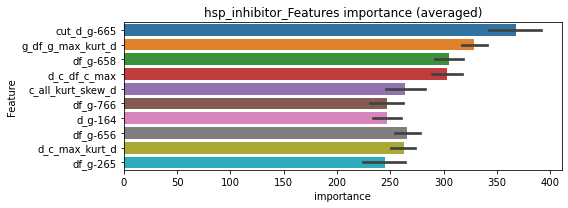

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0397818	valid_1's binary_logloss: 0.0819382
[600]	training's binary_logloss: 0.0125878	valid_1's binary_logloss: 0.0457221
[900]	training's binary_logloss: 0.00635237	valid_1's binary_logloss: 0.0353017
[1200]	training's binary_logloss: 0.00409545	valid_1's binary_logloss: 0.0310468
[1500]	training's binary_logloss: 0.00297209	valid_1's binary_logloss: 0.0284966
[1800]	training's binary_logloss: 0.00233409	valid_1's binary_logloss: 0.0268077
[2100]	training's binary_logloss: 0.00193198	valid_1's binary_logloss: 0.0255927
[2400]	training's binary_logloss: 0.00165029	valid_1's binary_logloss: 0.0249063
[2700]	training's binary_logloss: 0.00144865	valid_1's binary_logloss: 0.0241921
Early stopping, best iteration is:
[2705]	training's binary_logloss: 0.00144562	valid_1's binary_logloss: 0.0241722


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423439	valid_1's binary_logloss: 0.0779091
[600]	training's binary_logloss: 0.0131183	valid_1's binary_logloss: 0.0394717
[900]	training's binary_logloss: 0.00662306	valid_1's binary_logloss: 0.0284894
[1200]	training's binary_logloss: 0.00423009	valid_1's binary_logloss: 0.0244105
[1500]	training's binary_logloss: 0.00307496	valid_1's binary_logloss: 0.022082
[1800]	training's binary_logloss: 0.00240901	valid_1's binary_logloss: 0.0206417
[2100]	training's binary_logloss: 0.00198615	valid_1's binary_logloss: 0.0198064
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.00190004	valid_1's binary_logloss: 0.0195917


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0415578	valid_1's binary_logloss: 0.0899993
[600]	training's binary_logloss: 0.0128821	valid_1's binary_logloss: 0.0539401
[900]	training's binary_logloss: 0.00648641	valid_1's binary_logloss: 0.0427653
[1200]	training's binary_logloss: 0.00414857	valid_1's binary_logloss: 0.0384835
[1500]	training's binary_logloss: 0.00302098	valid_1's binary_logloss: 0.035701
[1800]	training's binary_logloss: 0.00236662	valid_1's binary_logloss: 0.0340032
[2100]	training's binary_logloss: 0.0019505	valid_1's binary_logloss: 0.0327847
Early stopping, best iteration is:
[2361]	training's binary_logloss: 0.001698	valid_1's binary_logloss: 0.0319756


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0409491	valid_1's binary_logloss: 0.0819991
[600]	training's binary_logloss: 0.0127254	valid_1's binary_logloss: 0.0453579
[900]	training's binary_logloss: 0.0064667	valid_1's binary_logloss: 0.0342063
[1200]	training's binary_logloss: 0.00413598	valid_1's binary_logloss: 0.0292891
[1500]	training's binary_logloss: 0.00301757	valid_1's binary_logloss: 0.0263912
[1800]	training's binary_logloss: 0.00236848	valid_1's binary_logloss: 0.0247162
[2100]	training's binary_logloss: 0.00195298	valid_1's binary_logloss: 0.0232121
Early stopping, best iteration is:
[2183]	training's binary_logloss: 0.00186477	valid_1's binary_logloss: 0.0228988


hsp_inhibitor logloss: 0.024658095087380427


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106362	valid_1's binary_logloss: 0.0393241
[600]	training's binary_logloss: 0.00137062	valid_1's binary_logloss: 0.0219275
[900]	training's binary_logloss: 0.000613368	valid_1's binary_logloss: 0.0189964
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000610395	valid_1's binary_logloss: 0.0189418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011037	valid_1's binary_logloss: 0.0230707
[600]	training's binary_logloss: 0.00141081	valid_1's binary_logloss: 0.00931042
[900]	training's binary_logloss: 0.000636205	valid_1's binary_logloss: 0.0079291
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00057096	valid_1's binary_logloss: 0.00771908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110254	valid_1's binary_logloss: 0.0194588
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0035073, Threshold: 0.0253621, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01775, conf_1:0.03297
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0253621
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.0453621
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_3: 0.0653621
threshold: 0.0653621, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00954931	valid_1's binary_logloss: 0.0370974
[600]	training's binary_logloss: 0.00124975	valid_1's binary_logloss: 0.0218396
[900]	training's binary_logloss: 0.00057523	valid_1's binary_logloss: 0.0199589
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000588679	valid_1's binary_logloss: 0.0198564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00977175	valid_1's binary_logloss: 0.0234288
[600]	training's binary_logloss: 0.0013182	valid_1's binary_logloss: 0.0104094
[900]	training's binary_logloss: 0.000604117	valid_1's binary_logloss: 0.00903627
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000536896	valid_1's binary_logloss: 0.00883661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105465	valid_1's binary_logloss: 0.0184931
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0192381, Threshold: 0.0653621, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0145655 Vs.target_rate: 0.00155, Num_p_label: 58.0, conf_0:0.05229, conf_1:0.07843
Num_p_label: 58.0, Expected: 6.2, Adj_threshold_1: 0.0653621
Num_p_label: 48.0, Expected: 6.2, Adj_threshold_2: 0.0853621
Num_p_label: 43.0, Expected: 6.2, Adj_threshold_3: 0.1053621
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_4: 0.1253621
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_5: 0.1453621
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_6: 0.1653621
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_7: 0.1853621
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_8: 0.2053621
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_9: 0.2253621
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_10: 0.2453621
threshold: 0.2453621, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00919968	valid_1's binary_logloss: 0.0260425
[600]	training's binary_logloss: 0.00123612	valid_1's binary_logloss: 0.0123165
[900]	training's binary_logloss: 0.00057392	valid_1's binary_logloss: 0.0104117
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.010204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101832	valid_1's binary_logloss: 0.0166166
[600]	training's binary_logloss: 0.00132371	valid_1's binary_logloss: 0.00410975
[900]	training's binary_logloss: 0.000603304	valid_1's binary_logloss: 0.00261672
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.00052068	valid_1's binary_logloss: 0.00243151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988858	valid_1's binary_logloss: 0.0267045
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0454255, Threshold: 0.2453621, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0037670 Vs.target_rate: 0.00155, Num_p_label: 15.0, conf_0:0.22083, conf_1:0.26990
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.2453621
threshold: 0.2453621, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


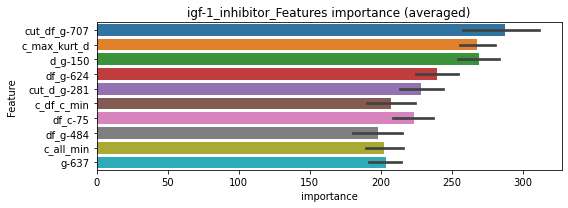

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206365	valid_1's binary_logloss: 0.0413592
[600]	training's binary_logloss: 0.00571433	valid_1's binary_logloss: 0.0211528
[900]	training's binary_logloss: 0.00293254	valid_1's binary_logloss: 0.0163867
[1200]	training's binary_logloss: 0.00192603	valid_1's binary_logloss: 0.0142476
[1500]	training's binary_logloss: 0.00143825	valid_1's binary_logloss: 0.013067
[1800]	training's binary_logloss: 0.00116024	valid_1's binary_logloss: 0.0125015
[2100]	training's binary_logloss: 0.000979535	valid_1's binary_logloss: 0.0119735
[2400]	training's binary_logloss: 0.000854596	valid_1's binary_logloss: 0.0115779
Early stopping, best iteration is:
[2546]	training's binary_logloss: 0.000807515	valid_1's binary_logloss: 0.0114394


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219491	valid_1's binary_logloss: 0.029267
[600]	training's binary_logloss: 0.00603397	valid_1's binary_logloss: 0.0102809
[900]	training's binary_logloss: 0.00305682	valid_1's binary_logloss: 0.0061312
[1200]	training's binary_logloss: 0.0020075	valid_1's binary_logloss: 0.0045222
[1500]	training's binary_logloss: 0.00149547	valid_1's binary_logloss: 0.00369438
[1800]	training's binary_logloss: 0.00119769	valid_1's binary_logloss: 0.0032115
[2100]	training's binary_logloss: 0.00101054	valid_1's binary_logloss: 0.00289335
[2400]	training's binary_logloss: 0.000880701	valid_1's binary_logloss: 0.00265699
[2700]	training's binary_logloss: 0.000785209	valid_1's binary_logloss: 0.00246695
[3000]	training's binary_logloss: 0.000714215	valid_1's binary_logloss: 0.00234341
[3300]	training's binary_logloss: 0.000659946	valid_1's binary_logloss: 0.00223786
[3600]	training's binary_logloss: 0.00061756

len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215782	valid_1's binary_logloss: 0.0392201
[600]	training's binary_logloss: 0.00590994	valid_1's binary_logloss: 0.0207915
[900]	training's binary_logloss: 0.00299263	valid_1's binary_logloss: 0.01679
[1200]	training's binary_logloss: 0.00196657	valid_1's binary_logloss: 0.0151434
Early stopping, best iteration is:
[1434]	training's binary_logloss: 0.00155281	valid_1's binary_logloss: 0.0144825


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212443	valid_1's binary_logloss: 0.0371826
[600]	training's binary_logloss: 0.00585058	valid_1's binary_logloss: 0.0172813
[900]	training's binary_logloss: 0.00295883	valid_1's binary_logloss: 0.0124204
[1200]	training's binary_logloss: 0.00194973	valid_1's binary_logloss: 0.0103472
[1500]	training's binary_logloss: 0.00145397	valid_1's binary_logloss: 0.00921009
[1800]	training's binary_logloss: 0.00116854	valid_1's binary_logloss: 0.00843716
[2100]	training's binary_logloss: 0.000986261	valid_1's binary_logloss: 0.00793187
[2400]	training's binary_logloss: 0.0008603	valid_1's binary_logloss: 0.0075452
[2700]	training's binary_logloss: 0.000768298	valid_1's binary_logloss: 0.00724367
[3000]	training's binary_logloss: 0.00070035	valid_1's binary_logloss: 0.00706992
Early stopping, best iteration is:
[3229]	training's binary_logloss: 0.000657484	valid_1's binary_logloss: 0.00692679


igf-1_inhibitor logloss: 0.008709394626802525


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698164	valid_1's binary_logloss: 0.0226272
[600]	training's binary_logloss: 0.000917705	valid_1's binary_logloss: 0.00977555
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00049268	valid_1's binary_logloss: 0.00802644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707161	valid_1's binary_logloss: 0.0152767
[600]	training's binary_logloss: 0.00093158	valid_1's binary_logloss: 0.00387259
[900]	training's binary_logloss: 0.000471723	valid_1's binary_logloss: 0.00254565
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000427282	valid_1's binary_logloss: 0.0024249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716114	valid_1's binary_logloss: 0.0129696
[600]	training's binary_logloss: 0.00095098	valid_1's binary_logloss: 0.00305479
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0036804, Threshold: 0.0125566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00879, conf_1:0.01632
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0125566
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0325566
threshold: 0.0325566, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629386	valid_1's binary_logloss: 0.0225373
[600]	training's binary_logloss: 0.000857705	valid_1's binary_logloss: 0.0113092
[900]	training's binary_logloss: 0.00044126	valid_1's binary_logloss: 0.00971761
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000433804	valid_1's binary_logloss: 0.00967395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637334	valid_1's binary_logloss: 0.0132481
[600]	training's binary_logloss: 0.000855665	valid_1's binary_logloss: 0.00310748
[900]	training's binary_logloss: 0.000437957	valid_1's binary_logloss: 0.00201968
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000410893	valid_1's binary_logloss: 0.0019639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638156	valid_1's binary_logloss: 0.0105171
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0341200, Threshold: 0.0325566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00126, Num_p_label: 31.0, conf_0:0.02605, conf_1:0.03907
Num_p_label: 31.0, Expected: 5.0, Adj_threshold_1: 0.0325566
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.0525566
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_3: 0.0725566
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_4: 0.0925566
threshold: 0.0925566, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607435	valid_1's binary_logloss: 0.0327792
[600]	training's binary_logloss: 0.000815496	valid_1's binary_logloss: 0.0251775
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000831427	valid_1's binary_logloss: 0.0251082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626714	valid_1's binary_logloss: 0.0109878
[600]	training's binary_logloss: 0.000859996	valid_1's binary_logloss: 0.00237257
[900]	training's binary_logloss: 0.000446557	valid_1's binary_logloss: 0.00140759
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000425226	valid_1's binary_logloss: 0.00135656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632909	valid_1's binary_logloss: 0.0147259
[600]	training's binary_logloss: 0.00086559	valid_1's binary_logloss: 0.00403328
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0288060, Threshold: 0.0925566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0035158 Vs.target_rate: 0.00126, Num_p_label: 14.0, conf_0:0.08330, conf_1:0.10181
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0925566
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.1125566
threshold: 0.1125566, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


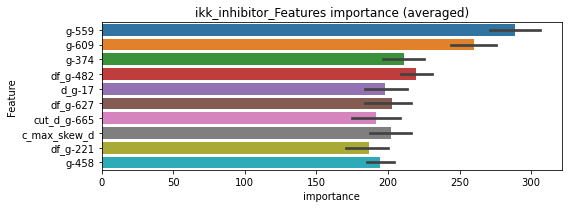

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154878	valid_1's binary_logloss: 0.0268197
[600]	training's binary_logloss: 0.00418544	valid_1's binary_logloss: 0.0113712
[900]	training's binary_logloss: 0.00218732	valid_1's binary_logloss: 0.00821124
[1200]	training's binary_logloss: 0.00147988	valid_1's binary_logloss: 0.00708981
[1500]	training's binary_logloss: 0.00112472	valid_1's binary_logloss: 0.00646913
Early stopping, best iteration is:
[1704]	training's binary_logloss: 0.00097519	valid_1's binary_logloss: 0.00606231


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155235	valid_1's binary_logloss: 0.0231392
[600]	training's binary_logloss: 0.00421511	valid_1's binary_logloss: 0.00792726
[900]	training's binary_logloss: 0.00221758	valid_1's binary_logloss: 0.00467394
[1200]	training's binary_logloss: 0.00149702	valid_1's binary_logloss: 0.00343968
[1500]	training's binary_logloss: 0.00114167	valid_1's binary_logloss: 0.0027985
[1800]	training's binary_logloss: 0.00093215	valid_1's binary_logloss: 0.00240167
[2100]	training's binary_logloss: 0.000794154	valid_1's binary_logloss: 0.00211478
[2400]	training's binary_logloss: 0.00069769	valid_1's binary_logloss: 0.00191436
[2700]	training's binary_logloss: 0.000628472	valid_1's binary_logloss: 0.00176586
[3000]	training's binary_logloss: 0.000575126	valid_1's binary_logloss: 0.00164974
[3300]	training's binary_logloss: 0.000533339	valid_1's binary_logloss: 0.00155774
[3600]	training's binary_logloss: 0.000

len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157089	valid_1's binary_logloss: 0.0230742
[600]	training's binary_logloss: 0.00426485	valid_1's binary_logloss: 0.00812714
[900]	training's binary_logloss: 0.00223074	valid_1's binary_logloss: 0.00490694
[1200]	training's binary_logloss: 0.00150582	valid_1's binary_logloss: 0.00367717
[1500]	training's binary_logloss: 0.00114708	valid_1's binary_logloss: 0.00302209
[1800]	training's binary_logloss: 0.00093788	valid_1's binary_logloss: 0.00264329
[2100]	training's binary_logloss: 0.000799921	valid_1's binary_logloss: 0.00236195
[2400]	training's binary_logloss: 0.000702795	valid_1's binary_logloss: 0.00215614
[2700]	training's binary_logloss: 0.000632284	valid_1's binary_logloss: 0.002007
[3000]	training's binary_logloss: 0.000578707	valid_1's binary_logloss: 0.001886
[3300]	training's binary_logloss: 0.00053733	valid_1's binary_logloss: 0.00179508
[3600]	training's binary_logloss: 0.000505

len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158682	valid_1's binary_logloss: 0.0218536
[600]	training's binary_logloss: 0.00431458	valid_1's binary_logloss: 0.00759927
[900]	training's binary_logloss: 0.00225595	valid_1's binary_logloss: 0.00460485
[1200]	training's binary_logloss: 0.00151748	valid_1's binary_logloss: 0.00346963
[1500]	training's binary_logloss: 0.00115468	valid_1's binary_logloss: 0.00286357
[1800]	training's binary_logloss: 0.000942614	valid_1's binary_logloss: 0.00249305
[2100]	training's binary_logloss: 0.000801385	valid_1's binary_logloss: 0.0022207
[2400]	training's binary_logloss: 0.000706526	valid_1's binary_logloss: 0.00204349
[2700]	training's binary_logloss: 0.000636039	valid_1's binary_logloss: 0.00190924
[3000]	training's binary_logloss: 0.000582571	valid_1's binary_logloss: 0.00180434
[3300]	training's binary_logloss: 0.000540671	valid_1's binary_logloss: 0.00171415
[3600]	training's binary_logloss: 0.0

ikk_inhibitor logloss: 0.002602374671127986


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618885	valid_1's binary_logloss: 0.0140176
[600]	training's binary_logloss: 0.000846987	valid_1's binary_logloss: 0.0054509
[900]	training's binary_logloss: 0.000442645	valid_1's binary_logloss: 0.00425636
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000443281	valid_1's binary_logloss: 0.00425462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614728	valid_1's binary_logloss: 0.020625
[600]	training's binary_logloss: 0.000838451	valid_1's binary_logloss: 0.0111472
[900]	training's binary_logloss: 0.000432833	valid_1's binary_logloss: 0.0100445
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000436602	valid_1's binary_logloss: 0.0100298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651128	valid_1's binary_logloss: 0.00898434
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0027892, Threshold: 0.0196977, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.01379, conf_1:0.02561
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0196977
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_2: 0.0396977
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_3: 0.0596977
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_4: 0.0796977
threshold: 0.0796977, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574702	valid_1's binary_logloss: 0.0137419
[600]	training's binary_logloss: 0.000801861	valid_1's binary_logloss: 0.00506179
[900]	training's binary_logloss: 0.000426332	valid_1's binary_logloss: 0.00394876
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000432939	valid_1's binary_logloss: 0.0039438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558554	valid_1's binary_logloss: 0.0185133
[600]	training's binary_logloss: 0.000783753	valid_1's binary_logloss: 0.0106
[900]	training's binary_logloss: 0.000416842	valid_1's binary_logloss: 0.00977107
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000424084	valid_1's binary_logloss: 0.00975041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576255	valid_1's binary_logloss: 0.00889869
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0445938, Threshold: 0.0796977, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0067805 Vs.target_rate: 0.00130, Num_p_label: 27.0, conf_0:0.06376, conf_1:0.09564
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_1: 0.0796977
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_2: 0.0996977
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_3: 0.1196977
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.1396977
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.1596977
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_6: 0.1796977
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_7: 0.1996977
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_8: 0.2196977
threshold: 0.2196977, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574702	valid_1's binary_logloss: 0.0137419
[600]	training's binary_logloss: 0.000801861	valid_1's binary_logloss: 0.00506179
[900]	training's binary_logloss: 0.000426332	valid_1's binary_logloss: 0.00394876
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000432939	valid_1's binary_logloss: 0.0039438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558554	valid_1's binary_logloss: 0.0185133
[600]	training's binary_logloss: 0.000783753	valid_1's binary_logloss: 0.0106
[900]	training's binary_logloss: 0.000416842	valid_1's binary_logloss: 0.00977107
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000424084	valid_1's binary_logloss: 0.00975041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576255	valid_1's binary_logloss: 0.00889869
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0445938, Threshold: 0.2196977, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00130, Num_p_label: 12.0, conf_0:0.19773, conf_1:0.24167
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.2196977
threshold: 0.2196977, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


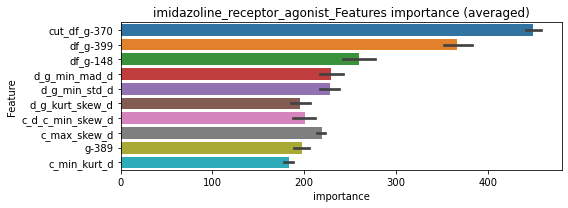

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153543	valid_1's binary_logloss: 0.0247973
[600]	training's binary_logloss: 0.00411725	valid_1's binary_logloss: 0.00966057
[900]	training's binary_logloss: 0.00213173	valid_1's binary_logloss: 0.00662315
[1200]	training's binary_logloss: 0.00142831	valid_1's binary_logloss: 0.00530347
[1500]	training's binary_logloss: 0.00108239	valid_1's binary_logloss: 0.00464897
[1800]	training's binary_logloss: 0.00087841	valid_1's binary_logloss: 0.00416419
[2100]	training's binary_logloss: 0.000748627	valid_1's binary_logloss: 0.00386043
[2400]	training's binary_logloss: 0.000659384	valid_1's binary_logloss: 0.00365842
[2700]	training's binary_logloss: 0.000593645	valid_1's binary_logloss: 0.0034824
Early stopping, best iteration is:
[2931]	training's binary_logloss: 0.000554396	valid_1's binary_logloss: 0.00339883


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149386	valid_1's binary_logloss: 0.0308852
[600]	training's binary_logloss: 0.00402083	valid_1's binary_logloss: 0.0175243
[900]	training's binary_logloss: 0.00209292	valid_1's binary_logloss: 0.0143154
[1200]	training's binary_logloss: 0.0014016	valid_1's binary_logloss: 0.012966
[1500]	training's binary_logloss: 0.0010636	valid_1's binary_logloss: 0.0122447
[1800]	training's binary_logloss: 0.0008648	valid_1's binary_logloss: 0.011745
[2100]	training's binary_logloss: 0.000738275	valid_1's binary_logloss: 0.0114033
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.000711495	valid_1's binary_logloss: 0.0113096


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154377	valid_1's binary_logloss: 0.0195495
[600]	training's binary_logloss: 0.0041692	valid_1's binary_logloss: 0.00637623
[900]	training's binary_logloss: 0.00215776	valid_1's binary_logloss: 0.00383862
[1200]	training's binary_logloss: 0.00144126	valid_1's binary_logloss: 0.00283419
[1500]	training's binary_logloss: 0.00109226	valid_1's binary_logloss: 0.00235606
[1800]	training's binary_logloss: 0.000887594	valid_1's binary_logloss: 0.00204677
[2100]	training's binary_logloss: 0.000756709	valid_1's binary_logloss: 0.00184022
[2400]	training's binary_logloss: 0.000665614	valid_1's binary_logloss: 0.00169348
[2700]	training's binary_logloss: 0.000598645	valid_1's binary_logloss: 0.0015847
[3000]	training's binary_logloss: 0.000549103	valid_1's binary_logloss: 0.00150378
[3300]	training's binary_logloss: 0.000510455	valid_1's binary_logloss: 0.00143684
[3600]	training's binary_logloss: 0.00

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152736	valid_1's binary_logloss: 0.0225354
[600]	training's binary_logloss: 0.0041037	valid_1's binary_logloss: 0.00846987
[900]	training's binary_logloss: 0.00213122	valid_1's binary_logloss: 0.00546614
[1200]	training's binary_logloss: 0.00143257	valid_1's binary_logloss: 0.0042392
[1500]	training's binary_logloss: 0.00108348	valid_1's binary_logloss: 0.00360212
[1800]	training's binary_logloss: 0.000881505	valid_1's binary_logloss: 0.00320351
[2100]	training's binary_logloss: 0.000752052	valid_1's binary_logloss: 0.00290806
[2400]	training's binary_logloss: 0.000660292	valid_1's binary_logloss: 0.00270391
[2700]	training's binary_logloss: 0.000593181	valid_1's binary_logloss: 0.00253592
[3000]	training's binary_logloss: 0.000543601	valid_1's binary_logloss: 0.00242208
[3300]	training's binary_logloss: 0.00050537	valid_1's binary_logloss: 0.00232555
[3600]	training's binary_logloss: 0.000

imidazoline_receptor_agonist logloss: 0.004572116297158933


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194184	valid_1's binary_logloss: 0.0575164
[600]	training's binary_logloss: 0.00298994	valid_1's binary_logloss: 0.0303171
[900]	training's binary_logloss: 0.00116942	valid_1's binary_logloss: 0.026571
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00121072	valid_1's binary_logloss: 0.0265252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021369	valid_1's binary_logloss: 0.0575217
[600]	training's binary_logloss: 0.0033013	valid_1's binary_logloss: 0.0317736
[900]	training's binary_logloss: 0.00125112	valid_1's binary_logloss: 0.0275827
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000893454	valid_1's binary_logloss: 0.0265014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212016	valid_1's binary_logloss: 0.0553628
[600]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0077301, Threshold: 0.0224645, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.01573, conf_1:0.02920
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0224645
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.0424645
threshold: 0.0424645, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189136	valid_1's binary_logloss: 0.0552455
[600]	training's binary_logloss: 0.00287514	valid_1's binary_logloss: 0.0326241
[900]	training's binary_logloss: 0.00114672	valid_1's binary_logloss: 0.0277659
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000878219	valid_1's binary_logloss: 0.026283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192016	valid_1's binary_logloss: 0.0558463
[600]	training's binary_logloss: 0.00291099	valid_1's binary_logloss: 0.0275683
[900]	training's binary_logloss: 0.00114295	valid_1's binary_logloss: 0.0229681
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000923478	valid_1's binary_logloss: 0.0223926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195794	valid_1's binary_logloss: 0.0497352
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0278857, Threshold: 0.0424645, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0067805 Vs.target_rate: 0.00307, Num_p_label: 27.0, conf_0:0.03397, conf_1:0.05096
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.0424645
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_2: 0.0624645
threshold: 0.0624645, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189722	valid_1's binary_logloss: 0.05673
[600]	training's binary_logloss: 0.00285112	valid_1's binary_logloss: 0.03288
[900]	training's binary_logloss: 0.00112573	valid_1's binary_logloss: 0.0282452
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000905004	valid_1's binary_logloss: 0.0275962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183932	valid_1's binary_logloss: 0.0557494
[600]	training's binary_logloss: 0.00276526	valid_1's binary_logloss: 0.0305921
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00127167	valid_1's binary_logloss: 0.0273931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185641	valid_1's binary_logloss: 0.051371
[600]	training's binary_logloss: 0.00279491	valid_1's binary_logloss: 0.0236213
[900]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0334556, Threshold: 0.0624645, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00307, Num_p_label: 14.0, conf_0:0.05622, conf_1:0.06871
threshold: 0.0624645, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


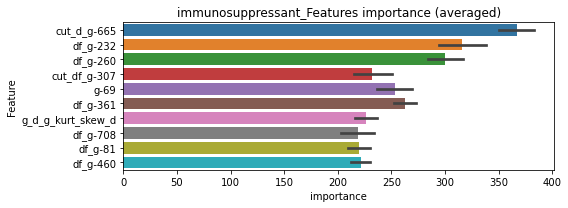

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034227	valid_1's binary_logloss: 0.0771995
[600]	training's binary_logloss: 0.0103872	valid_1's binary_logloss: 0.0475557
[900]	training's binary_logloss: 0.00526941	valid_1's binary_logloss: 0.039586
[1200]	training's binary_logloss: 0.00338345	valid_1's binary_logloss: 0.036195
[1500]	training's binary_logloss: 0.00247479	valid_1's binary_logloss: 0.0344426
Early stopping, best iteration is:
[1532]	training's binary_logloss: 0.00240707	valid_1's binary_logloss: 0.0343198


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0349415	valid_1's binary_logloss: 0.0765791
[600]	training's binary_logloss: 0.0105496	valid_1's binary_logloss: 0.046978
[900]	training's binary_logloss: 0.00532999	valid_1's binary_logloss: 0.0393038
[1200]	training's binary_logloss: 0.0034274	valid_1's binary_logloss: 0.0360318
[1500]	training's binary_logloss: 0.0025021	valid_1's binary_logloss: 0.0341744
Early stopping, best iteration is:
[1538]	training's binary_logloss: 0.00242151	valid_1's binary_logloss: 0.0340049


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0358667	valid_1's binary_logloss: 0.0632157
[600]	training's binary_logloss: 0.0109475	valid_1's binary_logloss: 0.0333247
[900]	training's binary_logloss: 0.0054994	valid_1's binary_logloss: 0.0246639
[1200]	training's binary_logloss: 0.00351881	valid_1's binary_logloss: 0.0209165
[1500]	training's binary_logloss: 0.00257743	valid_1's binary_logloss: 0.0190681
Early stopping, best iteration is:
[1611]	training's binary_logloss: 0.0023457	valid_1's binary_logloss: 0.018462


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035515	valid_1's binary_logloss: 0.0659875
[600]	training's binary_logloss: 0.0108683	valid_1's binary_logloss: 0.0350685
[900]	training's binary_logloss: 0.00546305	valid_1's binary_logloss: 0.0265454
[1200]	training's binary_logloss: 0.00350607	valid_1's binary_logloss: 0.0227529
[1500]	training's binary_logloss: 0.00256122	valid_1's binary_logloss: 0.0206807
[1800]	training's binary_logloss: 0.00202161	valid_1's binary_logloss: 0.0193261
[2100]	training's binary_logloss: 0.00167193	valid_1's binary_logloss: 0.0184584
[2400]	training's binary_logloss: 0.00143502	valid_1's binary_logloss: 0.0177178
[2700]	training's binary_logloss: 0.00126196	valid_1's binary_logloss: 0.0170285
[3000]	training's binary_logloss: 0.00113578	valid_1's binary_logloss: 0.0167263
Early stopping, best iteration is:
[3211]	training's binary_logloss: 0.00106219	valid_1's binary_logloss: 0.0164918


immunosuppressant logloss: 0.02581964085273096


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00753859	valid_1's binary_logloss: 0.0202895
[600]	training's binary_logloss: 0.00100863	valid_1's binary_logloss: 0.00924223
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000650949	valid_1's binary_logloss: 0.00817536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00795343	valid_1's binary_logloss: 0.0167506
[600]	training's binary_logloss: 0.00105734	valid_1's binary_logloss: 0.00552019
[900]	training's binary_logloss: 0.000526391	valid_1's binary_logloss: 0.00419566
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000503562	valid_1's binary_logloss: 0.00416911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00841503	valid_1's binary_logloss: 0.0115237
[600]	training's binary_logloss: 0.00108765	valid_1's binary_logloss: 0.00223276
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0031686, Threshold: 0.0110743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00775, conf_1:0.01440
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0110743
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0310743
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.0510743
threshold: 0.0510743, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676579	valid_1's binary_logloss: 0.0204153
[600]	training's binary_logloss: 0.000959197	valid_1's binary_logloss: 0.0102543
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000879316	valid_1's binary_logloss: 0.0100159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742466	valid_1's binary_logloss: 0.0141572
[600]	training's binary_logloss: 0.00100578	valid_1's binary_logloss: 0.00473128
[900]	training's binary_logloss: 0.000511524	valid_1's binary_logloss: 0.00363654
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000499571	valid_1's binary_logloss: 0.00362344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755281	valid_1's binary_logloss: 0.0104501
[600]	training's binary_logloss: 0.0010135	valid_1's binary_logloss: 0.00205804
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0196885, Threshold: 0.0510743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00126, Num_p_label: 20.0, conf_0:0.04086, conf_1:0.06129
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0510743
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.0710743
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_3: 0.0910743
threshold: 0.0910743, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676579	valid_1's binary_logloss: 0.0204153
[600]	training's binary_logloss: 0.000959197	valid_1's binary_logloss: 0.0102543
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000879316	valid_1's binary_logloss: 0.0100159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742466	valid_1's binary_logloss: 0.0141572
[600]	training's binary_logloss: 0.00100578	valid_1's binary_logloss: 0.00473128
[900]	training's binary_logloss: 0.000511524	valid_1's binary_logloss: 0.00363654
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000499571	valid_1's binary_logloss: 0.00362344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755281	valid_1's binary_logloss: 0.0104501
[600]	training's binary_logloss: 0.0010135	valid_1's binary_logloss: 0.00205804
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0196885, Threshold: 0.0910743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00126, Num_p_label: 9.0, conf_0:0.08197, conf_1:0.10018
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0910743
threshold: 0.0910743, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


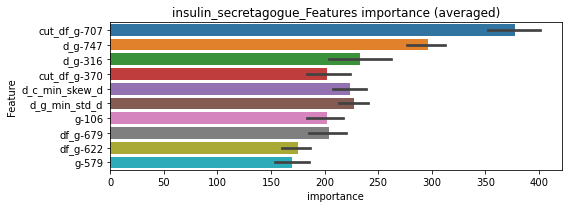

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169758	valid_1's binary_logloss: 0.0319617
[600]	training's binary_logloss: 0.00472013	valid_1's binary_logloss: 0.0157739
[900]	training's binary_logloss: 0.00247297	valid_1's binary_logloss: 0.0120708
[1200]	training's binary_logloss: 0.00166036	valid_1's binary_logloss: 0.0105652
Early stopping, best iteration is:
[1282]	training's binary_logloss: 0.00152351	valid_1's binary_logloss: 0.0102485


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177455	valid_1's binary_logloss: 0.0265382
[600]	training's binary_logloss: 0.00491033	valid_1's binary_logloss: 0.010853
[900]	training's binary_logloss: 0.00256298	valid_1's binary_logloss: 0.00741307
[1200]	training's binary_logloss: 0.001713	valid_1's binary_logloss: 0.00592464
[1500]	training's binary_logloss: 0.00129507	valid_1's binary_logloss: 0.00515538
[1800]	training's binary_logloss: 0.00104702	valid_1's binary_logloss: 0.0046635
[2100]	training's binary_logloss: 0.000889479	valid_1's binary_logloss: 0.00433514
[2400]	training's binary_logloss: 0.000781627	valid_1's binary_logloss: 0.00408797
[2700]	training's binary_logloss: 0.000702339	valid_1's binary_logloss: 0.00390606
[3000]	training's binary_logloss: 0.000641792	valid_1's binary_logloss: 0.003742
[3300]	training's binary_logloss: 0.000596311	valid_1's binary_logloss: 0.00362835
[3600]	training's binary_logloss: 0.00056245

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181098	valid_1's binary_logloss: 0.0226118
[600]	training's binary_logloss: 0.00496144	valid_1's binary_logloss: 0.00749991
[900]	training's binary_logloss: 0.00257423	valid_1's binary_logloss: 0.00436153
[1200]	training's binary_logloss: 0.00171485	valid_1's binary_logloss: 0.00316567
[1500]	training's binary_logloss: 0.00129735	valid_1's binary_logloss: 0.00254004
[1800]	training's binary_logloss: 0.00105127	valid_1's binary_logloss: 0.00214409
[2100]	training's binary_logloss: 0.000892616	valid_1's binary_logloss: 0.00187669
[2400]	training's binary_logloss: 0.000782176	valid_1's binary_logloss: 0.00169252
[2700]	training's binary_logloss: 0.000702738	valid_1's binary_logloss: 0.00155735
[3000]	training's binary_logloss: 0.000641929	valid_1's binary_logloss: 0.00145123
[3300]	training's binary_logloss: 0.000597171	valid_1's binary_logloss: 0.00137124
[3600]	training's binary_logloss: 0.0

len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171314	valid_1's binary_logloss: 0.0313439
[600]	training's binary_logloss: 0.00480292	valid_1's binary_logloss: 0.01482
[900]	training's binary_logloss: 0.00251466	valid_1's binary_logloss: 0.0110998
[1200]	training's binary_logloss: 0.00168537	valid_1's binary_logloss: 0.0097215
Early stopping, best iteration is:
[1469]	training's binary_logloss: 0.00130392	valid_1's binary_logloss: 0.00903764


insulin_secretagogue logloss: 0.005992856016513979


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284, target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140134	valid_1's binary_logloss: 0.0499059
[600]	training's binary_logloss: 0.00181981	valid_1's binary_logloss: 0.0303029
[900]	training's binary_logloss: 0.000761835	valid_1's binary_logloss: 0.0275656
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000668252	valid_1's binary_logloss: 0.0271707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137999	valid_1's binary_logloss: 0.0338221
[600]	training's binary_logloss: 0.00188326	valid_1's binary_logloss: 0.0140882
[900]	training's binary_logloss: 0.00079153	valid_1's binary_logloss: 0.0106097
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000615104	valid_1's binary_logloss: 0.00986305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014019	valid_1's binary_logloss: 0.0261091
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0053196, Threshold: 0.0160716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214, Num_p_label: 40.0, conf_0:0.01125, conf_1:0.02089
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0160716
Num_p_label: 8.0, Expected: 8.5, Adj_threshold_2: 0.0360716
threshold: 0.0360716, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131859	valid_1's binary_logloss: 0.0326581
[600]	training's binary_logloss: 0.00179585	valid_1's binary_logloss: 0.0153448
[900]	training's binary_logloss: 0.000757929	valid_1's binary_logloss: 0.0127509
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000624387	valid_1's binary_logloss: 0.012309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128385	valid_1's binary_logloss: 0.0283521
[600]	training's binary_logloss: 0.00175627	valid_1's binary_logloss: 0.00799828
[900]	training's binary_logloss: 0.000751624	valid_1's binary_logloss: 0.00485183
[1200]	training's binary_logloss: 0.000563361	valid_1's binary_logloss: 0.00422081
Early stopping, best iteration is:
[1206]	training's binary_logloss: 0.000561253	valid_1's binary_logloss: 0.00421245
Training until validation scores don't improve for 30 rounds
[300]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0285436, Threshold: 0.0360716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0082873 Vs.target_rate: 0.00214, Num_p_label: 33.0, conf_0:0.02886, conf_1:0.04329
Num_p_label: 33.0, Expected: 8.5, Adj_threshold_1: 0.0360716
Num_p_label: 15.0, Expected: 8.5, Adj_threshold_2: 0.0560716
threshold: 0.0560716, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118174	valid_1's binary_logloss: 0.0339514
[600]	training's binary_logloss: 0.00165186	valid_1's binary_logloss: 0.0156287
[900]	training's binary_logloss: 0.000722038	valid_1's binary_logloss: 0.0127412
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000604158	valid_1's binary_logloss: 0.0123497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127234	valid_1's binary_logloss: 0.0306245
[600]	training's binary_logloss: 0.00169695	valid_1's binary_logloss: 0.0126975
[900]	training's binary_logloss: 0.000729041	valid_1's binary_logloss: 0.0103324
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000752236	valid_1's binary_logloss: 0.0102906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124261	valid_1's binary_logloss: 0.0335541
[600]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0311100, Threshold: 0.0560716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0030136 Vs.target_rate: 0.00214, Num_p_label: 12.0, conf_0:0.05046, conf_1:0.06168
threshold: 0.0560716, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


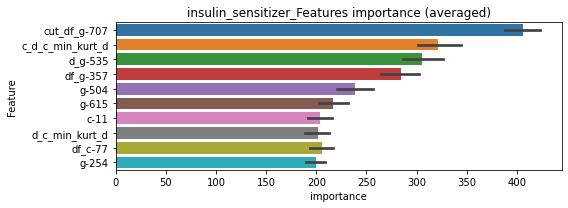

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262042	valid_1's binary_logloss: 0.0516129
[600]	training's binary_logloss: 0.00737603	valid_1's binary_logloss: 0.0266428
[900]	training's binary_logloss: 0.00370346	valid_1's binary_logloss: 0.0201253
[1200]	training's binary_logloss: 0.00241568	valid_1's binary_logloss: 0.0176024
[1500]	training's binary_logloss: 0.00178758	valid_1's binary_logloss: 0.0162913
[1800]	training's binary_logloss: 0.0014289	valid_1's binary_logloss: 0.0153905
[2100]	training's binary_logloss: 0.0011999	valid_1's binary_logloss: 0.0149005
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.00115299	valid_1's binary_logloss: 0.0147998


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263524	valid_1's binary_logloss: 0.0486235
[600]	training's binary_logloss: 0.00744817	valid_1's binary_logloss: 0.0247178
[900]	training's binary_logloss: 0.00375354	valid_1's binary_logloss: 0.0192585
[1200]	training's binary_logloss: 0.00244179	valid_1's binary_logloss: 0.0171564
[1500]	training's binary_logloss: 0.00180813	valid_1's binary_logloss: 0.0161469
[1800]	training's binary_logloss: 0.00144501	valid_1's binary_logloss: 0.015401
Early stopping, best iteration is:
[1851]	training's binary_logloss: 0.00139923	valid_1's binary_logloss: 0.0153049


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263353	valid_1's binary_logloss: 0.0502776
[600]	training's binary_logloss: 0.00742067	valid_1's binary_logloss: 0.0254005
[900]	training's binary_logloss: 0.00377822	valid_1's binary_logloss: 0.0193197
[1200]	training's binary_logloss: 0.00246128	valid_1's binary_logloss: 0.0163357
[1500]	training's binary_logloss: 0.0018222	valid_1's binary_logloss: 0.0148064
[1800]	training's binary_logloss: 0.00145583	valid_1's binary_logloss: 0.0137273
[2100]	training's binary_logloss: 0.00121816	valid_1's binary_logloss: 0.0129793
[2400]	training's binary_logloss: 0.00105655	valid_1's binary_logloss: 0.0124839
[2700]	training's binary_logloss: 0.000939306	valid_1's binary_logloss: 0.0120423
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000862941	valid_1's binary_logloss: 0.0116698


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0269583	valid_1's binary_logloss: 0.0425779
[600]	training's binary_logloss: 0.00760378	valid_1's binary_logloss: 0.0176042
[900]	training's binary_logloss: 0.00384603	valid_1's binary_logloss: 0.0116739
[1200]	training's binary_logloss: 0.00250244	valid_1's binary_logloss: 0.00906997
[1500]	training's binary_logloss: 0.00184856	valid_1's binary_logloss: 0.00772467
[1800]	training's binary_logloss: 0.00147542	valid_1's binary_logloss: 0.00691493
[2100]	training's binary_logloss: 0.00123716	valid_1's binary_logloss: 0.00634215
[2400]	training's binary_logloss: 0.00107042	valid_1's binary_logloss: 0.00588757
[2700]	training's binary_logloss: 0.000951687	valid_1's binary_logloss: 0.0055645
[3000]	training's binary_logloss: 0.000860564	valid_1's binary_logloss: 0.00534653
[3300]	training's binary_logloss: 0.000790643	valid_1's binary_logloss: 0.00512108
[3600]	training's binary_logloss: 0.000735

insulin_sensitizer logloss: 0.01159090105549219


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134214	valid_1's binary_logloss: 0.0370604
[600]	training's binary_logloss: 0.00159984	valid_1's binary_logloss: 0.0182299
[900]	training's binary_logloss: 0.000676363	valid_1's binary_logloss: 0.0157258
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000689539	valid_1's binary_logloss: 0.0157209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138672	valid_1's binary_logloss: 0.0294472
[600]	training's binary_logloss: 0.00164076	valid_1's binary_logloss: 0.0115954
[900]	training's binary_logloss: 0.000691016	valid_1's binary_logloss: 0.0096011
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000699179	valid_1's binary_logloss: 0.00958772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153692	valid_1's binary_logloss: 0.0232106
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0049518, Threshold: 0.0131098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.00918, conf_1:0.01704
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0131098
Num_p_label: 9.0, Expected: 7.0, Adj_threshold_2: 0.0331098
threshold: 0.0331098, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128374	valid_1's binary_logloss: 0.0339965
[600]	training's binary_logloss: 0.00152301	valid_1's binary_logloss: 0.0168601
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.0010387	valid_1's binary_logloss: 0.015376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129576	valid_1's binary_logloss: 0.0287464
[600]	training's binary_logloss: 0.00157997	valid_1's binary_logloss: 0.0122465
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00093509	valid_1's binary_logloss: 0.010472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138843	valid_1's binary_logloss: 0.0215242
[600]	training's binary_logloss: 0.00165514	valid_1's binary_logloss: 0.00568238
[900]	training's binary_logloss: 0.000702119	valid_1's binary_logloss: 0.00389342
[1200]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0554438, Threshold: 0.0331098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0065294 Vs.target_rate: 0.00176, Num_p_label: 26.0, conf_0:0.02649, conf_1:0.03973
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_1: 0.0331098
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0531098
threshold: 0.0531098, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128374	valid_1's binary_logloss: 0.0339965
[600]	training's binary_logloss: 0.00152301	valid_1's binary_logloss: 0.0168601
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.0010387	valid_1's binary_logloss: 0.015376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129576	valid_1's binary_logloss: 0.0287464
[600]	training's binary_logloss: 0.00157997	valid_1's binary_logloss: 0.0122465
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00093509	valid_1's binary_logloss: 0.010472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138843	valid_1's binary_logloss: 0.0215242
[600]	training's binary_logloss: 0.00165514	valid_1's binary_logloss: 0.00568238
[900]	training's binary_logloss: 0.000702119	valid_1's binary_logloss: 0.00389342
[1200]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0554438, Threshold: 0.0531098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00176, Num_p_label: 15.0, conf_0:0.04780, conf_1:0.05842
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.0531098
threshold: 0.0531098, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


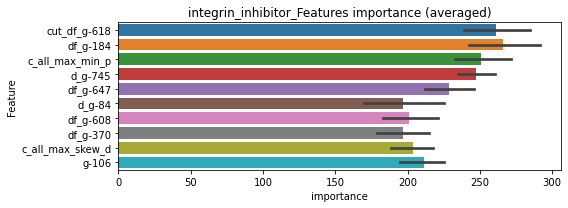

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0244059	valid_1's binary_logloss: 0.0464281
[600]	training's binary_logloss: 0.00660587	valid_1's binary_logloss: 0.0243372
[900]	training's binary_logloss: 0.00334712	valid_1's binary_logloss: 0.0190393
[1200]	training's binary_logloss: 0.00218247	valid_1's binary_logloss: 0.0169993
[1500]	training's binary_logloss: 0.00162334	valid_1's binary_logloss: 0.0158938
[1800]	training's binary_logloss: 0.00129918	valid_1's binary_logloss: 0.0151077
[2100]	training's binary_logloss: 0.00109157	valid_1's binary_logloss: 0.0145875
Early stopping, best iteration is:
[2355]	training's binary_logloss: 0.000968167	valid_1's binary_logloss: 0.0142433


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246963	valid_1's binary_logloss: 0.0420187
[600]	training's binary_logloss: 0.00674599	valid_1's binary_logloss: 0.019453
[900]	training's binary_logloss: 0.00339568	valid_1's binary_logloss: 0.0146037
[1200]	training's binary_logloss: 0.00221548	valid_1's binary_logloss: 0.0127218
[1500]	training's binary_logloss: 0.00164764	valid_1's binary_logloss: 0.0118046
[1800]	training's binary_logloss: 0.00131655	valid_1's binary_logloss: 0.0110597
Early stopping, best iteration is:
[1998]	training's binary_logloss: 0.0011697	valid_1's binary_logloss: 0.010811


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258123	valid_1's binary_logloss: 0.0347726
[600]	training's binary_logloss: 0.00697759	valid_1's binary_logloss: 0.013093
[900]	training's binary_logloss: 0.00353109	valid_1's binary_logloss: 0.00859649
[1200]	training's binary_logloss: 0.00230452	valid_1's binary_logloss: 0.0067182
[1500]	training's binary_logloss: 0.00170511	valid_1's binary_logloss: 0.00580399
[1800]	training's binary_logloss: 0.00136254	valid_1's binary_logloss: 0.00520362
[2100]	training's binary_logloss: 0.00114337	valid_1's binary_logloss: 0.00483675
[2400]	training's binary_logloss: 0.000992651	valid_1's binary_logloss: 0.00451204
[2700]	training's binary_logloss: 0.000880345	valid_1's binary_logloss: 0.00429386
[3000]	training's binary_logloss: 0.000798023	valid_1's binary_logloss: 0.00413669
[3300]	training's binary_logloss: 0.0007338	valid_1's binary_logloss: 0.00398791
[3600]	training's binary_logloss: 0.0006847

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024946	valid_1's binary_logloss: 0.0455643
[600]	training's binary_logloss: 0.00670207	valid_1's binary_logloss: 0.0207044
[900]	training's binary_logloss: 0.0033578	valid_1's binary_logloss: 0.0144334
[1200]	training's binary_logloss: 0.00219822	valid_1's binary_logloss: 0.0118697
[1500]	training's binary_logloss: 0.00163465	valid_1's binary_logloss: 0.0105437
[1800]	training's binary_logloss: 0.00131128	valid_1's binary_logloss: 0.00964716
[2100]	training's binary_logloss: 0.0011064	valid_1's binary_logloss: 0.00903288
[2400]	training's binary_logloss: 0.000960277	valid_1's binary_logloss: 0.00850583
[2700]	training's binary_logloss: 0.000853738	valid_1's binary_logloss: 0.00812989
[3000]	training's binary_logloss: 0.000775057	valid_1's binary_logloss: 0.00786019
[3300]	training's binary_logloss: 0.000713658	valid_1's binary_logloss: 0.00760311
Early stopping, best iteration is:
[3447]	tra

integrin_inhibitor logloss: 0.009053171596093807


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273, target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278615	valid_1's binary_logloss: 0.0898597
[600]	training's binary_logloss: 0.00428875	valid_1's binary_logloss: 0.0611354
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00173397	valid_1's binary_logloss: 0.0569171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0277906	valid_1's binary_logloss: 0.0866468
[600]	training's binary_logloss: 0.00430922	valid_1's binary_logloss: 0.0581909
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.00207192	valid_1's binary_logloss: 0.0555084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278823	valid_1's binary_logloss: 0.0658033
[600]	training's binary_logloss: 0.00426543	valid_1's binary_logloss: 0.0314077
[900]	training's binary_logloss: 0.0015601	valid_1's binary_logloss: 0.0252855
Early stopping, best iteration 

1 / 3 AUC score:0.996
y_Threshold: 0.0131908, Threshold: 0.0912163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 644/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00386, Num_p_label: 40.0, conf_0:0.06385, conf_1:0.11858
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0912163
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_2: 0.1112163
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.1312163
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_4: 0.1512163
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_5: 0.1712163
threshold: 0.1712163, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023671	valid_1's binary_logloss: 0.0786369
[600]	training's binary_logloss: 0.00358877	valid_1's binary_logloss: 0.0444898
[900]	training's binary_logloss: 0.00137927	valid_1's binary_logloss: 0.0376733
Early stopping, best iteration is:
[1158]	training's binary_logloss: 0.000909734	valid_1's binary_logloss: 0.0361215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242054	valid_1's binary_logloss: 0.0600811
[600]	training's binary_logloss: 0.00359478	valid_1's binary_logloss: 0.0283146
[900]	training's binary_logloss: 0.00137836	valid_1's binary_logloss: 0.0224244
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00131856	valid_1's binary_logloss: 0.0221582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254797	valid_1's binary_logloss: 0.0590864
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0335831, Threshold: 0.1712163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 638.0/3763
p_label_rate: 0.0128076 Vs.target_rate: 0.00386, Num_p_label: 51.0, conf_0:0.13697, conf_1:0.20546
Num_p_label: 51.0, Expected: 15.4, Adj_threshold_1: 0.1712163
Num_p_label: 43.0, Expected: 15.4, Adj_threshold_2: 0.1912163
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_3: 0.2112163
Num_p_label: 36.0, Expected: 15.4, Adj_threshold_4: 0.2312163
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_5: 0.2512163
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_6: 0.2712163
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_7: 0.2912163
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_8: 0.3112163
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_9: 0.3312163
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_10: 0.3512163
threshold: 0.3712163, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 638.0/3763, y_label_rate: 0.1695456

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226723	valid_1's binary_logloss: 0.0710433
[600]	training's binary_logloss: 0.00339996	valid_1's binary_logloss: 0.038871
[900]	training's binary_logloss: 0.0013085	valid_1's binary_logloss: 0.0336457
Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.000891603	valid_1's binary_logloss: 0.0322856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236117	valid_1's binary_logloss: 0.0633045
[600]	training's binary_logloss: 0.00357604	valid_1's binary_logloss: 0.0304543
[900]	training's binary_logloss: 0.00135529	valid_1's binary_logloss: 0.0241933
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.00111113	valid_1's binary_logloss: 0.0235681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022817	valid_1's binary_logloss: 0.0652703
[600]	training's binary_loglos

3 / 3 AUC score:0.999
y_Threshold: 0.0460028, Threshold: 0.3712163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 634.0/3755
p_label_rate: 0.0075339 Vs.target_rate: 0.00386, Num_p_label: 30.0, conf_0:0.33409, conf_1:0.40834
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_1: 0.3712163
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_2: 0.3912163
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_3: 0.4112163
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_4: 0.4312163
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.4512163
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_6: 0.4712163
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_7: 0.4912163
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_8: 0.5112163
threshold: 0.5112163, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 634.0/3755, y_label_rate: 0.1688415


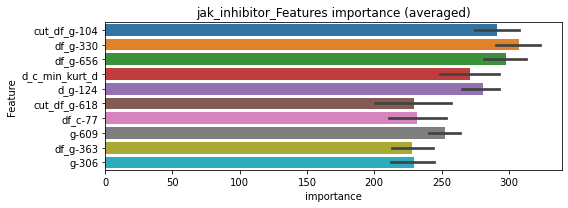

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0415219	valid_1's binary_logloss: 0.0863657
[600]	training's binary_logloss: 0.0125726	valid_1's binary_logloss: 0.050094
[900]	training's binary_logloss: 0.00628233	valid_1's binary_logloss: 0.0397747
[1200]	training's binary_logloss: 0.00398005	valid_1's binary_logloss: 0.0361542
[1500]	training's binary_logloss: 0.00289157	valid_1's binary_logloss: 0.0341437
[1800]	training's binary_logloss: 0.00227764	valid_1's binary_logloss: 0.0329147
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.00228229	valid_1's binary_logloss: 0.0328971


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040744	valid_1's binary_logloss: 0.0814578
[600]	training's binary_logloss: 0.0124896	valid_1's binary_logloss: 0.0458433
[900]	training's binary_logloss: 0.00626738	valid_1's binary_logloss: 0.0360525
[1200]	training's binary_logloss: 0.00400364	valid_1's binary_logloss: 0.0324505
[1500]	training's binary_logloss: 0.00290978	valid_1's binary_logloss: 0.0302046
[1800]	training's binary_logloss: 0.00228093	valid_1's binary_logloss: 0.0287995
[2100]	training's binary_logloss: 0.00188604	valid_1's binary_logloss: 0.0276815
Early stopping, best iteration is:
[2355]	training's binary_logloss: 0.00164953	valid_1's binary_logloss: 0.02711


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416859	valid_1's binary_logloss: 0.0843042
[600]	training's binary_logloss: 0.0126302	valid_1's binary_logloss: 0.0491778
[900]	training's binary_logloss: 0.00637372	valid_1's binary_logloss: 0.039533
[1200]	training's binary_logloss: 0.00405464	valid_1's binary_logloss: 0.0350764
[1500]	training's binary_logloss: 0.00293779	valid_1's binary_logloss: 0.0329012
[1800]	training's binary_logloss: 0.00230731	valid_1's binary_logloss: 0.0316391
[2100]	training's binary_logloss: 0.00190396	valid_1's binary_logloss: 0.0305554
Early stopping, best iteration is:
[2157]	training's binary_logloss: 0.00184245	valid_1's binary_logloss: 0.030344


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0414072	valid_1's binary_logloss: 0.0843334
[600]	training's binary_logloss: 0.0125007	valid_1's binary_logloss: 0.0492808
[900]	training's binary_logloss: 0.0063075	valid_1's binary_logloss: 0.0415254
[1200]	training's binary_logloss: 0.00402899	valid_1's binary_logloss: 0.0382313
Early stopping, best iteration is:
[1272]	training's binary_logloss: 0.00369884	valid_1's binary_logloss: 0.0376246


jak_inhibitor logloss: 0.03199243086097475


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248, target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0760234	valid_1's binary_logloss: 0.264716
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.0260844	valid_1's binary_logloss: 0.253239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.076775	valid_1's binary_logloss: 0.271032
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.038	valid_1's binary_logloss: 0.261505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0837918	valid_1's binary_logloss: 0.23929
[600]	training's binary_logloss: 0.0226664	valid_1's binary_logloss: 0.209587
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.0193014	valid_1's binary_logloss: 0.208422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0789094	valid_1's binary_logloss: 0.23686
Early stopping, best iteration is:

1 / 3 AUC score:0.909
y_Threshold: 0.0818673, Threshold: 0.6818288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 403 → Positive_corect_labels: 513/3494
p_label_rate: 0.0100452 Vs.target_rate: 0.01146, Num_p_label: 40.0, conf_0:0.47728, conf_1:0.80000
threshold: 0.6818288, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 513.0/3494, y_label_rate: 0.1468231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0409688	valid_1's binary_logloss: 0.163576
[600]	training's binary_logloss: 0.00859377	valid_1's binary_logloss: 0.135135
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.00398597	valid_1's binary_logloss: 0.129692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0425303	valid_1's binary_logloss: 0.173244
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.0152991	valid_1's binary_logloss: 0.160127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437519	valid_1's binary_logloss: 0.151979
[600]	training's binary_logloss: 0.00935906	valid_1's binary_logloss: 0.126566
[900]	training's binary_logloss: 0.00307871	valid_1's binary_logloss: 0.119854
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00321943	valid_1's binary_logloss: 0.119639
Train

2 / 3 AUC score:0.980
y_Threshold: 0.0609143, Threshold: 0.6818288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 462.0/3392
p_label_rate: 0.0198393 Vs.target_rate: 0.01146, Num_p_label: 79.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 79.0, Expected: 45.6, Adj_threshold_1: 0.6818288
Num_p_label: 75.0, Expected: 45.6, Adj_threshold_2: 0.7018288
Num_p_label: 74.0, Expected: 45.6, Adj_threshold_3: 0.7218288
Num_p_label: 72.0, Expected: 45.6, Adj_threshold_4: 0.7418288
Num_p_label: 69.0, Expected: 45.6, Adj_threshold_5: 0.7618288
Num_p_label: 66.0, Expected: 45.6, Adj_threshold_6: 0.7818288
threshold: 0.7818288, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 462.0/3392, y_label_rate: 0.1362028
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303779	valid_1's binary_logloss: 0.138896
[600]	training's binary_logloss: 0.00596645	valid_1's binary_logloss: 0.116798
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00391028	valid_1's binary_logloss: 0.114615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.032445	valid_1's binary_logloss: 0.118292
[600]	training's binary_logloss: 0.00623217	valid_1's binary_logloss: 0.0925123
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00534509	valid_1's binary_logloss: 0.0915624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0312001	valid_1's binary_logloss: 0.116986
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.0104524	valid_1's binary_logloss: 0.100277
Training until validation scores don't improve for 30 rounds
[300]	training's binar

3 / 3 AUC score:0.993
y_Threshold: 0.0622550, Threshold: 0.7818288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 431.0/3330
p_label_rate: 0.0183325 Vs.target_rate: 0.01146, Num_p_label: 73.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 73.0, Expected: 45.6, Adj_threshold_1: 0.7818288
threshold: 0.7818288, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 431.0/3330, y_label_rate: 0.1294294


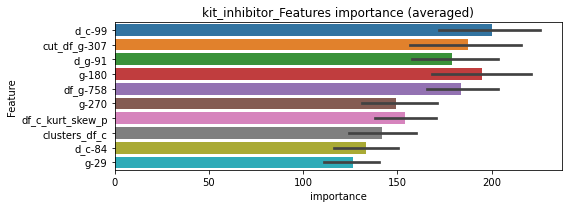

len(train_index) : 2497
len(valid_index) : 833
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0471261	valid_1's binary_logloss: 0.141995
[600]	training's binary_logloss: 0.0159298	valid_1's binary_logloss: 0.114006
[900]	training's binary_logloss: 0.00819969	valid_1's binary_logloss: 0.108057
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.00567629	valid_1's binary_logloss: 0.105393


len(train_index) : 2497
len(valid_index) : 833
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0502803	valid_1's binary_logloss: 0.104642
[600]	training's binary_logloss: 0.0175112	valid_1's binary_logloss: 0.069252
[900]	training's binary_logloss: 0.00909355	valid_1's binary_logloss: 0.05929
[1200]	training's binary_logloss: 0.00580072	valid_1's binary_logloss: 0.0549734
[1500]	training's binary_logloss: 0.00420762	valid_1's binary_logloss: 0.0527379
Early stopping, best iteration is:
[1479]	training's binary_logloss: 0.0042897	valid_1's binary_logloss: 0.0526764


len(train_index) : 2498
len(valid_index) : 832
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472812	valid_1's binary_logloss: 0.134828
[600]	training's binary_logloss: 0.0163557	valid_1's binary_logloss: 0.101897
[900]	training's binary_logloss: 0.00847007	valid_1's binary_logloss: 0.0936139
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00842821	valid_1's binary_logloss: 0.0935239


len(train_index) : 2498
len(valid_index) : 832
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489826	valid_1's binary_logloss: 0.117842
[600]	training's binary_logloss: 0.017084	valid_1's binary_logloss: 0.0880759
[900]	training's binary_logloss: 0.00885416	valid_1's binary_logloss: 0.0809253
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00880756	valid_1's binary_logloss: 0.0808165


kit_inhibitor logloss: 0.08309995677178666


neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147354	valid_1's binary_logloss: 0.00183319
[600]	training's binary_logloss: 0.000219381	valid_1's binary_logloss: 0.000326403
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000187569	valid_1's binary_logloss: 0.00028264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147456	valid_1's binary_logloss: 0.00216495
[600]	training's binary_logloss: 0.000220062	valid_1's binary_logloss: 0.000513871
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000188317	valid_1's binary_logloss: 0.00047328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148699	valid_1's binary_logloss: 0.00189873
[600]	training's binary_logloss: 0.000220219	valid_1's binary_logloss: 0.000389257
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000197226	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0005382, Threshold: 0.0017741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00124, conf_1:0.00231
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017741
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0217741
threshold: 0.0217741, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000188866	valid_1's binary_logloss: 0.000239309


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141528	valid_1's binary_logloss: 0.0020826
[600]	training's binary_logloss: 0.000208101	valid_1's binary_logloss: 0.000427424
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000178156	valid_1's binary_logloss: 0.00038219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140758	valid_1's binary_logloss: 0.00172398
[600]	training's binary_logloss: 0.000206623	valid_1's binary_logloss: 0.000361097
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.00017674	valid_1's binary_logloss: 0.000330341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142341	valid_1's binary_logloss: 0.0014784
[600]	training's binary_logloss: 0.000208514	valid_1's binary_logloss: 0.000221663
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000176206	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1478815, Threshold: 0.0217741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025, Num_p_label: 5.0, conf_0:0.01742, conf_1:0.02613
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0217741
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0417741
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0617741
threshold: 0.0617741, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000176037	valid_1's binary_logloss: 0.000205894


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141528	valid_1's binary_logloss: 0.0020826
[600]	training's binary_logloss: 0.000208101	valid_1's binary_logloss: 0.000427424
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000178156	valid_1's binary_logloss: 0.00038219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140758	valid_1's binary_logloss: 0.00172398
[600]	training's binary_logloss: 0.000206623	valid_1's binary_logloss: 0.000361097
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.00017674	valid_1's binary_logloss: 0.000330341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142341	valid_1's binary_logloss: 0.0014784
[600]	training's binary_logloss: 0.000208514	valid_1's binary_logloss: 0.000221663
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000176206	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1478815, Threshold: 0.0617741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.05560, conf_1:0.06795
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0617741
threshold: 0.0617741, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000176037	valid_1's binary_logloss: 0.000205894


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


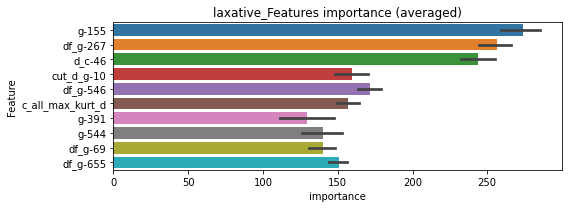

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440482	valid_1's binary_logloss: 0.00495131
[600]	training's binary_logloss: 0.00116982	valid_1's binary_logloss: 0.0014181
[900]	training's binary_logloss: 0.000662524	valid_1's binary_logloss: 0.000838061
[1200]	training's binary_logloss: 0.000474403	valid_1's binary_logloss: 0.000613869
[1500]	training's binary_logloss: 0.000378573	valid_1's binary_logloss: 0.00049944
[1800]	training's binary_logloss: 0.000321517	valid_1's binary_logloss: 0.000430617
[2100]	training's binary_logloss: 0.000282961	valid_1's binary_logloss: 0.000382598
[2400]	training's binary_logloss: 0.000256032	valid_1's binary_logloss: 0.00035083
[2700]	training's binary_logloss: 0.000236038	valid_1's binary_logloss: 0.000326449
[3000]	training's binary_logloss: 0.000220945	valid_1's binary_logloss: 0.000307865
[3300]	training's binary_logloss: 0.000209607	valid_1's binary_logloss: 0.0002941
[3600]	training's binary_lo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043753	valid_1's binary_logloss: 0.00498268
[600]	training's binary_logloss: 0.00116033	valid_1's binary_logloss: 0.00153417
[900]	training's binary_logloss: 0.000657889	valid_1's binary_logloss: 0.000949392
[1200]	training's binary_logloss: 0.000470362	valid_1's binary_logloss: 0.00072256
[1500]	training's binary_logloss: 0.000376099	valid_1's binary_logloss: 0.000599228
[1800]	training's binary_logloss: 0.000318987	valid_1's binary_logloss: 0.000523225
[2100]	training's binary_logloss: 0.000281697	valid_1's binary_logloss: 0.00047344
[2400]	training's binary_logloss: 0.000254798	valid_1's binary_logloss: 0.00043687
[2700]	training's binary_logloss: 0.000235206	valid_1's binary_logloss: 0.000408578
[3000]	training's binary_logloss: 0.000220534	valid_1's binary_logloss: 0.000386803
[3300]	training's binary_logloss: 0.000209306	valid_1's binary_logloss: 0.000370859
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441976	valid_1's binary_logloss: 0.00457805
[600]	training's binary_logloss: 0.00117509	valid_1's binary_logloss: 0.00122814
[900]	training's binary_logloss: 0.000667746	valid_1's binary_logloss: 0.000698393
[1200]	training's binary_logloss: 0.000477547	valid_1's binary_logloss: 0.000500336
[1500]	training's binary_logloss: 0.00038075	valid_1's binary_logloss: 0.000399006
[1800]	training's binary_logloss: 0.000323521	valid_1's binary_logloss: 0.000339173
[2100]	training's binary_logloss: 0.000284942	valid_1's binary_logloss: 0.000299063
[2400]	training's binary_logloss: 0.000258005	valid_1's binary_logloss: 0.000270922
[2700]	training's binary_logloss: 0.000237899	valid_1's binary_logloss: 0.000249922
[3000]	training's binary_logloss: 0.000222979	valid_1's binary_logloss: 0.000234302
[3300]	training's binary_logloss: 0.000211599	valid_1's binary_logloss: 0.00022254
[3600]	training's binary

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439419	valid_1's binary_logloss: 0.00476128
[600]	training's binary_logloss: 0.00117029	valid_1's binary_logloss: 0.0013017
[900]	training's binary_logloss: 0.000663943	valid_1's binary_logloss: 0.000749591
[1200]	training's binary_logloss: 0.00047534	valid_1's binary_logloss: 0.000541008
[1500]	training's binary_logloss: 0.00037955	valid_1's binary_logloss: 0.000434094
[1800]	training's binary_logloss: 0.000322048	valid_1's binary_logloss: 0.000369653
[2100]	training's binary_logloss: 0.000284007	valid_1's binary_logloss: 0.000326962
[2400]	training's binary_logloss: 0.000256986	valid_1's binary_logloss: 0.000296624
[2700]	training's binary_logloss: 0.000237057	valid_1's binary_logloss: 0.000274141
[3000]	training's binary_logloss: 0.000222184	valid_1's binary_logloss: 0.000257263
[3300]	training's binary_logloss: 0.000210828	valid_1's binary_logloss: 0.000244477
[3600]	training's binary_

laxative logloss: 0.00024704159678249265


neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153601	valid_1's binary_logloss: 0.0021281
[600]	training's binary_logloss: 0.000233296	valid_1's binary_logloss: 0.000428763
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000201747	valid_1's binary_logloss: 0.000386103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151861	valid_1's binary_logloss: 0.00559888
[600]	training's binary_logloss: 0.000232289	valid_1's binary_logloss: 0.00381577
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00020572	valid_1's binary_logloss: 0.00372508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154706	valid_1's binary_logloss: 0.00161292
[600]	training's binary_logloss: 0.000234447	valid_1's binary_logloss: 0.000255165
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000199212	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0006082, Threshold: 0.0016596, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00116, conf_1:0.00216
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0016596
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0216596
threshold: 0.0216596, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000196072	valid_1's binary_logloss: 0.000504342


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149196	valid_1's binary_logloss: 0.00165164
[600]	training's binary_logloss: 0.000220805	valid_1's binary_logloss: 0.00026024
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000189744	valid_1's binary_logloss: 0.000225388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148896	valid_1's binary_logloss: 0.00200938
[600]	training's binary_logloss: 0.000219826	valid_1's binary_logloss: 0.000377529
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000190971	valid_1's binary_logloss: 0.000340701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149604	valid_1's binary_logloss: 0.00162896
[600]	training's binary_logloss: 0.000220913	valid_1's binary_logloss: 0.000258733
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000187367	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1593935, Threshold: 0.0216596, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00025, Num_p_label: 13.0, conf_0:0.01733, conf_1:0.02599
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.0216596
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.0416596
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.0616596
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.0816596
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.1016596
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1216596
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.1416596
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.1616596
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.1816596
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.2016596
threshold: 0.2216596, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Ps

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149196	valid_1's binary_logloss: 0.00165164
[600]	training's binary_logloss: 0.000220805	valid_1's binary_logloss: 0.00026024
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000189744	valid_1's binary_logloss: 0.000225388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148896	valid_1's binary_logloss: 0.00200938
[600]	training's binary_logloss: 0.000219826	valid_1's binary_logloss: 0.000377529
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000190971	valid_1's binary_logloss: 0.000340701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149604	valid_1's binary_logloss: 0.00162896
[600]	training's binary_logloss: 0.000220913	valid_1's binary_logloss: 0.000258733
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000187367	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1593935, Threshold: 0.2216596, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.19949, conf_1:0.24383
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2216596
threshold: 0.2216596, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


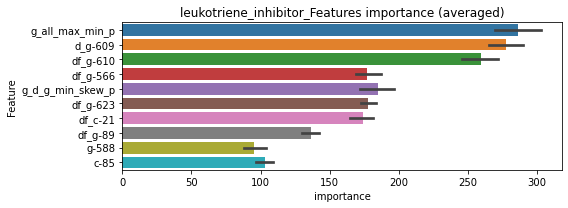

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474345	valid_1's binary_logloss: 0.00499736
[600]	training's binary_logloss: 0.00123428	valid_1's binary_logloss: 0.0013412
[900]	training's binary_logloss: 0.000695293	valid_1's binary_logloss: 0.000765754
[1200]	training's binary_logloss: 0.000498284	valid_1's binary_logloss: 0.000553455
[1500]	training's binary_logloss: 0.000396769	valid_1's binary_logloss: 0.000443059
[1800]	training's binary_logloss: 0.000335675	valid_1's binary_logloss: 0.000376563
[2100]	training's binary_logloss: 0.000295453	valid_1's binary_logloss: 0.000332541
[2400]	training's binary_logloss: 0.000266793	valid_1's binary_logloss: 0.000300999
[2700]	training's binary_logloss: 0.000246213	valid_1's binary_logloss: 0.000278489
[3000]	training's binary_logloss: 0.000230468	valid_1's binary_logloss: 0.000261301
[3300]	training's binary_logloss: 0.00021827	valid_1's binary_logloss: 0.000247938
[3600]	training's binary

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473626	valid_1's binary_logloss: 0.00535666
[600]	training's binary_logloss: 0.00123196	valid_1's binary_logloss: 0.00149278
[900]	training's binary_logloss: 0.000694336	valid_1's binary_logloss: 0.000873887
[1200]	training's binary_logloss: 0.000496613	valid_1's binary_logloss: 0.000641982
[1500]	training's binary_logloss: 0.000394791	valid_1's binary_logloss: 0.000519756
[1800]	training's binary_logloss: 0.000334427	valid_1's binary_logloss: 0.000447956
[2100]	training's binary_logloss: 0.000294225	valid_1's binary_logloss: 0.000398974
[2400]	training's binary_logloss: 0.00026579	valid_1's binary_logloss: 0.000364512
[2700]	training's binary_logloss: 0.000244651	valid_1's binary_logloss: 0.000338516
[3000]	training's binary_logloss: 0.000229329	valid_1's binary_logloss: 0.000319694
[3300]	training's binary_logloss: 0.000217263	valid_1's binary_logloss: 0.000304785
[3600]	training's binar

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474995	valid_1's binary_logloss: 0.00517992
[600]	training's binary_logloss: 0.00123108	valid_1's binary_logloss: 0.00140172
[900]	training's binary_logloss: 0.000695551	valid_1's binary_logloss: 0.000808804
[1200]	training's binary_logloss: 0.000497195	valid_1's binary_logloss: 0.000586916
[1500]	training's binary_logloss: 0.000395151	valid_1's binary_logloss: 0.000470692
[1800]	training's binary_logloss: 0.000334382	valid_1's binary_logloss: 0.000401264
[2100]	training's binary_logloss: 0.000293743	valid_1's binary_logloss: 0.000354666
[2400]	training's binary_logloss: 0.000265585	valid_1's binary_logloss: 0.000321817
[2700]	training's binary_logloss: 0.000244568	valid_1's binary_logloss: 0.000297282
[3000]	training's binary_logloss: 0.000228853	valid_1's binary_logloss: 0.000278776
[3300]	training's binary_logloss: 0.000216677	valid_1's binary_logloss: 0.000264577
[3600]	training's bina

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471399	valid_1's binary_logloss: 0.00514295
[600]	training's binary_logloss: 0.00122952	valid_1's binary_logloss: 0.00140374
[900]	training's binary_logloss: 0.000693948	valid_1's binary_logloss: 0.000811286
[1200]	training's binary_logloss: 0.000493971	valid_1's binary_logloss: 0.000587684
[1500]	training's binary_logloss: 0.000392542	valid_1's binary_logloss: 0.000471503
[1800]	training's binary_logloss: 0.000332081	valid_1's binary_logloss: 0.000402023
[2100]	training's binary_logloss: 0.000291743	valid_1's binary_logloss: 0.000355595
[2400]	training's binary_logloss: 0.000263925	valid_1's binary_logloss: 0.000323238
[2700]	training's binary_logloss: 0.000243038	valid_1's binary_logloss: 0.000298945
[3000]	training's binary_logloss: 0.000227163	valid_1's binary_logloss: 0.000280424
[3300]	training's binary_logloss: 0.000215203	valid_1's binary_logloss: 0.000266261
[3600]	training's bina

leukotriene_inhibitor logloss: 0.00023709052744298184


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143523	valid_1's binary_logloss: 0.055727
[600]	training's binary_logloss: 0.00209651	valid_1's binary_logloss: 0.0355457
[900]	training's binary_logloss: 0.000899777	valid_1's binary_logloss: 0.0321466
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000779725	valid_1's binary_logloss: 0.0316638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140098	valid_1's binary_logloss: 0.0567708
[600]	training's binary_logloss: 0.00201278	valid_1's binary_logloss: 0.0400782
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00170131	valid_1's binary_logloss: 0.0393093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156027	valid_1's binary_logloss: 0.0262213
[600]	training's binary_logloss: 0.00224633	valid_1's binary_logloss: 0.00756981
[900]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0063602, Threshold: 0.0128588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.00900, conf_1:0.01672
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0128588
Num_p_label: 9.0, Expected: 10.4, Adj_threshold_2: 0.0328588
threshold: 0.0328588, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130828	valid_1's binary_logloss: 0.047901
[600]	training's binary_logloss: 0.00198971	valid_1's binary_logloss: 0.0297982
[900]	training's binary_logloss: 0.000860896	valid_1's binary_logloss: 0.0277642
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000893834	valid_1's binary_logloss: 0.0277469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013571	valid_1's binary_logloss: 0.0429725
[600]	training's binary_logloss: 0.00204554	valid_1's binary_logloss: 0.0225291
[900]	training's binary_logloss: 0.000877323	valid_1's binary_logloss: 0.0190045
Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.00065929	valid_1's binary_logloss: 0.0180239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013686	valid_1's binary_logloss: 0.0372884
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0295761, Threshold: 0.0328588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00260, Num_p_label: 21.0, conf_0:0.02629, conf_1:0.03943
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_1: 0.0328588
Num_p_label: 13.0, Expected: 10.4, Adj_threshold_2: 0.0528588
threshold: 0.0528588, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133938	valid_1's binary_logloss: 0.0350526
[600]	training's binary_logloss: 0.00201082	valid_1's binary_logloss: 0.0157723
[900]	training's binary_logloss: 0.000862744	valid_1's binary_logloss: 0.0123456
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000686384	valid_1's binary_logloss: 0.0116849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130456	valid_1's binary_logloss: 0.0476924
[600]	training's binary_logloss: 0.00195876	valid_1's binary_logloss: 0.0312078
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00103569	valid_1's binary_logloss: 0.0288557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136454	valid_1's binary_logloss: 0.039718
[600]	training's binary_logloss: 0.00200658	valid_1's binary_logloss: 0.0251908
Early stopping, best iterati

3 / 3 AUC score:1.000
y_Threshold: 0.0210067, Threshold: 0.0528588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0030136 Vs.target_rate: 0.00260, Num_p_label: 12.0, conf_0:0.04757, conf_1:0.05814
threshold: 0.0528588, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


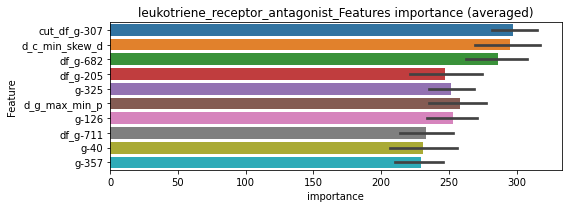

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285584	valid_1's binary_logloss: 0.0548105
[600]	training's binary_logloss: 0.00843947	valid_1's binary_logloss: 0.0287455
[900]	training's binary_logloss: 0.00429604	valid_1's binary_logloss: 0.0218555
[1200]	training's binary_logloss: 0.00278384	valid_1's binary_logloss: 0.0189511
[1500]	training's binary_logloss: 0.00205364	valid_1's binary_logloss: 0.0173217
[1800]	training's binary_logloss: 0.00163128	valid_1's binary_logloss: 0.016241
[2100]	training's binary_logloss: 0.00136284	valid_1's binary_logloss: 0.0155739
[2400]	training's binary_logloss: 0.00118055	valid_1's binary_logloss: 0.0149954
Early stopping, best iteration is:
[2589]	training's binary_logloss: 0.00108975	valid_1's binary_logloss: 0.014736


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0281014	valid_1's binary_logloss: 0.0545132
[600]	training's binary_logloss: 0.00843095	valid_1's binary_logloss: 0.0284675
[900]	training's binary_logloss: 0.00431682	valid_1's binary_logloss: 0.0215332
[1200]	training's binary_logloss: 0.00280197	valid_1's binary_logloss: 0.0185469
[1500]	training's binary_logloss: 0.00207114	valid_1's binary_logloss: 0.0168606
Early stopping, best iteration is:
[1650]	training's binary_logloss: 0.00183176	valid_1's binary_logloss: 0.0163911


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285272	valid_1's binary_logloss: 0.0535802
[600]	training's binary_logloss: 0.00844083	valid_1's binary_logloss: 0.0289128
[900]	training's binary_logloss: 0.00429814	valid_1's binary_logloss: 0.0230213
[1200]	training's binary_logloss: 0.00279725	valid_1's binary_logloss: 0.0206389
[1500]	training's binary_logloss: 0.00206858	valid_1's binary_logloss: 0.0194734
[1800]	training's binary_logloss: 0.00164364	valid_1's binary_logloss: 0.0188726
Early stopping, best iteration is:
[1857]	training's binary_logloss: 0.00158298	valid_1's binary_logloss: 0.0187159


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0285225	valid_1's binary_logloss: 0.0569323
[600]	training's binary_logloss: 0.00836317	valid_1's binary_logloss: 0.0311998
[900]	training's binary_logloss: 0.00426509	valid_1's binary_logloss: 0.0247969
[1200]	training's binary_logloss: 0.00277667	valid_1's binary_logloss: 0.0222258
[1500]	training's binary_logloss: 0.00205264	valid_1's binary_logloss: 0.0206622
Early stopping, best iteration is:
[1637]	training's binary_logloss: 0.0018347	valid_1's binary_logloss: 0.0201815


leukotriene_receptor_antagonist logloss: 0.017505109704876735


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252767	valid_1's binary_logloss: 0.00936922
[600]	training's binary_logloss: 0.000359677	valid_1's binary_logloss: 0.00673642
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000290955	valid_1's binary_logloss: 0.00652415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256587	valid_1's binary_logloss: 0.00546226
[600]	training's binary_logloss: 0.000362338	valid_1's binary_logloss: 0.00137685
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000262408	valid_1's binary_logloss: 0.0011216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265797	valid_1's binary_logloss: 0.00316643
[600]	training's binary_logloss: 0.000373175	valid_1's binary_logloss: 0.000532939
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000263016	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0009915, Threshold: 0.0031526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00221, conf_1:0.00410
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031526
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0231526
threshold: 0.0231526, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237689	valid_1's binary_logloss: 0.0099954
[600]	training's binary_logloss: 0.000332737	valid_1's binary_logloss: 0.00719109
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000277615	valid_1's binary_logloss: 0.0070177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245524	valid_1's binary_logloss: 0.00396
[600]	training's binary_logloss: 0.00033958	valid_1's binary_logloss: 0.000750778
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000246623	valid_1's binary_logloss: 0.000600353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252921	valid_1's binary_logloss: 0.00279521
[600]	training's binary_logloss: 0.000349407	valid_1's binary_logloss: 0.000404547
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000250085	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0086158, Threshold: 0.0231526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050, Num_p_label: 9.0, conf_0:0.01852, conf_1:0.02778
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.0231526


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.0002485	valid_1's binary_logloss: 0.00241151


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0431526
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.0631526
threshold: 0.0631526, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237689	valid_1's binary_logloss: 0.0099954
[600]	training's binary_logloss: 0.000332737	valid_1's binary_logloss: 0.00719109
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000277615	valid_1's binary_logloss: 0.0070177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245524	valid_1's binary_logloss: 0.00396
[600]	training's binary_logloss: 0.00033958	valid_1's binary_logloss: 0.000750778
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000246623	valid_1's binary_logloss: 0.000600353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252921	valid_1's binary_logloss: 0.00279521
[600]	training's binary_logloss: 0.000349407	valid_1's binary_logloss: 0.000404547
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000250085	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0086158, Threshold: 0.0631526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050, Num_p_label: 3.0, conf_0:0.05684, conf_1:0.06947


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.0002485	valid_1's binary_logloss: 0.00241151


threshold: 0.0631526, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


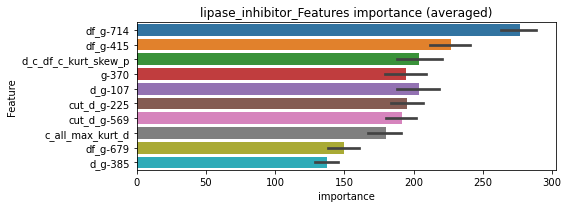

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711647	valid_1's binary_logloss: 0.0140799
[600]	training's binary_logloss: 0.00185454	valid_1's binary_logloss: 0.00792114
[900]	training's binary_logloss: 0.00101551	valid_1's binary_logloss: 0.00658233
[1200]	training's binary_logloss: 0.000710545	valid_1's binary_logloss: 0.00598295
[1500]	training's binary_logloss: 0.000557198	valid_1's binary_logloss: 0.00564832
[1800]	training's binary_logloss: 0.000466092	valid_1's binary_logloss: 0.0054451
[2100]	training's binary_logloss: 0.000405235	valid_1's binary_logloss: 0.00528834
[2400]	training's binary_logloss: 0.000362115	valid_1's binary_logloss: 0.00514975
[2700]	training's binary_logloss: 0.000331697	valid_1's binary_logloss: 0.00506424
Early stopping, best iteration is:
[2929]	training's binary_logloss: 0.000313383	valid_1's binary_logloss: 0.00499699


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720988	valid_1's binary_logloss: 0.00943664
[600]	training's binary_logloss: 0.00189956	valid_1's binary_logloss: 0.00280586
[900]	training's binary_logloss: 0.00104141	valid_1's binary_logloss: 0.0016353
[1200]	training's binary_logloss: 0.0007257	valid_1's binary_logloss: 0.00118918
[1500]	training's binary_logloss: 0.000568845	valid_1's binary_logloss: 0.000959196
[1800]	training's binary_logloss: 0.000474783	valid_1's binary_logloss: 0.000818661
[2100]	training's binary_logloss: 0.000412932	valid_1's binary_logloss: 0.000724679
[2400]	training's binary_logloss: 0.000369224	valid_1's binary_logloss: 0.000658084
[2700]	training's binary_logloss: 0.000337644	valid_1's binary_logloss: 0.00060893
[3000]	training's binary_logloss: 0.0003142	valid_1's binary_logloss: 0.000572598
[3300]	training's binary_logloss: 0.000296436	valid_1's binary_logloss: 0.000545151
[3600]	training's binary_loglos

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073111	valid_1's binary_logloss: 0.00765149
[600]	training's binary_logloss: 0.00193174	valid_1's binary_logloss: 0.00208003
[900]	training's binary_logloss: 0.00105026	valid_1's binary_logloss: 0.00114972
[1200]	training's binary_logloss: 0.000731837	valid_1's binary_logloss: 0.000811021
[1500]	training's binary_logloss: 0.000570615	valid_1's binary_logloss: 0.000637753
[1800]	training's binary_logloss: 0.000474602	valid_1's binary_logloss: 0.000535595
[2100]	training's binary_logloss: 0.000412362	valid_1's binary_logloss: 0.000468061
[2400]	training's binary_logloss: 0.000368588	valid_1's binary_logloss: 0.000420301
[2700]	training's binary_logloss: 0.000337407	valid_1's binary_logloss: 0.000386035
[3000]	training's binary_logloss: 0.00031411	valid_1's binary_logloss: 0.000360404
[3300]	training's binary_logloss: 0.000296218	valid_1's binary_logloss: 0.000340663
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721376	valid_1's binary_logloss: 0.00975385
[600]	training's binary_logloss: 0.00190292	valid_1's binary_logloss: 0.00365224
[900]	training's binary_logloss: 0.00103714	valid_1's binary_logloss: 0.00241842
[1200]	training's binary_logloss: 0.00072172	valid_1's binary_logloss: 0.00191939
[1500]	training's binary_logloss: 0.000564539	valid_1's binary_logloss: 0.00165835
[1800]	training's binary_logloss: 0.000472953	valid_1's binary_logloss: 0.00149694
[2100]	training's binary_logloss: 0.000411533	valid_1's binary_logloss: 0.00138108
[2400]	training's binary_logloss: 0.000367632	valid_1's binary_logloss: 0.00129606
[2700]	training's binary_logloss: 0.000335912	valid_1's binary_logloss: 0.0012373
[3000]	training's binary_logloss: 0.00031237	valid_1's binary_logloss: 0.00118702
[3300]	training's binary_logloss: 0.000294883	valid_1's binary_logloss: 0.00115005
[3600]	training's binary_logloss: 0

lipase_inhibitor logloss: 0.0017202193971339933


neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164899	valid_1's binary_logloss: 0.0515381
[600]	training's binary_logloss: 0.0023237	valid_1's binary_logloss: 0.0287465
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.0011312	valid_1's binary_logloss: 0.0261506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160025	valid_1's binary_logloss: 0.0455972
[600]	training's binary_logloss: 0.00228096	valid_1's binary_logloss: 0.0203059
[900]	training's binary_logloss: 0.000952741	valid_1's binary_logloss: 0.0167032
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000688026	valid_1's binary_logloss: 0.0158765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166725	valid_1's binary_logloss: 0.03256
[600]	training's binary_logloss: 0.00242681	valid_1's binary_logloss: 0.0126714
[900]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0066061, Threshold: 0.0368342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.02578, conf_1:0.04788
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0368342
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_2: 0.0568342
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_3: 0.0768342
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_4: 0.0968342
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_5: 0.1168342
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_6: 0.1368342
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_7: 0.1568342
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_8: 0.1768342
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_9: 0.1968342
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_10: 0.2168342
threshold: 0.2368342, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151228	valid_1's binary_logloss: 0.0448401
[600]	training's binary_logloss: 0.00219067	valid_1's binary_logloss: 0.0253535
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00105286	valid_1's binary_logloss: 0.023098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144851	valid_1's binary_logloss: 0.0396192
[600]	training's binary_logloss: 0.00212419	valid_1's binary_logloss: 0.0176803
[900]	training's binary_logloss: 0.000903789	valid_1's binary_logloss: 0.0143498
Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000667984	valid_1's binary_logloss: 0.0134879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151804	valid_1's binary_logloss: 0.0406509
[600]	training's binary_logloss: 0.00217236	valid_1's binary_logloss: 0.0241604
Early stopping, best iterati

2 / 3 AUC score:1.000
y_Threshold: 0.0281432, Threshold: 0.2368342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0062783 Vs.target_rate: 0.00256, Num_p_label: 25.0, conf_0:0.18947, conf_1:0.28420
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_1: 0.2368342
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_2: 0.2568342
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_3: 0.2768342
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_4: 0.2968342
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_5: 0.3168342
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_6: 0.3368342
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_7: 0.3568342
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_8: 0.3768342
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_9: 0.3968342
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_10: 0.4168342
threshold: 0.4368342, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146538	valid_1's binary_logloss: 0.0383994
[600]	training's binary_logloss: 0.00212069	valid_1's binary_logloss: 0.0174381
[900]	training's binary_logloss: 0.000910774	valid_1's binary_logloss: 0.0146355
[1200]	training's binary_logloss: 0.000634213	valid_1's binary_logloss: 0.013999
Early stopping, best iteration is:
[1179]	training's binary_logloss: 0.00064468	valid_1's binary_logloss: 0.0139455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015176	valid_1's binary_logloss: 0.0410837
[600]	training's binary_logloss: 0.00214523	valid_1's binary_logloss: 0.0197891
[900]	training's binary_logloss: 0.000905752	valid_1's binary_logloss: 0.0163431
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000652836	valid_1's binary_logloss: 0.0155316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0496462, Threshold: 0.4368342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0037670 Vs.target_rate: 0.00256, Num_p_label: 15.0, conf_0:0.39315, conf_1:0.48052
threshold: 0.4368342, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


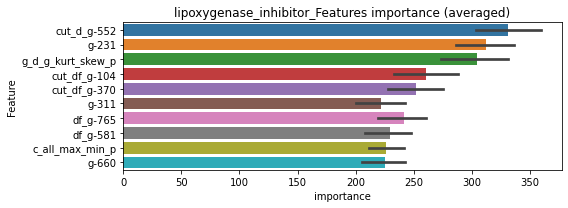

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0308635	valid_1's binary_logloss: 0.0586546
[600]	training's binary_logloss: 0.00900756	valid_1's binary_logloss: 0.0295963
[900]	training's binary_logloss: 0.00457156	valid_1's binary_logloss: 0.0224222
[1200]	training's binary_logloss: 0.00295429	valid_1's binary_logloss: 0.0196967
[1500]	training's binary_logloss: 0.00217499	valid_1's binary_logloss: 0.018263
[1800]	training's binary_logloss: 0.00172345	valid_1's binary_logloss: 0.0173607
[2100]	training's binary_logloss: 0.00143867	valid_1's binary_logloss: 0.0165884
Early stopping, best iteration is:
[2222]	training's binary_logloss: 0.00135044	valid_1's binary_logloss: 0.0163426


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303269	valid_1's binary_logloss: 0.0558671
[600]	training's binary_logloss: 0.00882476	valid_1's binary_logloss: 0.026544
[900]	training's binary_logloss: 0.00448658	valid_1's binary_logloss: 0.0195033
[1200]	training's binary_logloss: 0.00291548	valid_1's binary_logloss: 0.0166885
[1500]	training's binary_logloss: 0.00214696	valid_1's binary_logloss: 0.0150683
[1800]	training's binary_logloss: 0.00170828	valid_1's binary_logloss: 0.0141408
Early stopping, best iteration is:
[2001]	training's binary_logloss: 0.00150635	valid_1's binary_logloss: 0.0135466


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301052	valid_1's binary_logloss: 0.0556971
[600]	training's binary_logloss: 0.00877167	valid_1's binary_logloss: 0.029798
[900]	training's binary_logloss: 0.00445505	valid_1's binary_logloss: 0.0230684
[1200]	training's binary_logloss: 0.00289113	valid_1's binary_logloss: 0.0203678
[1500]	training's binary_logloss: 0.00213553	valid_1's binary_logloss: 0.0189038
[1800]	training's binary_logloss: 0.00169582	valid_1's binary_logloss: 0.0180264
[2100]	training's binary_logloss: 0.0014195	valid_1's binary_logloss: 0.0173259
[2400]	training's binary_logloss: 0.00122598	valid_1's binary_logloss: 0.0168277
[2700]	training's binary_logloss: 0.00108479	valid_1's binary_logloss: 0.0164015
Early stopping, best iteration is:
[2707]	training's binary_logloss: 0.00108181	valid_1's binary_logloss: 0.016383


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0297918	valid_1's binary_logloss: 0.056372
[600]	training's binary_logloss: 0.00857503	valid_1's binary_logloss: 0.0287206
[900]	training's binary_logloss: 0.00437201	valid_1's binary_logloss: 0.0223724
[1200]	training's binary_logloss: 0.00285567	valid_1's binary_logloss: 0.0198069
[1500]	training's binary_logloss: 0.00210808	valid_1's binary_logloss: 0.0183521
[1800]	training's binary_logloss: 0.00168003	valid_1's binary_logloss: 0.0174321
Early stopping, best iteration is:
[1782]	training's binary_logloss: 0.00170051	valid_1's binary_logloss: 0.0174025


lipoxygenase_inhibitor logloss: 0.015918666386239753


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160831	valid_1's binary_logloss: 0.00199504
[600]	training's binary_logloss: 0.000252572	valid_1's binary_logloss: 0.000378635
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000218572	valid_1's binary_logloss: 0.000334944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157262	valid_1's binary_logloss: 0.00405464
[600]	training's binary_logloss: 0.00024551	valid_1's binary_logloss: 0.00168615
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00022405	valid_1's binary_logloss: 0.00161818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162155	valid_1's binary_logloss: 0.00210402
[600]	training's binary_logloss: 0.000245216	valid_1's binary_logloss: 0.000413692
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000220148	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0006690, Threshold: 0.0029963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00210, conf_1:0.00390
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0029963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0229963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0429963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.0629963
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.0829963
threshold: 0.0829963, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151859	valid_1's binary_logloss: 0.00178694
[600]	training's binary_logloss: 0.000224078	valid_1's binary_logloss: 0.000295683
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000193799	valid_1's binary_logloss: 0.000259048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149719	valid_1's binary_logloss: 0.00524843
[600]	training's binary_logloss: 0.000223788	valid_1's binary_logloss: 0.003096
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000198673	valid_1's binary_logloss: 0.0030139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150625	valid_1's binary_logloss: 0.00162323
[600]	training's binary_logloss: 0.000224416	valid_1's binary_logloss: 0.000259413
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00019325	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0192804, Threshold: 0.0829963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.06640, conf_1:0.09960
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0829963
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.1029963
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.1229963
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.1429963
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.1629963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.1829963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.2029963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_8: 0.2229963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.2429963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.2629963
threshold: 0.2829963, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseu

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151859	valid_1's binary_logloss: 0.00178694
[600]	training's binary_logloss: 0.000224078	valid_1's binary_logloss: 0.000295683
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000193799	valid_1's binary_logloss: 0.000259048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149719	valid_1's binary_logloss: 0.00524843
[600]	training's binary_logloss: 0.000223788	valid_1's binary_logloss: 0.003096
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000198673	valid_1's binary_logloss: 0.0030139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150625	valid_1's binary_logloss: 0.00162323
[600]	training's binary_logloss: 0.000224416	valid_1's binary_logloss: 0.000259413
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00019325	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0192804, Threshold: 0.2829963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025, Num_p_label: 5.0, conf_0:0.25470, conf_1:0.31130
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.2829963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3029963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3229963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.3429963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.3629963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.3829963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.4029963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4229963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.4429963
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.4629963
threshold: 0.4829963, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


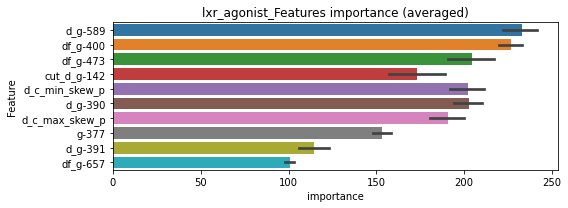

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476653	valid_1's binary_logloss: 0.00519949
[600]	training's binary_logloss: 0.00126235	valid_1's binary_logloss: 0.00144159
[900]	training's binary_logloss: 0.000710523	valid_1's binary_logloss: 0.000831893
[1200]	training's binary_logloss: 0.000505392	valid_1's binary_logloss: 0.000604746
[1500]	training's binary_logloss: 0.000401526	valid_1's binary_logloss: 0.00048733
[1800]	training's binary_logloss: 0.0003401	valid_1's binary_logloss: 0.000416688
[2100]	training's binary_logloss: 0.000298303	valid_1's binary_logloss: 0.000368294
[2400]	training's binary_logloss: 0.000268869	valid_1's binary_logloss: 0.000334073
[2700]	training's binary_logloss: 0.000247352	valid_1's binary_logloss: 0.00030915
[3000]	training's binary_logloss: 0.000231583	valid_1's binary_logloss: 0.000290434
[3300]	training's binary_logloss: 0.000219679	valid_1's binary_logloss: 0.00027648
[3600]	training's binary_lo

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472846	valid_1's binary_logloss: 0.00741556
[600]	training's binary_logloss: 0.00125048	valid_1's binary_logloss: 0.00321273
[900]	training's binary_logloss: 0.000707328	valid_1's binary_logloss: 0.00238812
[1200]	training's binary_logloss: 0.000502787	valid_1's binary_logloss: 0.00203289
[1500]	training's binary_logloss: 0.000400795	valid_1's binary_logloss: 0.00186301
[1800]	training's binary_logloss: 0.000339666	valid_1's binary_logloss: 0.00174304
[2100]	training's binary_logloss: 0.000298235	valid_1's binary_logloss: 0.00165671
[2400]	training's binary_logloss: 0.000269164	valid_1's binary_logloss: 0.00159014
[2700]	training's binary_logloss: 0.00024809	valid_1's binary_logloss: 0.00154208
[3000]	training's binary_logloss: 0.000232419	valid_1's binary_logloss: 0.00151303
[3300]	training's binary_logloss: 0.000220492	valid_1's binary_logloss: 0.00148593
[3600]	training's binary_logloss

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476622	valid_1's binary_logloss: 0.00511739
[600]	training's binary_logloss: 0.00125899	valid_1's binary_logloss: 0.00140633
[900]	training's binary_logloss: 0.000710717	valid_1's binary_logloss: 0.000812178
[1200]	training's binary_logloss: 0.0005064	valid_1's binary_logloss: 0.000584635
[1500]	training's binary_logloss: 0.000402541	valid_1's binary_logloss: 0.000468248
[1800]	training's binary_logloss: 0.000340805	valid_1's binary_logloss: 0.000399006
[2100]	training's binary_logloss: 0.000299246	valid_1's binary_logloss: 0.000351914
[2400]	training's binary_logloss: 0.000269647	valid_1's binary_logloss: 0.000318338
[2700]	training's binary_logloss: 0.000248136	valid_1's binary_logloss: 0.000293898
[3000]	training's binary_logloss: 0.000232283	valid_1's binary_logloss: 0.000275725
[3300]	training's binary_logloss: 0.000219903	valid_1's binary_logloss: 0.000261438
[3600]	training's binary

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471599	valid_1's binary_logloss: 0.00617556
[600]	training's binary_logloss: 0.0012499	valid_1's binary_logloss: 0.001995
[900]	training's binary_logloss: 0.000709387	valid_1's binary_logloss: 0.00124715
[1200]	training's binary_logloss: 0.000506851	valid_1's binary_logloss: 0.000956528
[1500]	training's binary_logloss: 0.000402799	valid_1's binary_logloss: 0.000797439
[1800]	training's binary_logloss: 0.000340982	valid_1's binary_logloss: 0.0007025
[2100]	training's binary_logloss: 0.000299615	valid_1's binary_logloss: 0.000637852
[2400]	training's binary_logloss: 0.000269929	valid_1's binary_logloss: 0.000589344
[2700]	training's binary_logloss: 0.000248967	valid_1's binary_logloss: 0.000556898
[3000]	training's binary_logloss: 0.000233291	valid_1's binary_logloss: 0.000531263
[3300]	training's binary_logloss: 0.000221582	valid_1's binary_logloss: 0.000513376
[3600]	training's binary_log

lxr_agonist logloss: 0.0006081406954858262


neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937571	valid_1's binary_logloss: 0.0245212
[600]	training's binary_logloss: 0.00116516	valid_1's binary_logloss: 0.0103102
[900]	training's binary_logloss: 0.00055272	valid_1's binary_logloss: 0.00844108
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000529811	valid_1's binary_logloss: 0.00841359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100708	valid_1's binary_logloss: 0.0195844
[600]	training's binary_logloss: 0.00118876	valid_1's binary_logloss: 0.00511091
[900]	training's binary_logloss: 0.000557722	valid_1's binary_logloss: 0.00357414
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000519498	valid_1's binary_logloss: 0.00346809
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988891	valid_1's binary_logloss: 0.0165012
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0043486, Threshold: 0.0692868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.04850, conf_1:0.09007
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0692868
Num_p_label: 36.0, Expected: 5.2, Adj_threshold_2: 0.0892868
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_3: 0.1092868
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_4: 0.1292868
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_5: 0.1492868
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_6: 0.1692868
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_7: 0.1892868
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_8: 0.2092868
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_9: 0.2292868
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_10: 0.2492868
threshold: 0.2692868, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834908	valid_1's binary_logloss: 0.0206425
[600]	training's binary_logloss: 0.00104106	valid_1's binary_logloss: 0.00879083
[900]	training's binary_logloss: 0.000512287	valid_1's binary_logloss: 0.00756093
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000501303	valid_1's binary_logloss: 0.00752738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869539	valid_1's binary_logloss: 0.0157213
[600]	training's binary_logloss: 0.00108808	valid_1's binary_logloss: 0.00400176
[900]	training's binary_logloss: 0.000524719	valid_1's binary_logloss: 0.00278974
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000486041	valid_1's binary_logloss: 0.00272796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00856363	valid_1's binary_logloss: 0.0127003
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0358054, Threshold: 0.2692868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0077850 Vs.target_rate: 0.00130, Num_p_label: 31.0, conf_0:0.21543, conf_1:0.32314
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_1: 0.2692868
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_2: 0.2892868
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_3: 0.3092868
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_4: 0.3292868
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_5: 0.3492868
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_6: 0.3692868
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_7: 0.3892868
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_8: 0.4092868
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_9: 0.4292868
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_10: 0.4492868
threshold: 0.4692868, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00812656	valid_1's binary_logloss: 0.016389
[600]	training's binary_logloss: 0.00102378	valid_1's binary_logloss: 0.00635294
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000528623	valid_1's binary_logloss: 0.00537072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852331	valid_1's binary_logloss: 0.0154205
[600]	training's binary_logloss: 0.00105841	valid_1's binary_logloss: 0.00344901
[900]	training's binary_logloss: 0.000519098	valid_1's binary_logloss: 0.00213683
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000490582	valid_1's binary_logloss: 0.00206455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00866728	valid_1's binary_logloss: 0.015398
[600]	training's binary_logloss: 0.00107656	valid_1's binary_logloss: 0.00284905
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0365613, Threshold: 0.4692868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0067805 Vs.target_rate: 0.00130, Num_p_label: 27.0, conf_0:0.42236, conf_1:0.51622
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_1: 0.4692868
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.4892868
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_3: 0.5092868
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_4: 0.5292868
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_5: 0.5492868
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_6: 0.5692868
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_7: 0.5892868
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_8: 0.6092868
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_9: 0.6292868
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_10: 0.6492868
threshold: 0.6692868, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


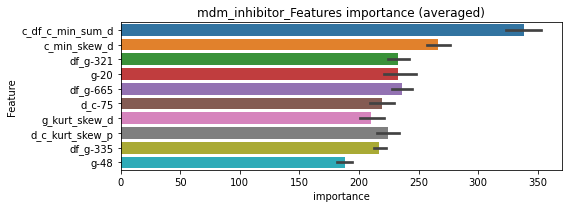

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184907	valid_1's binary_logloss: 0.0311301
[600]	training's binary_logloss: 0.00500851	valid_1's binary_logloss: 0.0137259
[900]	training's binary_logloss: 0.00257586	valid_1's binary_logloss: 0.00996428
[1200]	training's binary_logloss: 0.00171817	valid_1's binary_logloss: 0.00850231
[1500]	training's binary_logloss: 0.00129435	valid_1's binary_logloss: 0.00767802
[1800]	training's binary_logloss: 0.00104853	valid_1's binary_logloss: 0.00716104
[2100]	training's binary_logloss: 0.000891778	valid_1's binary_logloss: 0.00682494
[2400]	training's binary_logloss: 0.000781185	valid_1's binary_logloss: 0.00654073
[2700]	training's binary_logloss: 0.000702045	valid_1's binary_logloss: 0.00639234
Early stopping, best iteration is:
[2927]	training's binary_logloss: 0.000654429	valid_1's binary_logloss: 0.00627042


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188103	valid_1's binary_logloss: 0.0279366
[600]	training's binary_logloss: 0.00511738	valid_1's binary_logloss: 0.00982877
[900]	training's binary_logloss: 0.00265328	valid_1's binary_logloss: 0.00580515
[1200]	training's binary_logloss: 0.00175901	valid_1's binary_logloss: 0.0042492
[1500]	training's binary_logloss: 0.00132643	valid_1's binary_logloss: 0.0034264
[1800]	training's binary_logloss: 0.00107621	valid_1's binary_logloss: 0.00292362
[2100]	training's binary_logloss: 0.00091359	valid_1's binary_logloss: 0.00259234
[2400]	training's binary_logloss: 0.000800696	valid_1's binary_logloss: 0.00234918
[2700]	training's binary_logloss: 0.000717498	valid_1's binary_logloss: 0.00215886
[3000]	training's binary_logloss: 0.000655999	valid_1's binary_logloss: 0.00202941
[3300]	training's binary_logloss: 0.000606301	valid_1's binary_logloss: 0.00191032
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191543	valid_1's binary_logloss: 0.0282481
[600]	training's binary_logloss: 0.00510921	valid_1's binary_logloss: 0.00915385
[900]	training's binary_logloss: 0.00264099	valid_1's binary_logloss: 0.00531574
[1200]	training's binary_logloss: 0.00174971	valid_1's binary_logloss: 0.00381707
[1500]	training's binary_logloss: 0.00131771	valid_1's binary_logloss: 0.00304742
[1800]	training's binary_logloss: 0.00106761	valid_1's binary_logloss: 0.00256535
[2100]	training's binary_logloss: 0.000906585	valid_1's binary_logloss: 0.00224194
[2400]	training's binary_logloss: 0.000795591	valid_1's binary_logloss: 0.00202461
[2700]	training's binary_logloss: 0.000713771	valid_1's binary_logloss: 0.00186615
[3000]	training's binary_logloss: 0.000651104	valid_1's binary_logloss: 0.00173412
[3300]	training's binary_logloss: 0.000603556	valid_1's binary_logloss: 0.00163455
[3600]	training's binary_logloss: 0.0

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186934	valid_1's binary_logloss: 0.0295272
[600]	training's binary_logloss: 0.00505424	valid_1's binary_logloss: 0.0109579
[900]	training's binary_logloss: 0.00261515	valid_1's binary_logloss: 0.00698169
[1200]	training's binary_logloss: 0.00173748	valid_1's binary_logloss: 0.00530823
[1500]	training's binary_logloss: 0.00130821	valid_1's binary_logloss: 0.00445956
[1800]	training's binary_logloss: 0.00106225	valid_1's binary_logloss: 0.00395868
[2100]	training's binary_logloss: 0.000899942	valid_1's binary_logloss: 0.00360272
[2400]	training's binary_logloss: 0.000787929	valid_1's binary_logloss: 0.00334373
[2700]	training's binary_logloss: 0.000706643	valid_1's binary_logloss: 0.00316495
[3000]	training's binary_logloss: 0.000646156	valid_1's binary_logloss: 0.00301853
[3300]	training's binary_logloss: 0.000598618	valid_1's binary_logloss: 0.00290967
[3600]	training's binary_logloss: 0.00

mdm_inhibitor logloss: 0.0030196201616701068


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234962	valid_1's binary_logloss: 0.0668234
[600]	training's binary_logloss: 0.00344773	valid_1's binary_logloss: 0.0355464
[900]	training's binary_logloss: 0.0012598	valid_1's binary_logloss: 0.0296684
[1200]	training's binary_logloss: 0.000787649	valid_1's binary_logloss: 0.0276526
Early stopping, best iteration is:
[1216]	training's binary_logloss: 0.000776715	valid_1's binary_logloss: 0.0275585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256673	valid_1's binary_logloss: 0.0620184
[600]	training's binary_logloss: 0.00366966	valid_1's binary_logloss: 0.0282614
[900]	training's binary_logloss: 0.001302	valid_1's binary_logloss: 0.0217286
[1200]	training's binary_logloss: 0.00080902	valid_1's binary_logloss: 0.0200975
Early stopping, best iteration is:
[1187]	training's binary_logloss: 0.000820118	valid_1's binary_logloss: 0.0200122
Traini

1 / 3 AUC score:1.000
y_Threshold: 0.0084537, Threshold: 0.0256072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 652/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.01793, conf_1:0.03329
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0256072
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_2: 0.0456072
threshold: 0.0456072, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229046	valid_1's binary_logloss: 0.0583973
[600]	training's binary_logloss: 0.00319972	valid_1's binary_logloss: 0.0288909
[900]	training's binary_logloss: 0.00120471	valid_1's binary_logloss: 0.0241742
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000881838	valid_1's binary_logloss: 0.0230374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229234	valid_1's binary_logloss: 0.0586897
[600]	training's binary_logloss: 0.00318285	valid_1's binary_logloss: 0.0265429
[900]	training's binary_logloss: 0.00119928	valid_1's binary_logloss: 0.0200824
[1200]	training's binary_logloss: 0.000758247	valid_1's binary_logloss: 0.0182191
Early stopping, best iteration is:
[1251]	training's binary_logloss: 0.000726345	valid_1's binary_logloss: 0.0181522
Training until validation scores don't improve for 30 rounds
[300]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0374248, Threshold: 0.0456072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0110497 Vs.target_rate: 0.00302, Num_p_label: 44.0, conf_0:0.03649, conf_1:0.05473
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_1: 0.0456072
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.0656072
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_3: 0.0856072
threshold: 0.0856072, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223638	valid_1's binary_logloss: 0.0636131
[600]	training's binary_logloss: 0.00321168	valid_1's binary_logloss: 0.0315494
[900]	training's binary_logloss: 0.00119671	valid_1's binary_logloss: 0.0257737
[1200]	training's binary_logloss: 0.000758273	valid_1's binary_logloss: 0.0236469
Early stopping, best iteration is:
[1181]	training's binary_logloss: 0.000773125	valid_1's binary_logloss: 0.0235854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022235	valid_1's binary_logloss: 0.0611807
[600]	training's binary_logloss: 0.00312519	valid_1's binary_logloss: 0.0257254
[900]	training's binary_logloss: 0.00118622	valid_1's binary_logloss: 0.0178883
[1200]	training's binary_logloss: 0.000758545	valid_1's binary_logloss: 0.0152034
Early stopping, best iteration is:
[1256]	training's binary_logloss: 0.000721453	valid_1's binary_logloss: 0.0148566
Tra

3 / 3 AUC score:1.000
y_Threshold: 0.0299064, Threshold: 0.0856072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0040181 Vs.target_rate: 0.00302, Num_p_label: 16.0, conf_0:0.07705, conf_1:0.09417
threshold: 0.0856072, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3779, y_label_rate: 0.1709447


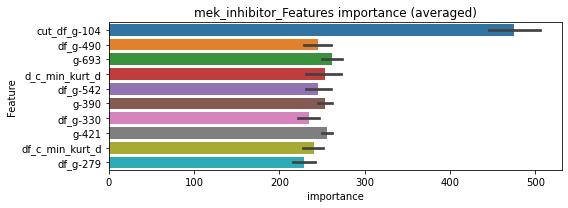

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0383787	valid_1's binary_logloss: 0.0739372
[600]	training's binary_logloss: 0.0113063	valid_1's binary_logloss: 0.039228
[900]	training's binary_logloss: 0.00558457	valid_1's binary_logloss: 0.029237
[1200]	training's binary_logloss: 0.00356279	valid_1's binary_logloss: 0.0248761
[1500]	training's binary_logloss: 0.00259418	valid_1's binary_logloss: 0.0226703
[1800]	training's binary_logloss: 0.00204258	valid_1's binary_logloss: 0.021165
[2100]	training's binary_logloss: 0.00168769	valid_1's binary_logloss: 0.0200977
[2400]	training's binary_logloss: 0.00144791	valid_1's binary_logloss: 0.0194597
[2700]	training's binary_logloss: 0.00127513	valid_1's binary_logloss: 0.0187992
Early stopping, best iteration is:
[2859]	training's binary_logloss: 0.00120144	valid_1's binary_logloss: 0.0184815


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387153	valid_1's binary_logloss: 0.0714513
[600]	training's binary_logloss: 0.0114519	valid_1's binary_logloss: 0.0346452
[900]	training's binary_logloss: 0.00565651	valid_1's binary_logloss: 0.0245265
[1200]	training's binary_logloss: 0.00361507	valid_1's binary_logloss: 0.0201091
[1500]	training's binary_logloss: 0.00262221	valid_1's binary_logloss: 0.0176143
[1800]	training's binary_logloss: 0.00206206	valid_1's binary_logloss: 0.0160822
[2100]	training's binary_logloss: 0.00171023	valid_1's binary_logloss: 0.014958
[2400]	training's binary_logloss: 0.00146547	valid_1's binary_logloss: 0.0142664
Early stopping, best iteration is:
[2538]	training's binary_logloss: 0.00137694	valid_1's binary_logloss: 0.0139204


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.039359	valid_1's binary_logloss: 0.0723141
[600]	training's binary_logloss: 0.0113971	valid_1's binary_logloss: 0.0368828
[900]	training's binary_logloss: 0.00565483	valid_1's binary_logloss: 0.0272712
[1200]	training's binary_logloss: 0.00359159	valid_1's binary_logloss: 0.0228789
[1500]	training's binary_logloss: 0.00260853	valid_1's binary_logloss: 0.0208059
[1800]	training's binary_logloss: 0.00205106	valid_1's binary_logloss: 0.0193362
[2100]	training's binary_logloss: 0.00169631	valid_1's binary_logloss: 0.0185093
[2400]	training's binary_logloss: 0.00145523	valid_1's binary_logloss: 0.017779
[2700]	training's binary_logloss: 0.0012811	valid_1's binary_logloss: 0.017179
Early stopping, best iteration is:
[2848]	training's binary_logloss: 0.00121293	valid_1's binary_logloss: 0.0169943


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0395992	valid_1's binary_logloss: 0.0646993
[600]	training's binary_logloss: 0.0116905	valid_1's binary_logloss: 0.0306438
[900]	training's binary_logloss: 0.0057602	valid_1's binary_logloss: 0.0218501
[1200]	training's binary_logloss: 0.00365902	valid_1's binary_logloss: 0.0183065
[1500]	training's binary_logloss: 0.00265877	valid_1's binary_logloss: 0.016397
[1800]	training's binary_logloss: 0.00208387	valid_1's binary_logloss: 0.0151089
[2100]	training's binary_logloss: 0.00172258	valid_1's binary_logloss: 0.0143066
Early stopping, best iteration is:
[2207]	training's binary_logloss: 0.00162261	valid_1's binary_logloss: 0.0140819


mek_inhibitor logloss: 0.015869990522825967


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198607	valid_1's binary_logloss: 0.0502208
[600]	training's binary_logloss: 0.00303824	valid_1's binary_logloss: 0.0241558
[900]	training's binary_logloss: 0.00117131	valid_1's binary_logloss: 0.0193103
Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.000802342	valid_1's binary_logloss: 0.0180779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187466	valid_1's binary_logloss: 0.0553032
[600]	training's binary_logloss: 0.00294016	valid_1's binary_logloss: 0.0314425
[900]	training's binary_logloss: 0.00114247	valid_1's binary_logloss: 0.0269405
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000876843	valid_1's binary_logloss: 0.0262804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190965	valid_1's binary_logloss: 0.0575618
[600]	training's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0085616, Threshold: 0.0240564, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.01684, conf_1:0.03127
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0240564
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_2: 0.0440564
threshold: 0.0440564, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166752	valid_1's binary_logloss: 0.0483029
[600]	training's binary_logloss: 0.00258099	valid_1's binary_logloss: 0.0238613
[900]	training's binary_logloss: 0.00104148	valid_1's binary_logloss: 0.0196233
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00103685	valid_1's binary_logloss: 0.0196118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174061	valid_1's binary_logloss: 0.0464516
[600]	training's binary_logloss: 0.00263732	valid_1's binary_logloss: 0.0234656
[900]	training's binary_logloss: 0.0010585	valid_1's binary_logloss: 0.0198403
[1200]	training's binary_logloss: 0.000708165	valid_1's binary_logloss: 0.0189333
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.000723996	valid_1's binary_logloss: 0.0188869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0441399, Threshold: 0.0440564, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0118031 Vs.target_rate: 0.00311, Num_p_label: 47.0, conf_0:0.03525, conf_1:0.05287
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_1: 0.0440564
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_2: 0.0640564
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_3: 0.0840564
threshold: 0.0840564, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 644.0/3777, y_label_rate: 0.1705057
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01635	valid_1's binary_logloss: 0.0507679
[600]	training's binary_logloss: 0.00248928	valid_1's binary_logloss: 0.0284495
[900]	training's binary_logloss: 0.00101076	valid_1's binary_logloss: 0.0248639
Early stopping, best iteration is:
[1163]	training's binary_logloss: 0.000699312	valid_1's binary_logloss: 0.0235281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159193	valid_1's binary_logloss: 0.0520721
[600]	training's binary_logloss: 0.00242811	valid_1's binary_logloss: 0.0298106
[900]	training's binary_logloss: 0.000994992	valid_1's binary_logloss: 0.0261332
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000910222	valid_1's binary_logloss: 0.025596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162441	valid_1's binary_logloss: 0.0462633
[600]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0416025, Threshold: 0.0840564, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3769
p_label_rate: 0.0040181 Vs.target_rate: 0.00311, Num_p_label: 16.0, conf_0:0.07565, conf_1:0.09246
threshold: 0.0840564, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 640.0/3769, y_label_rate: 0.1698063


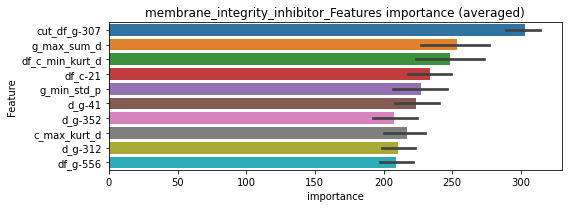

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0324622	valid_1's binary_logloss: 0.0664114
[600]	training's binary_logloss: 0.00975717	valid_1's binary_logloss: 0.0360587
[900]	training's binary_logloss: 0.00497541	valid_1's binary_logloss: 0.0278627
[1200]	training's binary_logloss: 0.00320478	valid_1's binary_logloss: 0.0239547
[1500]	training's binary_logloss: 0.00235062	valid_1's binary_logloss: 0.0219767
[1800]	training's binary_logloss: 0.00186058	valid_1's binary_logloss: 0.0206568
[2100]	training's binary_logloss: 0.00154361	valid_1's binary_logloss: 0.0197308
Early stopping, best iteration is:
[2349]	training's binary_logloss: 0.00135862	valid_1's binary_logloss: 0.0191266


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0316754	valid_1's binary_logloss: 0.0644511
[600]	training's binary_logloss: 0.0095985	valid_1's binary_logloss: 0.0396935
[900]	training's binary_logloss: 0.00483553	valid_1's binary_logloss: 0.0321815
[1200]	training's binary_logloss: 0.00311881	valid_1's binary_logloss: 0.029065
[1500]	training's binary_logloss: 0.0022895	valid_1's binary_logloss: 0.0274536
Early stopping, best iteration is:
[1615]	training's binary_logloss: 0.00207805	valid_1's binary_logloss: 0.0267798


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0322815	valid_1's binary_logloss: 0.0641776
[600]	training's binary_logloss: 0.00975874	valid_1's binary_logloss: 0.037681
[900]	training's binary_logloss: 0.00495207	valid_1's binary_logloss: 0.0303834
[1200]	training's binary_logloss: 0.00318396	valid_1's binary_logloss: 0.0275373
[1500]	training's binary_logloss: 0.00233109	valid_1's binary_logloss: 0.0260975
[1800]	training's binary_logloss: 0.0018447	valid_1's binary_logloss: 0.0250092
[2100]	training's binary_logloss: 0.00153557	valid_1's binary_logloss: 0.0242251
Early stopping, best iteration is:
[2134]	training's binary_logloss: 0.00150662	valid_1's binary_logloss: 0.0241197


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321698	valid_1's binary_logloss: 0.0632695
[600]	training's binary_logloss: 0.0097451	valid_1's binary_logloss: 0.0353367
[900]	training's binary_logloss: 0.00493986	valid_1's binary_logloss: 0.0278859
Early stopping, best iteration is:
[1138]	training's binary_logloss: 0.00344385	valid_1's binary_logloss: 0.0250022


membrane_integrity_inhibitor logloss: 0.02375586476619159


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663737	valid_1's binary_logloss: 0.0123568
[600]	training's binary_logloss: 0.000834124	valid_1's binary_logloss: 0.00295852
[900]	training's binary_logloss: 0.000425943	valid_1's binary_logloss: 0.00199966
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000412946	valid_1's binary_logloss: 0.00197989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655987	valid_1's binary_logloss: 0.012929
[600]	training's binary_logloss: 0.000838512	valid_1's binary_logloss: 0.00373893
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000444113	valid_1's binary_logloss: 0.0028533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00695333	valid_1's binary_logloss: 0.0120239
[600]	training's binary_logloss: 0.000857664	valid_1's binary_logloss: 0.00336247
[900]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0027342, Threshold: 0.0089619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00627, conf_1:0.01165
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0089619
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_2: 0.0289619
threshold: 0.0289619, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061699	valid_1's binary_logloss: 0.0119386
[600]	training's binary_logloss: 0.000785079	valid_1's binary_logloss: 0.00269048
[900]	training's binary_logloss: 0.00040827	valid_1's binary_logloss: 0.0018241
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000394359	valid_1's binary_logloss: 0.00178678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624387	valid_1's binary_logloss: 0.011102
[600]	training's binary_logloss: 0.000802793	valid_1's binary_logloss: 0.0028578
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000425474	valid_1's binary_logloss: 0.00207487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640298	valid_1's binary_logloss: 0.0104048
[600]	training's binary_logloss: 0.000803455	valid_1's binary_logloss: 0.00226541
[900]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0180390, Threshold: 0.0289619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0040181 Vs.target_rate: 0.00105, Num_p_label: 16.0, conf_0:0.02317, conf_1:0.03475
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0289619
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0489619
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.0689619
threshold: 0.0689619, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061699	valid_1's binary_logloss: 0.0119386
[600]	training's binary_logloss: 0.000785079	valid_1's binary_logloss: 0.00269048
[900]	training's binary_logloss: 0.00040827	valid_1's binary_logloss: 0.0018241
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000394359	valid_1's binary_logloss: 0.00178678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624387	valid_1's binary_logloss: 0.011102
[600]	training's binary_logloss: 0.000802793	valid_1's binary_logloss: 0.0028578
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000425474	valid_1's binary_logloss: 0.00207487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640298	valid_1's binary_logloss: 0.0104048
[600]	training's binary_logloss: 0.000803455	valid_1's binary_logloss: 0.00226541
[900]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0180390, Threshold: 0.0689619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00105, Num_p_label: 7.0, conf_0:0.06207, conf_1:0.07586
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0689619
threshold: 0.0689619, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


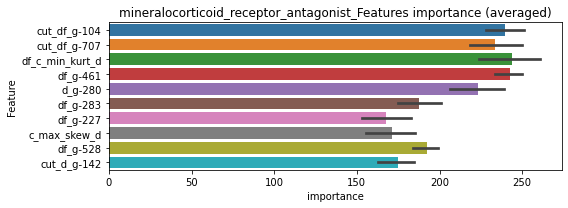

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146828	valid_1's binary_logloss: 0.0218085
[600]	training's binary_logloss: 0.00385329	valid_1's binary_logloss: 0.00753928
[900]	training's binary_logloss: 0.00200027	valid_1's binary_logloss: 0.00461103
[1200]	training's binary_logloss: 0.00135402	valid_1's binary_logloss: 0.00348624
[1500]	training's binary_logloss: 0.00102989	valid_1's binary_logloss: 0.00288693
[1800]	training's binary_logloss: 0.00083707	valid_1's binary_logloss: 0.00248622
[2100]	training's binary_logloss: 0.000714145	valid_1's binary_logloss: 0.00223215
[2400]	training's binary_logloss: 0.000628293	valid_1's binary_logloss: 0.00203677
[2700]	training's binary_logloss: 0.000567551	valid_1's binary_logloss: 0.00190961
[3000]	training's binary_logloss: 0.000520324	valid_1's binary_logloss: 0.00180546
[3300]	training's binary_logloss: 0.000482601	valid_1's binary_logloss: 0.00170507
Early stopping, best iteration is:
[3

len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01499	valid_1's binary_logloss: 0.0224706
[600]	training's binary_logloss: 0.00392218	valid_1's binary_logloss: 0.00797808
[900]	training's binary_logloss: 0.00204689	valid_1's binary_logloss: 0.00513375
[1200]	training's binary_logloss: 0.00137454	valid_1's binary_logloss: 0.00399714
[1500]	training's binary_logloss: 0.00104339	valid_1's binary_logloss: 0.00345167
[1800]	training's binary_logloss: 0.000850347	valid_1's binary_logloss: 0.00308191
[2100]	training's binary_logloss: 0.000726445	valid_1's binary_logloss: 0.00282689
[2400]	training's binary_logloss: 0.000639522	valid_1's binary_logloss: 0.002651
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.000603521	valid_1's binary_logloss: 0.00256864


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015008	valid_1's binary_logloss: 0.0200635
[600]	training's binary_logloss: 0.00393842	valid_1's binary_logloss: 0.0067729
[900]	training's binary_logloss: 0.00203829	valid_1's binary_logloss: 0.00418469
[1200]	training's binary_logloss: 0.00137025	valid_1's binary_logloss: 0.00314725
[1500]	training's binary_logloss: 0.00104177	valid_1's binary_logloss: 0.0026367
[1800]	training's binary_logloss: 0.000851223	valid_1's binary_logloss: 0.00232089
[2100]	training's binary_logloss: 0.000725614	valid_1's binary_logloss: 0.00209514
[2400]	training's binary_logloss: 0.00063924	valid_1's binary_logloss: 0.00193756
[2700]	training's binary_logloss: 0.000574588	valid_1's binary_logloss: 0.00182033
[3000]	training's binary_logloss: 0.000526404	valid_1's binary_logloss: 0.00172783
[3300]	training's binary_logloss: 0.000489173	valid_1's binary_logloss: 0.00165534
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145935	valid_1's binary_logloss: 0.0275818
[600]	training's binary_logloss: 0.00383306	valid_1's binary_logloss: 0.0138742
[900]	training's binary_logloss: 0.00199694	valid_1's binary_logloss: 0.0106901
[1200]	training's binary_logloss: 0.00134775	valid_1's binary_logloss: 0.00940743
Early stopping, best iteration is:
[1419]	training's binary_logloss: 0.00109437	valid_1's binary_logloss: 0.00883456


mineralocorticoid_receptor_antagonist logloss: 0.003651805072506474


neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260954	valid_1's binary_logloss: 0.00461786
[600]	training's binary_logloss: 0.000363525	valid_1's binary_logloss: 0.00116761
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000265542	valid_1's binary_logloss: 0.000978278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268977	valid_1's binary_logloss: 0.00997088
[600]	training's binary_logloss: 0.000368178	valid_1's binary_logloss: 0.00405861
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000267341	valid_1's binary_logloss: 0.00368794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026415	valid_1's binary_logloss: 0.00378875
[600]	training's binary_logloss: 0.000363948	valid_1's binary_logloss: 0.000772957
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000264464	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0010863, Threshold: 0.0031997, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[837]	training's binary_logloss: 0.00026359	valid_1's binary_logloss: 0.000584715


Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00224, conf_1:0.00416
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031997
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0231997
threshold: 0.0231997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233532	valid_1's binary_logloss: 0.00373719
[600]	training's binary_logloss: 0.000332298	valid_1's binary_logloss: 0.00100246
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000250289	valid_1's binary_logloss: 0.000865796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239629	valid_1's binary_logloss: 0.00668452
[600]	training's binary_logloss: 0.00033527	valid_1's binary_logloss: 0.00235783
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000259954	valid_1's binary_logloss: 0.00218956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245392	valid_1's binary_logloss: 0.0025497
[600]	training's binary_logloss: 0.00034282	valid_1's binary_logloss: 0.000375124
[900]	training's binary_logloss: 0.000251692	valid_1's binary_logloss: 0.000276104
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.0506396, Threshold: 0.0231997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00050, Num_p_label: 11.0, conf_0:0.01856, conf_1:0.02784
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.0231997
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0431997


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000254379	valid_1's binary_logloss: 0.000453838


threshold: 0.0431997, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233532	valid_1's binary_logloss: 0.00373719
[600]	training's binary_logloss: 0.000332298	valid_1's binary_logloss: 0.00100246
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000250289	valid_1's binary_logloss: 0.000865796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239629	valid_1's binary_logloss: 0.00668452
[600]	training's binary_logloss: 0.00033527	valid_1's binary_logloss: 0.00235783
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000259954	valid_1's binary_logloss: 0.00218956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245392	valid_1's binary_logloss: 0.0025497
[600]	training's binary_logloss: 0.00034282	valid_1's binary_logloss: 0.000375124
[900]	training's binary_logloss: 0.000251692	valid_1's binary_logloss: 0.000276104
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.0506396, Threshold: 0.0431997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.03888, conf_1:0.04752
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0431997


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000254379	valid_1's binary_logloss: 0.000453838


threshold: 0.0431997, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


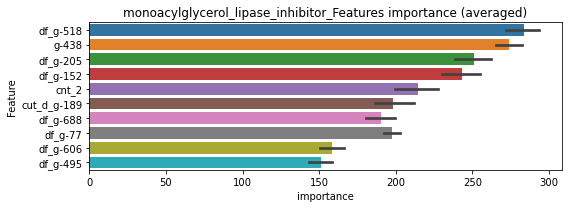

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711462	valid_1's binary_logloss: 0.00933592
[600]	training's binary_logloss: 0.00186389	valid_1's binary_logloss: 0.00310407
[900]	training's binary_logloss: 0.00102412	valid_1's binary_logloss: 0.00199232
[1200]	training's binary_logloss: 0.000714357	valid_1's binary_logloss: 0.00153119
[1500]	training's binary_logloss: 0.000560215	valid_1's binary_logloss: 0.00128604
[1800]	training's binary_logloss: 0.000468028	valid_1's binary_logloss: 0.00112871
[2100]	training's binary_logloss: 0.00040655	valid_1's binary_logloss: 0.00101925
[2400]	training's binary_logloss: 0.000363344	valid_1's binary_logloss: 0.000941541
[2700]	training's binary_logloss: 0.000331894	valid_1's binary_logloss: 0.000881862
[3000]	training's binary_logloss: 0.000308832	valid_1's binary_logloss: 0.000841372
[3300]	training's binary_logloss: 0.00029205	valid_1's binary_logloss: 0.000810824
[3600]	training's binary_loglo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00712992	valid_1's binary_logloss: 0.0116668
[600]	training's binary_logloss: 0.00189576	valid_1's binary_logloss: 0.00425835
[900]	training's binary_logloss: 0.00104013	valid_1's binary_logloss: 0.0027317
[1200]	training's binary_logloss: 0.000722779	valid_1's binary_logloss: 0.00214915
[1500]	training's binary_logloss: 0.000566095	valid_1's binary_logloss: 0.00183087
[1800]	training's binary_logloss: 0.00047131	valid_1's binary_logloss: 0.00165012
[2100]	training's binary_logloss: 0.000409842	valid_1's binary_logloss: 0.00152997
[2400]	training's binary_logloss: 0.000367228	valid_1's binary_logloss: 0.00144617
[2700]	training's binary_logloss: 0.000334667	valid_1's binary_logloss: 0.00137278
[3000]	training's binary_logloss: 0.000311669	valid_1's binary_logloss: 0.00132062
[3300]	training's binary_logloss: 0.000294287	valid_1's binary_logloss: 0.00128617
[3600]	training's binary_logloss: 0

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007261	valid_1's binary_logloss: 0.00759468
[600]	training's binary_logloss: 0.00191616	valid_1's binary_logloss: 0.00205953
[900]	training's binary_logloss: 0.00105257	valid_1's binary_logloss: 0.00115177
[1200]	training's binary_logloss: 0.000734183	valid_1's binary_logloss: 0.000811583
[1500]	training's binary_logloss: 0.000572984	valid_1's binary_logloss: 0.000638717
[1800]	training's binary_logloss: 0.000476945	valid_1's binary_logloss: 0.000535227
[2100]	training's binary_logloss: 0.000414088	valid_1's binary_logloss: 0.000466552
[2400]	training's binary_logloss: 0.000369191	valid_1's binary_logloss: 0.000417504
[2700]	training's binary_logloss: 0.000337245	valid_1's binary_logloss: 0.000382532
[3000]	training's binary_logloss: 0.000313713	valid_1's binary_logloss: 0.000356368
[3300]	training's binary_logloss: 0.000295547	valid_1's binary_logloss: 0.000336395
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711536	valid_1's binary_logloss: 0.00838833
[600]	training's binary_logloss: 0.00188779	valid_1's binary_logloss: 0.00240237
[900]	training's binary_logloss: 0.00103696	valid_1's binary_logloss: 0.0013896
[1200]	training's binary_logloss: 0.000722363	valid_1's binary_logloss: 0.00100312
[1500]	training's binary_logloss: 0.000565166	valid_1's binary_logloss: 0.000803615
[1800]	training's binary_logloss: 0.000472676	valid_1's binary_logloss: 0.000685323
[2100]	training's binary_logloss: 0.000410388	valid_1's binary_logloss: 0.00060513
[2400]	training's binary_logloss: 0.000367194	valid_1's binary_logloss: 0.000549347
[2700]	training's binary_logloss: 0.000334969	valid_1's binary_logloss: 0.000505887
[3000]	training's binary_logloss: 0.00031111	valid_1's binary_logloss: 0.000474207
[3300]	training's binary_logloss: 0.000293552	valid_1's binary_logloss: 0.000451193
[3600]	training's binary_log

monoacylglycerol_lipase_inhibitor logloss: 0.0006759146080555558


neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280, target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229147	valid_1's binary_logloss: 0.0903133
[600]	training's binary_logloss: 0.00385638	valid_1's binary_logloss: 0.0684329
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.0020314	valid_1's binary_logloss: 0.0657501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271094	valid_1's binary_logloss: 0.0823902
[600]	training's binary_logloss: 0.00442743	valid_1's binary_logloss: 0.059716
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00242747	valid_1's binary_logloss: 0.0566164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273255	valid_1's binary_logloss: 0.05596
[600]	training's binary_logloss: 0.00459677	valid_1's binary_logloss: 0.0287787
[900]	training's binary_logloss: 0.00161139	valid_1's binary_logloss: 0.0242472
Early stopping, best iteration is:

1 / 3 AUC score:0.997
y_Threshold: 0.0122536, Threshold: 0.0302246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00357, Num_p_label: 40.0, conf_0:0.02116, conf_1:0.03929
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0302246
Num_p_label: 18.0, Expected: 14.2, Adj_threshold_2: 0.0502246
threshold: 0.0502246, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02344	valid_1's binary_logloss: 0.0684212
[600]	training's binary_logloss: 0.00375064	valid_1's binary_logloss: 0.0412941
[900]	training's binary_logloss: 0.00139663	valid_1's binary_logloss: 0.0373001
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.00104817	valid_1's binary_logloss: 0.0360073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230841	valid_1's binary_logloss: 0.0737838
[600]	training's binary_logloss: 0.00370706	valid_1's binary_logloss: 0.048692
[900]	training's binary_logloss: 0.00137888	valid_1's binary_logloss: 0.0446322
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.00123653	valid_1's binary_logloss: 0.0440998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234919	valid_1's binary_logloss: 0.0623919
[600]	training's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0283351, Threshold: 0.0502246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 642.0/3776
p_label_rate: 0.0070316 Vs.target_rate: 0.00357, Num_p_label: 28.0, conf_0:0.04018, conf_1:0.06027
Num_p_label: 28.0, Expected: 14.2, Adj_threshold_1: 0.0502246
Num_p_label: 17.0, Expected: 14.2, Adj_threshold_2: 0.0702246
threshold: 0.0702246, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3776, y_label_rate: 0.1700212
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213985	valid_1's binary_logloss: 0.0760119
[600]	training's binary_logloss: 0.00334884	valid_1's binary_logloss: 0.0531549
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00201783	valid_1's binary_logloss: 0.0506573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222064	valid_1's binary_logloss: 0.0658569
[600]	training's binary_logloss: 0.00348964	valid_1's binary_logloss: 0.0399436
[900]	training's binary_logloss: 0.00130058	valid_1's binary_logloss: 0.0345373
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.00111866	valid_1's binary_logloss: 0.0339922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236294	valid_1's binary_logloss: 0.0488587
[600]	training's binary_logloss: 0.00381922	valid_1's binary_logloss: 0.02616
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0415073, Threshold: 0.0702246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0052737 Vs.target_rate: 0.00357, Num_p_label: 21.0, conf_0:0.06320, conf_1:0.07725
threshold: 0.0702246, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 635.0/3762, y_label_rate: 0.1687932


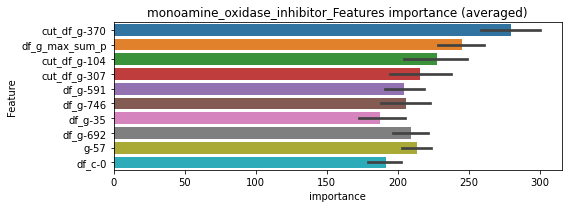

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0389562	valid_1's binary_logloss: 0.0736416
[600]	training's binary_logloss: 0.0122446	valid_1's binary_logloss: 0.0439157
[900]	training's binary_logloss: 0.00612154	valid_1's binary_logloss: 0.0355751
[1200]	training's binary_logloss: 0.00389988	valid_1's binary_logloss: 0.0323662
[1500]	training's binary_logloss: 0.0028337	valid_1's binary_logloss: 0.0305589
Early stopping, best iteration is:
[1527]	training's binary_logloss: 0.00276417	valid_1's binary_logloss: 0.0303741


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372913	valid_1's binary_logloss: 0.0819272
[600]	training's binary_logloss: 0.0116705	valid_1's binary_logloss: 0.0574296
[900]	training's binary_logloss: 0.00584969	valid_1's binary_logloss: 0.0516151
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.00552565	valid_1's binary_logloss: 0.0512788


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392634	valid_1's binary_logloss: 0.0750964
[600]	training's binary_logloss: 0.0123831	valid_1's binary_logloss: 0.0445529
[900]	training's binary_logloss: 0.00617637	valid_1's binary_logloss: 0.0362858
[1200]	training's binary_logloss: 0.00392217	valid_1's binary_logloss: 0.0334771
Early stopping, best iteration is:
[1428]	training's binary_logloss: 0.00303235	valid_1's binary_logloss: 0.0318341


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0379943	valid_1's binary_logloss: 0.0831996
[600]	training's binary_logloss: 0.0118615	valid_1's binary_logloss: 0.0555767
[900]	training's binary_logloss: 0.00592552	valid_1's binary_logloss: 0.0490962
Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.0039843	valid_1's binary_logloss: 0.0469404


monoamine_oxidase_inhibitor logloss: 0.04010725635957636


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450015	valid_1's binary_logloss: 0.00957503
[600]	training's binary_logloss: 0.000596848	valid_1's binary_logloss: 0.00377913
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000356864	valid_1's binary_logloss: 0.00345573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439823	valid_1's binary_logloss: 0.0113432
[600]	training's binary_logloss: 0.000592115	valid_1's binary_logloss: 0.00384838
[900]	training's binary_logloss: 0.000355461	valid_1's binary_logloss: 0.00308512
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000350249	valid_1's binary_logloss: 0.00305105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446891	valid_1's binary_logloss: 0.00686932
[600]	training's binary_logloss: 0.00061057	valid_1's binary_logloss: 0.00153668
[900]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0018344, Threshold: 0.0261926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01833, conf_1:0.03405
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0261926
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0461926
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.0661926
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.0861926
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1061926
threshold: 0.1061926, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420322	valid_1's binary_logloss: 0.00703614
[600]	training's binary_logloss: 0.000564615	valid_1's binary_logloss: 0.00136695
[900]	training's binary_logloss: 0.000345803	valid_1's binary_logloss: 0.000993061
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000346443	valid_1's binary_logloss: 0.000992532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412652	valid_1's binary_logloss: 0.00904902
[600]	training's binary_logloss: 0.00055885	valid_1's binary_logloss: 0.00274326
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000346894	valid_1's binary_logloss: 0.00219643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432541	valid_1's binary_logloss: 0.00636047
[600]	training's binary_logloss: 0.000577513	valid_1's binary_logloss: 0.00120476
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.1068385, Threshold: 0.1061926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0082873 Vs.target_rate: 0.00076, Num_p_label: 33.0, conf_0:0.08495, conf_1:0.12743
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_1: 0.1061926
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_2: 0.1261926
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_3: 0.1461926
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_4: 0.1661926
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.1861926
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_6: 0.2061926
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.2261926
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.2461926
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_9: 0.2661926
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_10: 0.2861926
threshold: 0.3061926, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420322	valid_1's binary_logloss: 0.00703614
[600]	training's binary_logloss: 0.000564615	valid_1's binary_logloss: 0.00136695
[900]	training's binary_logloss: 0.000345803	valid_1's binary_logloss: 0.000993061
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000346443	valid_1's binary_logloss: 0.000992532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412652	valid_1's binary_logloss: 0.00904902
[600]	training's binary_logloss: 0.00055885	valid_1's binary_logloss: 0.00274326
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000346894	valid_1's binary_logloss: 0.00219643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432541	valid_1's binary_logloss: 0.00636047
[600]	training's binary_logloss: 0.000577513	valid_1's binary_logloss: 0.00120476
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.1068385, Threshold: 0.3061926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00076, Num_p_label: 11.0, conf_0:0.27557, conf_1:0.33681
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.3061926
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.3261926
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.3461926
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.3661926
threshold: 0.3661926, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


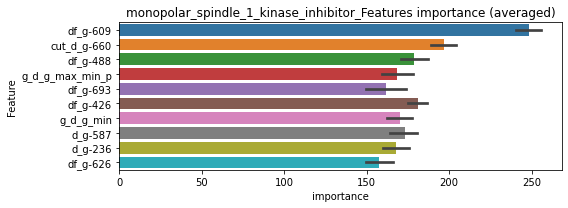

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116318	valid_1's binary_logloss: 0.0157884
[600]	training's binary_logloss: 0.002996	valid_1's binary_logloss: 0.00477569
[900]	training's binary_logloss: 0.00158138	valid_1's binary_logloss: 0.00273271
[1200]	training's binary_logloss: 0.00107342	valid_1's binary_logloss: 0.00196982
[1500]	training's binary_logloss: 0.000824125	valid_1's binary_logloss: 0.00158194
[1800]	training's binary_logloss: 0.000676159	valid_1's binary_logloss: 0.00134864
[2100]	training's binary_logloss: 0.000580997	valid_1's binary_logloss: 0.00119295
[2400]	training's binary_logloss: 0.000515129	valid_1's binary_logloss: 0.00108291
[2700]	training's binary_logloss: 0.000467086	valid_1's binary_logloss: 0.000999604
[3000]	training's binary_logloss: 0.000432128	valid_1's binary_logloss: 0.000935844
[3300]	training's binary_logloss: 0.000405474	valid_1's binary_logloss: 0.000887659
[3600]	training's binary_logloss: 

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114948	valid_1's binary_logloss: 0.0182594
[600]	training's binary_logloss: 0.00298667	valid_1's binary_logloss: 0.00651453
[900]	training's binary_logloss: 0.00156933	valid_1's binary_logloss: 0.00422686
[1200]	training's binary_logloss: 0.00106559	valid_1's binary_logloss: 0.00329432
[1500]	training's binary_logloss: 0.000818956	valid_1's binary_logloss: 0.00281292
[1800]	training's binary_logloss: 0.000672751	valid_1's binary_logloss: 0.00251847
[2100]	training's binary_logloss: 0.0005782	valid_1's binary_logloss: 0.00230565
[2400]	training's binary_logloss: 0.000512107	valid_1's binary_logloss: 0.00217016
[2700]	training's binary_logloss: 0.000464699	valid_1's binary_logloss: 0.00207307
[3000]	training's binary_logloss: 0.000429202	valid_1's binary_logloss: 0.00199259
[3300]	training's binary_logloss: 0.000402603	valid_1's binary_logloss: 0.00194202
[3600]	training's binary_logloss: 0.0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118157	valid_1's binary_logloss: 0.014903
[600]	training's binary_logloss: 0.00304861	valid_1's binary_logloss: 0.00434888
[900]	training's binary_logloss: 0.00160411	valid_1's binary_logloss: 0.00244149
[1200]	training's binary_logloss: 0.00108658	valid_1's binary_logloss: 0.00173111
[1500]	training's binary_logloss: 0.000833163	valid_1's binary_logloss: 0.0013727
[1800]	training's binary_logloss: 0.00068571	valid_1's binary_logloss: 0.00116194
[2100]	training's binary_logloss: 0.000588719	valid_1's binary_logloss: 0.0010187
[2400]	training's binary_logloss: 0.000520971	valid_1's binary_logloss: 0.000917705
[2700]	training's binary_logloss: 0.000471516	valid_1's binary_logloss: 0.000844943
[3000]	training's binary_logloss: 0.000435269	valid_1's binary_logloss: 0.000790143
[3300]	training's binary_logloss: 0.000408112	valid_1's binary_logloss: 0.000749867
[3600]	training's binary_logloss: 0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01163	valid_1's binary_logloss: 0.0156938
[600]	training's binary_logloss: 0.00302597	valid_1's binary_logloss: 0.00492086
[900]	training's binary_logloss: 0.00159834	valid_1's binary_logloss: 0.00290934
[1200]	training's binary_logloss: 0.00108382	valid_1's binary_logloss: 0.00213276
[1500]	training's binary_logloss: 0.000830425	valid_1's binary_logloss: 0.00174102
[1800]	training's binary_logloss: 0.000682314	valid_1's binary_logloss: 0.00150764
[2100]	training's binary_logloss: 0.000586468	valid_1's binary_logloss: 0.00134892
[2400]	training's binary_logloss: 0.000519761	valid_1's binary_logloss: 0.0012391
[2700]	training's binary_logloss: 0.0004709	valid_1's binary_logloss: 0.00115872
[3000]	training's binary_logloss: 0.000434961	valid_1's binary_logloss: 0.00109567
[3300]	training's binary_logloss: 0.000408054	valid_1's binary_logloss: 0.0010514
[3600]	training's binary_logloss: 0.00038

monopolar_spindle_1_kinase_inhibitor logloss: 0.0010930490771558204


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269, target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0467667	valid_1's binary_logloss: 0.147681
[600]	training's binary_logloss: 0.00931664	valid_1's binary_logloss: 0.105017
[900]	training's binary_logloss: 0.00287328	valid_1's binary_logloss: 0.0939114
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00296385	valid_1's binary_logloss: 0.0938586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0474764	valid_1's binary_logloss: 0.133275
[600]	training's binary_logloss: 0.00891971	valid_1's binary_logloss: 0.0866122
[900]	training's binary_logloss: 0.00282281	valid_1's binary_logloss: 0.0770574
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.00166123	valid_1's binary_logloss: 0.0745237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.047458	valid_1's binary_logloss: 0.140901
[600]	training's binary_logloss: 0

1 / 3 AUC score:0.989
y_Threshold: 0.0235593, Threshold: 0.3709841, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 633/3750
p_label_rate: 0.0100452 Vs.target_rate: 0.00546, Num_p_label: 40.0, conf_0:0.25969, conf_1:0.48228
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3709841
Num_p_label: 37.0, Expected: 21.7, Adj_threshold_2: 0.3909841
Num_p_label: 34.0, Expected: 21.7, Adj_threshold_3: 0.4109841
Num_p_label: 32.0, Expected: 21.7, Adj_threshold_4: 0.4309841
threshold: 0.4309841, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 633.0/3750, y_label_rate: 0.1688000
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387613	valid_1's binary_logloss: 0.115435
[600]	training's binary_logloss: 0.00686435	valid_1's binary_logloss: 0.0762726
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.0025886	valid_1's binary_logloss: 0.068201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416509	valid_1's binary_logloss: 0.109786
[600]	training's binary_logloss: 0.00731071	valid_1's binary_logloss: 0.0588141
[900]	training's binary_logloss: 0.0024015	valid_1's binary_logloss: 0.0457754
[1200]	training's binary_logloss: 0.00135438	valid_1's binary_logloss: 0.0423527
Early stopping, best iteration is:
[1284]	training's binary_logloss: 0.00121559	valid_1's binary_logloss: 0.0418555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0395319	valid_1's binary_logloss: 0.111856
[600]	training's binary_logloss: 0

2 / 3 AUC score:0.995
y_Threshold: 0.0580033, Threshold: 0.4309841, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 612.0/3708
p_label_rate: 0.0140633 Vs.target_rate: 0.00546, Num_p_label: 56.0, conf_0:0.34479, conf_1:0.51718
Num_p_label: 56.0, Expected: 21.7, Adj_threshold_1: 0.4309841
Num_p_label: 54.0, Expected: 21.7, Adj_threshold_2: 0.4509841
Num_p_label: 54.0, Expected: 21.7, Adj_threshold_3: 0.4709841
Num_p_label: 52.0, Expected: 21.7, Adj_threshold_4: 0.4909841
Num_p_label: 51.0, Expected: 21.7, Adj_threshold_5: 0.5109841
Num_p_label: 48.0, Expected: 21.7, Adj_threshold_6: 0.5309841
Num_p_label: 44.0, Expected: 21.7, Adj_threshold_7: 0.5509841
Num_p_label: 42.0, Expected: 21.7, Adj_threshold_8: 0.5709841
Num_p_label: 41.0, Expected: 21.7, Adj_threshold_9: 0.5909841
Num_p_label: 41.0, Expected: 21.7, Adj_threshold_10: 0.6109841
threshold: 0.6309841, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 612.0/3708, y_label_rate: 0.1650485

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363005	valid_1's binary_logloss: 0.0949426
[600]	training's binary_logloss: 0.00619056	valid_1's binary_logloss: 0.0518662
[900]	training's binary_logloss: 0.00213659	valid_1's binary_logloss: 0.0422048
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00205156	valid_1's binary_logloss: 0.0420154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0347821	valid_1's binary_logloss: 0.12446
[600]	training's binary_logloss: 0.00600346	valid_1's binary_logloss: 0.0859218
[900]	training's binary_logloss: 0.00205899	valid_1's binary_logloss: 0.0788286
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.00142929	valid_1's binary_logloss: 0.0758879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350253	valid_1's binary_logloss: 0.105573
[600]	training's binary_logloss:

3 / 3 AUC score:0.997
y_Threshold: 0.0498128, Threshold: 0.6309841, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 597.0/3678
p_label_rate: 0.0110497 Vs.target_rate: 0.00546, Num_p_label: 44.0, conf_0:0.50000, conf_1:0.69408
Num_p_label: 44.0, Expected: 21.7, Adj_threshold_1: 0.6309841
Num_p_label: 42.0, Expected: 21.7, Adj_threshold_2: 0.6509841
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_3: 0.6709841
Num_p_label: 38.0, Expected: 21.7, Adj_threshold_4: 0.6909841
Num_p_label: 36.0, Expected: 21.7, Adj_threshold_5: 0.7109841
Num_p_label: 35.0, Expected: 21.7, Adj_threshold_6: 0.7309841
Num_p_label: 33.0, Expected: 21.7, Adj_threshold_7: 0.7509841
Num_p_label: 31.0, Expected: 21.7, Adj_threshold_8: 0.7709841
threshold: 0.7709841, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 597.0/3678, y_label_rate: 0.1623165


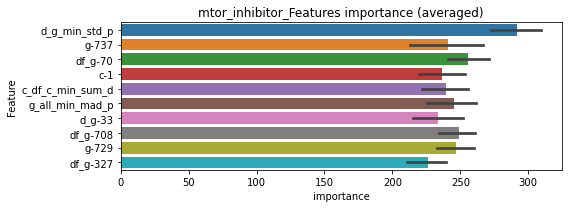

len(train_index) : 2758
len(valid_index) : 920
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.05663	valid_1's binary_logloss: 0.127477
[600]	training's binary_logloss: 0.0182421	valid_1's binary_logloss: 0.0800966
[900]	training's binary_logloss: 0.00898466	valid_1's binary_logloss: 0.0653317
[1200]	training's binary_logloss: 0.00561784	valid_1's binary_logloss: 0.0592554
[1500]	training's binary_logloss: 0.00402183	valid_1's binary_logloss: 0.0563716
[1800]	training's binary_logloss: 0.00311482	valid_1's binary_logloss: 0.0542849
Early stopping, best iteration is:
[1800]	training's binary_logloss: 0.00311482	valid_1's binary_logloss: 0.0542849


len(train_index) : 2758
len(valid_index) : 920
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0564684	valid_1's binary_logloss: 0.121378
[600]	training's binary_logloss: 0.0180391	valid_1's binary_logloss: 0.0735577
[900]	training's binary_logloss: 0.00895884	valid_1's binary_logloss: 0.0578331
[1200]	training's binary_logloss: 0.00559169	valid_1's binary_logloss: 0.0506621
[1500]	training's binary_logloss: 0.00399703	valid_1's binary_logloss: 0.0470125
[1800]	training's binary_logloss: 0.00310453	valid_1's binary_logloss: 0.0449191
Early stopping, best iteration is:
[1977]	training's binary_logloss: 0.00274289	valid_1's binary_logloss: 0.0438073


len(train_index) : 2759
len(valid_index) : 919
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0556857	valid_1's binary_logloss: 0.13807
[600]	training's binary_logloss: 0.0179016	valid_1's binary_logloss: 0.0946438
[900]	training's binary_logloss: 0.00890014	valid_1's binary_logloss: 0.0828179
[1200]	training's binary_logloss: 0.00558923	valid_1's binary_logloss: 0.0783189
[1500]	training's binary_logloss: 0.00400248	valid_1's binary_logloss: 0.0758803
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.00393472	valid_1's binary_logloss: 0.0756978


len(train_index) : 2759
len(valid_index) : 919
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0568513	valid_1's binary_logloss: 0.122701
[600]	training's binary_logloss: 0.0181287	valid_1's binary_logloss: 0.0737876
[900]	training's binary_logloss: 0.00897641	valid_1's binary_logloss: 0.0584328
[1200]	training's binary_logloss: 0.00562512	valid_1's binary_logloss: 0.0516787
[1500]	training's binary_logloss: 0.0040176	valid_1's binary_logloss: 0.0480641
[1800]	training's binary_logloss: 0.00312144	valid_1's binary_logloss: 0.0458165
[2100]	training's binary_logloss: 0.00255246	valid_1's binary_logloss: 0.0442755
Early stopping, best iteration is:
[2073]	training's binary_logloss: 0.00259084	valid_1's binary_logloss: 0.0441316


mtor_inhibitor logloss: 0.054477434024449684


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013962	valid_1's binary_logloss: 0.031514
[600]	training's binary_logloss: 0.00186354	valid_1's binary_logloss: 0.00942258
[900]	training's binary_logloss: 0.000791168	valid_1's binary_logloss: 0.00630693
Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.00058628	valid_1's binary_logloss: 0.00555747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138247	valid_1's binary_logloss: 0.0379113
[600]	training's binary_logloss: 0.00184456	valid_1's binary_logloss: 0.01537
[900]	training's binary_logloss: 0.00078507	valid_1's binary_logloss: 0.0122463
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000574506	valid_1's binary_logloss: 0.0114097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014015	valid_1's binary_logloss: 0.0324899
[600]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0051149, Threshold: 0.0824055, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.05768, conf_1:0.10713
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0824055
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_2: 0.1024055
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_3: 0.1224055
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_4: 0.1424055
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_5: 0.1624055
threshold: 0.1624055, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125814	valid_1's binary_logloss: 0.0286345
[600]	training's binary_logloss: 0.00170428	valid_1's binary_logloss: 0.00803465
[900]	training's binary_logloss: 0.000738645	valid_1's binary_logloss: 0.0050939
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000555297	valid_1's binary_logloss: 0.0044741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012417	valid_1's binary_logloss: 0.0319725
[600]	training's binary_logloss: 0.00169269	valid_1's binary_logloss: 0.0123156
[900]	training's binary_logloss: 0.000733816	valid_1's binary_logloss: 0.0097194
Early stopping, best iteration is:
[1157]	training's binary_logloss: 0.00055538	valid_1's binary_logloss: 0.00914479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013071	valid_1's binary_logloss: 0.0306578
[600]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0874387, Threshold: 0.1624055, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0208438 Vs.target_rate: 0.00202, Num_p_label: 83.0, conf_0:0.12992, conf_1:0.19489
Num_p_label: 83.0, Expected: 8.0, Adj_threshold_1: 0.1624055
Num_p_label: 77.0, Expected: 8.0, Adj_threshold_2: 0.1824055
Num_p_label: 75.0, Expected: 8.0, Adj_threshold_3: 0.2024055
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_4: 0.2224055
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_5: 0.2424055
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_6: 0.2624055
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_7: 0.2824055
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_8: 0.3024055
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_9: 0.3224055
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.3424055
threshold: 0.3624055, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012401	valid_1's binary_logloss: 0.0335357
[600]	training's binary_logloss: 0.00168144	valid_1's binary_logloss: 0.0120506
[900]	training's binary_logloss: 0.000735662	valid_1's binary_logloss: 0.00877732
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.000570132	valid_1's binary_logloss: 0.00820089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125912	valid_1's binary_logloss: 0.0266236
[600]	training's binary_logloss: 0.00171946	valid_1's binary_logloss: 0.00690854
[900]	training's binary_logloss: 0.000746251	valid_1's binary_logloss: 0.00411548
Early stopping, best iteration is:
[1108]	training's binary_logloss: 0.000578537	valid_1's binary_logloss: 0.00363182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127312	valid_1's binary_logloss: 0.0261742
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1272302, Threshold: 0.3624055, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0130588 Vs.target_rate: 0.00202, Num_p_label: 52.0, conf_0:0.32616, conf_1:0.39865
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_1: 0.3624055
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_2: 0.3824055
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_3: 0.4024055
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_4: 0.4224055
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_5: 0.4424055
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_6: 0.4624055
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_7: 0.4824055
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_8: 0.5024055
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_9: 0.5224055
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_10: 0.5424055
threshold: 0.5624055, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


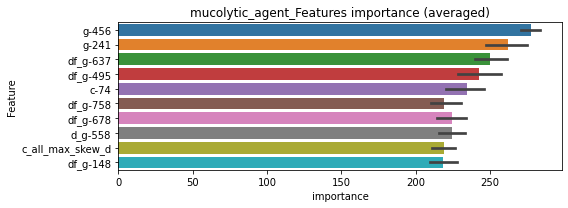

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0267052	valid_1's binary_logloss: 0.0494342
[600]	training's binary_logloss: 0.00748201	valid_1's binary_logloss: 0.0217195
[900]	training's binary_logloss: 0.00376678	valid_1's binary_logloss: 0.0147466
[1200]	training's binary_logloss: 0.00243456	valid_1's binary_logloss: 0.0116726
[1500]	training's binary_logloss: 0.00180167	valid_1's binary_logloss: 0.0101608
[1800]	training's binary_logloss: 0.00143799	valid_1's binary_logloss: 0.00914016
[2100]	training's binary_logloss: 0.00120045	valid_1's binary_logloss: 0.00842828
[2400]	training's binary_logloss: 0.00103853	valid_1's binary_logloss: 0.00793147
[2700]	training's binary_logloss: 0.000921223	valid_1's binary_logloss: 0.00755182
[3000]	training's binary_logloss: 0.000833698	valid_1's binary_logloss: 0.00727246
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00077296	valid_1's binary_logloss: 0.00702762


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274543	valid_1's binary_logloss: 0.0453896
[600]	training's binary_logloss: 0.00767679	valid_1's binary_logloss: 0.0173753
[900]	training's binary_logloss: 0.00386291	valid_1's binary_logloss: 0.01075
[1200]	training's binary_logloss: 0.00250779	valid_1's binary_logloss: 0.0080134
[1500]	training's binary_logloss: 0.0018453	valid_1's binary_logloss: 0.00659288
[1800]	training's binary_logloss: 0.00146757	valid_1's binary_logloss: 0.00569382
[2100]	training's binary_logloss: 0.00122877	valid_1's binary_logloss: 0.00509521
[2400]	training's binary_logloss: 0.00106293	valid_1's binary_logloss: 0.00464876
[2700]	training's binary_logloss: 0.000942619	valid_1's binary_logloss: 0.00431118
[3000]	training's binary_logloss: 0.000852334	valid_1's binary_logloss: 0.00408101
[3300]	training's binary_logloss: 0.000782763	valid_1's binary_logloss: 0.00388679
[3600]	training's binary_logloss: 0.00072732	

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0268197	valid_1's binary_logloss: 0.0448862
[600]	training's binary_logloss: 0.00755793	valid_1's binary_logloss: 0.017189
[900]	training's binary_logloss: 0.0038185	valid_1's binary_logloss: 0.0106339
[1200]	training's binary_logloss: 0.00247606	valid_1's binary_logloss: 0.00787525
[1500]	training's binary_logloss: 0.00182964	valid_1's binary_logloss: 0.0064256
[1800]	training's binary_logloss: 0.00145659	valid_1's binary_logloss: 0.00552927
[2100]	training's binary_logloss: 0.00122083	valid_1's binary_logloss: 0.00491489
[2400]	training's binary_logloss: 0.00105653	valid_1's binary_logloss: 0.00447858
[2700]	training's binary_logloss: 0.000935979	valid_1's binary_logloss: 0.00413032
[3000]	training's binary_logloss: 0.000846506	valid_1's binary_logloss: 0.00386948
[3300]	training's binary_logloss: 0.000776151	valid_1's binary_logloss: 0.00366441
[3600]	training's binary_logloss: 0.00072134

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0270998	valid_1's binary_logloss: 0.0495354
[600]	training's binary_logloss: 0.00750648	valid_1's binary_logloss: 0.0223036
[900]	training's binary_logloss: 0.00377401	valid_1's binary_logloss: 0.0155064
[1200]	training's binary_logloss: 0.00244684	valid_1's binary_logloss: 0.0127117
[1500]	training's binary_logloss: 0.00180931	valid_1's binary_logloss: 0.0112578
[1800]	training's binary_logloss: 0.00144218	valid_1's binary_logloss: 0.0102961
[2100]	training's binary_logloss: 0.00120944	valid_1's binary_logloss: 0.00967469
[2400]	training's binary_logloss: 0.00104646	valid_1's binary_logloss: 0.00920227
[2700]	training's binary_logloss: 0.000927954	valid_1's binary_logloss: 0.00882024
Early stopping, best iteration is:
[2711]	training's binary_logloss: 0.000924221	valid_1's binary_logloss: 0.00880508


mucolytic_agent logloss: 0.005629329941079908


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00856567	valid_1's binary_logloss: 0.0264147
[600]	training's binary_logloss: 0.00118273	valid_1's binary_logloss: 0.0129664
[900]	training's binary_logloss: 0.000564492	valid_1's binary_logloss: 0.0115791
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000558699	valid_1's binary_logloss: 0.0115285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00935233	valid_1's binary_logloss: 0.0201865
[600]	training's binary_logloss: 0.0012896	valid_1's binary_logloss: 0.00735544
[900]	training's binary_logloss: 0.000604177	valid_1's binary_logloss: 0.00550065
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000529793	valid_1's binary_logloss: 0.00529389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00928195	valid_1's binary_logloss: 0.0207542
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0037831, Threshold: 0.0150432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01053, conf_1:0.01956
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0150432
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.0350432
threshold: 0.0350432, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00804888	valid_1's binary_logloss: 0.0239639
[600]	training's binary_logloss: 0.00113686	valid_1's binary_logloss: 0.0127501
[900]	training's binary_logloss: 0.000551743	valid_1's binary_logloss: 0.0113294
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000547339	valid_1's binary_logloss: 0.0112886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867683	valid_1's binary_logloss: 0.0190944
[600]	training's binary_logloss: 0.00119954	valid_1's binary_logloss: 0.00680285
[900]	training's binary_logloss: 0.000575356	valid_1's binary_logloss: 0.00516864
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000534701	valid_1's binary_logloss: 0.00505459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00844108	valid_1's binary_logloss: 0.0204352
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0264957, Threshold: 0.0350432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0092918 Vs.target_rate: 0.00155, Num_p_label: 37.0, conf_0:0.02803, conf_1:0.04205
Num_p_label: 37.0, Expected: 6.2, Adj_threshold_1: 0.0350432
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_2: 0.0550432
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_3: 0.0750432
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.0950432
threshold: 0.0950432, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00804888	valid_1's binary_logloss: 0.0239639
[600]	training's binary_logloss: 0.00113686	valid_1's binary_logloss: 0.0127501
[900]	training's binary_logloss: 0.000551743	valid_1's binary_logloss: 0.0113294
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000547339	valid_1's binary_logloss: 0.0112886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867683	valid_1's binary_logloss: 0.0190944
[600]	training's binary_logloss: 0.00119954	valid_1's binary_logloss: 0.00680285
[900]	training's binary_logloss: 0.000575356	valid_1's binary_logloss: 0.00516864
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000534701	valid_1's binary_logloss: 0.00505459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00844108	valid_1's binary_logloss: 0.0204352
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0264957, Threshold: 0.0950432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0032647 Vs.target_rate: 0.00155, Num_p_label: 13.0, conf_0:0.08554, conf_1:0.10455
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0950432
threshold: 0.0950432, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


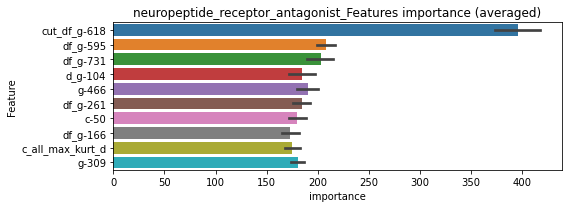

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193449	valid_1's binary_logloss: 0.038243
[600]	training's binary_logloss: 0.00547001	valid_1's binary_logloss: 0.0202313
[900]	training's binary_logloss: 0.00282277	valid_1's binary_logloss: 0.0160302
[1200]	training's binary_logloss: 0.00186775	valid_1's binary_logloss: 0.0144636
[1500]	training's binary_logloss: 0.00140495	valid_1's binary_logloss: 0.0135129
[1800]	training's binary_logloss: 0.00113475	valid_1's binary_logloss: 0.0128398
Early stopping, best iteration is:
[2019]	training's binary_logloss: 0.00100119	valid_1's binary_logloss: 0.0124918


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203848	valid_1's binary_logloss: 0.0317875
[600]	training's binary_logloss: 0.00573451	valid_1's binary_logloss: 0.0134156
[900]	training's binary_logloss: 0.00295376	valid_1's binary_logloss: 0.009176
[1200]	training's binary_logloss: 0.00195272	valid_1's binary_logloss: 0.00742377
[1500]	training's binary_logloss: 0.00145793	valid_1's binary_logloss: 0.00642711
[1800]	training's binary_logloss: 0.00117333	valid_1's binary_logloss: 0.00579645
[2100]	training's binary_logloss: 0.000990697	valid_1's binary_logloss: 0.00540849
[2400]	training's binary_logloss: 0.00086478	valid_1's binary_logloss: 0.00508782
[2700]	training's binary_logloss: 0.000773278	valid_1's binary_logloss: 0.00488056
[3000]	training's binary_logloss: 0.00070441	valid_1's binary_logloss: 0.00474053
[3300]	training's binary_logloss: 0.000651747	valid_1's binary_logloss: 0.0045877
[3600]	training's binary_logloss: 0.0006100

len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202188	valid_1's binary_logloss: 0.0334564
[600]	training's binary_logloss: 0.00569943	valid_1's binary_logloss: 0.0161018
[900]	training's binary_logloss: 0.00293416	valid_1's binary_logloss: 0.0121744
[1200]	training's binary_logloss: 0.00194451	valid_1's binary_logloss: 0.0107204
[1500]	training's binary_logloss: 0.00145956	valid_1's binary_logloss: 0.00991122
[1800]	training's binary_logloss: 0.00117468	valid_1's binary_logloss: 0.00937081
Early stopping, best iteration is:
[1780]	training's binary_logloss: 0.00118948	valid_1's binary_logloss: 0.00936109


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196695	valid_1's binary_logloss: 0.0334296
[600]	training's binary_logloss: 0.00557795	valid_1's binary_logloss: 0.0161733
[900]	training's binary_logloss: 0.00287258	valid_1's binary_logloss: 0.0122585
[1200]	training's binary_logloss: 0.00190358	valid_1's binary_logloss: 0.0108578
[1500]	training's binary_logloss: 0.00143076	valid_1's binary_logloss: 0.0100178
[1800]	training's binary_logloss: 0.0011529	valid_1's binary_logloss: 0.00942681
Early stopping, best iteration is:
[1894]	training's binary_logloss: 0.00108994	valid_1's binary_logloss: 0.0093114


neuropeptide_receptor_antagonist logloss: 0.008882101514650919


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173, target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[17]	training's binary_logloss: 0.477228	valid_1's binary_logloss: 0.50861
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[72]	training's binary_logloss: 0.387339	valid_1's binary_logloss: 0.504569
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[34]	training's binary_logloss: 0.451008	valid_1's binary_logloss: 0.506763
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.541
y_Threshold: 0.2155780, Threshold: 0.4348398, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1374 → Positive_corect_labels: 254/2631
p_label_rate: 0.0100452 Vs.target_rate: 0.03494, Num_p_label: 40.0, conf_0:0.30439, conf_1:0.56529
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4348398
Num_p_label: 77.0, Expected: 139.1, Adj_threshold_2: 0.4148398
Num_p_label: 113.0, Expected: 139.1, Adj_threshold_3: 0.3948398
Num_p_label: 131.0, Expected: 139.1, Adj_threshold_4: 0.3748398
Num_p_label: 140.0, Expected: 139.1, Adj_threshold_5: 0.3548398
Num_p_label: 142.0, Expected: 139.1, Adj_threshold_6: 0.3348398
Num_p_label: 145.0, Expected: 139.1, Adj_threshold_7: 0.3148398
Num_p_label: 152.0, Expected: 139.1, Adj_threshold_8: 0.2948398
Num_p_label: 170.0, Expected: 139.1, Adj_threshold_9: 0.2748398
Num_p_label: 219.0, Expected: 139.1, Adj_threshold_10: 0.2548398
threshold: 0.2348398, positive_p_label: 400.0/3982, p_label_rate: 0.1004520


Early stopping, best iteration is:
[37]	training's binary_logloss: 0.450294	valid_1's binary_logloss: 0.507727


positive_y_label: 254.0/2631, y_label_rate: 0.0965412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[154]	training's binary_logloss: 0.0774903	valid_1's binary_logloss: 0.228687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[106]	training's binary_logloss: 0.112238	valid_1's binary_logloss: 0.237798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[112]	training's binary_logloss: 0.108965	valid_1's binary_logloss: 0.244542
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.836
y_Threshold: 0.1323083, Threshold: 0.2348398, pos_neg_ratio: 0.7377876
Remove_noisy_data: 266 → Positive_corect_labels: 121.0/2365
p_label_rate: 0.1012054 Vs.target_rate: 0.03494, Num_p_label: 403.0, conf_0:0.18787, conf_1:0.28181
Num_p_label: 403.0, Expected: 139.1, Adj_threshold_1: 0.2348398
Num_p_label: 371.0, Expected: 139.1, Adj_threshold_2: 0.2548398
Num_p_label: 340.0, Expected: 139.1, Adj_threshold_3: 0.2748398
Num_p_label: 317.0, Expected: 139.1, Adj_threshold_4: 0.2948398
Num_p_label: 291.0, Expected: 139.1, Adj_threshold_5: 0.3148398
Num_p_label: 278.0, Expected: 139.1, Adj_threshold_6: 0.3348398
Num_p_label: 261.0, Expected: 139.1, Adj_threshold_7: 0.3548398
Num_p_label: 250.0, Expected: 139.1, Adj_threshold_8: 0.3748398
Num_p_label: 238.0, Expected: 139.1, Adj_threshold_9: 0.3948398
Num_p_label: 229.0, Expected: 139.1, Adj_threshold_10: 0.4148398
threshold: 0.4348398, positive_p_label: 222.0/3982, p_label_rate: 0.0557509


Early stopping, best iteration is:
[89]	training's binary_logloss: 0.127948	valid_1's binary_logloss: 0.256854


positive_y_label: 121.0/2365, y_label_rate: 0.0511628
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0132409	valid_1's binary_logloss: 0.0731343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[119]	training's binary_logloss: 0.0285032	valid_1's binary_logloss: 0.0961534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.0158383	valid_1's binary_logloss: 0.0748808
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.985
y_Threshold: 0.0846208, Threshold: 0.4348398, pos_neg_ratio: 0.7377876
Remove_noisy_data: 52 → Positive_corect_labels: 95.0/2313
p_label_rate: 0.0851331 Vs.target_rate: 0.03494, Num_p_label: 339.0, conf_0:0.39136, conf_1:0.47832
Num_p_label: 339.0, Expected: 139.1, Adj_threshold_1: 0.4348398
Num_p_label: 333.0, Expected: 139.1, Adj_threshold_2: 0.4548398
Num_p_label: 326.0, Expected: 139.1, Adj_threshold_3: 0.4748398
Num_p_label: 319.0, Expected: 139.1, Adj_threshold_4: 0.4948398
Num_p_label: 312.0, Expected: 139.1, Adj_threshold_5: 0.5148398
Num_p_label: 309.0, Expected: 139.1, Adj_threshold_6: 0.5348398
Num_p_label: 303.0, Expected: 139.1, Adj_threshold_7: 0.5548398
Num_p_label: 296.0, Expected: 139.1, Adj_threshold_8: 0.5748398
Num_p_label: 286.0, Expected: 139.1, Adj_threshold_9: 0.5948398
Num_p_label: 279.0, Expected: 139.1, Adj_threshold_10: 0.6148398
threshold: 0.6348398, positive_p_label: 271.0/3982, p_label_rate: 0.0680563


[300]	training's binary_logloss: 0.00525755	valid_1's binary_logloss: 0.0534056
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.0063272	valid_1's binary_logloss: 0.0524138


positive_y_label: 95.0/2313, y_label_rate: 0.0410722


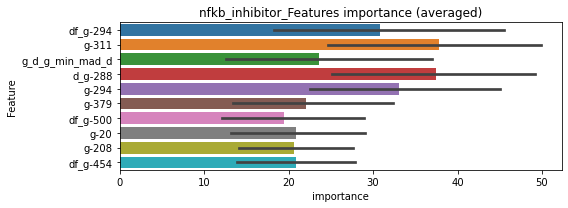

len(train_index) : 1734
len(valid_index) : 579
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958645	valid_1's binary_logloss: 0.0319345


len(train_index) : 1735
len(valid_index) : 578
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00557591	valid_1's binary_logloss: 0.0302547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893322	valid_1's binary_logloss: 0.0322631


len(train_index) : 1735
len(valid_index) : 578
================================= fold 3/4 nfkb_inhibitor=================================


[600]	training's binary_logloss: 0.00316668	valid_1's binary_logloss: 0.0283872
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00341497	valid_1's binary_logloss: 0.0283077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00887224	valid_1's binary_logloss: 0.0495927
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00648397	valid_1's binary_logloss: 0.0489749


len(train_index) : 1735
len(valid_index) : 578
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.03720682878479523


[300]	training's binary_logloss: 0.00916584	valid_1's binary_logloss: 0.0416624
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00814654	valid_1's binary_logloss: 0.041302
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319315	valid_1's binary_logloss: 0.00769206
[600]	training's binary_logloss: 0.000424433	valid_1's binary_logloss: 0.00255106
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000310269	valid_1's binary_logloss: 0.00223924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317035	valid_1's binary_logloss: 0.00482583
[600]	training's binary_logloss: 0.000425504	valid_1's binary_logloss: 0.00140298
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000329045	valid_1's binary_logloss: 0.00127086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329135	valid_1's binary_logloss: 0.00412004
[600]	training's binary_logloss: 0.000438347	valid_1's binary_logloss: 0.000624966
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000299892	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0013158, Threshold: 0.0039201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00274, conf_1:0.00510
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0039201
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0239201
threshold: 0.0239201, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292979	valid_1's binary_logloss: 0.00597822
[600]	training's binary_logloss: 0.000398798	valid_1's binary_logloss: 0.0020365
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000290187	valid_1's binary_logloss: 0.00177795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295059	valid_1's binary_logloss: 0.00467488
[600]	training's binary_logloss: 0.000403968	valid_1's binary_logloss: 0.00139642
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000317188	valid_1's binary_logloss: 0.0012752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297934	valid_1's binary_logloss: 0.00364119
[600]	training's binary_logloss: 0.000404674	valid_1's binary_logloss: 0.000556752
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000300176	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0523083, Threshold: 0.0239201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050, Num_p_label: 15.0, conf_0:0.01914, conf_1:0.02870


Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000294431	valid_1's binary_logloss: 0.00194024


Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0239201
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0439201
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0639201
threshold: 0.0639201, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292979	valid_1's binary_logloss: 0.00597822
[600]	training's binary_logloss: 0.000398798	valid_1's binary_logloss: 0.0020365
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000290187	valid_1's binary_logloss: 0.00177795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295059	valid_1's binary_logloss: 0.00467488
[600]	training's binary_logloss: 0.000403968	valid_1's binary_logloss: 0.00139642
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000317188	valid_1's binary_logloss: 0.0012752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297934	valid_1's binary_logloss: 0.00364119
[600]	training's binary_logloss: 0.000404674	valid_1's binary_logloss: 0.000556752
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000300176	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0523083, Threshold: 0.0639201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.05753, conf_1:0.07031
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0639201
threshold: 0.0639201, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


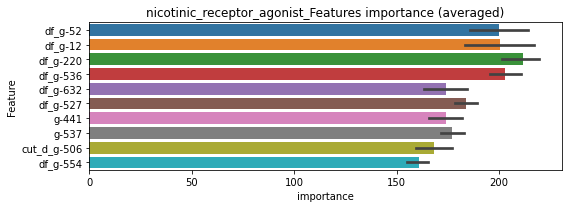

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831357	valid_1's binary_logloss: 0.0113421
[600]	training's binary_logloss: 0.00218213	valid_1's binary_logloss: 0.00381112
[900]	training's binary_logloss: 0.00119312	valid_1's binary_logloss: 0.00243208
[1200]	training's binary_logloss: 0.000829823	valid_1's binary_logloss: 0.00186893
[1500]	training's binary_logloss: 0.000647188	valid_1's binary_logloss: 0.00157293
[1800]	training's binary_logloss: 0.000539026	valid_1's binary_logloss: 0.00138824
[2100]	training's binary_logloss: 0.000467057	valid_1's binary_logloss: 0.00126885
[2400]	training's binary_logloss: 0.000415993	valid_1's binary_logloss: 0.0011763
[2700]	training's binary_logloss: 0.00037984	valid_1's binary_logloss: 0.00111134
[3000]	training's binary_logloss: 0.000352873	valid_1's binary_logloss: 0.00106175
[3300]	training's binary_logloss: 0.000332534	valid_1's binary_logloss: 0.00102271
[3600]	training's binary_logloss: 0

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00840635	valid_1's binary_logloss: 0.0111068
[600]	training's binary_logloss: 0.00219701	valid_1's binary_logloss: 0.00406411
[900]	training's binary_logloss: 0.0011992	valid_1's binary_logloss: 0.00277672
[1200]	training's binary_logloss: 0.000834126	valid_1's binary_logloss: 0.00222706
[1500]	training's binary_logloss: 0.000650601	valid_1's binary_logloss: 0.00195257
[1800]	training's binary_logloss: 0.000539648	valid_1's binary_logloss: 0.00178726
[2100]	training's binary_logloss: 0.000467826	valid_1's binary_logloss: 0.00166584
[2400]	training's binary_logloss: 0.000417118	valid_1's binary_logloss: 0.00157746
[2700]	training's binary_logloss: 0.000379746	valid_1's binary_logloss: 0.00151274
[3000]	training's binary_logloss: 0.000352482	valid_1's binary_logloss: 0.00146834
[3300]	training's binary_logloss: 0.00033256	valid_1's binary_logloss: 0.00143037
Early stopping, best iteration is:


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00835608	valid_1's binary_logloss: 0.00958567
[600]	training's binary_logloss: 0.00219868	valid_1's binary_logloss: 0.0026716
[900]	training's binary_logloss: 0.00120018	valid_1's binary_logloss: 0.00150891
[1200]	training's binary_logloss: 0.000834128	valid_1's binary_logloss: 0.00107278
[1500]	training's binary_logloss: 0.000650738	valid_1's binary_logloss: 0.000852766
[1800]	training's binary_logloss: 0.000540041	valid_1's binary_logloss: 0.000717645
[2100]	training's binary_logloss: 0.000467746	valid_1's binary_logloss: 0.000627675
[2400]	training's binary_logloss: 0.000416897	valid_1's binary_logloss: 0.000563861
[2700]	training's binary_logloss: 0.000379849	valid_1's binary_logloss: 0.000516849
[3000]	training's binary_logloss: 0.000352689	valid_1's binary_logloss: 0.0004828
[3300]	training's binary_logloss: 0.000332889	valid_1's binary_logloss: 0.000457707
[3600]	training's binary_log

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00822861	valid_1's binary_logloss: 0.0114453
[600]	training's binary_logloss: 0.00216932	valid_1's binary_logloss: 0.00406341
[900]	training's binary_logloss: 0.00118485	valid_1's binary_logloss: 0.00265561
[1200]	training's binary_logloss: 0.000821059	valid_1's binary_logloss: 0.00206215
[1500]	training's binary_logloss: 0.000642906	valid_1's binary_logloss: 0.00175773
[1800]	training's binary_logloss: 0.000534746	valid_1's binary_logloss: 0.00153543
[2100]	training's binary_logloss: 0.00046444	valid_1's binary_logloss: 0.00139223
[2400]	training's binary_logloss: 0.000414178	valid_1's binary_logloss: 0.0012934
[2700]	training's binary_logloss: 0.000377366	valid_1's binary_logloss: 0.00122498
[3000]	training's binary_logloss: 0.000350704	valid_1's binary_logloss: 0.00116878
[3300]	training's binary_logloss: 0.000330719	valid_1's binary_logloss: 0.0011291
[3600]	training's binary_logloss: 0.

nicotinic_receptor_agonist logloss: 0.0009664487282897897


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006756	valid_1's binary_logloss: 0.0175914
[600]	training's binary_logloss: 0.000859275	valid_1's binary_logloss: 0.00829625
[900]	training's binary_logloss: 0.000452478	valid_1's binary_logloss: 0.00716902
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000450924	valid_1's binary_logloss: 0.00716199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711774	valid_1's binary_logloss: 0.014804
[600]	training's binary_logloss: 0.000881731	valid_1's binary_logloss: 0.00474359
[900]	training's binary_logloss: 0.000449733	valid_1's binary_logloss: 0.00362573
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000456341	valid_1's binary_logloss: 0.00361737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723076	valid_1's binary_logloss: 0.0127622
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0030158, Threshold: 0.0527686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.03694, conf_1:0.06860
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0527686
Num_p_label: 31.0, Expected: 4.3, Adj_threshold_2: 0.0727686
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_3: 0.0927686
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_4: 0.1127686
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_5: 0.1327686
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_6: 0.1527686
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_7: 0.1727686
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.1927686
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_9: 0.2127686
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_10: 0.2327686
threshold: 0.2327686, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614805	valid_1's binary_logloss: 0.0147776
[600]	training's binary_logloss: 0.000796497	valid_1's binary_logloss: 0.00643023
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000445313	valid_1's binary_logloss: 0.00554433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648118	valid_1's binary_logloss: 0.0129203
[600]	training's binary_logloss: 0.000817844	valid_1's binary_logloss: 0.00397445
[900]	training's binary_logloss: 0.000434635	valid_1's binary_logloss: 0.00308973
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000430068	valid_1's binary_logloss: 0.0030775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639635	valid_1's binary_logloss: 0.0120087
[600]	training's binary_logloss: 0.000814735	valid_1's binary_logloss: 0.00315859
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0611355, Threshold: 0.2327686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0097941 Vs.target_rate: 0.00109, Num_p_label: 39.0, conf_0:0.18621, conf_1:0.27932
Num_p_label: 39.0, Expected: 4.3, Adj_threshold_1: 0.2327686
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_2: 0.2527686
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_3: 0.2727686
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_4: 0.2927686
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_5: 0.3127686
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_6: 0.3327686
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_7: 0.3527686
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_8: 0.3727686
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_9: 0.3927686
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_10: 0.4127686
threshold: 0.4327686, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614805	valid_1's binary_logloss: 0.0147776
[600]	training's binary_logloss: 0.000796497	valid_1's binary_logloss: 0.00643023
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000445313	valid_1's binary_logloss: 0.00554433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648118	valid_1's binary_logloss: 0.0129203
[600]	training's binary_logloss: 0.000817844	valid_1's binary_logloss: 0.00397445
[900]	training's binary_logloss: 0.000434635	valid_1's binary_logloss: 0.00308973
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000430068	valid_1's binary_logloss: 0.0030775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639635	valid_1's binary_logloss: 0.0120087
[600]	training's binary_logloss: 0.000814735	valid_1's binary_logloss: 0.00315859
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0611355, Threshold: 0.4327686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00109, Num_p_label: 17.0, conf_0:0.38949, conf_1:0.47605
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_1: 0.4327686
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_2: 0.4527686
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_3: 0.4727686
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.4927686
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_5: 0.5127686
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_6: 0.5327686
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_7: 0.5527686
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.5727686
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_9: 0.5927686
threshold: 0.5927686, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


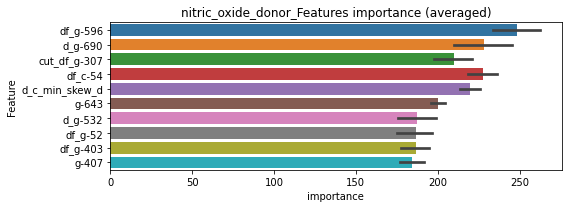

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151021	valid_1's binary_logloss: 0.0258968
[600]	training's binary_logloss: 0.00394611	valid_1's binary_logloss: 0.0120054
[900]	training's binary_logloss: 0.00204403	valid_1's binary_logloss: 0.00896096
[1200]	training's binary_logloss: 0.00136996	valid_1's binary_logloss: 0.00770821
[1500]	training's binary_logloss: 0.00103841	valid_1's binary_logloss: 0.00704096
[1800]	training's binary_logloss: 0.000846679	valid_1's binary_logloss: 0.00662344
[2100]	training's binary_logloss: 0.000721166	valid_1's binary_logloss: 0.00632498
[2400]	training's binary_logloss: 0.00063492	valid_1's binary_logloss: 0.00611852
[2700]	training's binary_logloss: 0.000572096	valid_1's binary_logloss: 0.00594752
[3000]	training's binary_logloss: 0.000526248	valid_1's binary_logloss: 0.00582602
Early stopping, best iteration is:
[3201]	training's binary_logloss: 0.000502348	valid_1's binary_logloss: 0.00575173


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154762	valid_1's binary_logloss: 0.0236222
[600]	training's binary_logloss: 0.0040142	valid_1's binary_logloss: 0.00882029
[900]	training's binary_logloss: 0.00205524	valid_1's binary_logloss: 0.00572572
[1200]	training's binary_logloss: 0.00137258	valid_1's binary_logloss: 0.004561
[1500]	training's binary_logloss: 0.00103695	valid_1's binary_logloss: 0.00394778
[1800]	training's binary_logloss: 0.00084332	valid_1's binary_logloss: 0.00354041
[2100]	training's binary_logloss: 0.000719022	valid_1's binary_logloss: 0.00326463
[2400]	training's binary_logloss: 0.000631803	valid_1's binary_logloss: 0.00308312
[2700]	training's binary_logloss: 0.00056947	valid_1's binary_logloss: 0.00295584
[3000]	training's binary_logloss: 0.000524537	valid_1's binary_logloss: 0.00285156
[3300]	training's binary_logloss: 0.000491807	valid_1's binary_logloss: 0.0027812
[3600]	training's binary_logloss: 0.000468

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155097	valid_1's binary_logloss: 0.0231863
[600]	training's binary_logloss: 0.00403228	valid_1's binary_logloss: 0.00855606
[900]	training's binary_logloss: 0.0020653	valid_1's binary_logloss: 0.00541192
[1200]	training's binary_logloss: 0.00137803	valid_1's binary_logloss: 0.0041401
[1500]	training's binary_logloss: 0.0010451	valid_1's binary_logloss: 0.00350985
[1800]	training's binary_logloss: 0.000845505	valid_1's binary_logloss: 0.00307127
[2100]	training's binary_logloss: 0.000720752	valid_1's binary_logloss: 0.00282247
[2400]	training's binary_logloss: 0.000633723	valid_1's binary_logloss: 0.00260623
[2700]	training's binary_logloss: 0.000571689	valid_1's binary_logloss: 0.00246178
[3000]	training's binary_logloss: 0.000526095	valid_1's binary_logloss: 0.00235141
[3300]	training's binary_logloss: 0.000494379	valid_1's binary_logloss: 0.0022707
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156017	valid_1's binary_logloss: 0.021068
[600]	training's binary_logloss: 0.00403364	valid_1's binary_logloss: 0.00764916
[900]	training's binary_logloss: 0.00207477	valid_1's binary_logloss: 0.00487163
[1200]	training's binary_logloss: 0.00138799	valid_1's binary_logloss: 0.00391194
[1500]	training's binary_logloss: 0.00104987	valid_1's binary_logloss: 0.00336732
[1800]	training's binary_logloss: 0.000854267	valid_1's binary_logloss: 0.00300939
[2100]	training's binary_logloss: 0.000727559	valid_1's binary_logloss: 0.00282008
[2400]	training's binary_logloss: 0.000639586	valid_1's binary_logloss: 0.00262834
[2700]	training's binary_logloss: 0.000576585	valid_1's binary_logloss: 0.00250874
Early stopping, best iteration is:
[2829]	training's binary_logloss: 0.000554514	valid_1's binary_logloss: 0.00245088


nitric_oxide_donor logloss: 0.0032702294071864863


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00688527	valid_1's binary_logloss: 0.0172418
[600]	training's binary_logloss: 0.00089621	valid_1's binary_logloss: 0.00719518
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000486636	valid_1's binary_logloss: 0.00627927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674359	valid_1's binary_logloss: 0.0185567
[600]	training's binary_logloss: 0.000867623	valid_1's binary_logloss: 0.00788569
[900]	training's binary_logloss: 0.000441496	valid_1's binary_logloss: 0.00664142
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000451187	valid_1's binary_logloss: 0.00660338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780854	valid_1's binary_logloss: 0.0127337
[600]	training's binary_logloss: 0.000966069	valid_1's binary_logloss: 0.00259924
[900]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0027261, Threshold: 0.0079110, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.00554, conf_1:0.01028
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0079110
Num_p_label: 4.0, Expected: 4.8, Adj_threshold_2: 0.0279110
threshold: 0.0279110, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064934	valid_1's binary_logloss: 0.0162487
[600]	training's binary_logloss: 0.000847701	valid_1's binary_logloss: 0.00665356
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000454091	valid_1's binary_logloss: 0.00560601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650697	valid_1's binary_logloss: 0.0167919
[600]	training's binary_logloss: 0.000837717	valid_1's binary_logloss: 0.00659018
[900]	training's binary_logloss: 0.000434952	valid_1's binary_logloss: 0.00522532
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000445329	valid_1's binary_logloss: 0.00518848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700552	valid_1's binary_logloss: 0.0119334
[600]	training's binary_logloss: 0.000893235	valid_1's binary_logloss: 0.00250152
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0327631, Threshold: 0.0279110, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00122, Num_p_label: 15.0, conf_0:0.02233, conf_1:0.03349
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.0279110
Num_p_label: 6.0, Expected: 4.8, Adj_threshold_2: 0.0479110
threshold: 0.0479110, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064934	valid_1's binary_logloss: 0.0162487
[600]	training's binary_logloss: 0.000847701	valid_1's binary_logloss: 0.00665356
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000454091	valid_1's binary_logloss: 0.00560601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650697	valid_1's binary_logloss: 0.0167919
[600]	training's binary_logloss: 0.000837717	valid_1's binary_logloss: 0.00659018
[900]	training's binary_logloss: 0.000434952	valid_1's binary_logloss: 0.00522532
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000445329	valid_1's binary_logloss: 0.00518848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700552	valid_1's binary_logloss: 0.0119334
[600]	training's binary_logloss: 0.000893235	valid_1's binary_logloss: 0.00250152
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0327631, Threshold: 0.0479110, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00122, Num_p_label: 6.0, conf_0:0.04312, conf_1:0.05270
threshold: 0.0479110, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


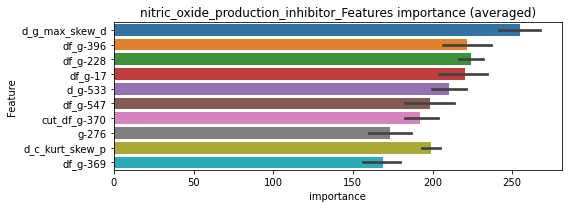

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156853	valid_1's binary_logloss: 0.0273946
[600]	training's binary_logloss: 0.0041677	valid_1's binary_logloss: 0.0122833
[900]	training's binary_logloss: 0.00216544	valid_1's binary_logloss: 0.00922626
[1200]	training's binary_logloss: 0.00145369	valid_1's binary_logloss: 0.0079851
[1500]	training's binary_logloss: 0.00110372	valid_1's binary_logloss: 0.00733787
[1800]	training's binary_logloss: 0.000897778	valid_1's binary_logloss: 0.00682791
[2100]	training's binary_logloss: 0.000765209	valid_1's binary_logloss: 0.00647444
[2400]	training's binary_logloss: 0.00067359	valid_1's binary_logloss: 0.00623866
[2700]	training's binary_logloss: 0.000605015	valid_1's binary_logloss: 0.0060508
Early stopping, best iteration is:
[2859]	training's binary_logloss: 0.000575494	valid_1's binary_logloss: 0.00594233


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158913	valid_1's binary_logloss: 0.0290111
[600]	training's binary_logloss: 0.0041831	valid_1's binary_logloss: 0.0123742
[900]	training's binary_logloss: 0.0021667	valid_1's binary_logloss: 0.00870943
[1200]	training's binary_logloss: 0.00145242	valid_1's binary_logloss: 0.00720989
[1500]	training's binary_logloss: 0.00110216	valid_1's binary_logloss: 0.00635094
[1800]	training's binary_logloss: 0.000896538	valid_1's binary_logloss: 0.00576678
[2100]	training's binary_logloss: 0.000763945	valid_1's binary_logloss: 0.00539318
[2400]	training's binary_logloss: 0.00067144	valid_1's binary_logloss: 0.00511175
[2700]	training's binary_logloss: 0.000604396	valid_1's binary_logloss: 0.0049143
Early stopping, best iteration is:
[2937]	training's binary_logloss: 0.000563407	valid_1's binary_logloss: 0.0047833


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164925	valid_1's binary_logloss: 0.0234171
[600]	training's binary_logloss: 0.00431676	valid_1's binary_logloss: 0.00761523
[900]	training's binary_logloss: 0.00223028	valid_1's binary_logloss: 0.00451851
[1200]	training's binary_logloss: 0.00149059	valid_1's binary_logloss: 0.00333779
[1500]	training's binary_logloss: 0.00112477	valid_1's binary_logloss: 0.00271163
[1800]	training's binary_logloss: 0.000913063	valid_1's binary_logloss: 0.0023243
[2100]	training's binary_logloss: 0.000777504	valid_1's binary_logloss: 0.00207238
[2400]	training's binary_logloss: 0.00068142	valid_1's binary_logloss: 0.00189945
[2700]	training's binary_logloss: 0.000611971	valid_1's binary_logloss: 0.00177328
[3000]	training's binary_logloss: 0.00056087	valid_1's binary_logloss: 0.00167653
[3300]	training's binary_logloss: 0.000521203	valid_1's binary_logloss: 0.00160235
[3600]	training's binary_logloss: 0.000

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165426	valid_1's binary_logloss: 0.0250671
[600]	training's binary_logloss: 0.00439099	valid_1's binary_logloss: 0.00893928
[900]	training's binary_logloss: 0.00227377	valid_1's binary_logloss: 0.0055009
[1200]	training's binary_logloss: 0.00151999	valid_1's binary_logloss: 0.00417076
[1500]	training's binary_logloss: 0.00114529	valid_1's binary_logloss: 0.00341367
[1800]	training's binary_logloss: 0.000926246	valid_1's binary_logloss: 0.00295588
[2100]	training's binary_logloss: 0.000787868	valid_1's binary_logloss: 0.0026679
[2400]	training's binary_logloss: 0.000691688	valid_1's binary_logloss: 0.00245609
[2700]	training's binary_logloss: 0.000621085	valid_1's binary_logloss: 0.00229005
[3000]	training's binary_logloss: 0.000568257	valid_1's binary_logloss: 0.00216455
[3300]	training's binary_logloss: 0.000527488	valid_1's binary_logloss: 0.00206306
[3600]	training's binary_logloss: 0.00

nitric_oxide_production_inhibitor logloss: 0.0035169099584167903


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00809924	valid_1's binary_logloss: 0.0142751
[600]	training's binary_logloss: 0.000984266	valid_1's binary_logloss: 0.00401664
[900]	training's binary_logloss: 0.000500589	valid_1's binary_logloss: 0.00298239
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000495475	valid_1's binary_logloss: 0.00296343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00754484	valid_1's binary_logloss: 0.0172709
[600]	training's binary_logloss: 0.00095093	valid_1's binary_logloss: 0.00471432
[900]	training's binary_logloss: 0.000484372	valid_1's binary_logloss: 0.0032213
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.00046947	valid_1's binary_logloss: 0.00319767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00803617	valid_1's binary_logloss: 0.0125346
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0031487, Threshold: 0.0220692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.01545, conf_1:0.02869
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0220692
Num_p_label: 26.0, Expected: 4.3, Adj_threshold_2: 0.0420692
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.0620692
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_4: 0.0820692
threshold: 0.0820692, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068096	valid_1's binary_logloss: 0.0132116
[600]	training's binary_logloss: 0.000892503	valid_1's binary_logloss: 0.00373293
[900]	training's binary_logloss: 0.000467401	valid_1's binary_logloss: 0.00279326
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000454494	valid_1's binary_logloss: 0.00277449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00691314	valid_1's binary_logloss: 0.0145049
[600]	training's binary_logloss: 0.000899219	valid_1's binary_logloss: 0.00394517
[900]	training's binary_logloss: 0.000462992	valid_1's binary_logloss: 0.0027781
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000441813	valid_1's binary_logloss: 0.00270266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00682661	valid_1's binary_logloss: 0.0113507
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.1042056, Threshold: 0.0820692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0102963 Vs.target_rate: 0.00109, Num_p_label: 41.0, conf_0:0.06566, conf_1:0.09848
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_1: 0.0820692
Num_p_label: 33.0, Expected: 4.3, Adj_threshold_2: 0.1020692
Num_p_label: 26.0, Expected: 4.3, Adj_threshold_3: 0.1220692
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_4: 0.1420692
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_5: 0.1620692
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.1820692
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_7: 0.2020692
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.2220692
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.2420692
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_10: 0.2620692
threshold: 0.2620692, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068096	valid_1's binary_logloss: 0.0132116
[600]	training's binary_logloss: 0.000892503	valid_1's binary_logloss: 0.00373293
[900]	training's binary_logloss: 0.000467401	valid_1's binary_logloss: 0.00279326
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000454494	valid_1's binary_logloss: 0.00277449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00691314	valid_1's binary_logloss: 0.0145049
[600]	training's binary_logloss: 0.000899219	valid_1's binary_logloss: 0.00394517
[900]	training's binary_logloss: 0.000462992	valid_1's binary_logloss: 0.0027781
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000441813	valid_1's binary_logloss: 0.00270266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00682661	valid_1's binary_logloss: 0.0113507
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.1042056, Threshold: 0.2620692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00109, Num_p_label: 9.0, conf_0:0.23586, conf_1:0.28828
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_1: 0.2620692
threshold: 0.2620692, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


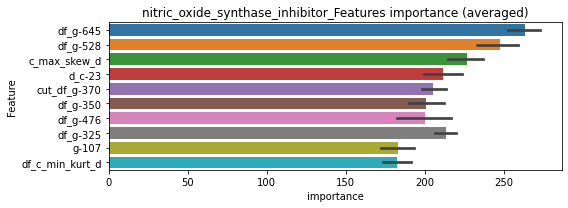

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165495	valid_1's binary_logloss: 0.0239344
[600]	training's binary_logloss: 0.00439752	valid_1's binary_logloss: 0.00871118
[900]	training's binary_logloss: 0.0022934	valid_1's binary_logloss: 0.00564285
[1200]	training's binary_logloss: 0.00154141	valid_1's binary_logloss: 0.00445241
[1500]	training's binary_logloss: 0.00117213	valid_1's binary_logloss: 0.00386424
[1800]	training's binary_logloss: 0.000956684	valid_1's binary_logloss: 0.00344738
[2100]	training's binary_logloss: 0.000815614	valid_1's binary_logloss: 0.0031741
[2400]	training's binary_logloss: 0.000717896	valid_1's binary_logloss: 0.00298922
[2700]	training's binary_logloss: 0.0006465	valid_1's binary_logloss: 0.00285483
[3000]	training's binary_logloss: 0.000593533	valid_1's binary_logloss: 0.00275553
[3300]	training's binary_logloss: 0.000552479	valid_1's binary_logloss: 0.00267787
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016428	valid_1's binary_logloss: 0.0269849
[600]	training's binary_logloss: 0.00436172	valid_1's binary_logloss: 0.00981158
[900]	training's binary_logloss: 0.00228053	valid_1's binary_logloss: 0.00637259
[1200]	training's binary_logloss: 0.00153119	valid_1's binary_logloss: 0.0049191
[1500]	training's binary_logloss: 0.00115991	valid_1's binary_logloss: 0.0041313
[1800]	training's binary_logloss: 0.00094595	valid_1's binary_logloss: 0.00365593
[2100]	training's binary_logloss: 0.000807042	valid_1's binary_logloss: 0.0033121
[2400]	training's binary_logloss: 0.000710953	valid_1's binary_logloss: 0.00309059
[2700]	training's binary_logloss: 0.000639012	valid_1's binary_logloss: 0.00290349
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000595046	valid_1's binary_logloss: 0.00278355


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016578	valid_1's binary_logloss: 0.0238126
[600]	training's binary_logloss: 0.00444555	valid_1's binary_logloss: 0.0082385
[900]	training's binary_logloss: 0.00230702	valid_1's binary_logloss: 0.00506692
[1200]	training's binary_logloss: 0.00154596	valid_1's binary_logloss: 0.00380092
[1500]	training's binary_logloss: 0.00117338	valid_1's binary_logloss: 0.00316342
[1800]	training's binary_logloss: 0.000955082	valid_1's binary_logloss: 0.00276653
[2100]	training's binary_logloss: 0.00081326	valid_1's binary_logloss: 0.00248875
[2400]	training's binary_logloss: 0.000713993	valid_1's binary_logloss: 0.00229577
[2700]	training's binary_logloss: 0.000642895	valid_1's binary_logloss: 0.00214838
[3000]	training's binary_logloss: 0.000589592	valid_1's binary_logloss: 0.00204567
[3300]	training's binary_logloss: 0.000549241	valid_1's binary_logloss: 0.00196529
[3600]	training's binary_logloss: 0.000

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164903	valid_1's binary_logloss: 0.0237684
[600]	training's binary_logloss: 0.00441224	valid_1's binary_logloss: 0.00858606
[900]	training's binary_logloss: 0.00230307	valid_1's binary_logloss: 0.00543465
[1200]	training's binary_logloss: 0.00154482	valid_1's binary_logloss: 0.00423282
[1500]	training's binary_logloss: 0.00117254	valid_1's binary_logloss: 0.00356895
[1800]	training's binary_logloss: 0.000954135	valid_1's binary_logloss: 0.00316833
[2100]	training's binary_logloss: 0.000811227	valid_1's binary_logloss: 0.00290744
[2400]	training's binary_logloss: 0.000715283	valid_1's binary_logloss: 0.00271694
[2700]	training's binary_logloss: 0.000644435	valid_1's binary_logloss: 0.00256611
[3000]	training's binary_logloss: 0.000589939	valid_1's binary_logloss: 0.00245514
[3300]	training's binary_logloss: 0.000549968	valid_1's binary_logloss: 0.00236929
[3600]	training's binary_logloss: 0.

nitric_oxide_synthase_inhibitor logloss: 0.002342083454095637


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168252	valid_1's binary_logloss: 0.00516128
[600]	training's binary_logloss: 0.000251042	valid_1's binary_logloss: 0.00267973
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000217653	valid_1's binary_logloss: 0.00260576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164543	valid_1's binary_logloss: 0.00549215
[600]	training's binary_logloss: 0.000247298	valid_1's binary_logloss: 0.00308891
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000215286	valid_1's binary_logloss: 0.00298967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174682	valid_1's binary_logloss: 0.00191904
[600]	training's binary_logloss: 0.000254114	valid_1's binary_logloss: 0.000329676
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000224965	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0006718, Threshold: 0.0028432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00199, conf_1:0.00370
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0028432
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.0228432
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.0428432
threshold: 0.0428432, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162992	valid_1's binary_logloss: 0.00413324
[600]	training's binary_logloss: 0.0002348	valid_1's binary_logloss: 0.00184637
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000204039	valid_1's binary_logloss: 0.00174095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159346	valid_1's binary_logloss: 0.00340233
[600]	training's binary_logloss: 0.000230002	valid_1's binary_logloss: 0.00146456
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000204337	valid_1's binary_logloss: 0.00139672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166951	valid_1's binary_logloss: 0.00164256
[600]	training's binary_logloss: 0.000235226	valid_1's binary_logloss: 0.000233626
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000212449	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0435115, Threshold: 0.0428432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00029, Num_p_label: 11.0, conf_0:0.03427, conf_1:0.05141
Num_p_label: 11.0, Expected: 1.2, Adj_threshold_1: 0.0428432
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0628432
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_3: 0.0828432
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.1028432
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.1228432
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.1428432
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.1628432
threshold: 0.1628432, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162992	valid_1's binary_logloss: 0.00413324
[600]	training's binary_logloss: 0.0002348	valid_1's binary_logloss: 0.00184637
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000204039	valid_1's binary_logloss: 0.00174095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159346	valid_1's binary_logloss: 0.00340233
[600]	training's binary_logloss: 0.000230002	valid_1's binary_logloss: 0.00146456
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000204337	valid_1's binary_logloss: 0.00139672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166951	valid_1's binary_logloss: 0.00164256
[600]	training's binary_logloss: 0.000235226	valid_1's binary_logloss: 0.000233626
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000212449	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0435115, Threshold: 0.1628432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.14656, conf_1:0.17913
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.1628432
threshold: 0.1628432, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


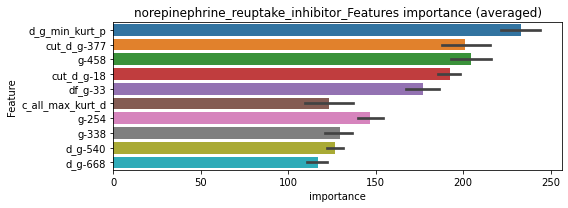

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494106	valid_1's binary_logloss: 0.00691251
[600]	training's binary_logloss: 0.00130546	valid_1's binary_logloss: 0.00264359
[900]	training's binary_logloss: 0.000735001	valid_1's binary_logloss: 0.00181021
[1200]	training's binary_logloss: 0.000521421	valid_1's binary_logloss: 0.00145128
[1500]	training's binary_logloss: 0.000414417	valid_1's binary_logloss: 0.00127189
[1800]	training's binary_logloss: 0.000350449	valid_1's binary_logloss: 0.0011473
[2100]	training's binary_logloss: 0.000308241	valid_1's binary_logloss: 0.00106599
[2400]	training's binary_logloss: 0.000278108	valid_1's binary_logloss: 0.00100185
[2700]	training's binary_logloss: 0.000256024	valid_1's binary_logloss: 0.000958326
[3000]	training's binary_logloss: 0.000239885	valid_1's binary_logloss: 0.000929288
[3300]	training's binary_logloss: 0.000227838	valid_1's binary_logloss: 0.000900128
[3600]	training's binary_logl

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491638	valid_1's binary_logloss: 0.0064345
[600]	training's binary_logloss: 0.00129392	valid_1's binary_logloss: 0.00240702
[900]	training's binary_logloss: 0.000727922	valid_1's binary_logloss: 0.00164258
[1200]	training's binary_logloss: 0.000518024	valid_1's binary_logloss: 0.0013294
[1500]	training's binary_logloss: 0.000411165	valid_1's binary_logloss: 0.00116439
[1800]	training's binary_logloss: 0.000347088	valid_1's binary_logloss: 0.00106023
[2100]	training's binary_logloss: 0.000304491	valid_1's binary_logloss: 0.000985614
[2400]	training's binary_logloss: 0.00027422	valid_1's binary_logloss: 0.000935584
[2700]	training's binary_logloss: 0.000252561	valid_1's binary_logloss: 0.000893068
[3000]	training's binary_logloss: 0.000236394	valid_1's binary_logloss: 0.000864925
[3300]	training's binary_logloss: 0.000224917	valid_1's binary_logloss: 0.00084431
[3600]	training's binary_loglo

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505543	valid_1's binary_logloss: 0.00512315
[600]	training's binary_logloss: 0.00133022	valid_1's binary_logloss: 0.0013598
[900]	training's binary_logloss: 0.000744528	valid_1's binary_logloss: 0.000765023
[1200]	training's binary_logloss: 0.000526773	valid_1's binary_logloss: 0.000545625
[1500]	training's binary_logloss: 0.000417929	valid_1's binary_logloss: 0.000434767
[1800]	training's binary_logloss: 0.000353326	valid_1's binary_logloss: 0.000368814
[2100]	training's binary_logloss: 0.000309419	valid_1's binary_logloss: 0.000324055
[2400]	training's binary_logloss: 0.000278528	valid_1's binary_logloss: 0.000292214
[2700]	training's binary_logloss: 0.000255929	valid_1's binary_logloss: 0.00026912
[3000]	training's binary_logloss: 0.000240013	valid_1's binary_logloss: 0.000252638
[3300]	training's binary_logloss: 0.00022791	valid_1's binary_logloss: 0.000240099
[3600]	training's binary_

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0050159	valid_1's binary_logloss: 0.00536799
[600]	training's binary_logloss: 0.00131461	valid_1's binary_logloss: 0.00143893
[900]	training's binary_logloss: 0.000740303	valid_1's binary_logloss: 0.000820582
[1200]	training's binary_logloss: 0.000524592	valid_1's binary_logloss: 0.000586411
[1500]	training's binary_logloss: 0.000415973	valid_1's binary_logloss: 0.000468075
[1800]	training's binary_logloss: 0.000351439	valid_1's binary_logloss: 0.000396639
[2100]	training's binary_logloss: 0.000308327	valid_1's binary_logloss: 0.000349336
[2400]	training's binary_logloss: 0.000278249	valid_1's binary_logloss: 0.000315889
[2700]	training's binary_logloss: 0.000255729	valid_1's binary_logloss: 0.000290938
[3000]	training's binary_logloss: 0.000239254	valid_1's binary_logloss: 0.000272527
[3300]	training's binary_logloss: 0.000227065	valid_1's binary_logloss: 0.000258799
[3600]	training's binar

norepinephrine_reuptake_inhibitor logloss: 0.0005374999188945664


neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431705	valid_1's binary_logloss: 0.00620483
[600]	training's binary_logloss: 0.000553551	valid_1's binary_logloss: 0.00109271
[900]	training's binary_logloss: 0.000337485	valid_1's binary_logloss: 0.000722588
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000332412	valid_1's binary_logloss: 0.000714592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407965	valid_1's binary_logloss: 0.00902849
[600]	training's binary_logloss: 0.000541551	valid_1's binary_logloss: 0.00219141
[900]	training's binary_logloss: 0.000334908	valid_1's binary_logloss: 0.00157108
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000334908	valid_1's binary_logloss: 0.00157108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434824	valid_1's binary_logloss: 0.00611147
[600]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0018717, Threshold: 0.0081392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00570, conf_1:0.01058
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0081392
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0281392
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0481392
threshold: 0.0481392, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373237	valid_1's binary_logloss: 0.00530446
[600]	training's binary_logloss: 0.000503725	valid_1's binary_logloss: 0.000867247
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000323598	valid_1's binary_logloss: 0.00058678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359727	valid_1's binary_logloss: 0.00743833
[600]	training's binary_logloss: 0.000490579	valid_1's binary_logloss: 0.0018687
[900]	training's binary_logloss: 0.000318252	valid_1's binary_logloss: 0.00146183
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000314935	valid_1's binary_logloss: 0.00145621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037699	valid_1's binary_logloss: 0.0046046
[600]	training's binary_logloss: 0.000504676	valid_1's binary_logloss: 0.000723306
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.1376911, Threshold: 0.0481392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0065294 Vs.target_rate: 0.00076, Num_p_label: 26.0, conf_0:0.03851, conf_1:0.05777
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.0481392
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.0681392
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.0881392
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.1081392
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.1281392
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.1481392
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.1681392
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.1881392
threshold: 0.1881392, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373237	valid_1's binary_logloss: 0.00530446
[600]	training's binary_logloss: 0.000503725	valid_1's binary_logloss: 0.000867247
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000323598	valid_1's binary_logloss: 0.00058678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359727	valid_1's binary_logloss: 0.00743833
[600]	training's binary_logloss: 0.000490579	valid_1's binary_logloss: 0.0018687
[900]	training's binary_logloss: 0.000318252	valid_1's binary_logloss: 0.00146183
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000314935	valid_1's binary_logloss: 0.00145621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037699	valid_1's binary_logloss: 0.0046046
[600]	training's binary_logloss: 0.000504676	valid_1's binary_logloss: 0.000723306
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.1376911, Threshold: 0.1881392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.16933, conf_1:0.20695
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.1881392
threshold: 0.1881392, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


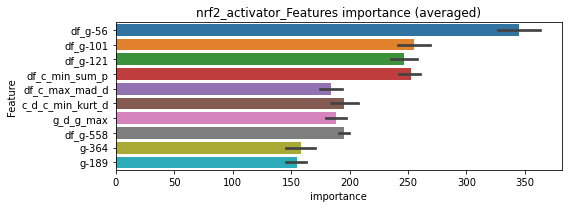

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101289	valid_1's binary_logloss: 0.0129393
[600]	training's binary_logloss: 0.00266543	valid_1's binary_logloss: 0.00377655
[900]	training's binary_logloss: 0.00142886	valid_1's binary_logloss: 0.00213771
[1200]	training's binary_logloss: 0.000985191	valid_1's binary_logloss: 0.00152042
[1500]	training's binary_logloss: 0.000763225	valid_1's binary_logloss: 0.00120769
[1800]	training's binary_logloss: 0.000634014	valid_1's binary_logloss: 0.00102131
[2100]	training's binary_logloss: 0.000548441	valid_1's binary_logloss: 0.00089521
[2400]	training's binary_logloss: 0.000487292	valid_1's binary_logloss: 0.000804893
[2700]	training's binary_logloss: 0.000443064	valid_1's binary_logloss: 0.000738615
[3000]	training's binary_logloss: 0.000409421	valid_1's binary_logloss: 0.000688061
[3300]	training's binary_logloss: 0.000383603	valid_1's binary_logloss: 0.000648839
[3600]	training's binary_loglo

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100857	valid_1's binary_logloss: 0.0162529
[600]	training's binary_logloss: 0.00264195	valid_1's binary_logloss: 0.00573825
[900]	training's binary_logloss: 0.0014209	valid_1's binary_logloss: 0.00365015
[1200]	training's binary_logloss: 0.000979064	valid_1's binary_logloss: 0.00280181
[1500]	training's binary_logloss: 0.000758623	valid_1's binary_logloss: 0.00237085
[1800]	training's binary_logloss: 0.000630041	valid_1's binary_logloss: 0.00209796
[2100]	training's binary_logloss: 0.000545019	valid_1's binary_logloss: 0.00192047
[2400]	training's binary_logloss: 0.000484279	valid_1's binary_logloss: 0.00177137
[2700]	training's binary_logloss: 0.000440433	valid_1's binary_logloss: 0.00167757
[3000]	training's binary_logloss: 0.000408352	valid_1's binary_logloss: 0.00160198
[3300]	training's binary_logloss: 0.000383029	valid_1's binary_logloss: 0.00154098
[3600]	training's binary_logloss: 0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102314	valid_1's binary_logloss: 0.0118641
[600]	training's binary_logloss: 0.00268494	valid_1's binary_logloss: 0.0033654
[900]	training's binary_logloss: 0.00144419	valid_1's binary_logloss: 0.00188916
[1200]	training's binary_logloss: 0.000995678	valid_1's binary_logloss: 0.00133648
[1500]	training's binary_logloss: 0.000771526	valid_1's binary_logloss: 0.00105517
[1800]	training's binary_logloss: 0.000638069	valid_1's binary_logloss: 0.000886419
[2100]	training's binary_logloss: 0.000551524	valid_1's binary_logloss: 0.00077593
[2400]	training's binary_logloss: 0.000490615	valid_1's binary_logloss: 0.000697762
[2700]	training's binary_logloss: 0.000445553	valid_1's binary_logloss: 0.000639179
[3000]	training's binary_logloss: 0.000412804	valid_1's binary_logloss: 0.000595915
[3300]	training's binary_logloss: 0.000387476	valid_1's binary_logloss: 0.000563043
[3600]	training's binary_loglo

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101092	valid_1's binary_logloss: 0.0136972
[600]	training's binary_logloss: 0.0026652	valid_1's binary_logloss: 0.00409915
[900]	training's binary_logloss: 0.00143434	valid_1's binary_logloss: 0.00238148
[1200]	training's binary_logloss: 0.000988357	valid_1's binary_logloss: 0.00172537
[1500]	training's binary_logloss: 0.000766066	valid_1's binary_logloss: 0.00139199
[1800]	training's binary_logloss: 0.000633871	valid_1's binary_logloss: 0.00118873
[2100]	training's binary_logloss: 0.000548425	valid_1's binary_logloss: 0.00105429
[2400]	training's binary_logloss: 0.000487387	valid_1's binary_logloss: 0.000957644
[2700]	training's binary_logloss: 0.000443039	valid_1's binary_logloss: 0.000887293
[3000]	training's binary_logloss: 0.00040977	valid_1's binary_logloss: 0.000833424
[3300]	training's binary_logloss: 0.000384835	valid_1's binary_logloss: 0.000791689
[3600]	training's binary_logloss

nrf2_activator logloss: 0.0007863413827427487


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155072	valid_1's binary_logloss: 0.0530294
[600]	training's binary_logloss: 0.00224552	valid_1's binary_logloss: 0.0297466
[900]	training's binary_logloss: 0.00092848	valid_1's binary_logloss: 0.0259961
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00092848	valid_1's binary_logloss: 0.0259961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157697	valid_1's binary_logloss: 0.0511024
[600]	training's binary_logloss: 0.00230287	valid_1's binary_logloss: 0.030464
[900]	training's binary_logloss: 0.000952798	valid_1's binary_logloss: 0.0269406
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.00083214	valid_1's binary_logloss: 0.0267123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182505	valid_1's binary_logloss: 0.0303389
[600]	training's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0066304, Threshold: 0.0189607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.01327, conf_1:0.02465
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0189607
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_2: 0.0389607
threshold: 0.0389607, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139952	valid_1's binary_logloss: 0.0510511
[600]	training's binary_logloss: 0.00210168	valid_1's binary_logloss: 0.0291248
[900]	training's binary_logloss: 0.00088886	valid_1's binary_logloss: 0.026004
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000701914	valid_1's binary_logloss: 0.0255796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142729	valid_1's binary_logloss: 0.048723
[600]	training's binary_logloss: 0.00209098	valid_1's binary_logloss: 0.0305045
[900]	training's binary_logloss: 0.000893225	valid_1's binary_logloss: 0.0276438
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000772433	valid_1's binary_logloss: 0.027286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164352	valid_1's binary_logloss: 0.0281359
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0485939, Threshold: 0.0389607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0195881 Vs.target_rate: 0.00256, Num_p_label: 78.0, conf_0:0.03117, conf_1:0.04675
Num_p_label: 78.0, Expected: 10.2, Adj_threshold_1: 0.0389607
Num_p_label: 56.0, Expected: 10.2, Adj_threshold_2: 0.0589607
Num_p_label: 45.0, Expected: 10.2, Adj_threshold_3: 0.0789607
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_4: 0.0989607
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_5: 0.1189607
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_6: 0.1389607
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_7: 0.1589607
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_8: 0.1789607
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_9: 0.1989607
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_10: 0.2189607
threshold: 0.2189607, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3792, y_label_rate: 0.1714135

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141067	valid_1's binary_logloss: 0.0348962
[600]	training's binary_logloss: 0.00201129	valid_1's binary_logloss: 0.0159035
[900]	training's binary_logloss: 0.000869259	valid_1's binary_logloss: 0.0126911
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000884501	valid_1's binary_logloss: 0.0126052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144444	valid_1's binary_logloss: 0.0545184
[600]	training's binary_logloss: 0.00207301	valid_1's binary_logloss: 0.0365337
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00104051	valid_1's binary_logloss: 0.0334496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145523	valid_1's binary_logloss: 0.0384073
[600]	training's binary_logloss: 0.00207843	valid_1's binary_logloss: 0.0201423
[900]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0283038, Threshold: 0.2189607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0102963 Vs.target_rate: 0.00256, Num_p_label: 41.0, conf_0:0.19706, conf_1:0.24086
Num_p_label: 41.0, Expected: 10.2, Adj_threshold_1: 0.2189607
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_2: 0.2389607
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_3: 0.2589607
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_4: 0.2789607
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_5: 0.2989607
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_6: 0.3189607
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_7: 0.3389607
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_8: 0.3589607
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_9: 0.3789607
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_10: 0.3989607
threshold: 0.4189607, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 643.0/3778, y_label_rate: 0.1701959

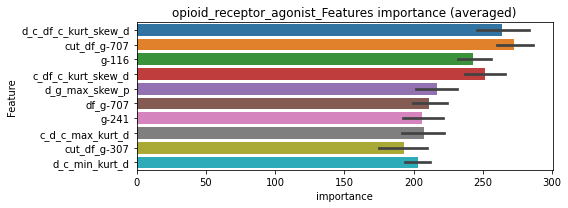

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273748	valid_1's binary_logloss: 0.0503633
[600]	training's binary_logloss: 0.00823137	valid_1's binary_logloss: 0.0263536
[900]	training's binary_logloss: 0.00424168	valid_1's binary_logloss: 0.0203364
[1200]	training's binary_logloss: 0.00277371	valid_1's binary_logloss: 0.0177234
[1500]	training's binary_logloss: 0.00205368	valid_1's binary_logloss: 0.0159448
[1800]	training's binary_logloss: 0.00163755	valid_1's binary_logloss: 0.0148594
[2100]	training's binary_logloss: 0.00136823	valid_1's binary_logloss: 0.0140895
[2400]	training's binary_logloss: 0.00118316	valid_1's binary_logloss: 0.0134545
Early stopping, best iteration is:
[2544]	training's binary_logloss: 0.00111179	valid_1's binary_logloss: 0.0132211


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272633	valid_1's binary_logloss: 0.0559713
[600]	training's binary_logloss: 0.00812756	valid_1's binary_logloss: 0.030476
[900]	training's binary_logloss: 0.00419251	valid_1's binary_logloss: 0.0240454
[1200]	training's binary_logloss: 0.00273938	valid_1's binary_logloss: 0.0212624
[1500]	training's binary_logloss: 0.00203026	valid_1's binary_logloss: 0.0198313
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.0018337	valid_1's binary_logloss: 0.019391


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273576	valid_1's binary_logloss: 0.0535294
[600]	training's binary_logloss: 0.00817793	valid_1's binary_logloss: 0.0307507
[900]	training's binary_logloss: 0.00421622	valid_1's binary_logloss: 0.0249866
[1200]	training's binary_logloss: 0.00275367	valid_1's binary_logloss: 0.0223281
[1500]	training's binary_logloss: 0.00204815	valid_1's binary_logloss: 0.0207961
Early stopping, best iteration is:
[1603]	training's binary_logloss: 0.00188284	valid_1's binary_logloss: 0.0204372


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0279117	valid_1's binary_logloss: 0.048823
[600]	training's binary_logloss: 0.0083255	valid_1's binary_logloss: 0.0262689
[900]	training's binary_logloss: 0.00427006	valid_1's binary_logloss: 0.020326
[1200]	training's binary_logloss: 0.00279666	valid_1's binary_logloss: 0.017809
[1500]	training's binary_logloss: 0.00206992	valid_1's binary_logloss: 0.0163067
[1800]	training's binary_logloss: 0.00164723	valid_1's binary_logloss: 0.0152966
[2100]	training's binary_logloss: 0.00137669	valid_1's binary_logloss: 0.0147097
Early stopping, best iteration is:
[2173]	training's binary_logloss: 0.00132476	valid_1's binary_logloss: 0.0145323


opioid_receptor_agonist logloss: 0.016895091542480794


neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245177	valid_1's binary_logloss: 0.0884069
[600]	training's binary_logloss: 0.00406451	valid_1's binary_logloss: 0.0601559
[900]	training's binary_logloss: 0.00152044	valid_1's binary_logloss: 0.0554887
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00157496	valid_1's binary_logloss: 0.0554424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256471	valid_1's binary_logloss: 0.0771116
[600]	training's binary_logloss: 0.00429358	valid_1's binary_logloss: 0.0509992
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.00190444	valid_1's binary_logloss: 0.0477241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271443	valid_1's binary_logloss: 0.0643966
[600]	training's binary_logloss: 0.00463012	valid_1's binary_logloss: 0.0358822
[900]	training's binary_loglos

1 / 3 AUC score:0.997
y_Threshold: 0.0128766, Threshold: 0.0556202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.03893, conf_1:0.07231
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0556202
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_2: 0.0756202
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_3: 0.0956202
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_4: 0.1156202
threshold: 0.1156202, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215383	valid_1's binary_logloss: 0.0852355
[600]	training's binary_logloss: 0.00351362	valid_1's binary_logloss: 0.060937
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00197134	valid_1's binary_logloss: 0.0582972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223602	valid_1's binary_logloss: 0.083286
[600]	training's binary_logloss: 0.00357822	valid_1's binary_logloss: 0.0589048
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00184537	valid_1's binary_logloss: 0.0553501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233716	valid_1's binary_logloss: 0.0623072
[600]	training's binary_logloss: 0.00384993	valid_1's binary_logloss: 0.0316581
[900]	training's binary_logloss: 0.00146546	valid_1's binary_logloss: 0.0265776
Early stopping, best iteration i

2 / 3 AUC score:0.999
y_Threshold: 0.0423295, Threshold: 0.1156202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 637.0/3762
p_label_rate: 0.0163235 Vs.target_rate: 0.00403, Num_p_label: 65.0, conf_0:0.09250, conf_1:0.13874
Num_p_label: 65.0, Expected: 16.1, Adj_threshold_1: 0.1156202
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_2: 0.1356202
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_3: 0.1556202
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_4: 0.1756202
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_5: 0.1956202
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_6: 0.2156202
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_7: 0.2356202
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_8: 0.2556202
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_9: 0.2756202
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_10: 0.2956202
threshold: 0.3156202, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 637.0/3762, y_label_rate: 0.1693248

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209964	valid_1's binary_logloss: 0.0823391
[600]	training's binary_logloss: 0.00344204	valid_1's binary_logloss: 0.0587664
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00202224	valid_1's binary_logloss: 0.0558708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217265	valid_1's binary_logloss: 0.0706851
[600]	training's binary_logloss: 0.0035514	valid_1's binary_logloss: 0.0458721
[900]	training's binary_logloss: 0.00136457	valid_1's binary_logloss: 0.0412466
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.00122594	valid_1's binary_logloss: 0.0409414
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022299	valid_1's binary_logloss: 0.0678891
[600]	training's binary_logloss: 0.00351598	valid_1's binary_logloss: 0.0457037
[900]	training's binary_logloss:

3 / 3 AUC score:0.999
y_Threshold: 0.0328433, Threshold: 0.3156202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 625.0/3738
p_label_rate: 0.0115520 Vs.target_rate: 0.00403, Num_p_label: 46.0, conf_0:0.28406, conf_1:0.34718
Num_p_label: 46.0, Expected: 16.1, Adj_threshold_1: 0.3156202
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_2: 0.3356202
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_3: 0.3556202
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_4: 0.3756202
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_5: 0.3956202
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_6: 0.4156202
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_7: 0.4356202
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_8: 0.4556202
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_9: 0.4756202
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_10: 0.4956202
threshold: 0.5156202, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 625.0/3738, y_label_rate: 0.1672017

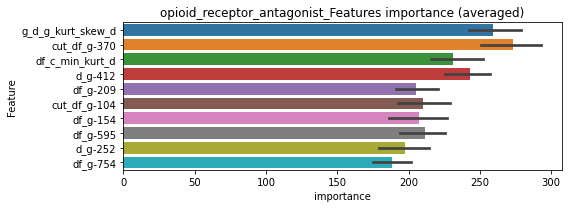

len(train_index) : 2803
len(valid_index) : 935
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0377922	valid_1's binary_logloss: 0.0825096
[600]	training's binary_logloss: 0.0118534	valid_1's binary_logloss: 0.0535377
[900]	training's binary_logloss: 0.00605616	valid_1's binary_logloss: 0.0459825
[1200]	training's binary_logloss: 0.00390657	valid_1's binary_logloss: 0.042914
[1500]	training's binary_logloss: 0.00284604	valid_1's binary_logloss: 0.0412252
Early stopping, best iteration is:
[1517]	training's binary_logloss: 0.00280165	valid_1's binary_logloss: 0.0410685


len(train_index) : 2803
len(valid_index) : 935
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0379926	valid_1's binary_logloss: 0.0862632
[600]	training's binary_logloss: 0.0118187	valid_1's binary_logloss: 0.0580343
[900]	training's binary_logloss: 0.00599884	valid_1's binary_logloss: 0.0502181
[1200]	training's binary_logloss: 0.00384897	valid_1's binary_logloss: 0.0467438
Early stopping, best iteration is:
[1337]	training's binary_logloss: 0.0032931	valid_1's binary_logloss: 0.045875


len(train_index) : 2804
len(valid_index) : 934
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392726	valid_1's binary_logloss: 0.0727351
[600]	training's binary_logloss: 0.0123496	valid_1's binary_logloss: 0.0451725
[900]	training's binary_logloss: 0.00617626	valid_1's binary_logloss: 0.038229
Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.00421997	valid_1's binary_logloss: 0.03576


len(train_index) : 2804
len(valid_index) : 934
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0374202	valid_1's binary_logloss: 0.0833612
[600]	training's binary_logloss: 0.0117529	valid_1's binary_logloss: 0.0549182
[900]	training's binary_logloss: 0.00597971	valid_1's binary_logloss: 0.0475948
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.00563043	valid_1's binary_logloss: 0.0472266


opioid_receptor_antagonist logloss: 0.04248306459476604


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0093769	valid_1's binary_logloss: 0.0249669
[600]	training's binary_logloss: 0.00121703	valid_1's binary_logloss: 0.0119184
[900]	training's binary_logloss: 0.000572046	valid_1's binary_logloss: 0.0105786
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000587645	valid_1's binary_logloss: 0.0105445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00887778	valid_1's binary_logloss: 0.0275814
[600]	training's binary_logloss: 0.0011976	valid_1's binary_logloss: 0.0128067
[900]	training's binary_logloss: 0.000558694	valid_1's binary_logloss: 0.0108547
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000509888	valid_1's binary_logloss: 0.0107786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100983	valid_1's binary_logloss: 0.0164169
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0037019, Threshold: 0.0110604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.00774, conf_1:0.01438
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0110604
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_2: 0.0310604
threshold: 0.0310604, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848593	valid_1's binary_logloss: 0.0238175
[600]	training's binary_logloss: 0.00114594	valid_1's binary_logloss: 0.0118656
[900]	training's binary_logloss: 0.000549999	valid_1's binary_logloss: 0.0104667
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000497038	valid_1's binary_logloss: 0.0103659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00830294	valid_1's binary_logloss: 0.0279082
[600]	training's binary_logloss: 0.0011337	valid_1's binary_logloss: 0.01336
[900]	training's binary_logloss: 0.000537398	valid_1's binary_logloss: 0.0112634
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000496212	valid_1's binary_logloss: 0.011107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00938455	valid_1's binary_logloss: 0.0157435
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0477206, Threshold: 0.0310604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0067805 Vs.target_rate: 0.00155, Num_p_label: 27.0, conf_0:0.02485, conf_1:0.03727
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_1: 0.0310604
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.0510604
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_3: 0.0710604
threshold: 0.0710604, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00816693	valid_1's binary_logloss: 0.0253239
[600]	training's binary_logloss: 0.00110466	valid_1's binary_logloss: 0.0112574
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00055435	valid_1's binary_logloss: 0.00933819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00861944	valid_1's binary_logloss: 0.0163252
[600]	training's binary_logloss: 0.00116309	valid_1's binary_logloss: 0.00526025
[900]	training's binary_logloss: 0.000549047	valid_1's binary_logloss: 0.00387842
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000496101	valid_1's binary_logloss: 0.00377831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877198	valid_1's binary_logloss: 0.0138827
[600]	training's binary_logloss: 0.00118726	valid_1's binary_logloss: 0.00283652
[900]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0334362, Threshold: 0.0710604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0027624 Vs.target_rate: 0.00155, Num_p_label: 11.0, conf_0:0.06395, conf_1:0.07817
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0710604
threshold: 0.0710604, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


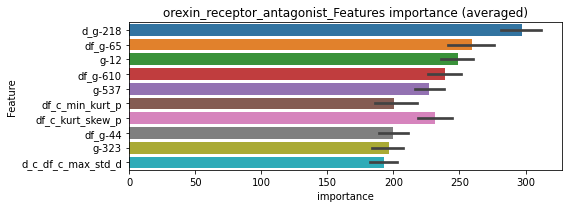

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192596	valid_1's binary_logloss: 0.0398947
[600]	training's binary_logloss: 0.00523067	valid_1's binary_logloss: 0.0199053
[900]	training's binary_logloss: 0.00268661	valid_1's binary_logloss: 0.0151906
[1200]	training's binary_logloss: 0.00178946	valid_1's binary_logloss: 0.0134172
[1500]	training's binary_logloss: 0.0013466	valid_1's binary_logloss: 0.0122844
[1800]	training's binary_logloss: 0.00108882	valid_1's binary_logloss: 0.0115222
[2100]	training's binary_logloss: 0.000923167	valid_1's binary_logloss: 0.0110937
[2400]	training's binary_logloss: 0.00080795	valid_1's binary_logloss: 0.010753
Early stopping, best iteration is:
[2555]	training's binary_logloss: 0.000760376	valid_1's binary_logloss: 0.0105295


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201668	valid_1's binary_logloss: 0.0302358
[600]	training's binary_logloss: 0.0055	valid_1's binary_logloss: 0.0118607
[900]	training's binary_logloss: 0.00282006	valid_1's binary_logloss: 0.00785139
[1200]	training's binary_logloss: 0.00185712	valid_1's binary_logloss: 0.00621384
[1500]	training's binary_logloss: 0.00139629	valid_1's binary_logloss: 0.00538906
[1800]	training's binary_logloss: 0.00112804	valid_1's binary_logloss: 0.00483946
[2100]	training's binary_logloss: 0.000955169	valid_1's binary_logloss: 0.00450811
[2400]	training's binary_logloss: 0.00083433	valid_1's binary_logloss: 0.0042232
[2700]	training's binary_logloss: 0.000745126	valid_1's binary_logloss: 0.004007
[3000]	training's binary_logloss: 0.000679578	valid_1's binary_logloss: 0.00386318
[3300]	training's binary_logloss: 0.00062827	valid_1's binary_logloss: 0.00373909
[3600]	training's binary_logloss: 0.000588137	v

len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203953	valid_1's binary_logloss: 0.027392
[600]	training's binary_logloss: 0.00557768	valid_1's binary_logloss: 0.00911955
[900]	training's binary_logloss: 0.00285993	valid_1's binary_logloss: 0.00535485
[1200]	training's binary_logloss: 0.00188959	valid_1's binary_logloss: 0.00389167
[1500]	training's binary_logloss: 0.00141899	valid_1's binary_logloss: 0.00313212
[1800]	training's binary_logloss: 0.0011432	valid_1's binary_logloss: 0.0026485
[2100]	training's binary_logloss: 0.00096362	valid_1's binary_logloss: 0.00233529
[2400]	training's binary_logloss: 0.000841665	valid_1's binary_logloss: 0.0021235
[2700]	training's binary_logloss: 0.000752136	valid_1's binary_logloss: 0.0019563
[3000]	training's binary_logloss: 0.000684769	valid_1's binary_logloss: 0.00183517
[3300]	training's binary_logloss: 0.000632704	valid_1's binary_logloss: 0.00173242
[3600]	training's binary_logloss: 0.0005935

len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201255	valid_1's binary_logloss: 0.0293257
[600]	training's binary_logloss: 0.00551115	valid_1's binary_logloss: 0.011315
[900]	training's binary_logloss: 0.00282468	valid_1's binary_logloss: 0.00728117
[1200]	training's binary_logloss: 0.00187333	valid_1's binary_logloss: 0.00563005
[1500]	training's binary_logloss: 0.00140668	valid_1's binary_logloss: 0.00476578
[1800]	training's binary_logloss: 0.00113572	valid_1's binary_logloss: 0.00419451
[2100]	training's binary_logloss: 0.000961509	valid_1's binary_logloss: 0.00381788
[2400]	training's binary_logloss: 0.000840357	valid_1's binary_logloss: 0.00353878
[2700]	training's binary_logloss: 0.000752548	valid_1's binary_logloss: 0.00333045
[3000]	training's binary_logloss: 0.000685054	valid_1's binary_logloss: 0.00315257
[3300]	training's binary_logloss: 0.00063312	valid_1's binary_logloss: 0.00302071
[3600]	training's binary_logloss: 0.0005

orexin_receptor_antagonist logloss: 0.004590418512052314


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180305	valid_1's binary_logloss: 0.0559333
[600]	training's binary_logloss: 0.00245246	valid_1's binary_logloss: 0.0292567
[900]	training's binary_logloss: 0.000979586	valid_1's binary_logloss: 0.0245191
Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000707816	valid_1's binary_logloss: 0.0234683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019136	valid_1's binary_logloss: 0.0467386
[600]	training's binary_logloss: 0.00259428	valid_1's binary_logloss: 0.0197452
[900]	training's binary_logloss: 0.00101795	valid_1's binary_logloss: 0.0153368
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000869549	valid_1's binary_logloss: 0.0149011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190458	valid_1's binary_logloss: 0.0419058
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0086086, Threshold: 0.0368004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.02576, conf_1:0.04784
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0368004
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_2: 0.0568004
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_3: 0.0768004
threshold: 0.0768004, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162035	valid_1's binary_logloss: 0.0492442
[600]	training's binary_logloss: 0.00229744	valid_1's binary_logloss: 0.0243521
[900]	training's binary_logloss: 0.000935766	valid_1's binary_logloss: 0.0199167
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000808349	valid_1's binary_logloss: 0.0191751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176512	valid_1's binary_logloss: 0.0384699
[600]	training's binary_logloss: 0.00241603	valid_1's binary_logloss: 0.0153747
[900]	training's binary_logloss: 0.000973385	valid_1's binary_logloss: 0.011849
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000753309	valid_1's binary_logloss: 0.0109971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017273	valid_1's binary_logloss: 0.0350454
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0431534, Threshold: 0.0768004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0095429 Vs.target_rate: 0.00260, Num_p_label: 38.0, conf_0:0.06144, conf_1:0.09216
Num_p_label: 38.0, Expected: 10.4, Adj_threshold_1: 0.0768004
Num_p_label: 27.0, Expected: 10.4, Adj_threshold_2: 0.0968004
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_3: 0.1168004
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_4: 0.1368004
threshold: 0.1368004, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162725	valid_1's binary_logloss: 0.0516382
[600]	training's binary_logloss: 0.00233377	valid_1's binary_logloss: 0.028675
[900]	training's binary_logloss: 0.000955918	valid_1's binary_logloss: 0.0251053
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000803318	valid_1's binary_logloss: 0.0244832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168144	valid_1's binary_logloss: 0.0484541
[600]	training's binary_logloss: 0.00236175	valid_1's binary_logloss: 0.0221189
[900]	training's binary_logloss: 0.000958448	valid_1's binary_logloss: 0.0175243
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000809615	valid_1's binary_logloss: 0.0168982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173141	valid_1's binary_logloss: 0.0372127
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0520782, Threshold: 0.1368004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0032647 Vs.target_rate: 0.00260, Num_p_label: 13.0, conf_0:0.12312, conf_1:0.15048
threshold: 0.1368004, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


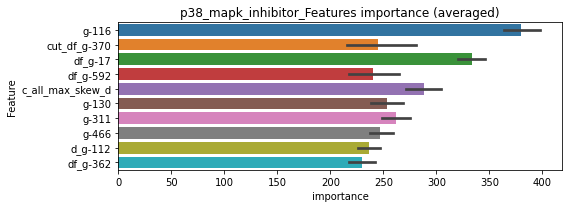

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0320455	valid_1's binary_logloss: 0.0637857
[600]	training's binary_logloss: 0.0093507	valid_1's binary_logloss: 0.0320979
[900]	training's binary_logloss: 0.00471042	valid_1's binary_logloss: 0.0239218
[1200]	training's binary_logloss: 0.00304908	valid_1's binary_logloss: 0.0204045
[1500]	training's binary_logloss: 0.00223482	valid_1's binary_logloss: 0.018495
[1800]	training's binary_logloss: 0.00176791	valid_1's binary_logloss: 0.0170865
[2100]	training's binary_logloss: 0.00147719	valid_1's binary_logloss: 0.0163619
[2400]	training's binary_logloss: 0.0012734	valid_1's binary_logloss: 0.015647
[2700]	training's binary_logloss: 0.00112592	valid_1's binary_logloss: 0.0152333
[3000]	training's binary_logloss: 0.0010145	valid_1's binary_logloss: 0.0149259
[3300]	training's binary_logloss: 0.0009269	valid_1's binary_logloss: 0.014482
Early stopping, best iteration is:
[3449]	training's binary

len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319565	valid_1's binary_logloss: 0.0613596
[600]	training's binary_logloss: 0.00925324	valid_1's binary_logloss: 0.0308032
[900]	training's binary_logloss: 0.00465069	valid_1's binary_logloss: 0.0230324
[1200]	training's binary_logloss: 0.00301263	valid_1's binary_logloss: 0.0198537
[1500]	training's binary_logloss: 0.00221287	valid_1's binary_logloss: 0.0180337
[1800]	training's binary_logloss: 0.00175839	valid_1's binary_logloss: 0.0170212
[2100]	training's binary_logloss: 0.00146948	valid_1's binary_logloss: 0.0162258
Early stopping, best iteration is:
[2073]	training's binary_logloss: 0.00149058	valid_1's binary_logloss: 0.0161867


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332139	valid_1's binary_logloss: 0.060371
[600]	training's binary_logloss: 0.00971179	valid_1's binary_logloss: 0.0300182
[900]	training's binary_logloss: 0.00489297	valid_1's binary_logloss: 0.0221043
[1200]	training's binary_logloss: 0.00311857	valid_1's binary_logloss: 0.0184276
[1500]	training's binary_logloss: 0.00228161	valid_1's binary_logloss: 0.0167824
[1800]	training's binary_logloss: 0.00180515	valid_1's binary_logloss: 0.015545
[2100]	training's binary_logloss: 0.00150082	valid_1's binary_logloss: 0.0147886
[2400]	training's binary_logloss: 0.00129311	valid_1's binary_logloss: 0.0143713
[2700]	training's binary_logloss: 0.0011428	valid_1's binary_logloss: 0.0139632
Early stopping, best iteration is:
[2705]	training's binary_logloss: 0.00114049	valid_1's binary_logloss: 0.0139472


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331567	valid_1's binary_logloss: 0.0581149
[600]	training's binary_logloss: 0.00955599	valid_1's binary_logloss: 0.0281622
[900]	training's binary_logloss: 0.00476965	valid_1's binary_logloss: 0.0207056
[1200]	training's binary_logloss: 0.00307157	valid_1's binary_logloss: 0.0175737
[1500]	training's binary_logloss: 0.00225089	valid_1's binary_logloss: 0.0157546
[1800]	training's binary_logloss: 0.00178747	valid_1's binary_logloss: 0.0147583
[2100]	training's binary_logloss: 0.00148735	valid_1's binary_logloss: 0.0141581
[2400]	training's binary_logloss: 0.0012818	valid_1's binary_logloss: 0.0135578
[2700]	training's binary_logloss: 0.00113348	valid_1's binary_logloss: 0.0131565
Early stopping, best iteration is:
[2945]	training's binary_logloss: 0.00103905	valid_1's binary_logloss: 0.0129023


p38_mapk_inhibitor logloss: 0.014346857697002917


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641069	valid_1's binary_logloss: 0.010947
[600]	training's binary_logloss: 0.000807156	valid_1's binary_logloss: 0.00239423
[900]	training's binary_logloss: 0.000417168	valid_1's binary_logloss: 0.00151006
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000409247	valid_1's binary_logloss: 0.00149323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624941	valid_1's binary_logloss: 0.0190532
[600]	training's binary_logloss: 0.000779203	valid_1's binary_logloss: 0.00911571
[900]	training's binary_logloss: 0.000408447	valid_1's binary_logloss: 0.00810886
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000407042	valid_1's binary_logloss: 0.00810235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651172	valid_1's binary_logloss: 0.0102243
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0026140, Threshold: 0.0119741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00838, conf_1:0.01557
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0119741
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_2: 0.0319741
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_3: 0.0519741
threshold: 0.0519741, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580518	valid_1's binary_logloss: 0.00981987
[600]	training's binary_logloss: 0.000745616	valid_1's binary_logloss: 0.00215363
[900]	training's binary_logloss: 0.000392983	valid_1's binary_logloss: 0.00153242
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000399902	valid_1's binary_logloss: 0.00152568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058095	valid_1's binary_logloss: 0.0182996
[600]	training's binary_logloss: 0.000734613	valid_1's binary_logloss: 0.0102214
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000518038	valid_1's binary_logloss: 0.00943948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595144	valid_1's binary_logloss: 0.008594
[600]	training's binary_logloss: 0.000752697	valid_1's binary_logloss: 0.00143802
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0116224, Threshold: 0.0519741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0067805 Vs.target_rate: 0.00101, Num_p_label: 27.0, conf_0:0.04158, conf_1:0.06237
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_1: 0.0519741
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.0719741
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.0919741
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_4: 0.1119741
threshold: 0.1119741, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570604	valid_1's binary_logloss: 0.0114586
[600]	training's binary_logloss: 0.000733904	valid_1's binary_logloss: 0.00314426
[900]	training's binary_logloss: 0.000389205	valid_1's binary_logloss: 0.00236102
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000378037	valid_1's binary_logloss: 0.00232799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582389	valid_1's binary_logloss: 0.012412
[600]	training's binary_logloss: 0.000737208	valid_1's binary_logloss: 0.00402098
[900]	training's binary_logloss: 0.000392334	valid_1's binary_logloss: 0.00309606
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000381287	valid_1's binary_logloss: 0.00306563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582268	valid_1's binary_logloss: 0.00924893
[600]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0716730, Threshold: 0.1119741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00101, Num_p_label: 8.0, conf_0:0.10078, conf_1:0.12317
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.1119741
threshold: 0.1119741, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


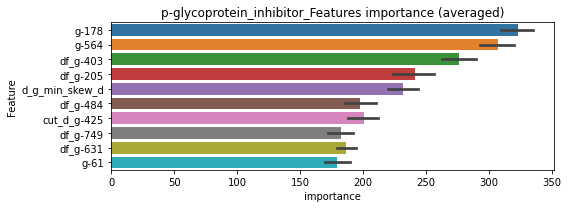

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140204	valid_1's binary_logloss: 0.021084
[600]	training's binary_logloss: 0.00366462	valid_1's binary_logloss: 0.0078352
[900]	training's binary_logloss: 0.0019054	valid_1's binary_logloss: 0.00502805
[1200]	training's binary_logloss: 0.00127689	valid_1's binary_logloss: 0.00393835
[1500]	training's binary_logloss: 0.000970931	valid_1's binary_logloss: 0.00337287
[1800]	training's binary_logloss: 0.000794409	valid_1's binary_logloss: 0.0029763
[2100]	training's binary_logloss: 0.000677496	valid_1's binary_logloss: 0.00271418
[2400]	training's binary_logloss: 0.000597768	valid_1's binary_logloss: 0.00254017
[2700]	training's binary_logloss: 0.000539134	valid_1's binary_logloss: 0.00238592
[3000]	training's binary_logloss: 0.000495357	valid_1's binary_logloss: 0.00228591
[3300]	training's binary_logloss: 0.000461577	valid_1's binary_logloss: 0.0021981
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139792	valid_1's binary_logloss: 0.0220308
[600]	training's binary_logloss: 0.00366085	valid_1's binary_logloss: 0.00833987
[900]	training's binary_logloss: 0.00190123	valid_1's binary_logloss: 0.00540226
[1200]	training's binary_logloss: 0.00127404	valid_1's binary_logloss: 0.00423046
[1500]	training's binary_logloss: 0.000972393	valid_1's binary_logloss: 0.00360626
[1800]	training's binary_logloss: 0.000793024	valid_1's binary_logloss: 0.00322421
[2100]	training's binary_logloss: 0.000677447	valid_1's binary_logloss: 0.00294515
[2400]	training's binary_logloss: 0.00059683	valid_1's binary_logloss: 0.00276264
[2700]	training's binary_logloss: 0.000537039	valid_1's binary_logloss: 0.00260478
[3000]	training's binary_logloss: 0.000493904	valid_1's binary_logloss: 0.00248632
[3300]	training's binary_logloss: 0.000460946	valid_1's binary_logloss: 0.00239931
[3600]	training's binary_logloss: 0.

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142758	valid_1's binary_logloss: 0.0196231
[600]	training's binary_logloss: 0.00374209	valid_1's binary_logloss: 0.0060316
[900]	training's binary_logloss: 0.00193732	valid_1's binary_logloss: 0.0034057
[1200]	training's binary_logloss: 0.00130029	valid_1's binary_logloss: 0.002422
[1500]	training's binary_logloss: 0.000988033	valid_1's binary_logloss: 0.00192344
[1800]	training's binary_logloss: 0.000804989	valid_1's binary_logloss: 0.00162257
[2100]	training's binary_logloss: 0.000686604	valid_1's binary_logloss: 0.00142487
[2400]	training's binary_logloss: 0.000604866	valid_1's binary_logloss: 0.00129198
[2700]	training's binary_logloss: 0.000544809	valid_1's binary_logloss: 0.00118143
[3000]	training's binary_logloss: 0.0004997	valid_1's binary_logloss: 0.00109848
[3300]	training's binary_logloss: 0.000465734	valid_1's binary_logloss: 0.00103689
[3600]	training's binary_logloss: 0.00044

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138309	valid_1's binary_logloss: 0.022519
[600]	training's binary_logloss: 0.0036274	valid_1's binary_logloss: 0.00771322
[900]	training's binary_logloss: 0.00188609	valid_1's binary_logloss: 0.00472936
[1200]	training's binary_logloss: 0.00127	valid_1's binary_logloss: 0.00356878
[1500]	training's binary_logloss: 0.000965526	valid_1's binary_logloss: 0.00293556
[1800]	training's binary_logloss: 0.000786852	valid_1's binary_logloss: 0.00255798
[2100]	training's binary_logloss: 0.000672694	valid_1's binary_logloss: 0.00230248
[2400]	training's binary_logloss: 0.000593082	valid_1's binary_logloss: 0.00212236
[2700]	training's binary_logloss: 0.0005338	valid_1's binary_logloss: 0.00197654
[3000]	training's binary_logloss: 0.000490573	valid_1's binary_logloss: 0.00187058
[3300]	training's binary_logloss: 0.000457783	valid_1's binary_logloss: 0.00179688
[3600]	training's binary_logloss: 0.000432

p-glycoprotein_inhibitor logloss: 0.0017202547421426907


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146887	valid_1's binary_logloss: 0.0680354
[600]	training's binary_logloss: 0.00217796	valid_1's binary_logloss: 0.047931
[900]	training's binary_logloss: 0.000934141	valid_1's binary_logloss: 0.0449677
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000889931	valid_1's binary_logloss: 0.0449158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150408	valid_1's binary_logloss: 0.0401586
[600]	training's binary_logloss: 0.00226899	valid_1's binary_logloss: 0.0188513
[900]	training's binary_logloss: 0.000962515	valid_1's binary_logloss: 0.0157042
Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.000712883	valid_1's binary_logloss: 0.0146253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163428	valid_1's binary_logloss: 0.0338296
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0064434, Threshold: 0.0191120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.01338, conf_1:0.02485
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0191120
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_2: 0.0391120
threshold: 0.0391120, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152433	valid_1's binary_logloss: 0.0448552
[600]	training's binary_logloss: 0.00227408	valid_1's binary_logloss: 0.0208054
[900]	training's binary_logloss: 0.000944798	valid_1's binary_logloss: 0.0169783
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000787797	valid_1's binary_logloss: 0.0163283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145775	valid_1's binary_logloss: 0.038015
[600]	training's binary_logloss: 0.00216032	valid_1's binary_logloss: 0.0184266
[900]	training's binary_logloss: 0.00092933	valid_1's binary_logloss: 0.0154186
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000819064	valid_1's binary_logloss: 0.0152167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147239	valid_1's binary_logloss: 0.0340614
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0355737, Threshold: 0.0391120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0168257 Vs.target_rate: 0.00256, Num_p_label: 67.0, conf_0:0.03129, conf_1:0.04693
Num_p_label: 67.0, Expected: 10.2, Adj_threshold_1: 0.0391120
Num_p_label: 46.0, Expected: 10.2, Adj_threshold_2: 0.0591120
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.0791120
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_4: 0.0991120
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_5: 0.1191120
threshold: 0.1191120, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134552	valid_1's binary_logloss: 0.0422527
[600]	training's binary_logloss: 0.00205216	valid_1's binary_logloss: 0.0244026
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00121054	valid_1's binary_logloss: 0.0229764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144924	valid_1's binary_logloss: 0.0430905
[600]	training's binary_logloss: 0.00209678	valid_1's binary_logloss: 0.0217533
[900]	training's binary_logloss: 0.000904842	valid_1's binary_logloss: 0.0186109
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000840927	valid_1's binary_logloss: 0.0184108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142153	valid_1's binary_logloss: 0.0419003
[600]	training's binary_logloss: 0.00211533	valid_1's binary_logloss: 0.018985
[900]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0296572, Threshold: 0.1191120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0030136 Vs.target_rate: 0.00256, Num_p_label: 12.0, conf_0:0.10720, conf_1:0.13102
threshold: 0.1191120, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


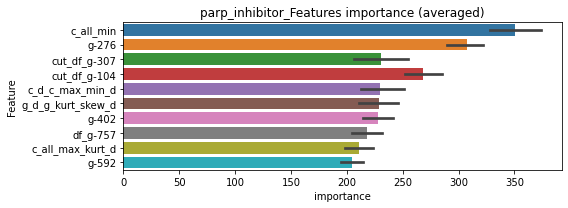

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290956	valid_1's binary_logloss: 0.055795
[600]	training's binary_logloss: 0.00880421	valid_1's binary_logloss: 0.0307079
[900]	training's binary_logloss: 0.00452772	valid_1's binary_logloss: 0.0241964
[1200]	training's binary_logloss: 0.00296693	valid_1's binary_logloss: 0.0213393
[1500]	training's binary_logloss: 0.00219159	valid_1's binary_logloss: 0.0198629
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.00192621	valid_1's binary_logloss: 0.0193199


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292495	valid_1's binary_logloss: 0.056292
[600]	training's binary_logloss: 0.00878269	valid_1's binary_logloss: 0.0299698
[900]	training's binary_logloss: 0.00450227	valid_1's binary_logloss: 0.0230353
[1200]	training's binary_logloss: 0.00293097	valid_1's binary_logloss: 0.0204425
[1500]	training's binary_logloss: 0.00216461	valid_1's binary_logloss: 0.0188565
[1800]	training's binary_logloss: 0.00172837	valid_1's binary_logloss: 0.0178281
[2100]	training's binary_logloss: 0.0014463	valid_1's binary_logloss: 0.0172241
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.00127247	valid_1's binary_logloss: 0.0167533


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0302452	valid_1's binary_logloss: 0.0505454
[600]	training's binary_logloss: 0.00909945	valid_1's binary_logloss: 0.0250305
[900]	training's binary_logloss: 0.00465822	valid_1's binary_logloss: 0.0184366
[1200]	training's binary_logloss: 0.00302758	valid_1's binary_logloss: 0.0158116
[1500]	training's binary_logloss: 0.00223154	valid_1's binary_logloss: 0.014315
[1800]	training's binary_logloss: 0.00176977	valid_1's binary_logloss: 0.0133854
[2100]	training's binary_logloss: 0.00147999	valid_1's binary_logloss: 0.0128366
[2400]	training's binary_logloss: 0.00127651	valid_1's binary_logloss: 0.0124032
[2700]	training's binary_logloss: 0.00112882	valid_1's binary_logloss: 0.0120594
Early stopping, best iteration is:
[2722]	training's binary_logloss: 0.00111917	valid_1's binary_logloss: 0.0120292


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284925	valid_1's binary_logloss: 0.0599028
[600]	training's binary_logloss: 0.00855915	valid_1's binary_logloss: 0.0334082
[900]	training's binary_logloss: 0.0044412	valid_1's binary_logloss: 0.0269932
[1200]	training's binary_logloss: 0.0028989	valid_1's binary_logloss: 0.0241726
[1500]	training's binary_logloss: 0.00213597	valid_1's binary_logloss: 0.0226463
[1800]	training's binary_logloss: 0.001702	valid_1's binary_logloss: 0.0214576
Early stopping, best iteration is:
[1800]	training's binary_logloss: 0.001702	valid_1's binary_logloss: 0.0214576


parp_inhibitor logloss: 0.01739049929692549


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245, target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0845152	valid_1's binary_logloss: 0.266345
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0273118	valid_1's binary_logloss: 0.247688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0837827	valid_1's binary_logloss: 0.264711
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0482992	valid_1's binary_logloss: 0.253152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0821863	valid_1's binary_logloss: 0.281214
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.0462353	valid_1's binary_logloss: 0.271255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.085743	valid_1's binary_logloss: 0.272155
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.0417357	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.888
y_Threshold: 0.0996921, Threshold: 0.6029606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 444 → Positive_corect_labels: 492/3450
p_label_rate: 0.0100452 Vs.target_rate: 0.01247, Num_p_label: 40.0, conf_0:0.42207, conf_1:0.78385
threshold: 0.6029606, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 492.0/3450, y_label_rate: 0.1426087
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.042395	valid_1's binary_logloss: 0.177098
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.0118905	valid_1's binary_logloss: 0.160003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0446791	valid_1's binary_logloss: 0.163656
[600]	training's binary_logloss: 0.00950162	valid_1's binary_logloss: 0.139307
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00841329	valid_1's binary_logloss: 0.137652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437279	valid_1's binary_logloss: 0.166474
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.0107455	valid_1's binary_logloss: 0.142312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.041868	valid_1's binary_logloss: 0.180319


2 / 3 AUC score:0.976
y_Threshold: 0.0780415, Threshold: 0.6029606, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.0175364	valid_1's binary_logloss: 0.171235


Remove_noisy_data: 138 → Positive_corect_labels: 423.0/3312
p_label_rate: 0.0236062 Vs.target_rate: 0.01247, Num_p_label: 94.0, conf_0:0.48237, conf_1:0.72355
Num_p_label: 94.0, Expected: 49.7, Adj_threshold_1: 0.6029606
Num_p_label: 91.0, Expected: 49.7, Adj_threshold_2: 0.6229606
Num_p_label: 88.0, Expected: 49.7, Adj_threshold_3: 0.6429606
Num_p_label: 82.0, Expected: 49.7, Adj_threshold_4: 0.6629606
Num_p_label: 79.0, Expected: 49.7, Adj_threshold_5: 0.6829606
Num_p_label: 70.0, Expected: 49.7, Adj_threshold_6: 0.7029606
threshold: 0.7029606, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 423.0/3312, y_label_rate: 0.1277174
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0293406	valid_1's binary_logloss: 0.149312
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.012326	valid_1's binary_logloss: 0.138752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0313836	valid_1's binary_logloss: 0.128053
[600]	training's binary_logloss: 0.00592206	valid_1's binary_logloss: 0.10777
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00658317	valid_1's binary_logloss: 0.107057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0318964	valid_1's binary_logloss: 0.121298
[600]	training's binary_logloss: 0.00637207	valid_1's binary_logloss: 0.0944866
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00453685	valid_1's binary_logloss: 0.0916074
Training until validation scores don't improve for 30 rounds
[300]	training's binary

3 / 3 AUC score:0.987
y_Threshold: 0.0673980, Threshold: 0.7029606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 391.0/3248
p_label_rate: 0.0271220 Vs.target_rate: 0.01247, Num_p_label: 108.0, conf_0:0.50000, conf_1:0.77326
Num_p_label: 108.0, Expected: 49.7, Adj_threshold_1: 0.7029606
Num_p_label: 107.0, Expected: 49.7, Adj_threshold_2: 0.7229606
Num_p_label: 103.0, Expected: 49.7, Adj_threshold_3: 0.7429606
Num_p_label: 96.0, Expected: 49.7, Adj_threshold_4: 0.7629606
Num_p_label: 90.0, Expected: 49.7, Adj_threshold_5: 0.7829606
threshold: 0.7829606, positive_p_label: 90.0/3982, p_label_rate: 0.0226017
positive_y_label: 391.0/3248, y_label_rate: 0.1203818


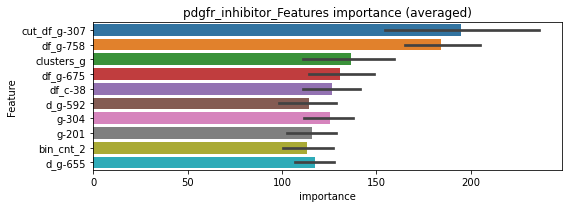

len(train_index) : 2436
len(valid_index) : 812
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0467829	valid_1's binary_logloss: 0.119558
[600]	training's binary_logloss: 0.0167809	valid_1's binary_logloss: 0.0890998
[900]	training's binary_logloss: 0.00871779	valid_1's binary_logloss: 0.078748
[1200]	training's binary_logloss: 0.00557755	valid_1's binary_logloss: 0.0739628
[1500]	training's binary_logloss: 0.00402934	valid_1's binary_logloss: 0.0712936
Early stopping, best iteration is:
[1540]	training's binary_logloss: 0.00389259	valid_1's binary_logloss: 0.0711707


len(train_index) : 2436
len(valid_index) : 812
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.043587	valid_1's binary_logloss: 0.139853
[600]	training's binary_logloss: 0.0151928	valid_1's binary_logloss: 0.113187
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.0104671	valid_1's binary_logloss: 0.109055


len(train_index) : 2436
len(valid_index) : 812
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0469616	valid_1's binary_logloss: 0.120592
[600]	training's binary_logloss: 0.0162089	valid_1's binary_logloss: 0.0903739
[900]	training's binary_logloss: 0.00848776	valid_1's binary_logloss: 0.0822112
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.00595283	valid_1's binary_logloss: 0.078958


len(train_index) : 2436
len(valid_index) : 812
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0465198	valid_1's binary_logloss: 0.132233
[600]	training's binary_logloss: 0.0162758	valid_1's binary_logloss: 0.104532
[900]	training's binary_logloss: 0.00842586	valid_1's binary_logloss: 0.0971393
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.00627535	valid_1's binary_logloss: 0.0949551


pdgfr_inhibitor logloss: 0.08853463641976267


neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451473	valid_1's binary_logloss: 0.0162523
[600]	training's binary_logloss: 0.000591542	valid_1's binary_logloss: 0.00716822
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000375265	valid_1's binary_logloss: 0.00645577
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463485	valid_1's binary_logloss: 0.00954336
[600]	training's binary_logloss: 0.000606337	valid_1's binary_logloss: 0.00235979
[900]	training's binary_logloss: 0.000363642	valid_1's binary_logloss: 0.00170859
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000363642	valid_1's binary_logloss: 0.00170859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461329	valid_1's binary_logloss: 0.00646443
[600]	training's binary_logloss: 0.000605713	valid_1's binary_logloss: 0.00113793
Early stoppin

1 / 3 AUC score:1.000
y_Threshold: 0.0019912, Threshold: 0.0114792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00804, conf_1:0.01492
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0114792
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0314792
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0514792
threshold: 0.0514792, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420331	valid_1's binary_logloss: 0.0181809
[600]	training's binary_logloss: 0.000553286	valid_1's binary_logloss: 0.00954816
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000358042	valid_1's binary_logloss: 0.00874615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430561	valid_1's binary_logloss: 0.00776138
[600]	training's binary_logloss: 0.000570398	valid_1's binary_logloss: 0.00199006
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000355917	valid_1's binary_logloss: 0.00151469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442486	valid_1's binary_logloss: 0.00570348
[600]	training's binary_logloss: 0.000581497	valid_1's binary_logloss: 0.000907817
[900]	training's binary_logloss: 0.000357256	valid_1's binary_logloss: 0.000588053
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.0099502, Threshold: 0.0514792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0085384 Vs.target_rate: 0.00076, Num_p_label: 34.0, conf_0:0.04118, conf_1:0.06178
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_1: 0.0514792
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.0714792
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_3: 0.0914792
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.1114792
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.1314792
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.1514792
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.1714792
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.1914792
threshold: 0.1914792, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406886	valid_1's binary_logloss: 0.0100005
[600]	training's binary_logloss: 0.000546695	valid_1's binary_logloss: 0.00369317
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00035912	valid_1's binary_logloss: 0.00305691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437838	valid_1's binary_logloss: 0.00700077
[600]	training's binary_logloss: 0.000566253	valid_1's binary_logloss: 0.0020722
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000355782	valid_1's binary_logloss: 0.00169989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421443	valid_1's binary_logloss: 0.00657717
[600]	training's binary_logloss: 0.000562066	valid_1's binary_logloss: 0.00169435
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000362918	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0726271, Threshold: 0.1914792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00076, Num_p_label: 8.0, conf_0:0.17233, conf_1:0.21063
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.1914792
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.2114792
threshold: 0.2114792, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


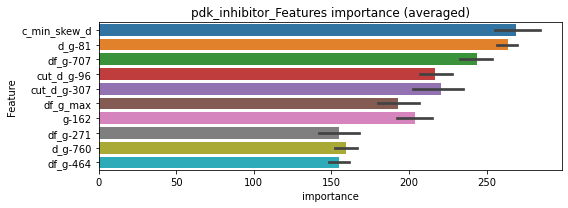

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108576	valid_1's binary_logloss: 0.0172198
[600]	training's binary_logloss: 0.00286749	valid_1's binary_logloss: 0.00692179
[900]	training's binary_logloss: 0.00153064	valid_1's binary_logloss: 0.00480242
[1200]	training's binary_logloss: 0.00104946	valid_1's binary_logloss: 0.00392089
[1500]	training's binary_logloss: 0.000808171	valid_1's binary_logloss: 0.0034095
[1800]	training's binary_logloss: 0.000667637	valid_1's binary_logloss: 0.00309439
[2100]	training's binary_logloss: 0.000573867	valid_1's binary_logloss: 0.00287216
[2400]	training's binary_logloss: 0.000510367	valid_1's binary_logloss: 0.00271395
[2700]	training's binary_logloss: 0.000461625	valid_1's binary_logloss: 0.00258542
[3000]	training's binary_logloss: 0.000426679	valid_1's binary_logloss: 0.0025109
[3300]	training's binary_logloss: 0.00040114	valid_1's binary_logloss: 0.0024454
[3600]	training's binary_logloss: 0.000

len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113024	valid_1's binary_logloss: 0.0144318
[600]	training's binary_logloss: 0.0029502	valid_1's binary_logloss: 0.00506282
[900]	training's binary_logloss: 0.00156128	valid_1's binary_logloss: 0.00340152
[1200]	training's binary_logloss: 0.00106418	valid_1's binary_logloss: 0.00276312
[1500]	training's binary_logloss: 0.000816413	valid_1's binary_logloss: 0.00242071
[1800]	training's binary_logloss: 0.000671871	valid_1's binary_logloss: 0.00220506
[2100]	training's binary_logloss: 0.000576576	valid_1's binary_logloss: 0.0020642
[2400]	training's binary_logloss: 0.000511665	valid_1's binary_logloss: 0.0019694
Early stopping, best iteration is:
[2563]	training's binary_logloss: 0.000483278	valid_1's binary_logloss: 0.00192311


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112382	valid_1's binary_logloss: 0.0148332
[600]	training's binary_logloss: 0.00294527	valid_1's binary_logloss: 0.00471452
[900]	training's binary_logloss: 0.00155321	valid_1's binary_logloss: 0.00280467
[1200]	training's binary_logloss: 0.00105846	valid_1's binary_logloss: 0.00206386
[1500]	training's binary_logloss: 0.000813519	valid_1's binary_logloss: 0.00166499
[1800]	training's binary_logloss: 0.000668808	valid_1's binary_logloss: 0.00143197
[2100]	training's binary_logloss: 0.000575395	valid_1's binary_logloss: 0.00127774
[2400]	training's binary_logloss: 0.000509712	valid_1's binary_logloss: 0.00116214
[2700]	training's binary_logloss: 0.000461912	valid_1's binary_logloss: 0.00107829
[3000]	training's binary_logloss: 0.000426061	valid_1's binary_logloss: 0.00101287
[3300]	training's binary_logloss: 0.000400105	valid_1's binary_logloss: 0.000964338
[3600]	training's binary_logloss: 

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111522	valid_1's binary_logloss: 0.0180224
[600]	training's binary_logloss: 0.00291279	valid_1's binary_logloss: 0.00660321
[900]	training's binary_logloss: 0.00154567	valid_1's binary_logloss: 0.00429732
[1200]	training's binary_logloss: 0.00105477	valid_1's binary_logloss: 0.00331504
[1500]	training's binary_logloss: 0.000813509	valid_1's binary_logloss: 0.00279395
[1800]	training's binary_logloss: 0.000670705	valid_1's binary_logloss: 0.0024769
[2100]	training's binary_logloss: 0.000576305	valid_1's binary_logloss: 0.00225602
[2400]	training's binary_logloss: 0.000511105	valid_1's binary_logloss: 0.00210552
[2700]	training's binary_logloss: 0.000462105	valid_1's binary_logloss: 0.00198952
[3000]	training's binary_logloss: 0.000426807	valid_1's binary_logloss: 0.0019126
[3300]	training's binary_logloss: 0.000401318	valid_1's binary_logloss: 0.00184897
[3600]	training's binary_logloss: 0.0

pdk_inhibitor logloss: 0.001749180759602763


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248, target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0729323	valid_1's binary_logloss: 0.266905
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0561777	valid_1's binary_logloss: 0.26186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0707892	valid_1's binary_logloss: 0.251646
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0288052	valid_1's binary_logloss: 0.237578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0767812	valid_1's binary_logloss: 0.233841
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.0274555	valid_1's binary_logloss: 0.214212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0739662	valid_1's binary_logloss: 0.227702
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.0341309	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.907
y_Threshold: 0.0856457, Threshold: 0.2726268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 397 → Positive_corect_labels: 516/3500
p_label_rate: 0.0100452 Vs.target_rate: 0.01109, Num_p_label: 40.0, conf_0:0.19084, conf_1:0.35441
threshold: 0.2726268, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 516.0/3500, y_label_rate: 0.1474286
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0424049	valid_1's binary_logloss: 0.175541
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.018195	valid_1's binary_logloss: 0.162996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0420237	valid_1's binary_logloss: 0.149844
[600]	training's binary_logloss: 0.00883597	valid_1's binary_logloss: 0.122318
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.00494193	valid_1's binary_logloss: 0.119492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.042559	valid_1's binary_logloss: 0.143253
[600]	training's binary_logloss: 0.00887211	valid_1's binary_logloss: 0.116461
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00719975	valid_1's binary_logloss: 0.114727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

2 / 3 AUC score:0.987
y_Threshold: 0.0624783, Threshold: 0.2726268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 466.0/3400
p_label_rate: 0.0148167 Vs.target_rate: 0.01109, Num_p_label: 59.0, conf_0:0.21810, conf_1:0.32715
threshold: 0.2726268, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 466.0/3400, y_label_rate: 0.1370588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0315491	valid_1's binary_logloss: 0.115084
[600]	training's binary_logloss: 0.00599776	valid_1's binary_logloss: 0.0909078
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.0026489	valid_1's binary_logloss: 0.0850199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0334291	valid_1's binary_logloss: 0.110296
[600]	training's binary_logloss: 0.00628314	valid_1's binary_logloss: 0.0888619
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00401847	valid_1's binary_logloss: 0.0863697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321408	valid_1's binary_logloss: 0.131904
[600]	training's binary_logloss: 0.00607016	valid_1's binary_logloss: 0.114146
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00519445	valid_1's binary_logloss: 0.113458
T

3 / 3 AUC score:0.997
y_Threshold: 0.0522801, Threshold: 0.2726268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 443.0/3354
p_label_rate: 0.0118031 Vs.target_rate: 0.01109, Num_p_label: 47.0, conf_0:0.24536, conf_1:0.29989
threshold: 0.2726268, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 443.0/3354, y_label_rate: 0.1320811


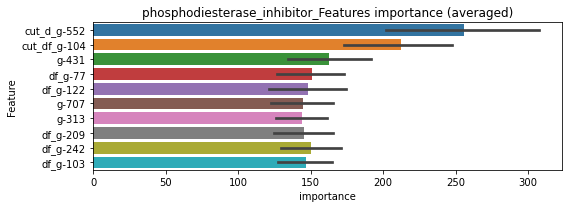

len(train_index) : 2515
len(valid_index) : 839
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0502091	valid_1's binary_logloss: 0.12702
[600]	training's binary_logloss: 0.0173677	valid_1's binary_logloss: 0.102413
[900]	training's binary_logloss: 0.00888907	valid_1's binary_logloss: 0.0977292
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00893712	valid_1's binary_logloss: 0.0976655


len(train_index) : 2515
len(valid_index) : 839
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0524953	valid_1's binary_logloss: 0.112603
[600]	training's binary_logloss: 0.0184105	valid_1's binary_logloss: 0.0817068
[900]	training's binary_logloss: 0.00955181	valid_1's binary_logloss: 0.0727489
[1200]	training's binary_logloss: 0.00606739	valid_1's binary_logloss: 0.0697403
Early stopping, best iteration is:
[1320]	training's binary_logloss: 0.00525052	valid_1's binary_logloss: 0.0687407


len(train_index) : 2516
len(valid_index) : 838
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0521556	valid_1's binary_logloss: 0.120847
[600]	training's binary_logloss: 0.0184525	valid_1's binary_logloss: 0.0905489
[900]	training's binary_logloss: 0.00947094	valid_1's binary_logloss: 0.0797135
[1200]	training's binary_logloss: 0.0060366	valid_1's binary_logloss: 0.0747035
Early stopping, best iteration is:
[1454]	training's binary_logloss: 0.00453561	valid_1's binary_logloss: 0.0726615


len(train_index) : 2516
len(valid_index) : 838
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491448	valid_1's binary_logloss: 0.138825
[600]	training's binary_logloss: 0.016963	valid_1's binary_logloss: 0.113822
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.0115187	valid_1's binary_logloss: 0.110613


phosphodiesterase_inhibitor logloss: 0.08741760697066507


neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065762	valid_1's binary_logloss: 0.0173008
[600]	training's binary_logloss: 0.000875491	valid_1's binary_logloss: 0.00719288
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000469221	valid_1's binary_logloss: 0.0059607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645549	valid_1's binary_logloss: 0.0181397
[600]	training's binary_logloss: 0.000866998	valid_1's binary_logloss: 0.00758206
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000455494	valid_1's binary_logloss: 0.00602312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00664564	valid_1's binary_logloss: 0.0113674
[600]	training's binary_logloss: 0.000885767	valid_1's binary_logloss: 0.00271466
[900]	training's binary_logloss: 0.000449587	valid_1's binary_logloss: 0.00175076
Early stopping, b

1 / 3 AUC score:1.000
y_Threshold: 0.0026476, Threshold: 0.0139607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00977, conf_1:0.01815
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0139607
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0339607
threshold: 0.0339607, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614524	valid_1's binary_logloss: 0.0157767
[600]	training's binary_logloss: 0.000828931	valid_1's binary_logloss: 0.0061964
[900]	training's binary_logloss: 0.000428346	valid_1's binary_logloss: 0.00508565
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000428346	valid_1's binary_logloss: 0.00508565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060631	valid_1's binary_logloss: 0.0160835
[600]	training's binary_logloss: 0.00082293	valid_1's binary_logloss: 0.00658913
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000433768	valid_1's binary_logloss: 0.00519281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623317	valid_1's binary_logloss: 0.0104122
[600]	training's binary_logloss: 0.000839619	valid_1's binary_logloss: 0.00240155
[900]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0383057, Threshold: 0.0339607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0065294 Vs.target_rate: 0.00105, Num_p_label: 26.0, conf_0:0.02717, conf_1:0.04075
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_1: 0.0339607
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.0539607
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_3: 0.0739607
threshold: 0.0739607, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614524	valid_1's binary_logloss: 0.0157767
[600]	training's binary_logloss: 0.000828931	valid_1's binary_logloss: 0.0061964
[900]	training's binary_logloss: 0.000428346	valid_1's binary_logloss: 0.00508565
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000428346	valid_1's binary_logloss: 0.00508565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060631	valid_1's binary_logloss: 0.0160835
[600]	training's binary_logloss: 0.00082293	valid_1's binary_logloss: 0.00658913
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000433768	valid_1's binary_logloss: 0.00519281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623317	valid_1's binary_logloss: 0.0104122
[600]	training's binary_logloss: 0.000839619	valid_1's binary_logloss: 0.00240155
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0383057, Threshold: 0.0739607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00105, Num_p_label: 8.0, conf_0:0.06656, conf_1:0.08136
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0739607
threshold: 0.0739607, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


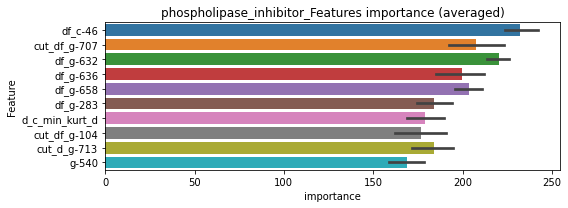

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015705	valid_1's binary_logloss: 0.0259197
[600]	training's binary_logloss: 0.00413713	valid_1's binary_logloss: 0.0105014
[900]	training's binary_logloss: 0.00213929	valid_1's binary_logloss: 0.00736748
[1200]	training's binary_logloss: 0.00142755	valid_1's binary_logloss: 0.00609581
[1500]	training's binary_logloss: 0.00108181	valid_1's binary_logloss: 0.00550327
[1800]	training's binary_logloss: 0.000882701	valid_1's binary_logloss: 0.00518504
[2100]	training's binary_logloss: 0.000751354	valid_1's binary_logloss: 0.00491862
Early stopping, best iteration is:
[2179]	training's binary_logloss: 0.000724114	valid_1's binary_logloss: 0.00484977


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015611	valid_1's binary_logloss: 0.0267268
[600]	training's binary_logloss: 0.00411433	valid_1's binary_logloss: 0.0115766
[900]	training's binary_logloss: 0.00212079	valid_1's binary_logloss: 0.00842542
[1200]	training's binary_logloss: 0.00142107	valid_1's binary_logloss: 0.00710189
[1500]	training's binary_logloss: 0.00107289	valid_1's binary_logloss: 0.00632207
[1800]	training's binary_logloss: 0.000871728	valid_1's binary_logloss: 0.0058277
[2100]	training's binary_logloss: 0.000743713	valid_1's binary_logloss: 0.00549977
[2400]	training's binary_logloss: 0.000654558	valid_1's binary_logloss: 0.00526143
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.000617685	valid_1's binary_logloss: 0.00514805


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159494	valid_1's binary_logloss: 0.0220905
[600]	training's binary_logloss: 0.00422309	valid_1's binary_logloss: 0.00717113
[900]	training's binary_logloss: 0.00217276	valid_1's binary_logloss: 0.00426408
[1200]	training's binary_logloss: 0.0014437	valid_1's binary_logloss: 0.00313508
[1500]	training's binary_logloss: 0.00109319	valid_1's binary_logloss: 0.00254549
[1800]	training's binary_logloss: 0.00088888	valid_1's binary_logloss: 0.0022104
[2100]	training's binary_logloss: 0.000756975	valid_1's binary_logloss: 0.00198353
[2400]	training's binary_logloss: 0.000665824	valid_1's binary_logloss: 0.00181604
[2700]	training's binary_logloss: 0.000599081	valid_1's binary_logloss: 0.00169729
[3000]	training's binary_logloss: 0.000548701	valid_1's binary_logloss: 0.00159927
[3300]	training's binary_logloss: 0.000510425	valid_1's binary_logloss: 0.00153408
[3600]	training's binary_logloss: 0.000

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158908	valid_1's binary_logloss: 0.0240713
[600]	training's binary_logloss: 0.00416803	valid_1's binary_logloss: 0.00907543
[900]	training's binary_logloss: 0.00215172	valid_1's binary_logloss: 0.00606959
[1200]	training's binary_logloss: 0.00143418	valid_1's binary_logloss: 0.00479826
[1500]	training's binary_logloss: 0.0010856	valid_1's binary_logloss: 0.00409402
[1800]	training's binary_logloss: 0.000882	valid_1's binary_logloss: 0.00364935
[2100]	training's binary_logloss: 0.000751737	valid_1's binary_logloss: 0.00337033
[2400]	training's binary_logloss: 0.000660038	valid_1's binary_logloss: 0.00314104
[2700]	training's binary_logloss: 0.000593679	valid_1's binary_logloss: 0.00297611
[3000]	training's binary_logloss: 0.000543037	valid_1's binary_logloss: 0.00284483
[3300]	training's binary_logloss: 0.000504979	valid_1's binary_logloss: 0.00273449
[3600]	training's binary_logloss: 0.0004

phospholipase_inhibitor logloss: 0.0034907441025835238


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262, target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.044171	valid_1's binary_logloss: 0.161413
[600]	training's binary_logloss: 0.0088495	valid_1's binary_logloss: 0.131846
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00643626	valid_1's binary_logloss: 0.130089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0484049	valid_1's binary_logloss: 0.127493
[600]	training's binary_logloss: 0.00938796	valid_1's binary_logloss: 0.0905892
[900]	training's binary_logloss: 0.00306248	valid_1's binary_logloss: 0.0822006
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.00214679	valid_1's binary_logloss: 0.0812222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0446995	valid_1's binary_logloss: 0.14566
[600]	training's binary_logloss: 0.00915617	valid_1's binary_logloss: 0.112533
[900]	training's binary_logloss: 0.002

1 / 3 AUC score:0.981
y_Threshold: 0.0296590, Threshold: 0.0760122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 211 → Positive_corect_labels: 612/3703
p_label_rate: 0.0100452 Vs.target_rate: 0.00634, Num_p_label: 40.0, conf_0:0.05321, conf_1:0.09882
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0760122
Num_p_label: 26.0, Expected: 25.2, Adj_threshold_2: 0.0960122
threshold: 0.0960122, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 612.0/3703, y_label_rate: 0.1652714
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0347166	valid_1's binary_logloss: 0.111456
[600]	training's binary_logloss: 0.00637497	valid_1's binary_logloss: 0.07243
[900]	training's binary_logloss: 0.00220965	valid_1's binary_logloss: 0.0614707
[1200]	training's binary_logloss: 0.0012751	valid_1's binary_logloss: 0.0583844
Early stopping, best iteration is:
[1180]	training's binary_logloss: 0.00130939	valid_1's binary_logloss: 0.0582613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0358568	valid_1's binary_logloss: 0.115525
[600]	training's binary_logloss: 0.00635695	valid_1's binary_logloss: 0.0795088
[900]	training's binary_logloss: 0.0021875	valid_1's binary_logloss: 0.0707327
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.00174412	valid_1's binary_logloss: 0.069612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 

2 / 3 AUC score:0.999
y_Threshold: 0.0399186, Threshold: 0.0960122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 594.0/3667
p_label_rate: 0.0100452 Vs.target_rate: 0.00634, Num_p_label: 40.0, conf_0:0.07681, conf_1:0.11521
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0960122
Num_p_label: 25.0, Expected: 25.2, Adj_threshold_2: 0.1160122
threshold: 0.1160122, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 594.0/3667, y_label_rate: 0.1619853
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.030864	valid_1's binary_logloss: 0.107738
[600]	training's binary_logloss: 0.00533196	valid_1's binary_logloss: 0.0793292
[900]	training's binary_logloss: 0.00195257	valid_1's binary_logloss: 0.0754465
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00171138	valid_1's binary_logloss: 0.0745043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.032522	valid_1's binary_logloss: 0.0986695
[600]	training's binary_logloss: 0.00555432	valid_1's binary_logloss: 0.0616894
[900]	training's binary_logloss: 0.0019927	valid_1's binary_logloss: 0.0542792
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.00139082	valid_1's binary_logloss: 0.0520641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343217	valid_1's binary_logloss: 0.0934384
[600]	training's binary_logloss: 

3 / 3 AUC score:0.997
y_Threshold: 0.0433156, Threshold: 0.1160122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 579.0/3637
p_label_rate: 0.0070316 Vs.target_rate: 0.00634, Num_p_label: 28.0, conf_0:0.10441, conf_1:0.12761
threshold: 0.1160122, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 579.0/3637, y_label_rate: 0.1591971


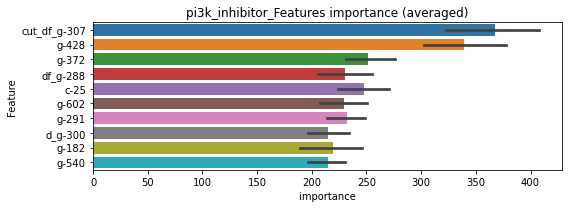

len(train_index) : 2727
len(valid_index) : 910
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0506743	valid_1's binary_logloss: 0.12841
[600]	training's binary_logloss: 0.0167296	valid_1's binary_logloss: 0.0917357
[900]	training's binary_logloss: 0.00843437	valid_1's binary_logloss: 0.081474
[1200]	training's binary_logloss: 0.0053826	valid_1's binary_logloss: 0.0773407
Early stopping, best iteration is:
[1452]	training's binary_logloss: 0.00406311	valid_1's binary_logloss: 0.0752401


len(train_index) : 2728
len(valid_index) : 909
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0534155	valid_1's binary_logloss: 0.105442
[600]	training's binary_logloss: 0.017666	valid_1's binary_logloss: 0.0651181
[900]	training's binary_logloss: 0.0088427	valid_1's binary_logloss: 0.0517716
[1200]	training's binary_logloss: 0.00559396	valid_1's binary_logloss: 0.0461788
[1500]	training's binary_logloss: 0.00401918	valid_1's binary_logloss: 0.0433613
Early stopping, best iteration is:
[1643]	training's binary_logloss: 0.00353148	valid_1's binary_logloss: 0.0421804


len(train_index) : 2728
len(valid_index) : 909
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0535464	valid_1's binary_logloss: 0.110998
[600]	training's binary_logloss: 0.0176163	valid_1's binary_logloss: 0.0718948
[900]	training's binary_logloss: 0.00884358	valid_1's binary_logloss: 0.0609605
[1200]	training's binary_logloss: 0.00560382	valid_1's binary_logloss: 0.0562183
[1500]	training's binary_logloss: 0.00401555	valid_1's binary_logloss: 0.0530614
Early stopping, best iteration is:
[1654]	training's binary_logloss: 0.0034981	valid_1's binary_logloss: 0.0521456


len(train_index) : 2728
len(valid_index) : 909
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0519363	valid_1's binary_logloss: 0.116453
[600]	training's binary_logloss: 0.016969	valid_1's binary_logloss: 0.0786027
[900]	training's binary_logloss: 0.00854376	valid_1's binary_logloss: 0.0666092
[1200]	training's binary_logloss: 0.00544514	valid_1's binary_logloss: 0.0621127
[1500]	training's binary_logloss: 0.0039095	valid_1's binary_logloss: 0.0592353
Early stopping, best iteration is:
[1474]	training's binary_logloss: 0.0040096	valid_1's binary_logloss: 0.0591536


pi3k_inhibitor logloss: 0.05718490972086559


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00782457	valid_1's binary_logloss: 0.0153189
[600]	training's binary_logloss: 0.00106366	valid_1's binary_logloss: 0.00412877
[900]	training's binary_logloss: 0.000522833	valid_1's binary_logloss: 0.00272863
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000500409	valid_1's binary_logloss: 0.00266487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744746	valid_1's binary_logloss: 0.0263703
[600]	training's binary_logloss: 0.00101462	valid_1's binary_logloss: 0.0136245
[900]	training's binary_logloss: 0.000513167	valid_1's binary_logloss: 0.0115951
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000486504	valid_1's binary_logloss: 0.011491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00793531	valid_1's binary_logloss: 0.0112283
[600]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0031710, Threshold: 0.0088039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.00616, conf_1:0.01145
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0088039
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_2: 0.0288039
threshold: 0.0288039, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711429	valid_1's binary_logloss: 0.0131059
[600]	training's binary_logloss: 0.0010103	valid_1's binary_logloss: 0.00326692
[900]	training's binary_logloss: 0.000503203	valid_1's binary_logloss: 0.00207122
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000468861	valid_1's binary_logloss: 0.0019865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007058	valid_1's binary_logloss: 0.0253224
[600]	training's binary_logloss: 0.000954214	valid_1's binary_logloss: 0.0135071
[900]	training's binary_logloss: 0.000490539	valid_1's binary_logloss: 0.0114065
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000471812	valid_1's binary_logloss: 0.0112642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725406	valid_1's binary_logloss: 0.00996968
[600]	training's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0308452, Threshold: 0.0288039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00130, Num_p_label: 22.0, conf_0:0.02304, conf_1:0.03456
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_1: 0.0288039
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_2: 0.0488039
threshold: 0.0488039, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711429	valid_1's binary_logloss: 0.0131059
[600]	training's binary_logloss: 0.0010103	valid_1's binary_logloss: 0.00326692
[900]	training's binary_logloss: 0.000503203	valid_1's binary_logloss: 0.00207122
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000468861	valid_1's binary_logloss: 0.0019865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007058	valid_1's binary_logloss: 0.0253224
[600]	training's binary_logloss: 0.000954214	valid_1's binary_logloss: 0.0135071
[900]	training's binary_logloss: 0.000490539	valid_1's binary_logloss: 0.0114065
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000471812	valid_1's binary_logloss: 0.0112642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725406	valid_1's binary_logloss: 0.00996968
[600]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0308452, Threshold: 0.0488039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00130, Num_p_label: 11.0, conf_0:0.04392, conf_1:0.05368
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.0488039
threshold: 0.0488039, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


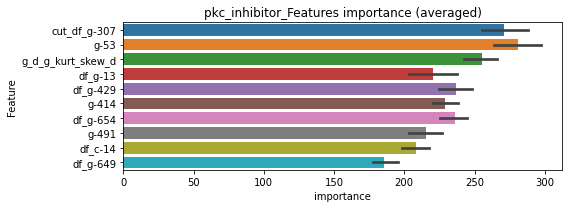

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180366	valid_1's binary_logloss: 0.0271371
[600]	training's binary_logloss: 0.00497738	valid_1's binary_logloss: 0.0100545
[900]	training's binary_logloss: 0.00258179	valid_1's binary_logloss: 0.00624381
[1200]	training's binary_logloss: 0.00172469	valid_1's binary_logloss: 0.00467853
[1500]	training's binary_logloss: 0.001304	valid_1's binary_logloss: 0.00388238
[1800]	training's binary_logloss: 0.00105735	valid_1's binary_logloss: 0.00336566
[2100]	training's binary_logloss: 0.000900149	valid_1's binary_logloss: 0.00302428
[2400]	training's binary_logloss: 0.000788521	valid_1's binary_logloss: 0.00276352
[2700]	training's binary_logloss: 0.000708113	valid_1's binary_logloss: 0.00256683
[3000]	training's binary_logloss: 0.00064731	valid_1's binary_logloss: 0.00242515
[3300]	training's binary_logloss: 0.00060092	valid_1's binary_logloss: 0.00231329
[3600]	training's binary_logloss: 0.000564

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174488	valid_1's binary_logloss: 0.0377607
[600]	training's binary_logloss: 0.00480065	valid_1's binary_logloss: 0.0191427
[900]	training's binary_logloss: 0.00249181	valid_1's binary_logloss: 0.0148635
[1200]	training's binary_logloss: 0.00166807	valid_1's binary_logloss: 0.0129175
[1500]	training's binary_logloss: 0.00126229	valid_1's binary_logloss: 0.011771
[1800]	training's binary_logloss: 0.00102619	valid_1's binary_logloss: 0.0111413
[2100]	training's binary_logloss: 0.000872521	valid_1's binary_logloss: 0.0106295
[2400]	training's binary_logloss: 0.000765694	valid_1's binary_logloss: 0.010262
[2700]	training's binary_logloss: 0.000687912	valid_1's binary_logloss: 0.00999835
Early stopping, best iteration is:
[2935]	training's binary_logloss: 0.000640669	valid_1's binary_logloss: 0.00983845


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181613	valid_1's binary_logloss: 0.0224351
[600]	training's binary_logloss: 0.0050399	valid_1's binary_logloss: 0.00734306
[900]	training's binary_logloss: 0.00262656	valid_1's binary_logloss: 0.00426281
[1200]	training's binary_logloss: 0.00175972	valid_1's binary_logloss: 0.00307036
[1500]	training's binary_logloss: 0.00132846	valid_1's binary_logloss: 0.00245437
[1800]	training's binary_logloss: 0.00107548	valid_1's binary_logloss: 0.00207156
[2100]	training's binary_logloss: 0.000912502	valid_1's binary_logloss: 0.00183154
[2400]	training's binary_logloss: 0.000801511	valid_1's binary_logloss: 0.00166057
[2700]	training's binary_logloss: 0.000718131	valid_1's binary_logloss: 0.0015247
[3000]	training's binary_logloss: 0.000655752	valid_1's binary_logloss: 0.00142601
[3300]	training's binary_logloss: 0.000608367	valid_1's binary_logloss: 0.00135126
[3600]	training's binary_logloss: 0.000

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177029	valid_1's binary_logloss: 0.0285513
[600]	training's binary_logloss: 0.00489889	valid_1's binary_logloss: 0.0114413
[900]	training's binary_logloss: 0.00255202	valid_1's binary_logloss: 0.00755166
[1200]	training's binary_logloss: 0.00170504	valid_1's binary_logloss: 0.00590388
[1500]	training's binary_logloss: 0.00129016	valid_1's binary_logloss: 0.00501168
[1800]	training's binary_logloss: 0.00104699	valid_1's binary_logloss: 0.00446525
[2100]	training's binary_logloss: 0.000891282	valid_1's binary_logloss: 0.00406607
[2400]	training's binary_logloss: 0.000782282	valid_1's binary_logloss: 0.00378428
[2700]	training's binary_logloss: 0.000702447	valid_1's binary_logloss: 0.00357117
[3000]	training's binary_logloss: 0.000641412	valid_1's binary_logloss: 0.00340422
[3300]	training's binary_logloss: 0.000595425	valid_1's binary_logloss: 0.0032643
[3600]	training's binary_logloss: 0.000

pkc_inhibitor logloss: 0.004009121763699435


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128058	valid_1's binary_logloss: 0.0548977
[600]	training's binary_logloss: 0.00186964	valid_1's binary_logloss: 0.0367628
[900]	training's binary_logloss: 0.000800576	valid_1's binary_logloss: 0.0330931
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000791678	valid_1's binary_logloss: 0.0330502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136964	valid_1's binary_logloss: 0.0343777
[600]	training's binary_logloss: 0.00196239	valid_1's binary_logloss: 0.0151591
[900]	training's binary_logloss: 0.000847197	valid_1's binary_logloss: 0.0119466
Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.000646195	valid_1's binary_logloss: 0.0112617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141	valid_1's binary_logloss: 0.0256304
[600]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0059720, Threshold: 0.0382863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.02680, conf_1:0.04977
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0382863
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_2: 0.0582863
threshold: 0.0582863, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127241	valid_1's binary_logloss: 0.0393766
[600]	training's binary_logloss: 0.00186373	valid_1's binary_logloss: 0.0223845
[900]	training's binary_logloss: 0.000813448	valid_1's binary_logloss: 0.0190116
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000685525	valid_1's binary_logloss: 0.0183316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128069	valid_1's binary_logloss: 0.0353992
[600]	training's binary_logloss: 0.00188582	valid_1's binary_logloss: 0.0173922
[900]	training's binary_logloss: 0.000822816	valid_1's binary_logloss: 0.0144812
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000757228	valid_1's binary_logloss: 0.0141518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126378	valid_1's binary_logloss: 0.0303268
[600]	training's binary_l

2 / 3 AUC score:0.999
y_Threshold: 0.0288702, Threshold: 0.0582863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0178302 Vs.target_rate: 0.00231, Num_p_label: 71.0, conf_0:0.04663, conf_1:0.06994
Num_p_label: 71.0, Expected: 9.2, Adj_threshold_1: 0.0582863
Num_p_label: 59.0, Expected: 9.2, Adj_threshold_2: 0.0782863
Num_p_label: 52.0, Expected: 9.2, Adj_threshold_3: 0.0982863
Num_p_label: 45.0, Expected: 9.2, Adj_threshold_4: 0.1182863
Num_p_label: 39.0, Expected: 9.2, Adj_threshold_5: 0.1382863
Num_p_label: 37.0, Expected: 9.2, Adj_threshold_6: 0.1582863
Num_p_label: 30.0, Expected: 9.2, Adj_threshold_7: 0.1782863
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_8: 0.1982863
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_9: 0.2182863
threshold: 0.2182863, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121364	valid_1's binary_logloss: 0.0387997
[600]	training's binary_logloss: 0.00178799	valid_1's binary_logloss: 0.0195156
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000832041	valid_1's binary_logloss: 0.0158547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119589	valid_1's binary_logloss: 0.0406417
[600]	training's binary_logloss: 0.00175386	valid_1's binary_logloss: 0.0198801
[900]	training's binary_logloss: 0.000769611	valid_1's binary_logloss: 0.0159315
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000601606	valid_1's binary_logloss: 0.0149972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119093	valid_1's binary_logloss: 0.031369
[600]	training's binary_logloss: 0.00180161	valid_1's binary_logloss: 0.0145369
[900]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0367705, Threshold: 0.2182863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0065294 Vs.target_rate: 0.00231, Num_p_label: 26.0, conf_0:0.19646, conf_1:0.24011
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.2182863
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_2: 0.2382863
threshold: 0.2382863, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


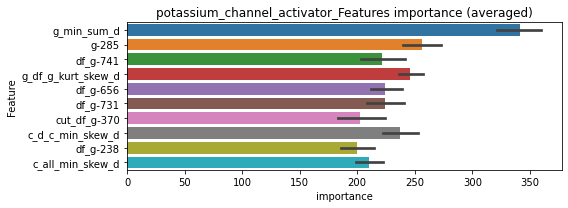

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0269228	valid_1's binary_logloss: 0.0549937
[600]	training's binary_logloss: 0.00783722	valid_1's binary_logloss: 0.0294474
[900]	training's binary_logloss: 0.00401104	valid_1's binary_logloss: 0.0228915
[1200]	training's binary_logloss: 0.00260307	valid_1's binary_logloss: 0.0202194
[1500]	training's binary_logloss: 0.00192846	valid_1's binary_logloss: 0.0185427
[1800]	training's binary_logloss: 0.00153206	valid_1's binary_logloss: 0.0173899
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.00153791	valid_1's binary_logloss: 0.0173895


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0267108	valid_1's binary_logloss: 0.0522517
[600]	training's binary_logloss: 0.00777324	valid_1's binary_logloss: 0.0263547
[900]	training's binary_logloss: 0.00393892	valid_1's binary_logloss: 0.0194166
[1200]	training's binary_logloss: 0.00256686	valid_1's binary_logloss: 0.0162357
[1500]	training's binary_logloss: 0.00189789	valid_1's binary_logloss: 0.0144843
[1800]	training's binary_logloss: 0.00151639	valid_1's binary_logloss: 0.0133581
[2100]	training's binary_logloss: 0.00126667	valid_1's binary_logloss: 0.0125685
[2400]	training's binary_logloss: 0.00109592	valid_1's binary_logloss: 0.0120455
[2700]	training's binary_logloss: 0.000972218	valid_1's binary_logloss: 0.0115762
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000893447	valid_1's binary_logloss: 0.0113484


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278617	valid_1's binary_logloss: 0.046154
[600]	training's binary_logloss: 0.00818174	valid_1's binary_logloss: 0.0204499
[900]	training's binary_logloss: 0.0041623	valid_1's binary_logloss: 0.0141434
[1200]	training's binary_logloss: 0.0027031	valid_1's binary_logloss: 0.0116601
[1500]	training's binary_logloss: 0.00199176	valid_1's binary_logloss: 0.0102333
[1800]	training's binary_logloss: 0.00158454	valid_1's binary_logloss: 0.00925933
[2100]	training's binary_logloss: 0.00132056	valid_1's binary_logloss: 0.00860325
[2400]	training's binary_logloss: 0.00114111	valid_1's binary_logloss: 0.0082324
[2700]	training's binary_logloss: 0.00101136	valid_1's binary_logloss: 0.00789329
[3000]	training's binary_logloss: 0.000912793	valid_1's binary_logloss: 0.00761408
[3300]	training's binary_logloss: 0.000838477	valid_1's binary_logloss: 0.0074241
Early stopping, best iteration is:
[3345]	trainin

len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027825	valid_1's binary_logloss: 0.0502746
[600]	training's binary_logloss: 0.00804791	valid_1's binary_logloss: 0.0259256
[900]	training's binary_logloss: 0.00406401	valid_1's binary_logloss: 0.0201226
[1200]	training's binary_logloss: 0.00263273	valid_1's binary_logloss: 0.0178038
[1500]	training's binary_logloss: 0.00194877	valid_1's binary_logloss: 0.0167763
[1800]	training's binary_logloss: 0.00155037	valid_1's binary_logloss: 0.0161331
[2100]	training's binary_logloss: 0.0012972	valid_1's binary_logloss: 0.0156296
Early stopping, best iteration is:
[2186]	training's binary_logloss: 0.00123977	valid_1's binary_logloss: 0.0154894


potassium_channel_activator logloss: 0.012907308109843444


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278, target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254722	valid_1's binary_logloss: 0.0972342
[600]	training's binary_logloss: 0.0043978	valid_1's binary_logloss: 0.0716425
[900]	training's binary_logloss: 0.00156829	valid_1's binary_logloss: 0.0667904
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.00142958	valid_1's binary_logloss: 0.0666273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0283702	valid_1's binary_logloss: 0.08608
[600]	training's binary_logloss: 0.00462672	valid_1's binary_logloss: 0.0603172
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00219549	valid_1's binary_logloss: 0.0570152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0279475	valid_1's binary_logloss: 0.0681723
[600]	training's binary_logloss: 0.00490214	valid_1's binary_logloss: 0.0427764
[900]	training's binary_logloss: 

1 / 3 AUC score:0.994
y_Threshold: 0.0130023, Threshold: 0.0354800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00412, Num_p_label: 40.0, conf_0:0.02484, conf_1:0.04612
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0354800
Num_p_label: 23.0, Expected: 16.4, Adj_threshold_2: 0.0554800
threshold: 0.0554800, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 647.0/3785, y_label_rate: 0.1709379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249113	valid_1's binary_logloss: 0.0757497
[600]	training's binary_logloss: 0.00418174	valid_1's binary_logloss: 0.0485618
[900]	training's binary_logloss: 0.00152804	valid_1's binary_logloss: 0.043066
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00159989	valid_1's binary_logloss: 0.0427675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245864	valid_1's binary_logloss: 0.0752391
[600]	training's binary_logloss: 0.00406229	valid_1's binary_logloss: 0.0489707
[900]	training's binary_logloss: 0.00148137	valid_1's binary_logloss: 0.0437677
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00154268	valid_1's binary_logloss: 0.0436901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246081	valid_1's binary_logloss: 0.0788839
[600]	training's binary_logloss

2 / 3 AUC score:0.998
y_Threshold: 0.0323335, Threshold: 0.0554800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0110497 Vs.target_rate: 0.00412, Num_p_label: 44.0, conf_0:0.04438, conf_1:0.06658
Num_p_label: 44.0, Expected: 16.4, Adj_threshold_1: 0.0554800
Num_p_label: 29.0, Expected: 16.4, Adj_threshold_2: 0.0754800
Num_p_label: 26.0, Expected: 16.4, Adj_threshold_3: 0.0954800
Num_p_label: 22.0, Expected: 16.4, Adj_threshold_4: 0.1154800
threshold: 0.1154800, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 640.0/3771, y_label_rate: 0.1697163
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211434	valid_1's binary_logloss: 0.0878343
[600]	training's binary_logloss: 0.00350115	valid_1's binary_logloss: 0.064192
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00150997	valid_1's binary_logloss: 0.0608749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232339	valid_1's binary_logloss: 0.0724122
[600]	training's binary_logloss: 0.00381317	valid_1's binary_logloss: 0.0494431
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00160774	valid_1's binary_logloss: 0.0458252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236736	valid_1's binary_logloss: 0.0597417
[600]	training's binary_logloss: 0.00386812	valid_1's binary_logloss: 0.034264
[900]	training's binary_logloss: 0.00146368	valid_1's binary_logloss: 0.02868
Early stopping, best iteration is:

3 / 3 AUC score:1.000
y_Threshold: 0.0346577, Threshold: 0.1154800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3759
p_label_rate: 0.0045203 Vs.target_rate: 0.00412, Num_p_label: 18.0, conf_0:0.10393, conf_1:0.12703
threshold: 0.1154800, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 634.0/3759, y_label_rate: 0.1686619


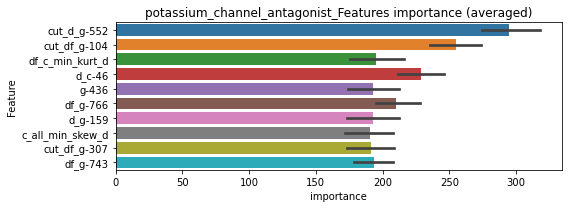

len(train_index) : 2819
len(valid_index) : 940
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0402903	valid_1's binary_logloss: 0.086761
[600]	training's binary_logloss: 0.0128897	valid_1's binary_logloss: 0.0595125
[900]	training's binary_logloss: 0.00652689	valid_1's binary_logloss: 0.0518648
[1200]	training's binary_logloss: 0.00415415	valid_1's binary_logloss: 0.0491818
Early stopping, best iteration is:
[1233]	training's binary_logloss: 0.0039874	valid_1's binary_logloss: 0.0488291


len(train_index) : 2819
len(valid_index) : 940
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0405724	valid_1's binary_logloss: 0.088023
[600]	training's binary_logloss: 0.0130399	valid_1's binary_logloss: 0.0568051
[900]	training's binary_logloss: 0.00655519	valid_1's binary_logloss: 0.0485144
[1200]	training's binary_logloss: 0.00416276	valid_1's binary_logloss: 0.0451959
Early stopping, best iteration is:
[1400]	training's binary_logloss: 0.0033249	valid_1's binary_logloss: 0.0437101


len(train_index) : 2819
len(valid_index) : 940
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407137	valid_1's binary_logloss: 0.0853771
[600]	training's binary_logloss: 0.0131023	valid_1's binary_logloss: 0.0548782
[900]	training's binary_logloss: 0.00656933	valid_1's binary_logloss: 0.0460916
[1200]	training's binary_logloss: 0.00417251	valid_1's binary_logloss: 0.0429033
[1500]	training's binary_logloss: 0.00302058	valid_1's binary_logloss: 0.0414552
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.00266301	valid_1's binary_logloss: 0.0408289


len(train_index) : 2820
len(valid_index) : 939
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0419137	valid_1's binary_logloss: 0.0866754
[600]	training's binary_logloss: 0.0132118	valid_1's binary_logloss: 0.0574066
[900]	training's binary_logloss: 0.00670612	valid_1's binary_logloss: 0.0488923
[1200]	training's binary_logloss: 0.00423423	valid_1's binary_logloss: 0.0451827
[1500]	training's binary_logloss: 0.00304621	valid_1's binary_logloss: 0.0431915
[1800]	training's binary_logloss: 0.00237904	valid_1's binary_logloss: 0.0416656
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.00206505	valid_1's binary_logloss: 0.0408054


potassium_channel_antagonist logloss: 0.0435441278935662


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0309562	valid_1's binary_logloss: 0.110112
[600]	training's binary_logloss: 0.00565538	valid_1's binary_logloss: 0.086541
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.00260506	valid_1's binary_logloss: 0.0836085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0340189	valid_1's binary_logloss: 0.104211
[600]	training's binary_logloss: 0.00632112	valid_1's binary_logloss: 0.0770985
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00283506	valid_1's binary_logloss: 0.0731564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0329779	valid_1's binary_logloss: 0.08268
[600]	training's binary_logloss: 0.00612078	valid_1's binary_logloss: 0.0522963
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.00237886	valid_1's binary_logloss: 0.0463796


1 / 3 AUC score:0.993
y_Threshold: 0.0174520, Threshold: 0.0561233, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 639/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.03929, conf_1:0.07296
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0561233
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_2: 0.0761233
threshold: 0.0761233, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 639.0/3769, y_label_rate: 0.1695410
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0280788	valid_1's binary_logloss: 0.0881201
[600]	training's binary_logloss: 0.00490814	valid_1's binary_logloss: 0.055632
[900]	training's binary_logloss: 0.00177162	valid_1's binary_logloss: 0.0500742
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.00144152	valid_1's binary_logloss: 0.0489388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271162	valid_1's binary_logloss: 0.101902
[600]	training's binary_logloss: 0.00460432	valid_1's binary_logloss: 0.0780102
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00303439	valid_1's binary_logloss: 0.0759603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272622	valid_1's binary_logloss: 0.0728611
[600]	training's binary_logloss: 0.00468625	valid_1's binary_logloss: 0.0491101
[900]	training's binary_logloss:

2 / 3 AUC score:0.998
y_Threshold: 0.0376097, Threshold: 0.0761233, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 622.0/3735
p_label_rate: 0.0130588 Vs.target_rate: 0.00483, Num_p_label: 52.0, conf_0:0.06090, conf_1:0.09135
Num_p_label: 52.0, Expected: 19.2, Adj_threshold_1: 0.0761233
Num_p_label: 34.0, Expected: 19.2, Adj_threshold_2: 0.0961233
Num_p_label: 23.0, Expected: 19.2, Adj_threshold_3: 0.1161233
threshold: 0.1161233, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 622.0/3735, y_label_rate: 0.1665328
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237443	valid_1's binary_logloss: 0.0798491
[600]	training's binary_logloss: 0.00386233	valid_1's binary_logloss: 0.0540673
[900]	training's binary_logloss: 0.00147161	valid_1's binary_logloss: 0.0493738
Early stopping, best iteration is:
[1136]	training's binary_logloss: 0.000988294	valid_1's binary_logloss: 0.0482315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02517	valid_1's binary_logloss: 0.0716636
[600]	training's binary_logloss: 0.00427104	valid_1's binary_logloss: 0.0426335
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00207473	valid_1's binary_logloss: 0.0375173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249027	valid_1's binary_logloss: 0.072548
[600]	training's binary_logloss: 0.00419805	valid_1's binary_logloss: 0.053591
Early stopping, best iteration i

3 / 3 AUC score:0.998
y_Threshold: 0.0320423, Threshold: 0.1161233, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 613.0/3717
p_label_rate: 0.0052737 Vs.target_rate: 0.00483, Num_p_label: 21.0, conf_0:0.10451, conf_1:0.12774
threshold: 0.1161233, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 613.0/3717, y_label_rate: 0.1649179


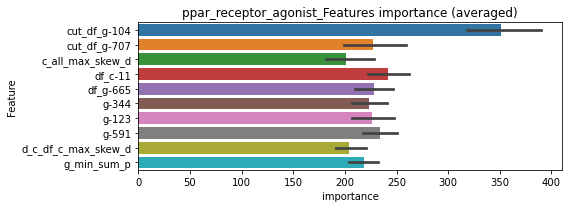

len(train_index) : 2787
len(valid_index) : 930
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0415316	valid_1's binary_logloss: 0.0838785
[600]	training's binary_logloss: 0.0135325	valid_1's binary_logloss: 0.0531192
[900]	training's binary_logloss: 0.00687227	valid_1's binary_logloss: 0.0438941
[1200]	training's binary_logloss: 0.0043973	valid_1's binary_logloss: 0.0405613
[1500]	training's binary_logloss: 0.00318458	valid_1's binary_logloss: 0.0386017
Early stopping, best iteration is:
[1619]	training's binary_logloss: 0.00287002	valid_1's binary_logloss: 0.0382039


len(train_index) : 2788
len(valid_index) : 929
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040925	valid_1's binary_logloss: 0.0931063
[600]	training's binary_logloss: 0.0131527	valid_1's binary_logloss: 0.0645386
[900]	training's binary_logloss: 0.00671056	valid_1's binary_logloss: 0.0565418
[1200]	training's binary_logloss: 0.0043048	valid_1's binary_logloss: 0.0529762
[1500]	training's binary_logloss: 0.00311694	valid_1's binary_logloss: 0.0515222
Early stopping, best iteration is:
[1492]	training's binary_logloss: 0.00314192	valid_1's binary_logloss: 0.0514945


len(train_index) : 2788
len(valid_index) : 929
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416918	valid_1's binary_logloss: 0.0856196
[600]	training's binary_logloss: 0.013398	valid_1's binary_logloss: 0.0562124
[900]	training's binary_logloss: 0.00676876	valid_1's binary_logloss: 0.0479316
[1200]	training's binary_logloss: 0.0043359	valid_1's binary_logloss: 0.0445721
Early stopping, best iteration is:
[1434]	training's binary_logloss: 0.00334802	valid_1's binary_logloss: 0.0429877


len(train_index) : 2788
len(valid_index) : 929
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407422	valid_1's binary_logloss: 0.0859122
[600]	training's binary_logloss: 0.0131611	valid_1's binary_logloss: 0.0552725
[900]	training's binary_logloss: 0.00671393	valid_1's binary_logloss: 0.0472375
[1200]	training's binary_logloss: 0.00429133	valid_1's binary_logloss: 0.0439032
Early stopping, best iteration is:
[1401]	training's binary_logloss: 0.00342704	valid_1's binary_logloss: 0.0427593


ppar_receptor_agonist logloss: 0.04385980779215663


neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00770383	valid_1's binary_logloss: 0.0186767
[600]	training's binary_logloss: 0.00104044	valid_1's binary_logloss: 0.00740075
[900]	training's binary_logloss: 0.000498038	valid_1's binary_logloss: 0.00582847
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000451178	valid_1's binary_logloss: 0.00574993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00820046	valid_1's binary_logloss: 0.017296
[600]	training's binary_logloss: 0.00106742	valid_1's binary_logloss: 0.00501398
[900]	training's binary_logloss: 0.000499811	valid_1's binary_logloss: 0.00334937
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000448583	valid_1's binary_logloss: 0.00318299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00845251	valid_1's binary_logloss: 0.0144623
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0029877, Threshold: 0.0079663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00558, conf_1:0.01036
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0079663
Num_p_label: 5.0, Expected: 5.0, Adj_threshold_2: 0.0279663
threshold: 0.0279663, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723549	valid_1's binary_logloss: 0.0173547
[600]	training's binary_logloss: 0.000992157	valid_1's binary_logloss: 0.00689258
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000502018	valid_1's binary_logloss: 0.0054597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079752	valid_1's binary_logloss: 0.0145406
[600]	training's binary_logloss: 0.00103702	valid_1's binary_logloss: 0.00364061
[900]	training's binary_logloss: 0.000490564	valid_1's binary_logloss: 0.00239553
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000471897	valid_1's binary_logloss: 0.0023446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762742	valid_1's binary_logloss: 0.0134504
[600]	training's binary_logloss: 0.00103172	valid_1's binary_logloss: 0.00399112
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0254236, Threshold: 0.0279663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00126, Num_p_label: 17.0, conf_0:0.02237, conf_1:0.03356
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_1: 0.0279663
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_2: 0.0479663
threshold: 0.0479663, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723549	valid_1's binary_logloss: 0.0173547
[600]	training's binary_logloss: 0.000992157	valid_1's binary_logloss: 0.00689258
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000502018	valid_1's binary_logloss: 0.0054597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079752	valid_1's binary_logloss: 0.0145406
[600]	training's binary_logloss: 0.00103702	valid_1's binary_logloss: 0.00364061
[900]	training's binary_logloss: 0.000490564	valid_1's binary_logloss: 0.00239553
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000471897	valid_1's binary_logloss: 0.0023446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762742	valid_1's binary_logloss: 0.0134504
[600]	training's binary_logloss: 0.00103172	valid_1's binary_logloss: 0.00399112
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0254236, Threshold: 0.0479663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00126, Num_p_label: 7.0, conf_0:0.04317, conf_1:0.05276
threshold: 0.0479663, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


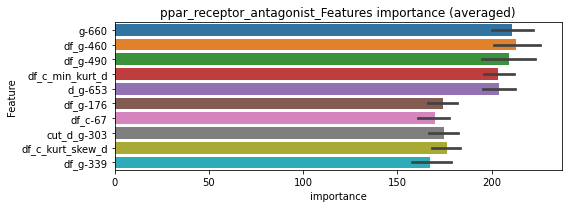

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177588	valid_1's binary_logloss: 0.0298423
[600]	training's binary_logloss: 0.00481919	valid_1's binary_logloss: 0.0134864
[900]	training's binary_logloss: 0.00245239	valid_1's binary_logloss: 0.00969033
[1200]	training's binary_logloss: 0.00162845	valid_1's binary_logloss: 0.00807936
[1500]	training's binary_logloss: 0.00122998	valid_1's binary_logloss: 0.00717551
[1800]	training's binary_logloss: 0.000994368	valid_1's binary_logloss: 0.00662784
[2100]	training's binary_logloss: 0.000844134	valid_1's binary_logloss: 0.00623287
[2400]	training's binary_logloss: 0.000738779	valid_1's binary_logloss: 0.00591838
[2700]	training's binary_logloss: 0.000661917	valid_1's binary_logloss: 0.00569323
Early stopping, best iteration is:
[2940]	training's binary_logloss: 0.000614335	valid_1's binary_logloss: 0.00554609


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183986	valid_1's binary_logloss: 0.0265336
[600]	training's binary_logloss: 0.00490339	valid_1's binary_logloss: 0.00917101
[900]	training's binary_logloss: 0.00249876	valid_1's binary_logloss: 0.00561802
[1200]	training's binary_logloss: 0.00165198	valid_1's binary_logloss: 0.00415673
[1500]	training's binary_logloss: 0.00124244	valid_1's binary_logloss: 0.0034638
[1800]	training's binary_logloss: 0.00100382	valid_1's binary_logloss: 0.00301753
[2100]	training's binary_logloss: 0.000850807	valid_1's binary_logloss: 0.00272766
[2400]	training's binary_logloss: 0.000744279	valid_1's binary_logloss: 0.00250066
[2700]	training's binary_logloss: 0.000665907	valid_1's binary_logloss: 0.00232186
[3000]	training's binary_logloss: 0.000606716	valid_1's binary_logloss: 0.00219377
[3300]	training's binary_logloss: 0.000561889	valid_1's binary_logloss: 0.00209847
[3600]	training's binary_logloss: 0.00

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180673	valid_1's binary_logloss: 0.0254026
[600]	training's binary_logloss: 0.00488438	valid_1's binary_logloss: 0.00935054
[900]	training's binary_logloss: 0.00250361	valid_1's binary_logloss: 0.00598116
[1200]	training's binary_logloss: 0.0016638	valid_1's binary_logloss: 0.00467959
[1500]	training's binary_logloss: 0.00125173	valid_1's binary_logloss: 0.00395895
[1800]	training's binary_logloss: 0.00100753	valid_1's binary_logloss: 0.00354719
[2100]	training's binary_logloss: 0.000852127	valid_1's binary_logloss: 0.00324762
[2400]	training's binary_logloss: 0.000746638	valid_1's binary_logloss: 0.00304317
[2700]	training's binary_logloss: 0.000668714	valid_1's binary_logloss: 0.00287671
[3000]	training's binary_logloss: 0.000610305	valid_1's binary_logloss: 0.00275972
[3300]	training's binary_logloss: 0.000564431	valid_1's binary_logloss: 0.00265096
Early stopping, best iteration is:
[33

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170468	valid_1's binary_logloss: 0.042805
[600]	training's binary_logloss: 0.00463121	valid_1's binary_logloss: 0.0263176
[900]	training's binary_logloss: 0.00239249	valid_1's binary_logloss: 0.0219841
[1200]	training's binary_logloss: 0.00159107	valid_1's binary_logloss: 0.0203521
[1500]	training's binary_logloss: 0.00119927	valid_1's binary_logloss: 0.0194219
[1800]	training's binary_logloss: 0.000971356	valid_1's binary_logloss: 0.0187719
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.000976072	valid_1's binary_logloss: 0.0187532


ppar_receptor_antagonist logloss: 0.007206513044176239


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270, target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0307293	valid_1's binary_logloss: 0.139698
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00644651	valid_1's binary_logloss: 0.125067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.030297	valid_1's binary_logloss: 0.0992602
[600]	training's binary_logloss: 0.0055914	valid_1's binary_logloss: 0.0695111
[900]	training's binary_logloss: 0.00201281	valid_1's binary_logloss: 0.0638229
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.00196187	valid_1's binary_logloss: 0.063575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0320588	valid_1's binary_logloss: 0.0870187
[600]	training's binary_logloss: 0.00592717	valid_1's binary_logloss: 0.0600162
[900]	training's binary_logloss: 0.00209501	valid_1's binary_logloss: 0.0552599
Early stopping, best iteration is:


1 / 3 AUC score:0.992
y_Threshold: 0.0193176, Threshold: 0.1813020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 175 → Positive_corect_labels: 632/3749
p_label_rate: 0.0100452 Vs.target_rate: 0.00500, Num_p_label: 40.0, conf_0:0.12691, conf_1:0.23569
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1813020
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_2: 0.2013020
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_3: 0.2213020
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_4: 0.2413020
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_5: 0.2613020
threshold: 0.2613020, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 632.0/3749, y_label_rate: 0.1685783
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265347	valid_1's binary_logloss: 0.085915
[600]	training's binary_logloss: 0.00466009	valid_1's binary_logloss: 0.0600564
[900]	training's binary_logloss: 0.00173867	valid_1's binary_logloss: 0.0543905
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.0017871	valid_1's binary_logloss: 0.0543246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251549	valid_1's binary_logloss: 0.0907275
[600]	training's binary_logloss: 0.00439361	valid_1's binary_logloss: 0.0676263
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.00231349	valid_1's binary_logloss: 0.0649074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262922	valid_1's binary_logloss: 0.0794263
[600]	training's binary_logloss: 0.0045862	valid_1's binary_logloss: 0.0578989
Early stopping, best iteration is

2 / 3 AUC score:0.999
y_Threshold: 0.0462456, Threshold: 0.2613020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 615.0/3715
p_label_rate: 0.0190859 Vs.target_rate: 0.00500, Num_p_label: 76.0, conf_0:0.20904, conf_1:0.31356
Num_p_label: 76.0, Expected: 19.9, Adj_threshold_1: 0.2613020
Num_p_label: 70.0, Expected: 19.9, Adj_threshold_2: 0.2813020
Num_p_label: 67.0, Expected: 19.9, Adj_threshold_3: 0.3013020
Num_p_label: 62.0, Expected: 19.9, Adj_threshold_4: 0.3213020
Num_p_label: 52.0, Expected: 19.9, Adj_threshold_5: 0.3413020
Num_p_label: 50.0, Expected: 19.9, Adj_threshold_6: 0.3613020
Num_p_label: 47.0, Expected: 19.9, Adj_threshold_7: 0.3813020
Num_p_label: 46.0, Expected: 19.9, Adj_threshold_8: 0.4013020
Num_p_label: 43.0, Expected: 19.9, Adj_threshold_9: 0.4213020
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_10: 0.4413020
threshold: 0.4613020, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 615.0/3715, y_label_rate: 0.1655451

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218795	valid_1's binary_logloss: 0.0792336
[600]	training's binary_logloss: 0.00378148	valid_1's binary_logloss: 0.0566094
[900]	training's binary_logloss: 0.00147667	valid_1's binary_logloss: 0.0512854
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.00116246	valid_1's binary_logloss: 0.0505032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225264	valid_1's binary_logloss: 0.08732
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.004667	valid_1's binary_logloss: 0.0654351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233929	valid_1's binary_logloss: 0.0666458
[600]	training's binary_logloss: 0.00408373	valid_1's binary_logloss: 0.0410917
[900]	training's binary_logloss: 0.00156554	valid_1's binary_logloss: 0.0360323
Early stopping, best iteration is

3 / 3 AUC score:0.999
y_Threshold: 0.0471071, Threshold: 0.4613020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 602.0/3689
p_label_rate: 0.0125565 Vs.target_rate: 0.00500, Num_p_label: 50.0, conf_0:0.41517, conf_1:0.50743
Num_p_label: 50.0, Expected: 19.9, Adj_threshold_1: 0.4613020
Num_p_label: 47.0, Expected: 19.9, Adj_threshold_2: 0.4813020
Num_p_label: 43.0, Expected: 19.9, Adj_threshold_3: 0.5013020
Num_p_label: 42.0, Expected: 19.9, Adj_threshold_4: 0.5213020
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_5: 0.5413020
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_6: 0.5613020
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_7: 0.5813020
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_8: 0.6013020
Num_p_label: 30.0, Expected: 19.9, Adj_threshold_9: 0.6213020
Num_p_label: 26.0, Expected: 19.9, Adj_threshold_10: 0.6413020
threshold: 0.6413020, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 602.0/3689, y_label_rate: 0.1631879

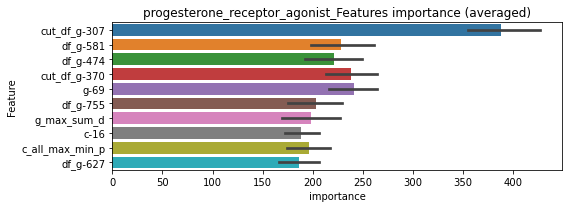

len(train_index) : 2766
len(valid_index) : 923
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0382235	valid_1's binary_logloss: 0.0884947
[600]	training's binary_logloss: 0.0125746	valid_1's binary_logloss: 0.0625404
[900]	training's binary_logloss: 0.00648815	valid_1's binary_logloss: 0.0562135
Early stopping, best iteration is:
[1133]	training's binary_logloss: 0.00455354	valid_1's binary_logloss: 0.0542621


len(train_index) : 2767
len(valid_index) : 922
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387043	valid_1's binary_logloss: 0.0819035
[600]	training's binary_logloss: 0.0130614	valid_1's binary_logloss: 0.0551987
[900]	training's binary_logloss: 0.00667054	valid_1's binary_logloss: 0.0476209
[1200]	training's binary_logloss: 0.00430909	valid_1's binary_logloss: 0.0446021
[1500]	training's binary_logloss: 0.0031269	valid_1's binary_logloss: 0.0427998
Early stopping, best iteration is:
[1650]	training's binary_logloss: 0.00275488	valid_1's binary_logloss: 0.0422089


len(train_index) : 2767
len(valid_index) : 922
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0404447	valid_1's binary_logloss: 0.0740774
[600]	training's binary_logloss: 0.0134958	valid_1's binary_logloss: 0.0450939
[900]	training's binary_logloss: 0.00691929	valid_1's binary_logloss: 0.0363304
[1200]	training's binary_logloss: 0.00444186	valid_1's binary_logloss: 0.0324504
[1500]	training's binary_logloss: 0.00323373	valid_1's binary_logloss: 0.0303211
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.00285761	valid_1's binary_logloss: 0.0295566


len(train_index) : 2767
len(valid_index) : 922
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03858	valid_1's binary_logloss: 0.086589
[600]	training's binary_logloss: 0.0129096	valid_1's binary_logloss: 0.0582892
[900]	training's binary_logloss: 0.00659127	valid_1's binary_logloss: 0.0490591
[1200]	training's binary_logloss: 0.00425361	valid_1's binary_logloss: 0.0457263
[1500]	training's binary_logloss: 0.00309012	valid_1's binary_logloss: 0.0437896
Early stopping, best iteration is:
[1528]	training's binary_logloss: 0.00301344	valid_1's binary_logloss: 0.0436814


progesterone_receptor_agonist logloss: 0.042430455541259224


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416031	valid_1's binary_logloss: 0.00706066
[600]	training's binary_logloss: 0.000568531	valid_1's binary_logloss: 0.00144319
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000360418	valid_1's binary_logloss: 0.00103788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425874	valid_1's binary_logloss: 0.00732653
[600]	training's binary_logloss: 0.000565279	valid_1's binary_logloss: 0.0014777
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000350273	valid_1's binary_logloss: 0.00104244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434069	valid_1's binary_logloss: 0.00653054
[600]	training's binary_logloss: 0.000579395	valid_1's binary_logloss: 0.00137685
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000354597	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0022534, Threshold: 0.0093899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00657, conf_1:0.01221
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0093899
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0293899
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.0493899
threshold: 0.0493899, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384059	valid_1's binary_logloss: 0.00592042
[600]	training's binary_logloss: 0.000525746	valid_1's binary_logloss: 0.00112041
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000335422	valid_1's binary_logloss: 0.000796176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381163	valid_1's binary_logloss: 0.00639329
[600]	training's binary_logloss: 0.000521976	valid_1's binary_logloss: 0.00126316
[900]	training's binary_logloss: 0.000330236	valid_1's binary_logloss: 0.000890605
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000330236	valid_1's binary_logloss: 0.000890605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400084	valid_1's binary_logloss: 0.00603098
[600]	training's binary_logloss: 0.000535958	valid_1's binary_logloss: 0.00125708
Early sto

2 / 3 AUC score:1.000
y_Threshold: 0.0804877, Threshold: 0.0493899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00076, Num_p_label: 24.0, conf_0:0.03951, conf_1:0.05927
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.0493899
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0693899
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0893899
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1093899
threshold: 0.1093899, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384059	valid_1's binary_logloss: 0.00592042
[600]	training's binary_logloss: 0.000525746	valid_1's binary_logloss: 0.00112041
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000335422	valid_1's binary_logloss: 0.000796176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381163	valid_1's binary_logloss: 0.00639329
[600]	training's binary_logloss: 0.000521976	valid_1's binary_logloss: 0.00126316
[900]	training's binary_logloss: 0.000330236	valid_1's binary_logloss: 0.000890605
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000330236	valid_1's binary_logloss: 0.000890605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400084	valid_1's binary_logloss: 0.00603098
[600]	training's binary_logloss: 0.000535958	valid_1's binary_logloss: 0.00125708
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.0804877, Threshold: 0.1093899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.09845, conf_1:0.12033
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1093899
threshold: 0.1093899, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


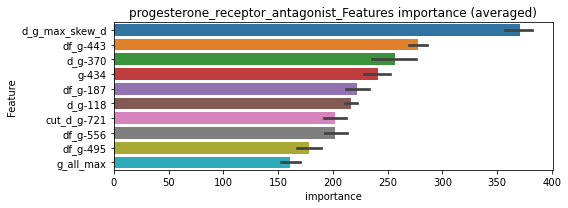

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107516	valid_1's binary_logloss: 0.0144642
[600]	training's binary_logloss: 0.00276379	valid_1's binary_logloss: 0.00433114
[900]	training's binary_logloss: 0.00146682	valid_1's binary_logloss: 0.00248293
[1200]	training's binary_logloss: 0.000996188	valid_1's binary_logloss: 0.00178859
[1500]	training's binary_logloss: 0.000764709	valid_1's binary_logloss: 0.00143041
[1800]	training's binary_logloss: 0.000628714	valid_1's binary_logloss: 0.00121725
[2100]	training's binary_logloss: 0.000541395	valid_1's binary_logloss: 0.00107736
[2400]	training's binary_logloss: 0.000480251	valid_1's binary_logloss: 0.000973091
[2700]	training's binary_logloss: 0.000436158	valid_1's binary_logloss: 0.000900828
[3000]	training's binary_logloss: 0.000402927	valid_1's binary_logloss: 0.000843451
[3300]	training's binary_logloss: 0.000378128	valid_1's binary_logloss: 0.000800998
[3600]	training's binary_loglo

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106754	valid_1's binary_logloss: 0.0144058
[600]	training's binary_logloss: 0.00274385	valid_1's binary_logloss: 0.00445517
[900]	training's binary_logloss: 0.00145368	valid_1's binary_logloss: 0.00259872
[1200]	training's binary_logloss: 0.000991211	valid_1's binary_logloss: 0.00188423
[1500]	training's binary_logloss: 0.000761215	valid_1's binary_logloss: 0.00151917
[1800]	training's binary_logloss: 0.000626041	valid_1's binary_logloss: 0.00129122
[2100]	training's binary_logloss: 0.000539078	valid_1's binary_logloss: 0.00114491
[2400]	training's binary_logloss: 0.000477626	valid_1's binary_logloss: 0.00103774
[2700]	training's binary_logloss: 0.000433108	valid_1's binary_logloss: 0.000958897
[3000]	training's binary_logloss: 0.000401057	valid_1's binary_logloss: 0.00090246
[3300]	training's binary_logloss: 0.000376824	valid_1's binary_logloss: 0.000858399
[3600]	training's binary_logloss

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108956	valid_1's binary_logloss: 0.0135843
[600]	training's binary_logloss: 0.00282326	valid_1's binary_logloss: 0.00405984
[900]	training's binary_logloss: 0.00148993	valid_1's binary_logloss: 0.00235869
[1200]	training's binary_logloss: 0.00101193	valid_1's binary_logloss: 0.0017208
[1500]	training's binary_logloss: 0.000774279	valid_1's binary_logloss: 0.00138542
[1800]	training's binary_logloss: 0.000636859	valid_1's binary_logloss: 0.00119306
[2100]	training's binary_logloss: 0.000546893	valid_1's binary_logloss: 0.00106417
[2400]	training's binary_logloss: 0.000483812	valid_1's binary_logloss: 0.000968612
[2700]	training's binary_logloss: 0.000438952	valid_1's binary_logloss: 0.000905632
[3000]	training's binary_logloss: 0.000405143	valid_1's binary_logloss: 0.000855007
[3300]	training's binary_logloss: 0.000380881	valid_1's binary_logloss: 0.000813901
[3600]	training's binary_logloss

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104666	valid_1's binary_logloss: 0.0167874
[600]	training's binary_logloss: 0.00272437	valid_1's binary_logloss: 0.00649847
[900]	training's binary_logloss: 0.00144442	valid_1's binary_logloss: 0.004355
[1200]	training's binary_logloss: 0.000985851	valid_1's binary_logloss: 0.00343121
[1500]	training's binary_logloss: 0.000758369	valid_1's binary_logloss: 0.00292202
[1800]	training's binary_logloss: 0.000624034	valid_1's binary_logloss: 0.00262584
[2100]	training's binary_logloss: 0.000537223	valid_1's binary_logloss: 0.00239829
[2400]	training's binary_logloss: 0.000476918	valid_1's binary_logloss: 0.00223526
[2700]	training's binary_logloss: 0.00043235	valid_1's binary_logloss: 0.0021122
[3000]	training's binary_logloss: 0.000400117	valid_1's binary_logloss: 0.00202847
[3300]	training's binary_logloss: 0.0003764	valid_1's binary_logloss: 0.00196953
[3600]	training's binary_logloss: 0.0003

progesterone_receptor_antagonist logloss: 0.0010506906069219053


neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894899	valid_1's binary_logloss: 0.0221007
[600]	training's binary_logloss: 0.00118391	valid_1's binary_logloss: 0.00894129
[900]	training's binary_logloss: 0.000541968	valid_1's binary_logloss: 0.0069574
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000523761	valid_1's binary_logloss: 0.00688404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00859792	valid_1's binary_logloss: 0.0281988
[600]	training's binary_logloss: 0.00113723	valid_1's binary_logloss: 0.013915
[900]	training's binary_logloss: 0.000534823	valid_1's binary_logloss: 0.0120201
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000497599	valid_1's binary_logloss: 0.0118348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00913547	valid_1's binary_logloss: 0.0238148
Early stopping, best i

1 / 3 AUC score:1.000
y_Threshold: 0.0045995, Threshold: 0.0203781, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01426, conf_1:0.02649
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0203781
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.0403781
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.0603781
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.0803781
threshold: 0.0803781, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836899	valid_1's binary_logloss: 0.0200613
[600]	training's binary_logloss: 0.00113375	valid_1's binary_logloss: 0.00772571
[900]	training's binary_logloss: 0.000529895	valid_1's binary_logloss: 0.0060647
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000517057	valid_1's binary_logloss: 0.00602662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801686	valid_1's binary_logloss: 0.025146
[600]	training's binary_logloss: 0.00110305	valid_1's binary_logloss: 0.0122806
[900]	training's binary_logloss: 0.000523255	valid_1's binary_logloss: 0.0102495
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00053258	valid_1's binary_logloss: 0.010231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00850577	valid_1's binary_logloss: 0.0232274
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0206458, Threshold: 0.0803781, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0057760 Vs.target_rate: 0.00151, Num_p_label: 23.0, conf_0:0.06430, conf_1:0.09645
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.0803781
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1003781
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.1203781
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_4: 0.1403781
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.1603781
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_6: 0.1803781
threshold: 0.1803781, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00818384	valid_1's binary_logloss: 0.0246739
[600]	training's binary_logloss: 0.00110179	valid_1's binary_logloss: 0.0131888
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00058389	valid_1's binary_logloss: 0.0120581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0084907	valid_1's binary_logloss: 0.0152887
[600]	training's binary_logloss: 0.00116113	valid_1's binary_logloss: 0.00438361
[900]	training's binary_logloss: 0.000535429	valid_1's binary_logloss: 0.00296827
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000482187	valid_1's binary_logloss: 0.0028329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00851707	valid_1's binary_logloss: 0.0152583
[600]	training's binary_logloss: 0.00115601	valid_1's binary_logloss: 0.00423364
[900]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0203616, Threshold: 0.1803781, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0032647 Vs.target_rate: 0.00151, Num_p_label: 13.0, conf_0:0.16234, conf_1:0.19842
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.1803781
threshold: 0.1803781, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


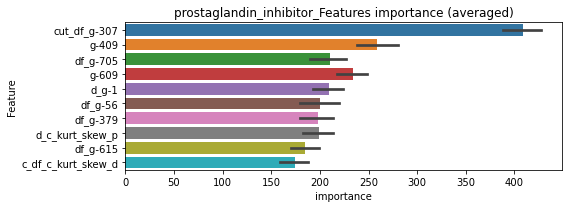

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189887	valid_1's binary_logloss: 0.0365145
[600]	training's binary_logloss: 0.00521356	valid_1's binary_logloss: 0.0192795
[900]	training's binary_logloss: 0.00265101	valid_1's binary_logloss: 0.015253
[1200]	training's binary_logloss: 0.00175778	valid_1's binary_logloss: 0.0138538
[1500]	training's binary_logloss: 0.00132217	valid_1's binary_logloss: 0.0130765
[1800]	training's binary_logloss: 0.00106599	valid_1's binary_logloss: 0.0125081
[2100]	training's binary_logloss: 0.000901122	valid_1's binary_logloss: 0.0120862
[2400]	training's binary_logloss: 0.000785452	valid_1's binary_logloss: 0.0118326
Early stopping, best iteration is:
[2439]	training's binary_logloss: 0.000772323	valid_1's binary_logloss: 0.0117644


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199248	valid_1's binary_logloss: 0.0282235
[600]	training's binary_logloss: 0.00542878	valid_1's binary_logloss: 0.0104698
[900]	training's binary_logloss: 0.00277904	valid_1's binary_logloss: 0.00652639
[1200]	training's binary_logloss: 0.00183407	valid_1's binary_logloss: 0.00504006
[1500]	training's binary_logloss: 0.00137307	valid_1's binary_logloss: 0.00421952
[1800]	training's binary_logloss: 0.001101	valid_1's binary_logloss: 0.00372582
[2100]	training's binary_logloss: 0.000927916	valid_1's binary_logloss: 0.0033497
[2400]	training's binary_logloss: 0.000808985	valid_1's binary_logloss: 0.00311432
[2700]	training's binary_logloss: 0.00072221	valid_1's binary_logloss: 0.00291112
[3000]	training's binary_logloss: 0.000656639	valid_1's binary_logloss: 0.00275954
[3300]	training's binary_logloss: 0.000606798	valid_1's binary_logloss: 0.00264224
[3600]	training's binary_logloss: 0.000569

len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196681	valid_1's binary_logloss: 0.0289237
[600]	training's binary_logloss: 0.00545393	valid_1's binary_logloss: 0.0106733
[900]	training's binary_logloss: 0.0027717	valid_1's binary_logloss: 0.00661348
[1200]	training's binary_logloss: 0.00182865	valid_1's binary_logloss: 0.00497027
[1500]	training's binary_logloss: 0.00136523	valid_1's binary_logloss: 0.0040878
[1800]	training's binary_logloss: 0.00109654	valid_1's binary_logloss: 0.00352865
[2100]	training's binary_logloss: 0.000925382	valid_1's binary_logloss: 0.00318038
[2400]	training's binary_logloss: 0.000807085	valid_1's binary_logloss: 0.00290634
[2700]	training's binary_logloss: 0.000720878	valid_1's binary_logloss: 0.00269183
[3000]	training's binary_logloss: 0.000654533	valid_1's binary_logloss: 0.00253401
[3300]	training's binary_logloss: 0.000605329	valid_1's binary_logloss: 0.00241402
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195468	valid_1's binary_logloss: 0.0356047
[600]	training's binary_logloss: 0.00536196	valid_1's binary_logloss: 0.0156598
[900]	training's binary_logloss: 0.00272299	valid_1's binary_logloss: 0.010908
[1200]	training's binary_logloss: 0.00179265	valid_1's binary_logloss: 0.00897873
[1500]	training's binary_logloss: 0.0013449	valid_1's binary_logloss: 0.00792365
[1800]	training's binary_logloss: 0.00107777	valid_1's binary_logloss: 0.00720595
[2100]	training's binary_logloss: 0.000911099	valid_1's binary_logloss: 0.00676888
[2400]	training's binary_logloss: 0.000794802	valid_1's binary_logloss: 0.00641302
Early stopping, best iteration is:
[2556]	training's binary_logloss: 0.000747479	valid_1's binary_logloss: 0.00627939


prostaglandin_inhibitor logloss: 0.005689038558514464


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280, target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228558	valid_1's binary_logloss: 0.0882726
[600]	training's binary_logloss: 0.00358145	valid_1's binary_logloss: 0.0673302
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00168282	valid_1's binary_logloss: 0.06513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246791	valid_1's binary_logloss: 0.0625369
[600]	training's binary_logloss: 0.0039155	valid_1's binary_logloss: 0.0374919
[900]	training's binary_logloss: 0.00142976	valid_1's binary_logloss: 0.0336558
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.00102912	valid_1's binary_logloss: 0.0326916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256357	valid_1's binary_logloss: 0.0560267
[600]	training's binary_logloss: 0.00404577	valid_1's binary_logloss: 0.0326943
Early stopping, best iteration i

1 / 3 AUC score:0.996
y_Threshold: 0.0116935, Threshold: 0.0602173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00353, Num_p_label: 40.0, conf_0:0.04215, conf_1:0.07828
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0602173
Num_p_label: 33.0, Expected: 14.0, Adj_threshold_2: 0.0802173
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_3: 0.1002173
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_4: 0.1202173
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_5: 0.1402173
threshold: 0.1402173, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214221	valid_1's binary_logloss: 0.0659271
[600]	training's binary_logloss: 0.0033528	valid_1's binary_logloss: 0.0408271
[900]	training's binary_logloss: 0.00127342	valid_1's binary_logloss: 0.0358351
Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000877623	valid_1's binary_logloss: 0.0350227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213024	valid_1's binary_logloss: 0.0726448
[600]	training's binary_logloss: 0.00325354	valid_1's binary_logloss: 0.047352
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00184808	valid_1's binary_logloss: 0.0442066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207101	valid_1's binary_logloss: 0.0526493
[600]	training's binary_logloss: 0.00329995	valid_1's binary_logloss: 0.0268137
[900]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0372490, Threshold: 0.1402173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0123054 Vs.target_rate: 0.00353, Num_p_label: 49.0, conf_0:0.11217, conf_1:0.16826
Num_p_label: 49.0, Expected: 14.0, Adj_threshold_1: 0.1402173
Num_p_label: 47.0, Expected: 14.0, Adj_threshold_2: 0.1602173
Num_p_label: 44.0, Expected: 14.0, Adj_threshold_3: 0.1802173
Num_p_label: 44.0, Expected: 14.0, Adj_threshold_4: 0.2002173
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_5: 0.2202173
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_6: 0.2402173
Num_p_label: 41.0, Expected: 14.0, Adj_threshold_7: 0.2602173
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_8: 0.2802173
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_9: 0.3002173
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_10: 0.3202173
threshold: 0.3402173, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 644.0/3780, y_label_rate: 0.1703704

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198006	valid_1's binary_logloss: 0.0624951
[600]	training's binary_logloss: 0.00298119	valid_1's binary_logloss: 0.0363678
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.0012652	valid_1's binary_logloss: 0.0312591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193725	valid_1's binary_logloss: 0.0640298
[600]	training's binary_logloss: 0.00301049	valid_1's binary_logloss: 0.0441054
[900]	training's binary_logloss: 0.0011727	valid_1's binary_logloss: 0.0403427
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00120403	valid_1's binary_logloss: 0.040284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209271	valid_1's binary_logloss: 0.0565793
[600]	training's binary_logloss: 0.00314553	valid_1's binary_logloss: 0.0295668
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0366190, Threshold: 0.3402173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0097941 Vs.target_rate: 0.00353, Num_p_label: 39.0, conf_0:0.30620, conf_1:0.37424
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_1: 0.3402173
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_2: 0.3602173
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_3: 0.3802173
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_4: 0.4002173
Num_p_label: 31.0, Expected: 14.0, Adj_threshold_5: 0.4202173
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_6: 0.4402173
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_7: 0.4602173
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_8: 0.4802173
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_9: 0.5002173
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_10: 0.5202173
threshold: 0.5402173, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 641.0/3774, y_label_rate: 0.1698463


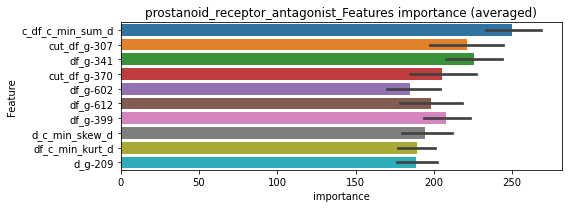

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363785	valid_1's binary_logloss: 0.0756537
[600]	training's binary_logloss: 0.0113186	valid_1's binary_logloss: 0.0461947
[900]	training's binary_logloss: 0.00568952	valid_1's binary_logloss: 0.0376171
[1200]	training's binary_logloss: 0.00364669	valid_1's binary_logloss: 0.0344906
[1500]	training's binary_logloss: 0.00265106	valid_1's binary_logloss: 0.0325706
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.00231361	valid_1's binary_logloss: 0.0318762


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036834	valid_1's binary_logloss: 0.0705836
[600]	training's binary_logloss: 0.0113464	valid_1's binary_logloss: 0.0411943
[900]	training's binary_logloss: 0.00573301	valid_1's binary_logloss: 0.0332245
[1200]	training's binary_logloss: 0.00367074	valid_1's binary_logloss: 0.0298941
[1500]	training's binary_logloss: 0.00267248	valid_1's binary_logloss: 0.0280956
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.0026307	valid_1's binary_logloss: 0.028016


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0365094	valid_1's binary_logloss: 0.0793283
[600]	training's binary_logloss: 0.0111112	valid_1's binary_logloss: 0.0500484
[900]	training's binary_logloss: 0.00559618	valid_1's binary_logloss: 0.042683
[1200]	training's binary_logloss: 0.00358088	valid_1's binary_logloss: 0.0395416
Early stopping, best iteration is:
[1328]	training's binary_logloss: 0.00309058	valid_1's binary_logloss: 0.0385347


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0378252	valid_1's binary_logloss: 0.0659031
[600]	training's binary_logloss: 0.0115991	valid_1's binary_logloss: 0.0369299
[900]	training's binary_logloss: 0.00585331	valid_1's binary_logloss: 0.0292811
[1200]	training's binary_logloss: 0.00374686	valid_1's binary_logloss: 0.0258895
[1500]	training's binary_logloss: 0.00272238	valid_1's binary_logloss: 0.0241026
[1800]	training's binary_logloss: 0.00213947	valid_1's binary_logloss: 0.0230622
Early stopping, best iteration is:
[1782]	training's binary_logloss: 0.00216459	valid_1's binary_logloss: 0.0230182


prostanoid_receptor_antagonist logloss: 0.030361064679697538


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197, target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.447579	valid_1's binary_logloss: 0.476843
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[73]	training's binary_logloss: 0.363497	valid_1's binary_logloss: 0.473723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[72]	training's binary_logloss: 0.357399	valid_1's binary_logloss: 0.472874
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.537
y_Threshold: 0.1978249, Threshold: 0.4241426, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1219 → Positive_corect_labels: 199/2704
p_label_rate: 0.0100452 Vs.target_rate: 0.03049, Num_p_label: 40.0, conf_0:0.29690, conf_1:0.55139
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.4241426
Num_p_label: 67.0, Expected: 121.4, Adj_threshold_2: 0.4041426
Num_p_label: 95.0, Expected: 121.4, Adj_threshold_3: 0.3841426
Num_p_label: 114.0, Expected: 121.4, Adj_threshold_4: 0.3641426
Num_p_label: 131.0, Expected: 121.4, Adj_threshold_5: 0.3441426
Num_p_label: 139.0, Expected: 121.4, Adj_threshold_6: 0.3241426
Num_p_label: 141.0, Expected: 121.4, Adj_threshold_7: 0.3041426
Num_p_label: 147.0, Expected: 121.4, Adj_threshold_8: 0.2841426
Num_p_label: 158.0, Expected: 121.4, Adj_threshold_9: 0.2641426
Num_p_label: 186.0, Expected: 121.4, Adj_threshold_10: 0.2441426
threshold: 0.2241426, positive_p_label: 283.0/3982, p_label_rate: 0.0710698
positive_y_label: 199.0/2704, y_lab

Early stopping, best iteration is:
[23]	training's binary_logloss: 0.431538	valid_1's binary_logloss: 0.47804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[127]	training's binary_logloss: 0.0649305	valid_1's binary_logloss: 0.196554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[116]	training's binary_logloss: 0.0714425	valid_1's binary_logloss: 0.196617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[122]	training's binary_logloss: 0.068978	valid_1's binary_logloss: 0.195198
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.839
y_Threshold: 0.1127015, Threshold: 0.2241426, pos_neg_ratio: 0.7729121
Remove_noisy_data: 224 → Positive_corect_labels: 87.0/2480
p_label_rate: 0.0894023 Vs.target_rate: 0.03049, Num_p_label: 356.0, conf_0:0.17931, conf_1:0.26897
Num_p_label: 356.0, Expected: 121.4, Adj_threshold_1: 0.2241426
Num_p_label: 327.0, Expected: 121.4, Adj_threshold_2: 0.2441426
Num_p_label: 306.0, Expected: 121.4, Adj_threshold_3: 0.2641426
Num_p_label: 296.0, Expected: 121.4, Adj_threshold_4: 0.2841426
Num_p_label: 275.0, Expected: 121.4, Adj_threshold_5: 0.3041426
Num_p_label: 266.0, Expected: 121.4, Adj_threshold_6: 0.3241426
Num_p_label: 258.0, Expected: 121.4, Adj_threshold_7: 0.3441426
Num_p_label: 251.0, Expected: 121.4, Adj_threshold_8: 0.3641426
Num_p_label: 240.0, Expected: 121.4, Adj_threshold_9: 0.3841426
Num_p_label: 236.0, Expected: 121.4, Adj_threshold_10: 0.4041426
threshold: 0.4241426, positive_p_label: 231.0/3982, p_label_rate: 0.0580110
positive_y_label: 87.0/2480, y_

Early stopping, best iteration is:
[95]	training's binary_logloss: 0.0855843	valid_1's binary_logloss: 0.204454
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00685298	valid_1's binary_logloss: 0.0391268
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[141]	training's binary_logloss: 0.011814	valid_1's binary_logloss: 0.0599077
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00621357	valid_1's binary_logloss: 0.034677
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.986
y_Threshold: 0.1042753, Threshold: 0.4241426, pos_neg_ratio: 0.7729121
Remove_noisy_data: 44 → Positive_corect_labels: 65.0/2436
p_label_rate: 0.0851331 Vs.target_rate: 0.03049, Num_p_label: 339.0, conf_0:0.38173, conf_1:0.46656
Num_p_label: 339.0, Expected: 121.4, Adj_threshold_1: 0.4241426
Num_p_label: 337.0, Expected: 121.4, Adj_threshold_2: 0.4441426
Num_p_label: 330.0, Expected: 121.4, Adj_threshold_3: 0.4641426
Num_p_label: 328.0, Expected: 121.4, Adj_threshold_4: 0.4841426
Num_p_label: 327.0, Expected: 121.4, Adj_threshold_5: 0.5041426
Num_p_label: 323.0, Expected: 121.4, Adj_threshold_6: 0.5241426
Num_p_label: 322.0, Expected: 121.4, Adj_threshold_7: 0.5441426
Num_p_label: 314.0, Expected: 121.4, Adj_threshold_8: 0.5641426
Num_p_label: 310.0, Expected: 121.4, Adj_threshold_9: 0.5841426
Num_p_label: 308.0, Expected: 121.4, Adj_threshold_10: 0.6041426
threshold: 0.6241426, positive_p_label: 307.0/3982, p_label_rate: 0.0770969
positive_y_label: 65.0/2436, y_l

Early stopping, best iteration is:
[149]	training's binary_logloss: 0.011338	valid_1's binary_logloss: 0.0611482


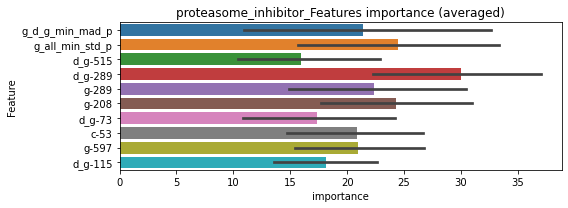

len(train_index) : 1827
len(valid_index) : 609
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279777	valid_1's binary_logloss: 0.0117472
[600]	training's binary_logloss: 0.00107425	valid_1's binary_logloss: 0.0108801
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000878911	valid_1's binary_logloss: 0.0108469


len(train_index) : 1827
len(valid_index) : 609
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1827
len(valid_index) : 609
================================= fold 3/4 proteasome_inhibitor=================================


[300]	training's binary_logloss: 0.00283397	valid_1's binary_logloss: 0.0132795
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00256311	valid_1's binary_logloss: 0.0130978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031732	valid_1's binary_logloss: 0.0052123
[600]	training's binary_logloss: 0.00123344	valid_1's binary_logloss: 0.00322179
[900]	training's binary_logloss: 0.000766059	valid_1's binary_logloss: 0.00268818
[1200]	training's binary_logloss: 0.000565707	valid_1's binary_logloss: 0.00244931
[1500]	training's binary_logloss: 0.000454581	valid_1's binary_logloss: 0.00229412
[1800]	training's binary_logloss: 0.000386327	valid_1's binary_logloss: 0.00220108
[2100]	training's binary_logloss: 0.000340296	valid_1's binary_logloss: 0.00212267
[2400]	training's binary_logloss: 0.000307305	valid_1's binary_logloss: 0.00205356
[2700]	training's binary_logloss: 0.000282509	valid_1's binary_logloss: 0.00200787
[300

len(train_index) : 1827
len(valid_index) : 609
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304935	valid_1's binary_logloss: 0.0052575
[600]	training's binary_logloss: 0.00119067	valid_1's binary_logloss: 0.00312672
[900]	training's binary_logloss: 0.000745988	valid_1's binary_logloss: 0.00247034
[1200]	training's binary_logloss: 0.000557104	valid_1's binary_logloss: 0.00220382
[1500]	training's binary_logloss: 0.000454446	valid_1's binary_logloss: 0.00201085
[1800]	training's binary_logloss: 0.000389514	valid_1's binary_logloss: 0.0019006
[2100]	training's binary_logloss: 0.000345362	valid_1's binary_logloss: 0.00180572
[2400]	training's binary_logloss: 0.000313604	valid_1's binary_logloss: 0.00173235
[2700]	training's binary_logloss: 0.000289838	valid_1's binary_logloss: 0.00167989
[3000]	training's binary_logloss: 0.000271888	valid_1's binary_logloss: 0.00164327
[3300]	training's binary_logloss: 0.000257591	valid_1's binary_logloss: 0.0016111
[3600]	training's binary_logloss: 

proteasome_inhibitor logloss: 0.006858820166518649


neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128335	valid_1's binary_logloss: 0.039872
[600]	training's binary_logloss: 0.00173408	valid_1's binary_logloss: 0.0214522
[900]	training's binary_logloss: 0.000749778	valid_1's binary_logloss: 0.0188772
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.00057568	valid_1's binary_logloss: 0.0183513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125835	valid_1's binary_logloss: 0.0376088
[600]	training's binary_logloss: 0.00168012	valid_1's binary_logloss: 0.0224574
[900]	training's binary_logloss: 0.000728761	valid_1's binary_logloss: 0.0203777
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000700333	valid_1's binary_logloss: 0.0202748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134527	valid_1's binary_logloss: 0.0235116
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0050122, Threshold: 0.0123053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.00861, conf_1:0.01600
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0123053
Num_p_label: 8.0, Expected: 8.0, Adj_threshold_2: 0.0323053
threshold: 0.0323053, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122658	valid_1's binary_logloss: 0.0389741
[600]	training's binary_logloss: 0.00165574	valid_1's binary_logloss: 0.0212291
[900]	training's binary_logloss: 0.000720793	valid_1's binary_logloss: 0.0190154
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000631169	valid_1's binary_logloss: 0.0187759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122668	valid_1's binary_logloss: 0.0354224
[600]	training's binary_logloss: 0.00162393	valid_1's binary_logloss: 0.0196683
[900]	training's binary_logloss: 0.000708789	valid_1's binary_logloss: 0.0175946
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00068236	valid_1's binary_logloss: 0.0174174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123149	valid_1's binary_logloss: 0.0216995
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0247361, Threshold: 0.0323053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0070316 Vs.target_rate: 0.00202, Num_p_label: 28.0, conf_0:0.02584, conf_1:0.03877
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_1: 0.0323053
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_2: 0.0523053
threshold: 0.0523053, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118081	valid_1's binary_logloss: 0.0332294
[600]	training's binary_logloss: 0.00159969	valid_1's binary_logloss: 0.0156484
[900]	training's binary_logloss: 0.000706214	valid_1's binary_logloss: 0.0132709
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000595237	valid_1's binary_logloss: 0.012926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126268	valid_1's binary_logloss: 0.0266379
[600]	training's binary_logloss: 0.00169605	valid_1's binary_logloss: 0.0096267
[900]	training's binary_logloss: 0.000730375	valid_1's binary_logloss: 0.00699154
[1200]	training's binary_logloss: 0.000555399	valid_1's binary_logloss: 0.00648391
Early stopping, best iteration is:
[1170]	training's binary_logloss: 0.00056006	valid_1's binary_logloss: 0.00646617
Training until validation scores don't improve for 30 rounds
[300]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0195190, Threshold: 0.0523053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0035158 Vs.target_rate: 0.00202, Num_p_label: 14.0, conf_0:0.04707, conf_1:0.05754
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0523053
threshold: 0.0523053, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


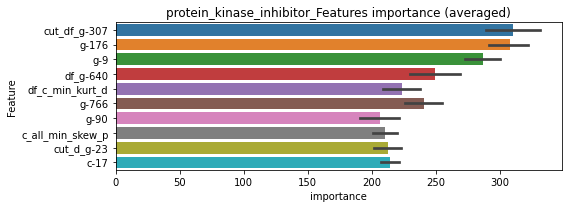

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024393	valid_1's binary_logloss: 0.0455762
[600]	training's binary_logloss: 0.00700939	valid_1's binary_logloss: 0.0216349
[900]	training's binary_logloss: 0.00356248	valid_1's binary_logloss: 0.015551
[1200]	training's binary_logloss: 0.00232201	valid_1's binary_logloss: 0.0131855
[1500]	training's binary_logloss: 0.00172469	valid_1's binary_logloss: 0.0118767
[1800]	training's binary_logloss: 0.00137738	valid_1's binary_logloss: 0.0110948
[2100]	training's binary_logloss: 0.00115294	valid_1's binary_logloss: 0.0104632
[2400]	training's binary_logloss: 0.000999034	valid_1's binary_logloss: 0.0100421
[2700]	training's binary_logloss: 0.000888347	valid_1's binary_logloss: 0.0097594
Early stopping, best iteration is:
[2948]	training's binary_logloss: 0.000816934	valid_1's binary_logloss: 0.00954608


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256349	valid_1's binary_logloss: 0.0415602
[600]	training's binary_logloss: 0.00727152	valid_1's binary_logloss: 0.0190548
[900]	training's binary_logloss: 0.00368739	valid_1's binary_logloss: 0.0135728
[1200]	training's binary_logloss: 0.00239651	valid_1's binary_logloss: 0.0113548
[1500]	training's binary_logloss: 0.00177144	valid_1's binary_logloss: 0.0101363
[1800]	training's binary_logloss: 0.00141385	valid_1's binary_logloss: 0.0094154
[2100]	training's binary_logloss: 0.00118375	valid_1's binary_logloss: 0.00899895
[2400]	training's binary_logloss: 0.00102627	valid_1's binary_logloss: 0.00862627
[2700]	training's binary_logloss: 0.00091144	valid_1's binary_logloss: 0.00841965
Early stopping, best iteration is:
[2841]	training's binary_logloss: 0.000867896	valid_1's binary_logloss: 0.00829431


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254287	valid_1's binary_logloss: 0.0460674
[600]	training's binary_logloss: 0.00713834	valid_1's binary_logloss: 0.0230612
[900]	training's binary_logloss: 0.00363046	valid_1's binary_logloss: 0.0178717
[1200]	training's binary_logloss: 0.00235986	valid_1's binary_logloss: 0.0158213
[1500]	training's binary_logloss: 0.00175196	valid_1's binary_logloss: 0.0146571
Early stopping, best iteration is:
[1533]	training's binary_logloss: 0.00170467	valid_1's binary_logloss: 0.0145449


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262839	valid_1's binary_logloss: 0.0423447
[600]	training's binary_logloss: 0.00738459	valid_1's binary_logloss: 0.0177702
[900]	training's binary_logloss: 0.00371345	valid_1's binary_logloss: 0.011656
[1200]	training's binary_logloss: 0.00241557	valid_1's binary_logloss: 0.00936177
[1500]	training's binary_logloss: 0.00178259	valid_1's binary_logloss: 0.00806635
[1800]	training's binary_logloss: 0.00141949	valid_1's binary_logloss: 0.00723122
[2100]	training's binary_logloss: 0.00118883	valid_1's binary_logloss: 0.00668576
[2400]	training's binary_logloss: 0.00102999	valid_1's binary_logloss: 0.0062647
[2700]	training's binary_logloss: 0.000914528	valid_1's binary_logloss: 0.00596286
[3000]	training's binary_logloss: 0.000827412	valid_1's binary_logloss: 0.00569876
[3300]	training's binary_logloss: 0.000760855	valid_1's binary_logloss: 0.0055038
Early stopping, best iteration is:
[3447]	tr

protein_kinase_inhibitor logloss: 0.009452623922009167


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547205	valid_1's binary_logloss: 0.0149029
[600]	training's binary_logloss: 0.000760339	valid_1's binary_logloss: 0.00706511
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000441032	valid_1's binary_logloss: 0.00620645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544966	valid_1's binary_logloss: 0.0134701
[600]	training's binary_logloss: 0.000752206	valid_1's binary_logloss: 0.00511019
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000428418	valid_1's binary_logloss: 0.00408211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580709	valid_1's binary_logloss: 0.00849623
[600]	training's binary_logloss: 0.000783129	valid_1's binary_logloss: 0.00173065
[900]	training's binary_logloss: 0.000429279	valid_1's binary_logloss: 0.00111037
Early stopping

1 / 3 AUC score:1.000
y_Threshold: 0.0022473, Threshold: 0.0070280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00492, conf_1:0.00914
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0070280
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0270280
threshold: 0.0270280, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515478	valid_1's binary_logloss: 0.0126283
[600]	training's binary_logloss: 0.000723603	valid_1's binary_logloss: 0.00625068
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000429321	valid_1's binary_logloss: 0.0055216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512433	valid_1's binary_logloss: 0.0129834
[600]	training's binary_logloss: 0.000712999	valid_1's binary_logloss: 0.00463205
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000414055	valid_1's binary_logloss: 0.00368133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534909	valid_1's binary_logloss: 0.00791444
[600]	training's binary_logloss: 0.000740717	valid_1's binary_logloss: 0.00153301
[900]	training's binary_logloss: 0.000414296	valid_1's binary_logloss: 0.000966005
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.0282678, Threshold: 0.0270280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0032647 Vs.target_rate: 0.00101, Num_p_label: 13.0, conf_0:0.02162, conf_1:0.03243
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0270280
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0470280
threshold: 0.0470280, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515478	valid_1's binary_logloss: 0.0126283
[600]	training's binary_logloss: 0.000723603	valid_1's binary_logloss: 0.00625068
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000429321	valid_1's binary_logloss: 0.0055216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512433	valid_1's binary_logloss: 0.0129834
[600]	training's binary_logloss: 0.000712999	valid_1's binary_logloss: 0.00463205
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000414055	valid_1's binary_logloss: 0.00368133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534909	valid_1's binary_logloss: 0.00791444
[600]	training's binary_logloss: 0.000740717	valid_1's binary_logloss: 0.00153301
[900]	training's binary_logloss: 0.000414296	valid_1's binary_logloss: 0.000966005
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.0282678, Threshold: 0.0470280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00101, Num_p_label: 6.0, conf_0:0.04233, conf_1:0.05173
threshold: 0.0470280, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


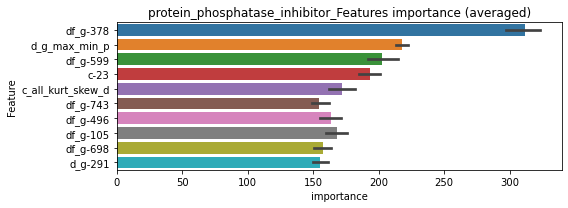

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136447	valid_1's binary_logloss: 0.0222201
[600]	training's binary_logloss: 0.00367304	valid_1's binary_logloss: 0.00977382
[900]	training's binary_logloss: 0.001935	valid_1's binary_logloss: 0.00718701
[1200]	training's binary_logloss: 0.00130692	valid_1's binary_logloss: 0.00614864
[1500]	training's binary_logloss: 0.000994421	valid_1's binary_logloss: 0.00562178
[1800]	training's binary_logloss: 0.000813332	valid_1's binary_logloss: 0.00531415
[2100]	training's binary_logloss: 0.000696694	valid_1's binary_logloss: 0.00505464
[2400]	training's binary_logloss: 0.000614308	valid_1's binary_logloss: 0.00487076
[2700]	training's binary_logloss: 0.000554014	valid_1's binary_logloss: 0.0047509
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.000529245	valid_1's binary_logloss: 0.00468814


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135894	valid_1's binary_logloss: 0.0248091
[600]	training's binary_logloss: 0.00367592	valid_1's binary_logloss: 0.0103339
[900]	training's binary_logloss: 0.00192629	valid_1's binary_logloss: 0.00711092
[1200]	training's binary_logloss: 0.00130203	valid_1's binary_logloss: 0.00580541
[1500]	training's binary_logloss: 0.000994135	valid_1's binary_logloss: 0.00512186
[1800]	training's binary_logloss: 0.000811545	valid_1's binary_logloss: 0.00462062
[2100]	training's binary_logloss: 0.000694635	valid_1's binary_logloss: 0.0043144
[2400]	training's binary_logloss: 0.000613225	valid_1's binary_logloss: 0.00408655
[2700]	training's binary_logloss: 0.000553191	valid_1's binary_logloss: 0.00390465
[3000]	training's binary_logloss: 0.000508215	valid_1's binary_logloss: 0.00376745
[3300]	training's binary_logloss: 0.000473919	valid_1's binary_logloss: 0.00366486
Early stopping, best iteration is:
[3

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140529	valid_1's binary_logloss: 0.017945
[600]	training's binary_logloss: 0.00378603	valid_1's binary_logloss: 0.00566084
[900]	training's binary_logloss: 0.00197174	valid_1's binary_logloss: 0.00324259
[1200]	training's binary_logloss: 0.00133249	valid_1's binary_logloss: 0.00236179
[1500]	training's binary_logloss: 0.00101288	valid_1's binary_logloss: 0.00190581
[1800]	training's binary_logloss: 0.000828996	valid_1's binary_logloss: 0.00162491
[2100]	training's binary_logloss: 0.000709503	valid_1's binary_logloss: 0.00144675
[2400]	training's binary_logloss: 0.000625438	valid_1's binary_logloss: 0.00131002
[2700]	training's binary_logloss: 0.000562398	valid_1's binary_logloss: 0.00120919
[3000]	training's binary_logloss: 0.000515621	valid_1's binary_logloss: 0.00113408
[3300]	training's binary_logloss: 0.000480841	valid_1's binary_logloss: 0.00107856
[3600]	training's binary_logloss: 0.0

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013892	valid_1's binary_logloss: 0.0214278
[600]	training's binary_logloss: 0.00375085	valid_1's binary_logloss: 0.00794456
[900]	training's binary_logloss: 0.00196365	valid_1's binary_logloss: 0.00523378
[1200]	training's binary_logloss: 0.00132566	valid_1's binary_logloss: 0.00402973
[1500]	training's binary_logloss: 0.00100898	valid_1's binary_logloss: 0.00346134
[1800]	training's binary_logloss: 0.000826147	valid_1's binary_logloss: 0.00310247
[2100]	training's binary_logloss: 0.000705713	valid_1's binary_logloss: 0.00286051
[2400]	training's binary_logloss: 0.000622267	valid_1's binary_logloss: 0.00266422
[2700]	training's binary_logloss: 0.000560409	valid_1's binary_logloss: 0.0025172
[3000]	training's binary_logloss: 0.000514767	valid_1's binary_logloss: 0.0024081
[3300]	training's binary_logloss: 0.000479182	valid_1's binary_logloss: 0.00230279
[3600]	training's binary_logloss: 0.000

protein_phosphatase_inhibitor logloss: 0.0028858830041115337


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278, target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0297318	valid_1's binary_logloss: 0.100073
[600]	training's binary_logloss: 0.00488156	valid_1's binary_logloss: 0.0699268
[900]	training's binary_logloss: 0.00173531	valid_1's binary_logloss: 0.0632766
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00173531	valid_1's binary_logloss: 0.0632766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0297993	valid_1's binary_logloss: 0.0897781
[600]	training's binary_logloss: 0.00505152	valid_1's binary_logloss: 0.0560559
[900]	training's binary_logloss: 0.00175854	valid_1's binary_logloss: 0.0491071
Early stopping, best iteration is:
[1163]	training's binary_logloss: 0.00109604	valid_1's binary_logloss: 0.0472754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0342534	valid_1's binary_logloss: 0.0842264
[600]	training's binary_loglos

1 / 3 AUC score:0.996
y_Threshold: 0.0135907, Threshold: 0.0737336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00433, Num_p_label: 40.0, conf_0:0.05161, conf_1:0.09585
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0737336
Num_p_label: 32.0, Expected: 17.2, Adj_threshold_2: 0.0937336
Num_p_label: 31.0, Expected: 17.2, Adj_threshold_3: 0.1137336
Num_p_label: 26.0, Expected: 17.2, Adj_threshold_4: 0.1337336
Num_p_label: 21.0, Expected: 17.2, Adj_threshold_5: 0.1537336
threshold: 0.1537336, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282417	valid_1's binary_logloss: 0.0851838
[600]	training's binary_logloss: 0.00455874	valid_1's binary_logloss: 0.0515162
[900]	training's binary_logloss: 0.00163522	valid_1's binary_logloss: 0.0448682
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.00132694	valid_1's binary_logloss: 0.0441352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0270336	valid_1's binary_logloss: 0.0949008
[600]	training's binary_logloss: 0.00442159	valid_1's binary_logloss: 0.0633737
[900]	training's binary_logloss: 0.0016055	valid_1's binary_logloss: 0.0575046
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.00166184	valid_1's binary_logloss: 0.0573653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287552	valid_1's binary_logloss: 0.0760658
[600]	training's binary_loglos

2 / 3 AUC score:0.998
y_Threshold: 0.0384827, Threshold: 0.1537336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 627.0/3745
p_label_rate: 0.0092918 Vs.target_rate: 0.00433, Num_p_label: 37.0, conf_0:0.12299, conf_1:0.18448
Num_p_label: 37.0, Expected: 17.2, Adj_threshold_1: 0.1537336
Num_p_label: 32.0, Expected: 17.2, Adj_threshold_2: 0.1737336
Num_p_label: 30.0, Expected: 17.2, Adj_threshold_3: 0.1937336
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_4: 0.2137336
Num_p_label: 21.0, Expected: 17.2, Adj_threshold_5: 0.2337336
threshold: 0.2337336, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/3745, y_label_rate: 0.1674232
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242479	valid_1's binary_logloss: 0.0880152
[600]	training's binary_logloss: 0.00379306	valid_1's binary_logloss: 0.0592903
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.0017728	valid_1's binary_logloss: 0.0555087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024942	valid_1's binary_logloss: 0.0746208
[600]	training's binary_logloss: 0.00393187	valid_1's binary_logloss: 0.0446252
[900]	training's binary_logloss: 0.00146355	valid_1's binary_logloss: 0.0380455
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.00102047	valid_1's binary_logloss: 0.0365827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262895	valid_1's binary_logloss: 0.0617424
[600]	training's binary_logloss: 0.00423101	valid_1's binary_logloss: 0.0301848
[900]	training's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0472124, Threshold: 0.2337336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 620.0/3731
p_label_rate: 0.0067805 Vs.target_rate: 0.00433, Num_p_label: 27.0, conf_0:0.21036, conf_1:0.25711
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_1: 0.2337336
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_2: 0.2537336
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_3: 0.2737336
threshold: 0.2737336, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 620.0/3731, y_label_rate: 0.1661753


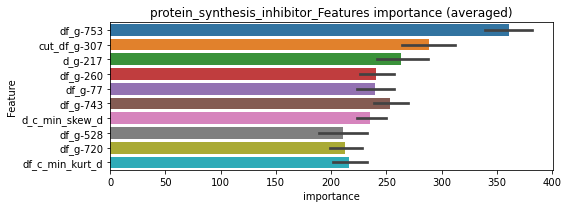

len(train_index) : 2798
len(valid_index) : 933
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0420218	valid_1's binary_logloss: 0.0971857
[600]	training's binary_logloss: 0.0131715	valid_1's binary_logloss: 0.0615605
[900]	training's binary_logloss: 0.00662729	valid_1's binary_logloss: 0.0508282
[1200]	training's binary_logloss: 0.00421379	valid_1's binary_logloss: 0.0460789
[1500]	training's binary_logloss: 0.00305525	valid_1's binary_logloss: 0.0440497
Early stopping, best iteration is:
[1651]	training's binary_logloss: 0.00268387	valid_1's binary_logloss: 0.0431415


len(train_index) : 2798
len(valid_index) : 933
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0438856	valid_1's binary_logloss: 0.0823713
[600]	training's binary_logloss: 0.0136999	valid_1's binary_logloss: 0.0451743
[900]	training's binary_logloss: 0.00687698	valid_1's binary_logloss: 0.0348082
[1200]	training's binary_logloss: 0.0043717	valid_1's binary_logloss: 0.0303282
[1500]	training's binary_logloss: 0.00314883	valid_1's binary_logloss: 0.0278983
[1800]	training's binary_logloss: 0.00246034	valid_1's binary_logloss: 0.0263162
[2100]	training's binary_logloss: 0.00202441	valid_1's binary_logloss: 0.0252973
Early stopping, best iteration is:
[2073]	training's binary_logloss: 0.00205642	valid_1's binary_logloss: 0.0252604


len(train_index) : 2798
len(valid_index) : 933
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434967	valid_1's binary_logloss: 0.0854845
[600]	training's binary_logloss: 0.0135263	valid_1's binary_logloss: 0.053764
[900]	training's binary_logloss: 0.00674869	valid_1's binary_logloss: 0.0456542
[1200]	training's binary_logloss: 0.00430348	valid_1's binary_logloss: 0.0424023
Early stopping, best iteration is:
[1336]	training's binary_logloss: 0.00367136	valid_1's binary_logloss: 0.0415123


len(train_index) : 2799
len(valid_index) : 932
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426715	valid_1's binary_logloss: 0.0834539
[600]	training's binary_logloss: 0.0134471	valid_1's binary_logloss: 0.0499457
[900]	training's binary_logloss: 0.00679856	valid_1's binary_logloss: 0.0402858
[1200]	training's binary_logloss: 0.00434013	valid_1's binary_logloss: 0.0366825
[1500]	training's binary_logloss: 0.00313858	valid_1's binary_logloss: 0.0345491
[1800]	training's binary_logloss: 0.00245293	valid_1's binary_logloss: 0.0334405
Early stopping, best iteration is:
[1786]	training's binary_logloss: 0.00247655	valid_1's binary_logloss: 0.0333783


protein_synthesis_inhibitor logloss: 0.03582379484942427


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550823	valid_1's binary_logloss: 0.0103485
[600]	training's binary_logloss: 0.000685265	valid_1's binary_logloss: 0.00296908
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000406998	valid_1's binary_logloss: 0.00253743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544792	valid_1's binary_logloss: 0.013295
[600]	training's binary_logloss: 0.000668951	valid_1's binary_logloss: 0.00477041
[900]	training's binary_logloss: 0.000374978	valid_1's binary_logloss: 0.00386544
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000381742	valid_1's binary_logloss: 0.00385709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550899	valid_1's binary_logloss: 0.0078852
[600]	training's binary_logloss: 0.000683121	valid_1's binary_logloss: 0.00124297
[900]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0017629, Threshold: 0.0077155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00540, conf_1:0.01003
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0077155
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0277155
threshold: 0.0277155, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529417	valid_1's binary_logloss: 0.0100617
[600]	training's binary_logloss: 0.000660588	valid_1's binary_logloss: 0.00324046
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000393537	valid_1's binary_logloss: 0.00274462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052341	valid_1's binary_logloss: 0.012252
[600]	training's binary_logloss: 0.000644233	valid_1's binary_logloss: 0.00381849
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000371026	valid_1's binary_logloss: 0.00303418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517753	valid_1's binary_logloss: 0.00737895
[600]	training's binary_logloss: 0.000667158	valid_1's binary_logloss: 0.00114195
[900]	training's binary_logloss: 0.000371284	valid_1's binary_logloss: 0.000692201
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.0377605, Threshold: 0.0277155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00080, Num_p_label: 24.0, conf_0:0.02217, conf_1:0.03326
Num_p_label: 24.0, Expected: 3.2, Adj_threshold_1: 0.0277155
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_2: 0.0477155
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.0677155
threshold: 0.0677155, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529417	valid_1's binary_logloss: 0.0100617
[600]	training's binary_logloss: 0.000660588	valid_1's binary_logloss: 0.00324046
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000393537	valid_1's binary_logloss: 0.00274462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052341	valid_1's binary_logloss: 0.012252
[600]	training's binary_logloss: 0.000644233	valid_1's binary_logloss: 0.00381849
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000371026	valid_1's binary_logloss: 0.00303418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517753	valid_1's binary_logloss: 0.00737895
[600]	training's binary_logloss: 0.000667158	valid_1's binary_logloss: 0.00114195
[900]	training's binary_logloss: 0.000371284	valid_1's binary_logloss: 0.000692201
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.0377605, Threshold: 0.0677155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.06094, conf_1:0.07449
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0677155
threshold: 0.0677155, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


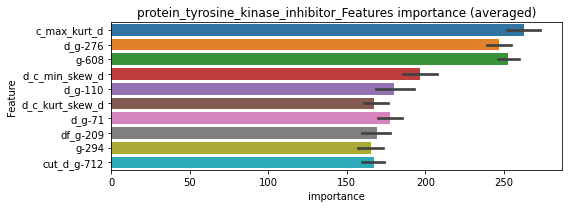

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132007	valid_1's binary_logloss: 0.0193737
[600]	training's binary_logloss: 0.00335587	valid_1's binary_logloss: 0.00730997
[900]	training's binary_logloss: 0.0017484	valid_1's binary_logloss: 0.00510552
[1200]	training's binary_logloss: 0.00117996	valid_1's binary_logloss: 0.00427177
[1500]	training's binary_logloss: 0.000901517	valid_1's binary_logloss: 0.00382646
[1800]	training's binary_logloss: 0.00073882	valid_1's binary_logloss: 0.00353183
[2100]	training's binary_logloss: 0.000632121	valid_1's binary_logloss: 0.00335553
[2400]	training's binary_logloss: 0.000559757	valid_1's binary_logloss: 0.00321549
[2700]	training's binary_logloss: 0.000506304	valid_1's binary_logloss: 0.00312026
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.000472015	valid_1's binary_logloss: 0.00304007


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129667	valid_1's binary_logloss: 0.0222393
[600]	training's binary_logloss: 0.00327089	valid_1's binary_logloss: 0.00869962
[900]	training's binary_logloss: 0.00170629	valid_1's binary_logloss: 0.00587553
[1200]	training's binary_logloss: 0.00115198	valid_1's binary_logloss: 0.00482101
[1500]	training's binary_logloss: 0.000880751	valid_1's binary_logloss: 0.00413123
[1800]	training's binary_logloss: 0.000723871	valid_1's binary_logloss: 0.00373064
[2100]	training's binary_logloss: 0.000620917	valid_1's binary_logloss: 0.0034833
[2400]	training's binary_logloss: 0.000548991	valid_1's binary_logloss: 0.00327249
[2700]	training's binary_logloss: 0.000496672	valid_1's binary_logloss: 0.00309643
Early stopping, best iteration is:
[2842]	training's binary_logloss: 0.000475741	valid_1's binary_logloss: 0.00303634


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132856	valid_1's binary_logloss: 0.0169913
[600]	training's binary_logloss: 0.00340419	valid_1's binary_logloss: 0.00488098
[900]	training's binary_logloss: 0.00177311	valid_1's binary_logloss: 0.0027195
[1200]	training's binary_logloss: 0.00119629	valid_1's binary_logloss: 0.00190555
[1500]	training's binary_logloss: 0.000912213	valid_1's binary_logloss: 0.00150326
[1800]	training's binary_logloss: 0.00074703	valid_1's binary_logloss: 0.00125813
[2100]	training's binary_logloss: 0.00063984	valid_1's binary_logloss: 0.00109683
[2400]	training's binary_logloss: 0.000564765	valid_1's binary_logloss: 0.000979714
[2700]	training's binary_logloss: 0.000510525	valid_1's binary_logloss: 0.000900263
[3000]	training's binary_logloss: 0.000469947	valid_1's binary_logloss: 0.000838066
[3300]	training's binary_logloss: 0.000438955	valid_1's binary_logloss: 0.000789599
[3600]	training's binary_logloss: 

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134693	valid_1's binary_logloss: 0.0166772
[600]	training's binary_logloss: 0.00337685	valid_1's binary_logloss: 0.00485139
[900]	training's binary_logloss: 0.00175216	valid_1's binary_logloss: 0.00277892
[1200]	training's binary_logloss: 0.00118604	valid_1's binary_logloss: 0.00201756
[1500]	training's binary_logloss: 0.000905929	valid_1's binary_logloss: 0.0016309
[1800]	training's binary_logloss: 0.000741684	valid_1's binary_logloss: 0.00139003
[2100]	training's binary_logloss: 0.000636853	valid_1's binary_logloss: 0.0012331
[2400]	training's binary_logloss: 0.000562446	valid_1's binary_logloss: 0.00112149
[2700]	training's binary_logloss: 0.000508006	valid_1's binary_logloss: 0.00103993
[3000]	training's binary_logloss: 0.000467146	valid_1's binary_logloss: 0.000975979
[3300]	training's binary_logloss: 0.000436893	valid_1's binary_logloss: 0.000929037
[3600]	training's binary_logloss: 0

protein_tyrosine_kinase_inhibitor logloss: 0.0018995516994646069


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157276	valid_1's binary_logloss: 0.0537324
[600]	training's binary_logloss: 0.00219058	valid_1's binary_logloss: 0.030423
[900]	training's binary_logloss: 0.000906622	valid_1's binary_logloss: 0.0262984
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000638955	valid_1's binary_logloss: 0.0254216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168086	valid_1's binary_logloss: 0.0357165
[600]	training's binary_logloss: 0.00231075	valid_1's binary_logloss: 0.011879
[900]	training's binary_logloss: 0.000944033	valid_1's binary_logloss: 0.0084119
[1200]	training's binary_logloss: 0.000655751	valid_1's binary_logloss: 0.00756673
Early stopping, best iteration is:
[1224]	training's binary_logloss: 0.000648932	valid_1's binary_logloss: 0.00751344
Training until validation scores don't improve for 30 rounds
[300]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0054267, Threshold: 0.0164381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.01151, conf_1:0.02137
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0164381
Num_p_label: 10.0, Expected: 9.4, Adj_threshold_2: 0.0364381
threshold: 0.0364381, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150739	valid_1's binary_logloss: 0.0526448
[600]	training's binary_logloss: 0.00206517	valid_1's binary_logloss: 0.0297593
[900]	training's binary_logloss: 0.000859872	valid_1's binary_logloss: 0.0260523
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000713071	valid_1's binary_logloss: 0.0255213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157514	valid_1's binary_logloss: 0.0353325
[600]	training's binary_logloss: 0.00217308	valid_1's binary_logloss: 0.012322
[900]	training's binary_logloss: 0.000900715	valid_1's binary_logloss: 0.00876036
Early stopping, best iteration is:
[1160]	training's binary_logloss: 0.000649924	valid_1's binary_logloss: 0.00788619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168915	valid_1's binary_logloss: 0.0303264
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0266637, Threshold: 0.0364381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0062783 Vs.target_rate: 0.00235, Num_p_label: 25.0, conf_0:0.02915, conf_1:0.04373
Num_p_label: 25.0, Expected: 9.4, Adj_threshold_1: 0.0364381
Num_p_label: 14.0, Expected: 9.4, Adj_threshold_2: 0.0564381
threshold: 0.0564381, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151056	valid_1's binary_logloss: 0.0392101
[600]	training's binary_logloss: 0.00211585	valid_1's binary_logloss: 0.0182266
[900]	training's binary_logloss: 0.000889191	valid_1's binary_logloss: 0.0150113
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000695935	valid_1's binary_logloss: 0.0146723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016061	valid_1's binary_logloss: 0.0379122
[600]	training's binary_logloss: 0.00220645	valid_1's binary_logloss: 0.0169796
[900]	training's binary_logloss: 0.000907426	valid_1's binary_logloss: 0.0141281
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000750552	valid_1's binary_logloss: 0.0136306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157866	valid_1's binary_logloss: 0.0389174
[600]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0208466, Threshold: 0.0564381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0040181 Vs.target_rate: 0.00235, Num_p_label: 16.0, conf_0:0.05079, conf_1:0.06208
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0564381
threshold: 0.0564381, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


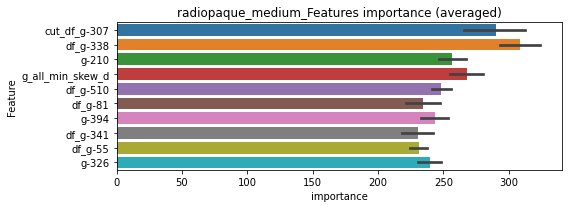

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0299534	valid_1's binary_logloss: 0.0579504
[600]	training's binary_logloss: 0.00887515	valid_1's binary_logloss: 0.0304506
[900]	training's binary_logloss: 0.00450053	valid_1's binary_logloss: 0.0234264
[1200]	training's binary_logloss: 0.00290415	valid_1's binary_logloss: 0.0205603
[1500]	training's binary_logloss: 0.00213745	valid_1's binary_logloss: 0.0188379
[1800]	training's binary_logloss: 0.00169509	valid_1's binary_logloss: 0.017793
[2100]	training's binary_logloss: 0.00141297	valid_1's binary_logloss: 0.017155
Early stopping, best iteration is:
[2182]	training's binary_logloss: 0.00135342	valid_1's binary_logloss: 0.0170124


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0304853	valid_1's binary_logloss: 0.0532501
[600]	training's binary_logloss: 0.00881341	valid_1's binary_logloss: 0.0257683
[900]	training's binary_logloss: 0.00446082	valid_1's binary_logloss: 0.0191875
[1200]	training's binary_logloss: 0.00289143	valid_1's binary_logloss: 0.0163618
[1500]	training's binary_logloss: 0.0021282	valid_1's binary_logloss: 0.0148466
[1800]	training's binary_logloss: 0.00169312	valid_1's binary_logloss: 0.013724
[2100]	training's binary_logloss: 0.00141357	valid_1's binary_logloss: 0.0131386
[2400]	training's binary_logloss: 0.00121954	valid_1's binary_logloss: 0.0127624
[2700]	training's binary_logloss: 0.00107802	valid_1's binary_logloss: 0.012344
Early stopping, best iteration is:
[2893]	training's binary_logloss: 0.0010069	valid_1's binary_logloss: 0.0121371


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0309187	valid_1's binary_logloss: 0.0551449
[600]	training's binary_logloss: 0.00891578	valid_1's binary_logloss: 0.0277684
[900]	training's binary_logloss: 0.00449543	valid_1's binary_logloss: 0.0209481
[1200]	training's binary_logloss: 0.00290426	valid_1's binary_logloss: 0.0179917
[1500]	training's binary_logloss: 0.00213507	valid_1's binary_logloss: 0.0163338
[1800]	training's binary_logloss: 0.00169388	valid_1's binary_logloss: 0.0154197
[2100]	training's binary_logloss: 0.00141132	valid_1's binary_logloss: 0.0147123
[2400]	training's binary_logloss: 0.00121685	valid_1's binary_logloss: 0.0141831
[2700]	training's binary_logloss: 0.00107386	valid_1's binary_logloss: 0.0137903
Early stopping, best iteration is:
[2948]	training's binary_logloss: 0.000984576	valid_1's binary_logloss: 0.0135917


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0306568	valid_1's binary_logloss: 0.0535021
[600]	training's binary_logloss: 0.00888677	valid_1's binary_logloss: 0.0239774
[900]	training's binary_logloss: 0.00449563	valid_1's binary_logloss: 0.016461
[1200]	training's binary_logloss: 0.00289863	valid_1's binary_logloss: 0.0134425
[1500]	training's binary_logloss: 0.00212815	valid_1's binary_logloss: 0.0118355
[1800]	training's binary_logloss: 0.00168818	valid_1's binary_logloss: 0.0106834
[2100]	training's binary_logloss: 0.00140261	valid_1's binary_logloss: 0.00997908
Early stopping, best iteration is:
[2367]	training's binary_logloss: 0.00122766	valid_1's binary_logloss: 0.00953323


radiopaque_medium logloss: 0.01306952820980574


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266, target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0734322	valid_1's binary_logloss: 0.229815
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.0218867	valid_1's binary_logloss: 0.201315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0740377	valid_1's binary_logloss: 0.214281
[600]	training's binary_logloss: 0.0192204	valid_1's binary_logloss: 0.182441
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.0116521	valid_1's binary_logloss: 0.179436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0722122	valid_1's binary_logloss: 0.221154
[600]	training's binary_logloss: 0.0183634	valid_1's binary_logloss: 0.194282
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.0180269	valid_1's binary_logloss: 0.193987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

1 / 3 AUC score:0.936
y_Threshold: 0.0677460, Threshold: 0.3653328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 333 → Positive_corect_labels: 552/3586
p_label_rate: 0.0100452 Vs.target_rate: 0.00936, Num_p_label: 40.0, conf_0:0.25573, conf_1:0.47493
threshold: 0.3653328, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 552.0/3586, y_label_rate: 0.1539320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464631	valid_1's binary_logloss: 0.161318
[600]	training's binary_logloss: 0.00941482	valid_1's binary_logloss: 0.124197
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00346389	valid_1's binary_logloss: 0.115472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489268	valid_1's binary_logloss: 0.147263
[600]	training's binary_logloss: 0.00978352	valid_1's binary_logloss: 0.10666
[900]	training's binary_logloss: 0.0031653	valid_1's binary_logloss: 0.100103
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.00273649	valid_1's binary_logloss: 0.0995859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.046265	valid_1's binary_logloss: 0.151208
[600]	training's binary_logloss: 0.00920244	valid_1's binary_logloss: 0.113918
Early stopping, best iteration is:
[724]	

2 / 3 AUC score:0.990
y_Threshold: 0.0622760, Threshold: 0.3653328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 513.0/3508
p_label_rate: 0.0286288 Vs.target_rate: 0.00936, Num_p_label: 114.0, conf_0:0.29227, conf_1:0.43840
Num_p_label: 114.0, Expected: 37.3, Adj_threshold_1: 0.3653328
Num_p_label: 111.0, Expected: 37.3, Adj_threshold_2: 0.3853328
Num_p_label: 106.0, Expected: 37.3, Adj_threshold_3: 0.4053328
Num_p_label: 99.0, Expected: 37.3, Adj_threshold_4: 0.4253328
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_5: 0.4453328
Num_p_label: 92.0, Expected: 37.3, Adj_threshold_6: 0.4653328
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_7: 0.4853328
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_8: 0.5053328
Num_p_label: 81.0, Expected: 37.3, Adj_threshold_9: 0.5253328
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_10: 0.5453328
threshold: 0.5653328, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 513.0/3508, y_label_rate: 0.146

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0378718	valid_1's binary_logloss: 0.151538
[600]	training's binary_logloss: 0.00725016	valid_1's binary_logloss: 0.127179
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00775971	valid_1's binary_logloss: 0.126824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0366554	valid_1's binary_logloss: 0.121656
[600]	training's binary_logloss: 0.00696519	valid_1's binary_logloss: 0.0814457
[900]	training's binary_logloss: 0.00241086	valid_1's binary_logloss: 0.0707671
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.00212386	valid_1's binary_logloss: 0.0702357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0419787	valid_1's binary_logloss: 0.114972
[600]	training's binary_logloss: 0.00786768	valid_1's binary_logloss: 0.0686878
[900]	training's binary_logloss: 0.

3 / 3 AUC score:0.994
y_Threshold: 0.0675117, Threshold: 0.5653328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 487.0/3456
p_label_rate: 0.0273732 Vs.target_rate: 0.00936, Num_p_label: 109.0, conf_0:0.50000, conf_1:0.62187
Num_p_label: 109.0, Expected: 37.3, Adj_threshold_1: 0.5653328
Num_p_label: 107.0, Expected: 37.3, Adj_threshold_2: 0.5853328
Num_p_label: 102.0, Expected: 37.3, Adj_threshold_3: 0.6053328
Num_p_label: 100.0, Expected: 37.3, Adj_threshold_4: 0.6253328
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_5: 0.6453328
Num_p_label: 92.0, Expected: 37.3, Adj_threshold_6: 0.6653328
Num_p_label: 87.0, Expected: 37.3, Adj_threshold_7: 0.6853328
Num_p_label: 83.0, Expected: 37.3, Adj_threshold_8: 0.7053328
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_9: 0.7253328
Num_p_label: 73.0, Expected: 37.3, Adj_threshold_10: 0.7453328
threshold: 0.7653328, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 487.0/3456, y_label_rate: 0.14

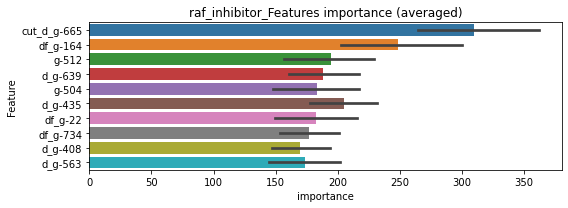

len(train_index) : 2592
len(valid_index) : 864
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0587231	valid_1's binary_logloss: 0.138527
[600]	training's binary_logloss: 0.0196645	valid_1's binary_logloss: 0.0936484
[900]	training's binary_logloss: 0.0096919	valid_1's binary_logloss: 0.0785407
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.00664455	valid_1's binary_logloss: 0.0731167


len(train_index) : 2592
len(valid_index) : 864
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0567195	valid_1's binary_logloss: 0.150679
[600]	training's binary_logloss: 0.0192159	valid_1's binary_logloss: 0.115442
[900]	training's binary_logloss: 0.00959836	valid_1's binary_logloss: 0.106051
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.00734085	valid_1's binary_logloss: 0.104047


len(train_index) : 2592
len(valid_index) : 864
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0567687	valid_1's binary_logloss: 0.127376
[600]	training's binary_logloss: 0.0193151	valid_1's binary_logloss: 0.0867523
[900]	training's binary_logloss: 0.00961751	valid_1's binary_logloss: 0.0740911
[1200]	training's binary_logloss: 0.00604825	valid_1's binary_logloss: 0.0696232
Early stopping, best iteration is:
[1250]	training's binary_logloss: 0.00568796	valid_1's binary_logloss: 0.0689587


len(train_index) : 2592
len(valid_index) : 864
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.059029	valid_1's binary_logloss: 0.13543
[600]	training's binary_logloss: 0.0196369	valid_1's binary_logloss: 0.0927928
[900]	training's binary_logloss: 0.00981566	valid_1's binary_logloss: 0.0792098
[1200]	training's binary_logloss: 0.00617023	valid_1's binary_logloss: 0.0738358
[1500]	training's binary_logloss: 0.00441184	valid_1's binary_logloss: 0.0704803
Early stopping, best iteration is:
[1611]	training's binary_logloss: 0.00397376	valid_1's binary_logloss: 0.0694499


raf_inhibitor logloss: 0.0788930632269985


neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281671	valid_1's binary_logloss: 0.00516656
[600]	training's binary_logloss: 0.000400094	valid_1's binary_logloss: 0.00168462
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000298419	valid_1's binary_logloss: 0.00142965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270418	valid_1's binary_logloss: 0.00568424
[600]	training's binary_logloss: 0.00039849	valid_1's binary_logloss: 0.00221383
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000306864	valid_1's binary_logloss: 0.00202492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273874	valid_1's binary_logloss: 0.0043903
[600]	training's binary_logloss: 0.000384504	valid_1's binary_logloss: 0.00145032
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000290758	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0012461, Threshold: 0.0204848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01434, conf_1:0.02663


Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000303006	valid_1's binary_logloss: 0.00149291


Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0204848
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_2: 0.0404848
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_3: 0.0604848
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_4: 0.0804848
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_5: 0.1004848
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_6: 0.1204848
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.1404848
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.1604848
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.1804848
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_10: 0.2004848
threshold: 0.2204848, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244977	valid_1's binary_logloss: 0.00427354
[600]	training's binary_logloss: 0.000348995	valid_1's binary_logloss: 0.00125817
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000276412	valid_1's binary_logloss: 0.00113485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023974	valid_1's binary_logloss: 0.00565204
[600]	training's binary_logloss: 0.000343654	valid_1's binary_logloss: 0.00247013
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000299801	valid_1's binary_logloss: 0.00238632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245138	valid_1's binary_logloss: 0.00297938
[600]	training's binary_logloss: 0.000347695	valid_1's binary_logloss: 0.000497074
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000268213	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1029407, Threshold: 0.2204848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0085384 Vs.target_rate: 0.00050, Num_p_label: 34.0, conf_0:0.17639, conf_1:0.26458
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_1: 0.2204848
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_2: 0.2404848
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_3: 0.2604848
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_4: 0.2804848
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_5: 0.3004848
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_6: 0.3204848
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.3404848
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_8: 0.3604848
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_9: 0.3804848
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_10: 0.4004848
threshold: 0.4204848, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244977	valid_1's binary_logloss: 0.00427354
[600]	training's binary_logloss: 0.000348995	valid_1's binary_logloss: 0.00125817
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000276412	valid_1's binary_logloss: 0.00113485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023974	valid_1's binary_logloss: 0.00565204
[600]	training's binary_logloss: 0.000343654	valid_1's binary_logloss: 0.00247013
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000299801	valid_1's binary_logloss: 0.00238632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245138	valid_1's binary_logloss: 0.00297938
[600]	training's binary_logloss: 0.000347695	valid_1's binary_logloss: 0.000497074
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000268213	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.1029407, Threshold: 0.4204848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00050, Num_p_label: 28.0, conf_0:0.37844, conf_1:0.46253
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_1: 0.4204848
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_2: 0.4404848
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_3: 0.4604848
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_4: 0.4804848
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_5: 0.5004848
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_6: 0.5204848
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_7: 0.5404848
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_8: 0.5604848
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_9: 0.5804848
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_10: 0.6004848
threshold: 0.6204848, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


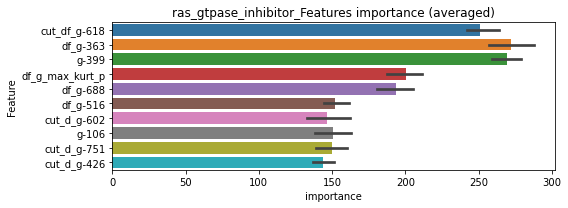

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733462	valid_1's binary_logloss: 0.00963394
[600]	training's binary_logloss: 0.0019387	valid_1's binary_logloss: 0.00328066
[900]	training's binary_logloss: 0.00106069	valid_1's binary_logloss: 0.00206737
[1200]	training's binary_logloss: 0.000740063	valid_1's binary_logloss: 0.00159889
[1500]	training's binary_logloss: 0.000578249	valid_1's binary_logloss: 0.00133294
[1800]	training's binary_logloss: 0.000481882	valid_1's binary_logloss: 0.00115908
[2100]	training's binary_logloss: 0.000419596	valid_1's binary_logloss: 0.00104928
[2400]	training's binary_logloss: 0.000374105	valid_1's binary_logloss: 0.000960715
[2700]	training's binary_logloss: 0.0003423	valid_1's binary_logloss: 0.000900855
[3000]	training's binary_logloss: 0.0003194	valid_1's binary_logloss: 0.000857774
[3300]	training's binary_logloss: 0.000303053	valid_1's binary_logloss: 0.000828474
[3600]	training's binary_logloss:

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725049	valid_1's binary_logloss: 0.0107744
[600]	training's binary_logloss: 0.00191323	valid_1's binary_logloss: 0.00439498
[900]	training's binary_logloss: 0.00104552	valid_1's binary_logloss: 0.00314051
[1200]	training's binary_logloss: 0.000729297	valid_1's binary_logloss: 0.00260281
[1500]	training's binary_logloss: 0.000569698	valid_1's binary_logloss: 0.00230118
[1800]	training's binary_logloss: 0.000475363	valid_1's binary_logloss: 0.00210232
[2100]	training's binary_logloss: 0.000411546	valid_1's binary_logloss: 0.00194782
[2400]	training's binary_logloss: 0.000367731	valid_1's binary_logloss: 0.0018375
[2700]	training's binary_logloss: 0.000335794	valid_1's binary_logloss: 0.00175318
Early stopping, best iteration is:
[2940]	training's binary_logloss: 0.000317203	valid_1's binary_logloss: 0.00171326


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734516	valid_1's binary_logloss: 0.0083327
[600]	training's binary_logloss: 0.00193319	valid_1's binary_logloss: 0.00234177
[900]	training's binary_logloss: 0.00105311	valid_1's binary_logloss: 0.00132063
[1200]	training's binary_logloss: 0.000735129	valid_1's binary_logloss: 0.000951429
[1500]	training's binary_logloss: 0.000573521	valid_1's binary_logloss: 0.000757863
[1800]	training's binary_logloss: 0.000477224	valid_1's binary_logloss: 0.000640043
[2100]	training's binary_logloss: 0.000414016	valid_1's binary_logloss: 0.00056093
[2400]	training's binary_logloss: 0.000369826	valid_1's binary_logloss: 0.000505908
[2700]	training's binary_logloss: 0.000337491	valid_1's binary_logloss: 0.000465751
[3000]	training's binary_logloss: 0.000314447	valid_1's binary_logloss: 0.000435548
[3300]	training's binary_logloss: 0.000298852	valid_1's binary_logloss: 0.000415166
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735513	valid_1's binary_logloss: 0.00970641
[600]	training's binary_logloss: 0.00193236	valid_1's binary_logloss: 0.00332512
[900]	training's binary_logloss: 0.00105788	valid_1's binary_logloss: 0.002176
[1200]	training's binary_logloss: 0.000734587	valid_1's binary_logloss: 0.00171299
[1500]	training's binary_logloss: 0.000573798	valid_1's binary_logloss: 0.00146004
[1800]	training's binary_logloss: 0.000477678	valid_1's binary_logloss: 0.00129896
[2100]	training's binary_logloss: 0.000414518	valid_1's binary_logloss: 0.00119277
[2400]	training's binary_logloss: 0.000369885	valid_1's binary_logloss: 0.00111432
[2700]	training's binary_logloss: 0.000338468	valid_1's binary_logloss: 0.0010567
[3000]	training's binary_logloss: 0.000315429	valid_1's binary_logloss: 0.00101728
[3300]	training's binary_logloss: 0.000299027	valid_1's binary_logloss: 0.000984085
[3600]	training's binary_logloss: 

ras_gtpase_inhibitor logloss: 0.0009663505824785966


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190846	valid_1's binary_logloss: 0.0602281
[600]	training's binary_logloss: 0.00278888	valid_1's binary_logloss: 0.0311566
[900]	training's binary_logloss: 0.00108314	valid_1's binary_logloss: 0.0246757
[1200]	training's binary_logloss: 0.000722043	valid_1's binary_logloss: 0.0232004
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000727842	valid_1's binary_logloss: 0.0231506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196261	valid_1's binary_logloss: 0.0461768
[600]	training's binary_logloss: 0.00278948	valid_1's binary_logloss: 0.0169972
[900]	training's binary_logloss: 0.00110011	valid_1's binary_logloss: 0.0122106
[1200]	training's binary_logloss: 0.000730925	valid_1's binary_logloss: 0.0109238
Early stopping, best iteration is:
[1186]	training's binary_logloss: 0.00073914	valid_1's binary_logloss: 0.0109046
Tra

1 / 3 AUC score:1.000
y_Threshold: 0.0084404, Threshold: 0.1539001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.10773, conf_1:0.20007
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.1539001
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_2: 0.1739001
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_3: 0.1939001
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_4: 0.2139001
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_5: 0.2339001
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_6: 0.2539001
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_7: 0.2739001
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_8: 0.2939001
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_9: 0.3139001
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_10: 0.3339001
threshold: 0.3539001, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 654.0/3799, y_label_rate: 0.1721506


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183914	valid_1's binary_logloss: 0.050789
[600]	training's binary_logloss: 0.00254829	valid_1's binary_logloss: 0.0233557
[900]	training's binary_logloss: 0.00102332	valid_1's binary_logloss: 0.0182945
[1200]	training's binary_logloss: 0.000695116	valid_1's binary_logloss: 0.016991
Early stopping, best iteration is:
[1286]	training's binary_logloss: 0.000663107	valid_1's binary_logloss: 0.0168529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183208	valid_1's binary_logloss: 0.0480475
[600]	training's binary_logloss: 0.00258251	valid_1's binary_logloss: 0.0242212
[900]	training's binary_logloss: 0.00103453	valid_1's binary_logloss: 0.019152
[1200]	training's binary_logloss: 0.000703526	valid_1's binary_logloss: 0.0175365
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.000706008	valid_1's binary_logloss: 0.0175082
Train

2 / 3 AUC score:1.000
y_Threshold: 0.0434756, Threshold: 0.3539001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0097941 Vs.target_rate: 0.00281, Num_p_label: 39.0, conf_0:0.28312, conf_1:0.42468
Num_p_label: 39.0, Expected: 11.2, Adj_threshold_1: 0.3539001
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_2: 0.3739001
Num_p_label: 36.0, Expected: 11.2, Adj_threshold_3: 0.3939001
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_4: 0.4139001
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_5: 0.4339001
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_6: 0.4539001
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_7: 0.4739001
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_8: 0.4939001
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_9: 0.5139001
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_10: 0.5339001
threshold: 0.5539001, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 651.0/3793, y_label_rate: 0.1716320


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017056	valid_1's binary_logloss: 0.0466936
[600]	training's binary_logloss: 0.0023935	valid_1's binary_logloss: 0.0243353
[900]	training's binary_logloss: 0.00100163	valid_1's binary_logloss: 0.0205981
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000882559	valid_1's binary_logloss: 0.0200567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164932	valid_1's binary_logloss: 0.0477456
[600]	training's binary_logloss: 0.00236423	valid_1's binary_logloss: 0.0250163
[900]	training's binary_logloss: 0.000978614	valid_1's binary_logloss: 0.0201347
[1200]	training's binary_logloss: 0.000674425	valid_1's binary_logloss: 0.018561
Early stopping, best iteration is:
[1234]	training's binary_logloss: 0.000659152	valid_1's binary_logloss: 0.0184589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_lo

3 / 3 AUC score:0.999
y_Threshold: 0.0360337, Threshold: 0.5539001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0062783 Vs.target_rate: 0.00281, Num_p_label: 25.0, conf_0:0.49851, conf_1:0.60929
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_1: 0.5539001
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_2: 0.5739001
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_3: 0.5939001
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_4: 0.6139001
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_5: 0.6339001
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_6: 0.6539001
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_7: 0.6739001
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.6939001
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.7139001
threshold: 0.7139001, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 645.0/3781, y_label_rate: 0.1705898


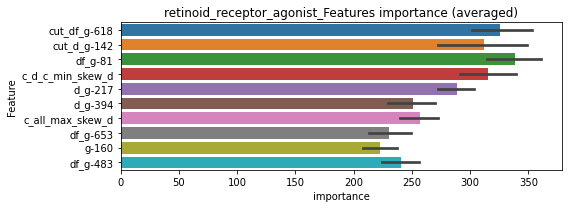

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321564	valid_1's binary_logloss: 0.0638084
[600]	training's binary_logloss: 0.00956163	valid_1's binary_logloss: 0.0331385
[900]	training's binary_logloss: 0.00485832	valid_1's binary_logloss: 0.0243039
[1200]	training's binary_logloss: 0.00314571	valid_1's binary_logloss: 0.0204484
[1500]	training's binary_logloss: 0.0023224	valid_1's binary_logloss: 0.0184779
[1800]	training's binary_logloss: 0.00184303	valid_1's binary_logloss: 0.0171735
[2100]	training's binary_logloss: 0.00153677	valid_1's binary_logloss: 0.0162804
[2400]	training's binary_logloss: 0.0013251	valid_1's binary_logloss: 0.0155143
[2700]	training's binary_logloss: 0.00117078	valid_1's binary_logloss: 0.0149897
Early stopping, best iteration is:
[2704]	training's binary_logloss: 0.00116907	valid_1's binary_logloss: 0.0149871


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325258	valid_1's binary_logloss: 0.0759478
[600]	training's binary_logloss: 0.00955178	valid_1's binary_logloss: 0.0435961
[900]	training's binary_logloss: 0.00483539	valid_1's binary_logloss: 0.0346862
[1200]	training's binary_logloss: 0.00311915	valid_1's binary_logloss: 0.0310355
[1500]	training's binary_logloss: 0.00229731	valid_1's binary_logloss: 0.0285466
[1800]	training's binary_logloss: 0.00181952	valid_1's binary_logloss: 0.0273271
[2100]	training's binary_logloss: 0.00151795	valid_1's binary_logloss: 0.026489
[2400]	training's binary_logloss: 0.00130904	valid_1's binary_logloss: 0.0257749
Early stopping, best iteration is:
[2608]	training's binary_logloss: 0.00119962	valid_1's binary_logloss: 0.0253914


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325959	valid_1's binary_logloss: 0.0557522
[600]	training's binary_logloss: 0.00980031	valid_1's binary_logloss: 0.0248649
[900]	training's binary_logloss: 0.00496962	valid_1's binary_logloss: 0.0166471
[1200]	training's binary_logloss: 0.00321673	valid_1's binary_logloss: 0.013229
[1500]	training's binary_logloss: 0.00236697	valid_1's binary_logloss: 0.011504
[1800]	training's binary_logloss: 0.00187535	valid_1's binary_logloss: 0.0104378
[2100]	training's binary_logloss: 0.00155908	valid_1's binary_logloss: 0.0097198
[2400]	training's binary_logloss: 0.00134451	valid_1's binary_logloss: 0.00920098
[2700]	training's binary_logloss: 0.00118748	valid_1's binary_logloss: 0.00881945
[3000]	training's binary_logloss: 0.0010685	valid_1's binary_logloss: 0.00849494
[3300]	training's binary_logloss: 0.000976848	valid_1's binary_logloss: 0.00822374
[3600]	training's binary_logloss: 0.000903791	vali

len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333386	valid_1's binary_logloss: 0.0708611
[600]	training's binary_logloss: 0.00968875	valid_1's binary_logloss: 0.0400002
[900]	training's binary_logloss: 0.00488114	valid_1's binary_logloss: 0.032029
[1200]	training's binary_logloss: 0.00315482	valid_1's binary_logloss: 0.0286259
[1500]	training's binary_logloss: 0.00232043	valid_1's binary_logloss: 0.0269348
Early stopping, best iteration is:
[1599]	training's binary_logloss: 0.00213527	valid_1's binary_logloss: 0.0264005


retinoid_receptor_agonist logloss: 0.01869494876265385


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148394	valid_1's binary_logloss: 0.00220342
[600]	training's binary_logloss: 0.000220375	valid_1's binary_logloss: 0.000674966
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000189985	valid_1's binary_logloss: 0.000613515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147217	valid_1's binary_logloss: 0.00294576
[600]	training's binary_logloss: 0.000221453	valid_1's binary_logloss: 0.000791511
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000195446	valid_1's binary_logloss: 0.00074219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148904	valid_1's binary_logloss: 0.00169161
[600]	training's binary_logloss: 0.000221018	valid_1's binary_logloss: 0.000299344
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000195111	valid_1's 

1 / 3 AUC score:1.000
y_Threshold: 0.0006116, Threshold: 0.0024141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00169, conf_1:0.00314
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0024141
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0224141
threshold: 0.0224141, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014647	valid_1's binary_logloss: 0.00181267
[600]	training's binary_logloss: 0.000208555	valid_1's binary_logloss: 0.000336543
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000178445	valid_1's binary_logloss: 0.000298515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143987	valid_1's binary_logloss: 0.00459814
[600]	training's binary_logloss: 0.000207956	valid_1's binary_logloss: 0.00200363
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000177734	valid_1's binary_logloss: 0.00189917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146055	valid_1's binary_logloss: 0.00153844
[600]	training's binary_logloss: 0.000208405	valid_1's binary_logloss: 0.000229572
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000177944	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0663462, Threshold: 0.0224141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00025, Num_p_label: 17.0, conf_0:0.01793, conf_1:0.02690
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_1: 0.0224141
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0424141
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0624141
threshold: 0.0624141, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000176633	valid_1's binary_logloss: 0.000214569


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014647	valid_1's binary_logloss: 0.00181267
[600]	training's binary_logloss: 0.000208555	valid_1's binary_logloss: 0.000336543
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000178445	valid_1's binary_logloss: 0.000298515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143987	valid_1's binary_logloss: 0.00459814
[600]	training's binary_logloss: 0.000207956	valid_1's binary_logloss: 0.00200363
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000177734	valid_1's binary_logloss: 0.00189917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146055	valid_1's binary_logloss: 0.00153844
[600]	training's binary_logloss: 0.000208405	valid_1's binary_logloss: 0.000229572
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000177944	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0663462, Threshold: 0.0624141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.05617, conf_1:0.06866
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0624141
threshold: 0.0624141, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000176633	valid_1's binary_logloss: 0.000214569


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


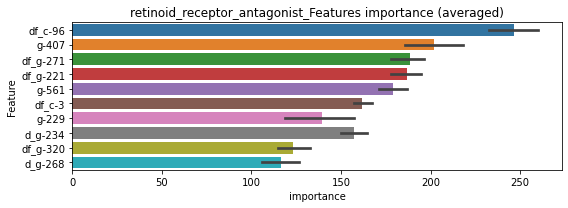

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450142	valid_1's binary_logloss: 0.00527164
[600]	training's binary_logloss: 0.00117011	valid_1's binary_logloss: 0.00157549
[900]	training's binary_logloss: 0.000661988	valid_1's binary_logloss: 0.000940898
[1200]	training's binary_logloss: 0.000473073	valid_1's binary_logloss: 0.000699232
[1500]	training's binary_logloss: 0.00037737	valid_1's binary_logloss: 0.000573199
[1800]	training's binary_logloss: 0.000319432	valid_1's binary_logloss: 0.000496071
[2100]	training's binary_logloss: 0.000281401	valid_1's binary_logloss: 0.000445658
[2400]	training's binary_logloss: 0.000254563	valid_1's binary_logloss: 0.000409522
[2700]	training's binary_logloss: 0.000234672	valid_1's binary_logloss: 0.000382364
[3000]	training's binary_logloss: 0.000220015	valid_1's binary_logloss: 0.000362539
[3300]	training's binary_logloss: 0.000208674	valid_1's binary_logloss: 0.000347095
[3600]	training's binar

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452123	valid_1's binary_logloss: 0.00670229
[600]	training's binary_logloss: 0.00116659	valid_1's binary_logloss: 0.00241515
[900]	training's binary_logloss: 0.000659604	valid_1's binary_logloss: 0.00162092
[1200]	training's binary_logloss: 0.000471482	valid_1's binary_logloss: 0.0012967
[1500]	training's binary_logloss: 0.000376264	valid_1's binary_logloss: 0.00111934
[1800]	training's binary_logloss: 0.000318837	valid_1's binary_logloss: 0.00100458
[2100]	training's binary_logloss: 0.000280865	valid_1's binary_logloss: 0.000927383
[2400]	training's binary_logloss: 0.000253838	valid_1's binary_logloss: 0.000871444
[2700]	training's binary_logloss: 0.000233893	valid_1's binary_logloss: 0.000830576
[3000]	training's binary_logloss: 0.000219577	valid_1's binary_logloss: 0.000801393
[3300]	training's binary_logloss: 0.000208217	valid_1's binary_logloss: 0.000777439
[3600]	training's binary_lo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451962	valid_1's binary_logloss: 0.00476528
[600]	training's binary_logloss: 0.0011709	valid_1's binary_logloss: 0.00127377
[900]	training's binary_logloss: 0.000661265	valid_1's binary_logloss: 0.000730013
[1200]	training's binary_logloss: 0.00047207	valid_1's binary_logloss: 0.000526101
[1500]	training's binary_logloss: 0.000377124	valid_1's binary_logloss: 0.000423161
[1800]	training's binary_logloss: 0.000320322	valid_1's binary_logloss: 0.000360942
[2100]	training's binary_logloss: 0.000282021	valid_1's binary_logloss: 0.000318884
[2400]	training's binary_logloss: 0.000254963	valid_1's binary_logloss: 0.000288941
[2700]	training's binary_logloss: 0.000235199	valid_1's binary_logloss: 0.000267109
[3000]	training's binary_logloss: 0.000220469	valid_1's binary_logloss: 0.000250766
[3300]	training's binary_logloss: 0.000209	valid_1's binary_logloss: 0.000238009
[3600]	training's binary_lo

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453068	valid_1's binary_logloss: 0.00497048
[600]	training's binary_logloss: 0.00116835	valid_1's binary_logloss: 0.0013456
[900]	training's binary_logloss: 0.000660273	valid_1's binary_logloss: 0.000775736
[1200]	training's binary_logloss: 0.000473521	valid_1's binary_logloss: 0.000564393
[1500]	training's binary_logloss: 0.000378145	valid_1's binary_logloss: 0.000454485
[1800]	training's binary_logloss: 0.000320405	valid_1's binary_logloss: 0.000387192
[2100]	training's binary_logloss: 0.00028188	valid_1's binary_logloss: 0.000342338
[2400]	training's binary_logloss: 0.000254251	valid_1's binary_logloss: 0.000309846
[2700]	training's binary_logloss: 0.000234383	valid_1's binary_logloss: 0.000286381
[3000]	training's binary_logloss: 0.000219742	valid_1's binary_logloss: 0.00026906
[3300]	training's binary_logloss: 0.000208655	valid_1's binary_logloss: 0.000255893
[3600]	training's binary_

retinoid_receptor_antagonist logloss: 0.00036901244143187385


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283, target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0093852	valid_1's binary_logloss: 0.022926
[600]	training's binary_logloss: 0.00123518	valid_1's binary_logloss: 0.00732643
[900]	training's binary_logloss: 0.000574561	valid_1's binary_logloss: 0.00524449
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000513572	valid_1's binary_logloss: 0.0051011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00957284	valid_1's binary_logloss: 0.0200974
[600]	training's binary_logloss: 0.00126351	valid_1's binary_logloss: 0.00554398
[900]	training's binary_logloss: 0.00058602	valid_1's binary_logloss: 0.00352722
[1200]	training's binary_logloss: 0.000478066	valid_1's binary_logloss: 0.0031812
Early stopping, best iteration is:
[1190]	training's binary_logloss: 0.000478343	valid_1's binary_logloss: 0.00317969
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0046986, Threshold: 0.0139556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147, Num_p_label: 40.0, conf_0:0.00977, conf_1:0.01814
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0139556
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_2: 0.0339556
threshold: 0.0339556, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852271	valid_1's binary_logloss: 0.0209589
[600]	training's binary_logloss: 0.00114341	valid_1's binary_logloss: 0.0076899
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000569301	valid_1's binary_logloss: 0.005718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00838942	valid_1's binary_logloss: 0.0162634
[600]	training's binary_logloss: 0.00113202	valid_1's binary_logloss: 0.00435901
[900]	training's binary_logloss: 0.000538125	valid_1's binary_logloss: 0.00292731
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000468491	valid_1's binary_logloss: 0.00274359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904701	valid_1's binary_logloss: 0.0131877
[600]	training's binary_logloss: 0.00121146	valid_1's binary_logloss: 0.00241088
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0312759, Threshold: 0.0339556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0092918 Vs.target_rate: 0.00147, Num_p_label: 37.0, conf_0:0.02716, conf_1:0.04075
Num_p_label: 37.0, Expected: 5.9, Adj_threshold_1: 0.0339556
Num_p_label: 18.0, Expected: 5.9, Adj_threshold_2: 0.0539556
Num_p_label: 11.0, Expected: 5.9, Adj_threshold_3: 0.0739556
threshold: 0.0739556, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852271	valid_1's binary_logloss: 0.0209589
[600]	training's binary_logloss: 0.00114341	valid_1's binary_logloss: 0.0076899
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000569301	valid_1's binary_logloss: 0.005718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00838942	valid_1's binary_logloss: 0.0162634
[600]	training's binary_logloss: 0.00113202	valid_1's binary_logloss: 0.00435901
[900]	training's binary_logloss: 0.000538125	valid_1's binary_logloss: 0.00292731
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000468491	valid_1's binary_logloss: 0.00274359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904701	valid_1's binary_logloss: 0.0131877
[600]	training's binary_logloss: 0.00121146	valid_1's binary_logloss: 0.00241088
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0312759, Threshold: 0.0739556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00147, Num_p_label: 11.0, conf_0:0.06656, conf_1:0.08135
Num_p_label: 11.0, Expected: 5.9, Adj_threshold_1: 0.0739556
threshold: 0.0739556, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


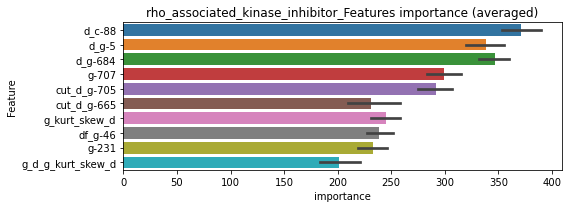

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199672	valid_1's binary_logloss: 0.03483
[600]	training's binary_logloss: 0.0054223	valid_1's binary_logloss: 0.0148161
[900]	training's binary_logloss: 0.00277948	valid_1's binary_logloss: 0.0102087
[1200]	training's binary_logloss: 0.00184341	valid_1's binary_logloss: 0.00849955
[1500]	training's binary_logloss: 0.00138708	valid_1's binary_logloss: 0.00747152
[1800]	training's binary_logloss: 0.00111916	valid_1's binary_logloss: 0.00685101
[2100]	training's binary_logloss: 0.000949538	valid_1's binary_logloss: 0.00643157
[2400]	training's binary_logloss: 0.000831141	valid_1's binary_logloss: 0.00610125
[2700]	training's binary_logloss: 0.000743708	valid_1's binary_logloss: 0.00585276
Early stopping, best iteration is:
[2947]	training's binary_logloss: 0.000688097	valid_1's binary_logloss: 0.00568178


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199526	valid_1's binary_logloss: 0.0307904
[600]	training's binary_logloss: 0.00541087	valid_1's binary_logloss: 0.0117797
[900]	training's binary_logloss: 0.00278361	valid_1's binary_logloss: 0.00756968
[1200]	training's binary_logloss: 0.00184546	valid_1's binary_logloss: 0.00581978
[1500]	training's binary_logloss: 0.00139034	valid_1's binary_logloss: 0.00488355
[1800]	training's binary_logloss: 0.00112964	valid_1's binary_logloss: 0.00431731
[2100]	training's binary_logloss: 0.000956403	valid_1's binary_logloss: 0.0039052
[2400]	training's binary_logloss: 0.000835116	valid_1's binary_logloss: 0.00361191
[2700]	training's binary_logloss: 0.000745712	valid_1's binary_logloss: 0.00334947
[3000]	training's binary_logloss: 0.000680544	valid_1's binary_logloss: 0.00317432
[3300]	training's binary_logloss: 0.000628264	valid_1's binary_logloss: 0.0030289
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020802	valid_1's binary_logloss: 0.0259528
[600]	training's binary_logloss: 0.00566059	valid_1's binary_logloss: 0.00818315
[900]	training's binary_logloss: 0.0028873	valid_1's binary_logloss: 0.00465067
[1200]	training's binary_logloss: 0.00190432	valid_1's binary_logloss: 0.00333182
[1500]	training's binary_logloss: 0.0014306	valid_1's binary_logloss: 0.00265702
[1800]	training's binary_logloss: 0.00115375	valid_1's binary_logloss: 0.00225065
[2100]	training's binary_logloss: 0.000975472	valid_1's binary_logloss: 0.00199087
[2400]	training's binary_logloss: 0.000850765	valid_1's binary_logloss: 0.00180699
[2700]	training's binary_logloss: 0.000760245	valid_1's binary_logloss: 0.00166146
[3000]	training's binary_logloss: 0.000692097	valid_1's binary_logloss: 0.0015501
[3300]	training's binary_logloss: 0.000638913	valid_1's binary_logloss: 0.00146913
[3600]	training's binary_logloss: 0.00059

len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019996	valid_1's binary_logloss: 0.035909
[600]	training's binary_logloss: 0.00543228	valid_1's binary_logloss: 0.014453
[900]	training's binary_logloss: 0.00277413	valid_1's binary_logloss: 0.00963669
[1200]	training's binary_logloss: 0.00183286	valid_1's binary_logloss: 0.00768126
[1500]	training's binary_logloss: 0.0013799	valid_1's binary_logloss: 0.00671578
[1800]	training's binary_logloss: 0.00111506	valid_1's binary_logloss: 0.00604915
[2100]	training's binary_logloss: 0.000947178	valid_1's binary_logloss: 0.00564237
[2400]	training's binary_logloss: 0.00082706	valid_1's binary_logloss: 0.00531567
[2700]	training's binary_logloss: 0.000740587	valid_1's binary_logloss: 0.00508436
[3000]	training's binary_logloss: 0.000674816	valid_1's binary_logloss: 0.00492013
[3300]	training's binary_logloss: 0.000623202	valid_1's binary_logloss: 0.00476072
[3600]	training's binary_logloss: 0.0005830

rho_associated_kinase_inhibitor logloss: 0.003486621227904542


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109973	valid_1's binary_logloss: 0.0325706
[600]	training's binary_logloss: 0.00135753	valid_1's binary_logloss: 0.0144828
[900]	training's binary_logloss: 0.000609513	valid_1's binary_logloss: 0.0117939
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000535465	valid_1's binary_logloss: 0.0115515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110854	valid_1's binary_logloss: 0.0203823
[600]	training's binary_logloss: 0.00141136	valid_1's binary_logloss: 0.00564945
[900]	training's binary_logloss: 0.000625212	valid_1's binary_logloss: 0.0038228
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000535061	valid_1's binary_logloss: 0.00355239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110766	valid_1's binary_logloss: 0.0237584
[600]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0047797, Threshold: 0.0259186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01814, conf_1:0.03369
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0259186
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.0459186
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_3: 0.0659186
threshold: 0.0659186, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00940984	valid_1's binary_logloss: 0.0309169
[600]	training's binary_logloss: 0.00124234	valid_1's binary_logloss: 0.0161228
[900]	training's binary_logloss: 0.000572901	valid_1's binary_logloss: 0.0140248
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000508867	valid_1's binary_logloss: 0.0138479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966707	valid_1's binary_logloss: 0.0178151
[600]	training's binary_logloss: 0.00129608	valid_1's binary_logloss: 0.00503805
[900]	training's binary_logloss: 0.00058875	valid_1's binary_logloss: 0.00330498
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.000517865	valid_1's binary_logloss: 0.00319064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989539	valid_1's binary_logloss: 0.0185055
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0309929, Threshold: 0.0659186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.05273, conf_1:0.07910
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0659186
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_2: 0.0859186
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_3: 0.1059186
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_4: 0.1259186
threshold: 0.1259186, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00953342	valid_1's binary_logloss: 0.0244728
[600]	training's binary_logloss: 0.00124701	valid_1's binary_logloss: 0.0107364
[900]	training's binary_logloss: 0.000576565	valid_1's binary_logloss: 0.00851581
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000532649	valid_1's binary_logloss: 0.00838038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970551	valid_1's binary_logloss: 0.0176842
[600]	training's binary_logloss: 0.00126145	valid_1's binary_logloss: 0.004475
[900]	training's binary_logloss: 0.000582311	valid_1's binary_logloss: 0.00315214
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.00050402	valid_1's binary_logloss: 0.00295472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00961886	valid_1's binary_logloss: 0.0228463
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0411573, Threshold: 0.1259186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00155, Num_p_label: 18.0, conf_0:0.11333, conf_1:0.13851
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_1: 0.1259186
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.1459186
threshold: 0.1459186, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


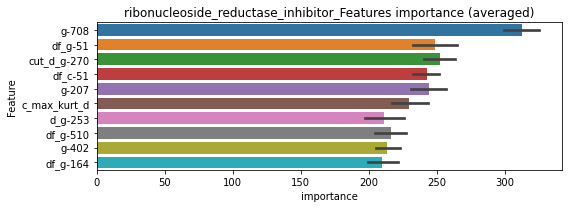

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215327	valid_1's binary_logloss: 0.0381166
[600]	training's binary_logloss: 0.00577799	valid_1's binary_logloss: 0.0176019
[900]	training's binary_logloss: 0.00294828	valid_1's binary_logloss: 0.0129765
[1200]	training's binary_logloss: 0.00193194	valid_1's binary_logloss: 0.0107991
[1500]	training's binary_logloss: 0.00144348	valid_1's binary_logloss: 0.00966963
[1800]	training's binary_logloss: 0.00116153	valid_1's binary_logloss: 0.00892034
[2100]	training's binary_logloss: 0.000978186	valid_1's binary_logloss: 0.0083975
[2400]	training's binary_logloss: 0.000852681	valid_1's binary_logloss: 0.00802713
[2700]	training's binary_logloss: 0.000761865	valid_1's binary_logloss: 0.00778731
[3000]	training's binary_logloss: 0.000692702	valid_1's binary_logloss: 0.00755683
[3300]	training's binary_logloss: 0.000638482	valid_1's binary_logloss: 0.00735772
[3600]	training's binary_logloss: 0.00059

len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216159	valid_1's binary_logloss: 0.0319878
[600]	training's binary_logloss: 0.0058968	valid_1's binary_logloss: 0.0115802
[900]	training's binary_logloss: 0.00299717	valid_1's binary_logloss: 0.00719255
[1200]	training's binary_logloss: 0.00196455	valid_1's binary_logloss: 0.00544147
[1500]	training's binary_logloss: 0.00146516	valid_1's binary_logloss: 0.00449214
[1800]	training's binary_logloss: 0.00117935	valid_1's binary_logloss: 0.00395752
[2100]	training's binary_logloss: 0.000994859	valid_1's binary_logloss: 0.00357568
[2400]	training's binary_logloss: 0.000867066	valid_1's binary_logloss: 0.00333333
[2700]	training's binary_logloss: 0.000773739	valid_1's binary_logloss: 0.00312082
[3000]	training's binary_logloss: 0.000704407	valid_1's binary_logloss: 0.00297312
[3300]	training's binary_logloss: 0.000650087	valid_1's binary_logloss: 0.00285592
[3600]	training's binary_logloss: 0.000

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216504	valid_1's binary_logloss: 0.0359514
[600]	training's binary_logloss: 0.00589074	valid_1's binary_logloss: 0.0151689
[900]	training's binary_logloss: 0.00297639	valid_1's binary_logloss: 0.0104788
[1200]	training's binary_logloss: 0.00195893	valid_1's binary_logloss: 0.00853634
[1500]	training's binary_logloss: 0.00146087	valid_1's binary_logloss: 0.00742908
[1800]	training's binary_logloss: 0.00117333	valid_1's binary_logloss: 0.0067956
[2100]	training's binary_logloss: 0.000991334	valid_1's binary_logloss: 0.00638219
[2400]	training's binary_logloss: 0.000864253	valid_1's binary_logloss: 0.00606485
[2700]	training's binary_logloss: 0.00076983	valid_1's binary_logloss: 0.00578872
[3000]	training's binary_logloss: 0.000701004	valid_1's binary_logloss: 0.00559574
[3300]	training's binary_logloss: 0.000646597	valid_1's binary_logloss: 0.00544114
Early stopping, best iteration is:
[3562]

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218796	valid_1's binary_logloss: 0.0328973
[600]	training's binary_logloss: 0.00596303	valid_1's binary_logloss: 0.0122336
[900]	training's binary_logloss: 0.00301373	valid_1's binary_logloss: 0.00771231
[1200]	training's binary_logloss: 0.00197481	valid_1's binary_logloss: 0.00578499
[1500]	training's binary_logloss: 0.00147365	valid_1's binary_logloss: 0.00480014
[1800]	training's binary_logloss: 0.00118499	valid_1's binary_logloss: 0.0042301
[2100]	training's binary_logloss: 0.000997687	valid_1's binary_logloss: 0.00382778
[2400]	training's binary_logloss: 0.000868464	valid_1's binary_logloss: 0.00353635
[2700]	training's binary_logloss: 0.000774807	valid_1's binary_logloss: 0.0033208
[3000]	training's binary_logloss: 0.00070476	valid_1's binary_logloss: 0.00315499
[3300]	training's binary_logloss: 0.000650701	valid_1's binary_logloss: 0.00303233
[3600]	training's binary_logloss: 0.00060

ribonucleoside_reductase_inhibitor logloss: 0.004475144933003887


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604134	valid_1's binary_logloss: 0.0117473
[600]	training's binary_logloss: 0.000782172	valid_1's binary_logloss: 0.00291729
[900]	training's binary_logloss: 0.000426519	valid_1's binary_logloss: 0.00205411
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000428052	valid_1's binary_logloss: 0.00205386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591002	valid_1's binary_logloss: 0.0101081
[600]	training's binary_logloss: 0.000797639	valid_1's binary_logloss: 0.00215693
[900]	training's binary_logloss: 0.000431417	valid_1's binary_logloss: 0.00142171
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000418276	valid_1's binary_logloss: 0.00139176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601384	valid_1's binary_logloss: 0.0117918
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0025789, Threshold: 0.0122704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00859, conf_1:0.01595
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0122704
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0322704
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_3: 0.0522704
threshold: 0.0522704, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005529	valid_1's binary_logloss: 0.0103156
[600]	training's binary_logloss: 0.000745096	valid_1's binary_logloss: 0.00256575
[900]	training's binary_logloss: 0.00040961	valid_1's binary_logloss: 0.00186053
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000401088	valid_1's binary_logloss: 0.00184687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057124	valid_1's binary_logloss: 0.00863688
[600]	training's binary_logloss: 0.000769386	valid_1's binary_logloss: 0.00160866
[900]	training's binary_logloss: 0.000414357	valid_1's binary_logloss: 0.000978513
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00040929	valid_1's binary_logloss: 0.000973038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552076	valid_1's binary_logloss: 0.0103536
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.1137271, Threshold: 0.0522704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00105, Num_p_label: 28.0, conf_0:0.04182, conf_1:0.06272
Num_p_label: 28.0, Expected: 4.2, Adj_threshold_1: 0.0522704
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_2: 0.0722704
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_3: 0.0922704
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_4: 0.1122704
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_5: 0.1322704
threshold: 0.1322704, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005529	valid_1's binary_logloss: 0.0103156
[600]	training's binary_logloss: 0.000745096	valid_1's binary_logloss: 0.00256575
[900]	training's binary_logloss: 0.00040961	valid_1's binary_logloss: 0.00186053
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000401088	valid_1's binary_logloss: 0.00184687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057124	valid_1's binary_logloss: 0.00863688
[600]	training's binary_logloss: 0.000769386	valid_1's binary_logloss: 0.00160866
[900]	training's binary_logloss: 0.000414357	valid_1's binary_logloss: 0.000978513
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00040929	valid_1's binary_logloss: 0.000973038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552076	valid_1's binary_logloss: 0.0103536
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.1137271, Threshold: 0.1322704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.11904, conf_1:0.14550
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.1322704
threshold: 0.1322704, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


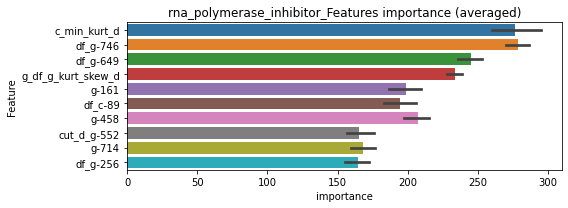

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145333	valid_1's binary_logloss: 0.0214159
[600]	training's binary_logloss: 0.00382222	valid_1's binary_logloss: 0.00742036
[900]	training's binary_logloss: 0.00197802	valid_1's binary_logloss: 0.00449345
[1200]	training's binary_logloss: 0.00132687	valid_1's binary_logloss: 0.00340808
[1500]	training's binary_logloss: 0.00100986	valid_1's binary_logloss: 0.00284853
[1800]	training's binary_logloss: 0.000824305	valid_1's binary_logloss: 0.00248828
[2100]	training's binary_logloss: 0.000704709	valid_1's binary_logloss: 0.00224417
[2400]	training's binary_logloss: 0.00062146	valid_1's binary_logloss: 0.00207863
[2700]	training's binary_logloss: 0.000560837	valid_1's binary_logloss: 0.00195442
[3000]	training's binary_logloss: 0.000516541	valid_1's binary_logloss: 0.00186474
[3300]	training's binary_logloss: 0.000481453	valid_1's binary_logloss: 0.00178428
[3600]	training's binary_logloss: 0.0

len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145675	valid_1's binary_logloss: 0.0189027
[600]	training's binary_logloss: 0.0038324	valid_1's binary_logloss: 0.00589088
[900]	training's binary_logloss: 0.00199129	valid_1's binary_logloss: 0.00335798
[1200]	training's binary_logloss: 0.00133778	valid_1's binary_logloss: 0.0024016
[1500]	training's binary_logloss: 0.00101699	valid_1's binary_logloss: 0.00191468
[1800]	training's binary_logloss: 0.000831433	valid_1's binary_logloss: 0.00162798
[2100]	training's binary_logloss: 0.000711637	valid_1's binary_logloss: 0.00143794
[2400]	training's binary_logloss: 0.000626989	valid_1's binary_logloss: 0.00129659
[2700]	training's binary_logloss: 0.000565263	valid_1's binary_logloss: 0.00119137
[3000]	training's binary_logloss: 0.000519788	valid_1's binary_logloss: 0.00111484
[3300]	training's binary_logloss: 0.000485147	valid_1's binary_logloss: 0.00105552
[3600]	training's binary_logloss: 0.00

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143143	valid_1's binary_logloss: 0.0212864
[600]	training's binary_logloss: 0.00378827	valid_1's binary_logloss: 0.0074579
[900]	training's binary_logloss: 0.00197235	valid_1's binary_logloss: 0.0046541
[1200]	training's binary_logloss: 0.00132701	valid_1's binary_logloss: 0.00358963
[1500]	training's binary_logloss: 0.00101022	valid_1's binary_logloss: 0.00302154
[1800]	training's binary_logloss: 0.000825465	valid_1's binary_logloss: 0.00266821
[2100]	training's binary_logloss: 0.000705517	valid_1's binary_logloss: 0.0024349
[2400]	training's binary_logloss: 0.000621542	valid_1's binary_logloss: 0.00224973
[2700]	training's binary_logloss: 0.00056052	valid_1's binary_logloss: 0.00212801
[3000]	training's binary_logloss: 0.000514567	valid_1's binary_logloss: 0.00202905
Early stopping, best iteration is:
[3074]	training's binary_logloss: 0.000505486	valid_1's binary_logloss: 0.00200441


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145187	valid_1's binary_logloss: 0.0211836
[600]	training's binary_logloss: 0.00381767	valid_1's binary_logloss: 0.0067453
[900]	training's binary_logloss: 0.00198935	valid_1's binary_logloss: 0.00393785
[1200]	training's binary_logloss: 0.00133589	valid_1's binary_logloss: 0.00284613
[1500]	training's binary_logloss: 0.00101423	valid_1's binary_logloss: 0.00228446
[1800]	training's binary_logloss: 0.000826647	valid_1's binary_logloss: 0.00194576
[2100]	training's binary_logloss: 0.000706601	valid_1's binary_logloss: 0.00171935
[2400]	training's binary_logloss: 0.000622311	valid_1's binary_logloss: 0.00155919
[2700]	training's binary_logloss: 0.000562302	valid_1's binary_logloss: 0.00144806
[3000]	training's binary_logloss: 0.000516276	valid_1's binary_logloss: 0.00135876
[3300]	training's binary_logloss: 0.000480952	valid_1's binary_logloss: 0.0012862
[3600]	training's binary_logloss: 0.00

rna_polymerase_inhibitor logloss: 0.0014387000746073422


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249, target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.064998	valid_1's binary_logloss: 0.223507
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.0240704	valid_1's binary_logloss: 0.208179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0652711	valid_1's binary_logloss: 0.220932
[600]	training's binary_logloss: 0.017454	valid_1's binary_logloss: 0.199109
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.01382	valid_1's binary_logloss: 0.198691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0677055	valid_1's binary_logloss: 0.19921
[600]	training's binary_logloss: 0.0175824	valid_1's binary_logloss: 0.166563
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00823776	valid_1's binary_logloss: 0.162314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss

1 / 3 AUC score:0.943
y_Threshold: 0.0610073, Threshold: 0.3477416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 321 → Positive_corect_labels: 554/3577
p_label_rate: 0.0100452 Vs.target_rate: 0.00991, Num_p_label: 40.0, conf_0:0.24342, conf_1:0.45206
threshold: 0.3477416, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 554.0/3577, y_label_rate: 0.1548784
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0398539	valid_1's binary_logloss: 0.149709
[600]	training's binary_logloss: 0.00826654	valid_1's binary_logloss: 0.127625
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00538466	valid_1's binary_logloss: 0.1255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0424187	valid_1's binary_logloss: 0.131812
[600]	training's binary_logloss: 0.0092774	valid_1's binary_logloss: 0.0954636
[900]	training's binary_logloss: 0.00305351	valid_1's binary_logloss: 0.0848548
Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.00180608	valid_1's binary_logloss: 0.0813135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0396181	valid_1's binary_logloss: 0.170136
[600]	training's binary_logloss: 0.0082138	valid_1's binary_logloss: 0.146787
Early stopping, best iteration is:
[695

2 / 3 AUC score:0.989
y_Threshold: 0.0513602, Threshold: 0.3477416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 514.0/3497
p_label_rate: 0.0198393 Vs.target_rate: 0.00991, Num_p_label: 79.0, conf_0:0.27819, conf_1:0.41729
Num_p_label: 79.0, Expected: 39.5, Adj_threshold_1: 0.3477416
Num_p_label: 76.0, Expected: 39.5, Adj_threshold_2: 0.3677416
Num_p_label: 71.0, Expected: 39.5, Adj_threshold_3: 0.3877416
Num_p_label: 70.0, Expected: 39.5, Adj_threshold_4: 0.4077416
Num_p_label: 67.0, Expected: 39.5, Adj_threshold_5: 0.4277416
Num_p_label: 63.0, Expected: 39.5, Adj_threshold_6: 0.4477416
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_7: 0.4677416
Num_p_label: 59.0, Expected: 39.5, Adj_threshold_8: 0.4877416
threshold: 0.4877416, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 514.0/3497, y_label_rate: 0.1469831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0329691	valid_1's binary_logloss: 0.120106
[600]	training's binary_logloss: 0.00633302	valid_1's binary_logloss: 0.0917141
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00280694	valid_1's binary_logloss: 0.0865571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03153	valid_1's binary_logloss: 0.128886
[600]	training's binary_logloss: 0.0061249	valid_1's binary_logloss: 0.105642
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00384709	valid_1's binary_logloss: 0.102484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325047	valid_1's binary_logloss: 0.112999
[600]	training's binary_logloss: 0.00610053	valid_1's binary_logloss: 0.0842963
[900]	training's binary_logloss: 0.00222943	valid_1's binary_logloss: 0.0766579
Early stopping, best iteration is:
[88

3 / 3 AUC score:0.995
y_Threshold: 0.0558693, Threshold: 0.4877416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 491.0/3451
p_label_rate: 0.0180814 Vs.target_rate: 0.00991, Num_p_label: 72.0, conf_0:0.43897, conf_1:0.53652
Num_p_label: 72.0, Expected: 39.5, Adj_threshold_1: 0.4877416
Num_p_label: 70.0, Expected: 39.5, Adj_threshold_2: 0.5077416
Num_p_label: 70.0, Expected: 39.5, Adj_threshold_3: 0.5277416
Num_p_label: 67.0, Expected: 39.5, Adj_threshold_4: 0.5477416
Num_p_label: 64.0, Expected: 39.5, Adj_threshold_5: 0.5677416
Num_p_label: 63.0, Expected: 39.5, Adj_threshold_6: 0.5877416
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_7: 0.6077416
Num_p_label: 58.0, Expected: 39.5, Adj_threshold_8: 0.6277416
threshold: 0.6277416, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 491.0/3451, y_label_rate: 0.1422776


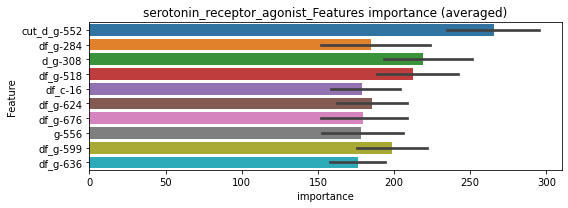

len(train_index) : 2588
len(valid_index) : 863
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489071	valid_1's binary_logloss: 0.131899
[600]	training's binary_logloss: 0.0169007	valid_1's binary_logloss: 0.107491
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.0107868	valid_1's binary_logloss: 0.103842


len(train_index) : 2588
len(valid_index) : 863
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0514466	valid_1's binary_logloss: 0.116028
[600]	training's binary_logloss: 0.0179274	valid_1's binary_logloss: 0.0822032
[900]	training's binary_logloss: 0.00928529	valid_1's binary_logloss: 0.071447
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.00615701	valid_1's binary_logloss: 0.0670574


len(train_index) : 2588
len(valid_index) : 863
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0510795	valid_1's binary_logloss: 0.126028
[600]	training's binary_logloss: 0.0175771	valid_1's binary_logloss: 0.093919
[900]	training's binary_logloss: 0.00900708	valid_1's binary_logloss: 0.0853511
[1200]	training's binary_logloss: 0.00572573	valid_1's binary_logloss: 0.0823828
Early stopping, best iteration is:
[1230]	training's binary_logloss: 0.00551867	valid_1's binary_logloss: 0.0817422


len(train_index) : 2589
len(valid_index) : 862
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0506969	valid_1's binary_logloss: 0.135432
[600]	training's binary_logloss: 0.0172704	valid_1's binary_logloss: 0.103907
[900]	training's binary_logloss: 0.00880164	valid_1's binary_logloss: 0.0954439
Early stopping, best iteration is:
[1133]	training's binary_logloss: 0.00610492	valid_1's binary_logloss: 0.0921805


serotonin_receptor_agonist logloss: 0.08620370038770575


neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239, target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.107608	valid_1's binary_logloss: 0.351683
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.0809374	valid_1's binary_logloss: 0.347375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.112293	valid_1's binary_logloss: 0.34672
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.0653073	valid_1's binary_logloss: 0.339258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.11385	valid_1's binary_logloss: 0.337064
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.0556095	valid_1's binary_logloss: 0.326122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.114224	valid_1's binary_logloss: 0.343084
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.059697	valid_1's binary_logloss: 0.330186

1 / 3 AUC score:0.809
y_Threshold: 0.1309270, Threshold: 0.5065507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 613 → Positive_corect_labels: 406/3273
p_label_rate: 0.0100452 Vs.target_rate: 0.01696, Num_p_label: 40.0, conf_0:0.35459, conf_1:0.65852
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5065507
Num_p_label: 49.0, Expected: 67.6, Adj_threshold_2: 0.4865507
threshold: 0.4865507, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 406.0/3273, y_label_rate: 0.1240452
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0499109	valid_1's binary_logloss: 0.19419
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.012258	valid_1's binary_logloss: 0.170142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.048406	valid_1's binary_logloss: 0.186116
[600]	training's binary_logloss: 0.0102353	valid_1's binary_logloss: 0.161439
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00850017	valid_1's binary_logloss: 0.160321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0474189	valid_1's binary_logloss: 0.205727
[600]	training's binary_logloss: 0.0102852	valid_1's binary_logloss: 0.187481
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.0115008	valid_1's binary_logloss: 0.186067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_loglo

2 / 3 AUC score:0.970
y_Threshold: 0.0795551, Threshold: 0.4865507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 338.0/3137
p_label_rate: 0.0236062 Vs.target_rate: 0.01696, Num_p_label: 94.0, conf_0:0.38924, conf_1:0.58386
threshold: 0.4865507, positive_p_label: 94.0/3982, p_label_rate: 0.0236062
positive_y_label: 338.0/3137, y_label_rate: 0.1077463
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0336154	valid_1's binary_logloss: 0.155077
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.0123579	valid_1's binary_logloss: 0.142765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332711	valid_1's binary_logloss: 0.16345
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.0107692	valid_1's binary_logloss: 0.152589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0326469	valid_1's binary_logloss: 0.146054
[600]	training's binary_logloss: 0.0062055	valid_1's binary_logloss: 0.126037
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00661499	valid_1's binary_logloss: 0.125185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.031861	valid_1's binary_logloss: 0.173057


3 / 3 AUC score:0.970


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.010807	valid_1's binary_logloss: 0.160781


y_Threshold: 0.0694411, Threshold: 0.4865507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 285.0/3031
p_label_rate: 0.0298845 Vs.target_rate: 0.01696, Num_p_label: 119.0, conf_0:0.43790, conf_1:0.53521
Num_p_label: 119.0, Expected: 67.6, Adj_threshold_1: 0.4865507
Num_p_label: 116.0, Expected: 67.6, Adj_threshold_2: 0.5065507
Num_p_label: 111.0, Expected: 67.6, Adj_threshold_3: 0.5265507
Num_p_label: 108.0, Expected: 67.6, Adj_threshold_4: 0.5465507
Num_p_label: 104.0, Expected: 67.6, Adj_threshold_5: 0.5665507
Num_p_label: 101.0, Expected: 67.6, Adj_threshold_6: 0.5865507
threshold: 0.5865507, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 285.0/3031, y_label_rate: 0.0940284


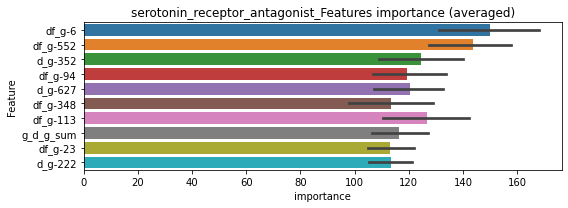

len(train_index) : 2273
len(valid_index) : 758
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045156	valid_1's binary_logloss: 0.129372
[600]	training's binary_logloss: 0.0158589	valid_1's binary_logloss: 0.10516
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.0104839	valid_1's binary_logloss: 0.100091


len(train_index) : 2273
len(valid_index) : 758
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464427	valid_1's binary_logloss: 0.131424
[600]	training's binary_logloss: 0.0162485	valid_1's binary_logloss: 0.10609
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.0105419	valid_1's binary_logloss: 0.1017


len(train_index) : 2273
len(valid_index) : 758
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0458174	valid_1's binary_logloss: 0.135397
[600]	training's binary_logloss: 0.015892	valid_1's binary_logloss: 0.109698
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.0105305	valid_1's binary_logloss: 0.10416


len(train_index) : 2274
len(valid_index) : 757
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0460788	valid_1's binary_logloss: 0.133799
[600]	training's binary_logloss: 0.0159811	valid_1's binary_logloss: 0.108076
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.0130842	valid_1's binary_logloss: 0.104846


serotonin_receptor_antagonist logloss: 0.10269876237759919


neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285, target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119291	valid_1's binary_logloss: 0.0343142
[600]	training's binary_logloss: 0.00152645	valid_1's binary_logloss: 0.0141169
[900]	training's binary_logloss: 0.000690357	valid_1's binary_logloss: 0.0110696
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.000572507	valid_1's binary_logloss: 0.0106163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120202	valid_1's binary_logloss: 0.0315137
[600]	training's binary_logloss: 0.00155096	valid_1's binary_logloss: 0.014398
[900]	training's binary_logloss: 0.000682548	valid_1's binary_logloss: 0.0115485
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000573268	valid_1's binary_logloss: 0.0111315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136321	valid_1's binary_logloss: 0.0259771
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0045496, Threshold: 0.0287672, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185, Num_p_label: 40.0, conf_0:0.02014, conf_1:0.03740
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0287672
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_2: 0.0487672
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_3: 0.0687672
threshold: 0.0687672, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110831	valid_1's binary_logloss: 0.030873
[600]	training's binary_logloss: 0.00142574	valid_1's binary_logloss: 0.0129721
[900]	training's binary_logloss: 0.000647444	valid_1's binary_logloss: 0.0100221
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000575579	valid_1's binary_logloss: 0.0096853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109223	valid_1's binary_logloss: 0.0280901
[600]	training's binary_logloss: 0.00144337	valid_1's binary_logloss: 0.0127247
[900]	training's binary_logloss: 0.000657234	valid_1's binary_logloss: 0.0105208
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000613856	valid_1's binary_logloss: 0.010329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118082	valid_1's binary_logloss: 0.0225184
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.1049410, Threshold: 0.0687672, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0133099 Vs.target_rate: 0.00185, Num_p_label: 53.0, conf_0:0.05501, conf_1:0.08252
Num_p_label: 53.0, Expected: 7.4, Adj_threshold_1: 0.0687672
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_2: 0.0887672
Num_p_label: 37.0, Expected: 7.4, Adj_threshold_3: 0.1087672
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_4: 0.1287672
Num_p_label: 29.0, Expected: 7.4, Adj_threshold_5: 0.1487672
Num_p_label: 27.0, Expected: 7.4, Adj_threshold_6: 0.1687672
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_7: 0.1887672
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_8: 0.2087672
Num_p_label: 20.0, Expected: 7.4, Adj_threshold_9: 0.2287672
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_10: 0.2487672
threshold: 0.2487672, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108875	valid_1's binary_logloss: 0.0275725
[600]	training's binary_logloss: 0.00143222	valid_1's binary_logloss: 0.011283
[900]	training's binary_logloss: 0.00064051	valid_1's binary_logloss: 0.00852342
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000649731	valid_1's binary_logloss: 0.00851943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118283	valid_1's binary_logloss: 0.0232019
[600]	training's binary_logloss: 0.0015204	valid_1's binary_logloss: 0.00688259
[900]	training's binary_logloss: 0.000669545	valid_1's binary_logloss: 0.00469675
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000647082	valid_1's binary_logloss: 0.00462299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113837	valid_1's binary_logloss: 0.0193891
[600]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0937003, Threshold: 0.2487672, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0047715 Vs.target_rate: 0.00185, Num_p_label: 19.0, conf_0:0.22389, conf_1:0.27364
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_1: 0.2487672
Num_p_label: 17.0, Expected: 7.4, Adj_threshold_2: 0.2687672
threshold: 0.2687672, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


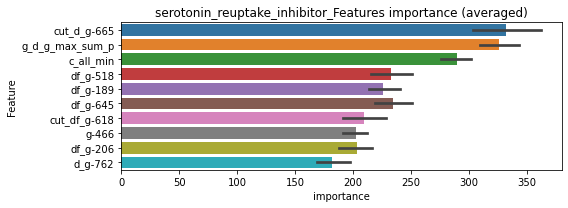

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232344	valid_1's binary_logloss: 0.0431838
[600]	training's binary_logloss: 0.00630201	valid_1's binary_logloss: 0.0209197
[900]	training's binary_logloss: 0.00324407	valid_1's binary_logloss: 0.0156174
[1200]	training's binary_logloss: 0.00214207	valid_1's binary_logloss: 0.0134291
[1500]	training's binary_logloss: 0.00160323	valid_1's binary_logloss: 0.0121606
[1800]	training's binary_logloss: 0.00128498	valid_1's binary_logloss: 0.0112906
[2100]	training's binary_logloss: 0.0010857	valid_1's binary_logloss: 0.0107225
[2400]	training's binary_logloss: 0.000946518	valid_1's binary_logloss: 0.0102636
[2700]	training's binary_logloss: 0.000843857	valid_1's binary_logloss: 0.00996264
Early stopping, best iteration is:
[2962]	training's binary_logloss: 0.000774853	valid_1's binary_logloss: 0.00973012


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242893	valid_1's binary_logloss: 0.0388747
[600]	training's binary_logloss: 0.00665599	valid_1's binary_logloss: 0.0158251
[900]	training's binary_logloss: 0.00338541	valid_1's binary_logloss: 0.0107488
[1200]	training's binary_logloss: 0.00222353	valid_1's binary_logloss: 0.00855925
[1500]	training's binary_logloss: 0.00165703	valid_1's binary_logloss: 0.00753983
[1800]	training's binary_logloss: 0.00132801	valid_1's binary_logloss: 0.00683413
[2100]	training's binary_logloss: 0.00111766	valid_1's binary_logloss: 0.00636341
[2400]	training's binary_logloss: 0.000973736	valid_1's binary_logloss: 0.00600859
[2700]	training's binary_logloss: 0.000866263	valid_1's binary_logloss: 0.00576211
[3000]	training's binary_logloss: 0.000786799	valid_1's binary_logloss: 0.00557376
Early stopping, best iteration is:
[3213]	training's binary_logloss: 0.000741251	valid_1's binary_logloss: 0.00543179


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239729	valid_1's binary_logloss: 0.0349291
[600]	training's binary_logloss: 0.00673861	valid_1's binary_logloss: 0.013316
[900]	training's binary_logloss: 0.00342864	valid_1's binary_logloss: 0.00834909
[1200]	training's binary_logloss: 0.00224741	valid_1's binary_logloss: 0.00637923
[1500]	training's binary_logloss: 0.00167508	valid_1's binary_logloss: 0.00534688
[1800]	training's binary_logloss: 0.00134165	valid_1's binary_logloss: 0.00472883
[2100]	training's binary_logloss: 0.00112835	valid_1's binary_logloss: 0.0042736
[2400]	training's binary_logloss: 0.000980687	valid_1's binary_logloss: 0.00397654
[2700]	training's binary_logloss: 0.000873529	valid_1's binary_logloss: 0.00376583
[3000]	training's binary_logloss: 0.000792906	valid_1's binary_logloss: 0.00357891
Early stopping, best iteration is:
[3096]	training's binary_logloss: 0.000770824	valid_1's binary_logloss: 0.00352838


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235437	valid_1's binary_logloss: 0.0479437
[600]	training's binary_logloss: 0.00645946	valid_1's binary_logloss: 0.0232191
[900]	training's binary_logloss: 0.00332635	valid_1's binary_logloss: 0.0172736
[1200]	training's binary_logloss: 0.0021939	valid_1's binary_logloss: 0.0146607
[1500]	training's binary_logloss: 0.00163715	valid_1's binary_logloss: 0.0133307
[1800]	training's binary_logloss: 0.00131215	valid_1's binary_logloss: 0.0123413
[2100]	training's binary_logloss: 0.00110373	valid_1's binary_logloss: 0.0115912
[2400]	training's binary_logloss: 0.000960712	valid_1's binary_logloss: 0.0111015
Early stopping, best iteration is:
[2562]	training's binary_logloss: 0.000900027	valid_1's binary_logloss: 0.0108607


serotonin_reuptake_inhibitor logloss: 0.0073877596743403325


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00811987	valid_1's binary_logloss: 0.0312481
[600]	training's binary_logloss: 0.00110097	valid_1's binary_logloss: 0.0161714
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000561456	valid_1's binary_logloss: 0.01422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00885023	valid_1's binary_logloss: 0.0182111
[600]	training's binary_logloss: 0.00120472	valid_1's binary_logloss: 0.00750432
[900]	training's binary_logloss: 0.000572509	valid_1's binary_logloss: 0.00593897
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000530537	valid_1's binary_logloss: 0.00580244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872974	valid_1's binary_logloss: 0.0159244
[600]	training's binary_logloss: 0.00120205	valid_1's binary_logloss: 0.00503248
[900]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0030983, Threshold: 0.0233809, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01637, conf_1:0.03040
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0233809
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.0433809
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.0633809
threshold: 0.0633809, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762713	valid_1's binary_logloss: 0.0292278
[600]	training's binary_logloss: 0.00106444	valid_1's binary_logloss: 0.0153951
[900]	training's binary_logloss: 0.000521549	valid_1's binary_logloss: 0.0133524
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000515705	valid_1's binary_logloss: 0.0133342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819189	valid_1's binary_logloss: 0.0165393
[600]	training's binary_logloss: 0.00111675	valid_1's binary_logloss: 0.00654916
[900]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.00536098
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000495311	valid_1's binary_logloss: 0.00528816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832205	valid_1's binary_logloss: 0.0136126
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0291577, Threshold: 0.0633809, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0160723 Vs.target_rate: 0.00151, Num_p_label: 64.0, conf_0:0.05070, conf_1:0.07606
Num_p_label: 64.0, Expected: 6.0, Adj_threshold_1: 0.0633809
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_2: 0.0833809
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_3: 0.1033809
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_4: 0.1233809
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_5: 0.1433809
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_6: 0.1633809
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_7: 0.1833809
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_8: 0.2033809
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_9: 0.2233809
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_10: 0.2433809
threshold: 0.2633809, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762713	valid_1's binary_logloss: 0.0292278
[600]	training's binary_logloss: 0.00106444	valid_1's binary_logloss: 0.0153951
[900]	training's binary_logloss: 0.000521549	valid_1's binary_logloss: 0.0133524
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000515705	valid_1's binary_logloss: 0.0133342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819189	valid_1's binary_logloss: 0.0165393
[600]	training's binary_logloss: 0.00111675	valid_1's binary_logloss: 0.00654916
[900]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.00536098
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000495311	valid_1's binary_logloss: 0.00528816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832205	valid_1's binary_logloss: 0.0136126
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0291577, Threshold: 0.2633809, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0042692 Vs.target_rate: 0.00151, Num_p_label: 17.0, conf_0:0.23704, conf_1:0.28972
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.2633809
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.2833809
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_3: 0.3033809
threshold: 0.3033809, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


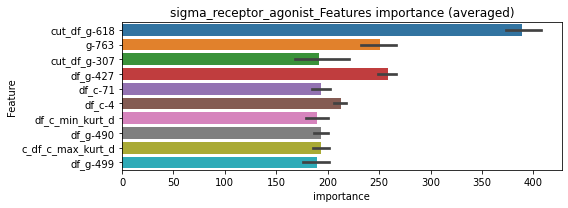

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01826	valid_1's binary_logloss: 0.0403468
[600]	training's binary_logloss: 0.00513347	valid_1's binary_logloss: 0.0216694
[900]	training's binary_logloss: 0.00264455	valid_1's binary_logloss: 0.016951
[1200]	training's binary_logloss: 0.00176265	valid_1's binary_logloss: 0.0149798
[1500]	training's binary_logloss: 0.0013248	valid_1's binary_logloss: 0.0136618
[1800]	training's binary_logloss: 0.00107367	valid_1's binary_logloss: 0.0128332
[2100]	training's binary_logloss: 0.000910488	valid_1's binary_logloss: 0.0123727
[2400]	training's binary_logloss: 0.000795449	valid_1's binary_logloss: 0.0118458
Early stopping, best iteration is:
[2555]	training's binary_logloss: 0.000750125	valid_1's binary_logloss: 0.0116597


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192418	valid_1's binary_logloss: 0.0291956
[600]	training's binary_logloss: 0.00532606	valid_1's binary_logloss: 0.0121911
[900]	training's binary_logloss: 0.00275327	valid_1's binary_logloss: 0.00858987
[1200]	training's binary_logloss: 0.00182432	valid_1's binary_logloss: 0.00721154
[1500]	training's binary_logloss: 0.00136789	valid_1's binary_logloss: 0.00645864
[1800]	training's binary_logloss: 0.00110214	valid_1's binary_logloss: 0.00599196
[2100]	training's binary_logloss: 0.000933147	valid_1's binary_logloss: 0.00568126
[2400]	training's binary_logloss: 0.00081645	valid_1's binary_logloss: 0.00545391
[2700]	training's binary_logloss: 0.000730546	valid_1's binary_logloss: 0.00528836
[3000]	training's binary_logloss: 0.00066606	valid_1's binary_logloss: 0.00517548
Early stopping, best iteration is:
[3102]	training's binary_logloss: 0.000646957	valid_1's binary_logloss: 0.00512938


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194998	valid_1's binary_logloss: 0.0274251
[600]	training's binary_logloss: 0.00543407	valid_1's binary_logloss: 0.0104404
[900]	training's binary_logloss: 0.00280222	valid_1's binary_logloss: 0.00666182
[1200]	training's binary_logloss: 0.00185266	valid_1's binary_logloss: 0.00515607
[1500]	training's binary_logloss: 0.0013844	valid_1's binary_logloss: 0.00437388
[1800]	training's binary_logloss: 0.00111657	valid_1's binary_logloss: 0.00390762
[2100]	training's binary_logloss: 0.000943923	valid_1's binary_logloss: 0.00360148
[2400]	training's binary_logloss: 0.000823823	valid_1's binary_logloss: 0.00337259
[2700]	training's binary_logloss: 0.000736269	valid_1's binary_logloss: 0.00323413
[3000]	training's binary_logloss: 0.00067208	valid_1's binary_logloss: 0.00307669
[3300]	training's binary_logloss: 0.000621347	valid_1's binary_logloss: 0.00296468
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189212	valid_1's binary_logloss: 0.0355585
[600]	training's binary_logloss: 0.00525563	valid_1's binary_logloss: 0.0174069
[900]	training's binary_logloss: 0.00270023	valid_1's binary_logloss: 0.0131158
[1200]	training's binary_logloss: 0.00178656	valid_1's binary_logloss: 0.0113023
[1500]	training's binary_logloss: 0.00133706	valid_1's binary_logloss: 0.0102156
[1800]	training's binary_logloss: 0.00107596	valid_1's binary_logloss: 0.00956225
[2100]	training's binary_logloss: 0.000910301	valid_1's binary_logloss: 0.00904603
[2400]	training's binary_logloss: 0.000793781	valid_1's binary_logloss: 0.00865151
Early stopping, best iteration is:
[2593]	training's binary_logloss: 0.000736433	valid_1's binary_logloss: 0.00844465


sigma_receptor_agonist logloss: 0.007017121094654788


neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114611	valid_1's binary_logloss: 0.0275526
[600]	training's binary_logloss: 0.00144155	valid_1's binary_logloss: 0.0121006
[900]	training's binary_logloss: 0.000633995	valid_1's binary_logloss: 0.00977741
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000600814	valid_1's binary_logloss: 0.00969541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114255	valid_1's binary_logloss: 0.0261413
[600]	training's binary_logloss: 0.00143278	valid_1's binary_logloss: 0.00772019
[900]	training's binary_logloss: 0.000624827	valid_1's binary_logloss: 0.00503646
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000504435	valid_1's binary_logloss: 0.00462608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121419	valid_1's binary_logloss: 0.0212419
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0040927, Threshold: 0.0142103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00995, conf_1:0.01847
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0142103
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0342103
threshold: 0.0342103, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102856	valid_1's binary_logloss: 0.0277064
[600]	training's binary_logloss: 0.00132027	valid_1's binary_logloss: 0.0123767
[900]	training's binary_logloss: 0.000591932	valid_1's binary_logloss: 0.0105648
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.00053838	valid_1's binary_logloss: 0.0104343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103619	valid_1's binary_logloss: 0.0233706
[600]	training's binary_logloss: 0.00133287	valid_1's binary_logloss: 0.00679503
[900]	training's binary_logloss: 0.000596628	valid_1's binary_logloss: 0.00490768
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000489303	valid_1's binary_logloss: 0.00459182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106538	valid_1's binary_logloss: 0.0168179
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0260690, Threshold: 0.0342103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0077850 Vs.target_rate: 0.00151, Num_p_label: 31.0, conf_0:0.02737, conf_1:0.04105
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_1: 0.0342103
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.0542103
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.0742103
threshold: 0.0742103, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102856	valid_1's binary_logloss: 0.0277064
[600]	training's binary_logloss: 0.00132027	valid_1's binary_logloss: 0.0123767
[900]	training's binary_logloss: 0.000591932	valid_1's binary_logloss: 0.0105648
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.00053838	valid_1's binary_logloss: 0.0104343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103619	valid_1's binary_logloss: 0.0233706
[600]	training's binary_logloss: 0.00133287	valid_1's binary_logloss: 0.00679503
[900]	training's binary_logloss: 0.000596628	valid_1's binary_logloss: 0.00490768
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000489303	valid_1's binary_logloss: 0.00459182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106538	valid_1's binary_logloss: 0.0168179
[600]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0260690, Threshold: 0.0742103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00151, Num_p_label: 10.0, conf_0:0.06679, conf_1:0.08163
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0742103
threshold: 0.0742103, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


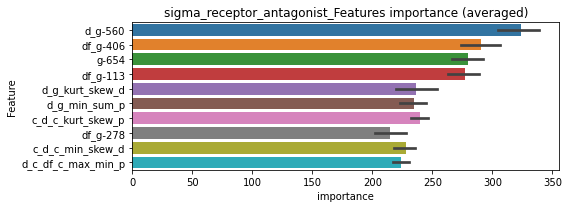

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022258	valid_1's binary_logloss: 0.0408149
[600]	training's binary_logloss: 0.0059877	valid_1's binary_logloss: 0.0196318
[900]	training's binary_logloss: 0.00303514	valid_1's binary_logloss: 0.0144748
[1200]	training's binary_logloss: 0.00198985	valid_1's binary_logloss: 0.0125311
[1500]	training's binary_logloss: 0.00147755	valid_1's binary_logloss: 0.0113166
[1800]	training's binary_logloss: 0.00118681	valid_1's binary_logloss: 0.0105991
[2100]	training's binary_logloss: 0.00100237	valid_1's binary_logloss: 0.0102278
[2400]	training's binary_logloss: 0.000872984	valid_1's binary_logloss: 0.00989802
Early stopping, best iteration is:
[2550]	training's binary_logloss: 0.0008216	valid_1's binary_logloss: 0.00974937


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220733	valid_1's binary_logloss: 0.0383952
[600]	training's binary_logloss: 0.00596617	valid_1's binary_logloss: 0.0159719
[900]	training's binary_logloss: 0.00302718	valid_1's binary_logloss: 0.010672
[1200]	training's binary_logloss: 0.00198445	valid_1's binary_logloss: 0.00863891
[1500]	training's binary_logloss: 0.00148139	valid_1's binary_logloss: 0.00749068
[1800]	training's binary_logloss: 0.0011876	valid_1's binary_logloss: 0.00677397
[2100]	training's binary_logloss: 0.00100136	valid_1's binary_logloss: 0.00632015
[2400]	training's binary_logloss: 0.00087267	valid_1's binary_logloss: 0.00599711
Early stopping, best iteration is:
[2464]	training's binary_logloss: 0.00084761	valid_1's binary_logloss: 0.00589691


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228589	valid_1's binary_logloss: 0.0319614
[600]	training's binary_logloss: 0.00618273	valid_1's binary_logloss: 0.0115866
[900]	training's binary_logloss: 0.0031411	valid_1's binary_logloss: 0.00728251
[1200]	training's binary_logloss: 0.00205478	valid_1's binary_logloss: 0.00547315
[1500]	training's binary_logloss: 0.00153187	valid_1's binary_logloss: 0.00459501
[1800]	training's binary_logloss: 0.00122832	valid_1's binary_logloss: 0.00402459
[2100]	training's binary_logloss: 0.00103609	valid_1's binary_logloss: 0.00366325
[2400]	training's binary_logloss: 0.000901858	valid_1's binary_logloss: 0.0034151
[2700]	training's binary_logloss: 0.000802715	valid_1's binary_logloss: 0.00318734
[3000]	training's binary_logloss: 0.000728977	valid_1's binary_logloss: 0.00305376
[3300]	training's binary_logloss: 0.000671273	valid_1's binary_logloss: 0.00292322
[3600]	training's binary_logloss: 0.00062

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226414	valid_1's binary_logloss: 0.0367595
[600]	training's binary_logloss: 0.00615464	valid_1's binary_logloss: 0.0156603
[900]	training's binary_logloss: 0.00308805	valid_1's binary_logloss: 0.011006
[1200]	training's binary_logloss: 0.00202923	valid_1's binary_logloss: 0.00903802
[1500]	training's binary_logloss: 0.00151363	valid_1's binary_logloss: 0.00794863
[1800]	training's binary_logloss: 0.00121307	valid_1's binary_logloss: 0.00728212
[2100]	training's binary_logloss: 0.00102218	valid_1's binary_logloss: 0.00679975
[2400]	training's binary_logloss: 0.000890896	valid_1's binary_logloss: 0.00649808
[2700]	training's binary_logloss: 0.000792362	valid_1's binary_logloss: 0.00623831
[3000]	training's binary_logloss: 0.000720163	valid_1's binary_logloss: 0.00604771
Early stopping, best iteration is:
[3222]	training's binary_logloss: 0.000676111	valid_1's binary_logloss: 0.00589497


sigma_receptor_antagonist logloss: 0.006069975101918152


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00683686	valid_1's binary_logloss: 0.0116667
[600]	training's binary_logloss: 0.000857943	valid_1's binary_logloss: 0.00262103
[900]	training's binary_logloss: 0.000426208	valid_1's binary_logloss: 0.00166705
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000411633	valid_1's binary_logloss: 0.00162621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646295	valid_1's binary_logloss: 0.0176688
[600]	training's binary_logloss: 0.000812536	valid_1's binary_logloss: 0.00712987
[900]	training's binary_logloss: 0.000410468	valid_1's binary_logloss: 0.00589794
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000419213	valid_1's binary_logloss: 0.005878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676579	valid_1's binary_logloss: 0.00910004
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0024695, Threshold: 0.0081573, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00571, conf_1:0.01060
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0081573
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0281573
threshold: 0.0281573, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641313	valid_1's binary_logloss: 0.0103916
[600]	training's binary_logloss: 0.000796092	valid_1's binary_logloss: 0.00198804
[900]	training's binary_logloss: 0.000405791	valid_1's binary_logloss: 0.00124365
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000388685	valid_1's binary_logloss: 0.00120666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618988	valid_1's binary_logloss: 0.0154042
[600]	training's binary_logloss: 0.000778121	valid_1's binary_logloss: 0.0054694
[900]	training's binary_logloss: 0.00039863	valid_1's binary_logloss: 0.00446181
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00039153	valid_1's binary_logloss: 0.00443652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624561	valid_1's binary_logloss: 0.00891298
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0419349, Threshold: 0.0281573, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00105, Num_p_label: 13.0, conf_0:0.02253, conf_1:0.03379
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_1: 0.0281573
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_2: 0.0481573
threshold: 0.0481573, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641313	valid_1's binary_logloss: 0.0103916
[600]	training's binary_logloss: 0.000796092	valid_1's binary_logloss: 0.00198804
[900]	training's binary_logloss: 0.000405791	valid_1's binary_logloss: 0.00124365
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000388685	valid_1's binary_logloss: 0.00120666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618988	valid_1's binary_logloss: 0.0154042
[600]	training's binary_logloss: 0.000778121	valid_1's binary_logloss: 0.0054694
[900]	training's binary_logloss: 0.00039863	valid_1's binary_logloss: 0.00446181
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00039153	valid_1's binary_logloss: 0.00443652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624561	valid_1's binary_logloss: 0.00891298
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0419349, Threshold: 0.0481573, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00105, Num_p_label: 6.0, conf_0:0.04334, conf_1:0.05297
threshold: 0.0481573, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


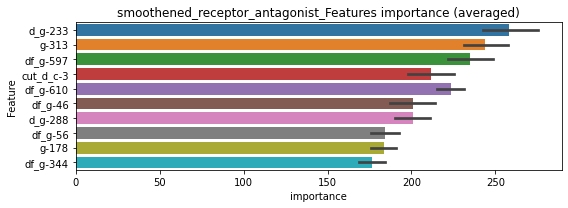

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150984	valid_1's binary_logloss: 0.021267
[600]	training's binary_logloss: 0.0039116	valid_1's binary_logloss: 0.00677505
[900]	training's binary_logloss: 0.00201583	valid_1's binary_logloss: 0.00396278
[1200]	training's binary_logloss: 0.00135647	valid_1's binary_logloss: 0.00289737
[1500]	training's binary_logloss: 0.00102693	valid_1's binary_logloss: 0.00233991
[1800]	training's binary_logloss: 0.000836526	valid_1's binary_logloss: 0.00200008
[2100]	training's binary_logloss: 0.000712757	valid_1's binary_logloss: 0.001771
[2400]	training's binary_logloss: 0.000627517	valid_1's binary_logloss: 0.00161049
[2700]	training's binary_logloss: 0.000564914	valid_1's binary_logloss: 0.00149015
[3000]	training's binary_logloss: 0.000518376	valid_1's binary_logloss: 0.00139837
[3300]	training's binary_logloss: 0.000481855	valid_1's binary_logloss: 0.00131794
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147595	valid_1's binary_logloss: 0.0249508
[600]	training's binary_logloss: 0.00385569	valid_1's binary_logloss: 0.0103733
[900]	training's binary_logloss: 0.00199554	valid_1's binary_logloss: 0.00737947
[1200]	training's binary_logloss: 0.00133741	valid_1's binary_logloss: 0.00616535
[1500]	training's binary_logloss: 0.00101454	valid_1's binary_logloss: 0.00556398
[1800]	training's binary_logloss: 0.000825641	valid_1's binary_logloss: 0.00512035
[2100]	training's binary_logloss: 0.000705433	valid_1's binary_logloss: 0.00487961
[2400]	training's binary_logloss: 0.000620282	valid_1's binary_logloss: 0.00469298
[2700]	training's binary_logloss: 0.000558836	valid_1's binary_logloss: 0.00454419
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000520613	valid_1's binary_logloss: 0.00444214


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015011	valid_1's binary_logloss: 0.019416
[600]	training's binary_logloss: 0.00388877	valid_1's binary_logloss: 0.00593076
[900]	training's binary_logloss: 0.00201317	valid_1's binary_logloss: 0.00338807
[1200]	training's binary_logloss: 0.00134996	valid_1's binary_logloss: 0.00240583
[1500]	training's binary_logloss: 0.00102269	valid_1's binary_logloss: 0.00190808
[1800]	training's binary_logloss: 0.000832982	valid_1's binary_logloss: 0.00160979
[2100]	training's binary_logloss: 0.000710783	valid_1's binary_logloss: 0.00141285
[2400]	training's binary_logloss: 0.000626128	valid_1's binary_logloss: 0.00127315
[2700]	training's binary_logloss: 0.000564547	valid_1's binary_logloss: 0.00116773
[3000]	training's binary_logloss: 0.000517795	valid_1's binary_logloss: 0.00108885
[3300]	training's binary_logloss: 0.000482075	valid_1's binary_logloss: 0.00102659
[3600]	training's binary_logloss: 0.00

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149763	valid_1's binary_logloss: 0.0198772
[600]	training's binary_logloss: 0.00392998	valid_1's binary_logloss: 0.00616011
[900]	training's binary_logloss: 0.00202911	valid_1's binary_logloss: 0.00349892
[1200]	training's binary_logloss: 0.00136625	valid_1's binary_logloss: 0.00249302
[1500]	training's binary_logloss: 0.00103557	valid_1's binary_logloss: 0.0019829
[1800]	training's binary_logloss: 0.000841777	valid_1's binary_logloss: 0.00167447
[2100]	training's binary_logloss: 0.000719751	valid_1's binary_logloss: 0.00147175
[2400]	training's binary_logloss: 0.00063219	valid_1's binary_logloss: 0.00131527
[2700]	training's binary_logloss: 0.000569272	valid_1's binary_logloss: 0.00120771
[3000]	training's binary_logloss: 0.000521935	valid_1's binary_logloss: 0.00112367
[3300]	training's binary_logloss: 0.000485677	valid_1's binary_logloss: 0.00105706
[3600]	training's binary_logloss: 0.00

smoothened_receptor_antagonist logloss: 0.0018560898159203643


neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261, target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0759777	valid_1's binary_logloss: 0.246521
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.0399757	valid_1's binary_logloss: 0.234786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0751067	valid_1's binary_logloss: 0.255598
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0333383	valid_1's binary_logloss: 0.245094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0741079	valid_1's binary_logloss: 0.237653
[600]	training's binary_logloss: 0.0204515	valid_1's binary_logloss: 0.222227
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.022568	valid_1's binary_logloss: 0.221817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0761446	valid_1's binary_logloss: 0.228012
[600]	training's binary_logl

1 / 3 AUC score:0.917
y_Threshold: 0.0793105, Threshold: 0.2251546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 399 → Positive_corect_labels: 518/3514
p_label_rate: 0.0100452 Vs.target_rate: 0.01121, Num_p_label: 40.0, conf_0:0.15761, conf_1:0.29270
threshold: 0.2251546, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 518.0/3514, y_label_rate: 0.1474104
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0393649	valid_1's binary_logloss: 0.17346
[600]	training's binary_logloss: 0.00783622	valid_1's binary_logloss: 0.155616
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00658135	valid_1's binary_logloss: 0.15417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0428498	valid_1's binary_logloss: 0.148166
[600]	training's binary_logloss: 0.00875141	valid_1's binary_logloss: 0.122003
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.00584493	valid_1's binary_logloss: 0.120325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440152	valid_1's binary_logloss: 0.134898
[600]	training's binary_logloss: 0.00909985	valid_1's binary_logloss: 0.100354
[900]	training's binary_logloss: 0.00304507	valid_1's binary_logloss: 0.0921169
Early stopping, best iteration is:
[950]

2 / 3 AUC score:0.990
y_Threshold: 0.0676635, Threshold: 0.2251546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 476.0/3430
p_label_rate: 0.0158212 Vs.target_rate: 0.01121, Num_p_label: 63.0, conf_0:0.18012, conf_1:0.27019
threshold: 0.2251546, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 476.0/3430, y_label_rate: 0.1387755
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327576	valid_1's binary_logloss: 0.130069
[600]	training's binary_logloss: 0.00630144	valid_1's binary_logloss: 0.102553
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00392091	valid_1's binary_logloss: 0.0991444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0360201	valid_1's binary_logloss: 0.107304
[600]	training's binary_logloss: 0.00699137	valid_1's binary_logloss: 0.0763831
[900]	training's binary_logloss: 0.00246484	valid_1's binary_logloss: 0.0690388
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00230219	valid_1's binary_logloss: 0.0685433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0335881	valid_1's binary_logloss: 0.115773
[600]	training's binary_logloss: 0.00659993	valid_1's binary_logloss: 0.0864378
Early stopping, best iteration is:

3 / 3 AUC score:0.996
y_Threshold: 0.0668520, Threshold: 0.2251546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 456.0/3390
p_label_rate: 0.0163235 Vs.target_rate: 0.01121, Num_p_label: 65.0, conf_0:0.20264, conf_1:0.24767
threshold: 0.2251546, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 456.0/3390, y_label_rate: 0.1345133


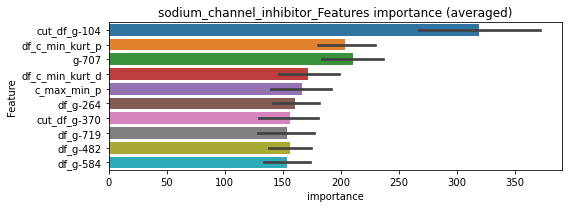

len(train_index) : 2542
len(valid_index) : 848
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0519538	valid_1's binary_logloss: 0.126341
[600]	training's binary_logloss: 0.0180535	valid_1's binary_logloss: 0.095879
[900]	training's binary_logloss: 0.00931177	valid_1's binary_logloss: 0.0861585
[1200]	training's binary_logloss: 0.00592743	valid_1's binary_logloss: 0.0826133
Early stopping, best iteration is:
[1247]	training's binary_logloss: 0.00559586	valid_1's binary_logloss: 0.0820584


len(train_index) : 2542
len(valid_index) : 848
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0532022	valid_1's binary_logloss: 0.12686
[600]	training's binary_logloss: 0.0184894	valid_1's binary_logloss: 0.101538
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.0107853	valid_1's binary_logloss: 0.0963115


len(train_index) : 2543
len(valid_index) : 847
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0541542	valid_1's binary_logloss: 0.116738
[600]	training's binary_logloss: 0.0189122	valid_1's binary_logloss: 0.085514
[900]	training's binary_logloss: 0.00965024	valid_1's binary_logloss: 0.0771068
[1200]	training's binary_logloss: 0.0060914	valid_1's binary_logloss: 0.0738862
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.00557059	valid_1's binary_logloss: 0.0734111


len(train_index) : 2543
len(valid_index) : 847
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0518405	valid_1's binary_logloss: 0.126342
[600]	training's binary_logloss: 0.0181597	valid_1's binary_logloss: 0.0961112
[900]	training's binary_logloss: 0.00944781	valid_1's binary_logloss: 0.0886052
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.00671966	valid_1's binary_logloss: 0.0861195


sodium_channel_inhibitor logloss: 0.08447790046968373


neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00798065	valid_1's binary_logloss: 0.0209946
[600]	training's binary_logloss: 0.00104434	valid_1's binary_logloss: 0.00856924
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000606479	valid_1's binary_logloss: 0.0070259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775132	valid_1's binary_logloss: 0.0178897
[600]	training's binary_logloss: 0.0010462	valid_1's binary_logloss: 0.00840917
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000670294	valid_1's binary_logloss: 0.00779463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00803766	valid_1's binary_logloss: 0.014725
[600]	training's binary_logloss: 0.00108562	valid_1's binary_logloss: 0.00520894
[900]	training's binary_logloss: 0.000511532	valid_1's binary_logloss: 0.00435493
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0032237, Threshold: 0.0107883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.00755, conf_1:0.01402
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0107883
Num_p_label: 8.0, Expected: 5.4, Adj_threshold_2: 0.0307883
threshold: 0.0307883, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733513	valid_1's binary_logloss: 0.0188548
[600]	training's binary_logloss: 0.00100008	valid_1's binary_logloss: 0.00787023
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000497348	valid_1's binary_logloss: 0.00641968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731098	valid_1's binary_logloss: 0.0170902
[600]	training's binary_logloss: 0.000988801	valid_1's binary_logloss: 0.00821734
[900]	training's binary_logloss: 0.00048057	valid_1's binary_logloss: 0.00726191
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000482774	valid_1's binary_logloss: 0.00725998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00803092	valid_1's binary_logloss: 0.0148314
[600]	training's binary_logloss: 0.00104925	valid_1's binary_logloss: 0.00621545
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.0155605, Threshold: 0.0307883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0065294 Vs.target_rate: 0.00134, Num_p_label: 26.0, conf_0:0.02463, conf_1:0.03695
Num_p_label: 26.0, Expected: 5.4, Adj_threshold_1: 0.0307883
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_2: 0.0507883
threshold: 0.0507883, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734396	valid_1's binary_logloss: 0.0173549
[600]	training's binary_logloss: 0.00099161	valid_1's binary_logloss: 0.00598076
[900]	training's binary_logloss: 0.000473169	valid_1's binary_logloss: 0.00453621
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000439002	valid_1's binary_logloss: 0.00437923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0074752	valid_1's binary_logloss: 0.0155396
[600]	training's binary_logloss: 0.000999534	valid_1's binary_logloss: 0.0057333
[900]	training's binary_logloss: 0.000481726	valid_1's binary_logloss: 0.00440412
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.00046076	valid_1's binary_logloss: 0.00432073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00745665	valid_1's binary_logloss: 0.0177734
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0374817, Threshold: 0.0507883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0020090 Vs.target_rate: 0.00134, Num_p_label: 8.0, conf_0:0.04571, conf_1:0.05587
threshold: 0.0507883, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


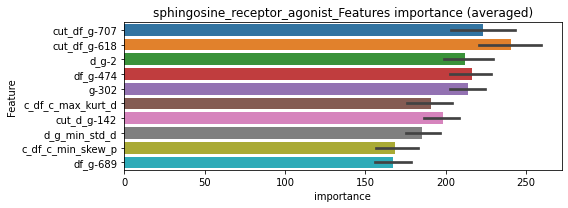

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173657	valid_1's binary_logloss: 0.0300944
[600]	training's binary_logloss: 0.00471239	valid_1's binary_logloss: 0.0124951
[900]	training's binary_logloss: 0.00242984	valid_1's binary_logloss: 0.00844025
[1200]	training's binary_logloss: 0.00161736	valid_1's binary_logloss: 0.00697216
[1500]	training's binary_logloss: 0.00121983	valid_1's binary_logloss: 0.00602178
[1800]	training's binary_logloss: 0.000986342	valid_1's binary_logloss: 0.0054057
[2100]	training's binary_logloss: 0.000837752	valid_1's binary_logloss: 0.00502585
Early stopping, best iteration is:
[2070]	training's binary_logloss: 0.000850002	valid_1's binary_logloss: 0.00502527


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175583	valid_1's binary_logloss: 0.0268199
[600]	training's binary_logloss: 0.00475533	valid_1's binary_logloss: 0.0110387
[900]	training's binary_logloss: 0.00245993	valid_1's binary_logloss: 0.00758095
[1200]	training's binary_logloss: 0.00163598	valid_1's binary_logloss: 0.00611199
[1500]	training's binary_logloss: 0.001231	valid_1's binary_logloss: 0.00530995
[1800]	training's binary_logloss: 0.000996434	valid_1's binary_logloss: 0.00483624
[2100]	training's binary_logloss: 0.00084493	valid_1's binary_logloss: 0.00450345
[2400]	training's binary_logloss: 0.000738787	valid_1's binary_logloss: 0.00426861
[2700]	training's binary_logloss: 0.000662721	valid_1's binary_logloss: 0.00409491
[3000]	training's binary_logloss: 0.000605721	valid_1's binary_logloss: 0.00397419
[3300]	training's binary_logloss: 0.000561281	valid_1's binary_logloss: 0.00386988
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177696	valid_1's binary_logloss: 0.0293691
[600]	training's binary_logloss: 0.00483623	valid_1's binary_logloss: 0.0116626
[900]	training's binary_logloss: 0.0024796	valid_1's binary_logloss: 0.00774112
[1200]	training's binary_logloss: 0.00164508	valid_1's binary_logloss: 0.00628939
[1500]	training's binary_logloss: 0.00123574	valid_1's binary_logloss: 0.0054118
[1800]	training's binary_logloss: 0.000999611	valid_1's binary_logloss: 0.00496071
[2100]	training's binary_logloss: 0.000846869	valid_1's binary_logloss: 0.00463103
[2400]	training's binary_logloss: 0.000741087	valid_1's binary_logloss: 0.00439664
[2700]	training's binary_logloss: 0.000663442	valid_1's binary_logloss: 0.0042221
[3000]	training's binary_logloss: 0.000603801	valid_1's binary_logloss: 0.00406301
[3300]	training's binary_logloss: 0.000559627	valid_1's binary_logloss: 0.00394324
Early stopping, best iteration is:
[3450

len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172693	valid_1's binary_logloss: 0.0339704
[600]	training's binary_logloss: 0.00467881	valid_1's binary_logloss: 0.0168456
[900]	training's binary_logloss: 0.00240489	valid_1's binary_logloss: 0.0127159
[1200]	training's binary_logloss: 0.0016001	valid_1's binary_logloss: 0.0108771
[1500]	training's binary_logloss: 0.00120352	valid_1's binary_logloss: 0.00974467
[1800]	training's binary_logloss: 0.000974969	valid_1's binary_logloss: 0.00917134
[2100]	training's binary_logloss: 0.000827193	valid_1's binary_logloss: 0.00871269
[2400]	training's binary_logloss: 0.000724282	valid_1's binary_logloss: 0.00836758
[2700]	training's binary_logloss: 0.000649849	valid_1's binary_logloss: 0.00815413
[3000]	training's binary_logloss: 0.000593076	valid_1's binary_logloss: 0.00793938
Early stopping, best iteration is:
[3059]	training's binary_logloss: 0.000583461	valid_1's binary_logloss: 0.0078905


sphingosine_receptor_agonist logloss: 0.005152370679326003


neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278, target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175534	valid_1's binary_logloss: 0.0525137
[600]	training's binary_logloss: 0.0027318	valid_1's binary_logloss: 0.0308359
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00135227	valid_1's binary_logloss: 0.0279277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188578	valid_1's binary_logloss: 0.0494083
[600]	training's binary_logloss: 0.00298126	valid_1's binary_logloss: 0.0260823
[900]	training's binary_logloss: 0.00116147	valid_1's binary_logloss: 0.0216734
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000852483	valid_1's binary_logloss: 0.0210815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188961	valid_1's binary_logloss: 0.048366
[600]	training's binary_logloss: 0.002911	valid_1's binary_logloss: 0.0269699
[900]	training's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0083797, Threshold: 0.0309694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00298, Num_p_label: 40.0, conf_0:0.02168, conf_1:0.04026
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0309694
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.0509694
Num_p_label: 9.0, Expected: 11.9, Adj_threshold_3: 0.0709694
threshold: 0.0709694, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168276	valid_1's binary_logloss: 0.056331
[600]	training's binary_logloss: 0.00257738	valid_1's binary_logloss: 0.037198
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00131514	valid_1's binary_logloss: 0.0349707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017034	valid_1's binary_logloss: 0.0435966
[600]	training's binary_logloss: 0.0026867	valid_1's binary_logloss: 0.0230759
[900]	training's binary_logloss: 0.0010813	valid_1's binary_logloss: 0.0190664
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000995934	valid_1's binary_logloss: 0.0189108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169323	valid_1's binary_logloss: 0.0455776
[600]	training's binary_logloss: 0.00262866	valid_1's binary_logloss: 0.0214117
[900]	training's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0237751, Threshold: 0.0709694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3789
p_label_rate: 0.0118031 Vs.target_rate: 0.00298, Num_p_label: 47.0, conf_0:0.05678, conf_1:0.08516
Num_p_label: 47.0, Expected: 11.9, Adj_threshold_1: 0.0709694
Num_p_label: 35.0, Expected: 11.9, Adj_threshold_2: 0.0909694
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_3: 0.1109694
Num_p_label: 21.0, Expected: 11.9, Adj_threshold_4: 0.1309694
Num_p_label: 14.0, Expected: 11.9, Adj_threshold_5: 0.1509694
threshold: 0.1509694, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015769	valid_1's binary_logloss: 0.058762
[600]	training's binary_logloss: 0.00243906	valid_1's binary_logloss: 0.0365801
[900]	training's binary_logloss: 0.0010024	valid_1's binary_logloss: 0.0323712
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000925304	valid_1's binary_logloss: 0.0322665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016768	valid_1's binary_logloss: 0.0431655
[600]	training's binary_logloss: 0.00261813	valid_1's binary_logloss: 0.0203407
[900]	training's binary_logloss: 0.00107385	valid_1's binary_logloss: 0.0169695
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.00082115	valid_1's binary_logloss: 0.0161554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167638	valid_1's binary_logloss: 0.05364
[600]	training's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0409435, Threshold: 0.1509694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0080362 Vs.target_rate: 0.00298, Num_p_label: 32.0, conf_0:0.13587, conf_1:0.16607
Num_p_label: 32.0, Expected: 11.9, Adj_threshold_1: 0.1509694
Num_p_label: 26.0, Expected: 11.9, Adj_threshold_2: 0.1709694
Num_p_label: 22.0, Expected: 11.9, Adj_threshold_3: 0.1909694
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_4: 0.2109694
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_5: 0.2309694
threshold: 0.2309694, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3783, y_label_rate: 0.1707639


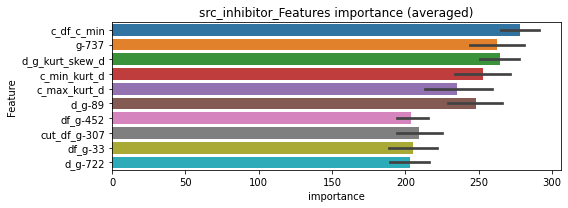

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0316856	valid_1's binary_logloss: 0.070683
[600]	training's binary_logloss: 0.00985293	valid_1's binary_logloss: 0.048287
[900]	training's binary_logloss: 0.00499253	valid_1's binary_logloss: 0.0415319
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00479299	valid_1's binary_logloss: 0.041208


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0326737	valid_1's binary_logloss: 0.0651741
[600]	training's binary_logloss: 0.0100061	valid_1's binary_logloss: 0.0372494
[900]	training's binary_logloss: 0.00511053	valid_1's binary_logloss: 0.029517
[1200]	training's binary_logloss: 0.00328397	valid_1's binary_logloss: 0.0266823
[1500]	training's binary_logloss: 0.00240218	valid_1's binary_logloss: 0.025357
[1800]	training's binary_logloss: 0.00190477	valid_1's binary_logloss: 0.0242731
Early stopping, best iteration is:
[2001]	training's binary_logloss: 0.0016747	valid_1's binary_logloss: 0.0238503


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0337427	valid_1's binary_logloss: 0.0676632
[600]	training's binary_logloss: 0.0103379	valid_1's binary_logloss: 0.0434123
[900]	training's binary_logloss: 0.00521787	valid_1's binary_logloss: 0.0373942
[1200]	training's binary_logloss: 0.00333952	valid_1's binary_logloss: 0.0349644
[1500]	training's binary_logloss: 0.00243257	valid_1's binary_logloss: 0.0337718
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.0021632	valid_1's binary_logloss: 0.0335075


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0337966	valid_1's binary_logloss: 0.0644569
[600]	training's binary_logloss: 0.0102099	valid_1's binary_logloss: 0.0387282
[900]	training's binary_logloss: 0.00518589	valid_1's binary_logloss: 0.0325632
[1200]	training's binary_logloss: 0.00332725	valid_1's binary_logloss: 0.0300973
[1500]	training's binary_logloss: 0.00243396	valid_1's binary_logloss: 0.0289309
Early stopping, best iteration is:
[1518]	training's binary_logloss: 0.00239573	valid_1's binary_logloss: 0.0288172


src_inhibitor logloss: 0.03184658264901735


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275, target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218818	valid_1's binary_logloss: 0.074855
[600]	training's binary_logloss: 0.00342244	valid_1's binary_logloss: 0.0512658
[900]	training's binary_logloss: 0.00130193	valid_1's binary_logloss: 0.0473843
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00133977	valid_1's binary_logloss: 0.0473515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021944	valid_1's binary_logloss: 0.0662359
[600]	training's binary_logloss: 0.0034466	valid_1's binary_logloss: 0.0356461
[900]	training's binary_logloss: 0.00131821	valid_1's binary_logloss: 0.0305626
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00124287	valid_1's binary_logloss: 0.0302422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240199	valid_1's binary_logloss: 0.0649835
[600]	training's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0111625, Threshold: 0.2202199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 143 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00332, Num_p_label: 40.0, conf_0:0.15415, conf_1:0.28629
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2202199
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_2: 0.2402199
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_3: 0.2602199
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_4: 0.2802199
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_5: 0.3002199
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_6: 0.3202199
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_7: 0.3402199
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_8: 0.3602199
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_9: 0.3802199
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_10: 0.4002199
threshold: 0.4202199, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3787, y_label_rate: 0.1713758


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201789	valid_1's binary_logloss: 0.0639011
[600]	training's binary_logloss: 0.00307765	valid_1's binary_logloss: 0.0387607
[900]	training's binary_logloss: 0.00120345	valid_1's binary_logloss: 0.0351019
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000919047	valid_1's binary_logloss: 0.0340538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208345	valid_1's binary_logloss: 0.0630015
[600]	training's binary_logloss: 0.00304499	valid_1's binary_logloss: 0.0346217
[900]	training's binary_logloss: 0.00118763	valid_1's binary_logloss: 0.0294857
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000860821	valid_1's binary_logloss: 0.028756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204819	valid_1's binary_logloss: 0.0506077
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0419887, Threshold: 0.4202199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0140633 Vs.target_rate: 0.00332, Num_p_label: 56.0, conf_0:0.33618, conf_1:0.50426
Num_p_label: 56.0, Expected: 13.2, Adj_threshold_1: 0.4202199
Num_p_label: 53.0, Expected: 13.2, Adj_threshold_2: 0.4402199
Num_p_label: 52.0, Expected: 13.2, Adj_threshold_3: 0.4602199
Num_p_label: 49.0, Expected: 13.2, Adj_threshold_4: 0.4802199
Num_p_label: 47.0, Expected: 13.2, Adj_threshold_5: 0.5002199
Num_p_label: 43.0, Expected: 13.2, Adj_threshold_6: 0.5202199
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_7: 0.5402199
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_8: 0.5602199
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_9: 0.5802199
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_10: 0.6002199
threshold: 0.6202199, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 645.0/3779, y_label_rate: 0.1706801


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196071	valid_1's binary_logloss: 0.0616313
[600]	training's binary_logloss: 0.00292257	valid_1's binary_logloss: 0.0326113
[900]	training's binary_logloss: 0.00116862	valid_1's binary_logloss: 0.0272343
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000834475	valid_1's binary_logloss: 0.0256478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193818	valid_1's binary_logloss: 0.0509945
[600]	training's binary_logloss: 0.00289996	valid_1's binary_logloss: 0.0236226
[900]	training's binary_logloss: 0.00115603	valid_1's binary_logloss: 0.0191168
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000875244	valid_1's binary_logloss: 0.0180219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200676	valid_1's binary_logloss: 0.0477221
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0449156, Threshold: 0.6202199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3773
p_label_rate: 0.0097941 Vs.target_rate: 0.00332, Num_p_label: 39.0, conf_0:0.50000, conf_1:0.68224
Num_p_label: 39.0, Expected: 13.2, Adj_threshold_1: 0.6202199
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_2: 0.6402199
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_3: 0.6602199
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_4: 0.6802199
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_5: 0.7002199
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_6: 0.7202199
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.7402199
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.7602199
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_9: 0.7802199
threshold: 0.7802199, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 642.0/3773, y_label_rate: 0.1701564


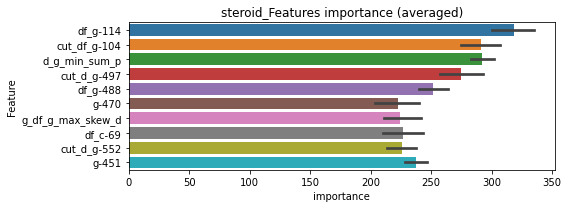

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0373106	valid_1's binary_logloss: 0.0801021
[600]	training's binary_logloss: 0.0112294	valid_1's binary_logloss: 0.0470674
[900]	training's binary_logloss: 0.00562248	valid_1's binary_logloss: 0.0381582
[1200]	training's binary_logloss: 0.00357921	valid_1's binary_logloss: 0.0349282
[1500]	training's binary_logloss: 0.00259644	valid_1's binary_logloss: 0.0334467
[1800]	training's binary_logloss: 0.00203655	valid_1's binary_logloss: 0.0320098
Early stopping, best iteration is:
[1798]	training's binary_logloss: 0.00203939	valid_1's binary_logloss: 0.0320039


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0377791	valid_1's binary_logloss: 0.0764745
[600]	training's binary_logloss: 0.0111715	valid_1's binary_logloss: 0.0421256
[900]	training's binary_logloss: 0.00553881	valid_1's binary_logloss: 0.0330334
[1200]	training's binary_logloss: 0.00354827	valid_1's binary_logloss: 0.029466
[1500]	training's binary_logloss: 0.00258154	valid_1's binary_logloss: 0.0273931
Early stopping, best iteration is:
[1617]	training's binary_logloss: 0.0023349	valid_1's binary_logloss: 0.0266976


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0379925	valid_1's binary_logloss: 0.06647
[600]	training's binary_logloss: 0.011462	valid_1's binary_logloss: 0.0332427
[900]	training's binary_logloss: 0.0057509	valid_1's binary_logloss: 0.0248184
[1200]	training's binary_logloss: 0.0036725	valid_1's binary_logloss: 0.021458
[1500]	training's binary_logloss: 0.00267141	valid_1's binary_logloss: 0.0197428
[1800]	training's binary_logloss: 0.00209707	valid_1's binary_logloss: 0.0189157
[2100]	training's binary_logloss: 0.00173146	valid_1's binary_logloss: 0.0181847
Early stopping, best iteration is:
[2169]	training's binary_logloss: 0.00166435	valid_1's binary_logloss: 0.0179987


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375393	valid_1's binary_logloss: 0.0746997
[600]	training's binary_logloss: 0.0112813	valid_1's binary_logloss: 0.0405227
[900]	training's binary_logloss: 0.00566579	valid_1's binary_logloss: 0.0316228
[1200]	training's binary_logloss: 0.00362238	valid_1's binary_logloss: 0.028165
[1500]	training's binary_logloss: 0.00263548	valid_1's binary_logloss: 0.0262373
[1800]	training's binary_logloss: 0.00207024	valid_1's binary_logloss: 0.0250452
[2100]	training's binary_logloss: 0.00171162	valid_1's binary_logloss: 0.024158
Early stopping, best iteration is:
[2367]	training's binary_logloss: 0.00148655	valid_1's binary_logloss: 0.0235271


steroid logloss: 0.025058671968941182


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567495	valid_1's binary_logloss: 0.00856139
[600]	training's binary_logloss: 0.000701007	valid_1's binary_logloss: 0.00164456
[900]	training's binary_logloss: 0.000397591	valid_1's binary_logloss: 0.00116688
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000391421	valid_1's binary_logloss: 0.00115444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528061	valid_1's binary_logloss: 0.0109232
[600]	training's binary_logloss: 0.000672591	valid_1's binary_logloss: 0.0026583
[900]	training's binary_logloss: 0.000386461	valid_1's binary_logloss: 0.00196602
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000382323	valid_1's binary_logloss: 0.00195513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563488	valid_1's binary_logloss: 0.00854711
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0022698, Threshold: 0.0061790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00433, conf_1:0.00803
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0061790
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0261790
threshold: 0.0261790, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511779	valid_1's binary_logloss: 0.00730225
[600]	training's binary_logloss: 0.000654379	valid_1's binary_logloss: 0.00116046
[900]	training's binary_logloss: 0.00038532	valid_1's binary_logloss: 0.000736201
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.00037789	valid_1's binary_logloss: 0.000721778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493367	valid_1's binary_logloss: 0.0107854
[600]	training's binary_logloss: 0.000645839	valid_1's binary_logloss: 0.00247198
[900]	training's binary_logloss: 0.0003857	valid_1's binary_logloss: 0.0017917
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000386555	valid_1's binary_logloss: 0.00179085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513589	valid_1's binary_logloss: 0.00802974
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.1409454, Threshold: 0.0261790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00080, Num_p_label: 16.0, conf_0:0.02094, conf_1:0.03141
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_1: 0.0261790
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_2: 0.0461790
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.0661790
threshold: 0.0661790, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511779	valid_1's binary_logloss: 0.00730225
[600]	training's binary_logloss: 0.000654379	valid_1's binary_logloss: 0.00116046
[900]	training's binary_logloss: 0.00038532	valid_1's binary_logloss: 0.000736201
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.00037789	valid_1's binary_logloss: 0.000721778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493367	valid_1's binary_logloss: 0.0107854
[600]	training's binary_logloss: 0.000645839	valid_1's binary_logloss: 0.00247198
[900]	training's binary_logloss: 0.0003857	valid_1's binary_logloss: 0.0017917
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000386555	valid_1's binary_logloss: 0.00179085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513589	valid_1's binary_logloss: 0.00802974
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.1409454, Threshold: 0.0661790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00080, Num_p_label: 5.0, conf_0:0.05956, conf_1:0.07280
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0661790
threshold: 0.0661790, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


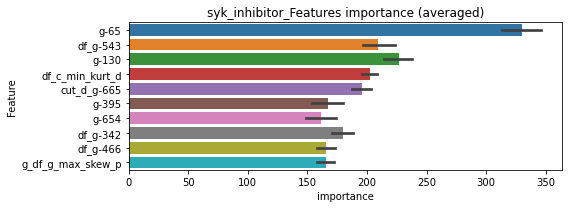

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127985	valid_1's binary_logloss: 0.0161568
[600]	training's binary_logloss: 0.00335026	valid_1's binary_logloss: 0.00468111
[900]	training's binary_logloss: 0.00176097	valid_1's binary_logloss: 0.00258396
[1200]	training's binary_logloss: 0.00119955	valid_1's binary_logloss: 0.00181539
[1500]	training's binary_logloss: 0.00092232	valid_1's binary_logloss: 0.00143315
[1800]	training's binary_logloss: 0.000753644	valid_1's binary_logloss: 0.00119495
[2100]	training's binary_logloss: 0.000645877	valid_1's binary_logloss: 0.00104039
[2400]	training's binary_logloss: 0.000571575	valid_1's binary_logloss: 0.00093225
[2700]	training's binary_logloss: 0.000516481	valid_1's binary_logloss: 0.000850917
[3000]	training's binary_logloss: 0.000475037	valid_1's binary_logloss: 0.000789281
[3300]	training's binary_logloss: 0.00044435	valid_1's binary_logloss: 0.000743456
[3600]	training's binary_logloss: 

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128026	valid_1's binary_logloss: 0.0203919
[600]	training's binary_logloss: 0.00335337	valid_1's binary_logloss: 0.00687789
[900]	training's binary_logloss: 0.00175873	valid_1's binary_logloss: 0.0041082
[1200]	training's binary_logloss: 0.00118953	valid_1's binary_logloss: 0.00304062
[1500]	training's binary_logloss: 0.000909513	valid_1's binary_logloss: 0.00247276
[1800]	training's binary_logloss: 0.000748594	valid_1's binary_logloss: 0.00213246
[2100]	training's binary_logloss: 0.000641234	valid_1's binary_logloss: 0.00190241
[2400]	training's binary_logloss: 0.000566724	valid_1's binary_logloss: 0.00173345
[2700]	training's binary_logloss: 0.00051251	valid_1's binary_logloss: 0.00160946
[3000]	training's binary_logloss: 0.000471425	valid_1's binary_logloss: 0.00151629
[3300]	training's binary_logloss: 0.000441078	valid_1's binary_logloss: 0.00144811
[3600]	training's binary_logloss: 0.0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012689	valid_1's binary_logloss: 0.0175442
[600]	training's binary_logloss: 0.00334482	valid_1's binary_logloss: 0.0055569
[900]	training's binary_logloss: 0.00176204	valid_1's binary_logloss: 0.00323514
[1200]	training's binary_logloss: 0.0011919	valid_1's binary_logloss: 0.00233339
[1500]	training's binary_logloss: 0.000913763	valid_1's binary_logloss: 0.00188781
[1800]	training's binary_logloss: 0.000749995	valid_1's binary_logloss: 0.0015998
[2100]	training's binary_logloss: 0.00064316	valid_1's binary_logloss: 0.00141287
[2400]	training's binary_logloss: 0.000567813	valid_1's binary_logloss: 0.00128042
[2700]	training's binary_logloss: 0.000513061	valid_1's binary_logloss: 0.00117875
[3000]	training's binary_logloss: 0.000472086	valid_1's binary_logloss: 0.00110532
[3300]	training's binary_logloss: 0.000441468	valid_1's binary_logloss: 0.00105337
[3600]	training's binary_logloss: 0.0004

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127567	valid_1's binary_logloss: 0.0168468
[600]	training's binary_logloss: 0.00337796	valid_1's binary_logloss: 0.00528301
[900]	training's binary_logloss: 0.00177568	valid_1's binary_logloss: 0.00302546
[1200]	training's binary_logloss: 0.00120646	valid_1's binary_logloss: 0.00217968
[1500]	training's binary_logloss: 0.000923094	valid_1's binary_logloss: 0.00174733
[1800]	training's binary_logloss: 0.000757399	valid_1's binary_logloss: 0.00148364
[2100]	training's binary_logloss: 0.000648777	valid_1's binary_logloss: 0.00130228
[2400]	training's binary_logloss: 0.000573287	valid_1's binary_logloss: 0.00117585
[2700]	training's binary_logloss: 0.000517453	valid_1's binary_logloss: 0.00108045
[3000]	training's binary_logloss: 0.000476294	valid_1's binary_logloss: 0.00100854
[3300]	training's binary_logloss: 0.000444933	valid_1's binary_logloss: 0.000952211
[3600]	training's binary_logloss: 

syk_inhibitor logloss: 0.0009541225319122758


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192885	valid_1's binary_logloss: 0.0488169
[600]	training's binary_logloss: 0.00270607	valid_1's binary_logloss: 0.0199755
[900]	training's binary_logloss: 0.00103575	valid_1's binary_logloss: 0.0150012
Early stopping, best iteration is:
[1163]	training's binary_logloss: 0.0007105	valid_1's binary_logloss: 0.0139175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197076	valid_1's binary_logloss: 0.0416561
[600]	training's binary_logloss: 0.00270033	valid_1's binary_logloss: 0.0155726
[900]	training's binary_logloss: 0.00104212	valid_1's binary_logloss: 0.0107867
[1200]	training's binary_logloss: 0.000696413	valid_1's binary_logloss: 0.00950235
Early stopping, best iteration is:
[1209]	training's binary_logloss: 0.000692609	valid_1's binary_logloss: 0.00945095
Training until validation scores don't improve for 30 rounds
[300]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0067903, Threshold: 0.0173162, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.01212, conf_1:0.02251
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0173162
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_2: 0.0373162
threshold: 0.0373162, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180737	valid_1's binary_logloss: 0.0457258
[600]	training's binary_logloss: 0.00251685	valid_1's binary_logloss: 0.0174762
[900]	training's binary_logloss: 0.000994617	valid_1's binary_logloss: 0.0128444
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.000689911	valid_1's binary_logloss: 0.0118438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018767	valid_1's binary_logloss: 0.0392588
[600]	training's binary_logloss: 0.00257819	valid_1's binary_logloss: 0.0130555
[900]	training's binary_logloss: 0.00102167	valid_1's binary_logloss: 0.00862767
[1200]	training's binary_logloss: 0.000683009	valid_1's binary_logloss: 0.00750815
Early stopping, best iteration is:
[1185]	training's binary_logloss: 0.000690851	valid_1's binary_logloss: 0.00747762
Training until validation scores don't improve for 30 rounds
[300]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0347681, Threshold: 0.0373162, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0070316 Vs.target_rate: 0.00252, Num_p_label: 28.0, conf_0:0.02985, conf_1:0.04478
Num_p_label: 28.0, Expected: 10.0, Adj_threshold_1: 0.0373162
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_2: 0.0573162
Num_p_label: 8.0, Expected: 10.0, Adj_threshold_3: 0.0773162
threshold: 0.0773162, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174906	valid_1's binary_logloss: 0.0537213
[600]	training's binary_logloss: 0.00236294	valid_1's binary_logloss: 0.0298602
[900]	training's binary_logloss: 0.000948637	valid_1's binary_logloss: 0.0270404
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000912246	valid_1's binary_logloss: 0.0269424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179572	valid_1's binary_logloss: 0.0397682
[600]	training's binary_logloss: 0.002514	valid_1's binary_logloss: 0.014972
[900]	training's binary_logloss: 0.000993871	valid_1's binary_logloss: 0.0106841
[1200]	training's binary_logloss: 0.000668334	valid_1's binary_logloss: 0.00958211
Early stopping, best iteration is:
[1221]	training's binary_logloss: 0.000660728	valid_1's binary_logloss: 0.00951896
Training until validation scores don't improve for 30 rounds
[300]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0279295, Threshold: 0.0773162, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0022602 Vs.target_rate: 0.00252, Num_p_label: 9.0, conf_0:0.06958, conf_1:0.08505
threshold: 0.0773162, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 650.0/3791, y_label_rate: 0.1714587


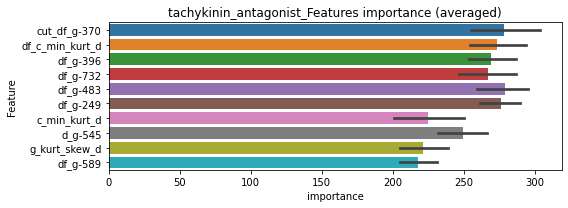

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0334608	valid_1's binary_logloss: 0.0561422
[600]	training's binary_logloss: 0.00957321	valid_1's binary_logloss: 0.0252255
[900]	training's binary_logloss: 0.00475444	valid_1's binary_logloss: 0.0172478
[1200]	training's binary_logloss: 0.00305259	valid_1's binary_logloss: 0.0138905
[1500]	training's binary_logloss: 0.00223999	valid_1's binary_logloss: 0.0121586
[1800]	training's binary_logloss: 0.00176949	valid_1's binary_logloss: 0.011043
[2100]	training's binary_logloss: 0.00147208	valid_1's binary_logloss: 0.0102268
[2400]	training's binary_logloss: 0.0012696	valid_1's binary_logloss: 0.00968278
[2700]	training's binary_logloss: 0.00111916	valid_1's binary_logloss: 0.00915393
[3000]	training's binary_logloss: 0.0010096	valid_1's binary_logloss: 0.00882619
[3300]	training's binary_logloss: 0.000922432	valid_1's binary_logloss: 0.00851991
Early stopping, best iteration is:
[3307]	training

len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0317097	valid_1's binary_logloss: 0.0630046
[600]	training's binary_logloss: 0.00917754	valid_1's binary_logloss: 0.0333877
[900]	training's binary_logloss: 0.0046151	valid_1's binary_logloss: 0.0258165
[1200]	training's binary_logloss: 0.0029665	valid_1's binary_logloss: 0.0223837
[1500]	training's binary_logloss: 0.00218064	valid_1's binary_logloss: 0.0207819
[1800]	training's binary_logloss: 0.00172878	valid_1's binary_logloss: 0.019681
[2100]	training's binary_logloss: 0.00144157	valid_1's binary_logloss: 0.0188086
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.00138412	valid_1's binary_logloss: 0.0186585


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.031452	valid_1's binary_logloss: 0.0601315
[600]	training's binary_logloss: 0.0092162	valid_1's binary_logloss: 0.0334756
[900]	training's binary_logloss: 0.00464813	valid_1's binary_logloss: 0.0276556
[1200]	training's binary_logloss: 0.003007	valid_1's binary_logloss: 0.0255728
[1500]	training's binary_logloss: 0.00221263	valid_1's binary_logloss: 0.0242681
Early stopping, best iteration is:
[1562]	training's binary_logloss: 0.00209587	valid_1's binary_logloss: 0.0240914


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327447	valid_1's binary_logloss: 0.0615204
[600]	training's binary_logloss: 0.00927229	valid_1's binary_logloss: 0.0319113
[900]	training's binary_logloss: 0.00465059	valid_1's binary_logloss: 0.0249298
[1200]	training's binary_logloss: 0.00299576	valid_1's binary_logloss: 0.0219075
[1500]	training's binary_logloss: 0.00219817	valid_1's binary_logloss: 0.0201195
[1800]	training's binary_logloss: 0.00174307	valid_1's binary_logloss: 0.0189377
Early stopping, best iteration is:
[1824]	training's binary_logloss: 0.00171585	valid_1's binary_logloss: 0.0189052


tachykinin_antagonist logloss: 0.017542003363843074


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894322	valid_1's binary_logloss: 0.0186764
[600]	training's binary_logloss: 0.00112938	valid_1's binary_logloss: 0.00483934
[900]	training's binary_logloss: 0.000549899	valid_1's binary_logloss: 0.00332585
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000502281	valid_1's binary_logloss: 0.00325353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854042	valid_1's binary_logloss: 0.0180508
[600]	training's binary_logloss: 0.00109758	valid_1's binary_logloss: 0.00506041
[900]	training's binary_logloss: 0.000538246	valid_1's binary_logloss: 0.00358091
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000493683	valid_1's binary_logloss: 0.00342742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00920316	valid_1's binary_logloss: 0.01516
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0038225, Threshold: 0.0144560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01012, conf_1:0.01879
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0144560
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0344560
threshold: 0.0344560, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779336	valid_1's binary_logloss: 0.0172242
[600]	training's binary_logloss: 0.00103642	valid_1's binary_logloss: 0.00508454
[900]	training's binary_logloss: 0.000511853	valid_1's binary_logloss: 0.00364558
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000510363	valid_1's binary_logloss: 0.00363673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00745303	valid_1's binary_logloss: 0.0153705
[600]	training's binary_logloss: 0.00101504	valid_1's binary_logloss: 0.00428479
[900]	training's binary_logloss: 0.000510292	valid_1's binary_logloss: 0.00317008
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000494211	valid_1's binary_logloss: 0.00312369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00764501	valid_1's binary_logloss: 0.0116922
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0500333, Threshold: 0.0344560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0085384 Vs.target_rate: 0.00126, Num_p_label: 34.0, conf_0:0.02756, conf_1:0.04135
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_1: 0.0344560
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.0544560
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.0744560
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_4: 0.0944560
threshold: 0.0944560, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779336	valid_1's binary_logloss: 0.0172242
[600]	training's binary_logloss: 0.00103642	valid_1's binary_logloss: 0.00508454
[900]	training's binary_logloss: 0.000511853	valid_1's binary_logloss: 0.00364558
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000510363	valid_1's binary_logloss: 0.00363673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00745303	valid_1's binary_logloss: 0.0153705
[600]	training's binary_logloss: 0.00101504	valid_1's binary_logloss: 0.00428479
[900]	training's binary_logloss: 0.000510292	valid_1's binary_logloss: 0.00317008
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000494211	valid_1's binary_logloss: 0.00312369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00764501	valid_1's binary_logloss: 0.0116922
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0500333, Threshold: 0.0944560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00126, Num_p_label: 7.0, conf_0:0.08501, conf_1:0.10390
threshold: 0.0944560, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


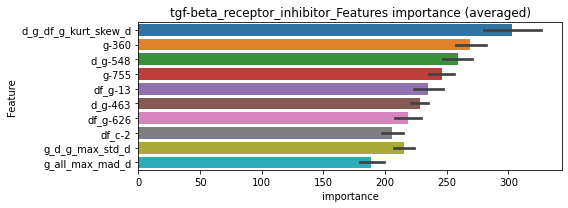

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019051	valid_1's binary_logloss: 0.0314886
[600]	training's binary_logloss: 0.00505809	valid_1's binary_logloss: 0.0116264
[900]	training's binary_logloss: 0.00259611	valid_1's binary_logloss: 0.0075992
[1200]	training's binary_logloss: 0.00172773	valid_1's binary_logloss: 0.00595468
[1500]	training's binary_logloss: 0.00130626	valid_1's binary_logloss: 0.00505857
[1800]	training's binary_logloss: 0.00105695	valid_1's binary_logloss: 0.00451382
[2100]	training's binary_logloss: 0.000898056	valid_1's binary_logloss: 0.00418059
[2400]	training's binary_logloss: 0.000788642	valid_1's binary_logloss: 0.00393578
[2700]	training's binary_logloss: 0.000705765	valid_1's binary_logloss: 0.00373519
[3000]	training's binary_logloss: 0.000643782	valid_1's binary_logloss: 0.00357437
[3300]	training's binary_logloss: 0.000596259	valid_1's binary_logloss: 0.00343796
Early stopping, best iteration is:
[3345

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01845	valid_1's binary_logloss: 0.0304976
[600]	training's binary_logloss: 0.00500856	valid_1's binary_logloss: 0.0118601
[900]	training's binary_logloss: 0.00260462	valid_1's binary_logloss: 0.00783362
[1200]	training's binary_logloss: 0.0017404	valid_1's binary_logloss: 0.00602465
[1500]	training's binary_logloss: 0.0013165	valid_1's binary_logloss: 0.00510642
[1800]	training's binary_logloss: 0.00106729	valid_1's binary_logloss: 0.00457114
[2100]	training's binary_logloss: 0.000907885	valid_1's binary_logloss: 0.00417849
[2400]	training's binary_logloss: 0.000794971	valid_1's binary_logloss: 0.00388289
[2700]	training's binary_logloss: 0.000712749	valid_1's binary_logloss: 0.00367309
[3000]	training's binary_logloss: 0.000652914	valid_1's binary_logloss: 0.00350655
[3300]	training's binary_logloss: 0.000604469	valid_1's binary_logloss: 0.00334675
Early stopping, best iteration is:
[3459]	

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186909	valid_1's binary_logloss: 0.0253627
[600]	training's binary_logloss: 0.00508137	valid_1's binary_logloss: 0.00821247
[900]	training's binary_logloss: 0.00264192	valid_1's binary_logloss: 0.00473214
[1200]	training's binary_logloss: 0.0017664	valid_1's binary_logloss: 0.00338318
[1500]	training's binary_logloss: 0.00133071	valid_1's binary_logloss: 0.00266102
[1800]	training's binary_logloss: 0.00107953	valid_1's binary_logloss: 0.00224815
[2100]	training's binary_logloss: 0.000918756	valid_1's binary_logloss: 0.00197477
[2400]	training's binary_logloss: 0.000805416	valid_1's binary_logloss: 0.00177164
[2700]	training's binary_logloss: 0.000720412	valid_1's binary_logloss: 0.00161738
[3000]	training's binary_logloss: 0.000658531	valid_1's binary_logloss: 0.00150751
[3300]	training's binary_logloss: 0.000609171	valid_1's binary_logloss: 0.0014165
[3600]	training's binary_logloss: 0.000

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184199	valid_1's binary_logloss: 0.02944
[600]	training's binary_logloss: 0.00497491	valid_1's binary_logloss: 0.0112736
[900]	training's binary_logloss: 0.002578	valid_1's binary_logloss: 0.00765055
[1200]	training's binary_logloss: 0.00172718	valid_1's binary_logloss: 0.00636102
[1500]	training's binary_logloss: 0.00130411	valid_1's binary_logloss: 0.00549213
[1800]	training's binary_logloss: 0.00105389	valid_1's binary_logloss: 0.00503337
[2100]	training's binary_logloss: 0.000894738	valid_1's binary_logloss: 0.00469077
[2400]	training's binary_logloss: 0.000783637	valid_1's binary_logloss: 0.00445901
[2700]	training's binary_logloss: 0.000703254	valid_1's binary_logloss: 0.00431368
Early stopping, best iteration is:
[2946]	training's binary_logloss: 0.000652168	valid_1's binary_logloss: 0.00420639


tgf-beta_receptor_inhibitor logloss: 0.003030282214486729


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491265	valid_1's binary_logloss: 0.0109731
[600]	training's binary_logloss: 0.000646707	valid_1's binary_logloss: 0.00371184
[900]	training's binary_logloss: 0.000372649	valid_1's binary_logloss: 0.00299482
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000374568	valid_1's binary_logloss: 0.00299269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473415	valid_1's binary_logloss: 0.0118379
[600]	training's binary_logloss: 0.000632631	valid_1's binary_logloss: 0.00439
[900]	training's binary_logloss: 0.00036805	valid_1's binary_logloss: 0.00365131
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000373958	valid_1's binary_logloss: 0.00365104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483041	valid_1's binary_logloss: 0.00737952
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0021957, Threshold: 0.0086062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00602, conf_1:0.01119
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0086062
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0286062
threshold: 0.0286062, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442878	valid_1's binary_logloss: 0.00933106
[600]	training's binary_logloss: 0.000602015	valid_1's binary_logloss: 0.00282124
[900]	training's binary_logloss: 0.000358493	valid_1's binary_logloss: 0.00223662
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000359957	valid_1's binary_logloss: 0.00223076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042987	valid_1's binary_logloss: 0.0116312
[600]	training's binary_logloss: 0.000591487	valid_1's binary_logloss: 0.00517752
[900]	training's binary_logloss: 0.000359905	valid_1's binary_logloss: 0.00465218
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000359993	valid_1's binary_logloss: 0.0046519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444122	valid_1's binary_logloss: 0.00616281
[600]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.0179969, Threshold: 0.0286062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00080, Num_p_label: 25.0, conf_0:0.02288, conf_1:0.03433
Num_p_label: 25.0, Expected: 3.2, Adj_threshold_1: 0.0286062
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0486062
threshold: 0.0486062, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442878	valid_1's binary_logloss: 0.00933106
[600]	training's binary_logloss: 0.000602015	valid_1's binary_logloss: 0.00282124
[900]	training's binary_logloss: 0.000358493	valid_1's binary_logloss: 0.00223662
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000359957	valid_1's binary_logloss: 0.00223076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042987	valid_1's binary_logloss: 0.0116312
[600]	training's binary_logloss: 0.000591487	valid_1's binary_logloss: 0.00517752
[900]	training's binary_logloss: 0.000359905	valid_1's binary_logloss: 0.00465218
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000359993	valid_1's binary_logloss: 0.0046519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444122	valid_1's binary_logloss: 0.00616281
[600]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0179969, Threshold: 0.0486062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.04375, conf_1:0.05347
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0486062
threshold: 0.0486062, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


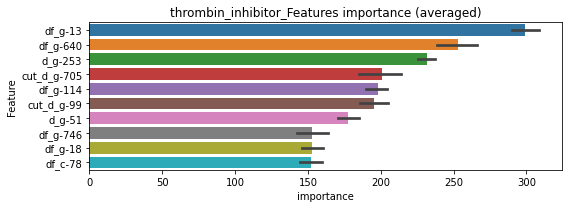

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116568	valid_1's binary_logloss: 0.0188805
[600]	training's binary_logloss: 0.0031116	valid_1's binary_logloss: 0.00711128
[900]	training's binary_logloss: 0.00165129	valid_1's binary_logloss: 0.00473834
[1200]	training's binary_logloss: 0.00112088	valid_1's binary_logloss: 0.00379676
[1500]	training's binary_logloss: 0.000858918	valid_1's binary_logloss: 0.00330302
[1800]	training's binary_logloss: 0.000704626	valid_1's binary_logloss: 0.00297506
[2100]	training's binary_logloss: 0.000603317	valid_1's binary_logloss: 0.00275067
[2400]	training's binary_logloss: 0.000533119	valid_1's binary_logloss: 0.00260018
[2700]	training's binary_logloss: 0.000481608	valid_1's binary_logloss: 0.00247599
[3000]	training's binary_logloss: 0.000444097	valid_1's binary_logloss: 0.00238322
[3300]	training's binary_logloss: 0.000416154	valid_1's binary_logloss: 0.00231559
Early stopping, best iteration is:
[

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011653	valid_1's binary_logloss: 0.019294
[600]	training's binary_logloss: 0.00309493	valid_1's binary_logloss: 0.00819787
[900]	training's binary_logloss: 0.00163961	valid_1's binary_logloss: 0.0058969
[1200]	training's binary_logloss: 0.00111257	valid_1's binary_logloss: 0.00499382
[1500]	training's binary_logloss: 0.000853972	valid_1's binary_logloss: 0.00449373
[1800]	training's binary_logloss: 0.000700101	valid_1's binary_logloss: 0.00418548
[2100]	training's binary_logloss: 0.000599327	valid_1's binary_logloss: 0.00398786
[2400]	training's binary_logloss: 0.000530161	valid_1's binary_logloss: 0.0038167
[2700]	training's binary_logloss: 0.000479123	valid_1's binary_logloss: 0.00369365
[3000]	training's binary_logloss: 0.000441515	valid_1's binary_logloss: 0.00360455
[3300]	training's binary_logloss: 0.000414291	valid_1's binary_logloss: 0.00353623
[3600]	training's binary_logloss: 0.000

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011875	valid_1's binary_logloss: 0.0149047
[600]	training's binary_logloss: 0.00315906	valid_1's binary_logloss: 0.00447891
[900]	training's binary_logloss: 0.001678	valid_1's binary_logloss: 0.00255371
[1200]	training's binary_logloss: 0.00113792	valid_1's binary_logloss: 0.00182449
[1500]	training's binary_logloss: 0.000870423	valid_1's binary_logloss: 0.00143715
[1800]	training's binary_logloss: 0.000714613	valid_1's binary_logloss: 0.00120509
[2100]	training's binary_logloss: 0.00061375	valid_1's binary_logloss: 0.00105735
[2400]	training's binary_logloss: 0.000543582	valid_1's binary_logloss: 0.000953108
[2700]	training's binary_logloss: 0.000490052	valid_1's binary_logloss: 0.000871254
[3000]	training's binary_logloss: 0.000451701	valid_1's binary_logloss: 0.000810087
[3300]	training's binary_logloss: 0.000422858	valid_1's binary_logloss: 0.000763696
[3600]	training's binary_logloss: 0

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118424	valid_1's binary_logloss: 0.0154369
[600]	training's binary_logloss: 0.0031353	valid_1's binary_logloss: 0.00493375
[900]	training's binary_logloss: 0.001664	valid_1's binary_logloss: 0.00295002
[1200]	training's binary_logloss: 0.00113159	valid_1's binary_logloss: 0.00219616
[1500]	training's binary_logloss: 0.000865688	valid_1's binary_logloss: 0.00180143
[1800]	training's binary_logloss: 0.00070821	valid_1's binary_logloss: 0.00156399
[2100]	training's binary_logloss: 0.000608491	valid_1's binary_logloss: 0.00140393
[2400]	training's binary_logloss: 0.00053839	valid_1's binary_logloss: 0.00128924
[2700]	training's binary_logloss: 0.000485954	valid_1's binary_logloss: 0.00120131
[3000]	training's binary_logloss: 0.000447961	valid_1's binary_logloss: 0.00113908
[3300]	training's binary_logloss: 0.000418625	valid_1's binary_logloss: 0.00108904
[3600]	training's binary_logloss: 0.0003

thrombin_inhibitor logloss: 0.0018590723833083478


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116602	valid_1's binary_logloss: 0.0283609
[600]	training's binary_logloss: 0.00140481	valid_1's binary_logloss: 0.0101502
[900]	training's binary_logloss: 0.000628567	valid_1's binary_logloss: 0.00793735
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000573701	valid_1's binary_logloss: 0.00776689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107259	valid_1's binary_logloss: 0.0218105
[600]	training's binary_logloss: 0.00139461	valid_1's binary_logloss: 0.00652601
[900]	training's binary_logloss: 0.000634656	valid_1's binary_logloss: 0.00454628
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.00056715	valid_1's binary_logloss: 0.0044407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115727	valid_1's binary_logloss: 0.0180125
[600]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0040923, Threshold: 0.0158820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01112, conf_1:0.02065
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0158820
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0358820
threshold: 0.0358820, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101454	valid_1's binary_logloss: 0.0255242
[600]	training's binary_logloss: 0.00128832	valid_1's binary_logloss: 0.0105689
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000630893	valid_1's binary_logloss: 0.00854148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104718	valid_1's binary_logloss: 0.0202988
[600]	training's binary_logloss: 0.00135482	valid_1's binary_logloss: 0.00591507
[900]	training's binary_logloss: 0.000621	valid_1's binary_logloss: 0.00426273
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000534546	valid_1's binary_logloss: 0.00414288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107221	valid_1's binary_logloss: 0.0177982
[600]	training's binary_logloss: 0.00134339	valid_1's binary_logloss: 0.003554
[900]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0191055, Threshold: 0.0358820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00155, Num_p_label: 24.0, conf_0:0.02871, conf_1:0.04306
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.0358820
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.0558820
threshold: 0.0558820, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101454	valid_1's binary_logloss: 0.0255242
[600]	training's binary_logloss: 0.00128832	valid_1's binary_logloss: 0.0105689
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000630893	valid_1's binary_logloss: 0.00854148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104718	valid_1's binary_logloss: 0.0202988
[600]	training's binary_logloss: 0.00135482	valid_1's binary_logloss: 0.00591507
[900]	training's binary_logloss: 0.000621	valid_1's binary_logloss: 0.00426273
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000534546	valid_1's binary_logloss: 0.00414288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107221	valid_1's binary_logloss: 0.0177982
[600]	training's binary_logloss: 0.00134339	valid_1's binary_logloss: 0.003554
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0191055, Threshold: 0.0558820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00155, Num_p_label: 13.0, conf_0:0.05029, conf_1:0.06147
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0558820
threshold: 0.0558820, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


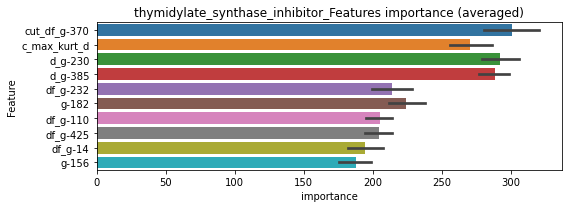

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218199	valid_1's binary_logloss: 0.0390961
[600]	training's binary_logloss: 0.00594608	valid_1's binary_logloss: 0.0180205
[900]	training's binary_logloss: 0.00303489	valid_1's binary_logloss: 0.0131874
[1200]	training's binary_logloss: 0.00199503	valid_1's binary_logloss: 0.011413
[1500]	training's binary_logloss: 0.00149037	valid_1's binary_logloss: 0.0103426
[1800]	training's binary_logloss: 0.0012011	valid_1's binary_logloss: 0.0097762
[2100]	training's binary_logloss: 0.00101467	valid_1's binary_logloss: 0.00939983
Early stopping, best iteration is:
[2364]	training's binary_logloss: 0.000898558	valid_1's binary_logloss: 0.0091609


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221123	valid_1's binary_logloss: 0.0338632
[600]	training's binary_logloss: 0.00610283	valid_1's binary_logloss: 0.0130039
[900]	training's binary_logloss: 0.00312276	valid_1's binary_logloss: 0.00850809
[1200]	training's binary_logloss: 0.00205128	valid_1's binary_logloss: 0.00668859
[1500]	training's binary_logloss: 0.00152693	valid_1's binary_logloss: 0.00563878
[1800]	training's binary_logloss: 0.00122282	valid_1's binary_logloss: 0.00505416
[2100]	training's binary_logloss: 0.00103101	valid_1's binary_logloss: 0.00463343
[2400]	training's binary_logloss: 0.000899427	valid_1's binary_logloss: 0.0043417
[2700]	training's binary_logloss: 0.000803253	valid_1's binary_logloss: 0.00412607
[3000]	training's binary_logloss: 0.000731394	valid_1's binary_logloss: 0.00397739
[3300]	training's binary_logloss: 0.000675506	valid_1's binary_logloss: 0.00383398
Early stopping, best iteration is:
[3460

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022265	valid_1's binary_logloss: 0.033041
[600]	training's binary_logloss: 0.00613392	valid_1's binary_logloss: 0.0115016
[900]	training's binary_logloss: 0.00313553	valid_1's binary_logloss: 0.00674026
[1200]	training's binary_logloss: 0.00205991	valid_1's binary_logloss: 0.00485111
[1500]	training's binary_logloss: 0.00153782	valid_1's binary_logloss: 0.00387879
[1800]	training's binary_logloss: 0.00123606	valid_1's binary_logloss: 0.00330577
[2100]	training's binary_logloss: 0.00103954	valid_1's binary_logloss: 0.00289177
[2400]	training's binary_logloss: 0.000905433	valid_1's binary_logloss: 0.00261678
[2700]	training's binary_logloss: 0.000808253	valid_1's binary_logloss: 0.00240277
[3000]	training's binary_logloss: 0.000735328	valid_1's binary_logloss: 0.00225384
[3300]	training's binary_logloss: 0.000681023	valid_1's binary_logloss: 0.00213299
[3600]	training's binary_logloss: 0.00063

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216467	valid_1's binary_logloss: 0.0415984
[600]	training's binary_logloss: 0.00587163	valid_1's binary_logloss: 0.0204174
[900]	training's binary_logloss: 0.00300373	valid_1's binary_logloss: 0.0153832
[1200]	training's binary_logloss: 0.00198059	valid_1's binary_logloss: 0.0132122
[1500]	training's binary_logloss: 0.00148313	valid_1's binary_logloss: 0.0120363
[1800]	training's binary_logloss: 0.00119495	valid_1's binary_logloss: 0.011231
[2100]	training's binary_logloss: 0.00100826	valid_1's binary_logloss: 0.0106776
[2400]	training's binary_logloss: 0.000880704	valid_1's binary_logloss: 0.0102716
Early stopping, best iteration is:
[2547]	training's binary_logloss: 0.00083055	valid_1's binary_logloss: 0.0100511


thymidylate_synthase_inhibitor logloss: 0.006218567717706974


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868235	valid_1's binary_logloss: 0.0172654
[600]	training's binary_logloss: 0.00105885	valid_1's binary_logloss: 0.00469852
[900]	training's binary_logloss: 0.000497965	valid_1's binary_logloss: 0.00325798
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.000446334	valid_1's binary_logloss: 0.00311323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863224	valid_1's binary_logloss: 0.0170367
[600]	training's binary_logloss: 0.00104741	valid_1's binary_logloss: 0.00360509
[900]	training's binary_logloss: 0.000487935	valid_1's binary_logloss: 0.00215979
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000462063	valid_1's binary_logloss: 0.00209581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00881405	valid_1's binary_logloss: 0.0150405
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0031108, Threshold: 0.0198867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01392, conf_1:0.02585
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0198867
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_2: 0.0398867
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.0598867
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_4: 0.0798867
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_5: 0.0998867
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_6: 0.1198867
threshold: 0.1198867, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00794104	valid_1's binary_logloss: 0.0164412
[600]	training's binary_logloss: 0.000998359	valid_1's binary_logloss: 0.0048411
[900]	training's binary_logloss: 0.00047808	valid_1's binary_logloss: 0.00349079
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000446363	valid_1's binary_logloss: 0.00343474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00776664	valid_1's binary_logloss: 0.0156712
[600]	training's binary_logloss: 0.00097832	valid_1's binary_logloss: 0.0033893
[900]	training's binary_logloss: 0.000467784	valid_1's binary_logloss: 0.00205053
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.00044374	valid_1's binary_logloss: 0.00200453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779844	valid_1's binary_logloss: 0.0130235
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0285025, Threshold: 0.1198867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00126, Num_p_label: 29.0, conf_0:0.09591, conf_1:0.14386
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_1: 0.1198867
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_2: 0.1398867
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_3: 0.1598867
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_4: 0.1798867
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_5: 0.1998867
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_6: 0.2198867
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_7: 0.2398867
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_8: 0.2598867
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_9: 0.2798867
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_10: 0.2998867
threshold: 0.3198867, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00794104	valid_1's binary_logloss: 0.0164412
[600]	training's binary_logloss: 0.000998359	valid_1's binary_logloss: 0.0048411
[900]	training's binary_logloss: 0.00047808	valid_1's binary_logloss: 0.00349079
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000446363	valid_1's binary_logloss: 0.00343474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00776664	valid_1's binary_logloss: 0.0156712
[600]	training's binary_logloss: 0.00097832	valid_1's binary_logloss: 0.0033893
[900]	training's binary_logloss: 0.000467784	valid_1's binary_logloss: 0.00205053
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.00044374	valid_1's binary_logloss: 0.00200453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779844	valid_1's binary_logloss: 0.0130235
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0285025, Threshold: 0.3198867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0035158 Vs.target_rate: 0.00126, Num_p_label: 14.0, conf_0:0.28790, conf_1:0.35188
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.3198867
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.3398867
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.3598867
threshold: 0.3598867, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


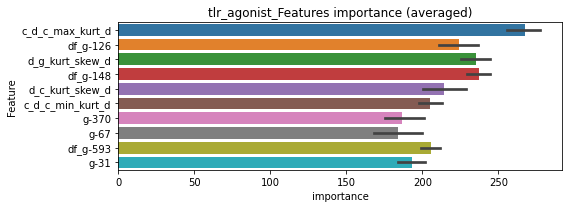

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181028	valid_1's binary_logloss: 0.028027
[600]	training's binary_logloss: 0.0047573	valid_1's binary_logloss: 0.0102637
[900]	training's binary_logloss: 0.00242168	valid_1's binary_logloss: 0.00642933
[1200]	training's binary_logloss: 0.00160358	valid_1's binary_logloss: 0.00497332
[1500]	training's binary_logloss: 0.00120692	valid_1's binary_logloss: 0.00419985
[1800]	training's binary_logloss: 0.000978944	valid_1's binary_logloss: 0.0037235
[2100]	training's binary_logloss: 0.000829544	valid_1's binary_logloss: 0.00337939
[2400]	training's binary_logloss: 0.000726341	valid_1's binary_logloss: 0.00313288
[2700]	training's binary_logloss: 0.000650819	valid_1's binary_logloss: 0.00294102
[3000]	training's binary_logloss: 0.000594241	valid_1's binary_logloss: 0.00279472
[3300]	training's binary_logloss: 0.000551175	valid_1's binary_logloss: 0.00268458
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178614	valid_1's binary_logloss: 0.0289443
[600]	training's binary_logloss: 0.004702	valid_1's binary_logloss: 0.0098821
[900]	training's binary_logloss: 0.00239612	valid_1's binary_logloss: 0.00589126
[1200]	training's binary_logloss: 0.00158705	valid_1's binary_logloss: 0.00437529
[1500]	training's binary_logloss: 0.00119703	valid_1's binary_logloss: 0.00357442
[1800]	training's binary_logloss: 0.000967853	valid_1's binary_logloss: 0.00305107
[2100]	training's binary_logloss: 0.000821058	valid_1's binary_logloss: 0.00272203
[2400]	training's binary_logloss: 0.000718197	valid_1's binary_logloss: 0.00246441
[2700]	training's binary_logloss: 0.000644079	valid_1's binary_logloss: 0.00228781
[3000]	training's binary_logloss: 0.000588749	valid_1's binary_logloss: 0.00216787
[3300]	training's binary_logloss: 0.000545753	valid_1's binary_logloss: 0.00204608
[3600]	training's binary_logloss: 0.000

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181884	valid_1's binary_logloss: 0.0267856
[600]	training's binary_logloss: 0.00477003	valid_1's binary_logloss: 0.00875104
[900]	training's binary_logloss: 0.00240865	valid_1's binary_logloss: 0.00506033
[1200]	training's binary_logloss: 0.00158868	valid_1's binary_logloss: 0.00364474
[1500]	training's binary_logloss: 0.00119389	valid_1's binary_logloss: 0.00289717
[1800]	training's binary_logloss: 0.000963817	valid_1's binary_logloss: 0.00245054
[2100]	training's binary_logloss: 0.000816859	valid_1's binary_logloss: 0.00215364
[2400]	training's binary_logloss: 0.000715076	valid_1's binary_logloss: 0.00194392
[2700]	training's binary_logloss: 0.000641126	valid_1's binary_logloss: 0.00178966
[3000]	training's binary_logloss: 0.000586229	valid_1's binary_logloss: 0.00167159
[3300]	training's binary_logloss: 0.000544094	valid_1's binary_logloss: 0.00157641
[3600]	training's binary_logloss: 0.

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178709	valid_1's binary_logloss: 0.0364135
[600]	training's binary_logloss: 0.0046848	valid_1's binary_logloss: 0.0183726
[900]	training's binary_logloss: 0.00238379	valid_1's binary_logloss: 0.0145338
[1200]	training's binary_logloss: 0.00157991	valid_1's binary_logloss: 0.0131402
[1500]	training's binary_logloss: 0.00119226	valid_1's binary_logloss: 0.0123351
[1800]	training's binary_logloss: 0.000964033	valid_1's binary_logloss: 0.0118225
[2100]	training's binary_logloss: 0.000817779	valid_1's binary_logloss: 0.0115829
Early stopping, best iteration is:
[2070]	training's binary_logloss: 0.000829827	valid_1's binary_logloss: 0.0115781


tlr_agonist logloss: 0.0043158428098600855


neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182582	valid_1's binary_logloss: 0.0024389
[600]	training's binary_logloss: 0.000281497	valid_1's binary_logloss: 0.000475531
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000227924	valid_1's binary_logloss: 0.000397746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182477	valid_1's binary_logloss: 0.00474537
[600]	training's binary_logloss: 0.000282934	valid_1's binary_logloss: 0.00227104
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00023229	valid_1's binary_logloss: 0.0021398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184396	valid_1's binary_logloss: 0.00231104
[600]	training's binary_logloss: 0.000283809	valid_1's binary_logloss: 0.000365151
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000236212	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0007426, Threshold: 0.0023273, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00163, conf_1:0.00303
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0023273
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0223273
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_3: 0.0423273
threshold: 0.0423273, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172165	valid_1's binary_logloss: 0.00194439
[600]	training's binary_logloss: 0.000271433	valid_1's binary_logloss: 0.000326274
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000224135	valid_1's binary_logloss: 0.000269205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017086	valid_1's binary_logloss: 0.00284547
[600]	training's binary_logloss: 0.000272866	valid_1's binary_logloss: 0.000732251
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000226539	valid_1's binary_logloss: 0.00064864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017274	valid_1's binary_logloss: 0.00185502
[600]	training's binary_logloss: 0.000272605	valid_1's binary_logloss: 0.000302682
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000227934	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1300522, Threshold: 0.0423273, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029, Num_p_label: 3.0, conf_0:0.03386, conf_1:0.05079
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0423273
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0623273
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.0823273


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000225476	valid_1's binary_logloss: 0.00026875


threshold: 0.0823273, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172165	valid_1's binary_logloss: 0.00194439
[600]	training's binary_logloss: 0.000271433	valid_1's binary_logloss: 0.000326274
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000224135	valid_1's binary_logloss: 0.000269205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017086	valid_1's binary_logloss: 0.00284547
[600]	training's binary_logloss: 0.000272866	valid_1's binary_logloss: 0.000732251
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000226539	valid_1's binary_logloss: 0.00064864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017274	valid_1's binary_logloss: 0.00185502
[600]	training's binary_logloss: 0.000272605	valid_1's binary_logloss: 0.000302682
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000227934	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1300522, Threshold: 0.0823273, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.07409, conf_1:0.09056
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0823273
threshold: 0.0823273, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000225476	valid_1's binary_logloss: 0.00026875


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


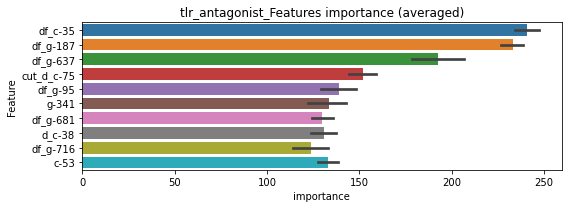

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562168	valid_1's binary_logloss: 0.00623676
[600]	training's binary_logloss: 0.0015412	valid_1's binary_logloss: 0.00178485
[900]	training's binary_logloss: 0.000868496	valid_1's binary_logloss: 0.0010261
[1200]	training's binary_logloss: 0.000614054	valid_1's binary_logloss: 0.000735659
[1500]	training's binary_logloss: 0.000487132	valid_1's binary_logloss: 0.000589357
[1800]	training's binary_logloss: 0.000411333	valid_1's binary_logloss: 0.000501164
[2100]	training's binary_logloss: 0.000359946	valid_1's binary_logloss: 0.000441131
[2400]	training's binary_logloss: 0.00032341	valid_1's binary_logloss: 0.000398129
[2700]	training's binary_logloss: 0.000296777	valid_1's binary_logloss: 0.000366554
[3000]	training's binary_logloss: 0.000276836	valid_1's binary_logloss: 0.000342906
[3300]	training's binary_logloss: 0.000261808	valid_1's binary_logloss: 0.000325106
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558006	valid_1's binary_logloss: 0.00710217
[600]	training's binary_logloss: 0.00153539	valid_1's binary_logloss: 0.00224074
[900]	training's binary_logloss: 0.000866521	valid_1's binary_logloss: 0.00135212
[1200]	training's binary_logloss: 0.000616804	valid_1's binary_logloss: 0.00100558
[1500]	training's binary_logloss: 0.000488584	valid_1's binary_logloss: 0.000817786
[1800]	training's binary_logloss: 0.000412207	valid_1's binary_logloss: 0.000703047
[2100]	training's binary_logloss: 0.000361207	valid_1's binary_logloss: 0.000624674
[2400]	training's binary_logloss: 0.000325062	valid_1's binary_logloss: 0.00057039
[2700]	training's binary_logloss: 0.000297964	valid_1's binary_logloss: 0.000528406
[3000]	training's binary_logloss: 0.00027805	valid_1's binary_logloss: 0.000497196
[3300]	training's binary_logloss: 0.000262698	valid_1's binary_logloss: 0.000473213
[3600]	training's binary_l

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0056785	valid_1's binary_logloss: 0.00598374
[600]	training's binary_logloss: 0.00155872	valid_1's binary_logloss: 0.00168817
[900]	training's binary_logloss: 0.000874829	valid_1's binary_logloss: 0.000965415
[1200]	training's binary_logloss: 0.000618282	valid_1's binary_logloss: 0.00068991
[1500]	training's binary_logloss: 0.000488052	valid_1's binary_logloss: 0.000548334
[1800]	training's binary_logloss: 0.000411494	valid_1's binary_logloss: 0.000464941
[2100]	training's binary_logloss: 0.000359623	valid_1's binary_logloss: 0.000407853
[2400]	training's binary_logloss: 0.000323212	valid_1's binary_logloss: 0.000367883
[2700]	training's binary_logloss: 0.000296209	valid_1's binary_logloss: 0.000338085
[3000]	training's binary_logloss: 0.000276187	valid_1's binary_logloss: 0.000315933
[3300]	training's binary_logloss: 0.00026093	valid_1's binary_logloss: 0.000299014
[3600]	training's binary_

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565748	valid_1's binary_logloss: 0.00615381
[600]	training's binary_logloss: 0.0015465	valid_1's binary_logloss: 0.00176853
[900]	training's binary_logloss: 0.000868425	valid_1's binary_logloss: 0.00101662
[1200]	training's binary_logloss: 0.000614853	valid_1's binary_logloss: 0.000733321
[1500]	training's binary_logloss: 0.000485152	valid_1's binary_logloss: 0.000585491
[1800]	training's binary_logloss: 0.000410027	valid_1's binary_logloss: 0.000498379
[2100]	training's binary_logloss: 0.000359199	valid_1's binary_logloss: 0.00043988
[2400]	training's binary_logloss: 0.000322174	valid_1's binary_logloss: 0.0003965
[2700]	training's binary_logloss: 0.000295999	valid_1's binary_logloss: 0.000365753
[3000]	training's binary_logloss: 0.00027636	valid_1's binary_logloss: 0.000342785
[3300]	training's binary_logloss: 0.000261284	valid_1's binary_logloss: 0.000324911
[3600]	training's binary_log

tlr_antagonist logloss: 0.0003194583002558109


neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111253	valid_1's binary_logloss: 0.0262059
[600]	training's binary_logloss: 0.00138643	valid_1's binary_logloss: 0.00917611
[900]	training's binary_logloss: 0.000619407	valid_1's binary_logloss: 0.00676905
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000568858	valid_1's binary_logloss: 0.00663387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102084	valid_1's binary_logloss: 0.0293357
[600]	training's binary_logloss: 0.00130993	valid_1's binary_logloss: 0.0129755
[900]	training's binary_logloss: 0.000597167	valid_1's binary_logloss: 0.0104884
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000573511	valid_1's binary_logloss: 0.0104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103674	valid_1's binary_logloss: 0.0199517
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0047076, Threshold: 0.0202825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01420, conf_1:0.02637
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0202825
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0402825
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_3: 0.0602825
threshold: 0.0602825, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969667	valid_1's binary_logloss: 0.0218561
[600]	training's binary_logloss: 0.0012526	valid_1's binary_logloss: 0.00808442
[900]	training's binary_logloss: 0.000580826	valid_1's binary_logloss: 0.00607508
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000553571	valid_1's binary_logloss: 0.00598079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00973886	valid_1's binary_logloss: 0.0266733
[600]	training's binary_logloss: 0.0012603	valid_1's binary_logloss: 0.0118244
[900]	training's binary_logloss: 0.000574641	valid_1's binary_logloss: 0.00956488
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000546428	valid_1's binary_logloss: 0.00942003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987006	valid_1's binary_logloss: 0.0198968
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0373865, Threshold: 0.0602825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0080362 Vs.target_rate: 0.00151, Num_p_label: 32.0, conf_0:0.04823, conf_1:0.07234
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_1: 0.0602825
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.0802825
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1002825
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.1202825
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.1402825
threshold: 0.1402825, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969667	valid_1's binary_logloss: 0.0218561
[600]	training's binary_logloss: 0.0012526	valid_1's binary_logloss: 0.00808442
[900]	training's binary_logloss: 0.000580826	valid_1's binary_logloss: 0.00607508
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000553571	valid_1's binary_logloss: 0.00598079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00973886	valid_1's binary_logloss: 0.0266733
[600]	training's binary_logloss: 0.0012603	valid_1's binary_logloss: 0.0118244
[900]	training's binary_logloss: 0.000574641	valid_1's binary_logloss: 0.00956488
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000546428	valid_1's binary_logloss: 0.00942003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987006	valid_1's binary_logloss: 0.0198968
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0373865, Threshold: 0.1402825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00151, Num_p_label: 14.0, conf_0:0.12625, conf_1:0.15431
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.1402825
threshold: 0.1402825, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


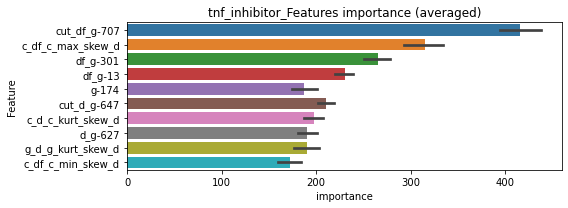

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214013	valid_1's binary_logloss: 0.0354659
[600]	training's binary_logloss: 0.00582904	valid_1's binary_logloss: 0.0158229
[900]	training's binary_logloss: 0.00296991	valid_1's binary_logloss: 0.0112415
[1200]	training's binary_logloss: 0.00194951	valid_1's binary_logloss: 0.00926837
[1500]	training's binary_logloss: 0.00145526	valid_1's binary_logloss: 0.00827135
[1800]	training's binary_logloss: 0.00117128	valid_1's binary_logloss: 0.00759315
[2100]	training's binary_logloss: 0.00099008	valid_1's binary_logloss: 0.00717371
Early stopping, best iteration is:
[2366]	training's binary_logloss: 0.000876229	valid_1's binary_logloss: 0.00685766


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207575	valid_1's binary_logloss: 0.0387497
[600]	training's binary_logloss: 0.00572149	valid_1's binary_logloss: 0.0190449
[900]	training's binary_logloss: 0.00294738	valid_1's binary_logloss: 0.0141561
[1200]	training's binary_logloss: 0.00193708	valid_1's binary_logloss: 0.0120038
[1500]	training's binary_logloss: 0.001447	valid_1's binary_logloss: 0.0108273
[1800]	training's binary_logloss: 0.00116481	valid_1's binary_logloss: 0.0100463
[2100]	training's binary_logloss: 0.00098394	valid_1's binary_logloss: 0.00948549
Early stopping, best iteration is:
[2182]	training's binary_logloss: 0.000944831	valid_1's binary_logloss: 0.00934235


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021471	valid_1's binary_logloss: 0.0319819
[600]	training's binary_logloss: 0.00586861	valid_1's binary_logloss: 0.0137159
[900]	training's binary_logloss: 0.00300022	valid_1's binary_logloss: 0.00972953
[1200]	training's binary_logloss: 0.00197321	valid_1's binary_logloss: 0.00803899
[1500]	training's binary_logloss: 0.00147249	valid_1's binary_logloss: 0.00706702
[1800]	training's binary_logloss: 0.00118501	valid_1's binary_logloss: 0.00652323
[2100]	training's binary_logloss: 0.000999971	valid_1's binary_logloss: 0.00613488
[2400]	training's binary_logloss: 0.000872453	valid_1's binary_logloss: 0.00585719
[2700]	training's binary_logloss: 0.000778324	valid_1's binary_logloss: 0.00564325
[3000]	training's binary_logloss: 0.00070869	valid_1's binary_logloss: 0.00551428
[3300]	training's binary_logloss: 0.000654956	valid_1's binary_logloss: 0.00538599
[3600]	training's binary_logloss: 0.0006

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207115	valid_1's binary_logloss: 0.0388688
[600]	training's binary_logloss: 0.00573755	valid_1's binary_logloss: 0.0188338
[900]	training's binary_logloss: 0.00294558	valid_1's binary_logloss: 0.013953
[1200]	training's binary_logloss: 0.00193246	valid_1's binary_logloss: 0.0117786
[1500]	training's binary_logloss: 0.00144813	valid_1's binary_logloss: 0.0106465
[1800]	training's binary_logloss: 0.00116557	valid_1's binary_logloss: 0.00991366
[2100]	training's binary_logloss: 0.000983133	valid_1's binary_logloss: 0.00936022
[2400]	training's binary_logloss: 0.000857861	valid_1's binary_logloss: 0.00901351
[2700]	training's binary_logloss: 0.000766037	valid_1's binary_logloss: 0.00875705
Early stopping, best iteration is:
[2945]	training's binary_logloss: 0.000709034	valid_1's binary_logloss: 0.00862842


tnf_inhibitor logloss: 0.007478428832715374


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276, target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362952	valid_1's binary_logloss: 0.133951
[600]	training's binary_logloss: 0.00666169	valid_1's binary_logloss: 0.109651
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00478106	valid_1's binary_logloss: 0.108175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0393936	valid_1's binary_logloss: 0.108109
[600]	training's binary_logloss: 0.0071577	valid_1's binary_logloss: 0.070737
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00288517	valid_1's binary_logloss: 0.0643764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0405027	valid_1's binary_logloss: 0.0853737
[600]	training's binary_logloss: 0.00772279	valid_1's binary_logloss: 0.0406077
[900]	training's binary_logloss: 0.00248945	valid_1's binary_logloss: 0.0291146
[1200]	training's binary_logloss: 0.

1 / 3 AUC score:0.992
y_Threshold: 0.0223521, Threshold: 0.1910916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 637/3763
p_label_rate: 0.0100452 Vs.target_rate: 0.00533, Num_p_label: 40.0, conf_0:0.13376, conf_1:0.24842
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1910916
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_2: 0.2110916
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_3: 0.2310916
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_4: 0.2510916
Num_p_label: 24.0, Expected: 21.2, Adj_threshold_5: 0.2710916
threshold: 0.2710916, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0320891	valid_1's binary_logloss: 0.0908961
[600]	training's binary_logloss: 0.00547246	valid_1's binary_logloss: 0.0565438
[900]	training's binary_logloss: 0.00192424	valid_1's binary_logloss: 0.0491562
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.00154714	valid_1's binary_logloss: 0.0480949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.032557	valid_1's binary_logloss: 0.0887138
[600]	training's binary_logloss: 0.00554951	valid_1's binary_logloss: 0.0586185
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00234786	valid_1's binary_logloss: 0.0541626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321062	valid_1's binary_logloss: 0.116778
[600]	training's binary_logloss: 0.00549982	valid_1's binary_logloss: 0.0784973
Early stopping, best iteration 

2 / 3 AUC score:0.996
y_Threshold: 0.0439379, Threshold: 0.2710916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 618.0/3725
p_label_rate: 0.0160723 Vs.target_rate: 0.00533, Num_p_label: 64.0, conf_0:0.21687, conf_1:0.32531
Num_p_label: 64.0, Expected: 21.2, Adj_threshold_1: 0.2710916
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_2: 0.2910916
Num_p_label: 52.0, Expected: 21.2, Adj_threshold_3: 0.3110916
Num_p_label: 49.0, Expected: 21.2, Adj_threshold_4: 0.3310916
Num_p_label: 46.0, Expected: 21.2, Adj_threshold_5: 0.3510916
Num_p_label: 39.0, Expected: 21.2, Adj_threshold_6: 0.3710916
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_7: 0.3910916
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_8: 0.4110916
Num_p_label: 31.0, Expected: 21.2, Adj_threshold_9: 0.4310916
threshold: 0.4310916, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 618.0/3725, y_label_rate: 0.1659060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287808	valid_1's binary_logloss: 0.0913576
[600]	training's binary_logloss: 0.00469471	valid_1's binary_logloss: 0.0520257
[900]	training's binary_logloss: 0.00170275	valid_1's binary_logloss: 0.043563
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.00119063	valid_1's binary_logloss: 0.0420592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0312628	valid_1's binary_logloss: 0.0818704
[600]	training's binary_logloss: 0.00503531	valid_1's binary_logloss: 0.0498193
[900]	training's binary_logloss: 0.00176472	valid_1's binary_logloss: 0.0425292
[1200]	training's binary_logloss: 0.00105994	valid_1's binary_logloss: 0.0400904
Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.00107522	valid_1's binary_logloss: 0.0400576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

3 / 3 AUC score:0.998
y_Threshold: 0.0401007, Threshold: 0.4310916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 606.0/3701
p_label_rate: 0.0092918 Vs.target_rate: 0.00533, Num_p_label: 37.0, conf_0:0.38798, conf_1:0.47420
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_1: 0.4310916
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_2: 0.4510916
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_3: 0.4710916
Num_p_label: 31.0, Expected: 21.2, Adj_threshold_4: 0.4910916
threshold: 0.4910916, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 606.0/3701, y_label_rate: 0.1637395


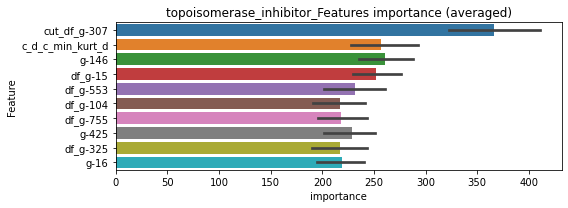

len(train_index) : 2775
len(valid_index) : 926
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464432	valid_1's binary_logloss: 0.0998946
[600]	training's binary_logloss: 0.0151348	valid_1's binary_logloss: 0.0621731
[900]	training's binary_logloss: 0.00765625	valid_1's binary_logloss: 0.0506039
[1200]	training's binary_logloss: 0.00484068	valid_1's binary_logloss: 0.0457752
[1500]	training's binary_logloss: 0.00349365	valid_1's binary_logloss: 0.0431159
Early stopping, best iteration is:
[1628]	training's binary_logloss: 0.00312791	valid_1's binary_logloss: 0.0424006


len(train_index) : 2776
len(valid_index) : 925
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0447083	valid_1's binary_logloss: 0.124681
[600]	training's binary_logloss: 0.0142997	valid_1's binary_logloss: 0.0931627
[900]	training's binary_logloss: 0.00725914	valid_1's binary_logloss: 0.0836903
[1200]	training's binary_logloss: 0.00462881	valid_1's binary_logloss: 0.0803889
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.00425269	valid_1's binary_logloss: 0.080227


len(train_index) : 2776
len(valid_index) : 925
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0506895	valid_1's binary_logloss: 0.0807161
[600]	training's binary_logloss: 0.0162326	valid_1's binary_logloss: 0.0428492
[900]	training's binary_logloss: 0.00814733	valid_1's binary_logloss: 0.0317753
[1200]	training's binary_logloss: 0.00516481	valid_1's binary_logloss: 0.0274165
[1500]	training's binary_logloss: 0.00371043	valid_1's binary_logloss: 0.0248705
[1800]	training's binary_logloss: 0.00289693	valid_1's binary_logloss: 0.0234817
[2100]	training's binary_logloss: 0.00237113	valid_1's binary_logloss: 0.0224039
[2400]	training's binary_logloss: 0.00201925	valid_1's binary_logloss: 0.0217554
Early stopping, best iteration is:
[2451]	training's binary_logloss: 0.00196903	valid_1's binary_logloss: 0.0217176


len(train_index) : 2776
len(valid_index) : 925
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0474363	valid_1's binary_logloss: 0.103228
[600]	training's binary_logloss: 0.0153302	valid_1's binary_logloss: 0.0659918
[900]	training's binary_logloss: 0.00768596	valid_1's binary_logloss: 0.0551844
[1200]	training's binary_logloss: 0.00491023	valid_1's binary_logloss: 0.0507922
[1500]	training's binary_logloss: 0.00353637	valid_1's binary_logloss: 0.048061
Early stopping, best iteration is:
[1614]	training's binary_logloss: 0.0031992	valid_1's binary_logloss: 0.0475094


topoisomerase_inhibitor logloss: 0.04796213467158814


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516985	valid_1's binary_logloss: 0.0081286
[600]	training's binary_logloss: 0.000662793	valid_1's binary_logloss: 0.00163189
[900]	training's binary_logloss: 0.000380553	valid_1's binary_logloss: 0.00109416
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000375709	valid_1's binary_logloss: 0.00108524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493759	valid_1's binary_logloss: 0.014539
[600]	training's binary_logloss: 0.000650299	valid_1's binary_logloss: 0.00574805
[900]	training's binary_logloss: 0.000385693	valid_1's binary_logloss: 0.00467829
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000386403	valid_1's binary_logloss: 0.00467471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00530378	valid_1's binary_logloss: 0.0102087
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0021163, Threshold: 0.0146258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01024, conf_1:0.01901
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0146258
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.0346258
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.0546258
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.0746258
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.0946258
threshold: 0.0946258, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465188	valid_1's binary_logloss: 0.00638564
[600]	training's binary_logloss: 0.000618848	valid_1's binary_logloss: 0.00113654
[900]	training's binary_logloss: 0.000367404	valid_1's binary_logloss: 0.00074715
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000362532	valid_1's binary_logloss: 0.000741337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429641	valid_1's binary_logloss: 0.0125819
[600]	training's binary_logloss: 0.000583289	valid_1's binary_logloss: 0.00522697
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000367235	valid_1's binary_logloss: 0.0044133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470134	valid_1's binary_logloss: 0.00897786
[600]	training's binary_logloss: 0.000611531	valid_1's binary_logloss: 0.00371674
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.0443735, Threshold: 0.0946258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00076, Num_p_label: 37.0, conf_0:0.07570, conf_1:0.11355
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_1: 0.0946258
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_2: 0.1146258
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_3: 0.1346258
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.1546258
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_5: 0.1746258
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.1946258
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.2146258
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.2346258
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_9: 0.2546258
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.2746258
threshold: 0.2946258, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465188	valid_1's binary_logloss: 0.00638564
[600]	training's binary_logloss: 0.000618848	valid_1's binary_logloss: 0.00113654
[900]	training's binary_logloss: 0.000367404	valid_1's binary_logloss: 0.00074715
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000362532	valid_1's binary_logloss: 0.000741337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429641	valid_1's binary_logloss: 0.0125819
[600]	training's binary_logloss: 0.000583289	valid_1's binary_logloss: 0.00522697
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000367235	valid_1's binary_logloss: 0.0044133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470134	valid_1's binary_logloss: 0.00897786
[600]	training's binary_logloss: 0.000611531	valid_1's binary_logloss: 0.00371674
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.0443735, Threshold: 0.2946258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00076, Num_p_label: 17.0, conf_0:0.26516, conf_1:0.32409
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.2946258
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.3146258
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.3346258
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.3546258
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.3746258
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3946258
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.4146258
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_8: 0.4346258
threshold: 0.4346258, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


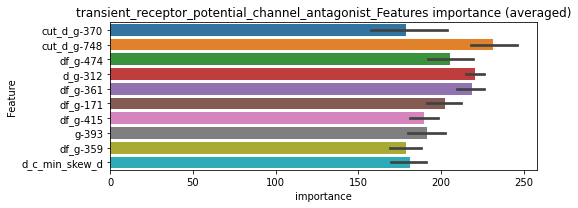

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120019	valid_1's binary_logloss: 0.0150808
[600]	training's binary_logloss: 0.00314854	valid_1's binary_logloss: 0.00446731
[900]	training's binary_logloss: 0.0016765	valid_1's binary_logloss: 0.00254844
[1200]	training's binary_logloss: 0.00114435	valid_1's binary_logloss: 0.00181998
[1500]	training's binary_logloss: 0.000878778	valid_1's binary_logloss: 0.00145128
[1800]	training's binary_logloss: 0.00072081	valid_1's binary_logloss: 0.00121841
[2100]	training's binary_logloss: 0.000618513	valid_1's binary_logloss: 0.00106467
[2400]	training's binary_logloss: 0.000548011	valid_1's binary_logloss: 0.000958815
[2700]	training's binary_logloss: 0.000496041	valid_1's binary_logloss: 0.000878265
[3000]	training's binary_logloss: 0.000457363	valid_1's binary_logloss: 0.000821791
[3300]	training's binary_logloss: 0.000428315	valid_1's binary_logloss: 0.000777977
[3600]	training's binary_logloss:

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115451	valid_1's binary_logloss: 0.0198949
[600]	training's binary_logloss: 0.00304604	valid_1's binary_logloss: 0.007829
[900]	training's binary_logloss: 0.00162387	valid_1's binary_logloss: 0.00532267
[1200]	training's binary_logloss: 0.0011085	valid_1's binary_logloss: 0.00429002
[1500]	training's binary_logloss: 0.000854905	valid_1's binary_logloss: 0.00372173
[1800]	training's binary_logloss: 0.000702982	valid_1's binary_logloss: 0.0033593
[2100]	training's binary_logloss: 0.00060471	valid_1's binary_logloss: 0.00310554
[2400]	training's binary_logloss: 0.000536181	valid_1's binary_logloss: 0.00292832
[2700]	training's binary_logloss: 0.000485011	valid_1's binary_logloss: 0.0027811
[3000]	training's binary_logloss: 0.000447692	valid_1's binary_logloss: 0.00267954
[3300]	training's binary_logloss: 0.000419006	valid_1's binary_logloss: 0.00259771
[3600]	training's binary_logloss: 0.00039

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121478	valid_1's binary_logloss: 0.0163362
[600]	training's binary_logloss: 0.00318033	valid_1's binary_logloss: 0.00626089
[900]	training's binary_logloss: 0.00167852	valid_1's binary_logloss: 0.00435533
[1200]	training's binary_logloss: 0.00114246	valid_1's binary_logloss: 0.00367194
[1500]	training's binary_logloss: 0.000875519	valid_1's binary_logloss: 0.00330795
[1800]	training's binary_logloss: 0.000720998	valid_1's binary_logloss: 0.00306695
[2100]	training's binary_logloss: 0.000618119	valid_1's binary_logloss: 0.0029196
[2400]	training's binary_logloss: 0.000547554	valid_1's binary_logloss: 0.00280904
[2700]	training's binary_logloss: 0.000495214	valid_1's binary_logloss: 0.00271812
[3000]	training's binary_logloss: 0.000456558	valid_1's binary_logloss: 0.00266006
[3300]	training's binary_logloss: 0.000427263	valid_1's binary_logloss: 0.00261422
Early stopping, best iteration is:
[

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012116	valid_1's binary_logloss: 0.0154838
[600]	training's binary_logloss: 0.00318087	valid_1's binary_logloss: 0.00473532
[900]	training's binary_logloss: 0.00168157	valid_1's binary_logloss: 0.00275557
[1200]	training's binary_logloss: 0.00114762	valid_1's binary_logloss: 0.00200556
[1500]	training's binary_logloss: 0.000880213	valid_1's binary_logloss: 0.00161282
[1800]	training's binary_logloss: 0.000722261	valid_1's binary_logloss: 0.00137166
[2100]	training's binary_logloss: 0.000619679	valid_1's binary_logloss: 0.00120626
[2400]	training's binary_logloss: 0.00055005	valid_1's binary_logloss: 0.00110088
[2700]	training's binary_logloss: 0.000497602	valid_1's binary_logloss: 0.00101849
[3000]	training's binary_logloss: 0.000458868	valid_1's binary_logloss: 0.000956784
[3300]	training's binary_logloss: 0.000429408	valid_1's binary_logloss: 0.000904713
[3600]	training's binary_logloss: 0

transient_receptor_potential_channel_antagonist logloss: 0.001653166520415932


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142516	valid_1's binary_logloss: 0.00276734
[600]	training's binary_logloss: 0.000218173	valid_1's binary_logloss: 0.000845225
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000189218	valid_1's binary_logloss: 0.000807209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142697	valid_1's binary_logloss: 0.00168109
[600]	training's binary_logloss: 0.000217066	valid_1's binary_logloss: 0.00028924
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.00018677	valid_1's binary_logloss: 0.00024687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143764	valid_1's binary_logloss: 0.00224139
[600]	training's binary_logloss: 0.000218808	valid_1's binary_logloss: 0.000619071
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000188874	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0005483, Threshold: 0.0014286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00100, conf_1:0.00186
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0014286
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0214286
threshold: 0.0214286, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139141	valid_1's binary_logloss: 0.00283005
[600]	training's binary_logloss: 0.000208613	valid_1's binary_logloss: 0.000747334
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000176583	valid_1's binary_logloss: 0.000675937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013723	valid_1's binary_logloss: 0.00143931
[600]	training's binary_logloss: 0.00020784	valid_1's binary_logloss: 0.000228841
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000177426	valid_1's binary_logloss: 0.000195972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138089	valid_1's binary_logloss: 0.00146909
[600]	training's binary_logloss: 0.000206326	valid_1's binary_logloss: 0.00022787
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000175879	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1209447, Threshold: 0.0214286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025, Num_p_label: 12.0, conf_0:0.01714, conf_1:0.02571
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_1: 0.0214286
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.0414286
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.0614286
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.0814286
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1014286
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1214286
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_7: 0.1414286


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000175795	valid_1's binary_logloss: 0.000234059


threshold: 0.1414286, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139141	valid_1's binary_logloss: 0.00283005
[600]	training's binary_logloss: 0.000208613	valid_1's binary_logloss: 0.000747334
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000176583	valid_1's binary_logloss: 0.000675937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013723	valid_1's binary_logloss: 0.00143931
[600]	training's binary_logloss: 0.00020784	valid_1's binary_logloss: 0.000228841
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000177426	valid_1's binary_logloss: 0.000195972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138089	valid_1's binary_logloss: 0.00146909
[600]	training's binary_logloss: 0.000206326	valid_1's binary_logloss: 0.00022787
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000175879	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1209447, Threshold: 0.1414286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025, Num_p_label: 1.0, conf_0:0.12729, conf_1:0.15557
threshold: 0.1414286, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


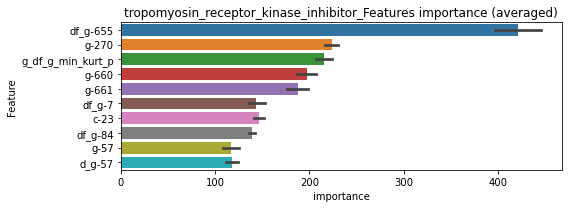

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436065	valid_1's binary_logloss: 0.00584608
[600]	training's binary_logloss: 0.00116279	valid_1's binary_logloss: 0.00200513
[900]	training's binary_logloss: 0.000658588	valid_1's binary_logloss: 0.00128466
[1200]	training's binary_logloss: 0.00047342	valid_1's binary_logloss: 0.00101139
[1500]	training's binary_logloss: 0.00037637	valid_1's binary_logloss: 0.00085231
[1800]	training's binary_logloss: 0.000319288	valid_1's binary_logloss: 0.00076083
[2100]	training's binary_logloss: 0.000281222	valid_1's binary_logloss: 0.000695169
[2400]	training's binary_logloss: 0.000254507	valid_1's binary_logloss: 0.000652395
[2700]	training's binary_logloss: 0.000234386	valid_1's binary_logloss: 0.000613902
[3000]	training's binary_logloss: 0.000219473	valid_1's binary_logloss: 0.000587141
[3300]	training's binary_logloss: 0.000207902	valid_1's binary_logloss: 0.000567327
[3600]	training's binary_log

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435507	valid_1's binary_logloss: 0.00455077
[600]	training's binary_logloss: 0.00115195	valid_1's binary_logloss: 0.00124702
[900]	training's binary_logloss: 0.000656666	valid_1's binary_logloss: 0.000724595
[1200]	training's binary_logloss: 0.000470501	valid_1's binary_logloss: 0.000525489
[1500]	training's binary_logloss: 0.000374751	valid_1's binary_logloss: 0.000421295
[1800]	training's binary_logloss: 0.000317965	valid_1's binary_logloss: 0.000358953
[2100]	training's binary_logloss: 0.000280281	valid_1's binary_logloss: 0.000317589
[2400]	training's binary_logloss: 0.000253543	valid_1's binary_logloss: 0.000288084
[2700]	training's binary_logloss: 0.000233785	valid_1's binary_logloss: 0.00026613
[3000]	training's binary_logloss: 0.000218871	valid_1's binary_logloss: 0.000249547
[3300]	training's binary_logloss: 0.000206974	valid_1's binary_logloss: 0.000236343
[3600]	training's binar

len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433992	valid_1's binary_logloss: 0.00466658
[600]	training's binary_logloss: 0.00115288	valid_1's binary_logloss: 0.00127334
[900]	training's binary_logloss: 0.000658926	valid_1's binary_logloss: 0.00073599
[1200]	training's binary_logloss: 0.000470004	valid_1's binary_logloss: 0.000529217
[1500]	training's binary_logloss: 0.000375493	valid_1's binary_logloss: 0.000424346
[1800]	training's binary_logloss: 0.000318592	valid_1's binary_logloss: 0.00036117
[2100]	training's binary_logloss: 0.000280409	valid_1's binary_logloss: 0.000318829
[2400]	training's binary_logloss: 0.000253623	valid_1's binary_logloss: 0.000289028
[2700]	training's binary_logloss: 0.000233661	valid_1's binary_logloss: 0.000266844
[3000]	training's binary_logloss: 0.000218955	valid_1's binary_logloss: 0.000250386
[3300]	training's binary_logloss: 0.000207338	valid_1's binary_logloss: 0.000237447
[3600]	training's binary

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434986	valid_1's binary_logloss: 0.00470015
[600]	training's binary_logloss: 0.00115539	valid_1's binary_logloss: 0.00133221
[900]	training's binary_logloss: 0.000655388	valid_1's binary_logloss: 0.000780497
[1200]	training's binary_logloss: 0.000468781	valid_1's binary_logloss: 0.000570823
[1500]	training's binary_logloss: 0.000373437	valid_1's binary_logloss: 0.00046233
[1800]	training's binary_logloss: 0.000317249	valid_1's binary_logloss: 0.000397226
[2100]	training's binary_logloss: 0.000279257	valid_1's binary_logloss: 0.000352794
[2400]	training's binary_logloss: 0.000252639	valid_1's binary_logloss: 0.000321329
[2700]	training's binary_logloss: 0.0002326	valid_1's binary_logloss: 0.000297735
[3000]	training's binary_logloss: 0.000217635	valid_1's binary_logloss: 0.000279853
[3300]	training's binary_logloss: 0.00020595	valid_1's binary_logloss: 0.000265574
[3600]	training's binary_l

tropomyosin_receptor_kinase_inhibitor logloss: 0.0002888680825445209


neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00656602	valid_1's binary_logloss: 0.0162725
[600]	training's binary_logloss: 0.000873088	valid_1's binary_logloss: 0.00587343
[900]	training's binary_logloss: 0.000457823	valid_1's binary_logloss: 0.00465728
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000434408	valid_1's binary_logloss: 0.00460126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651176	valid_1's binary_logloss: 0.0106379
[600]	training's binary_logloss: 0.000893814	valid_1's binary_logloss: 0.00244023
[900]	training's binary_logloss: 0.000459001	valid_1's binary_logloss: 0.00158054
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000442943	valid_1's binary_logloss: 0.00154544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653358	valid_1's binary_logloss: 0.0115783
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0023724, Threshold: 0.0097417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00682, conf_1:0.01266
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0097417
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_2: 0.0297417
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_3: 0.0497417
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_4: 0.0697417
threshold: 0.0697417, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636828	valid_1's binary_logloss: 0.0145363
[600]	training's binary_logloss: 0.000820881	valid_1's binary_logloss: 0.0044137
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000455783	valid_1's binary_logloss: 0.00341073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601192	valid_1's binary_logloss: 0.0100155
[600]	training's binary_logloss: 0.000830209	valid_1's binary_logloss: 0.00242814
[900]	training's binary_logloss: 0.000432566	valid_1's binary_logloss: 0.00159951
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.00041951	valid_1's binary_logloss: 0.00157974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616044	valid_1's binary_logloss: 0.00988939
[600]	training's binary_logloss: 0.000831717	valid_1's binary_logloss: 0.00201409
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0595310, Threshold: 0.0697417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00105, Num_p_label: 17.0, conf_0:0.05579, conf_1:0.08369
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_1: 0.0697417
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_2: 0.0897417
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.1097417
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_4: 0.1297417
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_5: 0.1497417
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_6: 0.1697417
threshold: 0.1697417, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636828	valid_1's binary_logloss: 0.0145363
[600]	training's binary_logloss: 0.000820881	valid_1's binary_logloss: 0.0044137
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000455783	valid_1's binary_logloss: 0.00341073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601192	valid_1's binary_logloss: 0.0100155
[600]	training's binary_logloss: 0.000830209	valid_1's binary_logloss: 0.00242814
[900]	training's binary_logloss: 0.000432566	valid_1's binary_logloss: 0.00159951
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.00041951	valid_1's binary_logloss: 0.00157974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616044	valid_1's binary_logloss: 0.00988939
[600]	training's binary_logloss: 0.000831717	valid_1's binary_logloss: 0.00201409
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0595310, Threshold: 0.1697417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105, Num_p_label: 8.0, conf_0:0.15277, conf_1:0.18672
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.1697417
threshold: 0.1697417, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


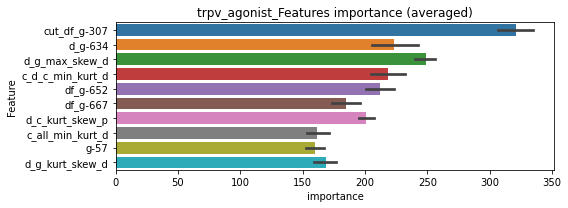

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152042	valid_1's binary_logloss: 0.0262158
[600]	training's binary_logloss: 0.00409462	valid_1's binary_logloss: 0.0104911
[900]	training's binary_logloss: 0.00213407	valid_1's binary_logloss: 0.0071371
[1200]	training's binary_logloss: 0.00143957	valid_1's binary_logloss: 0.00577706
[1500]	training's binary_logloss: 0.00109589	valid_1's binary_logloss: 0.0050633
[1800]	training's binary_logloss: 0.000892597	valid_1's binary_logloss: 0.00456769
[2100]	training's binary_logloss: 0.000760187	valid_1's binary_logloss: 0.00426362
[2400]	training's binary_logloss: 0.000669472	valid_1's binary_logloss: 0.00403959
[2700]	training's binary_logloss: 0.000603663	valid_1's binary_logloss: 0.00389052
Early stopping, best iteration is:
[2927]	training's binary_logloss: 0.00056413	valid_1's binary_logloss: 0.00376597


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151218	valid_1's binary_logloss: 0.0218913
[600]	training's binary_logloss: 0.00411325	valid_1's binary_logloss: 0.00764928
[900]	training's binary_logloss: 0.00214693	valid_1's binary_logloss: 0.00462921
[1200]	training's binary_logloss: 0.00144373	valid_1's binary_logloss: 0.00347567
[1500]	training's binary_logloss: 0.00109411	valid_1's binary_logloss: 0.00281672
[1800]	training's binary_logloss: 0.000892741	valid_1's binary_logloss: 0.00245522
[2100]	training's binary_logloss: 0.000762761	valid_1's binary_logloss: 0.00219845
[2400]	training's binary_logloss: 0.000672484	valid_1's binary_logloss: 0.00203313
[2700]	training's binary_logloss: 0.000605871	valid_1's binary_logloss: 0.0019097
[3000]	training's binary_logloss: 0.000555895	valid_1's binary_logloss: 0.00180591
[3300]	training's binary_logloss: 0.000517485	valid_1's binary_logloss: 0.00172508
[3600]	training's binary_logloss: 0.0

len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157863	valid_1's binary_logloss: 0.0221171
[600]	training's binary_logloss: 0.00421462	valid_1's binary_logloss: 0.00729378
[900]	training's binary_logloss: 0.00218651	valid_1's binary_logloss: 0.00435513
[1200]	training's binary_logloss: 0.00146519	valid_1's binary_logloss: 0.00324262
[1500]	training's binary_logloss: 0.00111289	valid_1's binary_logloss: 0.00264994
[1800]	training's binary_logloss: 0.000905551	valid_1's binary_logloss: 0.00228408
[2100]	training's binary_logloss: 0.000771939	valid_1's binary_logloss: 0.00203801
[2400]	training's binary_logloss: 0.000678357	valid_1's binary_logloss: 0.00187568
[2700]	training's binary_logloss: 0.000610034	valid_1's binary_logloss: 0.00174107
[3000]	training's binary_logloss: 0.00056069	valid_1's binary_logloss: 0.0016538
[3300]	training's binary_logloss: 0.000521851	valid_1's binary_logloss: 0.00158005
[3600]	training's binary_logloss: 0.00

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153202	valid_1's binary_logloss: 0.0209737
[600]	training's binary_logloss: 0.00412392	valid_1's binary_logloss: 0.00750714
[900]	training's binary_logloss: 0.00214624	valid_1's binary_logloss: 0.0046787
[1200]	training's binary_logloss: 0.00144845	valid_1's binary_logloss: 0.00363568
[1500]	training's binary_logloss: 0.00109873	valid_1's binary_logloss: 0.00308834
[1800]	training's binary_logloss: 0.000892113	valid_1's binary_logloss: 0.0026906
[2100]	training's binary_logloss: 0.000759603	valid_1's binary_logloss: 0.0024646
[2400]	training's binary_logloss: 0.000668774	valid_1's binary_logloss: 0.00228143
[2700]	training's binary_logloss: 0.000603927	valid_1's binary_logloss: 0.00216423
[3000]	training's binary_logloss: 0.000554403	valid_1's binary_logloss: 0.00207755
[3300]	training's binary_logloss: 0.000516216	valid_1's binary_logloss: 0.00198492
[3600]	training's binary_logloss: 0.000

trpv_agonist logloss: 0.0021663906507922745


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114953	valid_1's binary_logloss: 0.0369081
[600]	training's binary_logloss: 0.00160114	valid_1's binary_logloss: 0.0210142
[900]	training's binary_logloss: 0.000727929	valid_1's binary_logloss: 0.0185432
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000645159	valid_1's binary_logloss: 0.0183532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120895	valid_1's binary_logloss: 0.0295358
[600]	training's binary_logloss: 0.00169925	valid_1's binary_logloss: 0.011436
[900]	training's binary_logloss: 0.000741849	valid_1's binary_logloss: 0.00871821
Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000563528	valid_1's binary_logloss: 0.00798985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123447	valid_1's binary_logloss: 0.019142
[600]	training's binary_l

1 / 3 AUC score:0.999
y_Threshold: 0.0047013, Threshold: 0.0236017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.01652, conf_1:0.03068
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0236017
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_2: 0.0436017
threshold: 0.0436017, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105814	valid_1's binary_logloss: 0.0290913
[600]	training's binary_logloss: 0.00151007	valid_1's binary_logloss: 0.0136879
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000722203	valid_1's binary_logloss: 0.0118065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107723	valid_1's binary_logloss: 0.0234405
[600]	training's binary_logloss: 0.00153383	valid_1's binary_logloss: 0.00978806
[900]	training's binary_logloss: 0.000693476	valid_1's binary_logloss: 0.00791792
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000563373	valid_1's binary_logloss: 0.00756416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102557	valid_1's binary_logloss: 0.0273565
[600]	training's binary_logloss: 0.00148361	valid_1's binary_logloss: 0.0141702
[900]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0147008, Threshold: 0.0436017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0110497 Vs.target_rate: 0.00202, Num_p_label: 44.0, conf_0:0.03488, conf_1:0.05232
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_1: 0.0436017
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_2: 0.0636017
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.0836017
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_4: 0.1036017
threshold: 0.1036017, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105735	valid_1's binary_logloss: 0.0244229
[600]	training's binary_logloss: 0.00149685	valid_1's binary_logloss: 0.00911665
[900]	training's binary_logloss: 0.00067596	valid_1's binary_logloss: 0.00718098
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000574809	valid_1's binary_logloss: 0.00696739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00990896	valid_1's binary_logloss: 0.0338423
[600]	training's binary_logloss: 0.00143628	valid_1's binary_logloss: 0.0192689
[900]	training's binary_logloss: 0.00065958	valid_1's binary_logloss: 0.0161974
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000608048	valid_1's binary_logloss: 0.0159404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108995	valid_1's binary_logloss: 0.0196648
[600]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0287603, Threshold: 0.1036017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0045203 Vs.target_rate: 0.00202, Num_p_label: 18.0, conf_0:0.09324, conf_1:0.11396
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_1: 0.1036017
threshold: 0.1036017, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


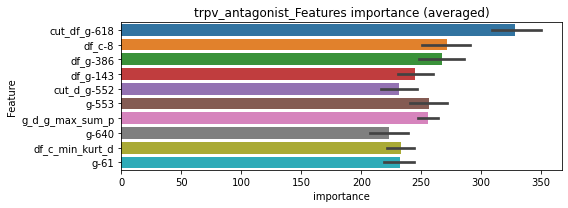

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238577	valid_1's binary_logloss: 0.0412219
[600]	training's binary_logloss: 0.00677923	valid_1's binary_logloss: 0.0191804
[900]	training's binary_logloss: 0.00347337	valid_1's binary_logloss: 0.0138643
[1200]	training's binary_logloss: 0.00228649	valid_1's binary_logloss: 0.0117625
[1500]	training's binary_logloss: 0.00170112	valid_1's binary_logloss: 0.0105152
[1800]	training's binary_logloss: 0.00136426	valid_1's binary_logloss: 0.00978796
[2100]	training's binary_logloss: 0.00114665	valid_1's binary_logloss: 0.00927863
[2400]	training's binary_logloss: 0.000997355	valid_1's binary_logloss: 0.00899762
[2700]	training's binary_logloss: 0.000888053	valid_1's binary_logloss: 0.00879866
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.000843863	valid_1's binary_logloss: 0.00865235


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02286	valid_1's binary_logloss: 0.0488978
[600]	training's binary_logloss: 0.00656548	valid_1's binary_logloss: 0.0273194
[900]	training's binary_logloss: 0.00339298	valid_1's binary_logloss: 0.0217856
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.00243051	valid_1's binary_logloss: 0.019928


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239108	valid_1's binary_logloss: 0.0351041
[600]	training's binary_logloss: 0.00693722	valid_1's binary_logloss: 0.0152084
[900]	training's binary_logloss: 0.00357455	valid_1's binary_logloss: 0.010675
[1200]	training's binary_logloss: 0.00234836	valid_1's binary_logloss: 0.00881412
[1500]	training's binary_logloss: 0.00174605	valid_1's binary_logloss: 0.00792931
[1800]	training's binary_logloss: 0.00139405	valid_1's binary_logloss: 0.00741162
[2100]	training's binary_logloss: 0.00117338	valid_1's binary_logloss: 0.00701207
[2400]	training's binary_logloss: 0.00101696	valid_1's binary_logloss: 0.00675144
[2700]	training's binary_logloss: 0.000905249	valid_1's binary_logloss: 0.00656465
[3000]	training's binary_logloss: 0.000819286	valid_1's binary_logloss: 0.0063969
[3300]	training's binary_logloss: 0.000751824	valid_1's binary_logloss: 0.00623316
Early stopping, best iteration is:
[3307]	t

len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229189	valid_1's binary_logloss: 0.0474223
[600]	training's binary_logloss: 0.00663837	valid_1's binary_logloss: 0.0258344
[900]	training's binary_logloss: 0.00341647	valid_1's binary_logloss: 0.019857
[1200]	training's binary_logloss: 0.00224744	valid_1's binary_logloss: 0.0174003
[1500]	training's binary_logloss: 0.00167537	valid_1's binary_logloss: 0.0159159
[1800]	training's binary_logloss: 0.00134684	valid_1's binary_logloss: 0.0151542
Early stopping, best iteration is:
[1983]	training's binary_logloss: 0.00120765	valid_1's binary_logloss: 0.0147337


trpv_antagonist logloss: 0.012385940501079579


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253, target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0836941	valid_1's binary_logloss: 0.301094
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.0505432	valid_1's binary_logloss: 0.295117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0838427	valid_1's binary_logloss: 0.292636
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.0350512	valid_1's binary_logloss: 0.284868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0843843	valid_1's binary_logloss: 0.291444
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0592606	valid_1's binary_logloss: 0.284731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0866653	valid_1's binary_logloss: 0.283674
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.0309283	valid_1's binary_logloss: 0

1 / 3 AUC score:0.862
y_Threshold: 0.0988576, Threshold: 0.2485264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 505 → Positive_corect_labels: 463/3398
p_label_rate: 0.0100452 Vs.target_rate: 0.01327, Num_p_label: 40.0, conf_0:0.17397, conf_1:0.32308
threshold: 0.2485264, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 463.0/3398, y_label_rate: 0.1362566
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0374507	valid_1's binary_logloss: 0.197235
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00900209	valid_1's binary_logloss: 0.181282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0393873	valid_1's binary_logloss: 0.163219
[600]	training's binary_logloss: 0.00862034	valid_1's binary_logloss: 0.127898
[900]	training's binary_logloss: 0.00308503	valid_1's binary_logloss: 0.117894
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.0027507	valid_1's binary_logloss: 0.117305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407578	valid_1's binary_logloss: 0.155778
[600]	training's binary_logloss: 0.00857632	valid_1's binary_logloss: 0.128583
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00483354	valid_1's binary_logloss: 0.125285
Train

2 / 3 AUC score:0.984
y_Threshold: 0.0620142, Threshold: 0.2485264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 410.0/3292
p_label_rate: 0.0140633 Vs.target_rate: 0.01327, Num_p_label: 56.0, conf_0:0.19882, conf_1:0.29823
threshold: 0.2485264, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 410.0/3292, y_label_rate: 0.1245443
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0324616	valid_1's binary_logloss: 0.131893
[600]	training's binary_logloss: 0.00657824	valid_1's binary_logloss: 0.113709
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00748369	valid_1's binary_logloss: 0.113583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0328107	valid_1's binary_logloss: 0.142528
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00752018	valid_1's binary_logloss: 0.119892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0329857	valid_1's binary_logloss: 0.126612
[600]	training's binary_logloss: 0.00652486	valid_1's binary_logloss: 0.103837
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.0038159	valid_1's binary_logloss: 0.100979
Training until validation scores don't improve for 30 rounds
[300]	training's binary

3 / 3 AUC score:0.987
y_Threshold: 0.0562051, Threshold: 0.2485264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 382.0/3236
p_label_rate: 0.0110497 Vs.target_rate: 0.01327, Num_p_label: 44.0, conf_0:0.22367, conf_1:0.27338
threshold: 0.2485264, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 382.0/3236, y_label_rate: 0.1180470


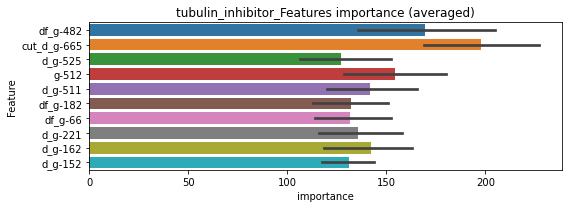

len(train_index) : 2427
len(valid_index) : 809
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0513103	valid_1's binary_logloss: 0.150161
[600]	training's binary_logloss: 0.0184355	valid_1's binary_logloss: 0.122178
[900]	training's binary_logloss: 0.00978578	valid_1's binary_logloss: 0.114226
[1200]	training's binary_logloss: 0.00629227	valid_1's binary_logloss: 0.111033
Early stopping, best iteration is:
[1199]	training's binary_logloss: 0.00629963	valid_1's binary_logloss: 0.111022


len(train_index) : 2427
len(valid_index) : 809
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0500715	valid_1's binary_logloss: 0.164012
[600]	training's binary_logloss: 0.0182123	valid_1's binary_logloss: 0.141702
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.0148564	valid_1's binary_logloss: 0.139334


len(train_index) : 2427
len(valid_index) : 809
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0497164	valid_1's binary_logloss: 0.141582
[600]	training's binary_logloss: 0.0180339	valid_1's binary_logloss: 0.114903
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.0104058	valid_1's binary_logloss: 0.108647


len(train_index) : 2427
len(valid_index) : 809
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0497153	valid_1's binary_logloss: 0.164755
[600]	training's binary_logloss: 0.0179993	valid_1's binary_logloss: 0.145049
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.0142661	valid_1's binary_logloss: 0.142698


tubulin_inhibitor logloss: 0.12542507108422654


neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176425	valid_1's binary_logloss: 0.0674328
[600]	training's binary_logloss: 0.00284482	valid_1's binary_logloss: 0.0464344
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.00156237	valid_1's binary_logloss: 0.0435231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016218	valid_1's binary_logloss: 0.0611088
[600]	training's binary_logloss: 0.00272971	valid_1's binary_logloss: 0.0442675
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.00156102	valid_1's binary_logloss: 0.041786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185079	valid_1's binary_logloss: 0.0428081
[600]	training's binary_logloss: 0.00302553	valid_1's binary_logloss: 0.0249023
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.00140809	valid_1's binary_logloss: 0.02249

1 / 3 AUC score:0.998
y_Threshold: 0.0082815, Threshold: 0.0618610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.04330, conf_1:0.08042
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0618610
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_2: 0.0818610
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_3: 0.1018610
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_4: 0.1218610
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_5: 0.1418610
threshold: 0.1418610, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159176	valid_1's binary_logloss: 0.0569031
[600]	training's binary_logloss: 0.00252585	valid_1's binary_logloss: 0.0350012
[900]	training's binary_logloss: 0.00104519	valid_1's binary_logloss: 0.0307695
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000961669	valid_1's binary_logloss: 0.0306002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150443	valid_1's binary_logloss: 0.0534496
[600]	training's binary_logloss: 0.002427	valid_1's binary_logloss: 0.0323191
[900]	training's binary_logloss: 0.00102274	valid_1's binary_logloss: 0.029129
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000987057	valid_1's binary_logloss: 0.0289756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156319	valid_1's binary_logloss: 0.0488651
[600]	training's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0311389, Threshold: 0.1418610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0133099 Vs.target_rate: 0.00307, Num_p_label: 53.0, conf_0:0.11349, conf_1:0.17023
Num_p_label: 53.0, Expected: 12.2, Adj_threshold_1: 0.1418610
Num_p_label: 46.0, Expected: 12.2, Adj_threshold_2: 0.1618610
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_3: 0.1818610
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_4: 0.2018610
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_5: 0.2218610
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_6: 0.2418610
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_7: 0.2618610
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_8: 0.2818610
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_9: 0.3018610
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_10: 0.3218610
threshold: 0.3418610, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 645.0/3783, y_label_rate: 0.1704996

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147375	valid_1's binary_logloss: 0.0627806
[600]	training's binary_logloss: 0.00230777	valid_1's binary_logloss: 0.0442936
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.00117499	valid_1's binary_logloss: 0.0420798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147495	valid_1's binary_logloss: 0.0441365
[600]	training's binary_logloss: 0.00237937	valid_1's binary_logloss: 0.0254472
[900]	training's binary_logloss: 0.00100387	valid_1's binary_logloss: 0.021526
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000778652	valid_1's binary_logloss: 0.0208257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016099	valid_1's binary_logloss: 0.0544519
[600]	training's binary_logloss: 0.00245593	valid_1's binary_logloss: 0.0355584
Early stopping, best iteration

3 / 3 AUC score:1.000
y_Threshold: 0.0253207, Threshold: 0.3418610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 641.0/3775
p_label_rate: 0.0090407 Vs.target_rate: 0.00307, Num_p_label: 36.0, conf_0:0.30767, conf_1:0.37605
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_1: 0.3418610
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_2: 0.3618610
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_3: 0.3818610
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.4018610
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_5: 0.4218610
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_6: 0.4418610
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_7: 0.4618610
threshold: 0.4618610, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 641.0/3775, y_label_rate: 0.1698013


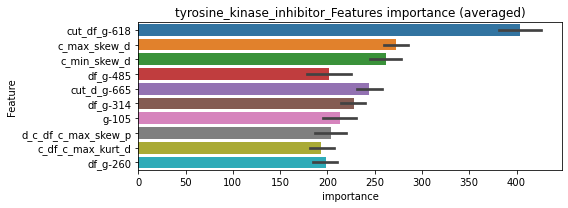

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284773	valid_1's binary_logloss: 0.0745096
[600]	training's binary_logloss: 0.00902245	valid_1's binary_logloss: 0.0490739
[900]	training's binary_logloss: 0.00468667	valid_1's binary_logloss: 0.0425155
[1200]	training's binary_logloss: 0.00308522	valid_1's binary_logloss: 0.0399034
[1500]	training's binary_logloss: 0.00227219	valid_1's binary_logloss: 0.0380472
Early stopping, best iteration is:
[1599]	training's binary_logloss: 0.00208928	valid_1's binary_logloss: 0.0375655


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0305085	valid_1's binary_logloss: 0.0590689
[600]	training's binary_logloss: 0.00961949	valid_1's binary_logloss: 0.0335432
[900]	training's binary_logloss: 0.00497242	valid_1's binary_logloss: 0.0258277
[1200]	training's binary_logloss: 0.00323793	valid_1's binary_logloss: 0.0226146
[1500]	training's binary_logloss: 0.0023837	valid_1's binary_logloss: 0.0207394
[1800]	training's binary_logloss: 0.00189069	valid_1's binary_logloss: 0.019501
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.00190264	valid_1's binary_logloss: 0.0194723


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0304276	valid_1's binary_logloss: 0.062584
[600]	training's binary_logloss: 0.0095809	valid_1's binary_logloss: 0.0387985
[900]	training's binary_logloss: 0.00493551	valid_1's binary_logloss: 0.0320281
[1200]	training's binary_logloss: 0.00320879	valid_1's binary_logloss: 0.0297531
[1500]	training's binary_logloss: 0.0023548	valid_1's binary_logloss: 0.0283541
[1800]	training's binary_logloss: 0.00186501	valid_1's binary_logloss: 0.0274433
Early stopping, best iteration is:
[1783]	training's binary_logloss: 0.00188659	valid_1's binary_logloss: 0.0274063


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0317542	valid_1's binary_logloss: 0.0503459
[600]	training's binary_logloss: 0.00985864	valid_1's binary_logloss: 0.0270634
[900]	training's binary_logloss: 0.00507675	valid_1's binary_logloss: 0.0208414
[1200]	training's binary_logloss: 0.00329697	valid_1's binary_logloss: 0.0184585
[1500]	training's binary_logloss: 0.0024165	valid_1's binary_logloss: 0.0169853
[1800]	training's binary_logloss: 0.0019143	valid_1's binary_logloss: 0.016005
[2100]	training's binary_logloss: 0.00158887	valid_1's binary_logloss: 0.0153742
[2400]	training's binary_logloss: 0.00137252	valid_1's binary_logloss: 0.0148408
[2700]	training's binary_logloss: 0.00121282	valid_1's binary_logloss: 0.014517
Early stopping, best iteration is:
[2923]	training's binary_logloss: 0.00111912	valid_1's binary_logloss: 0.0142848


tyrosine_kinase_inhibitor logloss: 0.02468497918919879


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263174	valid_1's binary_logloss: 0.00705034
[600]	training's binary_logloss: 0.000391939	valid_1's binary_logloss: 0.00320576
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000280103	valid_1's binary_logloss: 0.00295531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269021	valid_1's binary_logloss: 0.00515533
[600]	training's binary_logloss: 0.000397744	valid_1's binary_logloss: 0.00161091
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000280188	valid_1's binary_logloss: 0.0014118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275905	valid_1's binary_logloss: 0.00334313
[600]	training's binary_logloss: 0.00039893	valid_1's binary_logloss: 0.000611732
[900]	training's binary_logloss: 0.000279305	valid_1's binary_logloss: 0.000450294
Early stoppi

1 / 3 AUC score:1.000
y_Threshold: 0.0010311, Threshold: 0.0037414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00262, conf_1:0.00486
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0037414
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0237414
threshold: 0.0237414, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244927	valid_1's binary_logloss: 0.00789297
[600]	training's binary_logloss: 0.000365231	valid_1's binary_logloss: 0.00434626
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000274446	valid_1's binary_logloss: 0.00413861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261616	valid_1's binary_logloss: 0.00431861
[600]	training's binary_logloss: 0.000382797	valid_1's binary_logloss: 0.0012466
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000271722	valid_1's binary_logloss: 0.00108632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263549	valid_1's binary_logloss: 0.00292135
[600]	training's binary_logloss: 0.000376284	valid_1's binary_logloss: 0.000460846
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000270771	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0146968, Threshold: 0.0237414, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000271844	valid_1's binary_logloss: 0.000971524


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00050, Num_p_label: 15.0, conf_0:0.01899, conf_1:0.02849
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0237414
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0437414
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0637414
threshold: 0.0637414, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244927	valid_1's binary_logloss: 0.00789297
[600]	training's binary_logloss: 0.000365231	valid_1's binary_logloss: 0.00434626
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000274446	valid_1's binary_logloss: 0.00413861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261616	valid_1's binary_logloss: 0.00431861
[600]	training's binary_logloss: 0.000382797	valid_1's binary_logloss: 0.0012466
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000271722	valid_1's binary_logloss: 0.00108632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263549	valid_1's binary_logloss: 0.00292135
[600]	training's binary_logloss: 0.000376284	valid_1's binary_logloss: 0.000460846
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000270771	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0146968, Threshold: 0.0637414, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000271844	valid_1's binary_logloss: 0.000971524


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.05737, conf_1:0.07012
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0637414
threshold: 0.0637414, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


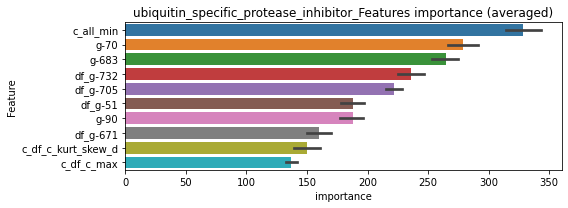

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772691	valid_1's binary_logloss: 0.0131636
[600]	training's binary_logloss: 0.00205894	valid_1's binary_logloss: 0.00611861
[900]	training's binary_logloss: 0.00113303	valid_1's binary_logloss: 0.00473926
[1200]	training's binary_logloss: 0.000789681	valid_1's binary_logloss: 0.00415192
[1500]	training's binary_logloss: 0.000618742	valid_1's binary_logloss: 0.00386388
[1800]	training's binary_logloss: 0.000516578	valid_1's binary_logloss: 0.00365749
[2100]	training's binary_logloss: 0.000449608	valid_1's binary_logloss: 0.00350955
[2400]	training's binary_logloss: 0.000401549	valid_1's binary_logloss: 0.00339473
[2700]	training's binary_logloss: 0.00036606	valid_1's binary_logloss: 0.00332358
[3000]	training's binary_logloss: 0.00034076	valid_1's binary_logloss: 0.00327855
[3300]	training's binary_logloss: 0.000322076	valid_1's binary_logloss: 0.00323963
[3600]	training's binary_logloss: 0

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079541	valid_1's binary_logloss: 0.00978077
[600]	training's binary_logloss: 0.00213626	valid_1's binary_logloss: 0.00332507
[900]	training's binary_logloss: 0.00116331	valid_1's binary_logloss: 0.0021283
[1200]	training's binary_logloss: 0.000806603	valid_1's binary_logloss: 0.00163332
[1500]	training's binary_logloss: 0.00062863	valid_1's binary_logloss: 0.0013799
[1800]	training's binary_logloss: 0.000523624	valid_1's binary_logloss: 0.00121228
[2100]	training's binary_logloss: 0.000455174	valid_1's binary_logloss: 0.00110183
[2400]	training's binary_logloss: 0.000405551	valid_1's binary_logloss: 0.00101391
[2700]	training's binary_logloss: 0.000369871	valid_1's binary_logloss: 0.000954803
[3000]	training's binary_logloss: 0.000343963	valid_1's binary_logloss: 0.000912951
[3300]	training's binary_logloss: 0.000324471	valid_1's binary_logloss: 0.000880842
[3600]	training's binary_logloss:

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00794519	valid_1's binary_logloss: 0.00868387
[600]	training's binary_logloss: 0.00211586	valid_1's binary_logloss: 0.00245987
[900]	training's binary_logloss: 0.00115068	valid_1's binary_logloss: 0.00138036
[1200]	training's binary_logloss: 0.000799757	valid_1's binary_logloss: 0.000984443
[1500]	training's binary_logloss: 0.000623368	valid_1's binary_logloss: 0.000782604
[1800]	training's binary_logloss: 0.000517251	valid_1's binary_logloss: 0.000659884
[2100]	training's binary_logloss: 0.000450227	valid_1's binary_logloss: 0.00058088
[2400]	training's binary_logloss: 0.00040342	valid_1's binary_logloss: 0.00052584
[2700]	training's binary_logloss: 0.000367353	valid_1's binary_logloss: 0.000482857
[3000]	training's binary_logloss: 0.000341307	valid_1's binary_logloss: 0.000451385
[3300]	training's binary_logloss: 0.000321327	valid_1's binary_logloss: 0.000427474
[3600]	training's binary_lo

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00786886	valid_1's binary_logloss: 0.0108188
[600]	training's binary_logloss: 0.00209231	valid_1's binary_logloss: 0.00376511
[900]	training's binary_logloss: 0.00113877	valid_1's binary_logloss: 0.00243706
[1200]	training's binary_logloss: 0.000793102	valid_1's binary_logloss: 0.00190779
[1500]	training's binary_logloss: 0.000618928	valid_1's binary_logloss: 0.00162472
[1800]	training's binary_logloss: 0.000516571	valid_1's binary_logloss: 0.00144341
[2100]	training's binary_logloss: 0.000448619	valid_1's binary_logloss: 0.00131945
[2400]	training's binary_logloss: 0.00040103	valid_1's binary_logloss: 0.00122758
[2700]	training's binary_logloss: 0.00036596	valid_1's binary_logloss: 0.00116529
[3000]	training's binary_logloss: 0.000340256	valid_1's binary_logloss: 0.0011147
[3300]	training's binary_logloss: 0.000320871	valid_1's binary_logloss: 0.00107758
[3600]	training's binary_logloss: 0.

ubiquitin_specific_protease_inhibitor logloss: 0.0013496966403058093


neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264, target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045693	valid_1's binary_logloss: 0.176913
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.011367	valid_1's binary_logloss: 0.157377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0480034	valid_1's binary_logloss: 0.143125
[600]	training's binary_logloss: 0.0101885	valid_1's binary_logloss: 0.107792
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00412493	valid_1's binary_logloss: 0.100526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0483194	valid_1's binary_logloss: 0.144859
[600]	training's binary_logloss: 0.0100421	valid_1's binary_logloss: 0.12117
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.0062848	valid_1's binary_logloss: 0.12002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_loglos

1 / 3 AUC score:0.973
y_Threshold: 0.0332888, Threshold: 0.1911801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 224 → Positive_corect_labels: 606/3692
p_label_rate: 0.0100452 Vs.target_rate: 0.00714, Num_p_label: 40.0, conf_0:0.13383, conf_1:0.24853
threshold: 0.1911801, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 606.0/3692, y_label_rate: 0.1641387
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330485	valid_1's binary_logloss: 0.126105
[600]	training's binary_logloss: 0.00604324	valid_1's binary_logloss: 0.0951568
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00270868	valid_1's binary_logloss: 0.0899304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0348275	valid_1's binary_logloss: 0.124256
[600]	training's binary_logloss: 0.00659206	valid_1's binary_logloss: 0.0965301
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00400943	valid_1's binary_logloss: 0.0933096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363973	valid_1's binary_logloss: 0.111245
[600]	training's binary_logloss: 0.00677871	valid_1's binary_logloss: 0.0825289
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00410991	valid_1's binary_logloss: 0.079096

2 / 3 AUC score:0.994
y_Threshold: 0.0501867, Threshold: 0.1911801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 581.0/3642
p_label_rate: 0.0165746 Vs.target_rate: 0.00714, Num_p_label: 66.0, conf_0:0.15294, conf_1:0.22942
Num_p_label: 66.0, Expected: 28.4, Adj_threshold_1: 0.1911801
Num_p_label: 58.0, Expected: 28.4, Adj_threshold_2: 0.2111801
Num_p_label: 53.0, Expected: 28.4, Adj_threshold_3: 0.2311801
Num_p_label: 50.0, Expected: 28.4, Adj_threshold_4: 0.2511801
Num_p_label: 47.0, Expected: 28.4, Adj_threshold_5: 0.2711801
Num_p_label: 44.0, Expected: 28.4, Adj_threshold_6: 0.2911801
Num_p_label: 38.0, Expected: 28.4, Adj_threshold_7: 0.3111801
threshold: 0.3111801, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 581.0/3642, y_label_rate: 0.1595277
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0299562	valid_1's binary_logloss: 0.117028
[600]	training's binary_logloss: 0.00541078	valid_1's binary_logloss: 0.0902854
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00312512	valid_1's binary_logloss: 0.0865175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0314176	valid_1's binary_logloss: 0.0953076
[600]	training's binary_logloss: 0.00562165	valid_1's binary_logloss: 0.0602192
[900]	training's binary_logloss: 0.0020262	valid_1's binary_logloss: 0.0540132
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.00216091	valid_1's binary_logloss: 0.0538771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0310916	valid_1's binary_logloss: 0.10177
[600]	training's binary_logloss: 0.0055487	valid_1's binary_logloss: 0.0678531
Early stopping, best iteration is:


3 / 3 AUC score:0.998
y_Threshold: 0.0453274, Threshold: 0.3111801, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 568.0/3616
p_label_rate: 0.0120542 Vs.target_rate: 0.00714, Num_p_label: 48.0, conf_0:0.28006, conf_1:0.34230
Num_p_label: 48.0, Expected: 28.4, Adj_threshold_1: 0.3111801
Num_p_label: 44.0, Expected: 28.4, Adj_threshold_2: 0.3311801
Num_p_label: 42.0, Expected: 28.4, Adj_threshold_3: 0.3511801
threshold: 0.3511801, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 568.0/3616, y_label_rate: 0.1570796


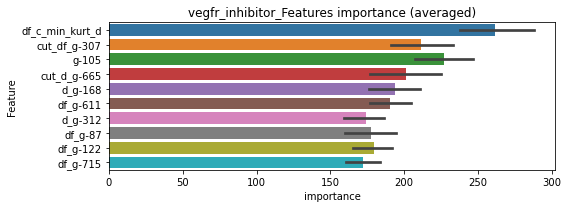

len(train_index) : 2712
len(valid_index) : 904
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0520677	valid_1's binary_logloss: 0.127872
[600]	training's binary_logloss: 0.01725	valid_1's binary_logloss: 0.0898309
[900]	training's binary_logloss: 0.00873245	valid_1's binary_logloss: 0.0773819
[1200]	training's binary_logloss: 0.00550967	valid_1's binary_logloss: 0.0725884
Early stopping, best iteration is:
[1296]	training's binary_logloss: 0.00489835	valid_1's binary_logloss: 0.0713496


len(train_index) : 2712
len(valid_index) : 904
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0513699	valid_1's binary_logloss: 0.124242
[600]	training's binary_logloss: 0.0171019	valid_1's binary_logloss: 0.0923337
[900]	training's binary_logloss: 0.00861508	valid_1's binary_logloss: 0.0853675
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.00679319	valid_1's binary_logloss: 0.0830661


len(train_index) : 2712
len(valid_index) : 904
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.052713	valid_1's binary_logloss: 0.127878
[600]	training's binary_logloss: 0.0175321	valid_1's binary_logloss: 0.0920141
[900]	training's binary_logloss: 0.00880357	valid_1's binary_logloss: 0.0814585
[1200]	training's binary_logloss: 0.00555952	valid_1's binary_logloss: 0.0778068
Early stopping, best iteration is:
[1236]	training's binary_logloss: 0.00531027	valid_1's binary_logloss: 0.0773521


len(train_index) : 2712
len(valid_index) : 904
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0523804	valid_1's binary_logloss: 0.110026
[600]	training's binary_logloss: 0.0174315	valid_1's binary_logloss: 0.0711879
[900]	training's binary_logloss: 0.00886619	valid_1's binary_logloss: 0.0584035
[1200]	training's binary_logloss: 0.00554976	valid_1's binary_logloss: 0.0531518
[1500]	training's binary_logloss: 0.00398748	valid_1's binary_logloss: 0.0500594
Early stopping, best iteration is:
[1647]	training's binary_logloss: 0.00350326	valid_1's binary_logloss: 0.0494676


vegfr_inhibitor logloss: 0.07030888364264418


neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672131	valid_1's binary_logloss: 0.0126766
[600]	training's binary_logloss: 0.000839546	valid_1's binary_logloss: 0.00294021
[900]	training's binary_logloss: 0.000441921	valid_1's binary_logloss: 0.00207446
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000435024	valid_1's binary_logloss: 0.00206485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705012	valid_1's binary_logloss: 0.0156358
[600]	training's binary_logloss: 0.000851176	valid_1's binary_logloss: 0.00550373
[900]	training's binary_logloss: 0.000433322	valid_1's binary_logloss: 0.00439119
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000439021	valid_1's binary_logloss: 0.00438202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00673383	valid_1's binary_logloss: 0.0127958
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0027213, Threshold: 0.0101195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.00708, conf_1:0.01316
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0101195
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_2: 0.0301195
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.0501195
threshold: 0.0501195, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00628942	valid_1's binary_logloss: 0.0137962
[600]	training's binary_logloss: 0.000790654	valid_1's binary_logloss: 0.00360808
[900]	training's binary_logloss: 0.000414895	valid_1's binary_logloss: 0.00269022
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000398257	valid_1's binary_logloss: 0.0026448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632597	valid_1's binary_logloss: 0.0118862
[600]	training's binary_logloss: 0.000795808	valid_1's binary_logloss: 0.00324675
[900]	training's binary_logloss: 0.000418236	valid_1's binary_logloss: 0.00240092
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000412962	valid_1's binary_logloss: 0.00238579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617155	valid_1's binary_logloss: 0.0111742
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0515059, Threshold: 0.0501195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0120542 Vs.target_rate: 0.00109, Num_p_label: 48.0, conf_0:0.04010, conf_1:0.06014
Num_p_label: 48.0, Expected: 4.3, Adj_threshold_1: 0.0501195
Num_p_label: 36.0, Expected: 4.3, Adj_threshold_2: 0.0701195
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_3: 0.0901195
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_4: 0.1101195
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_5: 0.1301195
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_6: 0.1501195
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_7: 0.1701195
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.1901195
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.2101195
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_10: 0.2301195
threshold: 0.2501195, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00628942	valid_1's binary_logloss: 0.0137962
[600]	training's binary_logloss: 0.000790654	valid_1's binary_logloss: 0.00360808
[900]	training's binary_logloss: 0.000414895	valid_1's binary_logloss: 0.00269022
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000398257	valid_1's binary_logloss: 0.0026448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632597	valid_1's binary_logloss: 0.0118862
[600]	training's binary_logloss: 0.000795808	valid_1's binary_logloss: 0.00324675
[900]	training's binary_logloss: 0.000418236	valid_1's binary_logloss: 0.00240092
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000412962	valid_1's binary_logloss: 0.00238579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617155	valid_1's binary_logloss: 0.0111742
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0515059, Threshold: 0.2501195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00109, Num_p_label: 11.0, conf_0:0.22511, conf_1:0.27513
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_1: 0.2501195
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.2701195
threshold: 0.2701195, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


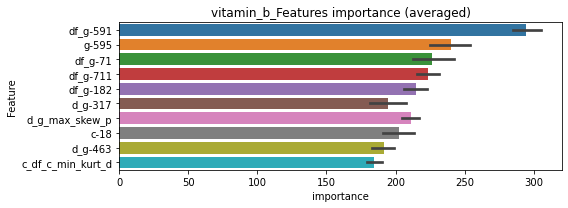

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015341	valid_1's binary_logloss: 0.0243421
[600]	training's binary_logloss: 0.00398751	valid_1's binary_logloss: 0.00858948
[900]	training's binary_logloss: 0.00205843	valid_1's binary_logloss: 0.00533456
[1200]	training's binary_logloss: 0.00138275	valid_1's binary_logloss: 0.00411619
[1500]	training's binary_logloss: 0.00104877	valid_1's binary_logloss: 0.00342771
[1800]	training's binary_logloss: 0.000852768	valid_1's binary_logloss: 0.00300121
[2100]	training's binary_logloss: 0.000728527	valid_1's binary_logloss: 0.00274195
[2400]	training's binary_logloss: 0.000640288	valid_1's binary_logloss: 0.00252027
[2700]	training's binary_logloss: 0.000577468	valid_1's binary_logloss: 0.00237272
[3000]	training's binary_logloss: 0.000530511	valid_1's binary_logloss: 0.00225779
[3300]	training's binary_logloss: 0.000495977	valid_1's binary_logloss: 0.00217084
[3600]	training's binary_logloss: 0.0

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152254	valid_1's binary_logloss: 0.0222262
[600]	training's binary_logloss: 0.00393097	valid_1's binary_logloss: 0.00816553
[900]	training's binary_logloss: 0.00204042	valid_1's binary_logloss: 0.00533266
[1200]	training's binary_logloss: 0.001367	valid_1's binary_logloss: 0.00418894
[1500]	training's binary_logloss: 0.00103924	valid_1's binary_logloss: 0.00358587
[1800]	training's binary_logloss: 0.000844777	valid_1's binary_logloss: 0.0031967
[2100]	training's binary_logloss: 0.000720926	valid_1's binary_logloss: 0.00294686
[2400]	training's binary_logloss: 0.000634263	valid_1's binary_logloss: 0.00276788
[2700]	training's binary_logloss: 0.000572506	valid_1's binary_logloss: 0.00263338
[3000]	training's binary_logloss: 0.000525624	valid_1's binary_logloss: 0.0025321
[3300]	training's binary_logloss: 0.000490628	valid_1's binary_logloss: 0.0024597
[3600]	training's binary_logloss: 0.00046

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015061	valid_1's binary_logloss: 0.0216559
[600]	training's binary_logloss: 0.00396183	valid_1's binary_logloss: 0.00822057
[900]	training's binary_logloss: 0.0020627	valid_1's binary_logloss: 0.00547124
[1200]	training's binary_logloss: 0.00138397	valid_1's binary_logloss: 0.00436703
[1500]	training's binary_logloss: 0.00105164	valid_1's binary_logloss: 0.00379425
[1800]	training's binary_logloss: 0.000854602	valid_1's binary_logloss: 0.00343249
[2100]	training's binary_logloss: 0.000730959	valid_1's binary_logloss: 0.00316476
[2400]	training's binary_logloss: 0.00064342	valid_1's binary_logloss: 0.00299253
[2700]	training's binary_logloss: 0.000580507	valid_1's binary_logloss: 0.00285825
[3000]	training's binary_logloss: 0.000532978	valid_1's binary_logloss: 0.00275567
[3300]	training's binary_logloss: 0.000498015	valid_1's binary_logloss: 0.00268986
[3600]	training's binary_logloss: 0.000

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152621	valid_1's binary_logloss: 0.0240437
[600]	training's binary_logloss: 0.00401084	valid_1's binary_logloss: 0.00996947
[900]	training's binary_logloss: 0.00208322	valid_1's binary_logloss: 0.00698602
[1200]	training's binary_logloss: 0.00140054	valid_1's binary_logloss: 0.00584489
[1500]	training's binary_logloss: 0.00106068	valid_1's binary_logloss: 0.00513359
[1800]	training's binary_logloss: 0.00086271	valid_1's binary_logloss: 0.00474776
[2100]	training's binary_logloss: 0.00073655	valid_1's binary_logloss: 0.00449824
[2400]	training's binary_logloss: 0.000648933	valid_1's binary_logloss: 0.0043056
[2700]	training's binary_logloss: 0.000583472	valid_1's binary_logloss: 0.00412893
Early stopping, best iteration is:
[2841]	training's binary_logloss: 0.000559274	valid_1's binary_logloss: 0.00407711


vitamin_b logloss: 0.0027679763202686203


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284, target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010215	valid_1's binary_logloss: 0.026151
[600]	training's binary_logloss: 0.00133366	valid_1's binary_logloss: 0.00995278
[900]	training's binary_logloss: 0.000616102	valid_1's binary_logloss: 0.00790067
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000525183	valid_1's binary_logloss: 0.00756373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108288	valid_1's binary_logloss: 0.0242087
[600]	training's binary_logloss: 0.00137936	valid_1's binary_logloss: 0.00790275
[900]	training's binary_logloss: 0.000622652	valid_1's binary_logloss: 0.0059071
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000575309	valid_1's binary_logloss: 0.00574131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106527	valid_1's binary_logloss: 0.0200101
[600]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0038879, Threshold: 0.0178398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164, Num_p_label: 40.0, conf_0:0.01249, conf_1:0.02319
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0178398
Num_p_label: 13.0, Expected: 6.5, Adj_threshold_2: 0.0378398
threshold: 0.0378398, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00939696	valid_1's binary_logloss: 0.0225175
[600]	training's binary_logloss: 0.00123714	valid_1's binary_logloss: 0.00788678
[900]	training's binary_logloss: 0.00058322	valid_1's binary_logloss: 0.00596471
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000511999	valid_1's binary_logloss: 0.00573286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0094764	valid_1's binary_logloss: 0.0212693
[600]	training's binary_logloss: 0.00128251	valid_1's binary_logloss: 0.00705975
[900]	training's binary_logloss: 0.00059632	valid_1's binary_logloss: 0.00537929
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000523795	valid_1's binary_logloss: 0.00515799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097969	valid_1's binary_logloss: 0.0161834
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0444600, Threshold: 0.0378398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0105475 Vs.target_rate: 0.00164, Num_p_label: 42.0, conf_0:0.03027, conf_1:0.04541
Num_p_label: 42.0, Expected: 6.5, Adj_threshold_1: 0.0378398
Num_p_label: 29.0, Expected: 6.5, Adj_threshold_2: 0.0578398
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_3: 0.0778398
Num_p_label: 17.0, Expected: 6.5, Adj_threshold_4: 0.0978398
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_5: 0.1178398
threshold: 0.1178398, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00939696	valid_1's binary_logloss: 0.0225175
[600]	training's binary_logloss: 0.00123714	valid_1's binary_logloss: 0.00788678
[900]	training's binary_logloss: 0.00058322	valid_1's binary_logloss: 0.00596471
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000511999	valid_1's binary_logloss: 0.00573286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0094764	valid_1's binary_logloss: 0.0212693
[600]	training's binary_logloss: 0.00128251	valid_1's binary_logloss: 0.00705975
[900]	training's binary_logloss: 0.00059632	valid_1's binary_logloss: 0.00537929
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000523795	valid_1's binary_logloss: 0.00515799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097969	valid_1's binary_logloss: 0.0161834
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0444600, Threshold: 0.1178398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00164, Num_p_label: 12.0, conf_0:0.10606, conf_1:0.12962
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_1: 0.1178398
threshold: 0.1178398, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


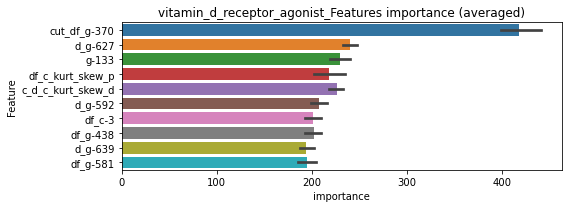

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211444	valid_1's binary_logloss: 0.0378888
[600]	training's binary_logloss: 0.00573067	valid_1's binary_logloss: 0.0162441
[900]	training's binary_logloss: 0.00293902	valid_1's binary_logloss: 0.0113961
[1200]	training's binary_logloss: 0.00194756	valid_1's binary_logloss: 0.00938992
[1500]	training's binary_logloss: 0.00146224	valid_1's binary_logloss: 0.0082812
[1800]	training's binary_logloss: 0.00117978	valid_1's binary_logloss: 0.00751544
[2100]	training's binary_logloss: 0.000999291	valid_1's binary_logloss: 0.0070052
[2400]	training's binary_logloss: 0.000873077	valid_1's binary_logloss: 0.0066446
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.000820771	valid_1's binary_logloss: 0.00644005


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216682	valid_1's binary_logloss: 0.036693
[600]	training's binary_logloss: 0.00588961	valid_1's binary_logloss: 0.0150663
[900]	training's binary_logloss: 0.00300453	valid_1's binary_logloss: 0.0101625
[1200]	training's binary_logloss: 0.00198483	valid_1's binary_logloss: 0.00825807
[1500]	training's binary_logloss: 0.00148882	valid_1's binary_logloss: 0.00723917
[1800]	training's binary_logloss: 0.00119842	valid_1's binary_logloss: 0.00655979
[2100]	training's binary_logloss: 0.0010156	valid_1's binary_logloss: 0.00615765
[2400]	training's binary_logloss: 0.000886165	valid_1's binary_logloss: 0.00586805
[2700]	training's binary_logloss: 0.000789416	valid_1's binary_logloss: 0.00557879
[3000]	training's binary_logloss: 0.000718036	valid_1's binary_logloss: 0.00536688
[3300]	training's binary_logloss: 0.000663719	valid_1's binary_logloss: 0.00519762
[3600]	training's binary_logloss: 0.000621

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217152	valid_1's binary_logloss: 0.0311791
[600]	training's binary_logloss: 0.00599058	valid_1's binary_logloss: 0.0106765
[900]	training's binary_logloss: 0.00307693	valid_1's binary_logloss: 0.00624314
[1200]	training's binary_logloss: 0.00203408	valid_1's binary_logloss: 0.00453919
[1500]	training's binary_logloss: 0.00152219	valid_1's binary_logloss: 0.00364841
[1800]	training's binary_logloss: 0.00122919	valid_1's binary_logloss: 0.00312417
[2100]	training's binary_logloss: 0.00103885	valid_1's binary_logloss: 0.00276603
[2400]	training's binary_logloss: 0.000905066	valid_1's binary_logloss: 0.00251332
[2700]	training's binary_logloss: 0.000807925	valid_1's binary_logloss: 0.00231479
[3000]	training's binary_logloss: 0.000735163	valid_1's binary_logloss: 0.00217506
[3300]	training's binary_logloss: 0.000678419	valid_1's binary_logloss: 0.00206425
[3600]	training's binary_logloss: 0.000

len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021686	valid_1's binary_logloss: 0.0386522
[600]	training's binary_logloss: 0.0059502	valid_1's binary_logloss: 0.0160932
[900]	training's binary_logloss: 0.00302678	valid_1's binary_logloss: 0.0106814
[1200]	training's binary_logloss: 0.00199968	valid_1's binary_logloss: 0.00837617
[1500]	training's binary_logloss: 0.00149781	valid_1's binary_logloss: 0.00717695
[1800]	training's binary_logloss: 0.00120692	valid_1's binary_logloss: 0.00642012
[2100]	training's binary_logloss: 0.00102052	valid_1's binary_logloss: 0.00592299
[2400]	training's binary_logloss: 0.000890034	valid_1's binary_logloss: 0.00551958
[2700]	training's binary_logloss: 0.000793577	valid_1's binary_logloss: 0.00520277
[3000]	training's binary_logloss: 0.000722887	valid_1's binary_logloss: 0.0049837
[3300]	training's binary_logloss: 0.000666814	valid_1's binary_logloss: 0.00478835
[3600]	training's binary_logloss: 0.0006237

vitamin_d_receptor_agonist logloss: 0.004414711047660817


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00857212	valid_1's binary_logloss: 0.0167505
[600]	training's binary_logloss: 0.00108982	valid_1's binary_logloss: 0.00392373
[900]	training's binary_logloss: 0.000522846	valid_1's binary_logloss: 0.00237406
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.00046359	valid_1's binary_logloss: 0.00219805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852612	valid_1's binary_logloss: 0.0230029
[600]	training's binary_logloss: 0.00105648	valid_1's binary_logloss: 0.00841242
[900]	training's binary_logloss: 0.000511133	valid_1's binary_logloss: 0.00632816
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000467281	valid_1's binary_logloss: 0.00615491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888611	valid_1's binary_logloss: 0.0146343
[600]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0036477, Threshold: 0.0177935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01246, conf_1:0.02313
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0177935
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_2: 0.0377935
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.0577935
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_4: 0.0777935
threshold: 0.0777935, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771937	valid_1's binary_logloss: 0.014206
[600]	training's binary_logloss: 0.00101405	valid_1's binary_logloss: 0.00341381
[900]	training's binary_logloss: 0.000491372	valid_1's binary_logloss: 0.00209783
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000450487	valid_1's binary_logloss: 0.00198266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00777117	valid_1's binary_logloss: 0.0187983
[600]	training's binary_logloss: 0.000999448	valid_1's binary_logloss: 0.00659211
[900]	training's binary_logloss: 0.000486055	valid_1's binary_logloss: 0.00496298
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000484349	valid_1's binary_logloss: 0.00495504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00786703	valid_1's binary_logloss: 0.012776
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0555216, Threshold: 0.0777935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00126, Num_p_label: 20.0, conf_0:0.06223, conf_1:0.09335
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0777935
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0977935
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_3: 0.1177935
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.1377935
threshold: 0.1377935, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771937	valid_1's binary_logloss: 0.014206
[600]	training's binary_logloss: 0.00101405	valid_1's binary_logloss: 0.00341381
[900]	training's binary_logloss: 0.000491372	valid_1's binary_logloss: 0.00209783
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000450487	valid_1's binary_logloss: 0.00198266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00777117	valid_1's binary_logloss: 0.0187983
[600]	training's binary_logloss: 0.000999448	valid_1's binary_logloss: 0.00659211
[900]	training's binary_logloss: 0.000486055	valid_1's binary_logloss: 0.00496298
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000484349	valid_1's binary_logloss: 0.00495504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00786703	valid_1's binary_logloss: 0.012776
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0555216, Threshold: 0.1377935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00126, Num_p_label: 10.0, conf_0:0.12401, conf_1:0.15157
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.1377935
threshold: 0.1377935, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


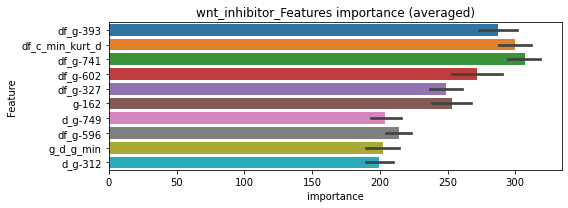

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180911	valid_1's binary_logloss: 0.0268551
[600]	training's binary_logloss: 0.00484735	valid_1's binary_logloss: 0.00935608
[900]	training's binary_logloss: 0.00251906	valid_1's binary_logloss: 0.00574164
[1200]	training's binary_logloss: 0.00168367	valid_1's binary_logloss: 0.00429519
[1500]	training's binary_logloss: 0.00127195	valid_1's binary_logloss: 0.00351104
[1800]	training's binary_logloss: 0.00102874	valid_1's binary_logloss: 0.00301756
[2100]	training's binary_logloss: 0.00087362	valid_1's binary_logloss: 0.002701
[2400]	training's binary_logloss: 0.000764954	valid_1's binary_logloss: 0.00247025
[2700]	training's binary_logloss: 0.000686327	valid_1's binary_logloss: 0.00229044
[3000]	training's binary_logloss: 0.000626802	valid_1's binary_logloss: 0.00215843
[3300]	training's binary_logloss: 0.000579072	valid_1's binary_logloss: 0.00204388
[3600]	training's binary_logloss: 0.0005

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181373	valid_1's binary_logloss: 0.0323076
[600]	training's binary_logloss: 0.00484704	valid_1's binary_logloss: 0.0136105
[900]	training's binary_logloss: 0.00250924	valid_1's binary_logloss: 0.00948014
[1200]	training's binary_logloss: 0.00167192	valid_1's binary_logloss: 0.00780687
[1500]	training's binary_logloss: 0.00126389	valid_1's binary_logloss: 0.00688983
[1800]	training's binary_logloss: 0.00102609	valid_1's binary_logloss: 0.00630595
[2100]	training's binary_logloss: 0.000872069	valid_1's binary_logloss: 0.00590066
[2400]	training's binary_logloss: 0.000764435	valid_1's binary_logloss: 0.00554748
[2700]	training's binary_logloss: 0.000684439	valid_1's binary_logloss: 0.00529983
Early stopping, best iteration is:
[2706]	training's binary_logloss: 0.000682909	valid_1's binary_logloss: 0.00528967


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184874	valid_1's binary_logloss: 0.0261543
[600]	training's binary_logloss: 0.00488585	valid_1's binary_logloss: 0.00836618
[900]	training's binary_logloss: 0.00252392	valid_1's binary_logloss: 0.00488961
[1200]	training's binary_logloss: 0.00167882	valid_1's binary_logloss: 0.00353472
[1500]	training's binary_logloss: 0.00126904	valid_1's binary_logloss: 0.00285347
[1800]	training's binary_logloss: 0.00103052	valid_1's binary_logloss: 0.00242704
[2100]	training's binary_logloss: 0.000872366	valid_1's binary_logloss: 0.0021355
[2400]	training's binary_logloss: 0.000764832	valid_1's binary_logloss: 0.00193859
[2700]	training's binary_logloss: 0.000686471	valid_1's binary_logloss: 0.00178174
[3000]	training's binary_logloss: 0.000626997	valid_1's binary_logloss: 0.00167316
[3300]	training's binary_logloss: 0.000579683	valid_1's binary_logloss: 0.00157901
[3600]	training's binary_logloss: 0.00

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180929	valid_1's binary_logloss: 0.029481
[600]	training's binary_logloss: 0.00481507	valid_1's binary_logloss: 0.0114564
[900]	training's binary_logloss: 0.00250485	valid_1's binary_logloss: 0.00756987
[1200]	training's binary_logloss: 0.00167405	valid_1's binary_logloss: 0.00589432
[1500]	training's binary_logloss: 0.00126502	valid_1's binary_logloss: 0.0050043
[1800]	training's binary_logloss: 0.00102388	valid_1's binary_logloss: 0.00443413
[2100]	training's binary_logloss: 0.000868465	valid_1's binary_logloss: 0.00405377
[2400]	training's binary_logloss: 0.000763216	valid_1's binary_logloss: 0.00376484
[2700]	training's binary_logloss: 0.000684642	valid_1's binary_logloss: 0.00358546
[3000]	training's binary_logloss: 0.00062523	valid_1's binary_logloss: 0.00342881
[3300]	training's binary_logloss: 0.0005784	valid_1's binary_logloss: 0.00327205
Early stopping, best iteration is:
[3300]	t

wnt_inhibitor logloss: 0.0029085188449246395


In [46]:
categorical_cols = []
scores = []
models = []
feature_importance_df = pd.DataFrame()
#importance_cols_df = pd.DataFrame()

for target_col in tqdm(train_targets_scored.columns[1:]):
    _preds, _score, models, _feature_importance_df = run_lgbm(target_col)

    sub[target_col] = _preds
    scores.append(_score)

sub.to_csv('submission.csv', index=False)

In [47]:
print(f"CV:{np.mean(scores)}")

CV:0.021914472946633113
